# **Image Captioning**

**Giới thiệu đề tài**

Tên đề tài: Xây dựng mô hình sinh mô tả cho hình ảnh (**Image Captioning**)
Sử dụng **ResNet-152** với kiến trúc mạng **CNN**, **Electra-large** là công cụ mạnh mẽ trong xử lý ngôn ngữ tự nhiên (**NLP**), và **GRU** (Gated Recurrent Unit)

**Tóm tắt:**
Image Captioning, bài toán sinh mô tả tự động cho hình ảnh, là một trong những thách thức thú vị và thực tiễn trong lĩnh vực trí tuệ nhân tạo. Nó yêu cầu sự kết hợp giữa Thị giác máy tính (Computer Vision) và Xử lý ngôn ngữ tự nhiên (Natural Language Processing) để trích xuất thông tin từ ảnh và biểu diễn chúng bằng ngôn ngữ tự nhiên một cách chính xác.

Trong đề tài này, chúng tôi sử dụng sự kết hợp của các công nghệ tiên tiến để giải quyết bài toán **Image Captioning**:
* **ResNet-152**: Mạng nơ-ron sâu mạnh mẽ, được sử dụng để trích xuất đặc trưng hình ảnh. Đầu ra từ  ResNet-152 sẽ được xử lý qua một lớp Fully Connected Layer để giảm chiều và tạo sự tương thích với đặc trưng ngôn ngữ.
* **Electra-large**: Mô hình xử lý ngôn ngữ hiện đại được sử dụng để chuyển đổi mô tả ảnh thành vector embedding chất lượng cao. Việc bổ sung các token đặc biệt <start> và <end> giúp định nghĩa rõ ràng chuỗi mô tả.
* **GRU**: Lớp này được sử dụng để xử lý dữ liệu tuần tự trong embedding mô tả của ảnh và duy trì ngữ cảnh ngôn ngữ trong môi trường huấn luyện Image Captioning. GRU giúp tối ưu hóa việc huấn luyện nhanh chóng mà không cần đòi hỏi nặng về tính toán.
* Ngoài ra, các cơ chế tiên tiến như **Attention** được tích hợp để tăng cường khả năng liên kết thông tin giữa đặc trưng hình ảnh và ngôn ngữ. **Attention** cho phép mô hình tập trung vào các khu vực quan trọng nhất trong hình ảnh khi sinh mô tả, góp phần tăng độ chính xác và độ phong phú của mô tả.

Hướng tiếp cận tổng hợp này tạo nên một hệ thống Image Captioning được thiết kế để khai thác đầy đủ tiềm năng của các công nghệ AI hiện đại.

**Mục tiêu chính:**
Xây dựng một hệ thống Image Captioning có khả năng tạo ra các mô tả tự nhiên, chính xác và giàu ngữ nghĩa cho hình ảnh, dựa trên sự tích hợp các phương pháp trích xuất đặc trưng hiện đại và mô hình sinh ngôn ngữ mạnh mẽ.

**Đóng góp chính:**
* Tích hợp hiệu quả giữa **ResNet-152** và **Electra-large**, tối ưu hóa vector đặc trưng của ảnh và embedding ngôn ngữ để tăng tính tương thích.
* Khai thác sức mạnh của **GRU** trong việc xử lý thông tin cùng với đó là sử dụng các  cơ chế tiên tiến như **Attention** để tăng cường khả năng liên kết thông tin giữa đặc trưng hình ảnh và ngôn ngữ.
* Đề xuất một mô hình kết hợp, vừa giữ được tính biểu diễn cao của từng thành phần, vừa đảm bảo hiệu quả huấn luyện và dự đoán.
  
**Ứng dụng:**
* Tự động mô tả hình ảnh trong thương mại điện tử, du lịch.
* Hỗ trợ người khiếm thị mô tả nội dung hình ảnh.
* Tạo nội dung tự động từ ảnh trong các nền tảng truyền thông xã hội.

Đề tài không chỉ hướng đến cải thiện chất lượng của hệ thống Image Captioning mà còn đề xuất một hướng tiếp cận khả thi, hiệu quả và dễ triển khai trên thực tế.

# **Dataset: Flickr30k**
**Flickr30k** là một trong những bộ dữ liệu phổ biến nhất được sử dụng trong bài toán **Image Captioning**, chứa tập hợp các hình ảnh thực tế kèm theo các mô tả ngôn ngữ tự nhiên. Bộ dữ liệu được thiết kế để hỗ trợ nghiên cứu trong việc hiểu ngữ cảnh hình ảnh và biểu diễn thông tin đó bằng văn bản:
1. **Số lượng hình ảnh:**
    * Gồm 31,783 hình ảnh thuộc nhiều chủ đề đa dạng, được thu thập từ nền tảng chia sẻ ảnh Flickr.
    * Hình ảnh bao gồm các bối cảnh như con người, động vật, cảnh thiên nhiên, và các hoạt động đời sống thường ngày.
2. **Mô tả văn bản (Captions):**
    * Mỗi hình ảnh có 5 câu mô tả được cung cấp bởi người chú thích.
    * Các câu mô tả ngắn gọn, súc tích, tập trung vào các đặc điểm nổi bật và hành động diễn ra trong hình ảnh.
    * Ngôn ngữ: Tiếng Anh.

# **Cài các thư viện cần thiết**

In [1]:
import pandas as pd
import os
import re
import numpy as np
import pickle
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
from torchvision.models import resnet152
from transformers import AutoTokenizer, AutoModel
from PIL import Image
from tqdm import tqdm
from transformers import ElectraTokenizer, TFElectraModel
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.optim.lr_scheduler import StepLR

# **Chuẩn bị dữ liệu từ flickr30k**

In [2]:
# Đường dẫn tới file CSV
csv_path = "/kaggle/input/flickr-image-dataset/flickr30k_images/results.csv"
image_dir = "/kaggle/input/flickr-image-dataset/flickr30k_images/flickr30k_images/"

# Đọc file CSV
data = pd.read_csv(csv_path, delimiter='|', names=['image_name', 'comment_number', 'comment'], skiprows=1)
data['comment'] = data['comment'].fillna('')

# Làm sạch và chuẩn bị từ điển ảnh-mô tả
image_map = {}
def clean_text(sentence):
    sentence = sentence.lower()
    # Làm sạch câu
    cleaned = re.sub(r"[^a-zA-Z0-9.,\s]", "", sentence)
    # Tách câu thành danh sách từ
    words = cleaned.split()
    # Nếu câu mô tả có số từ lớn hơn 48 -> chỉ giữ lại 48 từ đầu tiên
    if len(words) > 48:
        cleaned = " ".join(words[:48])
    return cleaned

for _, row in data.iterrows():
    image_name = row['image_name'].strip()
    comment = row['comment'].strip()
    comment = clean_text(comment)
    comment = f"start {comment} end" 
    if image_name not in image_map:
        image_map[image_name] = []
    image_map[image_name].append(comment)
    
# Kiểm tra kết quả
print(f"Số lượng ảnh: {len(image_map)}")
for image, comments in list(image_map.items())[:3]:  # Hiển thị bình luận của 3 ảnh đầu tiên
    print(f"\nẢnh: {image}")
    print("Bình luận:")
    print(comments)

Số lượng ảnh: 31783

Ảnh: 1000092795.jpg
Bình luận:
['start two young guys with shaggy hair look at their hands while hanging out in the yard . end', 'start two young , white males are outside near many bushes . end', 'start two men in green shirts are standing in a yard . end', 'start a man in a blue shirt standing in a garden . end', 'start two friends enjoy time spent together . end']

Ảnh: 10002456.jpg
Bình luận:
['start several men in hard hats are operating a giant pulley system . end', 'start workers look down from up above on a piece of equipment . end', 'start two men working on a machine wearing hard hats . end', 'start four men on top of a tall structure . end', 'start three men on a large rig . end']

Ảnh: 1000268201.jpg
Bình luận:
['start a child in a pink dress is climbing up a set of stairs in an entry way . end', 'start a little girl in a pink dress going into a wooden cabin . end', 'start a little girl climbing the stairs to her playhouse . end', 'start a little girl c

**Hiển thị vài ảnh và bình luận của ảnh xem chơi**


Ảnh: 1000092795.jpg


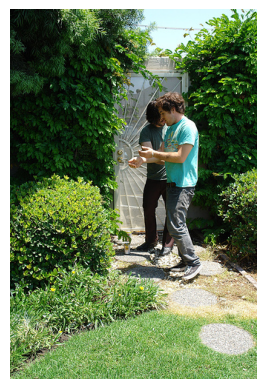

Bình luận:
['start two young guys with shaggy hair look at their hands while hanging out in the yard . end', 'start two young , white males are outside near many bushes . end', 'start two men in green shirts are standing in a yard . end', 'start a man in a blue shirt standing in a garden . end', 'start two friends enjoy time spent together . end']

Ảnh: 10002456.jpg


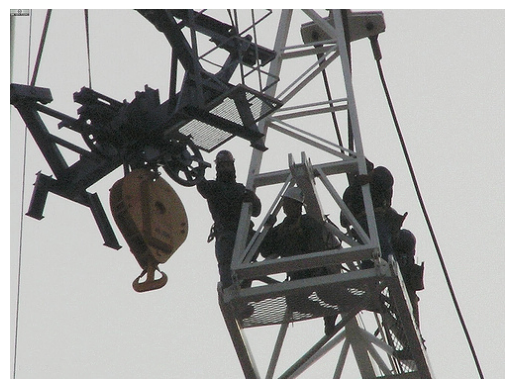

Bình luận:
['start several men in hard hats are operating a giant pulley system . end', 'start workers look down from up above on a piece of equipment . end', 'start two men working on a machine wearing hard hats . end', 'start four men on top of a tall structure . end', 'start three men on a large rig . end']


In [3]:
# Đường dẫn thư mục chứa ảnh
image_dir = "/kaggle/input/flickr-image-dataset/flickr30k_images/flickr30k_images/"

# Hiển thị ảnh từ image_map
for image_name, comments in list(image_map.items())[:2]:  # Hiển thị 2 ảnh đầu tiên
    # Tạo đường dẫn đầy đủ đến ảnh
    image_path = image_dir + image_name
    print(f"\nẢnh: {image_name}")
    
    # Đọc và hiển thị ảnh
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.axis('off')  # Tắt hiển thị trục
    plt.show()
    
    print("Bình luận:")
    print(comments)

# **Chia tập dữ liệu Train, Val, Test**

In [4]:
# Chia tập train, val, test
total_images = len(image_map)
val_size = int(total_images * 0.2)
test_size = int(total_images * 0.01)
train_size = total_images - val_size - test_size

sorted_image_names = sorted(image_map.keys())
train_images = sorted_image_names[:train_size]
val_images = sorted_image_names[train_size:train_size + val_size]
test_images = sorted_image_names[train_size + val_size:]

train_map = {img: image_map[img] for img in train_images}
val_map = {img: image_map[img] for img in val_images}
test_map = {img: image_map[img] for img in test_images}

print(f"Tập train: {len(train_map)} ảnh")
print(f"Tập val: {len(val_map)} ảnh")
print(f"Tập test: {len(test_map)} ảnh")

Tập train: 25110 ảnh
Tập val: 6356 ảnh
Tập test: 317 ảnh


# **Mô hình trích xuất đặc trưng ảnh: Resnet 152 (CNN)**

**Khởi tạo mô hình Resnet152**

In [5]:
class ImageFeatureExtractor:
    def __init__(self, output_dim=512, device='cuda'):
        self.device = torch.device(device if torch.cuda.is_available() else 'cpu')
        # Tải ResNet-152 pre-trained
        self.base_model = resnet152(pretrained=True)
        self.base_model = torch.nn.Sequential(*(list(self.base_model.children())[:-1]))  # Loại bỏ FC Layer
        self.base_model = self.base_model.to(self.device)
        self.base_model.eval()
        
        # Thêm lớp giảm chiều
        self.fc_layer = torch.nn.Linear(2048, output_dim).to(self.device)
    
        # Chuẩn hóa ảnh
        self.transform = transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        ])

    def preprocess_images(self, image_paths):
        """Tiền xử lý danh sách ảnh."""
        images = []
        for image_path in image_paths:
            try:
                img = Image.open(image_path).convert("RGB")  # Đảm bảo ảnh có 3 kênh
                img = self.transform(img)
                images.append(img)
            except Exception as e:
                print(f"Error loading image {image_path}: {e}")
        return torch.stack(images).to(self.device)  # Batch size x 3 x 224 x 224

    def extract_features_batch(self, image_map, image_dir, batch_size=32):
        """Trích xuất đặc trưng cho một batch các ảnh."""
        num_images = len(image_map)
        all_features_dict = {}
        
        with torch.no_grad():
            for i in tqdm(range(0, num_images, batch_size), desc="Processing Image Batches"):
                # Lấy batch image IDs và paths
                batch_image_ids = list(image_map.keys())[i:i + batch_size]
                batch_image_paths = [os.path.join(image_dir, image_id) for image_id in batch_image_ids]
                
                # Tiền xử lý batch ảnh
                batch_images = self.preprocess_images(batch_image_paths)
                
                # Trích xuất đặc trưng từ ResNet-152
                batch_features = self.base_model(batch_images).squeeze(-1).squeeze(-1)  # Output: [batch_size, 2048]
                batch_features = self.fc_layer(batch_features)  # Giảm chiều: [batch_size, output_dim]
                
                # Lưu đặc trưng vào từ điển
                for idx, image_id in enumerate(batch_image_ids):
                    all_features_dict[image_id] = batch_features[idx].cpu().numpy()
        
        return all_features_dict

**Trích xuất và lưu vector đặc trưng ảnh**

In [6]:
# # Khởi tạo lớp trích xuất
# image_feature_dim = 512
# image_extractor = ImageFeatureExtractor(output_dim=image_feature_dim)

# # Trích xuất đặc trưng ảnh cho tập train
# print("Extracting train image features in batches...")
# train_features = image_extractor.extract_features_batch(train_map,image_dir, batch_size=32)
# # Lưu đặc trưng ảnh vào file
# output_train_feature_file = "/kaggle/working/train_image_features.pkl"
# with open(output_train_feature_file, "wb") as f:
#     pickle.dump(train_features, f)
# print(f"Train features saved to {output_train_feature_file}.")

# # Trích xuất đặc trưng ảnh cho tập val
# print("Extracting val image features in batches...")
# val_features = image_extractor.extract_features_batch(val_map,image_dir, batch_size=32)
# # Lưu đặc trưng ảnh vào file
# output_val_feature_file = "/kaggle/working/val_image_features.pkl"
# with open(output_val_feature_file, "wb") as f:
#     pickle.dump(val_features, f)
# print(f"Val features saved to {output_val_feature_file}.")

**Lưu mô hình trích xuất đặc trưng ảnh**

In [7]:
# # Đường dẫn lưu trạng thái mô hình
# model_save_path = "/kaggle/working/image_feature_extractor_model.pth"

# # Lưu trạng thái của mô hình
# torch.save({
#     'base_model_state_dict': image_extractor.base_model.state_dict(),
#     'fc_layer_state_dict': image_extractor.fc_layer.state_dict()
# }, model_save_path)

# print(f"Model saved to {model_save_path}.")

**Load vecto ảnh đã trích xuất lên**

In [8]:
# Đọc file đặc trưng ảnh đã lưu
with open("/kaggle/input/data-image-features/data_image_feature/train_image_features.pkl", "rb") as f:
    loaded_image_train_features = pickle.load(f)
print(f"Loaded features for {len(loaded_image_train_features)} images.")
train_features=loaded_image_train_features
# In ra cặp khóa-giá trị đầu tiên trong từ điển loaded_image_train_features
# print("First key-value pairs:")
# for i, (key, value) in enumerate(loaded_image_train_features.items()):
#     if i >=1:
#         break
#     print(f"Ảnh: {key}\nVerto: {value}")

Loaded features for 25110 images.


In [9]:
# Đọc file đặc trưng ảnh đã lưu
with open("/kaggle/input/data-image-features/data_image_feature/val_image_features.pkl", "rb") as f:
    loaded_image_val_features = pickle.load(f)
print(f"Loaded features for {len(loaded_image_val_features)} images.")
val_features=loaded_image_val_features
# In ra cặp khóa-giá trị đầu tiên trong từ điển loaded_image_train_features
# print("First key-value pairs:")
# for i, (key, value) in enumerate(loaded_image_val_features.items()):
#     if i >=1:
#         break
#     print(f"Ảnh: {key}\nVerto: {value}")

Loaded features for 6356 images.


# **Embedding mô tả ảnh sử dụng ELECTRA-Large**

**Khởi tạo Tokenizer và Embedding sử dụng ELECTRA-Large**

In [10]:
# Class TextEmbedding
class TextEmbedding:
    def __init__(self, model_name="google/electra-large-discriminator", embedding_dim=512, device="cuda"):
        self.device = torch.device(device if torch.cuda.is_available() else "cpu")
        self.tokenizer = AutoTokenizer.from_pretrained(model_name)
        self.model = AutoModel.from_pretrained(model_name).to(self.device)
        self.embedding_dim = embedding_dim

        # Thêm lớp giảm chiều nếu cần
        if self.model.config.hidden_size != embedding_dim:
            self.dense_layer = torch.nn.Linear(self.model.config.hidden_size, embedding_dim).to(self.device)
        else:
            self.dense_layer = None

    def text_tokenizer(self, sentences, max_length=50):
        inputs = self.tokenizer(
            sentences,
            padding="max_length",
            truncation=True,
            max_length=max_length,
            return_tensors="pt"  # Trả về tensor PyTorch
        )
        return {key: value.to(self.device) for key, value in inputs.items()}  # Chuyển dữ liệu về thiết bị

    def encode_text(self, inputs):
        with torch.no_grad():  # Tắt gradient
            outputs = self.model(**inputs)
            embeddings = outputs.last_hidden_state  # [batch_size, seq_len, hidden_size]
            # Giảm chiều nếu cần
            if self.dense_layer:
                embeddings = self.dense_layer(embeddings)
        return embeddings

# Khởi tạo tokenizer cho mô tả ảnh
embedding_dim = 512
text_embedding = TextEmbedding(embedding_dim=embedding_dim)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/668 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

**Hàm điều chỉnh data Captions phù hợp và thực hiện tokenizer**

In [11]:
def generate_dataset(image_map, features_map, text_embedding, max_length=50):

    # Tính tổng số lượng caption
    total_captions = sum(len(captions) for captions in image_map.values())
    
    # Tạo thanh tiến độ cho tổng số caption
    with tqdm(total=total_captions, desc="Processing Captions", unit="caption") as pbar:
        for img_name, captions in image_map.items():
            # Lấy đặc trưng ảnh
            image_features = features_map[img_name].flatten()  # Kích thước: (512,)
            for caption in captions:
                # Tách từ trong caption
                words_caption = caption.split()

                # Tạo input sequence và target sequence
                for i in range(1, len(words_caption)):
                    input_seq = words_caption[:i]
                    target_seq = words_caption[1:i + 1]

                    # Chuyển thành chuỗi
                    input_seq_str = " ".join(input_seq)
                    target_seq_str = " ".join(target_seq)

                    # Tokenizer dữ liệu
                    input_seq_tokenizer = text_embedding.text_tokenizer([input_seq_str], max_length=max_length)
                    target_seq_tokenizer = text_embedding.text_tokenizer([target_seq_str], max_length=max_length)
                    yield ((image_features,input_seq_tokenizer),target_seq_tokenizer)
                    
                # Cập nhật thanh tiến độ sau mỗi caption
                pbar.update(1)

# **Chuẩn bị data phù hợp với mô hình**

**Class ImageCaptionDataset**

In [12]:
class ImageCaptionDataset(Dataset):
    def __init__(self, image_map, features_map, text_embedding, max_length=50):
        self.data_generator = generate_dataset(image_map, features_map, text_embedding, max_length=max_length)
        self.data = list(self.data_generator)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        image_features, input_tokenizers = self.data[idx][0]
        target_tokenizers = self.data[idx][1]

        # Chuyển đổi thành tensor PyTorch
        return {
            'image_features': torch.tensor(image_features, dtype=torch.float32),
            'input_tokenizers': {k: v.squeeze(0) for k, v in input_tokenizers.items()},
            'target_tokenizers': {k: v.squeeze(0) for k, v in target_tokenizers.items()}
        }

# Tạo dataset cho train và validation
train_dataset = ImageCaptionDataset(train_map, train_features, text_embedding, max_length=50)
val_dataset = ImageCaptionDataset(val_map, val_features, text_embedding, max_length=50)

Processing Captions:   0%|          | 0/125550 [00:00<?, ?caption/s]

Processing Captions:   0%|          | 16/125550 [00:00<13:36, 153.76caption/s]

Processing Captions:   0%|          | 34/125550 [00:00<12:29, 167.46caption/s]

Processing Captions:   0%|          | 51/125550 [00:00<13:06, 159.47caption/s]

Processing Captions:   0%|          | 67/125550 [00:00<13:29, 155.02caption/s]

Processing Captions:   0%|          | 83/125550 [00:00<13:43, 152.27caption/s]

Processing Captions:   0%|          | 99/125550 [00:00<14:11, 147.40caption/s]

Processing Captions:   0%|          | 116/125550 [00:00<14:00, 149.25caption/s]

Processing Captions:   0%|          | 131/125550 [00:00<14:27, 144.54caption/s]

Processing Captions:   0%|          | 147/125550 [00:00<14:06, 148.15caption/s]

Processing Captions:   0%|          | 165/125550 [00:01<13:16, 157.44caption/s]

Processing Captions:   0%|          | 181/125550 [00:01<13:36, 153.61caption/s]

Processing Captions:   0%|          | 197/125550 [00:01<13:56, 149.92caption/s]

Processing Captions:   0%|          | 213/125550 [00:01<14:09, 147.46caption/s]

Processing Captions:   0%|          | 232/125550 [00:01<13:08, 158.89caption/s]

Processing Captions:   0%|          | 248/125550 [00:01<13:09, 158.78caption/s]

Processing Captions:   0%|          | 264/125550 [00:01<13:40, 152.79caption/s]

Processing Captions:   0%|          | 280/125550 [00:01<13:58, 149.39caption/s]

Processing Captions:   0%|          | 296/125550 [00:01<14:00, 149.03caption/s]

Processing Captions:   0%|          | 313/125550 [00:02<13:37, 153.11caption/s]

Processing Captions:   0%|          | 329/125550 [00:02<13:32, 154.09caption/s]

Processing Captions:   0%|          | 345/125550 [00:02<13:40, 152.54caption/s]

Processing Captions:   0%|          | 362/125550 [00:02<13:31, 154.34caption/s]

Processing Captions:   0%|          | 378/125550 [00:02<13:23, 155.81caption/s]

Processing Captions:   0%|          | 394/125550 [00:02<13:34, 153.64caption/s]

Processing Captions:   0%|          | 410/125550 [00:02<13:42, 152.18caption/s]

Processing Captions:   0%|          | 432/125550 [00:02<12:16, 169.79caption/s]

Processing Captions:   0%|          | 450/125550 [00:02<13:02, 159.79caption/s]

Processing Captions:   0%|          | 467/125550 [00:03<13:37, 153.01caption/s]

Processing Captions:   0%|          | 483/125550 [00:03<13:51, 150.36caption/s]

Processing Captions:   0%|          | 499/125550 [00:03<14:43, 141.55caption/s]

Processing Captions:   0%|          | 515/125550 [00:03<14:17, 145.76caption/s]

Processing Captions:   0%|          | 530/125550 [00:03<14:42, 141.60caption/s]

Processing Captions:   0%|          | 545/125550 [00:03<14:45, 141.10caption/s]

Processing Captions:   0%|          | 562/125550 [00:03<14:09, 147.17caption/s]

Processing Captions:   0%|          | 580/125550 [00:03<13:25, 155.19caption/s]

Processing Captions:   0%|          | 596/125550 [00:03<13:31, 153.96caption/s]

Processing Captions:   0%|          | 612/125550 [00:04<14:11, 146.81caption/s]

Processing Captions:   0%|          | 627/125550 [00:04<14:37, 142.35caption/s]

Processing Captions:   1%|          | 643/125550 [00:04<27:33, 75.52caption/s] 

Processing Captions:   1%|          | 658/125550 [00:04<23:41, 87.83caption/s]

Processing Captions:   1%|          | 671/125550 [00:04<22:58, 90.57caption/s]

Processing Captions:   1%|          | 684/125550 [00:04<21:15, 97.91caption/s]

Processing Captions:   1%|          | 700/125550 [00:05<18:39, 111.56caption/s]

Processing Captions:   1%|          | 716/125550 [00:05<17:07, 121.55caption/s]

Processing Captions:   1%|          | 730/125550 [00:05<16:49, 123.62caption/s]

Processing Captions:   1%|          | 744/125550 [00:05<17:08, 121.34caption/s]

Processing Captions:   1%|          | 757/125550 [00:05<18:14, 114.04caption/s]

Processing Captions:   1%|          | 769/125550 [00:05<19:57, 104.21caption/s]

Processing Captions:   1%|          | 780/125550 [00:05<21:29, 96.73caption/s] 

Processing Captions:   1%|          | 793/125550 [00:05<19:57, 104.14caption/s]

Processing Captions:   1%|          | 811/125550 [00:05<17:33, 118.37caption/s]

Processing Captions:   1%|          | 826/125550 [00:06<16:43, 124.29caption/s]

Processing Captions:   1%|          | 841/125550 [00:06<15:54, 130.64caption/s]

Processing Captions:   1%|          | 858/125550 [00:06<14:47, 140.58caption/s]

Processing Captions:   1%|          | 875/125550 [00:06<14:08, 147.01caption/s]

Processing Captions:   1%|          | 892/125550 [00:06<13:39, 152.04caption/s]

Processing Captions:   1%|          | 908/125550 [00:06<14:14, 145.90caption/s]

Processing Captions:   1%|          | 924/125550 [00:06<13:54, 149.41caption/s]

Processing Captions:   1%|          | 940/125550 [00:06<14:04, 147.50caption/s]

Processing Captions:   1%|          | 955/125550 [00:06<15:18, 135.66caption/s]

model.safetensors:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

Processing Captions:   1%|          | 969/125550 [00:07<16:11, 128.26caption/s]

Processing Captions:   1%|          | 983/125550 [00:07<18:28, 112.35caption/s]

Processing Captions:   1%|          | 995/125550 [00:07<19:03, 108.94caption/s]

Processing Captions:   1%|          | 1007/125550 [00:07<22:09, 93.68caption/s]

Processing Captions:   1%|          | 1017/125550 [00:07<23:56, 86.70caption/s]

Processing Captions:   1%|          | 1027/125550 [00:07<26:18, 78.91caption/s]

Processing Captions:   1%|          | 1036/125550 [00:08<27:52, 74.46caption/s]

Processing Captions:   1%|          | 1046/125550 [00:08<26:48, 77.39caption/s]

Processing Captions:   1%|          | 1054/125550 [00:08<27:42, 74.87caption/s]

Processing Captions:   1%|          | 1062/125550 [00:08<29:41, 69.88caption/s]

Processing Captions:   1%|          | 1071/125550 [00:08<28:05, 73.83caption/s]

Processing Captions:   1%|          | 1079/125550 [00:08<27:57, 74.20caption/s]

Processing Captions:   1%|          | 1090/125550 [00:08<25:20, 81.87caption/s]

Processing Captions:   1%|          | 1099/125550 [00:08<25:48, 80.39caption/s]

Processing Captions:   1%|          | 1108/125550 [00:08<27:55, 74.25caption/s]

Processing Captions:   1%|          | 1117/125550 [00:09<27:04, 76.58caption/s]

Processing Captions:   1%|          | 1129/125550 [00:09<23:36, 87.85caption/s]

Processing Captions:   1%|          | 1141/125550 [00:09<21:38, 95.78caption/s]

Processing Captions:   1%|          | 1156/125550 [00:09<19:12, 107.91caption/s]

Processing Captions:   1%|          | 1167/125550 [00:09<20:45, 99.90caption/s] 

Processing Captions:   1%|          | 1178/125550 [00:09<22:40, 91.44caption/s]

Processing Captions:   1%|          | 1189/125550 [00:09<21:42, 95.49caption/s]

Processing Captions:   1%|          | 1200/125550 [00:09<20:59, 98.72caption/s]

Processing Captions:   1%|          | 1211/125550 [00:10<23:21, 88.70caption/s]

Processing Captions:   1%|          | 1223/125550 [00:10<22:07, 93.65caption/s]

Processing Captions:   1%|          | 1233/125550 [00:10<21:55, 94.47caption/s]

Processing Captions:   1%|          | 1247/125550 [00:10<20:04, 103.17caption/s]

Processing Captions:   1%|          | 1263/125550 [00:10<17:42, 117.01caption/s]

Processing Captions:   1%|          | 1275/125550 [00:10<20:26, 101.34caption/s]

Processing Captions:   1%|          | 1289/125550 [00:10<18:42, 110.66caption/s]

Processing Captions:   1%|          | 1301/125550 [00:10<19:16, 107.40caption/s]

Processing Captions:   1%|          | 1313/125550 [00:10<19:57, 103.79caption/s]

Processing Captions:   1%|          | 1324/125550 [00:11<20:27, 101.21caption/s]

Processing Captions:   1%|          | 1336/125550 [00:11<20:44, 99.85caption/s] 

Processing Captions:   1%|          | 1347/125550 [00:11<25:16, 81.90caption/s]

Processing Captions:   1%|          | 1356/125550 [00:11<24:43, 83.72caption/s]

Processing Captions:   1%|          | 1366/125550 [00:11<24:18, 85.12caption/s]

Processing Captions:   1%|          | 1376/125550 [00:11<23:50, 86.80caption/s]

Processing Captions:   1%|          | 1386/125550 [00:11<23:30, 88.03caption/s]

Processing Captions:   1%|          | 1402/125550 [00:11<19:20, 106.99caption/s]

Processing Captions:   1%|          | 1415/125550 [00:12<18:37, 111.07caption/s]

Processing Captions:   1%|          | 1427/125550 [00:12<18:14, 113.42caption/s]

Processing Captions:   1%|          | 1441/125550 [00:12<17:24, 118.78caption/s]

Processing Captions:   1%|          | 1454/125550 [00:12<18:39, 110.83caption/s]

Processing Captions:   1%|          | 1466/125550 [00:12<19:29, 106.12caption/s]

Processing Captions:   1%|          | 1477/125550 [00:12<23:28, 88.07caption/s] 

Processing Captions:   1%|          | 1487/125550 [00:12<24:23, 84.76caption/s]

Processing Captions:   1%|          | 1500/125550 [00:12<21:47, 94.87caption/s]

Processing Captions:   1%|          | 1510/125550 [00:13<23:23, 88.39caption/s]

Processing Captions:   1%|          | 1520/125550 [00:13<22:54, 90.25caption/s]

Processing Captions:   1%|          | 1533/125550 [00:13<20:55, 98.76caption/s]

Processing Captions:   1%|          | 1549/125550 [00:13<18:05, 114.21caption/s]

Processing Captions:   1%|          | 1565/125550 [00:13<16:21, 126.38caption/s]

Processing Captions:   1%|▏         | 1582/125550 [00:13<14:56, 138.30caption/s]

Processing Captions:   1%|▏         | 1597/125550 [00:13<14:39, 140.94caption/s]

Processing Captions:   1%|▏         | 1612/125550 [00:13<14:26, 143.05caption/s]

Processing Captions:   1%|▏         | 1627/125550 [00:13<15:36, 132.32caption/s]

Processing Captions:   1%|▏         | 1642/125550 [00:14<15:08, 136.32caption/s]

Processing Captions:   1%|▏         | 1656/125550 [00:14<15:07, 136.59caption/s]

Processing Captions:   1%|▏         | 1670/125550 [00:14<16:04, 128.47caption/s]

Processing Captions:   1%|▏         | 1684/125550 [00:14<16:38, 124.03caption/s]

Processing Captions:   1%|▏         | 1699/125550 [00:14<15:47, 130.65caption/s]

Processing Captions:   1%|▏         | 1714/125550 [00:14<15:16, 135.05caption/s]

Processing Captions:   1%|▏         | 1728/125550 [00:14<15:07, 136.38caption/s]

Processing Captions:   1%|▏         | 1743/125550 [00:14<14:53, 138.50caption/s]

Processing Captions:   1%|▏         | 1760/125550 [00:14<13:59, 147.40caption/s]

Processing Captions:   1%|▏         | 1780/125550 [00:14<12:42, 162.32caption/s]

Processing Captions:   1%|▏         | 1797/125550 [00:15<13:03, 157.96caption/s]

Processing Captions:   1%|▏         | 1813/125550 [00:15<13:29, 152.89caption/s]

Processing Captions:   1%|▏         | 1831/125550 [00:15<12:55, 159.44caption/s]

Processing Captions:   1%|▏         | 1850/125550 [00:15<12:17, 167.83caption/s]

Processing Captions:   1%|▏         | 1867/125550 [00:15<12:35, 163.80caption/s]

Processing Captions:   2%|▏         | 1886/125550 [00:15<12:12, 168.90caption/s]

Processing Captions:   2%|▏         | 1903/125550 [00:15<12:29, 165.01caption/s]

Processing Captions:   2%|▏         | 1920/125550 [00:15<12:35, 163.68caption/s]

Processing Captions:   2%|▏         | 1937/125550 [00:15<12:49, 160.70caption/s]

Processing Captions:   2%|▏         | 1954/125550 [00:16<14:13, 144.74caption/s]

Processing Captions:   2%|▏         | 1969/125550 [00:16<14:59, 137.33caption/s]

Processing Captions:   2%|▏         | 1984/125550 [00:16<14:44, 139.64caption/s]

Processing Captions:   2%|▏         | 1999/125550 [00:16<14:30, 141.88caption/s]

Processing Captions:   2%|▏         | 2014/125550 [00:16<14:34, 141.28caption/s]

Processing Captions:   2%|▏         | 2030/125550 [00:16<14:04, 146.30caption/s]

Processing Captions:   2%|▏         | 2046/125550 [00:16<13:42, 150.14caption/s]

Processing Captions:   2%|▏         | 2062/125550 [00:16<13:33, 151.78caption/s]

Processing Captions:   2%|▏         | 2079/125550 [00:16<13:06, 156.97caption/s]

Processing Captions:   2%|▏         | 2095/125550 [00:17<13:19, 154.34caption/s]

Processing Captions:   2%|▏         | 2111/125550 [00:17<13:12, 155.83caption/s]

Processing Captions:   2%|▏         | 2129/125550 [00:17<12:43, 161.56caption/s]

Processing Captions:   2%|▏         | 2146/125550 [00:17<13:13, 155.49caption/s]

Processing Captions:   2%|▏         | 2162/125550 [00:17<14:19, 143.53caption/s]

Processing Captions:   2%|▏         | 2178/125550 [00:17<14:00, 146.78caption/s]

Processing Captions:   2%|▏         | 2195/125550 [00:17<13:34, 151.36caption/s]

Processing Captions:   2%|▏         | 2211/125550 [00:17<13:36, 151.06caption/s]

Processing Captions:   2%|▏         | 2227/125550 [00:17<13:55, 147.65caption/s]

Processing Captions:   2%|▏         | 2243/125550 [00:18<13:37, 150.92caption/s]

Processing Captions:   2%|▏         | 2259/125550 [00:18<29:10, 70.45caption/s] 

Processing Captions:   2%|▏         | 2271/125550 [00:18<26:40, 77.03caption/s]

Processing Captions:   2%|▏         | 2289/125550 [00:18<21:29, 95.59caption/s]

Processing Captions:   2%|▏         | 2303/125550 [00:18<19:45, 103.95caption/s]

Processing Captions:   2%|▏         | 2320/125550 [00:18<17:25, 117.90caption/s]

Processing Captions:   2%|▏         | 2338/125550 [00:19<15:31, 132.32caption/s]

Processing Captions:   2%|▏         | 2354/125550 [00:19<15:00, 136.79caption/s]

Processing Captions:   2%|▏         | 2370/125550 [00:19<15:02, 136.49caption/s]

Processing Captions:   2%|▏         | 2385/125550 [00:19<16:28, 124.59caption/s]

Processing Captions:   2%|▏         | 2400/125550 [00:19<15:52, 129.28caption/s]

Processing Captions:   2%|▏         | 2416/125550 [00:19<15:07, 135.70caption/s]

Processing Captions:   2%|▏         | 2433/125550 [00:19<14:10, 144.68caption/s]

Processing Captions:   2%|▏         | 2448/125550 [00:19<14:18, 143.41caption/s]

Processing Captions:   2%|▏         | 2463/125550 [00:19<15:07, 135.66caption/s]

Processing Captions:   2%|▏         | 2477/125550 [00:20<16:18, 125.83caption/s]

Processing Captions:   2%|▏         | 2490/125550 [00:20<17:43, 115.68caption/s]

Processing Captions:   2%|▏         | 2502/125550 [00:20<17:51, 114.87caption/s]

Processing Captions:   2%|▏         | 2514/125550 [00:20<17:49, 115.01caption/s]

Processing Captions:   2%|▏         | 2526/125550 [00:20<18:15, 112.27caption/s]

Processing Captions:   2%|▏         | 2540/125550 [00:20<17:16, 118.73caption/s]

Processing Captions:   2%|▏         | 2552/125550 [00:20<17:28, 117.26caption/s]

Processing Captions:   2%|▏         | 2565/125550 [00:20<17:15, 118.79caption/s]

Processing Captions:   2%|▏         | 2578/125550 [00:20<16:48, 121.93caption/s]

Processing Captions:   2%|▏         | 2595/125550 [00:21<15:06, 135.62caption/s]

Processing Captions:   2%|▏         | 2609/125550 [00:21<15:07, 135.40caption/s]

Processing Captions:   2%|▏         | 2626/125550 [00:21<14:20, 142.86caption/s]

Processing Captions:   2%|▏         | 2641/125550 [00:21<14:10, 144.58caption/s]

Processing Captions:   2%|▏         | 2659/125550 [00:21<13:14, 154.65caption/s]

Processing Captions:   2%|▏         | 2678/125550 [00:21<12:34, 162.87caption/s]

Processing Captions:   2%|▏         | 2695/125550 [00:21<13:11, 155.14caption/s]

Processing Captions:   2%|▏         | 2711/125550 [00:21<13:41, 149.45caption/s]

Processing Captions:   2%|▏         | 2727/125550 [00:21<14:06, 145.10caption/s]

Processing Captions:   2%|▏         | 2742/125550 [00:22<14:02, 145.78caption/s]

Processing Captions:   2%|▏         | 2757/125550 [00:22<14:03, 145.51caption/s]

Processing Captions:   2%|▏         | 2775/125550 [00:22<13:16, 154.10caption/s]

Processing Captions:   2%|▏         | 2791/125550 [00:22<13:50, 147.78caption/s]

Processing Captions:   2%|▏         | 2807/125550 [00:22<13:49, 148.00caption/s]

Processing Captions:   2%|▏         | 2823/125550 [00:22<13:43, 149.09caption/s]

Processing Captions:   2%|▏         | 2842/125550 [00:22<13:00, 157.12caption/s]

Processing Captions:   2%|▏         | 2858/125550 [00:22<13:36, 150.32caption/s]

Processing Captions:   2%|▏         | 2874/125550 [00:22<13:24, 152.50caption/s]

Processing Captions:   2%|▏         | 2890/125550 [00:23<13:31, 151.16caption/s]

Processing Captions:   2%|▏         | 2906/125550 [00:23<14:17, 143.10caption/s]

Processing Captions:   2%|▏         | 2922/125550 [00:23<14:03, 145.35caption/s]

Processing Captions:   2%|▏         | 2937/125550 [00:23<14:44, 138.65caption/s]

Processing Captions:   2%|▏         | 2954/125550 [00:23<13:59, 145.99caption/s]

Processing Captions:   2%|▏         | 2971/125550 [00:23<13:41, 149.15caption/s]

Processing Captions:   2%|▏         | 2987/125550 [00:23<14:51, 137.47caption/s]

Processing Captions:   2%|▏         | 3003/125550 [00:23<14:17, 142.92caption/s]

Processing Captions:   2%|▏         | 3018/125550 [00:23<14:29, 140.95caption/s]

Processing Captions:   2%|▏         | 3033/125550 [00:24<14:45, 138.33caption/s]

Processing Captions:   2%|▏         | 3047/125550 [00:24<15:47, 129.35caption/s]

Processing Captions:   2%|▏         | 3061/125550 [00:24<15:32, 131.31caption/s]

Processing Captions:   2%|▏         | 3076/125550 [00:24<15:09, 134.73caption/s]

Processing Captions:   2%|▏         | 3090/125550 [00:24<15:46, 129.37caption/s]

Processing Captions:   2%|▏         | 3104/125550 [00:24<15:36, 130.78caption/s]

Processing Captions:   2%|▏         | 3118/125550 [00:24<15:21, 132.81caption/s]

Processing Captions:   2%|▏         | 3136/125550 [00:24<14:05, 144.84caption/s]

Processing Captions:   3%|▎         | 3151/125550 [00:24<14:06, 144.63caption/s]

Processing Captions:   3%|▎         | 3169/125550 [00:25<13:13, 154.24caption/s]

Processing Captions:   3%|▎         | 3186/125550 [00:25<12:58, 157.17caption/s]

Processing Captions:   3%|▎         | 3202/125550 [00:25<13:46, 148.08caption/s]

Processing Captions:   3%|▎         | 3221/125550 [00:25<12:48, 159.21caption/s]

Processing Captions:   3%|▎         | 3239/125550 [00:25<12:21, 165.06caption/s]

Processing Captions:   3%|▎         | 3256/125550 [00:25<12:36, 161.60caption/s]

Processing Captions:   3%|▎         | 3276/125550 [00:25<11:59, 170.04caption/s]

Processing Captions:   3%|▎         | 3294/125550 [00:25<11:58, 170.12caption/s]

Processing Captions:   3%|▎         | 3312/125550 [00:25<11:57, 170.39caption/s]

Processing Captions:   3%|▎         | 3330/125550 [00:25<11:47, 172.74caption/s]

Processing Captions:   3%|▎         | 3348/125550 [00:26<12:36, 161.63caption/s]

Processing Captions:   3%|▎         | 3365/125550 [00:26<13:49, 147.28caption/s]

Processing Captions:   3%|▎         | 3381/125550 [00:26<13:43, 148.30caption/s]

Processing Captions:   3%|▎         | 3399/125550 [00:26<13:00, 156.46caption/s]

Processing Captions:   3%|▎         | 3415/125550 [00:26<13:45, 147.96caption/s]

Processing Captions:   3%|▎         | 3431/125550 [00:26<13:40, 148.86caption/s]

Processing Captions:   3%|▎         | 3447/125550 [00:26<14:04, 144.63caption/s]

Processing Captions:   3%|▎         | 3465/125550 [00:26<13:21, 152.41caption/s]

Processing Captions:   3%|▎         | 3482/125550 [00:27<13:08, 154.80caption/s]

Processing Captions:   3%|▎         | 3498/125550 [00:27<13:04, 155.65caption/s]

Processing Captions:   3%|▎         | 3515/125550 [00:27<12:49, 158.49caption/s]

Processing Captions:   3%|▎         | 3531/125550 [00:27<13:12, 153.93caption/s]

Processing Captions:   3%|▎         | 3547/125550 [00:27<13:26, 151.19caption/s]

Processing Captions:   3%|▎         | 3565/125550 [00:27<12:45, 159.25caption/s]

Processing Captions:   3%|▎         | 3582/125550 [00:27<14:08, 143.81caption/s]

Processing Captions:   3%|▎         | 3598/125550 [00:27<13:57, 145.68caption/s]

Processing Captions:   3%|▎         | 3613/125550 [00:27<14:32, 139.81caption/s]

Processing Captions:   3%|▎         | 3628/125550 [00:28<14:46, 137.54caption/s]

Processing Captions:   3%|▎         | 3643/125550 [00:28<14:36, 139.08caption/s]

Processing Captions:   3%|▎         | 3662/125550 [00:28<13:22, 151.90caption/s]

Processing Captions:   3%|▎         | 3679/125550 [00:28<13:02, 155.70caption/s]

Processing Captions:   3%|▎         | 3695/125550 [00:28<13:16, 152.92caption/s]

Processing Captions:   3%|▎         | 3711/125550 [00:28<13:11, 153.98caption/s]

Processing Captions:   3%|▎         | 3727/125550 [00:28<13:06, 154.86caption/s]

Processing Captions:   3%|▎         | 3746/125550 [00:28<12:20, 164.50caption/s]

Processing Captions:   3%|▎         | 3763/125550 [00:28<12:27, 162.91caption/s]

Processing Captions:   3%|▎         | 3780/125550 [00:28<12:46, 158.84caption/s]

Processing Captions:   3%|▎         | 3796/125550 [00:29<13:46, 147.36caption/s]

Processing Captions:   3%|▎         | 3812/125550 [00:29<13:41, 148.22caption/s]

Processing Captions:   3%|▎         | 3829/125550 [00:29<13:10, 153.92caption/s]

Processing Captions:   3%|▎         | 3845/125550 [00:29<13:05, 155.02caption/s]

Processing Captions:   3%|▎         | 3862/125550 [00:29<12:45, 159.02caption/s]

Processing Captions:   3%|▎         | 3878/125550 [00:29<12:47, 158.47caption/s]

Processing Captions:   3%|▎         | 3894/125550 [00:29<12:53, 157.35caption/s]

Processing Captions:   3%|▎         | 3914/125550 [00:29<11:57, 169.59caption/s]

Processing Captions:   3%|▎         | 3932/125550 [00:29<13:18, 152.22caption/s]

Processing Captions:   3%|▎         | 3948/125550 [00:30<13:56, 145.40caption/s]

Processing Captions:   3%|▎         | 3963/125550 [00:30<14:13, 142.51caption/s]

Processing Captions:   3%|▎         | 3978/125550 [00:30<14:26, 140.23caption/s]

Processing Captions:   3%|▎         | 3994/125550 [00:30<14:15, 142.08caption/s]

Processing Captions:   3%|▎         | 4009/125550 [00:30<15:41, 129.04caption/s]

Processing Captions:   3%|▎         | 4026/125550 [00:30<14:46, 137.13caption/s]

Processing Captions:   3%|▎         | 4041/125550 [00:30<14:55, 135.67caption/s]

Processing Captions:   3%|▎         | 4055/125550 [00:30<15:02, 134.57caption/s]

Processing Captions:   3%|▎         | 4071/125550 [00:30<14:23, 140.76caption/s]

Processing Captions:   3%|▎         | 4089/125550 [00:31<13:28, 150.25caption/s]

Processing Captions:   3%|▎         | 4105/125550 [00:31<13:22, 151.29caption/s]

Processing Captions:   3%|▎         | 4121/125550 [00:31<13:15, 152.58caption/s]

Processing Captions:   3%|▎         | 4137/125550 [00:31<13:33, 149.29caption/s]

Processing Captions:   3%|▎         | 4155/125550 [00:31<12:49, 157.78caption/s]

Processing Captions:   3%|▎         | 4171/125550 [00:31<14:21, 140.88caption/s]

Processing Captions:   3%|▎         | 4186/125550 [00:31<14:56, 135.44caption/s]

Processing Captions:   3%|▎         | 4202/125550 [00:31<14:21, 140.81caption/s]

Processing Captions:   3%|▎         | 4218/125550 [00:31<13:54, 145.34caption/s]

Processing Captions:   3%|▎         | 4233/125550 [00:32<31:35, 64.00caption/s] 

Processing Captions:   3%|▎         | 4248/125550 [00:32<26:29, 76.30caption/s]

Processing Captions:   3%|▎         | 4266/125550 [00:32<21:37, 93.47caption/s]

Processing Captions:   3%|▎         | 4284/125550 [00:32<18:24, 109.77caption/s]

Processing Captions:   3%|▎         | 4299/125550 [00:32<17:03, 118.46caption/s]

Processing Captions:   3%|▎         | 4314/125550 [00:33<16:28, 122.65caption/s]

Processing Captions:   3%|▎         | 4329/125550 [00:33<15:57, 126.58caption/s]

Processing Captions:   3%|▎         | 4347/125550 [00:33<14:36, 138.36caption/s]

Processing Captions:   3%|▎         | 4363/125550 [00:33<14:26, 139.82caption/s]

Processing Captions:   3%|▎         | 4379/125550 [00:33<13:58, 144.57caption/s]

Processing Captions:   4%|▎         | 4395/125550 [00:33<14:36, 138.17caption/s]

Processing Captions:   4%|▎         | 4411/125550 [00:33<14:09, 142.65caption/s]

Processing Captions:   4%|▎         | 4429/125550 [00:33<13:23, 150.72caption/s]

Processing Captions:   4%|▎         | 4445/125550 [00:33<13:12, 152.88caption/s]

Processing Captions:   4%|▎         | 4463/125550 [00:34<12:45, 158.25caption/s]

Processing Captions:   4%|▎         | 4479/125550 [00:34<12:50, 157.07caption/s]

Processing Captions:   4%|▎         | 4495/125550 [00:34<13:07, 153.74caption/s]

Processing Captions:   4%|▎         | 4511/125550 [00:34<13:18, 151.67caption/s]

Processing Captions:   4%|▎         | 4527/125550 [00:34<13:27, 149.87caption/s]

Processing Captions:   4%|▎         | 4543/125550 [00:34<13:29, 149.53caption/s]

Processing Captions:   4%|▎         | 4558/125550 [00:34<13:41, 147.31caption/s]

Processing Captions:   4%|▎         | 4576/125550 [00:34<13:00, 155.00caption/s]

Processing Captions:   4%|▎         | 4593/125550 [00:34<12:51, 156.73caption/s]

Processing Captions:   4%|▎         | 4609/125550 [00:34<13:28, 149.62caption/s]

Processing Captions:   4%|▎         | 4625/125550 [00:35<13:31, 149.04caption/s]

Processing Captions:   4%|▎         | 4640/125550 [00:35<13:42, 147.01caption/s]

Processing Captions:   4%|▎         | 4657/125550 [00:35<13:19, 151.20caption/s]

Processing Captions:   4%|▎         | 4676/125550 [00:35<12:27, 161.79caption/s]

Processing Captions:   4%|▎         | 4693/125550 [00:35<12:49, 157.16caption/s]

Processing Captions:   4%|▍         | 4712/125550 [00:35<12:24, 162.25caption/s]

Processing Captions:   4%|▍         | 4729/125550 [00:35<12:52, 156.37caption/s]

Processing Captions:   4%|▍         | 4745/125550 [00:35<12:57, 155.41caption/s]

Processing Captions:   4%|▍         | 4761/125550 [00:35<13:16, 151.66caption/s]

Processing Captions:   4%|▍         | 4778/125550 [00:36<12:58, 155.09caption/s]

Processing Captions:   4%|▍         | 4794/125550 [00:36<13:22, 150.50caption/s]

Processing Captions:   4%|▍         | 4810/125550 [00:36<13:20, 150.78caption/s]

Processing Captions:   4%|▍         | 4826/125550 [00:36<13:42, 146.74caption/s]

Processing Captions:   4%|▍         | 4841/125550 [00:36<13:54, 144.60caption/s]

Processing Captions:   4%|▍         | 4857/125550 [00:36<13:34, 148.15caption/s]

Processing Captions:   4%|▍         | 4873/125550 [00:36<13:31, 148.63caption/s]

Processing Captions:   4%|▍         | 4888/125550 [00:36<13:53, 144.78caption/s]

Processing Captions:   4%|▍         | 4906/125550 [00:36<13:03, 154.07caption/s]

Processing Captions:   4%|▍         | 4922/125550 [00:37<13:00, 154.57caption/s]

Processing Captions:   4%|▍         | 4938/125550 [00:37<13:19, 150.80caption/s]

Processing Captions:   4%|▍         | 4956/125550 [00:37<12:50, 156.58caption/s]

Processing Captions:   4%|▍         | 4972/125550 [00:37<13:22, 150.29caption/s]

Processing Captions:   4%|▍         | 4988/125550 [00:37<13:41, 146.82caption/s]

Processing Captions:   4%|▍         | 5006/125550 [00:37<13:17, 151.25caption/s]

Processing Captions:   4%|▍         | 5022/125550 [00:37<14:06, 142.33caption/s]

Processing Captions:   4%|▍         | 5037/125550 [00:37<14:16, 140.66caption/s]

Processing Captions:   4%|▍         | 5053/125550 [00:37<13:50, 145.13caption/s]

Processing Captions:   4%|▍         | 5071/125550 [00:38<13:05, 153.43caption/s]

Processing Captions:   4%|▍         | 5090/125550 [00:38<12:19, 162.80caption/s]

Processing Captions:   4%|▍         | 5107/125550 [00:38<12:33, 159.85caption/s]

Processing Captions:   4%|▍         | 5124/125550 [00:38<12:40, 158.27caption/s]

Processing Captions:   4%|▍         | 5140/125550 [00:38<13:03, 153.73caption/s]

Processing Captions:   4%|▍         | 5156/125550 [00:38<13:15, 151.28caption/s]

Processing Captions:   4%|▍         | 5172/125550 [00:38<13:38, 147.05caption/s]

Processing Captions:   4%|▍         | 5188/125550 [00:38<13:27, 149.14caption/s]

Processing Captions:   4%|▍         | 5203/125550 [00:38<13:31, 148.26caption/s]

Processing Captions:   4%|▍         | 5221/125550 [00:39<12:55, 155.24caption/s]

Processing Captions:   4%|▍         | 5237/125550 [00:39<13:11, 151.98caption/s]

Processing Captions:   4%|▍         | 5253/125550 [00:39<13:27, 148.93caption/s]

Processing Captions:   4%|▍         | 5271/125550 [00:39<12:43, 157.59caption/s]

Processing Captions:   4%|▍         | 5287/125550 [00:39<12:54, 155.23caption/s]

Processing Captions:   4%|▍         | 5304/125550 [00:39<12:39, 158.31caption/s]

Processing Captions:   4%|▍         | 5323/125550 [00:39<12:07, 165.16caption/s]

Processing Captions:   4%|▍         | 5341/125550 [00:39<12:15, 163.52caption/s]

Processing Captions:   4%|▍         | 5358/125550 [00:39<12:55, 155.05caption/s]

Processing Captions:   4%|▍         | 5374/125550 [00:40<13:40, 146.46caption/s]

Processing Captions:   4%|▍         | 5391/125550 [00:40<13:12, 151.54caption/s]

Processing Captions:   4%|▍         | 5407/125550 [00:40<13:35, 147.28caption/s]

Processing Captions:   4%|▍         | 5422/125550 [00:40<13:52, 144.30caption/s]

Processing Captions:   4%|▍         | 5437/125550 [00:40<14:13, 140.79caption/s]

Processing Captions:   4%|▍         | 5452/125550 [00:40<14:21, 139.40caption/s]

Processing Captions:   4%|▍         | 5471/125550 [00:40<13:17, 150.62caption/s]

Processing Captions:   4%|▍         | 5490/125550 [00:40<12:26, 160.81caption/s]

Processing Captions:   4%|▍         | 5507/125550 [00:40<12:47, 156.38caption/s]

Processing Captions:   4%|▍         | 5524/125550 [00:40<12:29, 160.13caption/s]

Processing Captions:   4%|▍         | 5541/125550 [00:41<12:38, 158.16caption/s]

Processing Captions:   4%|▍         | 5557/125550 [00:41<12:37, 158.34caption/s]

Processing Captions:   4%|▍         | 5573/125550 [00:41<12:50, 155.65caption/s]

Processing Captions:   4%|▍         | 5589/125550 [00:41<12:51, 155.43caption/s]

Processing Captions:   4%|▍         | 5605/125550 [00:41<12:47, 156.18caption/s]

Processing Captions:   4%|▍         | 5621/125550 [00:41<13:19, 150.06caption/s]

Processing Captions:   4%|▍         | 5637/125550 [00:41<13:21, 149.53caption/s]

Processing Captions:   5%|▍         | 5653/125550 [00:41<13:17, 150.32caption/s]

Processing Captions:   5%|▍         | 5671/125550 [00:41<12:47, 156.16caption/s]

Processing Captions:   5%|▍         | 5687/125550 [00:42<13:14, 150.94caption/s]

Processing Captions:   5%|▍         | 5704/125550 [00:42<12:47, 156.17caption/s]

Processing Captions:   5%|▍         | 5720/125550 [00:42<12:53, 154.92caption/s]

Processing Captions:   5%|▍         | 5736/125550 [00:42<13:05, 152.62caption/s]

Processing Captions:   5%|▍         | 5753/125550 [00:42<12:51, 155.21caption/s]

Processing Captions:   5%|▍         | 5771/125550 [00:42<12:20, 161.81caption/s]

Processing Captions:   5%|▍         | 5788/125550 [00:42<12:17, 162.38caption/s]

Processing Captions:   5%|▍         | 5806/125550 [00:42<12:03, 165.58caption/s]

Processing Captions:   5%|▍         | 5823/125550 [00:42<13:36, 146.71caption/s]

Processing Captions:   5%|▍         | 5841/125550 [00:43<13:02, 153.03caption/s]

Processing Captions:   5%|▍         | 5857/125550 [00:43<13:05, 152.31caption/s]

Processing Captions:   5%|▍         | 5874/125550 [00:43<12:51, 155.20caption/s]

Processing Captions:   5%|▍         | 5891/125550 [00:43<12:35, 158.31caption/s]

Processing Captions:   5%|▍         | 5909/125550 [00:43<12:08, 164.28caption/s]

Processing Captions:   5%|▍         | 5926/125550 [00:43<12:13, 163.08caption/s]

Processing Captions:   5%|▍         | 5943/125550 [00:43<12:49, 155.46caption/s]

Processing Captions:   5%|▍         | 5960/125550 [00:43<12:32, 158.94caption/s]

Processing Captions:   5%|▍         | 5977/125550 [00:43<13:28, 147.81caption/s]

Processing Captions:   5%|▍         | 5993/125550 [00:44<13:12, 150.85caption/s]

Processing Captions:   5%|▍         | 6009/125550 [00:44<13:16, 150.07caption/s]

Processing Captions:   5%|▍         | 6025/125550 [00:44<13:42, 145.30caption/s]

Processing Captions:   5%|▍         | 6041/125550 [00:44<13:21, 149.08caption/s]

Processing Captions:   5%|▍         | 6057/125550 [00:44<13:16, 150.09caption/s]

Processing Captions:   5%|▍         | 6073/125550 [00:44<13:49, 143.99caption/s]

Processing Captions:   5%|▍         | 6088/125550 [00:44<14:02, 141.83caption/s]

Processing Captions:   5%|▍         | 6103/125550 [00:44<15:09, 131.28caption/s]

Processing Captions:   5%|▍         | 6120/125550 [00:44<14:07, 140.86caption/s]

Processing Captions:   5%|▍         | 6139/125550 [00:45<13:07, 151.58caption/s]

Processing Captions:   5%|▍         | 6155/125550 [00:45<13:36, 146.30caption/s]

Processing Captions:   5%|▍         | 6171/125550 [00:45<13:31, 147.12caption/s]

Processing Captions:   5%|▍         | 6191/125550 [00:45<12:29, 159.29caption/s]

Processing Captions:   5%|▍         | 6208/125550 [00:45<12:32, 158.68caption/s]

Processing Captions:   5%|▍         | 6226/125550 [00:45<12:05, 164.52caption/s]

Processing Captions:   5%|▍         | 6243/125550 [00:45<12:27, 159.61caption/s]

Processing Captions:   5%|▍         | 6261/125550 [00:45<12:31, 158.73caption/s]

Processing Captions:   5%|▌         | 6278/125550 [00:45<12:23, 160.36caption/s]

Processing Captions:   5%|▌         | 6295/125550 [00:46<12:21, 160.74caption/s]

Processing Captions:   5%|▌         | 6312/125550 [00:46<13:17, 149.53caption/s]

Processing Captions:   5%|▌         | 6328/125550 [00:46<14:05, 141.02caption/s]

Processing Captions:   5%|▌         | 6344/125550 [00:46<13:42, 145.01caption/s]

Processing Captions:   5%|▌         | 6359/125550 [00:46<14:03, 141.29caption/s]

Processing Captions:   5%|▌         | 6375/125550 [00:46<13:36, 146.02caption/s]

Processing Captions:   5%|▌         | 6393/125550 [00:46<12:53, 153.98caption/s]

Processing Captions:   5%|▌         | 6409/125550 [00:46<12:48, 154.95caption/s]

Processing Captions:   5%|▌         | 6426/125550 [00:46<12:28, 159.23caption/s]

Processing Captions:   5%|▌         | 6443/125550 [00:47<12:15, 161.90caption/s]

Processing Captions:   5%|▌         | 6460/125550 [00:47<12:49, 154.72caption/s]

Processing Captions:   5%|▌         | 6479/125550 [00:47<12:09, 163.18caption/s]

Processing Captions:   5%|▌         | 6496/125550 [00:47<12:37, 157.22caption/s]

Processing Captions:   5%|▌         | 6512/125550 [00:47<13:21, 148.57caption/s]

Processing Captions:   5%|▌         | 6528/125550 [00:47<13:11, 150.47caption/s]

Processing Captions:   5%|▌         | 6544/125550 [00:47<13:53, 142.70caption/s]

Processing Captions:   5%|▌         | 6559/125550 [00:47<14:20, 138.21caption/s]

Processing Captions:   5%|▌         | 6575/125550 [00:47<13:50, 143.33caption/s]

Processing Captions:   5%|▌         | 6592/125550 [00:48<13:22, 148.22caption/s]

Processing Captions:   5%|▌         | 6608/125550 [00:48<13:11, 150.21caption/s]

Processing Captions:   5%|▌         | 6624/125550 [00:48<13:37, 145.51caption/s]

Processing Captions:   5%|▌         | 6641/125550 [00:48<14:00, 141.40caption/s]

Processing Captions:   5%|▌         | 6656/125550 [00:48<14:18, 138.48caption/s]

Processing Captions:   5%|▌         | 6670/125550 [00:48<15:10, 130.50caption/s]

Processing Captions:   5%|▌         | 6686/125550 [00:48<14:26, 137.13caption/s]

Processing Captions:   5%|▌         | 6702/125550 [00:48<13:58, 141.78caption/s]

Processing Captions:   5%|▌         | 6722/125550 [00:48<12:41, 156.08caption/s]

Processing Captions:   5%|▌         | 6739/125550 [00:49<12:28, 158.84caption/s]

Processing Captions:   5%|▌         | 6755/125550 [00:49<32:14, 61.42caption/s] 

Processing Captions:   5%|▌         | 6772/125550 [00:49<25:59, 76.15caption/s]

Processing Captions:   5%|▌         | 6790/125550 [00:49<21:23, 92.56caption/s]

Processing Captions:   5%|▌         | 6805/125550 [00:49<19:26, 101.82caption/s]

Processing Captions:   5%|▌         | 6824/125550 [00:50<16:31, 119.74caption/s]

Processing Captions:   5%|▌         | 6841/125550 [00:50<15:19, 129.06caption/s]

Processing Captions:   5%|▌         | 6860/125550 [00:50<13:45, 143.79caption/s]

Processing Captions:   5%|▌         | 6878/125550 [00:50<13:01, 151.88caption/s]

Processing Captions:   5%|▌         | 6895/125550 [00:50<13:00, 152.07caption/s]

Processing Captions:   6%|▌         | 6912/125550 [00:50<13:12, 149.61caption/s]

Processing Captions:   6%|▌         | 6928/125550 [00:50<14:06, 140.14caption/s]

Processing Captions:   6%|▌         | 6944/125550 [00:50<13:42, 144.28caption/s]

Processing Captions:   6%|▌         | 6959/125550 [00:50<14:10, 139.48caption/s]

Processing Captions:   6%|▌         | 6974/125550 [00:51<14:56, 132.19caption/s]

Processing Captions:   6%|▌         | 6991/125550 [00:51<14:16, 138.46caption/s]

Processing Captions:   6%|▌         | 7006/125550 [00:51<13:57, 141.50caption/s]

Processing Captions:   6%|▌         | 7023/125550 [00:51<13:20, 148.05caption/s]

Processing Captions:   6%|▌         | 7039/125550 [00:51<13:05, 150.88caption/s]

Processing Captions:   6%|▌         | 7055/125550 [00:51<13:18, 148.38caption/s]

Processing Captions:   6%|▌         | 7070/125550 [00:51<13:28, 146.63caption/s]

Processing Captions:   6%|▌         | 7085/125550 [00:51<13:27, 146.67caption/s]

Processing Captions:   6%|▌         | 7101/125550 [00:51<13:26, 146.94caption/s]

Processing Captions:   6%|▌         | 7119/125550 [00:52<12:37, 156.35caption/s]

Processing Captions:   6%|▌         | 7135/125550 [00:52<12:57, 152.37caption/s]

Processing Captions:   6%|▌         | 7153/125550 [00:52<12:21, 159.70caption/s]

Processing Captions:   6%|▌         | 7172/125550 [00:52<11:51, 166.32caption/s]

Processing Captions:   6%|▌         | 7189/125550 [00:52<12:33, 157.03caption/s]

Processing Captions:   6%|▌         | 7205/125550 [00:52<12:41, 155.35caption/s]

Processing Captions:   6%|▌         | 7221/125550 [00:52<13:27, 146.54caption/s]

Processing Captions:   6%|▌         | 7236/125550 [00:52<13:32, 145.63caption/s]

Processing Captions:   6%|▌         | 7252/125550 [00:52<13:20, 147.76caption/s]

Processing Captions:   6%|▌         | 7271/125550 [00:53<12:27, 158.20caption/s]

Processing Captions:   6%|▌         | 7287/125550 [00:53<12:27, 158.22caption/s]

Processing Captions:   6%|▌         | 7303/125550 [00:53<13:02, 151.16caption/s]

Processing Captions:   6%|▌         | 7319/125550 [00:53<13:37, 144.70caption/s]

Processing Captions:   6%|▌         | 7335/125550 [00:53<13:17, 148.24caption/s]

Processing Captions:   6%|▌         | 7351/125550 [00:53<13:08, 149.89caption/s]

Processing Captions:   6%|▌         | 7367/125550 [00:53<13:39, 144.22caption/s]

Processing Captions:   6%|▌         | 7382/125550 [00:53<13:45, 143.15caption/s]

Processing Captions:   6%|▌         | 7400/125550 [00:53<12:55, 152.37caption/s]

Processing Captions:   6%|▌         | 7417/125550 [00:54<12:32, 156.94caption/s]

Processing Captions:   6%|▌         | 7433/125550 [00:54<12:36, 156.21caption/s]

Processing Captions:   6%|▌         | 7449/125550 [00:54<12:38, 155.76caption/s]

Processing Captions:   6%|▌         | 7465/125550 [00:54<13:09, 149.63caption/s]

Processing Captions:   6%|▌         | 7481/125550 [00:54<13:36, 144.55caption/s]

Processing Captions:   6%|▌         | 7497/125550 [00:54<13:25, 146.50caption/s]

Processing Captions:   6%|▌         | 7513/125550 [00:54<13:25, 146.63caption/s]

Processing Captions:   6%|▌         | 7529/125550 [00:54<13:14, 148.62caption/s]

Processing Captions:   6%|▌         | 7544/125550 [00:54<13:24, 146.62caption/s]

Processing Captions:   6%|▌         | 7559/125550 [00:54<13:53, 141.48caption/s]

Processing Captions:   6%|▌         | 7575/125550 [00:55<13:29, 145.82caption/s]

Processing Captions:   6%|▌         | 7593/125550 [00:55<12:40, 155.03caption/s]

Processing Captions:   6%|▌         | 7611/125550 [00:55<12:11, 161.25caption/s]

Processing Captions:   6%|▌         | 7628/125550 [00:55<12:11, 161.16caption/s]

Processing Captions:   6%|▌         | 7647/125550 [00:55<11:41, 168.11caption/s]

Processing Captions:   6%|▌         | 7666/125550 [00:55<11:35, 169.47caption/s]

Processing Captions:   6%|▌         | 7683/125550 [00:55<12:20, 159.16caption/s]

Processing Captions:   6%|▌         | 7700/125550 [00:55<12:21, 159.00caption/s]

Processing Captions:   6%|▌         | 7716/125550 [00:55<12:58, 151.40caption/s]

Processing Captions:   6%|▌         | 7732/125550 [00:56<13:13, 148.54caption/s]

Processing Captions:   6%|▌         | 7747/125550 [00:56<13:39, 143.77caption/s]

Processing Captions:   6%|▌         | 7762/125550 [00:56<13:29, 145.42caption/s]

Processing Captions:   6%|▌         | 7780/125550 [00:56<12:39, 155.15caption/s]

Processing Captions:   6%|▌         | 7799/125550 [00:56<11:57, 164.02caption/s]

Processing Captions:   6%|▌         | 7816/125550 [00:56<11:53, 165.05caption/s]

Processing Captions:   6%|▌         | 7833/125550 [00:56<12:37, 155.38caption/s]

Processing Captions:   6%|▋         | 7851/125550 [00:56<12:17, 159.49caption/s]

Processing Captions:   6%|▋         | 7868/125550 [00:56<12:32, 156.49caption/s]

Processing Captions:   6%|▋         | 7885/125550 [00:57<12:20, 158.98caption/s]

Processing Captions:   6%|▋         | 7901/125550 [00:57<12:29, 156.92caption/s]

Processing Captions:   6%|▋         | 7919/125550 [00:57<12:04, 162.33caption/s]

Processing Captions:   6%|▋         | 7936/125550 [00:57<12:12, 160.67caption/s]

Processing Captions:   6%|▋         | 7953/125550 [00:57<12:36, 155.49caption/s]

Processing Captions:   6%|▋         | 7972/125550 [00:57<11:57, 163.85caption/s]

Processing Captions:   6%|▋         | 7989/125550 [00:57<12:07, 161.54caption/s]

Processing Captions:   6%|▋         | 8007/125550 [00:57<11:46, 166.46caption/s]

Processing Captions:   6%|▋         | 8024/125550 [00:57<11:47, 166.00caption/s]

Processing Captions:   6%|▋         | 8041/125550 [00:58<12:26, 157.44caption/s]

Processing Captions:   6%|▋         | 8057/125550 [00:58<12:28, 157.00caption/s]

Processing Captions:   6%|▋         | 8073/125550 [00:58<12:58, 150.97caption/s]

Processing Captions:   6%|▋         | 8089/125550 [00:58<12:59, 150.60caption/s]

Processing Captions:   6%|▋         | 8105/125550 [00:58<13:08, 148.87caption/s]

Processing Captions:   6%|▋         | 8122/125550 [00:58<12:40, 154.50caption/s]

Processing Captions:   6%|▋         | 8138/125550 [00:58<13:08, 148.95caption/s]

Processing Captions:   6%|▋         | 8153/125550 [00:58<13:21, 146.44caption/s]

Processing Captions:   7%|▋         | 8168/125550 [00:58<13:18, 146.91caption/s]

Processing Captions:   7%|▋         | 8184/125550 [00:58<13:07, 149.01caption/s]

Processing Captions:   7%|▋         | 8199/125550 [00:59<13:07, 148.93caption/s]

Processing Captions:   7%|▋         | 8214/125550 [00:59<13:35, 143.91caption/s]

Processing Captions:   7%|▋         | 8230/125550 [00:59<13:15, 147.46caption/s]

Processing Captions:   7%|▋         | 8247/125550 [00:59<12:54, 151.51caption/s]

Processing Captions:   7%|▋         | 8263/125550 [00:59<12:45, 153.31caption/s]

Processing Captions:   7%|▋         | 8279/125550 [00:59<12:41, 154.01caption/s]

Processing Captions:   7%|▋         | 8296/125550 [00:59<12:39, 154.46caption/s]

Processing Captions:   7%|▋         | 8312/125550 [00:59<12:56, 150.94caption/s]

Processing Captions:   7%|▋         | 8328/125550 [00:59<13:34, 143.85caption/s]

Processing Captions:   7%|▋         | 8343/125550 [01:00<14:01, 139.22caption/s]

Processing Captions:   7%|▋         | 8362/125550 [01:00<12:51, 151.87caption/s]

Processing Captions:   7%|▋         | 8378/125550 [01:00<13:08, 148.61caption/s]

Processing Captions:   7%|▋         | 8397/125550 [01:00<12:17, 158.76caption/s]

Processing Captions:   7%|▋         | 8414/125550 [01:00<12:13, 159.60caption/s]

Processing Captions:   7%|▋         | 8431/125550 [01:00<12:19, 158.31caption/s]

Processing Captions:   7%|▋         | 8447/125550 [01:00<13:37, 143.17caption/s]

Processing Captions:   7%|▋         | 8463/125550 [01:00<13:19, 146.41caption/s]

Processing Captions:   7%|▋         | 8481/125550 [01:00<12:42, 153.53caption/s]

Processing Captions:   7%|▋         | 8497/125550 [01:01<12:39, 154.07caption/s]

Processing Captions:   7%|▋         | 8513/125550 [01:01<13:16, 147.02caption/s]

Processing Captions:   7%|▋         | 8531/125550 [01:01<12:37, 154.42caption/s]

Processing Captions:   7%|▋         | 8548/125550 [01:01<12:18, 158.48caption/s]

Processing Captions:   7%|▋         | 8566/125550 [01:01<12:14, 159.33caption/s]

Processing Captions:   7%|▋         | 8583/125550 [01:01<12:29, 156.15caption/s]

Processing Captions:   7%|▋         | 8600/125550 [01:01<12:11, 159.85caption/s]

Processing Captions:   7%|▋         | 8617/125550 [01:01<12:21, 157.80caption/s]

Processing Captions:   7%|▋         | 8636/125550 [01:01<11:51, 164.33caption/s]

Processing Captions:   7%|▋         | 8653/125550 [01:02<11:46, 165.42caption/s]

Processing Captions:   7%|▋         | 8671/125550 [01:02<11:37, 167.47caption/s]

Processing Captions:   7%|▋         | 8688/125550 [01:02<12:29, 156.01caption/s]

Processing Captions:   7%|▋         | 8704/125550 [01:02<12:46, 152.49caption/s]

Processing Captions:   7%|▋         | 8720/125550 [01:02<13:24, 145.29caption/s]

Processing Captions:   7%|▋         | 8736/125550 [01:02<13:39, 142.59caption/s]

Processing Captions:   7%|▋         | 8751/125550 [01:02<13:28, 144.47caption/s]

Processing Captions:   7%|▋         | 8770/125550 [01:02<12:24, 156.80caption/s]

Processing Captions:   7%|▋         | 8787/125550 [01:02<12:22, 157.16caption/s]

Processing Captions:   7%|▋         | 8806/125550 [01:03<11:49, 164.51caption/s]

Processing Captions:   7%|▋         | 8823/125550 [01:03<11:45, 165.46caption/s]

Processing Captions:   7%|▋         | 8840/125550 [01:03<12:18, 158.11caption/s]

Processing Captions:   7%|▋         | 8856/125550 [01:03<12:54, 150.71caption/s]

Processing Captions:   7%|▋         | 8872/125550 [01:03<13:17, 146.23caption/s]

Processing Captions:   7%|▋         | 8887/125550 [01:03<13:25, 144.91caption/s]

Processing Captions:   7%|▋         | 8902/125550 [01:03<13:31, 143.69caption/s]

Processing Captions:   7%|▋         | 8917/125550 [01:03<13:26, 144.70caption/s]

Processing Captions:   7%|▋         | 8932/125550 [01:03<15:14, 127.50caption/s]

Processing Captions:   7%|▋         | 8950/125550 [01:04<13:49, 140.65caption/s]

Processing Captions:   7%|▋         | 8968/125550 [01:04<12:51, 151.12caption/s]

Processing Captions:   7%|▋         | 8984/125550 [01:04<13:53, 139.77caption/s]

Processing Captions:   7%|▋         | 8999/125550 [01:04<13:43, 141.56caption/s]

Processing Captions:   7%|▋         | 9014/125550 [01:04<13:39, 142.25caption/s]

Processing Captions:   7%|▋         | 9030/125550 [01:04<13:15, 146.39caption/s]

Processing Captions:   7%|▋         | 9045/125550 [01:04<13:41, 141.79caption/s]

Processing Captions:   7%|▋         | 9061/125550 [01:04<13:23, 145.00caption/s]

Processing Captions:   7%|▋         | 9077/125550 [01:04<13:14, 146.52caption/s]

Processing Captions:   7%|▋         | 9094/125550 [01:05<12:44, 152.32caption/s]

Processing Captions:   7%|▋         | 9111/125550 [01:05<12:33, 154.59caption/s]

Processing Captions:   7%|▋         | 9127/125550 [01:05<12:54, 150.27caption/s]

Processing Captions:   7%|▋         | 9143/125550 [01:05<12:48, 151.53caption/s]

Processing Captions:   7%|▋         | 9159/125550 [01:05<13:16, 146.16caption/s]

Processing Captions:   7%|▋         | 9176/125550 [01:05<12:45, 152.07caption/s]

Processing Captions:   7%|▋         | 9193/125550 [01:05<12:27, 155.56caption/s]

Processing Captions:   7%|▋         | 9209/125550 [01:05<12:41, 152.86caption/s]

Processing Captions:   7%|▋         | 9225/125550 [01:05<12:42, 152.60caption/s]

Processing Captions:   7%|▋         | 9241/125550 [01:06<13:48, 140.37caption/s]

Processing Captions:   7%|▋         | 9258/125550 [01:06<13:21, 145.07caption/s]

Processing Captions:   7%|▋         | 9273/125550 [01:06<13:37, 142.21caption/s]

Processing Captions:   7%|▋         | 9288/125550 [01:06<13:29, 143.63caption/s]

Processing Captions:   7%|▋         | 9303/125550 [01:06<14:05, 137.55caption/s]

Processing Captions:   7%|▋         | 9321/125550 [01:06<13:07, 147.68caption/s]

Processing Captions:   7%|▋         | 9336/125550 [01:06<13:32, 143.05caption/s]

Processing Captions:   7%|▋         | 9351/125550 [01:06<13:53, 139.44caption/s]

Processing Captions:   7%|▋         | 9370/125550 [01:06<12:41, 152.59caption/s]

Processing Captions:   7%|▋         | 9386/125550 [01:06<12:33, 154.17caption/s]

Processing Captions:   7%|▋         | 9405/125550 [01:07<11:51, 163.20caption/s]

Processing Captions:   8%|▊         | 9422/125550 [01:07<12:17, 157.38caption/s]

Processing Captions:   8%|▊         | 9439/125550 [01:07<12:07, 159.51caption/s]

Processing Captions:   8%|▊         | 9456/125550 [01:07<12:59, 148.91caption/s]

Processing Captions:   8%|▊         | 9472/125550 [01:07<12:51, 150.43caption/s]

Processing Captions:   8%|▊         | 9491/125550 [01:07<12:03, 160.36caption/s]

Processing Captions:   8%|▊         | 9508/125550 [01:07<11:56, 161.92caption/s]

Processing Captions:   8%|▊         | 9526/125550 [01:07<11:35, 166.83caption/s]

Processing Captions:   8%|▊         | 9543/125550 [01:07<11:58, 161.44caption/s]

Processing Captions:   8%|▊         | 9560/125550 [01:08<12:23, 156.11caption/s]

Processing Captions:   8%|▊         | 9576/125550 [01:08<12:29, 154.77caption/s]

Processing Captions:   8%|▊         | 9593/125550 [01:08<12:22, 156.21caption/s]

Processing Captions:   8%|▊         | 9611/125550 [01:08<12:08, 159.23caption/s]

Processing Captions:   8%|▊         | 9627/125550 [01:08<12:19, 156.67caption/s]

Processing Captions:   8%|▊         | 9643/125550 [01:08<12:45, 151.38caption/s]

Processing Captions:   8%|▊         | 9661/125550 [01:08<12:25, 155.37caption/s]

Processing Captions:   8%|▊         | 9677/125550 [01:08<12:57, 148.94caption/s]

Processing Captions:   8%|▊         | 9692/125550 [01:08<13:06, 147.37caption/s]

Processing Captions:   8%|▊         | 9710/125550 [01:09<12:30, 154.28caption/s]

Processing Captions:   8%|▊         | 9727/125550 [01:09<12:22, 156.05caption/s]

Processing Captions:   8%|▊         | 9743/125550 [01:09<12:19, 156.69caption/s]

Processing Captions:   8%|▊         | 9759/125550 [01:09<12:55, 149.37caption/s]

Processing Captions:   8%|▊         | 9775/125550 [01:09<12:41, 152.05caption/s]

Processing Captions:   8%|▊         | 9791/125550 [01:09<13:08, 146.83caption/s]

Processing Captions:   8%|▊         | 9808/125550 [01:09<12:46, 151.00caption/s]

Processing Captions:   8%|▊         | 9824/125550 [01:09<13:35, 141.83caption/s]

Processing Captions:   8%|▊         | 9841/125550 [01:09<13:04, 147.48caption/s]

Processing Captions:   8%|▊         | 9859/125550 [01:10<12:26, 155.05caption/s]

Processing Captions:   8%|▊         | 9876/125550 [01:10<12:21, 156.01caption/s]

Processing Captions:   8%|▊         | 9893/125550 [01:10<12:10, 158.35caption/s]

Processing Captions:   8%|▊         | 9909/125550 [01:10<12:47, 150.66caption/s]

Processing Captions:   8%|▊         | 9927/125550 [01:10<12:29, 154.30caption/s]

Processing Captions:   8%|▊         | 9944/125550 [01:10<12:12, 157.88caption/s]

Processing Captions:   8%|▊         | 9960/125550 [01:11<34:48, 55.34caption/s] 

Processing Captions:   8%|▊         | 9972/125550 [01:11<30:28, 63.22caption/s]

Processing Captions:   8%|▊         | 9986/125550 [01:11<26:03, 73.91caption/s]

Processing Captions:   8%|▊         | 10001/125550 [01:11<22:08, 86.97caption/s]

Processing Captions:   8%|▊         | 10017/125550 [01:11<19:01, 101.19caption/s]

Processing Captions:   8%|▊         | 10033/125550 [01:11<17:03, 112.84caption/s]

Processing Captions:   8%|▊         | 10048/125550 [01:11<16:07, 119.38caption/s]

Processing Captions:   8%|▊         | 10065/125550 [01:12<14:39, 131.34caption/s]

Processing Captions:   8%|▊         | 10081/125550 [01:12<14:04, 136.73caption/s]

Processing Captions:   8%|▊         | 10098/125550 [01:12<13:19, 144.32caption/s]

Processing Captions:   8%|▊         | 10114/125550 [01:12<13:23, 143.60caption/s]

Processing Captions:   8%|▊         | 10130/125550 [01:12<13:16, 144.98caption/s]

Processing Captions:   8%|▊         | 10146/125550 [01:12<12:58, 148.25caption/s]

Processing Captions:   8%|▊         | 10164/125550 [01:12<12:17, 156.56caption/s]

Processing Captions:   8%|▊         | 10181/125550 [01:12<11:59, 160.32caption/s]

Processing Captions:   8%|▊         | 10198/125550 [01:12<12:20, 155.74caption/s]

Processing Captions:   8%|▊         | 10216/125550 [01:13<12:07, 158.47caption/s]

Processing Captions:   8%|▊         | 10232/125550 [01:13<13:11, 145.68caption/s]

Processing Captions:   8%|▊         | 10247/125550 [01:13<14:06, 136.15caption/s]

Processing Captions:   8%|▊         | 10265/125550 [01:13<13:03, 147.17caption/s]

Processing Captions:   8%|▊         | 10281/125550 [01:13<13:34, 141.58caption/s]

Processing Captions:   8%|▊         | 10296/125550 [01:13<13:43, 139.99caption/s]

Processing Captions:   8%|▊         | 10311/125550 [01:13<13:28, 142.48caption/s]

Processing Captions:   8%|▊         | 10329/125550 [01:13<12:36, 152.23caption/s]

Processing Captions:   8%|▊         | 10345/125550 [01:13<13:06, 146.56caption/s]

Processing Captions:   8%|▊         | 10360/125550 [01:14<13:07, 146.21caption/s]

Processing Captions:   8%|▊         | 10379/125550 [01:14<12:08, 158.20caption/s]

Processing Captions:   8%|▊         | 10396/125550 [01:14<12:05, 158.80caption/s]

Processing Captions:   8%|▊         | 10412/125550 [01:14<13:03, 146.97caption/s]

Processing Captions:   8%|▊         | 10428/125550 [01:14<12:59, 147.73caption/s]

Processing Captions:   8%|▊         | 10444/125550 [01:14<12:51, 149.19caption/s]

Processing Captions:   8%|▊         | 10460/125550 [01:14<12:42, 150.93caption/s]

Processing Captions:   8%|▊         | 10477/125550 [01:14<12:20, 155.46caption/s]

Processing Captions:   8%|▊         | 10494/125550 [01:14<12:04, 158.83caption/s]

Processing Captions:   8%|▊         | 10510/125550 [01:15<12:47, 149.95caption/s]

Processing Captions:   8%|▊         | 10526/125550 [01:15<13:42, 139.82caption/s]

Processing Captions:   8%|▊         | 10541/125550 [01:15<13:46, 139.21caption/s]

Processing Captions:   8%|▊         | 10557/125550 [01:15<13:13, 144.85caption/s]

Processing Captions:   8%|▊         | 10572/125550 [01:15<14:06, 135.75caption/s]

Processing Captions:   8%|▊         | 10587/125550 [01:15<13:48, 138.70caption/s]

Processing Captions:   8%|▊         | 10604/125550 [01:15<13:02, 146.86caption/s]

Processing Captions:   8%|▊         | 10619/125550 [01:15<12:58, 147.66caption/s]

Processing Captions:   8%|▊         | 10636/125550 [01:15<12:58, 147.61caption/s]

Processing Captions:   8%|▊         | 10651/125550 [01:16<13:31, 141.55caption/s]

Processing Captions:   8%|▊         | 10666/125550 [01:16<14:49, 129.20caption/s]

Processing Captions:   9%|▊         | 10681/125550 [01:16<14:34, 131.33caption/s]

Processing Captions:   9%|▊         | 10698/125550 [01:16<13:32, 141.34caption/s]

Processing Captions:   9%|▊         | 10714/125550 [01:16<13:15, 144.41caption/s]

Processing Captions:   9%|▊         | 10730/125550 [01:16<12:53, 148.50caption/s]

Processing Captions:   9%|▊         | 10746/125550 [01:16<13:42, 139.55caption/s]

Processing Captions:   9%|▊         | 10761/125550 [01:16<13:33, 141.04caption/s]

Processing Captions:   9%|▊         | 10776/125550 [01:16<13:33, 141.13caption/s]

Processing Captions:   9%|▊         | 10791/125550 [01:17<13:30, 141.65caption/s]

Processing Captions:   9%|▊         | 10807/125550 [01:17<13:03, 146.49caption/s]

Processing Captions:   9%|▊         | 10822/125550 [01:17<13:43, 139.37caption/s]

Processing Captions:   9%|▊         | 10841/125550 [01:17<12:50, 148.91caption/s]

Processing Captions:   9%|▊         | 10858/125550 [01:17<12:27, 153.41caption/s]

Processing Captions:   9%|▊         | 10874/125550 [01:17<12:22, 154.51caption/s]

Processing Captions:   9%|▊         | 10890/125550 [01:17<13:37, 140.21caption/s]

Processing Captions:   9%|▊         | 10908/125550 [01:17<12:40, 150.81caption/s]

Processing Captions:   9%|▊         | 10926/125550 [01:17<12:05, 157.92caption/s]

Processing Captions:   9%|▊         | 10943/125550 [01:18<13:21, 143.00caption/s]

Processing Captions:   9%|▊         | 10959/125550 [01:18<12:59, 146.94caption/s]

Processing Captions:   9%|▊         | 10976/125550 [01:18<12:45, 149.65caption/s]

Processing Captions:   9%|▉         | 10993/125550 [01:18<12:19, 154.84caption/s]

Processing Captions:   9%|▉         | 11009/125550 [01:18<13:06, 145.60caption/s]

Processing Captions:   9%|▉         | 11027/125550 [01:18<12:24, 153.92caption/s]

Processing Captions:   9%|▉         | 11043/125550 [01:18<12:31, 152.31caption/s]

Processing Captions:   9%|▉         | 11059/125550 [01:18<12:27, 153.17caption/s]

Processing Captions:   9%|▉         | 11075/125550 [01:18<12:28, 152.96caption/s]

Processing Captions:   9%|▉         | 11091/125550 [01:19<12:22, 154.15caption/s]

Processing Captions:   9%|▉         | 11107/125550 [01:19<12:27, 153.14caption/s]

Processing Captions:   9%|▉         | 11123/125550 [01:19<13:46, 138.37caption/s]

Processing Captions:   9%|▉         | 11138/125550 [01:19<13:46, 138.46caption/s]

Processing Captions:   9%|▉         | 11153/125550 [01:19<13:50, 137.74caption/s]

Processing Captions:   9%|▉         | 11170/125550 [01:19<13:09, 144.96caption/s]

Processing Captions:   9%|▉         | 11185/125550 [01:19<14:50, 128.38caption/s]

Processing Captions:   9%|▉         | 11201/125550 [01:19<14:18, 133.12caption/s]

Processing Captions:   9%|▉         | 11220/125550 [01:19<12:53, 147.90caption/s]

Processing Captions:   9%|▉         | 11236/125550 [01:20<13:16, 143.46caption/s]

Processing Captions:   9%|▉         | 11251/125550 [01:20<13:11, 144.36caption/s]

Processing Captions:   9%|▉         | 11266/125550 [01:20<13:07, 145.16caption/s]

Processing Captions:   9%|▉         | 11281/125550 [01:20<13:17, 143.32caption/s]

Processing Captions:   9%|▉         | 11298/125550 [01:20<12:40, 150.29caption/s]

Processing Captions:   9%|▉         | 11314/125550 [01:20<13:05, 145.42caption/s]

Processing Captions:   9%|▉         | 11331/125550 [01:20<12:50, 148.24caption/s]

Processing Captions:   9%|▉         | 11346/125550 [01:20<13:43, 138.65caption/s]

Processing Captions:   9%|▉         | 11364/125550 [01:20<12:45, 149.10caption/s]

Processing Captions:   9%|▉         | 11382/125550 [01:21<12:13, 155.60caption/s]

Processing Captions:   9%|▉         | 11398/125550 [01:21<13:11, 144.13caption/s]

Processing Captions:   9%|▉         | 11414/125550 [01:21<12:49, 148.31caption/s]

Processing Captions:   9%|▉         | 11430/125550 [01:21<12:41, 149.84caption/s]

Processing Captions:   9%|▉         | 11446/125550 [01:21<13:00, 146.18caption/s]

Processing Captions:   9%|▉         | 11461/125550 [01:21<13:05, 145.20caption/s]

Processing Captions:   9%|▉         | 11476/125550 [01:21<13:27, 141.31caption/s]

Processing Captions:   9%|▉         | 11494/125550 [01:21<12:32, 151.63caption/s]

Processing Captions:   9%|▉         | 11510/125550 [01:21<12:21, 153.84caption/s]

Processing Captions:   9%|▉         | 11527/125550 [01:22<12:10, 156.04caption/s]

Processing Captions:   9%|▉         | 11545/125550 [01:22<11:44, 161.79caption/s]

Processing Captions:   9%|▉         | 11562/125550 [01:22<12:23, 153.21caption/s]

Processing Captions:   9%|▉         | 11578/125550 [01:22<13:04, 145.23caption/s]

Processing Captions:   9%|▉         | 11593/125550 [01:22<13:08, 144.51caption/s]

Processing Captions:   9%|▉         | 11611/125550 [01:22<12:18, 154.18caption/s]

Processing Captions:   9%|▉         | 11631/125550 [01:22<11:44, 161.79caption/s]

Processing Captions:   9%|▉         | 11648/125550 [01:22<12:08, 156.46caption/s]

Processing Captions:   9%|▉         | 11667/125550 [01:22<11:39, 162.91caption/s]

Processing Captions:   9%|▉         | 11684/125550 [01:23<12:01, 157.79caption/s]

Processing Captions:   9%|▉         | 11702/125550 [01:23<11:48, 160.59caption/s]

Processing Captions:   9%|▉         | 11719/125550 [01:23<12:44, 148.93caption/s]

Processing Captions:   9%|▉         | 11735/125550 [01:23<12:59, 145.92caption/s]

Processing Captions:   9%|▉         | 11750/125550 [01:23<13:11, 143.72caption/s]

Processing Captions:   9%|▉         | 11765/125550 [01:23<13:37, 139.13caption/s]

Processing Captions:   9%|▉         | 11779/125550 [01:23<14:02, 135.05caption/s]

Processing Captions:   9%|▉         | 11796/125550 [01:23<13:28, 140.68caption/s]

Processing Captions:   9%|▉         | 11811/125550 [01:23<13:23, 141.60caption/s]

Processing Captions:   9%|▉         | 11826/125550 [01:24<13:36, 139.28caption/s]

Processing Captions:   9%|▉         | 11842/125550 [01:24<13:20, 142.13caption/s]

Processing Captions:   9%|▉         | 11857/125550 [01:24<13:41, 138.37caption/s]

Processing Captions:   9%|▉         | 11871/125550 [01:24<14:16, 132.68caption/s]

Processing Captions:   9%|▉         | 11890/125550 [01:24<12:50, 147.42caption/s]

Processing Captions:   9%|▉         | 11906/125550 [01:24<12:35, 150.42caption/s]

Processing Captions:   9%|▉         | 11922/125550 [01:24<12:24, 152.62caption/s]

Processing Captions:  10%|▉         | 11942/125550 [01:24<11:33, 163.73caption/s]

Processing Captions:  10%|▉         | 11959/125550 [01:24<12:41, 149.18caption/s]

Processing Captions:  10%|▉         | 11975/125550 [01:25<12:27, 151.96caption/s]

Processing Captions:  10%|▉         | 11991/125550 [01:25<12:43, 148.72caption/s]

Processing Captions:  10%|▉         | 12007/125550 [01:25<13:13, 143.16caption/s]

Processing Captions:  10%|▉         | 12025/125550 [01:25<12:24, 152.55caption/s]

Processing Captions:  10%|▉         | 12041/125550 [01:25<13:16, 142.46caption/s]

Processing Captions:  10%|▉         | 12056/125550 [01:25<13:26, 140.78caption/s]

Processing Captions:  10%|▉         | 12071/125550 [01:25<13:59, 135.17caption/s]

Processing Captions:  10%|▉         | 12088/125550 [01:25<13:20, 141.77caption/s]

Processing Captions:  10%|▉         | 12103/125550 [01:25<13:21, 141.63caption/s]

Processing Captions:  10%|▉         | 12121/125550 [01:26<12:24, 152.25caption/s]

Processing Captions:  10%|▉         | 12137/125550 [01:26<13:29, 140.09caption/s]

Processing Captions:  10%|▉         | 12152/125550 [01:26<13:18, 142.05caption/s]

Processing Captions:  10%|▉         | 12168/125550 [01:26<12:59, 145.43caption/s]

Processing Captions:  10%|▉         | 12184/125550 [01:26<12:49, 147.38caption/s]

Processing Captions:  10%|▉         | 12201/125550 [01:26<12:20, 153.12caption/s]

Processing Captions:  10%|▉         | 12217/125550 [01:26<12:26, 151.84caption/s]

Processing Captions:  10%|▉         | 12233/125550 [01:26<12:18, 153.34caption/s]

Processing Captions:  10%|▉         | 12249/125550 [01:26<12:42, 148.64caption/s]

Processing Captions:  10%|▉         | 12264/125550 [01:27<13:09, 143.45caption/s]

Processing Captions:  10%|▉         | 12279/125550 [01:27<15:06, 124.90caption/s]

Processing Captions:  10%|▉         | 12292/125550 [01:27<15:27, 122.10caption/s]

Processing Captions:  10%|▉         | 12307/125550 [01:27<14:38, 128.96caption/s]

Processing Captions:  10%|▉         | 12322/125550 [01:27<14:07, 133.64caption/s]

Processing Captions:  10%|▉         | 12338/125550 [01:27<13:28, 140.05caption/s]

Processing Captions:  10%|▉         | 12353/125550 [01:27<13:20, 141.45caption/s]

Processing Captions:  10%|▉         | 12369/125550 [01:27<12:56, 145.66caption/s]

Processing Captions:  10%|▉         | 12384/125550 [01:27<13:02, 144.68caption/s]

Processing Captions:  10%|▉         | 12402/125550 [01:28<12:26, 151.62caption/s]

Processing Captions:  10%|▉         | 12418/125550 [01:28<12:23, 152.18caption/s]

Processing Captions:  10%|▉         | 12434/125550 [01:28<12:27, 151.28caption/s]

Processing Captions:  10%|▉         | 12450/125550 [01:28<12:44, 147.91caption/s]

Processing Captions:  10%|▉         | 12465/125550 [01:28<13:17, 141.79caption/s]

Processing Captions:  10%|▉         | 12480/125550 [01:28<13:39, 138.01caption/s]

Processing Captions:  10%|▉         | 12496/125550 [01:28<13:44, 137.14caption/s]

Processing Captions:  10%|▉         | 12512/125550 [01:28<13:23, 140.67caption/s]

Processing Captions:  10%|▉         | 12531/125550 [01:28<12:29, 150.79caption/s]

Processing Captions:  10%|▉         | 12547/125550 [01:29<12:41, 148.37caption/s]

Processing Captions:  10%|█         | 12566/125550 [01:29<11:57, 157.40caption/s]

Processing Captions:  10%|█         | 12582/125550 [01:29<12:23, 152.03caption/s]

Processing Captions:  10%|█         | 12600/125550 [01:29<11:47, 159.55caption/s]

Processing Captions:  10%|█         | 12617/125550 [01:29<12:19, 152.65caption/s]

Processing Captions:  10%|█         | 12635/125550 [01:29<11:49, 159.18caption/s]

Processing Captions:  10%|█         | 12652/125550 [01:29<12:44, 147.77caption/s]

Processing Captions:  10%|█         | 12669/125550 [01:29<12:15, 153.58caption/s]

Processing Captions:  10%|█         | 12687/125550 [01:29<11:48, 159.38caption/s]

Processing Captions:  10%|█         | 12704/125550 [01:30<12:03, 155.96caption/s]

Processing Captions:  10%|█         | 12720/125550 [01:30<12:26, 151.22caption/s]

Processing Captions:  10%|█         | 12736/125550 [01:30<12:39, 148.55caption/s]

Processing Captions:  10%|█         | 12751/125550 [01:30<12:56, 145.34caption/s]

Processing Captions:  10%|█         | 12766/125550 [01:30<13:45, 136.68caption/s]

Processing Captions:  10%|█         | 12780/125550 [01:30<14:07, 133.12caption/s]

Processing Captions:  10%|█         | 12794/125550 [01:30<14:40, 128.13caption/s]

Processing Captions:  10%|█         | 12808/125550 [01:30<14:19, 131.12caption/s]

Processing Captions:  10%|█         | 12822/125550 [01:30<14:49, 126.72caption/s]

Processing Captions:  10%|█         | 12837/125550 [01:31<14:07, 133.02caption/s]

Processing Captions:  10%|█         | 12851/125550 [01:31<14:53, 126.08caption/s]

Processing Captions:  10%|█         | 12864/125550 [01:31<15:00, 125.21caption/s]

Processing Captions:  10%|█         | 12877/125550 [01:31<15:36, 120.26caption/s]

Processing Captions:  10%|█         | 12890/125550 [01:31<15:19, 122.47caption/s]

Processing Captions:  10%|█         | 12904/125550 [01:31<14:53, 126.01caption/s]

Processing Captions:  10%|█         | 12919/125550 [01:31<14:18, 131.16caption/s]

Processing Captions:  10%|█         | 12935/125550 [01:31<13:36, 137.95caption/s]

Processing Captions:  10%|█         | 12950/125550 [01:31<13:20, 140.66caption/s]

Processing Captions:  10%|█         | 12966/125550 [01:32<12:52, 145.68caption/s]

Processing Captions:  10%|█         | 12981/125550 [01:32<13:34, 138.20caption/s]

Processing Captions:  10%|█         | 12997/125550 [01:32<13:01, 143.93caption/s]

Processing Captions:  10%|█         | 13012/125550 [01:32<13:30, 138.88caption/s]

Processing Captions:  10%|█         | 13026/125550 [01:32<13:56, 134.46caption/s]

Processing Captions:  10%|█         | 13042/125550 [01:32<13:29, 138.93caption/s]

Processing Captions:  10%|█         | 13056/125550 [01:32<13:32, 138.37caption/s]

Processing Captions:  10%|█         | 13071/125550 [01:32<13:18, 140.86caption/s]

Processing Captions:  10%|█         | 13086/125550 [01:32<13:15, 141.34caption/s]

Processing Captions:  10%|█         | 13102/125550 [01:32<12:58, 144.36caption/s]

Processing Captions:  10%|█         | 13120/125550 [01:33<12:09, 154.15caption/s]

Processing Captions:  10%|█         | 13137/125550 [01:33<12:03, 155.37caption/s]

Processing Captions:  10%|█         | 13155/125550 [01:33<11:41, 160.32caption/s]

Processing Captions:  10%|█         | 13172/125550 [01:33<11:51, 158.01caption/s]

Processing Captions:  11%|█         | 13188/125550 [01:33<12:21, 151.45caption/s]

Processing Captions:  11%|█         | 13204/125550 [01:33<12:27, 150.34caption/s]

Processing Captions:  11%|█         | 13220/125550 [01:33<12:14, 152.87caption/s]

Processing Captions:  11%|█         | 13236/125550 [01:33<12:28, 150.12caption/s]

Processing Captions:  11%|█         | 13252/125550 [01:34<13:53, 134.67caption/s]

Processing Captions:  11%|█         | 13269/125550 [01:34<13:06, 142.83caption/s]

Processing Captions:  11%|█         | 13284/125550 [01:34<13:15, 141.14caption/s]

Processing Captions:  11%|█         | 13300/125550 [01:34<12:51, 145.40caption/s]

Processing Captions:  11%|█         | 13316/125550 [01:34<12:37, 148.11caption/s]

Processing Captions:  11%|█         | 13331/125550 [01:34<12:40, 147.48caption/s]

Processing Captions:  11%|█         | 13347/125550 [01:34<12:23, 150.87caption/s]

Processing Captions:  11%|█         | 13363/125550 [01:34<12:30, 149.48caption/s]

Processing Captions:  11%|█         | 13379/125550 [01:34<13:02, 143.42caption/s]

Processing Captions:  11%|█         | 13394/125550 [01:34<13:07, 142.49caption/s]

Processing Captions:  11%|█         | 13411/125550 [01:35<12:52, 145.14caption/s]

Processing Captions:  11%|█         | 13427/125550 [01:35<12:44, 146.65caption/s]

Processing Captions:  11%|█         | 13442/125550 [01:35<13:20, 140.05caption/s]

Processing Captions:  11%|█         | 13458/125550 [01:35<12:56, 144.31caption/s]

Processing Captions:  11%|█         | 13473/125550 [01:35<12:49, 145.57caption/s]

Processing Captions:  11%|█         | 13489/125550 [01:35<12:37, 147.90caption/s]

Processing Captions:  11%|█         | 13506/125550 [01:35<12:16, 152.17caption/s]

Processing Captions:  11%|█         | 13522/125550 [01:35<12:13, 152.67caption/s]

Processing Captions:  11%|█         | 13538/125550 [01:35<12:07, 153.89caption/s]

Processing Captions:  11%|█         | 13556/125550 [01:36<11:38, 160.34caption/s]

Processing Captions:  11%|█         | 13573/125550 [01:36<12:08, 153.63caption/s]

Processing Captions:  11%|█         | 13589/125550 [01:36<12:42, 146.90caption/s]

Processing Captions:  11%|█         | 13605/125550 [01:36<12:29, 149.44caption/s]

Processing Captions:  11%|█         | 13624/125550 [01:36<11:43, 159.18caption/s]

Processing Captions:  11%|█         | 13641/125550 [01:36<12:03, 154.75caption/s]

Processing Captions:  11%|█         | 13657/125550 [01:36<12:40, 147.18caption/s]

Processing Captions:  11%|█         | 13672/125550 [01:36<12:41, 146.96caption/s]

Processing Captions:  11%|█         | 13688/125550 [01:36<12:26, 149.75caption/s]

Processing Captions:  11%|█         | 13704/125550 [01:37<12:33, 148.47caption/s]

Processing Captions:  11%|█         | 13719/125550 [01:37<12:47, 145.67caption/s]

Processing Captions:  11%|█         | 13737/125550 [01:37<12:15, 151.96caption/s]

Processing Captions:  11%|█         | 13753/125550 [01:37<13:13, 140.84caption/s]

Processing Captions:  11%|█         | 13768/125550 [01:37<13:06, 142.13caption/s]

Processing Captions:  11%|█         | 13787/125550 [01:38<37:48, 49.26caption/s] 

Processing Captions:  11%|█         | 13804/125550 [01:38<29:52, 62.35caption/s]

Processing Captions:  11%|█         | 13818/125550 [01:38<25:42, 72.43caption/s]

Processing Captions:  11%|█         | 13831/125550 [01:38<22:56, 81.14caption/s]

Processing Captions:  11%|█         | 13847/125550 [01:38<19:28, 95.56caption/s]

Processing Captions:  11%|█         | 13862/125550 [01:38<17:30, 106.34caption/s]

Processing Captions:  11%|█         | 13878/125550 [01:38<15:41, 118.66caption/s]

Processing Captions:  11%|█         | 13896/125550 [01:39<14:02, 132.49caption/s]

Processing Captions:  11%|█         | 13912/125550 [01:39<14:11, 131.16caption/s]

Processing Captions:  11%|█         | 13929/125550 [01:39<13:16, 140.09caption/s]

Processing Captions:  11%|█         | 13945/125550 [01:39<13:16, 140.15caption/s]

Processing Captions:  11%|█         | 13963/125550 [01:39<12:28, 149.12caption/s]

Processing Captions:  11%|█         | 13981/125550 [01:39<11:47, 157.62caption/s]

Processing Captions:  11%|█         | 13998/125550 [01:39<12:37, 147.29caption/s]

Processing Captions:  11%|█         | 14014/125550 [01:39<13:30, 137.62caption/s]

Processing Captions:  11%|█         | 14031/125550 [01:40<13:17, 139.76caption/s]

Processing Captions:  11%|█         | 14046/125550 [01:40<13:47, 134.72caption/s]

Processing Captions:  11%|█         | 14060/125550 [01:40<13:52, 133.97caption/s]

Processing Captions:  11%|█         | 14078/125550 [01:40<12:49, 144.85caption/s]

Processing Captions:  11%|█         | 14093/125550 [01:40<13:08, 141.36caption/s]

Processing Captions:  11%|█         | 14108/125550 [01:40<13:02, 142.34caption/s]

Processing Captions:  11%|█         | 14123/125550 [01:40<13:08, 141.24caption/s]

Processing Captions:  11%|█▏        | 14138/125550 [01:40<13:08, 141.33caption/s]

Processing Captions:  11%|█▏        | 14156/125550 [01:40<12:23, 149.92caption/s]

Processing Captions:  11%|█▏        | 14172/125550 [01:40<12:12, 151.97caption/s]

Processing Captions:  11%|█▏        | 14189/125550 [01:41<11:48, 157.11caption/s]

Processing Captions:  11%|█▏        | 14206/125550 [01:41<11:43, 158.17caption/s]

Processing Captions:  11%|█▏        | 14222/125550 [01:41<12:21, 150.13caption/s]

Processing Captions:  11%|█▏        | 14238/125550 [01:41<13:16, 139.81caption/s]

Processing Captions:  11%|█▏        | 14254/125550 [01:41<12:54, 143.76caption/s]

Processing Captions:  11%|█▏        | 14271/125550 [01:41<12:26, 149.00caption/s]

Processing Captions:  11%|█▏        | 14289/125550 [01:41<11:52, 156.09caption/s]

Processing Captions:  11%|█▏        | 14305/125550 [01:41<11:59, 154.55caption/s]

Processing Captions:  11%|█▏        | 14321/125550 [01:41<12:12, 151.83caption/s]

Processing Captions:  11%|█▏        | 14339/125550 [01:42<11:43, 157.98caption/s]

Processing Captions:  11%|█▏        | 14355/125550 [01:42<11:47, 157.10caption/s]

Processing Captions:  11%|█▏        | 14375/125550 [01:42<10:59, 168.49caption/s]

Processing Captions:  11%|█▏        | 14392/125550 [01:42<12:12, 151.74caption/s]

Processing Captions:  11%|█▏        | 14410/125550 [01:42<11:40, 158.68caption/s]

Processing Captions:  11%|█▏        | 14427/125550 [01:42<11:54, 155.62caption/s]

Processing Captions:  12%|█▏        | 14443/125550 [01:42<12:10, 152.14caption/s]

Processing Captions:  12%|█▏        | 14459/125550 [01:42<12:46, 144.90caption/s]

Processing Captions:  12%|█▏        | 14478/125550 [01:42<11:50, 156.32caption/s]

Processing Captions:  12%|█▏        | 14494/125550 [01:43<12:46, 144.98caption/s]

Processing Captions:  12%|█▏        | 14509/125550 [01:43<13:01, 142.04caption/s]

Processing Captions:  12%|█▏        | 14524/125550 [01:43<12:55, 143.22caption/s]

Processing Captions:  12%|█▏        | 14539/125550 [01:43<12:59, 142.44caption/s]

Processing Captions:  12%|█▏        | 14554/125550 [01:43<12:53, 143.57caption/s]

Processing Captions:  12%|█▏        | 14572/125550 [01:43<12:14, 151.09caption/s]

Processing Captions:  12%|█▏        | 14588/125550 [01:43<12:39, 146.11caption/s]

Processing Captions:  12%|█▏        | 14603/125550 [01:43<13:14, 139.66caption/s]

Processing Captions:  12%|█▏        | 14623/125550 [01:43<11:58, 154.37caption/s]

Processing Captions:  12%|█▏        | 14639/125550 [01:44<11:59, 154.11caption/s]

Processing Captions:  12%|█▏        | 14656/125550 [01:44<12:21, 149.51caption/s]

Processing Captions:  12%|█▏        | 14672/125550 [01:44<12:10, 151.72caption/s]

Processing Captions:  12%|█▏        | 14689/125550 [01:44<11:53, 155.43caption/s]

Processing Captions:  12%|█▏        | 14705/125550 [01:44<11:59, 154.04caption/s]

Processing Captions:  12%|█▏        | 14721/125550 [01:44<12:04, 153.05caption/s]

Processing Captions:  12%|█▏        | 14737/125550 [01:44<12:07, 152.23caption/s]

Processing Captions:  12%|█▏        | 14754/125550 [01:44<11:48, 156.46caption/s]

Processing Captions:  12%|█▏        | 14771/125550 [01:44<11:45, 157.07caption/s]

Processing Captions:  12%|█▏        | 14787/125550 [01:45<11:42, 157.65caption/s]

Processing Captions:  12%|█▏        | 14803/125550 [01:45<12:09, 151.77caption/s]

Processing Captions:  12%|█▏        | 14819/125550 [01:45<12:12, 151.21caption/s]

Processing Captions:  12%|█▏        | 14837/125550 [01:45<11:45, 156.91caption/s]

Processing Captions:  12%|█▏        | 14853/125550 [01:45<12:01, 153.37caption/s]

Processing Captions:  12%|█▏        | 14872/125550 [01:45<11:27, 160.90caption/s]

Processing Captions:  12%|█▏        | 14889/125550 [01:45<11:21, 162.34caption/s]

Processing Captions:  12%|█▏        | 14906/125550 [01:45<11:30, 160.14caption/s]

Processing Captions:  12%|█▏        | 14923/125550 [01:45<11:24, 161.66caption/s]

Processing Captions:  12%|█▏        | 14941/125550 [01:45<11:13, 164.20caption/s]

Processing Captions:  12%|█▏        | 14958/125550 [01:46<11:58, 153.90caption/s]

Processing Captions:  12%|█▏        | 14974/125550 [01:46<12:28, 147.75caption/s]

Processing Captions:  12%|█▏        | 14989/125550 [01:46<12:33, 146.65caption/s]

Processing Captions:  12%|█▏        | 15004/125550 [01:46<12:31, 147.20caption/s]

Processing Captions:  12%|█▏        | 15019/125550 [01:46<12:26, 147.98caption/s]

Processing Captions:  12%|█▏        | 15034/125550 [01:46<13:22, 137.64caption/s]

Processing Captions:  12%|█▏        | 15048/125550 [01:46<13:23, 137.48caption/s]

Processing Captions:  12%|█▏        | 15065/125550 [01:46<12:45, 144.35caption/s]

Processing Captions:  12%|█▏        | 15081/125550 [01:46<12:34, 146.34caption/s]

Processing Captions:  12%|█▏        | 15097/125550 [01:47<12:24, 148.40caption/s]

Processing Captions:  12%|█▏        | 15112/125550 [01:47<12:42, 144.83caption/s]

Processing Captions:  12%|█▏        | 15131/125550 [01:47<11:43, 157.05caption/s]

Processing Captions:  12%|█▏        | 15148/125550 [01:47<11:27, 160.62caption/s]

Processing Captions:  12%|█▏        | 15166/125550 [01:47<11:21, 162.09caption/s]

Processing Captions:  12%|█▏        | 15183/125550 [01:47<12:04, 152.26caption/s]

Processing Captions:  12%|█▏        | 15199/125550 [01:47<12:22, 148.70caption/s]

Processing Captions:  12%|█▏        | 15214/125550 [01:47<12:26, 147.82caption/s]

Processing Captions:  12%|█▏        | 15231/125550 [01:47<12:00, 153.01caption/s]

Processing Captions:  12%|█▏        | 15247/125550 [01:48<11:58, 153.62caption/s]

Processing Captions:  12%|█▏        | 15265/125550 [01:48<11:24, 161.12caption/s]

Processing Captions:  12%|█▏        | 15282/125550 [01:48<11:24, 161.15caption/s]

Processing Captions:  12%|█▏        | 15299/125550 [01:48<11:21, 161.86caption/s]

Processing Captions:  12%|█▏        | 15316/125550 [01:48<11:25, 160.73caption/s]

Processing Captions:  12%|█▏        | 15333/125550 [01:48<11:41, 157.15caption/s]

Processing Captions:  12%|█▏        | 15349/125550 [01:48<11:53, 154.38caption/s]

Processing Captions:  12%|█▏        | 15365/125550 [01:48<12:36, 145.64caption/s]

Processing Captions:  12%|█▏        | 15380/125550 [01:48<12:38, 145.16caption/s]

Processing Captions:  12%|█▏        | 15395/125550 [01:49<13:09, 139.59caption/s]

Processing Captions:  12%|█▏        | 15412/125550 [01:49<12:35, 145.87caption/s]

Processing Captions:  12%|█▏        | 15428/125550 [01:49<12:17, 149.38caption/s]

Processing Captions:  12%|█▏        | 15447/125550 [01:49<11:33, 158.80caption/s]

Processing Captions:  12%|█▏        | 15467/125550 [01:49<10:51, 169.08caption/s]

Processing Captions:  12%|█▏        | 15484/125550 [01:49<11:21, 161.46caption/s]

Processing Captions:  12%|█▏        | 15501/125550 [01:49<11:42, 156.59caption/s]

Processing Captions:  12%|█▏        | 15518/125550 [01:49<11:32, 158.83caption/s]

Processing Captions:  12%|█▏        | 15534/125550 [01:49<11:51, 154.62caption/s]

Processing Captions:  12%|█▏        | 15550/125550 [01:50<11:50, 154.93caption/s]

Processing Captions:  12%|█▏        | 15566/125550 [01:50<11:59, 152.83caption/s]

Processing Captions:  12%|█▏        | 15582/125550 [01:50<12:00, 152.60caption/s]

Processing Captions:  12%|█▏        | 15602/125550 [01:50<11:12, 163.59caption/s]

Processing Captions:  12%|█▏        | 15619/125550 [01:50<11:04, 165.40caption/s]

Processing Captions:  12%|█▏        | 15637/125550 [01:50<10:56, 167.49caption/s]

Processing Captions:  12%|█▏        | 15654/125550 [01:50<11:09, 164.21caption/s]

Processing Captions:  12%|█▏        | 15671/125550 [01:50<12:07, 150.95caption/s]

Processing Captions:  12%|█▏        | 15687/125550 [01:50<12:11, 150.28caption/s]

Processing Captions:  13%|█▎        | 15704/125550 [01:50<11:51, 154.38caption/s]

Processing Captions:  13%|█▎        | 15721/125550 [01:51<11:34, 158.11caption/s]

Processing Captions:  13%|█▎        | 15738/125550 [01:51<11:23, 160.77caption/s]

Processing Captions:  13%|█▎        | 15755/125550 [01:51<11:21, 161.20caption/s]

Processing Captions:  13%|█▎        | 15772/125550 [01:51<12:25, 147.27caption/s]

Processing Captions:  13%|█▎        | 15789/125550 [01:51<11:57, 152.92caption/s]

Processing Captions:  13%|█▎        | 15805/125550 [01:51<11:53, 153.79caption/s]

Processing Captions:  13%|█▎        | 15821/125550 [01:51<11:59, 152.43caption/s]

Processing Captions:  13%|█▎        | 15838/125550 [01:51<11:46, 155.32caption/s]

Processing Captions:  13%|█▎        | 15856/125550 [01:51<11:26, 159.80caption/s]

Processing Captions:  13%|█▎        | 15874/125550 [01:52<11:11, 163.40caption/s]

Processing Captions:  13%|█▎        | 15891/125550 [01:52<11:24, 160.11caption/s]

Processing Captions:  13%|█▎        | 15908/125550 [01:52<11:43, 155.76caption/s]

Processing Captions:  13%|█▎        | 15924/125550 [01:52<12:12, 149.59caption/s]

Processing Captions:  13%|█▎        | 15940/125550 [01:52<12:12, 149.73caption/s]

Processing Captions:  13%|█▎        | 15956/125550 [01:52<12:14, 149.26caption/s]

Processing Captions:  13%|█▎        | 15971/125550 [01:52<12:16, 148.73caption/s]

Processing Captions:  13%|█▎        | 15986/125550 [01:52<12:17, 148.62caption/s]

Processing Captions:  13%|█▎        | 16001/125550 [01:52<12:57, 140.86caption/s]

Processing Captions:  13%|█▎        | 16019/125550 [01:53<12:04, 151.23caption/s]

Processing Captions:  13%|█▎        | 16037/125550 [01:53<11:43, 155.62caption/s]

Processing Captions:  13%|█▎        | 16053/125550 [01:53<12:01, 151.75caption/s]

Processing Captions:  13%|█▎        | 16070/125550 [01:53<11:44, 155.36caption/s]

Processing Captions:  13%|█▎        | 16086/125550 [01:53<12:22, 147.49caption/s]

Processing Captions:  13%|█▎        | 16102/125550 [01:53<12:08, 150.32caption/s]

Processing Captions:  13%|█▎        | 16118/125550 [01:53<12:00, 151.94caption/s]

Processing Captions:  13%|█▎        | 16137/125550 [01:53<11:20, 160.88caption/s]

Processing Captions:  13%|█▎        | 16156/125550 [01:53<10:51, 167.89caption/s]

Processing Captions:  13%|█▎        | 16173/125550 [01:54<11:19, 160.86caption/s]

Processing Captions:  13%|█▎        | 16190/125550 [01:54<11:12, 162.69caption/s]

Processing Captions:  13%|█▎        | 16207/125550 [01:54<12:17, 148.24caption/s]

Processing Captions:  13%|█▎        | 16223/125550 [01:54<13:07, 138.88caption/s]

Processing Captions:  13%|█▎        | 16241/125550 [01:54<12:19, 147.83caption/s]

Processing Captions:  13%|█▎        | 16257/125550 [01:54<12:05, 150.56caption/s]

Processing Captions:  13%|█▎        | 16273/125550 [01:54<12:27, 146.13caption/s]

Processing Captions:  13%|█▎        | 16293/125550 [01:54<11:26, 159.27caption/s]

Processing Captions:  13%|█▎        | 16310/125550 [01:54<11:29, 158.38caption/s]

Processing Captions:  13%|█▎        | 16328/125550 [01:55<11:11, 162.60caption/s]

Processing Captions:  13%|█▎        | 16347/125550 [01:55<10:49, 168.23caption/s]

Processing Captions:  13%|█▎        | 16365/125550 [01:55<10:44, 169.53caption/s]

Processing Captions:  13%|█▎        | 16383/125550 [01:55<11:08, 163.42caption/s]

Processing Captions:  13%|█▎        | 16400/125550 [01:55<11:31, 157.92caption/s]

Processing Captions:  13%|█▎        | 16417/125550 [01:55<11:24, 159.52caption/s]

Processing Captions:  13%|█▎        | 16437/125550 [01:55<10:44, 169.36caption/s]

Processing Captions:  13%|█▎        | 16455/125550 [01:55<11:15, 161.59caption/s]

Processing Captions:  13%|█▎        | 16472/125550 [01:55<12:15, 148.22caption/s]

Processing Captions:  13%|█▎        | 16490/125550 [01:56<11:40, 155.62caption/s]

Processing Captions:  13%|█▎        | 16506/125550 [01:56<12:12, 148.80caption/s]

Processing Captions:  13%|█▎        | 16524/125550 [01:56<11:33, 157.12caption/s]

Processing Captions:  13%|█▎        | 16540/125550 [01:56<11:34, 156.90caption/s]

Processing Captions:  13%|█▎        | 16556/125550 [01:56<12:37, 143.90caption/s]

Processing Captions:  13%|█▎        | 16571/125550 [01:56<12:31, 145.06caption/s]

Processing Captions:  13%|█▎        | 16586/125550 [01:56<12:26, 145.90caption/s]

Processing Captions:  13%|█▎        | 16602/125550 [01:56<12:10, 149.15caption/s]

Processing Captions:  13%|█▎        | 16618/125550 [01:56<12:55, 140.54caption/s]

Processing Captions:  13%|█▎        | 16636/125550 [01:57<12:02, 150.73caption/s]

Processing Captions:  13%|█▎        | 16652/125550 [01:57<12:02, 150.81caption/s]

Processing Captions:  13%|█▎        | 16669/125550 [01:57<11:44, 154.48caption/s]

Processing Captions:  13%|█▎        | 16685/125550 [01:57<11:48, 153.75caption/s]

Processing Captions:  13%|█▎        | 16702/125550 [01:57<11:39, 155.51caption/s]

Processing Captions:  13%|█▎        | 16718/125550 [01:57<11:41, 155.09caption/s]

Processing Captions:  13%|█▎        | 16734/125550 [01:57<11:54, 152.26caption/s]

Processing Captions:  13%|█▎        | 16751/125550 [01:57<11:43, 154.75caption/s]

Processing Captions:  13%|█▎        | 16768/125550 [01:57<11:30, 157.46caption/s]

Processing Captions:  13%|█▎        | 16784/125550 [01:57<11:43, 154.71caption/s]

Processing Captions:  13%|█▎        | 16802/125550 [01:58<11:16, 160.83caption/s]

Processing Captions:  13%|█▎        | 16819/125550 [01:58<11:58, 151.32caption/s]

Processing Captions:  13%|█▎        | 16835/125550 [01:58<12:04, 150.06caption/s]

Processing Captions:  13%|█▎        | 16852/125550 [01:58<11:43, 154.57caption/s]

Processing Captions:  13%|█▎        | 16871/125550 [01:58<11:10, 162.16caption/s]

Processing Captions:  13%|█▎        | 16891/125550 [01:58<10:39, 169.90caption/s]

Processing Captions:  13%|█▎        | 16909/125550 [01:58<11:17, 160.32caption/s]

Processing Captions:  13%|█▎        | 16926/125550 [01:58<11:21, 159.28caption/s]

Processing Captions:  13%|█▎        | 16943/125550 [01:59<11:43, 154.47caption/s]

Processing Captions:  14%|█▎        | 16961/125550 [01:59<11:20, 159.66caption/s]

Processing Captions:  14%|█▎        | 16978/125550 [01:59<11:26, 158.11caption/s]

Processing Captions:  14%|█▎        | 16994/125550 [01:59<11:45, 153.95caption/s]

Processing Captions:  14%|█▎        | 17011/125550 [01:59<11:35, 156.13caption/s]

Processing Captions:  14%|█▎        | 17027/125550 [01:59<12:00, 150.66caption/s]

Processing Captions:  14%|█▎        | 17043/125550 [01:59<12:55, 139.96caption/s]

Processing Captions:  14%|█▎        | 17058/125550 [01:59<12:52, 140.35caption/s]

Processing Captions:  14%|█▎        | 17077/125550 [01:59<11:45, 153.82caption/s]

Processing Captions:  14%|█▎        | 17096/125550 [01:59<11:08, 162.22caption/s]

Processing Captions:  14%|█▎        | 17113/125550 [02:00<11:29, 157.20caption/s]

Processing Captions:  14%|█▎        | 17131/125550 [02:00<11:36, 155.76caption/s]

Processing Captions:  14%|█▎        | 17148/125550 [02:00<11:20, 159.22caption/s]

Processing Captions:  14%|█▎        | 17166/125550 [02:00<11:09, 161.91caption/s]

Processing Captions:  14%|█▎        | 17183/125550 [02:00<11:19, 159.45caption/s]

Processing Captions:  14%|█▎        | 17200/125550 [02:00<11:35, 155.83caption/s]

Processing Captions:  14%|█▎        | 17221/125550 [02:00<10:35, 170.48caption/s]

Processing Captions:  14%|█▎        | 17239/125550 [02:00<11:38, 155.16caption/s]

Processing Captions:  14%|█▎        | 17255/125550 [02:01<11:56, 151.10caption/s]

Processing Captions:  14%|█▍        | 17271/125550 [02:01<12:06, 148.99caption/s]

Processing Captions:  14%|█▍        | 17288/125550 [02:01<11:47, 152.94caption/s]

Processing Captions:  14%|█▍        | 17304/125550 [02:01<11:53, 151.74caption/s]

Processing Captions:  14%|█▍        | 17322/125550 [02:01<11:24, 158.20caption/s]

Processing Captions:  14%|█▍        | 17339/125550 [02:01<11:16, 159.99caption/s]

Processing Captions:  14%|█▍        | 17357/125550 [02:01<11:01, 163.52caption/s]

Processing Captions:  14%|█▍        | 17374/125550 [02:01<11:16, 159.97caption/s]

Processing Captions:  14%|█▍        | 17391/125550 [02:01<12:06, 148.82caption/s]

Processing Captions:  14%|█▍        | 17409/125550 [02:02<11:38, 154.92caption/s]

Processing Captions:  14%|█▍        | 17425/125550 [02:02<11:44, 153.43caption/s]

Processing Captions:  14%|█▍        | 17441/125550 [02:02<11:54, 151.22caption/s]

Processing Captions:  14%|█▍        | 17458/125550 [02:02<11:32, 155.99caption/s]

Processing Captions:  14%|█▍        | 17474/125550 [02:02<12:16, 146.83caption/s]

Processing Captions:  14%|█▍        | 17491/125550 [02:02<12:10, 147.86caption/s]

Processing Captions:  14%|█▍        | 17507/125550 [02:02<11:56, 150.84caption/s]

Processing Captions:  14%|█▍        | 17525/125550 [02:02<11:21, 158.49caption/s]

Processing Captions:  14%|█▍        | 17541/125550 [02:02<12:37, 142.68caption/s]

Processing Captions:  14%|█▍        | 17556/125550 [02:03<13:03, 137.83caption/s]

Processing Captions:  14%|█▍        | 17571/125550 [02:03<12:59, 138.48caption/s]

Processing Captions:  14%|█▍        | 17587/125550 [02:03<12:31, 143.65caption/s]

Processing Captions:  14%|█▍        | 17604/125550 [02:03<11:55, 150.85caption/s]

Processing Captions:  14%|█▍        | 17621/125550 [02:03<11:43, 153.39caption/s]

Processing Captions:  14%|█▍        | 17640/125550 [02:03<11:05, 162.15caption/s]

Processing Captions:  14%|█▍        | 17658/125550 [02:03<10:47, 166.67caption/s]

Processing Captions:  14%|█▍        | 17675/125550 [02:03<11:14, 160.02caption/s]

Processing Captions:  14%|█▍        | 17693/125550 [02:03<11:01, 163.09caption/s]

Processing Captions:  14%|█▍        | 17710/125550 [02:04<12:18, 146.10caption/s]

Processing Captions:  14%|█▍        | 17726/125550 [02:04<12:21, 145.43caption/s]

Processing Captions:  14%|█▍        | 17741/125550 [02:04<12:21, 145.48caption/s]

Processing Captions:  14%|█▍        | 17758/125550 [02:04<11:53, 151.15caption/s]

Processing Captions:  14%|█▍        | 17774/125550 [02:04<12:53, 139.40caption/s]

Processing Captions:  14%|█▍        | 17792/125550 [02:04<12:06, 148.23caption/s]

Processing Captions:  14%|█▍        | 17810/125550 [02:04<11:30, 156.11caption/s]

Processing Captions:  14%|█▍        | 17827/125550 [02:04<11:15, 159.37caption/s]

Processing Captions:  14%|█▍        | 17844/125550 [02:04<12:14, 146.65caption/s]

Processing Captions:  14%|█▍        | 17861/125550 [02:05<12:23, 144.83caption/s]

Processing Captions:  14%|█▍        | 17877/125550 [02:05<12:12, 147.09caption/s]

Processing Captions:  14%|█▍        | 17892/125550 [02:05<12:21, 145.12caption/s]

Processing Captions:  14%|█▍        | 17909/125550 [02:05<11:55, 150.52caption/s]

Processing Captions:  14%|█▍        | 17925/125550 [02:05<12:19, 145.60caption/s]

Processing Captions:  14%|█▍        | 17940/125550 [02:05<12:23, 144.78caption/s]

Processing Captions:  14%|█▍        | 17956/125550 [02:05<12:26, 144.10caption/s]

Processing Captions:  14%|█▍        | 17971/125550 [02:05<12:35, 142.40caption/s]

Processing Captions:  14%|█▍        | 17986/125550 [02:05<13:19, 134.46caption/s]

Processing Captions:  14%|█▍        | 18003/125550 [02:06<12:31, 143.04caption/s]

Processing Captions:  14%|█▍        | 18019/125550 [02:06<12:10, 147.23caption/s]

Processing Captions:  14%|█▍        | 18034/125550 [02:06<13:19, 134.53caption/s]

Processing Captions:  14%|█▍        | 18048/125550 [02:06<13:29, 132.88caption/s]

Processing Captions:  14%|█▍        | 18065/125550 [02:06<12:36, 142.05caption/s]

Processing Captions:  14%|█▍        | 18080/125550 [02:06<12:57, 138.18caption/s]

Processing Captions:  14%|█▍        | 18094/125550 [02:06<13:06, 136.70caption/s]

Processing Captions:  14%|█▍        | 18111/125550 [02:06<12:44, 140.58caption/s]

Processing Captions:  14%|█▍        | 18126/125550 [02:06<13:46, 129.93caption/s]

Processing Captions:  14%|█▍        | 18141/125550 [02:07<13:20, 134.25caption/s]

Processing Captions:  14%|█▍        | 18157/125550 [02:07<12:46, 140.15caption/s]

Processing Captions:  14%|█▍        | 18172/125550 [02:07<13:05, 136.67caption/s]

Processing Captions:  14%|█▍        | 18187/125550 [02:07<12:50, 139.34caption/s]

Processing Captions:  14%|█▍        | 18202/125550 [02:07<12:54, 138.54caption/s]

Processing Captions:  15%|█▍        | 18216/125550 [02:07<13:30, 132.51caption/s]

Processing Captions:  15%|█▍        | 18231/125550 [02:07<13:12, 135.47caption/s]

Processing Captions:  15%|█▍        | 18245/125550 [02:07<13:11, 135.54caption/s]

Processing Captions:  15%|█▍        | 18261/125550 [02:07<12:49, 139.49caption/s]

Processing Captions:  15%|█▍        | 18280/125550 [02:08<11:40, 153.08caption/s]

Processing Captions:  15%|█▍        | 18297/125550 [02:08<11:19, 157.85caption/s]

Processing Captions:  15%|█▍        | 18313/125550 [02:08<12:16, 145.64caption/s]

Processing Captions:  15%|█▍        | 18331/125550 [02:08<11:44, 152.26caption/s]

Processing Captions:  15%|█▍        | 18347/125550 [02:08<11:59, 149.03caption/s]

Processing Captions:  15%|█▍        | 18363/125550 [02:08<12:33, 142.21caption/s]

Processing Captions:  15%|█▍        | 18379/125550 [02:08<12:16, 145.47caption/s]

Processing Captions:  15%|█▍        | 18394/125550 [02:08<12:34, 141.96caption/s]

Processing Captions:  15%|█▍        | 18412/125550 [02:08<11:54, 149.88caption/s]

Processing Captions:  15%|█▍        | 18428/125550 [02:09<11:59, 148.88caption/s]

Processing Captions:  15%|█▍        | 18443/125550 [02:09<12:05, 147.56caption/s]

Processing Captions:  15%|█▍        | 18461/125550 [02:09<11:49, 150.85caption/s]

Processing Captions:  15%|█▍        | 18477/125550 [02:09<12:02, 148.11caption/s]

Processing Captions:  15%|█▍        | 18492/125550 [02:09<12:00, 148.50caption/s]

Processing Captions:  15%|█▍        | 18511/125550 [02:09<11:26, 155.82caption/s]

Processing Captions:  15%|█▍        | 18527/125550 [02:09<12:11, 146.36caption/s]

Processing Captions:  15%|█▍        | 18542/125550 [02:09<12:18, 144.92caption/s]

Processing Captions:  15%|█▍        | 18561/125550 [02:09<11:35, 153.91caption/s]

Processing Captions:  15%|█▍        | 18579/125550 [02:09<11:10, 159.53caption/s]

Processing Captions:  15%|█▍        | 18596/125550 [02:10<12:11, 146.25caption/s]

Processing Captions:  15%|█▍        | 18611/125550 [02:10<12:38, 141.03caption/s]

Processing Captions:  15%|█▍        | 18626/125550 [02:10<13:12, 134.96caption/s]

Processing Captions:  15%|█▍        | 18643/125550 [02:10<12:29, 142.59caption/s]

Processing Captions:  15%|█▍        | 18658/125550 [02:10<12:20, 144.43caption/s]

Processing Captions:  15%|█▍        | 18673/125550 [02:10<12:26, 143.09caption/s]

Processing Captions:  15%|█▍        | 18688/125550 [02:10<12:38, 140.91caption/s]

Processing Captions:  15%|█▍        | 18703/125550 [02:11<45:46, 38.90caption/s] 

Processing Captions:  15%|█▍        | 18719/125550 [02:11<35:13, 50.54caption/s]

Processing Captions:  15%|█▍        | 18733/125550 [02:12<29:03, 61.26caption/s]

Processing Captions:  15%|█▍        | 18751/125550 [02:12<22:49, 78.00caption/s]

Processing Captions:  15%|█▍        | 18767/125550 [02:12<19:37, 90.69caption/s]

Processing Captions:  15%|█▍        | 18784/125550 [02:12<16:52, 105.45caption/s]

Processing Captions:  15%|█▍        | 18799/125550 [02:12<15:39, 113.61caption/s]

Processing Captions:  15%|█▍        | 18814/125550 [02:12<15:04, 118.03caption/s]

Processing Captions:  15%|█▍        | 18830/125550 [02:12<13:57, 127.39caption/s]

Processing Captions:  15%|█▌        | 18845/125550 [02:12<13:43, 129.55caption/s]

Processing Captions:  15%|█▌        | 18860/125550 [02:12<13:27, 132.09caption/s]

Processing Captions:  15%|█▌        | 18876/125550 [02:13<12:48, 138.88caption/s]

Processing Captions:  15%|█▌        | 18891/125550 [02:13<13:01, 136.42caption/s]

Processing Captions:  15%|█▌        | 18908/125550 [02:13<12:25, 142.97caption/s]

Processing Captions:  15%|█▌        | 18926/125550 [02:13<11:50, 150.10caption/s]

Processing Captions:  15%|█▌        | 18942/125550 [02:13<11:42, 151.85caption/s]

Processing Captions:  15%|█▌        | 18958/125550 [02:13<12:01, 147.78caption/s]

Processing Captions:  15%|█▌        | 18973/125550 [02:13<12:08, 146.31caption/s]

Processing Captions:  15%|█▌        | 18988/125550 [02:13<13:03, 136.09caption/s]

Processing Captions:  15%|█▌        | 19003/125550 [02:13<12:48, 138.69caption/s]

Processing Captions:  15%|█▌        | 19018/125550 [02:14<12:50, 138.19caption/s]

Processing Captions:  15%|█▌        | 19032/125550 [02:14<13:01, 136.34caption/s]

Processing Captions:  15%|█▌        | 19047/125550 [02:14<12:47, 138.77caption/s]

Processing Captions:  15%|█▌        | 19065/125550 [02:14<11:56, 148.69caption/s]

Processing Captions:  15%|█▌        | 19080/125550 [02:14<11:56, 148.60caption/s]

Processing Captions:  15%|█▌        | 19095/125550 [02:14<12:16, 144.60caption/s]

Processing Captions:  15%|█▌        | 19110/125550 [02:14<12:17, 144.34caption/s]

Processing Captions:  15%|█▌        | 19126/125550 [02:14<11:57, 148.28caption/s]

Processing Captions:  15%|█▌        | 19142/125550 [02:14<11:42, 151.43caption/s]

Processing Captions:  15%|█▌        | 19158/125550 [02:14<12:30, 141.70caption/s]

Processing Captions:  15%|█▌        | 19173/125550 [02:15<12:42, 139.56caption/s]

Processing Captions:  15%|█▌        | 19188/125550 [02:15<12:51, 137.87caption/s]

Processing Captions:  15%|█▌        | 19205/125550 [02:15<12:08, 145.89caption/s]

Processing Captions:  15%|█▌        | 19222/125550 [02:15<11:39, 151.95caption/s]

Processing Captions:  15%|█▌        | 19238/125550 [02:15<12:04, 146.80caption/s]

Processing Captions:  15%|█▌        | 19254/125550 [02:15<11:55, 148.49caption/s]

Processing Captions:  15%|█▌        | 19271/125550 [02:15<11:30, 153.99caption/s]

Processing Captions:  15%|█▌        | 19290/125550 [02:15<10:47, 164.06caption/s]

Processing Captions:  15%|█▌        | 19307/125550 [02:15<11:00, 160.85caption/s]

Processing Captions:  15%|█▌        | 19324/125550 [02:16<11:47, 150.21caption/s]

Processing Captions:  15%|█▌        | 19340/125550 [02:16<12:00, 147.50caption/s]

Processing Captions:  15%|█▌        | 19356/125550 [02:16<11:56, 148.13caption/s]

Processing Captions:  15%|█▌        | 19372/125550 [02:16<11:49, 149.62caption/s]

Processing Captions:  15%|█▌        | 19388/125550 [02:16<12:05, 146.39caption/s]

Processing Captions:  15%|█▌        | 19403/125550 [02:16<12:36, 140.33caption/s]

Processing Captions:  15%|█▌        | 19418/125550 [02:16<14:11, 124.59caption/s]

Processing Captions:  15%|█▌        | 19432/125550 [02:16<13:46, 128.41caption/s]

Processing Captions:  15%|█▌        | 19449/125550 [02:16<12:47, 138.22caption/s]

Processing Captions:  16%|█▌        | 19467/125550 [02:17<12:01, 146.93caption/s]

Processing Captions:  16%|█▌        | 19482/125550 [02:17<12:08, 145.65caption/s]

Processing Captions:  16%|█▌        | 19498/125550 [02:17<11:49, 149.44caption/s]

Processing Captions:  16%|█▌        | 19515/125550 [02:17<11:28, 154.12caption/s]

Processing Captions:  16%|█▌        | 19531/125550 [02:17<11:24, 154.77caption/s]

Processing Captions:  16%|█▌        | 19549/125550 [02:17<10:59, 160.70caption/s]

Processing Captions:  16%|█▌        | 19566/125550 [02:17<11:13, 157.44caption/s]

Processing Captions:  16%|█▌        | 19586/125550 [02:17<10:43, 164.64caption/s]

Processing Captions:  16%|█▌        | 19603/125550 [02:17<11:13, 157.29caption/s]

Processing Captions:  16%|█▌        | 19620/125550 [02:18<11:07, 158.58caption/s]

Processing Captions:  16%|█▌        | 19636/125550 [02:18<11:06, 158.79caption/s]

Processing Captions:  16%|█▌        | 19652/125550 [02:18<11:40, 151.13caption/s]

Processing Captions:  16%|█▌        | 19668/125550 [02:18<12:10, 144.88caption/s]

Processing Captions:  16%|█▌        | 19686/125550 [02:18<11:33, 152.65caption/s]

Processing Captions:  16%|█▌        | 19702/125550 [02:18<11:56, 147.71caption/s]

Processing Captions:  16%|█▌        | 19717/125550 [02:18<12:05, 145.95caption/s]

Processing Captions:  16%|█▌        | 19736/125550 [02:18<11:13, 157.08caption/s]

Processing Captions:  16%|█▌        | 19753/125550 [02:18<11:00, 160.17caption/s]

Processing Captions:  16%|█▌        | 19770/125550 [02:19<11:24, 154.52caption/s]

Processing Captions:  16%|█▌        | 19788/125550 [02:19<11:07, 158.52caption/s]

Processing Captions:  16%|█▌        | 19804/125550 [02:19<11:13, 157.03caption/s]

Processing Captions:  16%|█▌        | 19821/125550 [02:19<11:11, 157.56caption/s]

Processing Captions:  16%|█▌        | 19838/125550 [02:19<11:04, 159.03caption/s]

Processing Captions:  16%|█▌        | 19855/125550 [02:19<10:54, 161.44caption/s]

Processing Captions:  16%|█▌        | 19872/125550 [02:19<11:06, 158.55caption/s]

Processing Captions:  16%|█▌        | 19889/125550 [02:19<10:58, 160.40caption/s]

Processing Captions:  16%|█▌        | 19906/125550 [02:19<10:54, 161.35caption/s]

Processing Captions:  16%|█▌        | 19923/125550 [02:20<10:58, 160.46caption/s]

Processing Captions:  16%|█▌        | 19942/125550 [02:20<10:30, 167.49caption/s]

Processing Captions:  16%|█▌        | 19961/125550 [02:20<10:16, 171.33caption/s]

Processing Captions:  16%|█▌        | 19979/125550 [02:20<10:39, 165.18caption/s]

Processing Captions:  16%|█▌        | 19996/125550 [02:20<11:07, 158.05caption/s]

Processing Captions:  16%|█▌        | 20013/125550 [02:20<10:59, 159.92caption/s]

Processing Captions:  16%|█▌        | 20031/125550 [02:20<10:50, 162.18caption/s]

Processing Captions:  16%|█▌        | 20050/125550 [02:20<10:23, 169.18caption/s]

Processing Captions:  16%|█▌        | 20067/125550 [02:20<11:07, 158.03caption/s]

Processing Captions:  16%|█▌        | 20084/125550 [02:20<10:54, 161.03caption/s]

Processing Captions:  16%|█▌        | 20101/125550 [02:21<11:36, 151.44caption/s]

Processing Captions:  16%|█▌        | 20117/125550 [02:21<12:08, 144.78caption/s]

Processing Captions:  16%|█▌        | 20134/125550 [02:21<11:38, 150.82caption/s]

Processing Captions:  16%|█▌        | 20150/125550 [02:21<11:57, 146.81caption/s]

Processing Captions:  16%|█▌        | 20167/125550 [02:21<11:35, 151.59caption/s]

Processing Captions:  16%|█▌        | 20183/125550 [02:21<12:04, 145.45caption/s]

Processing Captions:  16%|█▌        | 20199/125550 [02:21<11:49, 148.50caption/s]

Processing Captions:  16%|█▌        | 20216/125550 [02:21<11:31, 152.36caption/s]

Processing Captions:  16%|█▌        | 20233/125550 [02:21<11:18, 155.22caption/s]

Processing Captions:  16%|█▌        | 20252/125550 [02:22<10:41, 164.10caption/s]

Processing Captions:  16%|█▌        | 20269/125550 [02:22<11:34, 151.64caption/s]

Processing Captions:  16%|█▌        | 20285/125550 [02:22<11:49, 148.41caption/s]

Processing Captions:  16%|█▌        | 20301/125550 [02:22<12:07, 144.74caption/s]

Processing Captions:  16%|█▌        | 20319/125550 [02:22<11:26, 153.21caption/s]

Processing Captions:  16%|█▌        | 20335/125550 [02:22<11:53, 147.40caption/s]

Processing Captions:  16%|█▌        | 20350/125550 [02:22<12:09, 144.13caption/s]

Processing Captions:  16%|█▌        | 20365/125550 [02:22<12:06, 144.74caption/s]

Processing Captions:  16%|█▌        | 20380/125550 [02:23<12:27, 140.72caption/s]

Processing Captions:  16%|█▌        | 20397/125550 [02:23<11:49, 148.22caption/s]

Processing Captions:  16%|█▋        | 20412/125550 [02:23<12:01, 145.70caption/s]

Processing Captions:  16%|█▋        | 20427/125550 [02:23<12:12, 143.53caption/s]

Processing Captions:  16%|█▋        | 20442/125550 [02:23<13:00, 134.70caption/s]

Processing Captions:  16%|█▋        | 20457/125550 [02:23<12:46, 137.02caption/s]

Processing Captions:  16%|█▋        | 20474/125550 [02:23<12:04, 144.98caption/s]

Processing Captions:  16%|█▋        | 20489/125550 [02:23<12:21, 141.62caption/s]

Processing Captions:  16%|█▋        | 20505/125550 [02:23<11:57, 146.35caption/s]

Processing Captions:  16%|█▋        | 20524/125550 [02:23<11:07, 157.44caption/s]

Processing Captions:  16%|█▋        | 20541/125550 [02:24<11:11, 156.38caption/s]

Processing Captions:  16%|█▋        | 20557/125550 [02:24<11:33, 151.41caption/s]

Processing Captions:  16%|█▋        | 20574/125550 [02:24<11:19, 154.54caption/s]

Processing Captions:  16%|█▋        | 20590/125550 [02:24<11:18, 154.63caption/s]

Processing Captions:  16%|█▋        | 20607/125550 [02:24<11:01, 158.56caption/s]

Processing Captions:  16%|█▋        | 20623/125550 [02:24<12:06, 144.37caption/s]

Processing Captions:  16%|█▋        | 20638/125550 [02:24<12:21, 141.44caption/s]

Processing Captions:  16%|█▋        | 20653/125550 [02:24<12:15, 142.63caption/s]

Processing Captions:  16%|█▋        | 20668/125550 [02:24<12:17, 142.27caption/s]

Processing Captions:  16%|█▋        | 20686/125550 [02:25<11:33, 151.19caption/s]

Processing Captions:  16%|█▋        | 20702/125550 [02:25<11:50, 147.49caption/s]

Processing Captions:  17%|█▋        | 20720/125550 [02:25<11:16, 155.04caption/s]

Processing Captions:  17%|█▋        | 20737/125550 [02:25<11:08, 156.73caption/s]

Processing Captions:  17%|█▋        | 20753/125550 [02:25<11:21, 153.68caption/s]

Processing Captions:  17%|█▋        | 20769/125550 [02:25<11:23, 153.32caption/s]

Processing Captions:  17%|█▋        | 20785/125550 [02:25<11:18, 154.38caption/s]

Processing Captions:  17%|█▋        | 20802/125550 [02:25<11:07, 156.94caption/s]

Processing Captions:  17%|█▋        | 20821/125550 [02:25<10:36, 164.59caption/s]

Processing Captions:  17%|█▋        | 20838/125550 [02:26<10:54, 160.09caption/s]

Processing Captions:  17%|█▋        | 20855/125550 [02:26<11:02, 158.15caption/s]

Processing Captions:  17%|█▋        | 20871/125550 [02:26<11:44, 148.65caption/s]

Processing Captions:  17%|█▋        | 20886/125550 [02:26<11:54, 146.39caption/s]

Processing Captions:  17%|█▋        | 20903/125550 [02:26<11:33, 150.81caption/s]

Processing Captions:  17%|█▋        | 20919/125550 [02:26<11:44, 148.59caption/s]

Processing Captions:  17%|█▋        | 20938/125550 [02:26<10:59, 158.56caption/s]

Processing Captions:  17%|█▋        | 20957/125550 [02:26<10:34, 164.85caption/s]

Processing Captions:  17%|█▋        | 20975/125550 [02:26<10:25, 167.14caption/s]

Processing Captions:  17%|█▋        | 20992/125550 [02:27<10:44, 162.12caption/s]

Processing Captions:  17%|█▋        | 21009/125550 [02:27<10:47, 161.50caption/s]

Processing Captions:  17%|█▋        | 21026/125550 [02:27<11:11, 155.55caption/s]

Processing Captions:  17%|█▋        | 21043/125550 [02:27<11:00, 158.24caption/s]

Processing Captions:  17%|█▋        | 21061/125550 [02:27<10:58, 158.71caption/s]

Processing Captions:  17%|█▋        | 21077/125550 [02:27<11:21, 153.24caption/s]

Processing Captions:  17%|█▋        | 21093/125550 [02:27<11:28, 151.72caption/s]

Processing Captions:  17%|█▋        | 21111/125550 [02:27<11:06, 156.80caption/s]

Processing Captions:  17%|█▋        | 21127/125550 [02:27<11:18, 153.80caption/s]

Processing Captions:  17%|█▋        | 21144/125550 [02:27<11:02, 157.48caption/s]

Processing Captions:  17%|█▋        | 21162/125550 [02:28<10:52, 160.06caption/s]

Processing Captions:  17%|█▋        | 21179/125550 [02:28<11:04, 156.96caption/s]

Processing Captions:  17%|█▋        | 21195/125550 [02:28<11:43, 148.39caption/s]

Processing Captions:  17%|█▋        | 21210/125550 [02:28<12:08, 143.14caption/s]

Processing Captions:  17%|█▋        | 21225/125550 [02:28<12:33, 138.37caption/s]

Processing Captions:  17%|█▋        | 21243/125550 [02:28<11:37, 149.57caption/s]

Processing Captions:  17%|█▋        | 21259/125550 [02:28<11:46, 147.58caption/s]

Processing Captions:  17%|█▋        | 21274/125550 [02:28<11:54, 145.85caption/s]

Processing Captions:  17%|█▋        | 21289/125550 [02:28<11:50, 146.73caption/s]

Processing Captions:  17%|█▋        | 21304/125550 [02:29<12:00, 144.67caption/s]

Processing Captions:  17%|█▋        | 21321/125550 [02:29<11:51, 146.42caption/s]

Processing Captions:  17%|█▋        | 21336/125550 [02:29<12:06, 143.53caption/s]

Processing Captions:  17%|█▋        | 21351/125550 [02:29<12:37, 137.63caption/s]

Processing Captions:  17%|█▋        | 21365/125550 [02:29<13:45, 126.20caption/s]

Processing Captions:  17%|█▋        | 21384/125550 [02:29<12:14, 141.86caption/s]

Processing Captions:  17%|█▋        | 21400/125550 [02:29<11:55, 145.52caption/s]

Processing Captions:  17%|█▋        | 21416/125550 [02:29<11:38, 149.11caption/s]

Processing Captions:  17%|█▋        | 21432/125550 [02:29<11:36, 149.46caption/s]

Processing Captions:  17%|█▋        | 21448/125550 [02:30<12:08, 142.92caption/s]

Processing Captions:  17%|█▋        | 21466/125550 [02:30<11:21, 152.69caption/s]

Processing Captions:  17%|█▋        | 21482/125550 [02:30<11:27, 151.40caption/s]

Processing Captions:  17%|█▋        | 21498/125550 [02:30<11:27, 151.27caption/s]

Processing Captions:  17%|█▋        | 21514/125550 [02:30<11:53, 145.79caption/s]

Processing Captions:  17%|█▋        | 21529/125550 [02:30<11:51, 146.12caption/s]

Processing Captions:  17%|█▋        | 21547/125550 [02:30<11:13, 154.47caption/s]

Processing Captions:  17%|█▋        | 21563/125550 [02:30<11:24, 151.95caption/s]

Processing Captions:  17%|█▋        | 21579/125550 [02:30<11:50, 146.40caption/s]

Processing Captions:  17%|█▋        | 21596/125550 [02:31<11:26, 151.44caption/s]

Processing Captions:  17%|█▋        | 21612/125550 [02:31<11:16, 153.73caption/s]

Processing Captions:  17%|█▋        | 21628/125550 [02:31<11:25, 151.59caption/s]

Processing Captions:  17%|█▋        | 21646/125550 [02:31<10:55, 158.46caption/s]

Processing Captions:  17%|█▋        | 21662/125550 [02:31<11:03, 156.62caption/s]

Processing Captions:  17%|█▋        | 21681/125550 [02:31<10:30, 164.64caption/s]

Processing Captions:  17%|█▋        | 21698/125550 [02:31<10:34, 163.74caption/s]

Processing Captions:  17%|█▋        | 21715/125550 [02:31<11:12, 154.45caption/s]

Processing Captions:  17%|█▋        | 21731/125550 [02:31<11:09, 155.17caption/s]

Processing Captions:  17%|█▋        | 21747/125550 [02:32<11:09, 155.14caption/s]

Processing Captions:  17%|█▋        | 21763/125550 [02:32<11:29, 150.55caption/s]

Processing Captions:  17%|█▋        | 21779/125550 [02:32<11:32, 149.88caption/s]

Processing Captions:  17%|█▋        | 21795/125550 [02:32<11:36, 149.06caption/s]

Processing Captions:  17%|█▋        | 21810/125550 [02:32<12:03, 143.37caption/s]

Processing Captions:  17%|█▋        | 21825/125550 [02:32<12:06, 142.79caption/s]

Processing Captions:  17%|█▋        | 21843/125550 [02:32<11:24, 151.50caption/s]

Processing Captions:  17%|█▋        | 21861/125550 [02:32<10:52, 158.83caption/s]

Processing Captions:  17%|█▋        | 21877/125550 [02:32<11:11, 154.41caption/s]

Processing Captions:  17%|█▋        | 21893/125550 [02:33<11:07, 155.30caption/s]

Processing Captions:  17%|█▋        | 21909/125550 [02:33<11:21, 152.16caption/s]

Processing Captions:  17%|█▋        | 21925/125550 [02:33<11:32, 149.57caption/s]

Processing Captions:  17%|█▋        | 21941/125550 [02:33<11:33, 149.43caption/s]

Processing Captions:  17%|█▋        | 21957/125550 [02:33<11:19, 152.37caption/s]

Processing Captions:  18%|█▊        | 21976/125550 [02:33<10:52, 158.63caption/s]

Processing Captions:  18%|█▊        | 21992/125550 [02:33<11:04, 155.87caption/s]

Processing Captions:  18%|█▊        | 22011/125550 [02:33<10:37, 162.49caption/s]

Processing Captions:  18%|█▊        | 22028/125550 [02:33<10:59, 156.90caption/s]

Processing Captions:  18%|█▊        | 22044/125550 [02:33<11:23, 151.45caption/s]

Processing Captions:  18%|█▊        | 22062/125550 [02:34<10:58, 157.25caption/s]

Processing Captions:  18%|█▊        | 22079/125550 [02:34<10:54, 158.09caption/s]

Processing Captions:  18%|█▊        | 22098/125550 [02:34<10:22, 166.20caption/s]

Processing Captions:  18%|█▊        | 22116/125550 [02:34<10:10, 169.34caption/s]

Processing Captions:  18%|█▊        | 22133/125550 [02:34<10:51, 158.84caption/s]

Processing Captions:  18%|█▊        | 22151/125550 [02:34<10:30, 163.99caption/s]

Processing Captions:  18%|█▊        | 22169/125550 [02:34<10:13, 168.41caption/s]

Processing Captions:  18%|█▊        | 22186/125550 [02:34<10:22, 166.11caption/s]

Processing Captions:  18%|█▊        | 22204/125550 [02:34<10:14, 168.29caption/s]

Processing Captions:  18%|█▊        | 22221/125550 [02:35<10:17, 167.21caption/s]

Processing Captions:  18%|█▊        | 22242/125550 [02:35<09:38, 178.47caption/s]

Processing Captions:  18%|█▊        | 22260/125550 [02:35<09:41, 177.68caption/s]

Processing Captions:  18%|█▊        | 22278/125550 [02:35<10:14, 167.99caption/s]

Processing Captions:  18%|█▊        | 22296/125550 [02:35<10:12, 168.62caption/s]

Processing Captions:  18%|█▊        | 22313/125550 [02:35<10:41, 160.86caption/s]

Processing Captions:  18%|█▊        | 22331/125550 [02:35<10:28, 164.31caption/s]

Processing Captions:  18%|█▊        | 22348/125550 [02:35<11:22, 151.30caption/s]

Processing Captions:  18%|█▊        | 22364/125550 [02:35<11:43, 146.62caption/s]

Processing Captions:  18%|█▊        | 22379/125550 [02:36<11:52, 144.87caption/s]

Processing Captions:  18%|█▊        | 22394/125550 [02:36<13:24, 128.16caption/s]

Processing Captions:  18%|█▊        | 22416/125550 [02:36<11:34, 148.49caption/s]

Processing Captions:  18%|█▊        | 22432/125550 [02:36<11:48, 145.55caption/s]

Processing Captions:  18%|█▊        | 22449/125550 [02:36<11:18, 151.88caption/s]

Processing Captions:  18%|█▊        | 22465/125550 [02:36<11:24, 150.53caption/s]

Processing Captions:  18%|█▊        | 22481/125550 [02:36<11:55, 144.07caption/s]

Processing Captions:  18%|█▊        | 22498/125550 [02:36<11:23, 150.83caption/s]

Processing Captions:  18%|█▊        | 22515/125550 [02:36<11:07, 154.32caption/s]

Processing Captions:  18%|█▊        | 22531/125550 [02:37<11:23, 150.72caption/s]

Processing Captions:  18%|█▊        | 22550/125550 [02:37<10:38, 161.24caption/s]

Processing Captions:  18%|█▊        | 22567/125550 [02:37<10:46, 159.37caption/s]

Processing Captions:  18%|█▊        | 22585/125550 [02:37<10:25, 164.55caption/s]

Processing Captions:  18%|█▊        | 22602/125550 [02:37<11:03, 155.21caption/s]

Processing Captions:  18%|█▊        | 22618/125550 [02:37<11:13, 152.79caption/s]

Processing Captions:  18%|█▊        | 22634/125550 [02:37<12:02, 142.37caption/s]

Processing Captions:  18%|█▊        | 22649/125550 [02:37<12:07, 141.50caption/s]

Processing Captions:  18%|█▊        | 22664/125550 [02:37<12:45, 134.47caption/s]

Processing Captions:  18%|█▊        | 22682/125550 [02:38<11:45, 145.85caption/s]

Processing Captions:  18%|█▊        | 22698/125550 [02:38<11:32, 148.51caption/s]

Processing Captions:  18%|█▊        | 22714/125550 [02:38<11:17, 151.68caption/s]

Processing Captions:  18%|█▊        | 22734/125550 [02:38<10:23, 164.98caption/s]

Processing Captions:  18%|█▊        | 22753/125550 [02:38<10:06, 169.40caption/s]

Processing Captions:  18%|█▊        | 22771/125550 [02:38<10:23, 164.87caption/s]

Processing Captions:  18%|█▊        | 22788/125550 [02:38<10:51, 157.78caption/s]

Processing Captions:  18%|█▊        | 22804/125550 [02:38<11:15, 152.16caption/s]

Processing Captions:  18%|█▊        | 22821/125550 [02:38<11:05, 154.37caption/s]

Processing Captions:  18%|█▊        | 22837/125550 [02:39<11:28, 149.10caption/s]

Processing Captions:  18%|█▊        | 22852/125550 [02:39<11:55, 143.57caption/s]

Processing Captions:  18%|█▊        | 22871/125550 [02:39<11:10, 153.12caption/s]

Processing Captions:  18%|█▊        | 22887/125550 [02:39<11:25, 149.69caption/s]

Processing Captions:  18%|█▊        | 22903/125550 [02:39<11:50, 144.57caption/s]

Processing Captions:  18%|█▊        | 22921/125550 [02:39<11:14, 152.24caption/s]

Processing Captions:  18%|█▊        | 22939/125550 [02:39<10:43, 159.46caption/s]

Processing Captions:  18%|█▊        | 22956/125550 [02:39<11:10, 153.09caption/s]

Processing Captions:  18%|█▊        | 22972/125550 [02:39<11:41, 146.23caption/s]

Processing Captions:  18%|█▊        | 22989/125550 [02:40<11:18, 151.20caption/s]

Processing Captions:  18%|█▊        | 23007/125550 [02:40<10:44, 159.11caption/s]

Processing Captions:  18%|█▊        | 23026/125550 [02:40<10:27, 163.46caption/s]

Processing Captions:  18%|█▊        | 23044/125550 [02:40<10:13, 167.20caption/s]

Processing Captions:  18%|█▊        | 23061/125550 [02:40<10:45, 158.75caption/s]

Processing Captions:  18%|█▊        | 23078/125550 [02:40<10:37, 160.67caption/s]

Processing Captions:  18%|█▊        | 23095/125550 [02:40<10:52, 157.00caption/s]

Processing Captions:  18%|█▊        | 23111/125550 [02:40<10:49, 157.66caption/s]

Processing Captions:  18%|█▊        | 23128/125550 [02:40<10:35, 161.06caption/s]

Processing Captions:  18%|█▊        | 23145/125550 [02:41<10:28, 163.02caption/s]

Processing Captions:  18%|█▊        | 23163/125550 [02:41<10:18, 165.63caption/s]

Processing Captions:  18%|█▊        | 23181/125550 [02:41<10:12, 167.19caption/s]

Processing Captions:  18%|█▊        | 23201/125550 [02:41<09:48, 173.82caption/s]

Processing Captions:  18%|█▊        | 23219/125550 [02:41<09:50, 173.27caption/s]

Processing Captions:  19%|█▊        | 23238/125550 [02:41<09:44, 175.02caption/s]

Processing Captions:  19%|█▊        | 23256/125550 [02:41<10:32, 161.73caption/s]

Processing Captions:  19%|█▊        | 23273/125550 [02:41<10:29, 162.49caption/s]

Processing Captions:  19%|█▊        | 23290/125550 [02:41<10:26, 163.12caption/s]

Processing Captions:  19%|█▊        | 23307/125550 [02:42<10:25, 163.56caption/s]

Processing Captions:  19%|█▊        | 23324/125550 [02:42<11:06, 153.31caption/s]

Processing Captions:  19%|█▊        | 23340/125550 [02:42<11:01, 154.55caption/s]

Processing Captions:  19%|█▊        | 23358/125550 [02:42<10:38, 160.12caption/s]

Processing Captions:  19%|█▊        | 23376/125550 [02:42<10:41, 159.29caption/s]

Processing Captions:  19%|█▊        | 23393/125550 [02:42<11:38, 146.16caption/s]

Processing Captions:  19%|█▊        | 23410/125550 [02:42<11:10, 152.26caption/s]

Processing Captions:  19%|█▊        | 23427/125550 [02:42<10:56, 155.54caption/s]

Processing Captions:  19%|█▊        | 23443/125550 [02:42<10:52, 156.51caption/s]

Processing Captions:  19%|█▊        | 23459/125550 [02:43<11:44, 145.01caption/s]

Processing Captions:  19%|█▊        | 23474/125550 [02:43<11:50, 143.69caption/s]

Processing Captions:  19%|█▊        | 23495/125550 [02:43<10:34, 160.74caption/s]

Processing Captions:  19%|█▊        | 23512/125550 [02:43<10:37, 160.10caption/s]

Processing Captions:  19%|█▊        | 23529/125550 [02:43<10:27, 162.70caption/s]

Processing Captions:  19%|█▉        | 23546/125550 [02:43<10:46, 157.72caption/s]

Processing Captions:  19%|█▉        | 23564/125550 [02:43<10:28, 162.26caption/s]

Processing Captions:  19%|█▉        | 23581/125550 [02:43<11:00, 154.35caption/s]

Processing Captions:  19%|█▉        | 23599/125550 [02:43<10:36, 160.13caption/s]

Processing Captions:  19%|█▉        | 23617/125550 [02:43<10:21, 164.07caption/s]

Processing Captions:  19%|█▉        | 23634/125550 [02:44<10:36, 160.13caption/s]

Processing Captions:  19%|█▉        | 23651/125550 [02:44<10:40, 158.99caption/s]

Processing Captions:  19%|█▉        | 23670/125550 [02:44<10:10, 166.95caption/s]

Processing Captions:  19%|█▉        | 23688/125550 [02:44<10:03, 168.68caption/s]

Processing Captions:  19%|█▉        | 23707/125550 [02:44<09:51, 172.16caption/s]

Processing Captions:  19%|█▉        | 23725/125550 [02:44<10:40, 158.86caption/s]

Processing Captions:  19%|█▉        | 23742/125550 [02:44<10:44, 158.06caption/s]

Processing Captions:  19%|█▉        | 23759/125550 [02:44<10:37, 159.67caption/s]

Processing Captions:  19%|█▉        | 23776/125550 [02:44<10:47, 157.27caption/s]

Processing Captions:  19%|█▉        | 23792/125550 [02:45<11:17, 150.19caption/s]

Processing Captions:  19%|█▉        | 23808/125550 [02:45<11:41, 145.11caption/s]

Processing Captions:  19%|█▉        | 23824/125550 [02:45<11:24, 148.56caption/s]

Processing Captions:  19%|█▉        | 23839/125550 [02:45<11:31, 147.02caption/s]

Processing Captions:  19%|█▉        | 23856/125550 [02:45<11:17, 150.19caption/s]

Processing Captions:  19%|█▉        | 23874/125550 [02:45<10:41, 158.51caption/s]

Processing Captions:  19%|█▉        | 23890/125550 [02:45<10:48, 156.81caption/s]

Processing Captions:  19%|█▉        | 23906/125550 [02:45<11:19, 149.63caption/s]

Processing Captions:  19%|█▉        | 23922/125550 [02:45<11:59, 141.24caption/s]

Processing Captions:  19%|█▉        | 23939/125550 [02:46<11:29, 147.43caption/s]

Processing Captions:  19%|█▉        | 23954/125550 [02:46<11:55, 142.01caption/s]

Processing Captions:  19%|█▉        | 23971/125550 [02:46<11:28, 147.55caption/s]

Processing Captions:  19%|█▉        | 23988/125550 [02:46<11:04, 152.88caption/s]

Processing Captions:  19%|█▉        | 24005/125550 [02:46<10:45, 157.26caption/s]

Processing Captions:  19%|█▉        | 24021/125550 [02:46<10:51, 155.90caption/s]

Processing Captions:  19%|█▉        | 24037/125550 [02:46<10:46, 157.04caption/s]

Processing Captions:  19%|█▉        | 24055/125550 [02:46<10:24, 162.51caption/s]

Processing Captions:  19%|█▉        | 24072/125550 [02:46<10:54, 155.05caption/s]

Processing Captions:  19%|█▉        | 24088/125550 [02:47<11:19, 149.41caption/s]

Processing Captions:  19%|█▉        | 24105/125550 [02:47<10:58, 153.98caption/s]

Processing Captions:  19%|█▉        | 24122/125550 [02:47<10:49, 156.25caption/s]

Processing Captions:  19%|█▉        | 24138/125550 [02:47<11:27, 147.42caption/s]

Processing Captions:  19%|█▉        | 24155/125550 [02:47<11:03, 152.81caption/s]

Processing Captions:  19%|█▉        | 24172/125550 [02:47<10:47, 156.68caption/s]

Processing Captions:  19%|█▉        | 24189/125550 [02:47<10:35, 159.57caption/s]

Processing Captions:  19%|█▉        | 24206/125550 [02:47<10:34, 159.69caption/s]

Processing Captions:  19%|█▉        | 24223/125550 [02:47<10:59, 153.59caption/s]

Processing Captions:  19%|█▉        | 24239/125550 [02:48<10:58, 153.79caption/s]

Processing Captions:  19%|█▉        | 24255/125550 [02:48<10:55, 154.49caption/s]

Processing Captions:  19%|█▉        | 24271/125550 [02:48<11:05, 152.23caption/s]

Processing Captions:  19%|█▉        | 24287/125550 [02:48<11:42, 144.20caption/s]

Processing Captions:  19%|█▉        | 24302/125550 [02:48<11:37, 145.20caption/s]

Processing Captions:  19%|█▉        | 24317/125550 [02:48<11:32, 146.22caption/s]

Processing Captions:  19%|█▉        | 24332/125550 [02:48<11:50, 142.44caption/s]

Processing Captions:  19%|█▉        | 24347/125550 [02:48<11:47, 143.13caption/s]

Processing Captions:  19%|█▉        | 24362/125550 [02:48<11:38, 144.89caption/s]

Processing Captions:  19%|█▉        | 24377/125550 [02:48<11:45, 143.44caption/s]

Processing Captions:  19%|█▉        | 24395/125550 [02:49<11:02, 152.70caption/s]

Processing Captions:  19%|█▉        | 24412/125550 [02:49<10:48, 155.93caption/s]

Processing Captions:  19%|█▉        | 24428/125550 [02:49<11:00, 153.05caption/s]

Processing Captions:  19%|█▉        | 24444/125550 [02:49<11:46, 143.13caption/s]

Processing Captions:  19%|█▉        | 24459/125550 [02:49<12:22, 136.21caption/s]

Processing Captions:  19%|█▉        | 24476/125550 [02:49<11:47, 142.88caption/s]

Processing Captions:  20%|█▉        | 24493/125550 [02:49<11:20, 148.55caption/s]

Processing Captions:  20%|█▉        | 24508/125550 [02:49<12:08, 138.72caption/s]

Processing Captions:  20%|█▉        | 24523/125550 [02:50<12:36, 133.56caption/s]

Processing Captions:  20%|█▉        | 24538/125550 [02:50<12:15, 137.27caption/s]

Processing Captions:  20%|█▉        | 24556/125550 [02:50<11:18, 148.89caption/s]

Processing Captions:  20%|█▉        | 24574/125550 [02:50<10:53, 154.48caption/s]

Processing Captions:  20%|█▉        | 24590/125550 [02:50<10:48, 155.59caption/s]

Processing Captions:  20%|█▉        | 24607/125550 [02:50<10:35, 158.85caption/s]

Processing Captions:  20%|█▉        | 24623/125550 [02:50<10:35, 158.94caption/s]

Processing Captions:  20%|█▉        | 24639/125550 [02:50<11:00, 152.85caption/s]

Processing Captions:  20%|█▉        | 24655/125550 [02:50<12:10, 138.08caption/s]

Processing Captions:  20%|█▉        | 24670/125550 [02:50<12:07, 138.72caption/s]

Processing Captions:  20%|█▉        | 24685/125550 [02:51<16:13, 103.62caption/s]

Processing Captions:  20%|█▉        | 24701/125550 [02:51<14:46, 113.71caption/s]

Processing Captions:  20%|█▉        | 24717/125550 [02:51<13:31, 124.28caption/s]

Processing Captions:  20%|█▉        | 24733/125550 [02:51<12:40, 132.54caption/s]

Processing Captions:  20%|█▉        | 24748/125550 [02:51<12:25, 135.23caption/s]

Processing Captions:  20%|█▉        | 24763/125550 [02:51<12:48, 131.20caption/s]

Processing Captions:  20%|█▉        | 24777/125550 [02:51<12:49, 131.00caption/s]

Processing Captions:  20%|█▉        | 24795/125550 [02:51<11:45, 142.86caption/s]

Processing Captions:  20%|█▉        | 24813/125550 [02:52<11:01, 152.24caption/s]

Processing Captions:  20%|█▉        | 24832/125550 [02:52<10:26, 160.67caption/s]

Processing Captions:  20%|█▉        | 24849/125550 [02:52<10:22, 161.89caption/s]

Processing Captions:  20%|█▉        | 24866/125550 [02:52<10:52, 154.38caption/s]

Processing Captions:  20%|█▉        | 24882/125550 [02:52<11:12, 149.67caption/s]

Processing Captions:  20%|█▉        | 24898/125550 [02:53<45:37, 36.76caption/s] 

Processing Captions:  20%|█▉        | 24917/125550 [02:53<33:41, 49.78caption/s]

Processing Captions:  20%|█▉        | 24933/125550 [02:53<27:12, 61.65caption/s]

Processing Captions:  20%|█▉        | 24950/125550 [02:54<22:05, 75.91caption/s]

Processing Captions:  20%|█▉        | 24966/125550 [02:54<18:51, 88.88caption/s]

Processing Captions:  20%|█▉        | 24982/125550 [02:54<16:31, 101.41caption/s]

Processing Captions:  20%|█▉        | 25002/125550 [02:54<13:46, 121.62caption/s]

Processing Captions:  20%|█▉        | 25019/125550 [02:54<13:07, 127.67caption/s]

Processing Captions:  20%|█▉        | 25036/125550 [02:54<12:15, 136.59caption/s]

Processing Captions:  20%|█▉        | 25052/125550 [02:54<12:09, 137.70caption/s]

Processing Captions:  20%|█▉        | 25068/125550 [02:54<11:43, 142.92caption/s]

Processing Captions:  20%|█▉        | 25084/125550 [02:54<12:36, 132.82caption/s]

Processing Captions:  20%|█▉        | 25102/125550 [02:55<11:46, 142.09caption/s]

Processing Captions:  20%|██        | 25117/125550 [02:55<11:58, 139.79caption/s]

Processing Captions:  20%|██        | 25133/125550 [02:55<11:37, 144.03caption/s]

Processing Captions:  20%|██        | 25151/125550 [02:55<11:00, 152.07caption/s]

Processing Captions:  20%|██        | 25169/125550 [02:55<10:28, 159.76caption/s]

Processing Captions:  20%|██        | 25189/125550 [02:55<09:49, 170.16caption/s]

Processing Captions:  20%|██        | 25207/125550 [02:55<10:49, 154.45caption/s]

Processing Captions:  20%|██        | 25225/125550 [02:55<10:27, 159.85caption/s]

Processing Captions:  20%|██        | 25242/125550 [02:55<10:19, 162.00caption/s]

Processing Captions:  20%|██        | 25259/125550 [02:56<10:41, 156.28caption/s]

Processing Captions:  20%|██        | 25275/125550 [02:56<11:17, 147.94caption/s]

Processing Captions:  20%|██        | 25293/125550 [02:56<10:49, 154.36caption/s]

Processing Captions:  20%|██        | 25309/125550 [02:56<11:00, 151.87caption/s]

Processing Captions:  20%|██        | 25325/125550 [02:56<11:08, 149.94caption/s]

Processing Captions:  20%|██        | 25341/125550 [02:56<11:24, 146.43caption/s]

Processing Captions:  20%|██        | 25358/125550 [02:56<11:05, 150.65caption/s]

Processing Captions:  20%|██        | 25374/125550 [02:56<11:03, 151.04caption/s]

Processing Captions:  20%|██        | 25391/125550 [02:56<10:43, 155.59caption/s]

Processing Captions:  20%|██        | 25408/125550 [02:57<10:35, 157.46caption/s]

Processing Captions:  20%|██        | 25426/125550 [02:57<10:11, 163.73caption/s]

Processing Captions:  20%|██        | 25443/125550 [02:57<10:22, 160.81caption/s]

Processing Captions:  20%|██        | 25460/125550 [02:57<10:56, 152.37caption/s]

Processing Captions:  20%|██        | 25476/125550 [02:57<10:49, 154.00caption/s]

Processing Captions:  20%|██        | 25492/125550 [02:57<10:56, 152.52caption/s]

Processing Captions:  20%|██        | 25508/125550 [02:57<10:59, 151.72caption/s]

Processing Captions:  20%|██        | 25524/125550 [02:57<10:58, 151.99caption/s]

Processing Captions:  20%|██        | 25541/125550 [02:57<10:43, 155.41caption/s]

Processing Captions:  20%|██        | 25557/125550 [02:58<10:46, 154.77caption/s]

Processing Captions:  20%|██        | 25575/125550 [02:58<10:21, 160.95caption/s]

Processing Captions:  20%|██        | 25592/125550 [02:58<10:20, 161.02caption/s]

Processing Captions:  20%|██        | 25609/125550 [02:58<10:23, 160.40caption/s]

Processing Captions:  20%|██        | 25627/125550 [02:58<10:14, 162.48caption/s]

Processing Captions:  20%|██        | 25647/125550 [02:58<09:46, 170.25caption/s]

Processing Captions:  20%|██        | 25665/125550 [02:58<09:52, 168.68caption/s]

Processing Captions:  20%|██        | 25682/125550 [02:58<09:59, 166.48caption/s]

Processing Captions:  20%|██        | 25699/125550 [02:58<10:23, 160.19caption/s]

Processing Captions:  20%|██        | 25716/125550 [02:58<10:25, 159.61caption/s]

Processing Captions:  20%|██        | 25733/125550 [02:59<10:18, 161.45caption/s]

Processing Captions:  21%|██        | 25750/125550 [02:59<10:16, 162.01caption/s]

Processing Captions:  21%|██        | 25767/125550 [02:59<10:17, 161.53caption/s]

Processing Captions:  21%|██        | 25784/125550 [02:59<10:22, 160.17caption/s]

Processing Captions:  21%|██        | 25801/125550 [02:59<10:18, 161.36caption/s]

Processing Captions:  21%|██        | 25818/125550 [02:59<10:27, 159.02caption/s]

Processing Captions:  21%|██        | 25834/125550 [02:59<11:12, 148.17caption/s]

Processing Captions:  21%|██        | 25849/125550 [02:59<11:29, 144.69caption/s]

Processing Captions:  21%|██        | 25866/125550 [02:59<11:25, 145.38caption/s]

Processing Captions:  21%|██        | 25881/125550 [03:00<11:24, 145.54caption/s]

Processing Captions:  21%|██        | 25901/125550 [03:00<10:24, 159.59caption/s]

Processing Captions:  21%|██        | 25918/125550 [03:00<10:30, 158.06caption/s]

Processing Captions:  21%|██        | 25934/125550 [03:00<11:03, 150.16caption/s]

Processing Captions:  21%|██        | 25950/125550 [03:00<11:21, 146.15caption/s]

Processing Captions:  21%|██        | 25965/125550 [03:00<11:36, 143.03caption/s]

Processing Captions:  21%|██        | 25981/125550 [03:00<11:15, 147.35caption/s]

Processing Captions:  21%|██        | 25997/125550 [03:00<11:12, 148.01caption/s]

Processing Captions:  21%|██        | 26012/125550 [03:00<11:56, 138.88caption/s]

Processing Captions:  21%|██        | 26027/125550 [03:01<11:43, 141.49caption/s]

Processing Captions:  21%|██        | 26042/125550 [03:01<12:14, 135.40caption/s]

Processing Captions:  21%|██        | 26059/125550 [03:01<11:32, 143.65caption/s]

Processing Captions:  21%|██        | 26074/125550 [03:01<11:38, 142.34caption/s]

Processing Captions:  21%|██        | 26089/125550 [03:01<11:40, 141.91caption/s]

Processing Captions:  21%|██        | 26106/125550 [03:01<11:16, 146.99caption/s]

Processing Captions:  21%|██        | 26122/125550 [03:01<11:02, 150.06caption/s]

Processing Captions:  21%|██        | 26138/125550 [03:01<11:18, 146.48caption/s]

Processing Captions:  21%|██        | 26156/125550 [03:01<10:42, 154.60caption/s]

Processing Captions:  21%|██        | 26172/125550 [03:02<11:35, 142.85caption/s]

Processing Captions:  21%|██        | 26191/125550 [03:02<10:47, 153.34caption/s]

Processing Captions:  21%|██        | 26207/125550 [03:02<10:53, 152.06caption/s]

Processing Captions:  21%|██        | 26223/125550 [03:02<10:56, 151.30caption/s]

Processing Captions:  21%|██        | 26239/125550 [03:02<11:01, 150.21caption/s]

Processing Captions:  21%|██        | 26256/125550 [03:02<10:38, 155.47caption/s]

Processing Captions:  21%|██        | 26273/125550 [03:02<10:24, 158.96caption/s]

Processing Captions:  21%|██        | 26289/125550 [03:02<10:29, 157.60caption/s]

Processing Captions:  21%|██        | 26306/125550 [03:02<10:18, 160.52caption/s]

Processing Captions:  21%|██        | 26323/125550 [03:03<10:23, 159.18caption/s]

Processing Captions:  21%|██        | 26339/125550 [03:03<10:48, 153.02caption/s]

Processing Captions:  21%|██        | 26357/125550 [03:03<10:24, 158.88caption/s]

Processing Captions:  21%|██        | 26375/125550 [03:03<10:02, 164.67caption/s]

Processing Captions:  21%|██        | 26392/125550 [03:03<10:03, 164.39caption/s]

Processing Captions:  21%|██        | 26409/125550 [03:03<10:08, 162.85caption/s]

Processing Captions:  21%|██        | 26426/125550 [03:03<10:24, 158.65caption/s]

Processing Captions:  21%|██        | 26442/125550 [03:03<10:54, 151.53caption/s]

Processing Captions:  21%|██        | 26461/125550 [03:03<10:22, 159.17caption/s]

Processing Captions:  21%|██        | 26479/125550 [03:03<10:05, 163.63caption/s]

Processing Captions:  21%|██        | 26496/125550 [03:04<10:00, 164.93caption/s]

Processing Captions:  21%|██        | 26513/125550 [03:04<10:13, 161.31caption/s]

Processing Captions:  21%|██        | 26531/125550 [03:04<09:58, 165.58caption/s]

Processing Captions:  21%|██        | 26548/125550 [03:04<10:04, 163.81caption/s]

Processing Captions:  21%|██        | 26565/125550 [03:04<10:00, 164.94caption/s]

Processing Captions:  21%|██        | 26582/125550 [03:04<10:10, 162.17caption/s]

Processing Captions:  21%|██        | 26599/125550 [03:04<10:14, 160.97caption/s]

Processing Captions:  21%|██        | 26616/125550 [03:04<10:34, 156.02caption/s]

Processing Captions:  21%|██        | 26635/125550 [03:04<10:04, 163.64caption/s]

Processing Captions:  21%|██        | 26652/125550 [03:05<11:11, 147.25caption/s]

Processing Captions:  21%|██        | 26668/125550 [03:05<10:58, 150.21caption/s]

Processing Captions:  21%|██▏       | 26684/125550 [03:05<11:16, 146.23caption/s]

Processing Captions:  21%|██▏       | 26699/125550 [03:05<11:51, 139.02caption/s]

Processing Captions:  21%|██▏       | 26714/125550 [03:05<11:47, 139.79caption/s]

Processing Captions:  21%|██▏       | 26729/125550 [03:05<11:49, 139.24caption/s]

Processing Captions:  21%|██▏       | 26744/125550 [03:05<12:00, 137.16caption/s]

Processing Captions:  21%|██▏       | 26761/125550 [03:05<11:28, 143.47caption/s]

Processing Captions:  21%|██▏       | 26777/125550 [03:05<11:13, 146.63caption/s]

Processing Captions:  21%|██▏       | 26792/125550 [03:06<11:10, 147.38caption/s]

Processing Captions:  21%|██▏       | 26807/125550 [03:06<12:32, 131.27caption/s]

Processing Captions:  21%|██▏       | 26822/125550 [03:06<12:13, 134.55caption/s]

Processing Captions:  21%|██▏       | 26836/125550 [03:06<12:07, 135.76caption/s]

Processing Captions:  21%|██▏       | 26854/125550 [03:06<11:06, 148.05caption/s]

Processing Captions:  21%|██▏       | 26871/125550 [03:06<10:51, 151.44caption/s]

Processing Captions:  21%|██▏       | 26887/125550 [03:06<11:41, 140.58caption/s]

Processing Captions:  21%|██▏       | 26902/125550 [03:06<11:30, 142.91caption/s]

Processing Captions:  21%|██▏       | 26917/125550 [03:06<11:38, 141.14caption/s]

Processing Captions:  21%|██▏       | 26933/125550 [03:07<11:20, 144.88caption/s]

Processing Captions:  21%|██▏       | 26948/125550 [03:07<11:20, 144.89caption/s]

Processing Captions:  21%|██▏       | 26963/125550 [03:07<11:24, 144.05caption/s]

Processing Captions:  21%|██▏       | 26980/125550 [03:07<10:53, 150.89caption/s]

Processing Captions:  22%|██▏       | 26996/125550 [03:07<10:42, 153.42caption/s]

Processing Captions:  22%|██▏       | 27012/125550 [03:07<11:20, 144.84caption/s]

Processing Captions:  22%|██▏       | 27027/125550 [03:07<11:14, 145.97caption/s]

Processing Captions:  22%|██▏       | 27042/125550 [03:07<11:46, 139.34caption/s]

Processing Captions:  22%|██▏       | 27057/125550 [03:07<11:38, 140.97caption/s]

Processing Captions:  22%|██▏       | 27072/125550 [03:08<11:30, 142.70caption/s]

Processing Captions:  22%|██▏       | 27090/125550 [03:08<10:42, 153.22caption/s]

Processing Captions:  22%|██▏       | 27106/125550 [03:08<11:33, 141.94caption/s]

Processing Captions:  22%|██▏       | 27121/125550 [03:08<11:45, 139.53caption/s]

Processing Captions:  22%|██▏       | 27137/125550 [03:08<11:21, 144.40caption/s]

Processing Captions:  22%|██▏       | 27154/125550 [03:08<10:50, 151.34caption/s]

Processing Captions:  22%|██▏       | 27170/125550 [03:08<11:25, 143.50caption/s]

Processing Captions:  22%|██▏       | 27185/125550 [03:08<11:33, 141.76caption/s]

Processing Captions:  22%|██▏       | 27201/125550 [03:08<11:20, 144.53caption/s]

Processing Captions:  22%|██▏       | 27216/125550 [03:09<11:31, 142.15caption/s]

Processing Captions:  22%|██▏       | 27231/125550 [03:09<11:45, 139.43caption/s]

Processing Captions:  22%|██▏       | 27247/125550 [03:09<11:23, 143.86caption/s]

Processing Captions:  22%|██▏       | 27262/125550 [03:09<11:31, 142.09caption/s]

Processing Captions:  22%|██▏       | 27277/125550 [03:09<11:49, 138.56caption/s]

Processing Captions:  22%|██▏       | 27291/125550 [03:09<11:51, 138.14caption/s]

Processing Captions:  22%|██▏       | 27305/125550 [03:09<11:50, 138.19caption/s]

Processing Captions:  22%|██▏       | 27319/125550 [03:09<12:34, 130.17caption/s]

Processing Captions:  22%|██▏       | 27336/125550 [03:09<12:00, 136.31caption/s]

Processing Captions:  22%|██▏       | 27352/125550 [03:10<11:49, 138.43caption/s]

Processing Captions:  22%|██▏       | 27367/125550 [03:10<11:46, 139.05caption/s]

Processing Captions:  22%|██▏       | 27383/125550 [03:10<11:23, 143.54caption/s]

Processing Captions:  22%|██▏       | 27398/125550 [03:10<11:24, 143.32caption/s]

Processing Captions:  22%|██▏       | 27416/125550 [03:10<10:45, 151.91caption/s]

Processing Captions:  22%|██▏       | 27432/125550 [03:10<10:51, 150.66caption/s]

Processing Captions:  22%|██▏       | 27448/125550 [03:10<11:29, 142.32caption/s]

Processing Captions:  22%|██▏       | 27463/125550 [03:10<11:20, 144.14caption/s]

Processing Captions:  22%|██▏       | 27482/125550 [03:10<10:31, 155.21caption/s]

Processing Captions:  22%|██▏       | 27498/125550 [03:10<10:47, 151.37caption/s]

Processing Captions:  22%|██▏       | 27516/125550 [03:11<10:25, 156.74caption/s]

Processing Captions:  22%|██▏       | 27533/125550 [03:11<10:14, 159.51caption/s]

Processing Captions:  22%|██▏       | 27552/125550 [03:11<09:50, 166.05caption/s]

Processing Captions:  22%|██▏       | 27569/125550 [03:11<10:10, 160.36caption/s]

Processing Captions:  22%|██▏       | 27586/125550 [03:11<10:11, 160.31caption/s]

Processing Captions:  22%|██▏       | 27603/125550 [03:11<10:30, 155.30caption/s]

Processing Captions:  22%|██▏       | 27621/125550 [03:11<10:12, 159.81caption/s]

Processing Captions:  22%|██▏       | 27641/125550 [03:11<09:43, 167.74caption/s]

Processing Captions:  22%|██▏       | 27659/125550 [03:11<09:38, 169.14caption/s]

Processing Captions:  22%|██▏       | 27676/125550 [03:12<10:30, 155.29caption/s]

Processing Captions:  22%|██▏       | 27692/125550 [03:12<11:21, 143.62caption/s]

Processing Captions:  22%|██▏       | 27708/125550 [03:12<11:12, 145.60caption/s]

Processing Captions:  22%|██▏       | 27723/125550 [03:12<11:06, 146.78caption/s]

Processing Captions:  22%|██▏       | 27740/125550 [03:12<10:41, 152.48caption/s]

Processing Captions:  22%|██▏       | 27756/125550 [03:12<11:14, 145.09caption/s]

Processing Captions:  22%|██▏       | 27771/125550 [03:12<11:16, 144.49caption/s]

Processing Captions:  22%|██▏       | 27790/125550 [03:12<10:26, 156.15caption/s]

Processing Captions:  22%|██▏       | 27806/125550 [03:12<10:30, 154.99caption/s]

Processing Captions:  22%|██▏       | 27822/125550 [03:13<10:47, 150.86caption/s]

Processing Captions:  22%|██▏       | 27842/125550 [03:13<09:57, 163.51caption/s]

Processing Captions:  22%|██▏       | 27859/125550 [03:13<10:12, 159.55caption/s]

Processing Captions:  22%|██▏       | 27876/125550 [03:13<10:32, 154.40caption/s]

Processing Captions:  22%|██▏       | 27893/125550 [03:13<10:17, 158.23caption/s]

Processing Captions:  22%|██▏       | 27909/125550 [03:13<10:18, 157.93caption/s]

Processing Captions:  22%|██▏       | 27925/125550 [03:13<10:41, 152.25caption/s]

Processing Captions:  22%|██▏       | 27941/125550 [03:13<10:44, 151.51caption/s]

Processing Captions:  22%|██▏       | 27960/125550 [03:13<10:06, 160.90caption/s]

Processing Captions:  22%|██▏       | 27977/125550 [03:14<10:13, 158.95caption/s]

Processing Captions:  22%|██▏       | 27996/125550 [03:14<09:50, 165.32caption/s]

Processing Captions:  22%|██▏       | 28013/125550 [03:14<10:00, 162.36caption/s]

Processing Captions:  22%|██▏       | 28031/125550 [03:14<09:51, 164.85caption/s]

Processing Captions:  22%|██▏       | 28049/125550 [03:14<09:37, 168.75caption/s]

Processing Captions:  22%|██▏       | 28067/125550 [03:14<09:31, 170.69caption/s]

Processing Captions:  22%|██▏       | 28085/125550 [03:14<09:42, 167.19caption/s]

Processing Captions:  22%|██▏       | 28102/125550 [03:14<10:01, 162.01caption/s]

Processing Captions:  22%|██▏       | 28119/125550 [03:14<09:58, 162.80caption/s]

Processing Captions:  22%|██▏       | 28136/125550 [03:15<10:22, 156.55caption/s]

Processing Captions:  22%|██▏       | 28152/125550 [03:15<10:19, 157.18caption/s]

Processing Captions:  22%|██▏       | 28168/125550 [03:15<10:47, 150.29caption/s]

Processing Captions:  22%|██▏       | 28185/125550 [03:15<10:29, 154.62caption/s]

Processing Captions:  22%|██▏       | 28202/125550 [03:15<10:17, 157.71caption/s]

Processing Captions:  22%|██▏       | 28218/125550 [03:15<10:17, 157.53caption/s]

Processing Captions:  22%|██▏       | 28234/125550 [03:15<10:35, 153.16caption/s]

Processing Captions:  23%|██▎       | 28251/125550 [03:15<10:21, 156.67caption/s]

Processing Captions:  23%|██▎       | 28268/125550 [03:15<10:10, 159.23caption/s]

Processing Captions:  23%|██▎       | 28285/125550 [03:15<10:03, 161.30caption/s]

Processing Captions:  23%|██▎       | 28302/125550 [03:16<10:23, 155.95caption/s]

Processing Captions:  23%|██▎       | 28318/125550 [03:16<10:39, 152.01caption/s]

Processing Captions:  23%|██▎       | 28334/125550 [03:16<11:04, 146.36caption/s]

Processing Captions:  23%|██▎       | 28349/125550 [03:16<11:16, 143.71caption/s]

Processing Captions:  23%|██▎       | 28364/125550 [03:16<11:39, 138.92caption/s]

Processing Captions:  23%|██▎       | 28379/125550 [03:16<11:26, 141.60caption/s]

Processing Captions:  23%|██▎       | 28394/125550 [03:16<11:27, 141.37caption/s]

Processing Captions:  23%|██▎       | 28411/125550 [03:16<10:55, 148.27caption/s]

Processing Captions:  23%|██▎       | 28426/125550 [03:16<10:59, 147.36caption/s]

Processing Captions:  23%|██▎       | 28442/125550 [03:17<10:50, 149.29caption/s]

Processing Captions:  23%|██▎       | 28458/125550 [03:17<10:50, 149.21caption/s]

Processing Captions:  23%|██▎       | 28474/125550 [03:17<10:38, 152.11caption/s]

Processing Captions:  23%|██▎       | 28492/125550 [03:17<10:07, 159.74caption/s]

Processing Captions:  23%|██▎       | 28509/125550 [03:17<10:02, 160.97caption/s]

Processing Captions:  23%|██▎       | 28527/125550 [03:17<09:48, 164.88caption/s]

Processing Captions:  23%|██▎       | 28544/125550 [03:17<09:52, 163.74caption/s]

Processing Captions:  23%|██▎       | 28561/125550 [03:17<09:49, 164.46caption/s]

Processing Captions:  23%|██▎       | 28578/125550 [03:17<10:20, 156.40caption/s]

Processing Captions:  23%|██▎       | 28594/125550 [03:17<10:18, 156.87caption/s]

Processing Captions:  23%|██▎       | 28610/125550 [03:18<10:42, 150.87caption/s]

Processing Captions:  23%|██▎       | 28627/125550 [03:18<10:20, 156.24caption/s]

Processing Captions:  23%|██▎       | 28643/125550 [03:18<10:55, 147.80caption/s]

Processing Captions:  23%|██▎       | 28660/125550 [03:18<10:29, 153.84caption/s]

Processing Captions:  23%|██▎       | 28676/125550 [03:18<10:43, 150.43caption/s]

Processing Captions:  23%|██▎       | 28692/125550 [03:18<10:53, 148.31caption/s]

Processing Captions:  23%|██▎       | 28709/125550 [03:18<10:37, 151.87caption/s]

Processing Captions:  23%|██▎       | 28725/125550 [03:18<10:55, 147.81caption/s]

Processing Captions:  23%|██▎       | 28741/125550 [03:18<10:47, 149.46caption/s]

Processing Captions:  23%|██▎       | 28757/125550 [03:19<10:37, 151.90caption/s]

Processing Captions:  23%|██▎       | 28773/125550 [03:19<10:35, 152.29caption/s]

Processing Captions:  23%|██▎       | 28789/125550 [03:19<10:40, 151.16caption/s]

Processing Captions:  23%|██▎       | 28805/125550 [03:19<10:43, 150.45caption/s]

Processing Captions:  23%|██▎       | 28821/125550 [03:19<11:12, 143.73caption/s]

Processing Captions:  23%|██▎       | 28841/125550 [03:19<10:15, 157.02caption/s]

Processing Captions:  23%|██▎       | 28857/125550 [03:19<10:58, 146.89caption/s]

Processing Captions:  23%|██▎       | 28872/125550 [03:19<11:04, 145.56caption/s]

Processing Captions:  23%|██▎       | 28887/125550 [03:19<11:30, 140.05caption/s]

Processing Captions:  23%|██▎       | 28905/125550 [03:20<10:42, 150.38caption/s]

Processing Captions:  23%|██▎       | 28921/125550 [03:20<11:30, 140.00caption/s]

Processing Captions:  23%|██▎       | 28936/125550 [03:20<11:17, 142.61caption/s]

Processing Captions:  23%|██▎       | 28951/125550 [03:20<12:07, 132.86caption/s]

Processing Captions:  23%|██▎       | 28966/125550 [03:20<12:07, 132.82caption/s]

Processing Captions:  23%|██▎       | 28980/125550 [03:20<11:56, 134.72caption/s]

Processing Captions:  23%|██▎       | 28995/125550 [03:20<11:45, 136.95caption/s]

Processing Captions:  23%|██▎       | 29011/125550 [03:20<11:22, 141.53caption/s]

Processing Captions:  23%|██▎       | 29027/125550 [03:20<10:57, 146.73caption/s]

Processing Captions:  23%|██▎       | 29043/125550 [03:21<10:46, 149.25caption/s]

Processing Captions:  23%|██▎       | 29058/125550 [03:21<10:49, 148.60caption/s]

Processing Captions:  23%|██▎       | 29073/125550 [03:21<11:16, 142.55caption/s]

Processing Captions:  23%|██▎       | 29091/125550 [03:21<10:37, 151.20caption/s]

Processing Captions:  23%|██▎       | 29107/125550 [03:21<11:11, 143.66caption/s]

Processing Captions:  23%|██▎       | 29122/125550 [03:21<11:29, 139.89caption/s]

Processing Captions:  23%|██▎       | 29140/125550 [03:21<10:46, 149.13caption/s]

Processing Captions:  23%|██▎       | 29161/125550 [03:21<09:49, 163.43caption/s]

Processing Captions:  23%|██▎       | 29181/125550 [03:21<09:18, 172.69caption/s]

Processing Captions:  23%|██▎       | 29201/125550 [03:22<08:58, 178.89caption/s]

Processing Captions:  23%|██▎       | 29221/125550 [03:22<08:44, 183.82caption/s]

Processing Captions:  23%|██▎       | 29240/125550 [03:22<09:16, 173.16caption/s]

Processing Captions:  23%|██▎       | 29258/125550 [03:22<09:58, 161.02caption/s]

Processing Captions:  23%|██▎       | 29275/125550 [03:22<10:10, 157.66caption/s]

Processing Captions:  23%|██▎       | 29291/125550 [03:22<10:30, 152.62caption/s]

Processing Captions:  23%|██▎       | 29307/125550 [03:22<11:14, 142.69caption/s]

Processing Captions:  23%|██▎       | 29322/125550 [03:22<11:10, 143.57caption/s]

Processing Captions:  23%|██▎       | 29337/125550 [03:22<11:06, 144.45caption/s]

Processing Captions:  23%|██▎       | 29352/125550 [03:23<11:33, 138.80caption/s]

Processing Captions:  23%|██▎       | 29367/125550 [03:23<11:18, 141.76caption/s]

Processing Captions:  23%|██▎       | 29382/125550 [03:23<11:10, 143.53caption/s]

Processing Captions:  23%|██▎       | 29397/125550 [03:23<11:20, 141.34caption/s]

Processing Captions:  23%|██▎       | 29412/125550 [03:23<11:31, 139.07caption/s]

Processing Captions:  23%|██▎       | 29431/125550 [03:23<10:54, 146.79caption/s]

Processing Captions:  23%|██▎       | 29446/125550 [03:23<11:40, 137.27caption/s]

Processing Captions:  23%|██▎       | 29464/125550 [03:23<10:52, 147.32caption/s]

Processing Captions:  23%|██▎       | 29482/125550 [03:23<10:22, 154.29caption/s]

Processing Captions:  23%|██▎       | 29498/125550 [03:24<10:31, 152.01caption/s]

Processing Captions:  24%|██▎       | 29514/125550 [03:24<10:35, 151.10caption/s]

Processing Captions:  24%|██▎       | 29533/125550 [03:24<09:53, 161.71caption/s]

Processing Captions:  24%|██▎       | 29550/125550 [03:24<10:14, 156.15caption/s]

Processing Captions:  24%|██▎       | 29566/125550 [03:24<10:18, 155.19caption/s]

Processing Captions:  24%|██▎       | 29585/125550 [03:24<09:43, 164.49caption/s]

Processing Captions:  24%|██▎       | 29602/125550 [03:24<09:56, 160.92caption/s]

Processing Captions:  24%|██▎       | 29620/125550 [03:24<09:42, 164.62caption/s]

Processing Captions:  24%|██▎       | 29637/125550 [03:24<09:42, 164.57caption/s]

Processing Captions:  24%|██▎       | 29654/125550 [03:25<09:51, 162.22caption/s]

Processing Captions:  24%|██▎       | 29671/125550 [03:25<10:16, 155.64caption/s]

Processing Captions:  24%|██▎       | 29689/125550 [03:25<09:51, 162.16caption/s]

Processing Captions:  24%|██▎       | 29706/125550 [03:25<10:40, 149.61caption/s]

Processing Captions:  24%|██▎       | 29726/125550 [03:25<09:57, 160.25caption/s]

Processing Captions:  24%|██▎       | 29743/125550 [03:25<09:52, 161.82caption/s]

Processing Captions:  24%|██▎       | 29760/125550 [03:25<10:04, 158.49caption/s]

Processing Captions:  24%|██▎       | 29776/125550 [03:25<10:42, 149.16caption/s]

Processing Captions:  24%|██▎       | 29792/125550 [03:25<10:45, 148.24caption/s]

Processing Captions:  24%|██▎       | 29807/125550 [03:26<11:04, 143.98caption/s]

Processing Captions:  24%|██▍       | 29822/125550 [03:26<11:57, 133.45caption/s]

Processing Captions:  24%|██▍       | 29836/125550 [03:26<12:37, 126.34caption/s]

Processing Captions:  24%|██▍       | 29849/125550 [03:26<12:54, 123.61caption/s]

Processing Captions:  24%|██▍       | 29866/125550 [03:26<11:58, 133.18caption/s]

Processing Captions:  24%|██▍       | 29881/125550 [03:26<11:46, 135.36caption/s]

Processing Captions:  24%|██▍       | 29896/125550 [03:26<11:32, 138.04caption/s]

Processing Captions:  24%|██▍       | 29910/125550 [03:26<11:51, 134.34caption/s]

Processing Captions:  24%|██▍       | 29926/125550 [03:26<11:18, 140.92caption/s]

Processing Captions:  24%|██▍       | 29941/125550 [03:27<11:07, 143.24caption/s]

Processing Captions:  24%|██▍       | 29957/125550 [03:27<10:51, 146.64caption/s]

Processing Captions:  24%|██▍       | 29972/125550 [03:27<11:22, 140.02caption/s]

Processing Captions:  24%|██▍       | 29989/125550 [03:27<10:47, 147.66caption/s]

Processing Captions:  24%|██▍       | 30004/125550 [03:27<10:47, 147.55caption/s]

Processing Captions:  24%|██▍       | 30022/125550 [03:27<10:15, 155.16caption/s]

Processing Captions:  24%|██▍       | 30041/125550 [03:27<10:02, 158.52caption/s]

Processing Captions:  24%|██▍       | 30057/125550 [03:27<10:19, 154.07caption/s]

Processing Captions:  24%|██▍       | 30073/125550 [03:27<10:31, 151.12caption/s]

Processing Captions:  24%|██▍       | 30089/125550 [03:28<10:31, 151.24caption/s]

Processing Captions:  24%|██▍       | 30105/125550 [03:28<10:42, 148.57caption/s]

Processing Captions:  24%|██▍       | 30121/125550 [03:28<10:34, 150.51caption/s]

Processing Captions:  24%|██▍       | 30138/125550 [03:28<10:12, 155.74caption/s]

Processing Captions:  24%|██▍       | 30155/125550 [03:28<09:59, 159.18caption/s]

Processing Captions:  24%|██▍       | 30171/125550 [03:28<10:04, 157.84caption/s]

Processing Captions:  24%|██▍       | 30187/125550 [03:28<10:07, 156.97caption/s]

Processing Captions:  24%|██▍       | 30203/125550 [03:28<10:25, 152.48caption/s]

Processing Captions:  24%|██▍       | 30219/125550 [03:28<10:45, 147.75caption/s]

Processing Captions:  24%|██▍       | 30236/125550 [03:28<10:39, 148.95caption/s]

Processing Captions:  24%|██▍       | 30251/125550 [03:29<11:12, 141.65caption/s]

Processing Captions:  24%|██▍       | 30266/125550 [03:29<11:17, 140.73caption/s]

Processing Captions:  24%|██▍       | 30283/125550 [03:29<10:49, 146.66caption/s]

Processing Captions:  24%|██▍       | 30298/125550 [03:29<10:55, 145.36caption/s]

Processing Captions:  24%|██▍       | 30314/125550 [03:29<10:37, 149.45caption/s]

Processing Captions:  24%|██▍       | 30330/125550 [03:29<10:32, 150.66caption/s]

Processing Captions:  24%|██▍       | 30346/125550 [03:29<11:07, 142.69caption/s]

Processing Captions:  24%|██▍       | 30361/125550 [03:29<11:08, 142.42caption/s]

Processing Captions:  24%|██▍       | 30377/125550 [03:29<10:52, 145.93caption/s]

Processing Captions:  24%|██▍       | 30392/125550 [03:30<10:50, 146.30caption/s]

Processing Captions:  24%|██▍       | 30407/125550 [03:30<11:05, 142.98caption/s]

Processing Captions:  24%|██▍       | 30423/125550 [03:30<10:45, 147.37caption/s]

Processing Captions:  24%|██▍       | 30441/125550 [03:30<10:14, 154.84caption/s]

Processing Captions:  24%|██▍       | 30457/125550 [03:30<10:14, 154.65caption/s]

Processing Captions:  24%|██▍       | 30473/125550 [03:30<10:42, 147.89caption/s]

Processing Captions:  24%|██▍       | 30491/125550 [03:30<10:17, 154.06caption/s]

Processing Captions:  24%|██▍       | 30507/125550 [03:30<10:38, 148.79caption/s]

Processing Captions:  24%|██▍       | 30524/125550 [03:30<10:16, 154.10caption/s]

Processing Captions:  24%|██▍       | 30540/125550 [03:31<10:54, 145.25caption/s]

Processing Captions:  24%|██▍       | 30555/125550 [03:31<11:33, 136.92caption/s]

Processing Captions:  24%|██▍       | 30570/125550 [03:31<11:22, 139.22caption/s]

Processing Captions:  24%|██▍       | 30586/125550 [03:31<11:04, 142.99caption/s]

Processing Captions:  24%|██▍       | 30604/125550 [03:31<10:20, 153.07caption/s]

Processing Captions:  24%|██▍       | 30620/125550 [03:31<10:37, 148.85caption/s]

Processing Captions:  24%|██▍       | 30640/125550 [03:31<09:44, 162.44caption/s]

Processing Captions:  24%|██▍       | 30657/125550 [03:31<10:10, 155.46caption/s]

Processing Captions:  24%|██▍       | 30673/125550 [03:31<10:16, 154.00caption/s]

Processing Captions:  24%|██▍       | 30689/125550 [03:32<11:29, 137.49caption/s]

Processing Captions:  24%|██▍       | 30709/125550 [03:32<10:21, 152.62caption/s]

Processing Captions:  24%|██▍       | 30725/125550 [03:32<10:21, 152.67caption/s]

Processing Captions:  24%|██▍       | 30741/125550 [03:32<10:31, 150.17caption/s]

Processing Captions:  24%|██▍       | 30757/125550 [03:32<10:36, 148.82caption/s]

Processing Captions:  25%|██▍       | 30774/125550 [03:32<10:21, 152.53caption/s]

Processing Captions:  25%|██▍       | 30790/125550 [03:32<10:59, 143.61caption/s]

Processing Captions:  25%|██▍       | 30806/125550 [03:32<10:49, 145.90caption/s]

Processing Captions:  25%|██▍       | 30822/125550 [03:32<10:34, 149.35caption/s]

Processing Captions:  25%|██▍       | 30838/125550 [03:33<10:27, 151.05caption/s]

Processing Captions:  25%|██▍       | 30854/125550 [03:33<10:29, 150.32caption/s]

Processing Captions:  25%|██▍       | 30873/125550 [03:33<09:54, 159.38caption/s]

Processing Captions:  25%|██▍       | 30889/125550 [03:33<10:03, 156.73caption/s]

Processing Captions:  25%|██▍       | 30905/125550 [03:33<10:05, 156.27caption/s]

Processing Captions:  25%|██▍       | 30921/125550 [03:33<10:14, 154.07caption/s]

Processing Captions:  25%|██▍       | 30941/125550 [03:33<09:39, 163.16caption/s]

Processing Captions:  25%|██▍       | 30958/125550 [03:33<10:00, 157.47caption/s]

Processing Captions:  25%|██▍       | 30978/125550 [03:33<09:22, 168.13caption/s]

Processing Captions:  25%|██▍       | 30995/125550 [03:34<09:40, 162.97caption/s]

Processing Captions:  25%|██▍       | 31012/125550 [03:34<10:17, 153.10caption/s]

Processing Captions:  25%|██▍       | 31028/125550 [03:34<10:40, 147.64caption/s]

Processing Captions:  25%|██▍       | 31045/125550 [03:34<10:19, 152.53caption/s]

Processing Captions:  25%|██▍       | 31061/125550 [03:34<10:47, 145.96caption/s]

Processing Captions:  25%|██▍       | 31076/125550 [03:34<10:48, 145.75caption/s]

Processing Captions:  25%|██▍       | 31091/125550 [03:34<10:52, 144.73caption/s]

Processing Captions:  25%|██▍       | 31109/125550 [03:34<10:17, 153.02caption/s]

Processing Captions:  25%|██▍       | 31125/125550 [03:34<10:26, 150.79caption/s]

Processing Captions:  25%|██▍       | 31141/125550 [03:35<10:20, 152.05caption/s]

Processing Captions:  25%|██▍       | 31162/125550 [03:35<09:25, 167.00caption/s]

Processing Captions:  25%|██▍       | 31181/125550 [03:35<09:26, 166.56caption/s]

Processing Captions:  25%|██▍       | 31198/125550 [03:35<09:43, 161.75caption/s]

Processing Captions:  25%|██▍       | 31215/125550 [03:35<09:47, 160.65caption/s]

Processing Captions:  25%|██▍       | 31232/125550 [03:35<09:38, 163.15caption/s]

Processing Captions:  25%|██▍       | 31251/125550 [03:35<09:19, 168.42caption/s]

Processing Captions:  25%|██▍       | 31268/125550 [03:35<09:33, 164.49caption/s]

Processing Captions:  25%|██▍       | 31287/125550 [03:35<09:18, 168.77caption/s]

Processing Captions:  25%|██▍       | 31304/125550 [03:35<09:19, 168.53caption/s]

Processing Captions:  25%|██▍       | 31321/125550 [03:36<09:25, 166.62caption/s]

Processing Captions:  25%|██▍       | 31338/125550 [03:36<10:32, 148.93caption/s]

Processing Captions:  25%|██▍       | 31354/125550 [03:36<10:30, 149.36caption/s]

Processing Captions:  25%|██▍       | 31370/125550 [03:36<10:21, 151.65caption/s]

Processing Captions:  25%|██▍       | 31386/125550 [03:36<10:48, 145.30caption/s]

Processing Captions:  25%|██▌       | 31403/125550 [03:36<10:26, 150.36caption/s]

Processing Captions:  25%|██▌       | 31419/125550 [03:36<10:43, 146.37caption/s]

Processing Captions:  25%|██▌       | 31436/125550 [03:36<10:28, 149.71caption/s]

Processing Captions:  25%|██▌       | 31453/125550 [03:36<10:11, 153.78caption/s]

Processing Captions:  25%|██▌       | 31469/125550 [03:37<10:07, 154.85caption/s]

Processing Captions:  25%|██▌       | 31485/125550 [03:37<10:41, 146.57caption/s]

Processing Captions:  25%|██▌       | 31500/125550 [03:37<11:08, 140.69caption/s]

Processing Captions:  25%|██▌       | 31518/125550 [03:37<10:23, 150.78caption/s]

Processing Captions:  25%|██▌       | 31534/125550 [03:37<10:18, 151.94caption/s]

Processing Captions:  25%|██▌       | 31550/125550 [03:37<10:12, 153.48caption/s]

Processing Captions:  25%|██▌       | 31566/125550 [03:37<10:08, 154.33caption/s]

Processing Captions:  25%|██▌       | 31582/125550 [03:37<10:17, 152.22caption/s]

Processing Captions:  25%|██▌       | 31601/125550 [03:37<09:50, 159.19caption/s]

Processing Captions:  25%|██▌       | 31619/125550 [03:38<09:31, 164.30caption/s]

Processing Captions:  25%|██▌       | 31636/125550 [03:38<09:42, 161.12caption/s]

Processing Captions:  25%|██▌       | 31656/125550 [03:38<09:18, 168.13caption/s]

Processing Captions:  25%|██▌       | 31675/125550 [03:38<09:03, 172.86caption/s]

Processing Captions:  25%|██▌       | 31693/125550 [03:38<09:28, 164.98caption/s]

Processing Captions:  25%|██▌       | 31710/125550 [03:38<09:52, 158.38caption/s]

Processing Captions:  25%|██▌       | 31728/125550 [03:38<09:39, 161.92caption/s]

Processing Captions:  25%|██▌       | 31746/125550 [03:38<09:34, 163.38caption/s]

Processing Captions:  25%|██▌       | 31764/125550 [03:38<09:22, 166.75caption/s]

Processing Captions:  25%|██▌       | 31781/125550 [03:39<10:01, 155.92caption/s]

Processing Captions:  25%|██▌       | 31797/125550 [03:39<10:25, 149.84caption/s]

Processing Captions:  25%|██▌       | 31813/125550 [03:39<10:31, 148.42caption/s]

Processing Captions:  25%|██▌       | 31828/125550 [03:39<10:39, 146.57caption/s]

Processing Captions:  25%|██▌       | 31844/125550 [03:39<10:33, 147.83caption/s]

Processing Captions:  25%|██▌       | 31859/125550 [03:39<10:35, 147.38caption/s]

Processing Captions:  25%|██▌       | 31875/125550 [03:39<10:24, 149.93caption/s]

Processing Captions:  25%|██▌       | 31893/125550 [03:39<10:00, 156.07caption/s]

Processing Captions:  25%|██▌       | 31909/125550 [03:39<10:17, 151.74caption/s]

Processing Captions:  25%|██▌       | 31925/125550 [03:40<10:31, 148.24caption/s]

Processing Captions:  25%|██▌       | 31943/125550 [03:40<09:57, 156.74caption/s]

Processing Captions:  25%|██▌       | 31962/125550 [03:40<09:32, 163.40caption/s]

Processing Captions:  25%|██▌       | 31979/125550 [03:40<09:32, 163.45caption/s]

Processing Captions:  25%|██▌       | 31996/125550 [03:40<09:54, 157.41caption/s]

Processing Captions:  25%|██▌       | 32014/125550 [03:40<09:34, 162.70caption/s]

Processing Captions:  26%|██▌       | 32031/125550 [03:40<09:58, 156.27caption/s]

Processing Captions:  26%|██▌       | 32047/125550 [03:40<10:00, 155.68caption/s]

Processing Captions:  26%|██▌       | 32063/125550 [03:40<10:13, 152.27caption/s]

Processing Captions:  26%|██▌       | 32081/125550 [03:41<09:57, 156.41caption/s]

Processing Captions:  26%|██▌       | 32097/125550 [03:41<11:05, 140.46caption/s]

Processing Captions:  26%|██▌       | 32112/125550 [03:41<12:01, 129.51caption/s]

Processing Captions:  26%|██▌       | 32131/125550 [03:41<10:47, 144.18caption/s]

Processing Captions:  26%|██▌       | 32146/125550 [03:41<11:07, 139.93caption/s]

Processing Captions:  26%|██▌       | 32166/125550 [03:41<10:15, 151.80caption/s]

Processing Captions:  26%|██▌       | 32182/125550 [03:41<11:07, 139.92caption/s]

Processing Captions:  26%|██▌       | 32199/125550 [03:41<10:40, 145.84caption/s]

Processing Captions:  26%|██▌       | 32216/125550 [03:41<10:27, 148.84caption/s]

Processing Captions:  26%|██▌       | 32232/125550 [03:42<10:26, 148.94caption/s]

Processing Captions:  26%|██▌       | 32251/125550 [03:42<10:03, 154.57caption/s]

Processing Captions:  26%|██▌       | 32268/125550 [03:42<09:49, 158.29caption/s]

Processing Captions:  26%|██▌       | 32286/125550 [03:42<09:34, 162.42caption/s]

Processing Captions:  26%|██▌       | 32303/125550 [03:42<09:40, 160.54caption/s]

Processing Captions:  26%|██▌       | 32321/125550 [03:42<09:24, 165.22caption/s]

Processing Captions:  26%|██▌       | 32339/125550 [03:42<09:18, 167.02caption/s]

Processing Captions:  26%|██▌       | 32356/125550 [03:42<10:08, 153.11caption/s]

Processing Captions:  26%|██▌       | 32372/125550 [03:42<10:25, 148.92caption/s]

Processing Captions:  26%|██▌       | 32388/125550 [03:43<10:28, 148.13caption/s]

Processing Captions:  26%|██▌       | 32403/125550 [03:43<11:32, 134.55caption/s]

Processing Captions:  26%|██▌       | 32421/125550 [03:43<10:46, 144.09caption/s]

Processing Captions:  26%|██▌       | 32437/125550 [03:43<10:29, 148.03caption/s]

Processing Captions:  26%|██▌       | 32453/125550 [03:43<10:41, 145.04caption/s]

Processing Captions:  26%|██▌       | 32470/125550 [03:43<10:14, 151.39caption/s]

Processing Captions:  26%|██▌       | 32486/125550 [03:43<10:34, 146.66caption/s]

Processing Captions:  26%|██▌       | 32501/125550 [03:43<10:53, 142.30caption/s]

Processing Captions:  26%|██▌       | 32520/125550 [03:43<10:01, 154.66caption/s]

Processing Captions:  26%|██▌       | 32538/125550 [03:44<09:42, 159.56caption/s]

Processing Captions:  26%|██▌       | 32555/125550 [03:44<10:07, 153.12caption/s]

Processing Captions:  26%|██▌       | 32572/125550 [03:44<10:02, 154.42caption/s]

Processing Captions:  26%|██▌       | 32588/125550 [03:45<49:06, 31.55caption/s] 

Processing Captions:  26%|██▌       | 32600/125550 [03:45<40:45, 38.01caption/s]

Processing Captions:  26%|██▌       | 32616/125550 [03:46<31:24, 49.31caption/s]

Processing Captions:  26%|██▌       | 32632/125550 [03:46<25:00, 61.94caption/s]

Processing Captions:  26%|██▌       | 32646/125550 [03:46<21:18, 72.66caption/s]

Processing Captions:  26%|██▌       | 32660/125550 [03:46<18:42, 82.73caption/s]

Processing Captions:  26%|██▌       | 32677/125550 [03:46<15:33, 99.45caption/s]

Processing Captions:  26%|██▌       | 32692/125550 [03:46<14:43, 105.14caption/s]

Processing Captions:  26%|██▌       | 32706/125550 [03:46<13:42, 112.90caption/s]

Processing Captions:  26%|██▌       | 32724/125550 [03:46<12:06, 127.81caption/s]

Processing Captions:  26%|██▌       | 32741/125550 [03:46<11:10, 138.52caption/s]

Processing Captions:  26%|██▌       | 32759/125550 [03:46<10:20, 149.64caption/s]

Processing Captions:  26%|██▌       | 32776/125550 [03:47<10:07, 152.79caption/s]

Processing Captions:  26%|██▌       | 32793/125550 [03:47<10:17, 150.27caption/s]

Processing Captions:  26%|██▌       | 32811/125550 [03:47<09:51, 156.71caption/s]

Processing Captions:  26%|██▌       | 32828/125550 [03:47<10:20, 149.47caption/s]

Processing Captions:  26%|██▌       | 32846/125550 [03:47<09:50, 157.06caption/s]

Processing Captions:  26%|██▌       | 32863/125550 [03:47<09:50, 156.85caption/s]

Processing Captions:  26%|██▌       | 32882/125550 [03:47<09:25, 163.86caption/s]

Processing Captions:  26%|██▌       | 32899/125550 [03:47<09:39, 159.96caption/s]

Processing Captions:  26%|██▌       | 32917/125550 [03:47<09:27, 163.35caption/s]

Processing Captions:  26%|██▌       | 32934/125550 [03:48<10:14, 150.76caption/s]

Processing Captions:  26%|██▌       | 32950/125550 [03:48<10:43, 143.81caption/s]

Processing Captions:  26%|██▋       | 32966/125550 [03:48<10:28, 147.38caption/s]

Processing Captions:  26%|██▋       | 32983/125550 [03:48<10:12, 151.05caption/s]

Processing Captions:  26%|██▋       | 32999/125550 [03:48<10:13, 150.75caption/s]

Processing Captions:  26%|██▋       | 33015/125550 [03:48<10:03, 153.33caption/s]

Processing Captions:  26%|██▋       | 33033/125550 [03:48<09:38, 159.90caption/s]

Processing Captions:  26%|██▋       | 33051/125550 [03:48<09:23, 164.28caption/s]

Processing Captions:  26%|██▋       | 33068/125550 [03:48<09:42, 158.64caption/s]

Processing Captions:  26%|██▋       | 33084/125550 [03:49<10:19, 149.37caption/s]

Processing Captions:  26%|██▋       | 33100/125550 [03:49<10:43, 143.63caption/s]

Processing Captions:  26%|██▋       | 33116/125550 [03:49<10:37, 144.89caption/s]

Processing Captions:  26%|██▋       | 33131/125550 [03:49<10:35, 145.53caption/s]

Processing Captions:  26%|██▋       | 33147/125550 [03:49<10:19, 149.23caption/s]

Processing Captions:  26%|██▋       | 33162/125550 [03:49<10:31, 146.34caption/s]

Processing Captions:  26%|██▋       | 33178/125550 [03:49<10:18, 149.38caption/s]

Processing Captions:  26%|██▋       | 33194/125550 [03:49<10:10, 151.33caption/s]

Processing Captions:  26%|██▋       | 33213/125550 [03:49<09:32, 161.26caption/s]

Processing Captions:  26%|██▋       | 33230/125550 [03:50<09:37, 159.81caption/s]

Processing Captions:  26%|██▋       | 33247/125550 [03:50<09:58, 154.22caption/s]

Processing Captions:  26%|██▋       | 33265/125550 [03:50<09:35, 160.38caption/s]

Processing Captions:  27%|██▋       | 33282/125550 [03:50<10:11, 150.77caption/s]

Processing Captions:  27%|██▋       | 33298/125550 [03:50<10:02, 153.08caption/s]

Processing Captions:  27%|██▋       | 33319/125550 [03:50<09:06, 168.71caption/s]

Processing Captions:  27%|██▋       | 33337/125550 [03:50<09:49, 156.46caption/s]

Processing Captions:  27%|██▋       | 33355/125550 [03:50<09:27, 162.37caption/s]

Processing Captions:  27%|██▋       | 33372/125550 [03:50<09:44, 157.75caption/s]

Processing Captions:  27%|██▋       | 33389/125550 [03:51<09:33, 160.73caption/s]

Processing Captions:  27%|██▋       | 33406/125550 [03:51<09:50, 156.12caption/s]

Processing Captions:  27%|██▋       | 33422/125550 [03:51<09:57, 154.19caption/s]

Processing Captions:  27%|██▋       | 33439/125550 [03:51<09:43, 157.87caption/s]

Processing Captions:  27%|██▋       | 33456/125550 [03:51<09:38, 159.23caption/s]

Processing Captions:  27%|██▋       | 33472/125550 [03:51<09:56, 154.35caption/s]

Processing Captions:  27%|██▋       | 33488/125550 [03:51<09:58, 153.87caption/s]

Processing Captions:  27%|██▋       | 33507/125550 [03:51<09:28, 161.90caption/s]

Processing Captions:  27%|██▋       | 33526/125550 [03:51<09:09, 167.39caption/s]

Processing Captions:  27%|██▋       | 33544/125550 [03:52<08:59, 170.44caption/s]

Processing Captions:  27%|██▋       | 33562/125550 [03:52<09:07, 167.94caption/s]

Processing Captions:  27%|██▋       | 33579/125550 [03:52<09:32, 160.67caption/s]

Processing Captions:  27%|██▋       | 33598/125550 [03:52<09:06, 168.36caption/s]

Processing Captions:  27%|██▋       | 33616/125550 [03:52<09:21, 163.78caption/s]

Processing Captions:  27%|██▋       | 33633/125550 [03:52<09:50, 155.72caption/s]

Processing Captions:  27%|██▋       | 33651/125550 [03:52<09:31, 160.68caption/s]

Processing Captions:  27%|██▋       | 33670/125550 [03:52<09:07, 167.90caption/s]

Processing Captions:  27%|██▋       | 33687/125550 [03:52<09:26, 162.12caption/s]

Processing Captions:  27%|██▋       | 33704/125550 [03:52<09:23, 163.10caption/s]

Processing Captions:  27%|██▋       | 33721/125550 [03:53<09:53, 154.64caption/s]

Processing Captions:  27%|██▋       | 33738/125550 [03:53<09:52, 154.83caption/s]

Processing Captions:  27%|██▋       | 33754/125550 [03:53<09:54, 154.46caption/s]

Processing Captions:  27%|██▋       | 33771/125550 [03:53<09:43, 157.28caption/s]

Processing Captions:  27%|██▋       | 33788/125550 [03:53<09:33, 160.09caption/s]

Processing Captions:  27%|██▋       | 33805/125550 [03:53<09:31, 160.61caption/s]

Processing Captions:  27%|██▋       | 33822/125550 [03:53<09:35, 159.48caption/s]

Processing Captions:  27%|██▋       | 33840/125550 [03:53<09:20, 163.53caption/s]

Processing Captions:  27%|██▋       | 33857/125550 [03:53<09:35, 159.42caption/s]

Processing Captions:  27%|██▋       | 33873/125550 [03:54<09:40, 157.93caption/s]

Processing Captions:  27%|██▋       | 33889/125550 [03:54<09:47, 156.05caption/s]

Processing Captions:  27%|██▋       | 33905/125550 [03:54<09:57, 153.35caption/s]

Processing Captions:  27%|██▋       | 33921/125550 [03:54<10:12, 149.56caption/s]

Processing Captions:  27%|██▋       | 33937/125550 [03:54<10:02, 152.10caption/s]

Processing Captions:  27%|██▋       | 33954/125550 [03:54<09:45, 156.46caption/s]

Processing Captions:  27%|██▋       | 33970/125550 [03:54<09:47, 155.94caption/s]

Processing Captions:  27%|██▋       | 33987/125550 [03:54<09:32, 159.81caption/s]

Processing Captions:  27%|██▋       | 34004/125550 [03:54<09:42, 157.28caption/s]

Processing Captions:  27%|██▋       | 34021/125550 [03:55<09:36, 158.90caption/s]

Processing Captions:  27%|██▋       | 34037/125550 [03:55<09:48, 155.44caption/s]

Processing Captions:  27%|██▋       | 34053/125550 [03:55<09:44, 156.66caption/s]

Processing Captions:  27%|██▋       | 34069/125550 [03:55<09:40, 157.60caption/s]

Processing Captions:  27%|██▋       | 34085/125550 [03:55<09:56, 153.21caption/s]

Processing Captions:  27%|██▋       | 34101/125550 [03:55<10:36, 143.73caption/s]

Processing Captions:  27%|██▋       | 34116/125550 [03:55<10:36, 143.69caption/s]

Processing Captions:  27%|██▋       | 34131/125550 [03:55<11:00, 138.44caption/s]

Processing Captions:  27%|██▋       | 34150/125550 [03:55<10:00, 152.19caption/s]

Processing Captions:  27%|██▋       | 34166/125550 [03:56<10:54, 139.71caption/s]

Processing Captions:  27%|██▋       | 34181/125550 [03:56<11:05, 137.20caption/s]

Processing Captions:  27%|██▋       | 34196/125550 [03:56<10:57, 138.99caption/s]

Processing Captions:  27%|██▋       | 34216/125550 [03:56<09:56, 153.12caption/s]

Processing Captions:  27%|██▋       | 34232/125550 [03:56<09:53, 153.87caption/s]

Processing Captions:  27%|██▋       | 34248/125550 [03:56<09:58, 152.43caption/s]

Processing Captions:  27%|██▋       | 34264/125550 [03:56<10:19, 147.24caption/s]

Processing Captions:  27%|██▋       | 34281/125550 [03:56<10:00, 152.01caption/s]

Processing Captions:  27%|██▋       | 34300/125550 [03:56<09:26, 161.11caption/s]

Processing Captions:  27%|██▋       | 34317/125550 [03:57<09:33, 159.16caption/s]

Processing Captions:  27%|██▋       | 34334/125550 [03:57<09:28, 160.40caption/s]

Processing Captions:  27%|██▋       | 34351/125550 [03:57<09:31, 159.62caption/s]

Processing Captions:  27%|██▋       | 34367/125550 [03:57<10:24, 146.08caption/s]

Processing Captions:  27%|██▋       | 34387/125550 [03:57<09:29, 160.13caption/s]

Processing Captions:  27%|██▋       | 34405/125550 [03:57<09:11, 165.40caption/s]

Processing Captions:  27%|██▋       | 34422/125550 [03:57<09:41, 156.81caption/s]

Processing Captions:  27%|██▋       | 34439/125550 [03:57<09:31, 159.54caption/s]

Processing Captions:  27%|██▋       | 34456/125550 [03:57<09:23, 161.54caption/s]

Processing Captions:  27%|██▋       | 34473/125550 [03:57<09:29, 160.06caption/s]

Processing Captions:  27%|██▋       | 34492/125550 [03:58<09:09, 165.84caption/s]

Processing Captions:  27%|██▋       | 34509/125550 [03:58<09:27, 160.49caption/s]

Processing Captions:  27%|██▋       | 34526/125550 [03:58<09:24, 161.26caption/s]

Processing Captions:  28%|██▊       | 34543/125550 [03:58<09:38, 157.28caption/s]

Processing Captions:  28%|██▊       | 34560/125550 [03:58<09:27, 160.47caption/s]

Processing Captions:  28%|██▊       | 34577/125550 [03:58<09:25, 160.87caption/s]

Processing Captions:  28%|██▊       | 34595/125550 [03:58<09:08, 165.82caption/s]

Processing Captions:  28%|██▊       | 34612/125550 [03:58<09:11, 164.85caption/s]

Processing Captions:  28%|██▊       | 34632/125550 [03:58<08:41, 174.24caption/s]

Processing Captions:  28%|██▊       | 34650/125550 [03:59<08:36, 175.83caption/s]

Processing Captions:  28%|██▊       | 34668/125550 [03:59<08:38, 175.35caption/s]

Processing Captions:  28%|██▊       | 34686/125550 [03:59<08:42, 173.98caption/s]

Processing Captions:  28%|██▊       | 34704/125550 [03:59<08:58, 168.64caption/s]

Processing Captions:  28%|██▊       | 34721/125550 [03:59<09:32, 158.60caption/s]

Processing Captions:  28%|██▊       | 34737/125550 [03:59<09:43, 155.51caption/s]

Processing Captions:  28%|██▊       | 34753/125550 [03:59<10:15, 147.46caption/s]

Processing Captions:  28%|██▊       | 34768/125550 [03:59<10:15, 147.60caption/s]

Processing Captions:  28%|██▊       | 34788/125550 [03:59<09:26, 160.36caption/s]

Processing Captions:  28%|██▊       | 34807/125550 [04:00<09:02, 167.36caption/s]

Processing Captions:  28%|██▊       | 34825/125550 [04:00<08:55, 169.57caption/s]

Processing Captions:  28%|██▊       | 34843/125550 [04:00<08:48, 171.59caption/s]

Processing Captions:  28%|██▊       | 34861/125550 [04:00<09:02, 167.02caption/s]

Processing Captions:  28%|██▊       | 34878/125550 [04:00<09:01, 167.35caption/s]

Processing Captions:  28%|██▊       | 34895/125550 [04:00<09:05, 166.33caption/s]

Processing Captions:  28%|██▊       | 34912/125550 [04:00<09:20, 161.59caption/s]

Processing Captions:  28%|██▊       | 34929/125550 [04:00<09:30, 158.98caption/s]

Processing Captions:  28%|██▊       | 34946/125550 [04:00<09:29, 159.23caption/s]

Processing Captions:  28%|██▊       | 34962/125550 [04:01<10:06, 149.39caption/s]

Processing Captions:  28%|██▊       | 34980/125550 [04:01<09:38, 156.62caption/s]

Processing Captions:  28%|██▊       | 34996/125550 [04:01<09:57, 151.52caption/s]

Processing Captions:  28%|██▊       | 35012/125550 [04:01<09:54, 152.33caption/s]

Processing Captions:  28%|██▊       | 35030/125550 [04:01<09:27, 159.42caption/s]

Processing Captions:  28%|██▊       | 35047/125550 [04:01<09:46, 154.36caption/s]

Processing Captions:  28%|██▊       | 35063/125550 [04:01<10:03, 150.06caption/s]

Processing Captions:  28%|██▊       | 35079/125550 [04:01<09:57, 151.54caption/s]

Processing Captions:  28%|██▊       | 35098/125550 [04:01<09:19, 161.72caption/s]

Processing Captions:  28%|██▊       | 35115/125550 [04:01<09:17, 162.23caption/s]

Processing Captions:  28%|██▊       | 35132/125550 [04:02<09:31, 158.11caption/s]

Processing Captions:  28%|██▊       | 35148/125550 [04:02<09:44, 154.56caption/s]

Processing Captions:  28%|██▊       | 35165/125550 [04:02<09:31, 158.14caption/s]

Processing Captions:  28%|██▊       | 35183/125550 [04:02<09:22, 160.75caption/s]

Processing Captions:  28%|██▊       | 35200/125550 [04:02<09:18, 161.72caption/s]

Processing Captions:  28%|██▊       | 35217/125550 [04:02<10:12, 147.44caption/s]

Processing Captions:  28%|██▊       | 35233/125550 [04:02<10:18, 146.05caption/s]

Processing Captions:  28%|██▊       | 35250/125550 [04:02<09:58, 150.93caption/s]

Processing Captions:  28%|██▊       | 35266/125550 [04:02<10:04, 149.32caption/s]

Processing Captions:  28%|██▊       | 35282/125550 [04:03<11:12, 134.18caption/s]

Processing Captions:  28%|██▊       | 35300/125550 [04:03<10:21, 145.32caption/s]

Processing Captions:  28%|██▊       | 35316/125550 [04:03<10:05, 149.10caption/s]

Processing Captions:  28%|██▊       | 35336/125550 [04:03<09:16, 162.06caption/s]

Processing Captions:  28%|██▊       | 35354/125550 [04:03<09:04, 165.77caption/s]

Processing Captions:  28%|██▊       | 35374/125550 [04:03<08:35, 175.02caption/s]

Processing Captions:  28%|██▊       | 35392/125550 [04:03<08:59, 167.24caption/s]

Processing Captions:  28%|██▊       | 35409/125550 [04:03<09:02, 166.09caption/s]

Processing Captions:  28%|██▊       | 35426/125550 [04:03<09:43, 154.51caption/s]

Processing Captions:  28%|██▊       | 35442/125550 [04:04<10:11, 147.36caption/s]

Processing Captions:  28%|██▊       | 35457/125550 [04:04<10:28, 143.28caption/s]

Processing Captions:  28%|██▊       | 35472/125550 [04:04<10:47, 139.09caption/s]

Processing Captions:  28%|██▊       | 35491/125550 [04:04<09:58, 150.50caption/s]

Processing Captions:  28%|██▊       | 35508/125550 [04:04<09:42, 154.45caption/s]

Processing Captions:  28%|██▊       | 35525/125550 [04:04<09:33, 157.10caption/s]

Processing Captions:  28%|██▊       | 35541/125550 [04:04<10:47, 138.99caption/s]

Processing Captions:  28%|██▊       | 35556/125550 [04:04<10:56, 137.10caption/s]

Processing Captions:  28%|██▊       | 35573/125550 [04:05<10:18, 145.41caption/s]

Processing Captions:  28%|██▊       | 35591/125550 [04:05<09:42, 154.53caption/s]

Processing Captions:  28%|██▊       | 35607/125550 [04:05<09:55, 151.03caption/s]

Processing Captions:  28%|██▊       | 35624/125550 [04:05<09:42, 154.38caption/s]

Processing Captions:  28%|██▊       | 35643/125550 [04:05<09:15, 161.97caption/s]

Processing Captions:  28%|██▊       | 35660/125550 [04:05<09:26, 158.80caption/s]

Processing Captions:  28%|██▊       | 35676/125550 [04:05<09:34, 156.40caption/s]

Processing Captions:  28%|██▊       | 35692/125550 [04:05<09:37, 155.52caption/s]

Processing Captions:  28%|██▊       | 35708/125550 [04:05<10:03, 148.84caption/s]

Processing Captions:  28%|██▊       | 35728/125550 [04:05<09:18, 160.79caption/s]

Processing Captions:  28%|██▊       | 35745/125550 [04:06<09:31, 157.15caption/s]

Processing Captions:  28%|██▊       | 35761/125550 [04:06<10:02, 148.96caption/s]

Processing Captions:  28%|██▊       | 35778/125550 [04:06<09:41, 154.47caption/s]

Processing Captions:  29%|██▊       | 35794/125550 [04:06<10:15, 145.89caption/s]

Processing Captions:  29%|██▊       | 35811/125550 [04:06<09:53, 151.25caption/s]

Processing Captions:  29%|██▊       | 35827/125550 [04:06<10:45, 138.94caption/s]

Processing Captions:  29%|██▊       | 35842/125550 [04:06<10:37, 140.80caption/s]

Processing Captions:  29%|██▊       | 35857/125550 [04:06<10:45, 139.04caption/s]

Processing Captions:  29%|██▊       | 35872/125550 [04:06<10:42, 139.58caption/s]

Processing Captions:  29%|██▊       | 35888/125550 [04:07<10:25, 143.35caption/s]

Processing Captions:  29%|██▊       | 35903/125550 [04:07<10:23, 143.71caption/s]

Processing Captions:  29%|██▊       | 35919/125550 [04:07<10:06, 147.69caption/s]

Processing Captions:  29%|██▊       | 35934/125550 [04:07<10:19, 144.62caption/s]

Processing Captions:  29%|██▊       | 35949/125550 [04:07<10:21, 144.19caption/s]

Processing Captions:  29%|██▊       | 35964/125550 [04:07<10:25, 143.18caption/s]

Processing Captions:  29%|██▊       | 35982/125550 [04:07<09:56, 150.20caption/s]

Processing Captions:  29%|██▊       | 35999/125550 [04:07<09:40, 154.39caption/s]

Processing Captions:  29%|██▊       | 36017/125550 [04:07<09:26, 157.96caption/s]

Processing Captions:  29%|██▊       | 36034/125550 [04:08<09:16, 160.83caption/s]

Processing Captions:  29%|██▊       | 36051/125550 [04:08<09:23, 158.84caption/s]

Processing Captions:  29%|██▊       | 36067/125550 [04:08<09:25, 158.21caption/s]

Processing Captions:  29%|██▊       | 36085/125550 [04:08<09:08, 163.16caption/s]

Processing Captions:  29%|██▉       | 36102/125550 [04:08<09:16, 160.72caption/s]

Processing Captions:  29%|██▉       | 36119/125550 [04:08<09:29, 157.03caption/s]

Processing Captions:  29%|██▉       | 36135/125550 [04:08<09:37, 154.94caption/s]

Processing Captions:  29%|██▉       | 36152/125550 [04:08<09:22, 158.91caption/s]

Processing Captions:  29%|██▉       | 36168/125550 [04:08<10:04, 147.84caption/s]

Processing Captions:  29%|██▉       | 36185/125550 [04:09<09:42, 153.41caption/s]

Processing Captions:  29%|██▉       | 36202/125550 [04:09<09:33, 155.89caption/s]

Processing Captions:  29%|██▉       | 36218/125550 [04:09<10:05, 147.60caption/s]

Processing Captions:  29%|██▉       | 36234/125550 [04:09<09:54, 150.34caption/s]

Processing Captions:  29%|██▉       | 36252/125550 [04:09<09:23, 158.39caption/s]

Processing Captions:  29%|██▉       | 36268/125550 [04:09<09:31, 156.28caption/s]

Processing Captions:  29%|██▉       | 36286/125550 [04:09<09:15, 160.71caption/s]

Processing Captions:  29%|██▉       | 36303/125550 [04:09<09:37, 154.56caption/s]

Processing Captions:  29%|██▉       | 36319/125550 [04:09<10:09, 146.29caption/s]

Processing Captions:  29%|██▉       | 36336/125550 [04:10<09:49, 151.32caption/s]

Processing Captions:  29%|██▉       | 36353/125550 [04:10<09:32, 155.78caption/s]

Processing Captions:  29%|██▉       | 36369/125550 [04:10<10:04, 147.49caption/s]

Processing Captions:  29%|██▉       | 36386/125550 [04:10<09:45, 152.38caption/s]

Processing Captions:  29%|██▉       | 36402/125550 [04:10<10:17, 144.48caption/s]

Processing Captions:  29%|██▉       | 36418/125550 [04:10<10:10, 145.89caption/s]

Processing Captions:  29%|██▉       | 36433/125550 [04:10<10:29, 141.52caption/s]

Processing Captions:  29%|██▉       | 36448/125550 [04:10<11:09, 133.04caption/s]

Processing Captions:  29%|██▉       | 36466/125550 [04:10<10:22, 143.14caption/s]

Processing Captions:  29%|██▉       | 36481/125550 [04:11<11:02, 134.38caption/s]

Processing Captions:  29%|██▉       | 36501/125550 [04:11<10:05, 147.05caption/s]

Processing Captions:  29%|██▉       | 36517/125550 [04:11<10:00, 148.28caption/s]

Processing Captions:  29%|██▉       | 36533/125550 [04:11<09:56, 149.33caption/s]

Processing Captions:  29%|██▉       | 36549/125550 [04:11<10:14, 144.84caption/s]

Processing Captions:  29%|██▉       | 36564/125550 [04:11<10:15, 144.59caption/s]

Processing Captions:  29%|██▉       | 36580/125550 [04:11<09:58, 148.59caption/s]

Processing Captions:  29%|██▉       | 36595/125550 [04:11<10:19, 143.60caption/s]

Processing Captions:  29%|██▉       | 36611/125550 [04:11<10:04, 147.07caption/s]

Processing Captions:  29%|██▉       | 36626/125550 [04:12<10:11, 145.39caption/s]

Processing Captions:  29%|██▉       | 36644/125550 [04:12<09:36, 154.20caption/s]

Processing Captions:  29%|██▉       | 36660/125550 [04:12<10:00, 147.98caption/s]

Processing Captions:  29%|██▉       | 36676/125550 [04:12<10:09, 145.90caption/s]

Processing Captions:  29%|██▉       | 36691/125550 [04:12<10:59, 134.70caption/s]

Processing Captions:  29%|██▉       | 36711/125550 [04:12<09:52, 149.85caption/s]

Processing Captions:  29%|██▉       | 36727/125550 [04:12<09:53, 149.76caption/s]

Processing Captions:  29%|██▉       | 36743/125550 [04:12<11:23, 129.93caption/s]

Processing Captions:  29%|██▉       | 36757/125550 [04:12<11:20, 130.55caption/s]

Processing Captions:  29%|██▉       | 36774/125550 [04:13<10:33, 140.21caption/s]

Processing Captions:  29%|██▉       | 36791/125550 [04:13<10:09, 145.69caption/s]

Processing Captions:  29%|██▉       | 36806/125550 [04:13<10:10, 145.47caption/s]

Processing Captions:  29%|██▉       | 36822/125550 [04:13<09:59, 147.88caption/s]

Processing Captions:  29%|██▉       | 36841/125550 [04:13<09:18, 158.69caption/s]

Processing Captions:  29%|██▉       | 36858/125550 [04:13<09:46, 151.12caption/s]

Processing Captions:  29%|██▉       | 36874/125550 [04:13<09:51, 149.87caption/s]

Processing Captions:  29%|██▉       | 36891/125550 [04:13<09:32, 155.00caption/s]

Processing Captions:  29%|██▉       | 36907/125550 [04:13<09:39, 152.84caption/s]

Processing Captions:  29%|██▉       | 36926/125550 [04:14<09:14, 159.81caption/s]

Processing Captions:  29%|██▉       | 36944/125550 [04:14<09:04, 162.70caption/s]

Processing Captions:  29%|██▉       | 36961/125550 [04:14<09:12, 160.26caption/s]

Processing Captions:  29%|██▉       | 36979/125550 [04:14<08:54, 165.63caption/s]

Processing Captions:  29%|██▉       | 36997/125550 [04:14<08:49, 167.11caption/s]

Processing Captions:  29%|██▉       | 37014/125550 [04:14<09:34, 154.18caption/s]

Processing Captions:  29%|██▉       | 37031/125550 [04:14<09:22, 157.50caption/s]

Processing Captions:  30%|██▉       | 37047/125550 [04:14<10:13, 144.34caption/s]

Processing Captions:  30%|██▉       | 37064/125550 [04:14<09:49, 150.23caption/s]

Processing Captions:  30%|██▉       | 37080/125550 [04:15<09:51, 149.62caption/s]

Processing Captions:  30%|██▉       | 37097/125550 [04:15<09:31, 154.74caption/s]

Processing Captions:  30%|██▉       | 37114/125550 [04:15<09:21, 157.45caption/s]

Processing Captions:  30%|██▉       | 37132/125550 [04:15<09:02, 162.99caption/s]

Processing Captions:  30%|██▉       | 37149/125550 [04:15<08:56, 164.77caption/s]

Processing Captions:  30%|██▉       | 37166/125550 [04:15<09:17, 158.57caption/s]

Processing Captions:  30%|██▉       | 37182/125550 [04:15<09:39, 152.50caption/s]

Processing Captions:  30%|██▉       | 37201/125550 [04:15<09:13, 159.60caption/s]

Processing Captions:  30%|██▉       | 37218/125550 [04:15<09:11, 160.07caption/s]

Processing Captions:  30%|██▉       | 37235/125550 [04:15<09:21, 157.42caption/s]

Processing Captions:  30%|██▉       | 37251/125550 [04:16<09:32, 154.17caption/s]

Processing Captions:  30%|██▉       | 37267/125550 [04:16<10:18, 142.65caption/s]

Processing Captions:  30%|██▉       | 37282/125550 [04:16<10:33, 139.34caption/s]

Processing Captions:  30%|██▉       | 37297/125550 [04:16<10:52, 135.29caption/s]

Processing Captions:  30%|██▉       | 37313/125550 [04:16<10:22, 141.76caption/s]

Processing Captions:  30%|██▉       | 37330/125550 [04:16<09:57, 147.70caption/s]

Processing Captions:  30%|██▉       | 37345/125550 [04:16<10:25, 141.08caption/s]

Processing Captions:  30%|██▉       | 37363/125550 [04:16<09:45, 150.71caption/s]

Processing Captions:  30%|██▉       | 37379/125550 [04:17<09:53, 148.54caption/s]

Processing Captions:  30%|██▉       | 37396/125550 [04:17<09:30, 154.50caption/s]

Processing Captions:  30%|██▉       | 37414/125550 [04:17<09:12, 159.53caption/s]

Processing Captions:  30%|██▉       | 37431/125550 [04:17<09:25, 155.92caption/s]

Processing Captions:  30%|██▉       | 37447/125550 [04:17<09:58, 147.13caption/s]

Processing Captions:  30%|██▉       | 37465/125550 [04:17<09:25, 155.87caption/s]

Processing Captions:  30%|██▉       | 37481/125550 [04:17<09:25, 155.82caption/s]

Processing Captions:  30%|██▉       | 37497/125550 [04:17<09:45, 150.35caption/s]

Processing Captions:  30%|██▉       | 37516/125550 [04:17<09:12, 159.40caption/s]

Processing Captions:  30%|██▉       | 37534/125550 [04:17<08:59, 163.13caption/s]

Processing Captions:  30%|██▉       | 37551/125550 [04:18<09:39, 151.83caption/s]

Processing Captions:  30%|██▉       | 37568/125550 [04:18<09:23, 156.20caption/s]

Processing Captions:  30%|██▉       | 37584/125550 [04:18<09:22, 156.30caption/s]

Processing Captions:  30%|██▉       | 37600/125550 [04:18<09:25, 155.47caption/s]

Processing Captions:  30%|██▉       | 37616/125550 [04:18<09:22, 156.39caption/s]

Processing Captions:  30%|██▉       | 37632/125550 [04:18<09:35, 152.90caption/s]

Processing Captions:  30%|██▉       | 37649/125550 [04:18<09:17, 157.57caption/s]

Processing Captions:  30%|███       | 37666/125550 [04:18<09:16, 157.91caption/s]

Processing Captions:  30%|███       | 37683/125550 [04:18<09:07, 160.48caption/s]

Processing Captions:  30%|███       | 37700/125550 [04:19<09:36, 152.40caption/s]

Processing Captions:  30%|███       | 37716/125550 [04:19<10:14, 142.88caption/s]

Processing Captions:  30%|███       | 37731/125550 [04:19<10:35, 138.09caption/s]

Processing Captions:  30%|███       | 37747/125550 [04:19<10:14, 142.79caption/s]

Processing Captions:  30%|███       | 37762/125550 [04:19<10:14, 142.81caption/s]

Processing Captions:  30%|███       | 37781/125550 [04:19<09:36, 152.23caption/s]

Processing Captions:  30%|███       | 37797/125550 [04:19<09:35, 152.59caption/s]

Processing Captions:  30%|███       | 37813/125550 [04:19<10:12, 143.35caption/s]

Processing Captions:  30%|███       | 37828/125550 [04:19<10:10, 143.79caption/s]

Processing Captions:  30%|███       | 37846/125550 [04:20<09:36, 152.00caption/s]

Processing Captions:  30%|███       | 37862/125550 [04:20<09:38, 151.69caption/s]

Processing Captions:  30%|███       | 37878/125550 [04:20<09:31, 153.48caption/s]

Processing Captions:  30%|███       | 37896/125550 [04:20<09:15, 157.88caption/s]

Processing Captions:  30%|███       | 37912/125550 [04:20<09:16, 157.40caption/s]

Processing Captions:  30%|███       | 37928/125550 [04:20<10:18, 141.68caption/s]

Processing Captions:  30%|███       | 37943/125550 [04:20<10:33, 138.29caption/s]

Processing Captions:  30%|███       | 37959/125550 [04:20<10:11, 143.22caption/s]

Processing Captions:  30%|███       | 37978/125550 [04:20<09:25, 154.99caption/s]

Processing Captions:  30%|███       | 37998/125550 [04:21<08:49, 165.36caption/s]

Processing Captions:  30%|███       | 38016/125550 [04:21<08:54, 163.82caption/s]

Processing Captions:  30%|███       | 38033/125550 [04:21<09:54, 147.09caption/s]

Processing Captions:  30%|███       | 38049/125550 [04:21<09:54, 147.19caption/s]

Processing Captions:  30%|███       | 38065/125550 [04:21<09:43, 149.94caption/s]

Processing Captions:  30%|███       | 38083/125550 [04:21<09:19, 156.28caption/s]

Processing Captions:  30%|███       | 38099/125550 [04:21<09:50, 148.05caption/s]

Processing Captions:  30%|███       | 38116/125550 [04:21<09:31, 153.10caption/s]

Processing Captions:  30%|███       | 38136/125550 [04:21<08:53, 163.96caption/s]

Processing Captions:  30%|███       | 38153/125550 [04:22<09:11, 158.45caption/s]

Processing Captions:  30%|███       | 38169/125550 [04:22<10:00, 145.61caption/s]

Processing Captions:  30%|███       | 38184/125550 [04:22<10:20, 140.89caption/s]

Processing Captions:  30%|███       | 38199/125550 [04:22<10:17, 141.48caption/s]

Processing Captions:  30%|███       | 38214/125550 [04:22<10:39, 136.62caption/s]

Processing Captions:  30%|███       | 38228/125550 [04:22<10:52, 133.88caption/s]

Processing Captions:  30%|███       | 38243/125550 [04:22<10:36, 137.09caption/s]

Processing Captions:  30%|███       | 38260/125550 [04:22<10:01, 145.00caption/s]

Processing Captions:  30%|███       | 38277/125550 [04:22<09:42, 149.82caption/s]

Processing Captions:  31%|███       | 38293/125550 [04:23<09:32, 152.46caption/s]

Processing Captions:  31%|███       | 38309/125550 [04:23<09:40, 150.26caption/s]

Processing Captions:  31%|███       | 38326/125550 [04:23<09:28, 153.38caption/s]

Processing Captions:  31%|███       | 38342/125550 [04:23<09:44, 149.08caption/s]

Processing Captions:  31%|███       | 38357/125550 [04:23<09:50, 147.70caption/s]

Processing Captions:  31%|███       | 38373/125550 [04:23<09:47, 148.40caption/s]

Processing Captions:  31%|███       | 38389/125550 [04:23<09:36, 151.15caption/s]

Processing Captions:  31%|███       | 38405/125550 [04:23<09:39, 150.48caption/s]

Processing Captions:  31%|███       | 38421/125550 [04:23<09:50, 147.45caption/s]

Processing Captions:  31%|███       | 38437/125550 [04:24<09:45, 148.89caption/s]

Processing Captions:  31%|███       | 38455/125550 [04:24<09:17, 156.36caption/s]

Processing Captions:  31%|███       | 38473/125550 [04:24<08:58, 161.62caption/s]

Processing Captions:  31%|███       | 38491/125550 [04:24<08:47, 165.04caption/s]

Processing Captions:  31%|███       | 38508/125550 [04:24<08:57, 161.98caption/s]

Processing Captions:  31%|███       | 38525/125550 [04:24<08:54, 162.90caption/s]

Processing Captions:  31%|███       | 38542/125550 [04:24<09:00, 161.07caption/s]

Processing Captions:  31%|███       | 38559/125550 [04:24<09:29, 152.68caption/s]

Processing Captions:  31%|███       | 38576/125550 [04:24<09:25, 153.85caption/s]

Processing Captions:  31%|███       | 38592/125550 [04:25<09:26, 153.51caption/s]

Processing Captions:  31%|███       | 38608/125550 [04:25<09:22, 154.69caption/s]

Processing Captions:  31%|███       | 38626/125550 [04:25<09:01, 160.38caption/s]

Processing Captions:  31%|███       | 38643/125550 [04:25<09:00, 160.67caption/s]

Processing Captions:  31%|███       | 38660/125550 [04:25<08:58, 161.37caption/s]

Processing Captions:  31%|███       | 38677/125550 [04:25<09:39, 149.90caption/s]

Processing Captions:  31%|███       | 38693/125550 [04:25<09:33, 151.56caption/s]

Processing Captions:  31%|███       | 38710/125550 [04:25<09:16, 155.98caption/s]

Processing Captions:  31%|███       | 38726/125550 [04:25<09:17, 155.78caption/s]

Processing Captions:  31%|███       | 38746/125550 [04:25<08:50, 163.74caption/s]

Processing Captions:  31%|███       | 38763/125550 [04:26<10:06, 143.06caption/s]

Processing Captions:  31%|███       | 38778/125550 [04:26<10:13, 141.55caption/s]

Processing Captions:  31%|███       | 38793/125550 [04:26<10:52, 132.92caption/s]

Processing Captions:  31%|███       | 38808/125550 [04:26<10:35, 136.42caption/s]

Processing Captions:  31%|███       | 38822/125550 [04:26<10:50, 133.30caption/s]

Processing Captions:  31%|███       | 38838/125550 [04:26<10:24, 138.94caption/s]

Processing Captions:  31%|███       | 38854/125550 [04:26<10:02, 143.91caption/s]

Processing Captions:  31%|███       | 38871/125550 [04:26<09:38, 149.81caption/s]

Processing Captions:  31%|███       | 38888/125550 [04:26<09:18, 155.12caption/s]

Processing Captions:  31%|███       | 38904/125550 [04:27<09:18, 155.27caption/s]

Processing Captions:  31%|███       | 38921/125550 [04:27<09:09, 157.64caption/s]

Processing Captions:  31%|███       | 38940/125550 [04:27<08:41, 166.19caption/s]

Processing Captions:  31%|███       | 38961/125550 [04:27<08:14, 175.02caption/s]

Processing Captions:  31%|███       | 38979/125550 [04:27<08:25, 171.31caption/s]

Processing Captions:  31%|███       | 38997/125550 [04:27<08:18, 173.47caption/s]

Processing Captions:  31%|███       | 39016/125550 [04:27<08:30, 169.54caption/s]

Processing Captions:  31%|███       | 39034/125550 [04:27<08:35, 167.86caption/s]

Processing Captions:  31%|███       | 39051/125550 [04:27<08:42, 165.61caption/s]

Processing Captions:  31%|███       | 39068/125550 [04:28<09:12, 156.40caption/s]

Processing Captions:  31%|███       | 39084/125550 [04:28<09:13, 156.09caption/s]

Processing Captions:  31%|███       | 39100/125550 [04:28<09:11, 156.83caption/s]

Processing Captions:  31%|███       | 39117/125550 [04:28<09:02, 159.37caption/s]

Processing Captions:  31%|███       | 39135/125550 [04:28<08:47, 163.83caption/s]

Processing Captions:  31%|███       | 39152/125550 [04:28<09:48, 146.87caption/s]

Processing Captions:  31%|███       | 39171/125550 [04:28<09:05, 158.30caption/s]

Processing Captions:  31%|███       | 39188/125550 [04:28<09:29, 151.54caption/s]

Processing Captions:  31%|███       | 39204/125550 [04:28<09:29, 151.49caption/s]

Processing Captions:  31%|███       | 39220/125550 [04:29<09:59, 143.95caption/s]

Processing Captions:  31%|███▏      | 39237/125550 [04:29<09:33, 150.45caption/s]

Processing Captions:  31%|███▏      | 39253/125550 [04:29<09:45, 147.32caption/s]

Processing Captions:  31%|███▏      | 39271/125550 [04:29<09:16, 154.91caption/s]

Processing Captions:  31%|███▏      | 39288/125550 [04:29<09:13, 155.83caption/s]

Processing Captions:  31%|███▏      | 39304/125550 [04:29<09:25, 152.52caption/s]

Processing Captions:  31%|███▏      | 39320/125550 [04:29<09:55, 144.74caption/s]

Processing Captions:  31%|███▏      | 39335/125550 [04:29<10:05, 142.30caption/s]

Processing Captions:  31%|███▏      | 39351/125550 [04:29<09:45, 147.17caption/s]

Processing Captions:  31%|███▏      | 39366/125550 [04:30<10:19, 139.04caption/s]

Processing Captions:  31%|███▏      | 39381/125550 [04:30<10:25, 137.73caption/s]

Processing Captions:  31%|███▏      | 39395/125550 [04:30<10:33, 136.06caption/s]

Processing Captions:  31%|███▏      | 39412/125550 [04:30<10:03, 142.75caption/s]

Processing Captions:  31%|███▏      | 39431/125550 [04:30<09:21, 153.37caption/s]

Processing Captions:  31%|███▏      | 39447/125550 [04:30<09:31, 150.73caption/s]

Processing Captions:  31%|███▏      | 39463/125550 [04:30<10:02, 142.77caption/s]

Processing Captions:  31%|███▏      | 39478/125550 [04:30<10:25, 137.65caption/s]

Processing Captions:  31%|███▏      | 39492/125550 [04:30<10:23, 137.95caption/s]

Processing Captions:  31%|███▏      | 39506/125550 [04:31<10:44, 133.45caption/s]

Processing Captions:  31%|███▏      | 39521/125550 [04:31<10:33, 135.87caption/s]

Processing Captions:  31%|███▏      | 39535/125550 [04:31<10:28, 136.80caption/s]

Processing Captions:  32%|███▏      | 39555/125550 [04:31<09:19, 153.83caption/s]

Processing Captions:  32%|███▏      | 39573/125550 [04:31<08:57, 159.86caption/s]

Processing Captions:  32%|███▏      | 39590/125550 [04:31<09:08, 156.81caption/s]

Processing Captions:  32%|███▏      | 39607/125550 [04:31<09:02, 158.41caption/s]

Processing Captions:  32%|███▏      | 39624/125550 [04:31<08:56, 160.25caption/s]

Processing Captions:  32%|███▏      | 39642/125550 [04:31<08:42, 164.34caption/s]

Processing Captions:  32%|███▏      | 39661/125550 [04:32<08:24, 170.21caption/s]

Processing Captions:  32%|███▏      | 39679/125550 [04:32<08:58, 159.43caption/s]

Processing Captions:  32%|███▏      | 39696/125550 [04:32<09:03, 158.06caption/s]

Processing Captions:  32%|███▏      | 39712/125550 [04:32<09:43, 147.01caption/s]

Processing Captions:  32%|███▏      | 39731/125550 [04:32<09:03, 157.79caption/s]

Processing Captions:  32%|███▏      | 39750/125550 [04:32<08:36, 165.97caption/s]

Processing Captions:  32%|███▏      | 39768/125550 [04:32<08:32, 167.25caption/s]

Processing Captions:  32%|███▏      | 39787/125550 [04:32<08:17, 172.41caption/s]

Processing Captions:  32%|███▏      | 39805/125550 [04:32<09:03, 157.63caption/s]

Processing Captions:  32%|███▏      | 39822/125550 [04:33<09:03, 157.70caption/s]

Processing Captions:  32%|███▏      | 39839/125550 [04:33<08:53, 160.54caption/s]

Processing Captions:  32%|███▏      | 39857/125550 [04:33<08:38, 165.37caption/s]

Processing Captions:  32%|███▏      | 39876/125550 [04:33<08:27, 168.86caption/s]

Processing Captions:  32%|███▏      | 39893/125550 [04:33<08:37, 165.38caption/s]

Processing Captions:  32%|███▏      | 39910/125550 [04:33<08:48, 161.89caption/s]

Processing Captions:  32%|███▏      | 39927/125550 [04:33<09:06, 156.63caption/s]

Processing Captions:  32%|███▏      | 39943/125550 [04:33<09:53, 144.32caption/s]

Processing Captions:  32%|███▏      | 39960/125550 [04:33<09:29, 150.31caption/s]

Processing Captions:  32%|███▏      | 39976/125550 [04:34<09:37, 148.23caption/s]

Processing Captions:  32%|███▏      | 39991/125550 [04:34<09:40, 147.43caption/s]

Processing Captions:  32%|███▏      | 40007/125550 [04:34<09:35, 148.60caption/s]

Processing Captions:  32%|███▏      | 40026/125550 [04:34<08:58, 158.86caption/s]

Processing Captions:  32%|███▏      | 40042/125550 [04:34<09:15, 153.85caption/s]

Processing Captions:  32%|███▏      | 40059/125550 [04:34<09:04, 156.97caption/s]

Processing Captions:  32%|███▏      | 40075/125550 [04:34<09:41, 146.93caption/s]

Processing Captions:  32%|███▏      | 40090/125550 [04:34<10:11, 139.71caption/s]

Processing Captions:  32%|███▏      | 40108/125550 [04:34<09:33, 148.89caption/s]

Processing Captions:  32%|███▏      | 40125/125550 [04:35<09:17, 153.23caption/s]

Processing Captions:  32%|███▏      | 40141/125550 [04:35<09:53, 143.98caption/s]

Processing Captions:  32%|███▏      | 40156/125550 [04:35<10:17, 138.21caption/s]

Processing Captions:  32%|███▏      | 40170/125550 [04:35<10:15, 138.64caption/s]

Processing Captions:  32%|███▏      | 40184/125550 [04:35<10:33, 134.67caption/s]

Processing Captions:  32%|███▏      | 40200/125550 [04:35<10:08, 140.19caption/s]

Processing Captions:  32%|███▏      | 40217/125550 [04:35<09:43, 146.28caption/s]

Processing Captions:  32%|███▏      | 40236/125550 [04:35<09:07, 155.83caption/s]

Processing Captions:  32%|███▏      | 40252/125550 [04:35<09:03, 156.82caption/s]

Processing Captions:  32%|███▏      | 40269/125550 [04:35<08:52, 160.02caption/s]

Processing Captions:  32%|███▏      | 40287/125550 [04:36<08:45, 162.12caption/s]

Processing Captions:  32%|███▏      | 40304/125550 [04:36<09:19, 152.39caption/s]

Processing Captions:  32%|███▏      | 40322/125550 [04:36<09:00, 157.77caption/s]

Processing Captions:  32%|███▏      | 40339/125550 [04:36<08:48, 161.09caption/s]

Processing Captions:  32%|███▏      | 40356/125550 [04:36<08:48, 161.31caption/s]

Processing Captions:  32%|███▏      | 40373/125550 [04:36<09:03, 156.73caption/s]

Processing Captions:  32%|███▏      | 40389/125550 [04:36<09:01, 157.25caption/s]

Processing Captions:  32%|███▏      | 40405/125550 [04:36<09:50, 144.09caption/s]

Processing Captions:  32%|███▏      | 40423/125550 [04:36<09:15, 153.25caption/s]

Processing Captions:  32%|███▏      | 40439/125550 [04:37<09:34, 148.12caption/s]

Processing Captions:  32%|███▏      | 40455/125550 [04:37<09:50, 144.11caption/s]

Processing Captions:  32%|███▏      | 40471/125550 [04:37<09:33, 148.27caption/s]

Processing Captions:  32%|███▏      | 40489/125550 [04:37<09:04, 156.32caption/s]

Processing Captions:  32%|███▏      | 40506/125550 [04:37<08:54, 159.13caption/s]

Processing Captions:  32%|███▏      | 40523/125550 [04:37<09:16, 152.84caption/s]

Processing Captions:  32%|███▏      | 40539/125550 [04:37<09:15, 152.98caption/s]

Processing Captions:  32%|███▏      | 40555/125550 [04:37<10:26, 135.64caption/s]

Processing Captions:  32%|███▏      | 40569/125550 [04:38<10:23, 136.25caption/s]

Processing Captions:  32%|███▏      | 40586/125550 [04:38<09:54, 143.01caption/s]

Processing Captions:  32%|███▏      | 40606/125550 [04:38<08:55, 158.67caption/s]

Processing Captions:  32%|███▏      | 40624/125550 [04:38<08:39, 163.37caption/s]

Processing Captions:  32%|███▏      | 40641/125550 [04:38<08:50, 160.15caption/s]

Processing Captions:  32%|███▏      | 40658/125550 [04:38<08:49, 160.34caption/s]

Processing Captions:  32%|███▏      | 40675/125550 [04:38<08:51, 159.66caption/s]

Processing Captions:  32%|███▏      | 40692/125550 [04:38<08:45, 161.54caption/s]

Processing Captions:  32%|███▏      | 40711/125550 [04:38<08:26, 167.58caption/s]

Processing Captions:  32%|███▏      | 40728/125550 [04:38<08:34, 164.76caption/s]

Processing Captions:  32%|███▏      | 40745/125550 [04:39<08:43, 162.01caption/s]

Processing Captions:  32%|███▏      | 40762/125550 [04:39<08:51, 159.60caption/s]

Processing Captions:  32%|███▏      | 40778/125550 [04:39<09:04, 155.72caption/s]

Processing Captions:  32%|███▏      | 40795/125550 [04:39<08:56, 157.99caption/s]

Processing Captions:  33%|███▎      | 40815/125550 [04:39<08:24, 167.88caption/s]

Processing Captions:  33%|███▎      | 40832/125550 [04:39<08:42, 161.99caption/s]

Processing Captions:  33%|███▎      | 40849/125550 [04:39<09:06, 155.13caption/s]

Processing Captions:  33%|███▎      | 40866/125550 [04:39<09:01, 156.28caption/s]

Processing Captions:  33%|███▎      | 40882/125550 [04:39<09:15, 152.41caption/s]

Processing Captions:  33%|███▎      | 40901/125550 [04:40<08:52, 158.92caption/s]

Processing Captions:  33%|███▎      | 40917/125550 [04:40<09:01, 156.22caption/s]

Processing Captions:  33%|███▎      | 40935/125550 [04:40<08:42, 161.84caption/s]

Processing Captions:  33%|███▎      | 40953/125550 [04:40<08:33, 164.75caption/s]

Processing Captions:  33%|███▎      | 40970/125550 [04:40<08:31, 165.34caption/s]

Processing Captions:  33%|███▎      | 40987/125550 [04:40<08:43, 161.56caption/s]

Processing Captions:  33%|███▎      | 41004/125550 [04:40<08:48, 160.11caption/s]

Processing Captions:  33%|███▎      | 41021/125550 [04:40<08:58, 156.93caption/s]

Processing Captions:  33%|███▎      | 41037/125550 [04:40<09:07, 154.47caption/s]

Processing Captions:  33%|███▎      | 41054/125550 [04:41<08:58, 156.84caption/s]

Processing Captions:  33%|███▎      | 41070/125550 [04:41<09:18, 151.29caption/s]

Processing Captions:  33%|███▎      | 41086/125550 [04:41<09:31, 147.68caption/s]

Processing Captions:  33%|███▎      | 41101/125550 [04:41<09:34, 147.10caption/s]

Processing Captions:  33%|███▎      | 41116/125550 [04:41<09:46, 143.94caption/s]

Processing Captions:  33%|███▎      | 41132/125550 [04:41<09:37, 146.23caption/s]

Processing Captions:  33%|███▎      | 41147/125550 [04:41<09:36, 146.28caption/s]

Processing Captions:  33%|███▎      | 41166/125550 [04:41<09:01, 155.80caption/s]

Processing Captions:  33%|███▎      | 41182/125550 [04:41<09:38, 145.78caption/s]

Processing Captions:  33%|███▎      | 41200/125550 [04:41<09:06, 154.32caption/s]

Processing Captions:  33%|███▎      | 41216/125550 [04:42<09:11, 152.81caption/s]

Processing Captions:  33%|███▎      | 41232/125550 [04:42<09:08, 153.72caption/s]

Processing Captions:  33%|███▎      | 41248/125550 [04:42<09:34, 146.73caption/s]

Processing Captions:  33%|███▎      | 41263/125550 [04:42<09:58, 140.76caption/s]

Processing Captions:  33%|███▎      | 41279/125550 [04:42<09:40, 145.28caption/s]

Processing Captions:  33%|███▎      | 41297/125550 [04:42<09:08, 153.57caption/s]

Processing Captions:  33%|███▎      | 41313/125550 [04:42<09:12, 152.43caption/s]

Processing Captions:  33%|███▎      | 41332/125550 [04:42<08:40, 161.75caption/s]

Processing Captions:  33%|███▎      | 41349/125550 [04:42<08:57, 156.56caption/s]

Processing Captions:  33%|███▎      | 41366/125550 [04:43<08:48, 159.18caption/s]

Processing Captions:  33%|███▎      | 41382/125550 [04:43<09:12, 152.32caption/s]

Processing Captions:  33%|███▎      | 41398/125550 [04:43<09:31, 147.34caption/s]

Processing Captions:  33%|███▎      | 41417/125550 [04:43<08:55, 157.16caption/s]

Processing Captions:  33%|███▎      | 41433/125550 [04:43<09:03, 154.75caption/s]

Processing Captions:  33%|███▎      | 41451/125550 [04:43<08:44, 160.47caption/s]

Processing Captions:  33%|███▎      | 41468/125550 [04:43<08:43, 160.72caption/s]

Processing Captions:  33%|███▎      | 41486/125550 [04:43<08:32, 164.05caption/s]

Processing Captions:  33%|███▎      | 41504/125550 [04:43<08:19, 168.24caption/s]

Processing Captions:  33%|███▎      | 41521/125550 [04:44<08:36, 162.78caption/s]

Processing Captions:  33%|███▎      | 41538/125550 [04:44<08:33, 163.54caption/s]

Processing Captions:  33%|███▎      | 41555/125550 [04:44<08:43, 160.40caption/s]

Processing Captions:  33%|███▎      | 41574/125550 [04:44<08:24, 166.40caption/s]

Processing Captions:  33%|███▎      | 41591/125550 [04:44<08:56, 156.42caption/s]

Processing Captions:  33%|███▎      | 41607/125550 [04:44<09:46, 143.09caption/s]

Processing Captions:  33%|███▎      | 41622/125550 [04:44<09:57, 140.51caption/s]

Processing Captions:  33%|███▎      | 41637/125550 [04:44<09:52, 141.61caption/s]

Processing Captions:  33%|███▎      | 41655/125550 [04:44<09:20, 149.75caption/s]

Processing Captions:  33%|███▎      | 41673/125550 [04:45<08:59, 155.46caption/s]

Processing Captions:  33%|███▎      | 41689/125550 [04:45<09:02, 154.65caption/s]

Processing Captions:  33%|███▎      | 41705/125550 [04:45<09:24, 148.48caption/s]

Processing Captions:  33%|███▎      | 41721/125550 [04:45<09:16, 150.58caption/s]

Processing Captions:  33%|███▎      | 41738/125550 [04:45<08:57, 155.94caption/s]

Processing Captions:  33%|███▎      | 41754/125550 [04:45<09:15, 150.74caption/s]

Processing Captions:  33%|███▎      | 41771/125550 [04:45<08:57, 155.75caption/s]

Processing Captions:  33%|███▎      | 41790/125550 [04:45<08:28, 164.66caption/s]

Processing Captions:  33%|███▎      | 41807/125550 [04:45<08:56, 156.20caption/s]

Processing Captions:  33%|███▎      | 41823/125550 [04:46<09:23, 148.48caption/s]

Processing Captions:  33%|███▎      | 41838/125550 [04:46<09:47, 142.44caption/s]

Processing Captions:  33%|███▎      | 41854/125550 [04:46<09:30, 146.67caption/s]

Processing Captions:  33%|███▎      | 41874/125550 [04:46<08:41, 160.47caption/s]

Processing Captions:  33%|███▎      | 41891/125550 [04:46<09:10, 152.00caption/s]

Processing Captions:  33%|███▎      | 41908/125550 [04:46<08:57, 155.55caption/s]

Processing Captions:  33%|███▎      | 41924/125550 [04:46<08:58, 155.40caption/s]

Processing Captions:  33%|███▎      | 41943/125550 [04:46<08:27, 164.72caption/s]

Processing Captions:  33%|███▎      | 41960/125550 [04:46<08:39, 160.83caption/s]

Processing Captions:  33%|███▎      | 41977/125550 [04:47<08:58, 155.26caption/s]

Processing Captions:  33%|███▎      | 41993/125550 [04:47<09:12, 151.17caption/s]

Processing Captions:  33%|███▎      | 42009/125550 [04:47<09:14, 150.59caption/s]

Processing Captions:  33%|███▎      | 42028/125550 [04:47<08:46, 158.73caption/s]

Processing Captions:  33%|███▎      | 42044/125550 [04:47<10:07, 137.35caption/s]

Processing Captions:  34%|███▎      | 42061/125550 [04:47<09:39, 144.17caption/s]

Processing Captions:  34%|███▎      | 42081/125550 [04:47<08:51, 157.12caption/s]

Processing Captions:  34%|███▎      | 42099/125550 [04:47<08:31, 163.14caption/s]

Processing Captions:  34%|███▎      | 42116/125550 [04:47<08:52, 156.72caption/s]

Processing Captions:  34%|███▎      | 42132/125550 [04:48<09:06, 152.61caption/s]

Processing Captions:  34%|███▎      | 42150/125550 [04:48<08:41, 159.90caption/s]

Processing Captions:  34%|███▎      | 42167/125550 [04:48<08:42, 159.44caption/s]

Processing Captions:  34%|███▎      | 42184/125550 [04:48<08:43, 159.16caption/s]

Processing Captions:  34%|███▎      | 42201/125550 [04:48<08:49, 157.42caption/s]

Processing Captions:  34%|███▎      | 42217/125550 [04:50<51:34, 26.93caption/s] 

Processing Captions:  34%|███▎      | 42234/125550 [04:50<38:28, 36.10caption/s]

Processing Captions:  34%|███▎      | 42247/125550 [04:50<31:39, 43.84caption/s]

Processing Captions:  34%|███▎      | 42267/125550 [04:50<23:00, 60.33caption/s]

Processing Captions:  34%|███▎      | 42282/125550 [04:50<19:18, 71.86caption/s]

Processing Captions:  34%|███▎      | 42297/125550 [04:50<16:46, 82.69caption/s]

Processing Captions:  34%|███▎      | 42312/125550 [04:50<15:29, 89.56caption/s]

Processing Captions:  34%|███▎      | 42327/125550 [04:51<13:48, 100.51caption/s]

Processing Captions:  34%|███▎      | 42346/125550 [04:51<11:41, 118.67caption/s]

Processing Captions:  34%|███▎      | 42362/125550 [04:51<11:00, 125.94caption/s]

Processing Captions:  34%|███▍      | 42378/125550 [04:51<10:20, 134.11caption/s]

Processing Captions:  34%|███▍      | 42394/125550 [04:51<10:03, 137.80caption/s]

Processing Captions:  34%|███▍      | 42413/125550 [04:51<09:11, 150.67caption/s]

Processing Captions:  34%|███▍      | 42430/125550 [04:51<09:20, 148.33caption/s]

Processing Captions:  34%|███▍      | 42446/125550 [04:51<09:17, 149.01caption/s]

Processing Captions:  34%|███▍      | 42462/125550 [04:51<09:17, 148.92caption/s]

Processing Captions:  34%|███▍      | 42478/125550 [04:52<09:49, 140.95caption/s]

Processing Captions:  34%|███▍      | 42495/125550 [04:52<09:25, 146.87caption/s]

Processing Captions:  34%|███▍      | 42512/125550 [04:52<09:03, 152.74caption/s]

Processing Captions:  34%|███▍      | 42529/125550 [04:52<08:52, 156.05caption/s]

Processing Captions:  34%|███▍      | 42545/125550 [04:52<09:25, 146.77caption/s]

Processing Captions:  34%|███▍      | 42560/125550 [04:52<10:02, 137.68caption/s]

Processing Captions:  34%|███▍      | 42575/125550 [04:52<09:48, 140.96caption/s]

Processing Captions:  34%|███▍      | 42590/125550 [04:52<10:13, 135.31caption/s]

Processing Captions:  34%|███▍      | 42604/125550 [04:52<10:15, 134.82caption/s]

Processing Captions:  34%|███▍      | 42622/125550 [04:53<09:34, 144.45caption/s]

Processing Captions:  34%|███▍      | 42637/125550 [04:53<10:00, 138.10caption/s]

Processing Captions:  34%|███▍      | 42651/125550 [04:53<10:00, 138.16caption/s]

Processing Captions:  34%|███▍      | 42666/125550 [04:53<09:52, 139.89caption/s]

Processing Captions:  34%|███▍      | 42683/125550 [04:53<09:22, 147.32caption/s]

Processing Captions:  34%|███▍      | 42698/125550 [04:53<09:29, 145.51caption/s]

Processing Captions:  34%|███▍      | 42715/125550 [04:53<09:15, 149.06caption/s]

Processing Captions:  34%|███▍      | 42730/125550 [04:53<09:20, 147.85caption/s]

Processing Captions:  34%|███▍      | 42746/125550 [04:53<09:10, 150.41caption/s]

Processing Captions:  34%|███▍      | 42762/125550 [04:54<09:45, 141.38caption/s]

Processing Captions:  34%|███▍      | 42780/125550 [04:54<09:04, 152.06caption/s]

Processing Captions:  34%|███▍      | 42796/125550 [04:54<09:17, 148.55caption/s]

Processing Captions:  34%|███▍      | 42811/125550 [04:54<09:36, 143.61caption/s]

Processing Captions:  34%|███▍      | 42826/125550 [04:54<10:07, 136.28caption/s]

Processing Captions:  34%|███▍      | 42842/125550 [04:54<09:40, 142.55caption/s]

Processing Captions:  34%|███▍      | 42857/125550 [04:54<09:35, 143.63caption/s]

Processing Captions:  34%|███▍      | 42874/125550 [04:54<09:12, 149.74caption/s]

Processing Captions:  34%|███▍      | 42891/125550 [04:54<09:05, 151.66caption/s]

Processing Captions:  34%|███▍      | 42907/125550 [04:54<09:08, 150.61caption/s]

Processing Captions:  34%|███▍      | 42926/125550 [04:55<08:33, 160.93caption/s]

Processing Captions:  34%|███▍      | 42945/125550 [04:55<08:08, 169.17caption/s]

Processing Captions:  34%|███▍      | 42962/125550 [04:55<08:29, 162.09caption/s]

Processing Captions:  34%|███▍      | 42979/125550 [04:55<08:28, 162.47caption/s]

Processing Captions:  34%|███▍      | 42996/125550 [04:55<08:26, 163.08caption/s]

Processing Captions:  34%|███▍      | 43013/125550 [04:55<09:07, 150.88caption/s]

Processing Captions:  34%|███▍      | 43029/125550 [04:55<09:11, 149.70caption/s]

Processing Captions:  34%|███▍      | 43045/125550 [04:55<09:15, 148.59caption/s]

Processing Captions:  34%|███▍      | 43060/125550 [04:55<09:16, 148.31caption/s]

Processing Captions:  34%|███▍      | 43075/125550 [04:56<09:21, 146.77caption/s]

Processing Captions:  34%|███▍      | 43090/125550 [04:56<09:26, 145.66caption/s]

Processing Captions:  34%|███▍      | 43106/125550 [04:56<09:15, 148.44caption/s]

Processing Captions:  34%|███▍      | 43123/125550 [04:56<08:57, 153.49caption/s]

Processing Captions:  34%|███▍      | 43139/125550 [04:56<08:55, 154.02caption/s]

Processing Captions:  34%|███▍      | 43155/125550 [04:56<09:17, 147.70caption/s]

Processing Captions:  34%|███▍      | 43173/125550 [04:56<08:47, 156.05caption/s]

Processing Captions:  34%|███▍      | 43192/125550 [04:56<08:18, 165.07caption/s]

Processing Captions:  34%|███▍      | 43209/125550 [04:56<08:24, 163.20caption/s]

Processing Captions:  34%|███▍      | 43226/125550 [04:57<08:19, 164.94caption/s]

Processing Captions:  34%|███▍      | 43244/125550 [04:57<08:11, 167.45caption/s]

Processing Captions:  34%|███▍      | 43263/125550 [04:57<07:59, 171.70caption/s]

Processing Captions:  34%|███▍      | 43281/125550 [04:57<08:36, 159.24caption/s]

Processing Captions:  34%|███▍      | 43299/125550 [04:57<08:19, 164.68caption/s]

Processing Captions:  35%|███▍      | 43317/125550 [04:57<08:12, 167.08caption/s]

Processing Captions:  35%|███▍      | 43334/125550 [04:57<08:32, 160.36caption/s]

Processing Captions:  35%|███▍      | 43352/125550 [04:57<08:23, 163.36caption/s]

Processing Captions:  35%|███▍      | 43369/125550 [04:57<08:21, 163.96caption/s]

Processing Captions:  35%|███▍      | 43386/125550 [04:58<08:31, 160.68caption/s]

Processing Captions:  35%|███▍      | 43403/125550 [04:58<08:28, 161.67caption/s]

Processing Captions:  35%|███▍      | 43420/125550 [04:58<08:28, 161.55caption/s]

Processing Captions:  35%|███▍      | 43437/125550 [04:58<08:38, 158.23caption/s]

Processing Captions:  35%|███▍      | 43453/125550 [04:58<08:48, 155.22caption/s]

Processing Captions:  35%|███▍      | 43469/125550 [04:58<08:48, 155.26caption/s]

Processing Captions:  35%|███▍      | 43485/125550 [04:58<08:48, 155.13caption/s]

Processing Captions:  35%|███▍      | 43503/125550 [04:58<08:28, 161.30caption/s]

Processing Captions:  35%|███▍      | 43521/125550 [04:58<08:35, 159.20caption/s]

Processing Captions:  35%|███▍      | 43537/125550 [04:58<08:52, 154.06caption/s]

Processing Captions:  35%|███▍      | 43553/125550 [04:59<09:31, 143.55caption/s]

Processing Captions:  35%|███▍      | 43570/125550 [04:59<09:06, 150.13caption/s]

Processing Captions:  35%|███▍      | 43586/125550 [04:59<09:00, 151.60caption/s]

Processing Captions:  35%|███▍      | 43606/125550 [04:59<08:23, 162.75caption/s]

Processing Captions:  35%|███▍      | 43623/125550 [04:59<08:28, 161.13caption/s]

Processing Captions:  35%|███▍      | 43641/125550 [04:59<08:12, 166.22caption/s]

Processing Captions:  35%|███▍      | 43658/125550 [04:59<08:26, 161.74caption/s]

Processing Captions:  35%|███▍      | 43675/125550 [04:59<08:26, 161.80caption/s]

Processing Captions:  35%|███▍      | 43692/125550 [04:59<08:49, 154.52caption/s]

Processing Captions:  35%|███▍      | 43709/125550 [05:00<08:37, 158.02caption/s]

Processing Captions:  35%|███▍      | 43726/125550 [05:00<08:45, 155.77caption/s]

Processing Captions:  35%|███▍      | 43742/125550 [05:00<09:13, 147.89caption/s]

Processing Captions:  35%|███▍      | 43757/125550 [05:00<09:29, 143.66caption/s]

Processing Captions:  35%|███▍      | 43772/125550 [05:00<09:56, 137.19caption/s]

Processing Captions:  35%|███▍      | 43790/125550 [05:00<09:12, 147.97caption/s]

Processing Captions:  35%|███▍      | 43806/125550 [05:00<09:03, 150.53caption/s]

Processing Captions:  35%|███▍      | 43822/125550 [05:00<09:11, 148.15caption/s]

Processing Captions:  35%|███▍      | 43837/125550 [05:00<09:47, 139.01caption/s]

Processing Captions:  35%|███▍      | 43852/125550 [05:01<10:11, 133.61caption/s]

Processing Captions:  35%|███▍      | 43869/125550 [05:01<09:34, 142.28caption/s]

Processing Captions:  35%|███▍      | 43884/125550 [05:01<09:33, 142.48caption/s]

Processing Captions:  35%|███▍      | 43899/125550 [05:01<09:29, 143.29caption/s]

Processing Captions:  35%|███▍      | 43916/125550 [05:01<09:32, 142.65caption/s]

Processing Captions:  35%|███▍      | 43932/125550 [05:01<09:13, 147.36caption/s]

Processing Captions:  35%|███▌      | 43947/125550 [05:01<09:11, 147.99caption/s]

Processing Captions:  35%|███▌      | 43965/125550 [05:01<08:44, 155.51caption/s]

Processing Captions:  35%|███▌      | 43981/125550 [05:01<08:47, 154.76caption/s]

Processing Captions:  35%|███▌      | 43997/125550 [05:02<09:16, 146.56caption/s]

Processing Captions:  35%|███▌      | 44014/125550 [05:02<08:58, 151.37caption/s]

Processing Captions:  35%|███▌      | 44030/125550 [05:02<09:52, 137.47caption/s]

Processing Captions:  35%|███▌      | 44045/125550 [05:02<09:57, 136.43caption/s]

Processing Captions:  35%|███▌      | 44062/125550 [05:02<09:29, 143.11caption/s]

Processing Captions:  35%|███▌      | 44079/125550 [05:02<09:03, 150.02caption/s]

Processing Captions:  35%|███▌      | 44095/125550 [05:02<09:19, 145.69caption/s]

Processing Captions:  35%|███▌      | 44110/125550 [05:02<09:46, 138.78caption/s]

Processing Captions:  35%|███▌      | 44125/125550 [05:02<10:00, 135.57caption/s]

Processing Captions:  35%|███▌      | 44142/125550 [05:03<09:35, 141.36caption/s]

Processing Captions:  35%|███▌      | 44157/125550 [05:03<09:34, 141.64caption/s]

Processing Captions:  35%|███▌      | 44174/125550 [05:03<09:10, 147.83caption/s]

Processing Captions:  35%|███▌      | 44189/125550 [05:03<09:38, 140.60caption/s]

Processing Captions:  35%|███▌      | 44204/125550 [05:03<09:46, 138.76caption/s]

Processing Captions:  35%|███▌      | 44220/125550 [05:03<09:23, 144.32caption/s]

Processing Captions:  35%|███▌      | 44236/125550 [05:03<09:21, 144.85caption/s]

Processing Captions:  35%|███▌      | 44253/125550 [05:03<08:58, 151.10caption/s]

Processing Captions:  35%|███▌      | 44271/125550 [05:03<08:43, 155.11caption/s]

Processing Captions:  35%|███▌      | 44290/125550 [05:04<08:16, 163.82caption/s]

Processing Captions:  35%|███▌      | 44307/125550 [05:04<08:16, 163.70caption/s]

Processing Captions:  35%|███▌      | 44324/125550 [05:04<08:13, 164.55caption/s]

Processing Captions:  35%|███▌      | 44341/125550 [05:04<08:56, 151.32caption/s]

Processing Captions:  35%|███▌      | 44357/125550 [05:04<08:59, 150.56caption/s]

Processing Captions:  35%|███▌      | 44373/125550 [05:04<08:50, 153.06caption/s]

Processing Captions:  35%|███▌      | 44389/125550 [05:04<08:49, 153.39caption/s]

Processing Captions:  35%|███▌      | 44406/125550 [05:04<08:40, 155.99caption/s]

Processing Captions:  35%|███▌      | 44422/125550 [05:04<08:59, 150.25caption/s]

Processing Captions:  35%|███▌      | 44442/125550 [05:05<08:21, 161.83caption/s]

Processing Captions:  35%|███▌      | 44459/125550 [05:05<08:37, 156.64caption/s]

Processing Captions:  35%|███▌      | 44476/125550 [05:05<08:35, 157.19caption/s]

Processing Captions:  35%|███▌      | 44493/125550 [05:05<08:28, 159.51caption/s]

Processing Captions:  35%|███▌      | 44510/125550 [05:05<08:25, 160.44caption/s]

Processing Captions:  35%|███▌      | 44527/125550 [05:05<08:38, 156.13caption/s]

Processing Captions:  35%|███▌      | 44544/125550 [05:05<08:30, 158.55caption/s]

Processing Captions:  35%|███▌      | 44560/125550 [05:05<08:51, 152.47caption/s]

Processing Captions:  36%|███▌      | 44576/125550 [05:05<08:45, 154.11caption/s]

Processing Captions:  36%|███▌      | 44592/125550 [05:06<08:56, 150.81caption/s]

Processing Captions:  36%|███▌      | 44608/125550 [05:06<09:27, 142.66caption/s]

Processing Captions:  36%|███▌      | 44623/125550 [05:06<09:58, 135.13caption/s]

Processing Captions:  36%|███▌      | 44639/125550 [05:06<09:34, 140.75caption/s]

Processing Captions:  36%|███▌      | 44656/125550 [05:06<09:08, 147.57caption/s]

Processing Captions:  36%|███▌      | 44673/125550 [05:06<08:48, 152.93caption/s]

Processing Captions:  36%|███▌      | 44689/125550 [05:06<08:53, 151.43caption/s]

Processing Captions:  36%|███▌      | 44707/125550 [05:06<08:26, 159.56caption/s]

Processing Captions:  36%|███▌      | 44724/125550 [05:06<08:26, 159.71caption/s]

Processing Captions:  36%|███▌      | 44741/125550 [05:06<08:22, 160.66caption/s]

Processing Captions:  36%|███▌      | 44758/125550 [05:07<08:49, 152.68caption/s]

Processing Captions:  36%|███▌      | 44774/125550 [05:07<09:16, 145.02caption/s]

Processing Captions:  36%|███▌      | 44789/125550 [05:07<09:20, 144.17caption/s]

Processing Captions:  36%|███▌      | 44804/125550 [05:07<09:23, 143.31caption/s]

Processing Captions:  36%|███▌      | 44819/125550 [05:07<09:47, 137.50caption/s]

Processing Captions:  36%|███▌      | 44833/125550 [05:07<09:54, 135.75caption/s]

Processing Captions:  36%|███▌      | 44851/125550 [05:07<09:13, 145.90caption/s]

Processing Captions:  36%|███▌      | 44866/125550 [05:07<09:31, 141.22caption/s]

Processing Captions:  36%|███▌      | 44881/125550 [05:08<09:54, 135.72caption/s]

Processing Captions:  36%|███▌      | 44895/125550 [05:08<09:53, 135.81caption/s]

Processing Captions:  36%|███▌      | 44911/125550 [05:08<09:36, 139.85caption/s]

Processing Captions:  36%|███▌      | 44926/125550 [05:08<09:47, 137.23caption/s]

Processing Captions:  36%|███▌      | 44946/125550 [05:08<08:45, 153.32caption/s]

Processing Captions:  36%|███▌      | 44965/125550 [05:08<08:16, 162.34caption/s]

Processing Captions:  36%|███▌      | 44982/125550 [05:08<08:23, 160.04caption/s]

Processing Captions:  36%|███▌      | 45000/125550 [05:08<08:06, 165.52caption/s]

Processing Captions:  36%|███▌      | 45017/125550 [05:08<08:21, 160.60caption/s]

Processing Captions:  36%|███▌      | 45034/125550 [05:09<09:01, 148.58caption/s]

Processing Captions:  36%|███▌      | 45050/125550 [05:09<08:57, 149.64caption/s]

Processing Captions:  36%|███▌      | 45066/125550 [05:09<08:50, 151.59caption/s]

Processing Captions:  36%|███▌      | 45086/125550 [05:09<08:16, 161.98caption/s]

Processing Captions:  36%|███▌      | 45103/125550 [05:09<09:01, 148.57caption/s]

Processing Captions:  36%|███▌      | 45119/125550 [05:09<08:54, 150.46caption/s]

Processing Captions:  36%|███▌      | 45135/125550 [05:09<09:11, 145.71caption/s]

Processing Captions:  36%|███▌      | 45151/125550 [05:09<09:17, 144.17caption/s]

Processing Captions:  36%|███▌      | 45168/125550 [05:09<08:59, 149.06caption/s]

Processing Captions:  36%|███▌      | 45184/125550 [05:09<08:53, 150.64caption/s]

Processing Captions:  36%|███▌      | 45200/125550 [05:10<09:01, 148.40caption/s]

Processing Captions:  36%|███▌      | 45217/125550 [05:10<08:47, 152.19caption/s]

Processing Captions:  36%|███▌      | 45233/125550 [05:10<08:55, 149.86caption/s]

Processing Captions:  36%|███▌      | 45249/125550 [05:10<09:33, 140.09caption/s]

Processing Captions:  36%|███▌      | 45265/125550 [05:10<09:17, 144.09caption/s]

Processing Captions:  36%|███▌      | 45281/125550 [05:10<09:11, 145.64caption/s]

Processing Captions:  36%|███▌      | 45301/125550 [05:10<08:26, 158.51caption/s]

Processing Captions:  36%|███▌      | 45318/125550 [05:10<08:20, 160.27caption/s]

Processing Captions:  36%|███▌      | 45335/125550 [05:10<08:14, 162.10caption/s]

Processing Captions:  36%|███▌      | 45352/125550 [05:11<08:12, 162.72caption/s]

Processing Captions:  36%|███▌      | 45369/125550 [05:11<08:44, 152.77caption/s]

Processing Captions:  36%|███▌      | 45386/125550 [05:11<08:34, 155.72caption/s]

Processing Captions:  36%|███▌      | 45403/125550 [05:11<08:34, 155.90caption/s]

Processing Captions:  36%|███▌      | 45419/125550 [05:11<08:46, 152.26caption/s]

Processing Captions:  36%|███▌      | 45435/125550 [05:11<08:44, 152.71caption/s]

Processing Captions:  36%|███▌      | 45451/125550 [05:11<08:58, 148.86caption/s]

Processing Captions:  36%|███▌      | 45466/125550 [05:11<09:17, 143.56caption/s]

Processing Captions:  36%|███▌      | 45483/125550 [05:11<08:56, 149.25caption/s]

Processing Captions:  36%|███▌      | 45498/125550 [05:12<09:49, 135.84caption/s]

Processing Captions:  36%|███▋      | 45516/125550 [05:12<09:08, 145.99caption/s]

Processing Captions:  36%|███▋      | 45532/125550 [05:12<09:00, 148.09caption/s]

Processing Captions:  36%|███▋      | 45549/125550 [05:12<08:39, 153.93caption/s]

Processing Captions:  36%|███▋      | 45567/125550 [05:12<08:25, 158.10caption/s]

Processing Captions:  36%|███▋      | 45586/125550 [05:12<08:04, 165.10caption/s]

Processing Captions:  36%|███▋      | 45603/125550 [05:12<08:01, 165.91caption/s]

Processing Captions:  36%|███▋      | 45620/125550 [05:12<08:14, 161.64caption/s]

Processing Captions:  36%|███▋      | 45637/125550 [05:12<08:27, 157.32caption/s]

Processing Captions:  36%|███▋      | 45653/125550 [05:13<08:33, 155.50caption/s]

Processing Captions:  36%|███▋      | 45669/125550 [05:13<08:45, 152.10caption/s]

Processing Captions:  36%|███▋      | 45685/125550 [05:13<08:52, 149.91caption/s]

Processing Captions:  36%|███▋      | 45701/125550 [05:13<08:48, 150.96caption/s]

Processing Captions:  36%|███▋      | 45717/125550 [05:13<08:44, 152.14caption/s]

Processing Captions:  36%|███▋      | 45734/125550 [05:13<08:28, 156.81caption/s]

Processing Captions:  36%|███▋      | 45751/125550 [05:13<08:19, 159.79caption/s]

Processing Captions:  36%|███▋      | 45768/125550 [05:13<08:30, 156.25caption/s]

Processing Captions:  36%|███▋      | 45785/125550 [05:13<08:20, 159.23caption/s]

Processing Captions:  36%|███▋      | 45801/125550 [05:14<08:29, 156.65caption/s]

Processing Captions:  36%|███▋      | 45819/125550 [05:14<08:16, 160.46caption/s]

Processing Captions:  37%|███▋      | 45836/125550 [05:14<08:24, 157.94caption/s]

Processing Captions:  37%|███▋      | 45852/125550 [05:14<09:10, 144.75caption/s]

Processing Captions:  37%|███▋      | 45868/125550 [05:14<08:59, 147.70caption/s]

Processing Captions:  37%|███▋      | 45885/125550 [05:14<08:42, 152.47caption/s]

Processing Captions:  37%|███▋      | 45901/125550 [05:14<08:43, 152.21caption/s]

Processing Captions:  37%|███▋      | 45918/125550 [05:14<08:30, 155.87caption/s]

Processing Captions:  37%|███▋      | 45938/125550 [05:14<07:56, 167.17caption/s]

Processing Captions:  37%|███▋      | 45956/125550 [05:14<07:58, 166.36caption/s]

Processing Captions:  37%|███▋      | 45973/125550 [05:15<08:14, 161.00caption/s]

Processing Captions:  37%|███▋      | 45990/125550 [05:15<08:26, 157.15caption/s]

Processing Captions:  37%|███▋      | 46006/125550 [05:15<08:47, 150.73caption/s]

Processing Captions:  37%|███▋      | 46024/125550 [05:15<08:22, 158.15caption/s]

Processing Captions:  37%|███▋      | 46040/125550 [05:15<08:34, 154.47caption/s]

Processing Captions:  37%|███▋      | 46056/125550 [05:15<08:44, 151.56caption/s]

Processing Captions:  37%|███▋      | 46072/125550 [05:15<08:52, 149.12caption/s]

Processing Captions:  37%|███▋      | 46092/125550 [05:15<08:12, 161.38caption/s]

Processing Captions:  37%|███▋      | 46111/125550 [05:15<08:06, 163.21caption/s]

Processing Captions:  37%|███▋      | 46128/125550 [05:16<08:22, 157.93caption/s]

Processing Captions:  37%|███▋      | 46144/125550 [05:16<09:18, 142.14caption/s]

Processing Captions:  37%|███▋      | 46159/125550 [05:16<09:40, 136.88caption/s]

Processing Captions:  37%|███▋      | 46175/125550 [05:16<09:15, 142.79caption/s]

Processing Captions:  37%|███▋      | 46190/125550 [05:16<09:15, 142.79caption/s]

Processing Captions:  37%|███▋      | 46207/125550 [05:16<08:52, 149.02caption/s]

Processing Captions:  37%|███▋      | 46223/125550 [05:16<09:03, 145.99caption/s]

Processing Captions:  37%|███▋      | 46240/125550 [05:16<08:43, 151.41caption/s]

Processing Captions:  37%|███▋      | 46256/125550 [05:17<08:50, 149.35caption/s]

Processing Captions:  37%|███▋      | 46273/125550 [05:17<08:37, 153.08caption/s]

Processing Captions:  37%|███▋      | 46291/125550 [05:17<08:14, 160.26caption/s]

Processing Captions:  37%|███▋      | 46308/125550 [05:17<08:28, 155.75caption/s]

Processing Captions:  37%|███▋      | 46324/125550 [05:17<08:50, 149.29caption/s]

Processing Captions:  37%|███▋      | 46340/125550 [05:17<08:50, 149.18caption/s]

Processing Captions:  37%|███▋      | 46358/125550 [05:17<08:21, 157.77caption/s]

Processing Captions:  37%|███▋      | 46376/125550 [05:17<08:04, 163.55caption/s]

Processing Captions:  37%|███▋      | 46396/125550 [05:17<07:42, 171.03caption/s]

Processing Captions:  37%|███▋      | 46414/125550 [05:17<07:52, 167.34caption/s]

Processing Captions:  37%|███▋      | 46431/125550 [05:18<08:01, 164.29caption/s]

Processing Captions:  37%|███▋      | 46451/125550 [05:18<07:40, 171.82caption/s]

Processing Captions:  37%|███▋      | 46469/125550 [05:18<07:48, 168.95caption/s]

Processing Captions:  37%|███▋      | 46486/125550 [05:18<08:06, 162.46caption/s]

Processing Captions:  37%|███▋      | 46503/125550 [05:18<08:20, 157.82caption/s]

Processing Captions:  37%|███▋      | 46519/125550 [05:18<08:19, 158.07caption/s]

Processing Captions:  37%|███▋      | 46542/125550 [05:18<07:28, 176.27caption/s]

Processing Captions:  37%|███▋      | 46560/125550 [05:18<07:38, 172.23caption/s]

Processing Captions:  37%|███▋      | 46578/125550 [05:18<08:06, 162.36caption/s]

Processing Captions:  37%|███▋      | 46595/125550 [05:19<08:06, 162.15caption/s]

Processing Captions:  37%|███▋      | 46612/125550 [05:19<08:24, 156.51caption/s]

Processing Captions:  37%|███▋      | 46631/125550 [05:19<08:02, 163.58caption/s]

Processing Captions:  37%|███▋      | 46649/125550 [05:19<07:54, 166.36caption/s]

Processing Captions:  37%|███▋      | 46666/125550 [05:19<07:55, 166.03caption/s]

Processing Captions:  37%|███▋      | 46683/125550 [05:19<07:53, 166.56caption/s]

Processing Captions:  37%|███▋      | 46700/125550 [05:19<08:03, 163.09caption/s]

Processing Captions:  37%|███▋      | 46717/125550 [05:19<07:59, 164.24caption/s]

Processing Captions:  37%|███▋      | 46735/125550 [05:19<07:51, 167.11caption/s]

Processing Captions:  37%|███▋      | 46752/125550 [05:20<07:51, 167.17caption/s]

Processing Captions:  37%|███▋      | 46769/125550 [05:20<07:50, 167.39caption/s]

Processing Captions:  37%|███▋      | 46786/125550 [05:20<08:30, 154.23caption/s]

Processing Captions:  37%|███▋      | 46806/125550 [05:20<08:06, 161.94caption/s]

Processing Captions:  37%|███▋      | 46823/125550 [05:20<08:18, 157.85caption/s]

Processing Captions:  37%|███▋      | 46840/125550 [05:20<08:15, 158.98caption/s]

Processing Captions:  37%|███▋      | 46856/125550 [05:20<09:35, 136.64caption/s]

Processing Captions:  37%|███▋      | 46872/125550 [05:20<09:14, 141.78caption/s]

Processing Captions:  37%|███▋      | 46887/125550 [05:20<09:21, 140.14caption/s]

Processing Captions:  37%|███▋      | 46902/125550 [05:21<09:18, 140.90caption/s]

Processing Captions:  37%|███▋      | 46921/125550 [05:21<08:40, 151.20caption/s]

Processing Captions:  37%|███▋      | 46937/125550 [05:21<08:50, 148.23caption/s]

Processing Captions:  37%|███▋      | 46952/125550 [05:21<08:55, 146.78caption/s]

Processing Captions:  37%|███▋      | 46970/125550 [05:21<08:26, 155.01caption/s]

Processing Captions:  37%|███▋      | 46987/125550 [05:21<08:24, 155.71caption/s]

Processing Captions:  37%|███▋      | 47003/125550 [05:21<09:00, 145.34caption/s]

Processing Captions:  37%|███▋      | 47018/125550 [05:21<09:05, 144.06caption/s]

Processing Captions:  37%|███▋      | 47037/125550 [05:21<08:26, 155.00caption/s]

Processing Captions:  37%|███▋      | 47053/125550 [05:22<08:25, 155.38caption/s]

Processing Captions:  37%|███▋      | 47071/125550 [05:22<08:25, 155.40caption/s]

Processing Captions:  38%|███▊      | 47087/125550 [05:22<08:24, 155.58caption/s]

Processing Captions:  38%|███▊      | 47103/125550 [05:22<08:38, 151.17caption/s]

Processing Captions:  38%|███▊      | 47119/125550 [05:22<08:40, 150.82caption/s]

Processing Captions:  38%|███▊      | 47136/125550 [05:22<08:30, 153.65caption/s]

Processing Captions:  38%|███▊      | 47152/125550 [05:22<08:32, 152.91caption/s]

Processing Captions:  38%|███▊      | 47170/125550 [05:22<08:11, 159.61caption/s]

Processing Captions:  38%|███▊      | 47187/125550 [05:22<08:05, 161.38caption/s]

Processing Captions:  38%|███▊      | 47204/125550 [05:23<08:38, 151.17caption/s]

Processing Captions:  38%|███▊      | 47222/125550 [05:23<08:23, 155.52caption/s]

Processing Captions:  38%|███▊      | 47241/125550 [05:23<08:02, 162.26caption/s]

Processing Captions:  38%|███▊      | 47261/125550 [05:23<07:44, 168.59caption/s]

Processing Captions:  38%|███▊      | 47278/125550 [05:23<07:48, 167.20caption/s]

Processing Captions:  38%|███▊      | 47295/125550 [05:23<07:51, 166.05caption/s]

Processing Captions:  38%|███▊      | 47313/125550 [05:23<07:43, 168.90caption/s]

Processing Captions:  38%|███▊      | 47331/125550 [05:23<07:47, 167.32caption/s]

Processing Captions:  38%|███▊      | 47348/125550 [05:23<07:50, 166.21caption/s]

Processing Captions:  38%|███▊      | 47365/125550 [05:23<07:58, 163.32caption/s]

Processing Captions:  38%|███▊      | 47382/125550 [05:24<07:57, 163.56caption/s]

Processing Captions:  38%|███▊      | 47399/125550 [05:24<08:09, 159.63caption/s]

Processing Captions:  38%|███▊      | 47416/125550 [05:24<08:09, 159.69caption/s]

Processing Captions:  38%|███▊      | 47432/125550 [05:24<08:21, 155.70caption/s]

Processing Captions:  38%|███▊      | 47449/125550 [05:24<08:12, 158.49caption/s]

Processing Captions:  38%|███▊      | 47465/125550 [05:24<08:16, 157.37caption/s]

Processing Captions:  38%|███▊      | 47481/125550 [05:24<08:30, 152.82caption/s]

Processing Captions:  38%|███▊      | 47497/125550 [05:24<08:37, 150.88caption/s]

Processing Captions:  38%|███▊      | 47516/125550 [05:24<08:04, 161.20caption/s]

Processing Captions:  38%|███▊      | 47533/125550 [05:25<08:29, 153.26caption/s]

Processing Captions:  38%|███▊      | 47549/125550 [05:25<09:01, 144.06caption/s]

Processing Captions:  38%|███▊      | 47565/125550 [05:25<08:46, 148.14caption/s]

Processing Captions:  38%|███▊      | 47585/125550 [05:25<08:01, 161.79caption/s]

Processing Captions:  38%|███▊      | 47602/125550 [05:25<08:19, 155.92caption/s]

Processing Captions:  38%|███▊      | 47618/125550 [05:25<08:39, 150.06caption/s]

Processing Captions:  38%|███▊      | 47634/125550 [05:25<08:31, 152.33caption/s]

Processing Captions:  38%|███▊      | 47651/125550 [05:25<08:26, 153.94caption/s]

Processing Captions:  38%|███▊      | 47667/125550 [05:25<08:42, 149.01caption/s]

Processing Captions:  38%|███▊      | 47687/125550 [05:26<07:59, 162.44caption/s]

Processing Captions:  38%|███▊      | 47704/125550 [05:26<08:30, 152.45caption/s]

Processing Captions:  38%|███▊      | 47722/125550 [05:26<08:10, 158.76caption/s]

Processing Captions:  38%|███▊      | 47740/125550 [05:26<07:57, 162.98caption/s]

Processing Captions:  38%|███▊      | 47757/125550 [05:26<08:06, 160.03caption/s]

Processing Captions:  38%|███▊      | 47774/125550 [05:26<08:16, 156.60caption/s]

Processing Captions:  38%|███▊      | 47791/125550 [05:26<08:17, 156.41caption/s]

Processing Captions:  38%|███▊      | 47807/125550 [05:26<08:44, 148.18caption/s]

Processing Captions:  38%|███▊      | 47822/125550 [05:26<08:48, 147.19caption/s]

Processing Captions:  38%|███▊      | 47839/125550 [05:27<08:32, 151.54caption/s]

Processing Captions:  38%|███▊      | 47857/125550 [05:27<08:10, 158.46caption/s]

Processing Captions:  38%|███▊      | 47873/125550 [05:27<08:13, 157.29caption/s]

Processing Captions:  38%|███▊      | 47890/125550 [05:27<08:07, 159.24caption/s]

Processing Captions:  38%|███▊      | 47906/125550 [05:27<08:07, 159.23caption/s]

Processing Captions:  38%|███▊      | 47924/125550 [05:27<07:50, 165.16caption/s]

Processing Captions:  38%|███▊      | 47941/125550 [05:27<07:45, 166.57caption/s]

Processing Captions:  38%|███▊      | 47959/125550 [05:27<07:37, 169.72caption/s]

Processing Captions:  38%|███▊      | 47977/125550 [05:27<07:34, 170.54caption/s]

Processing Captions:  38%|███▊      | 47996/125550 [05:27<07:24, 174.61caption/s]

Processing Captions:  38%|███▊      | 48014/125550 [05:28<07:21, 175.44caption/s]

Processing Captions:  38%|███▊      | 48032/125550 [05:28<07:25, 173.92caption/s]

Processing Captions:  38%|███▊      | 48050/125550 [05:28<07:52, 163.99caption/s]

Processing Captions:  38%|███▊      | 48067/125550 [05:28<07:49, 164.91caption/s]

Processing Captions:  38%|███▊      | 48084/125550 [05:28<07:59, 161.50caption/s]

Processing Captions:  38%|███▊      | 48101/125550 [05:28<08:17, 155.66caption/s]

Processing Captions:  38%|███▊      | 48117/125550 [05:28<08:21, 154.38caption/s]

Processing Captions:  38%|███▊      | 48133/125550 [05:28<08:31, 151.31caption/s]

Processing Captions:  38%|███▊      | 48149/125550 [05:28<08:29, 152.00caption/s]

Processing Captions:  38%|███▊      | 48165/125550 [05:29<08:37, 149.45caption/s]

Processing Captions:  38%|███▊      | 48182/125550 [05:29<08:31, 151.29caption/s]

Processing Captions:  38%|███▊      | 48199/125550 [05:29<08:16, 155.80caption/s]

Processing Captions:  38%|███▊      | 48215/125550 [05:29<08:25, 152.85caption/s]

Processing Captions:  38%|███▊      | 48231/125550 [05:29<08:22, 153.82caption/s]

Processing Captions:  38%|███▊      | 48247/125550 [05:29<08:24, 153.15caption/s]

Processing Captions:  38%|███▊      | 48264/125550 [05:29<08:13, 156.60caption/s]

Processing Captions:  38%|███▊      | 48282/125550 [05:29<07:56, 162.03caption/s]

Processing Captions:  38%|███▊      | 48300/125550 [05:29<07:43, 166.56caption/s]

Processing Captions:  38%|███▊      | 48317/125550 [05:30<07:56, 162.08caption/s]

Processing Captions:  38%|███▊      | 48334/125550 [05:30<07:58, 161.35caption/s]

Processing Captions:  39%|███▊      | 48351/125550 [05:30<08:22, 153.59caption/s]

Processing Captions:  39%|███▊      | 48370/125550 [05:30<07:55, 162.42caption/s]

Processing Captions:  39%|███▊      | 48387/125550 [05:30<08:20, 154.15caption/s]

Processing Captions:  39%|███▊      | 48403/125550 [05:30<08:20, 154.06caption/s]

Processing Captions:  39%|███▊      | 48421/125550 [05:30<08:08, 158.02caption/s]

Processing Captions:  39%|███▊      | 48437/125550 [05:30<08:30, 151.11caption/s]

Processing Captions:  39%|███▊      | 48453/125550 [05:30<08:35, 149.58caption/s]

Processing Captions:  39%|███▊      | 48469/125550 [05:31<08:29, 151.32caption/s]

Processing Captions:  39%|███▊      | 48485/125550 [05:31<08:21, 153.73caption/s]

Processing Captions:  39%|███▊      | 48501/125550 [05:31<08:20, 154.04caption/s]

Processing Captions:  39%|███▊      | 48517/125550 [05:31<08:23, 152.85caption/s]

Processing Captions:  39%|███▊      | 48534/125550 [05:31<08:08, 157.64caption/s]

Processing Captions:  39%|███▊      | 48551/125550 [05:31<08:11, 156.67caption/s]

Processing Captions:  39%|███▊      | 48567/125550 [05:31<08:18, 154.46caption/s]

Processing Captions:  39%|███▊      | 48584/125550 [05:31<08:08, 157.58caption/s]

Processing Captions:  39%|███▊      | 48600/125550 [05:31<08:28, 151.29caption/s]

Processing Captions:  39%|███▊      | 48616/125550 [05:31<08:48, 145.47caption/s]

Processing Captions:  39%|███▊      | 48631/125550 [05:32<08:49, 145.31caption/s]

Processing Captions:  39%|███▊      | 48647/125550 [05:32<08:42, 147.21caption/s]

Processing Captions:  39%|███▉      | 48662/125550 [05:32<08:39, 147.89caption/s]

Processing Captions:  39%|███▉      | 48679/125550 [05:32<08:18, 154.15caption/s]

Processing Captions:  39%|███▉      | 48698/125550 [05:32<07:49, 163.69caption/s]

Processing Captions:  39%|███▉      | 48716/125550 [05:32<07:39, 167.21caption/s]

Processing Captions:  39%|███▉      | 48733/125550 [05:32<07:57, 160.72caption/s]

Processing Captions:  39%|███▉      | 48750/125550 [05:32<07:50, 163.15caption/s]

Processing Captions:  39%|███▉      | 48767/125550 [05:32<08:04, 158.54caption/s]

Processing Captions:  39%|███▉      | 48783/125550 [05:33<08:07, 157.59caption/s]

Processing Captions:  39%|███▉      | 48799/125550 [05:33<08:09, 156.88caption/s]

Processing Captions:  39%|███▉      | 48815/125550 [05:33<08:12, 155.74caption/s]

Processing Captions:  39%|███▉      | 48831/125550 [05:33<08:10, 156.33caption/s]

Processing Captions:  39%|███▉      | 48848/125550 [05:33<08:04, 158.22caption/s]

Processing Captions:  39%|███▉      | 48864/125550 [05:33<08:12, 155.62caption/s]

Processing Captions:  39%|███▉      | 48880/125550 [05:33<08:40, 147.24caption/s]

Processing Captions:  39%|███▉      | 48897/125550 [05:33<08:23, 152.35caption/s]

Processing Captions:  39%|███▉      | 48913/125550 [05:33<09:13, 138.56caption/s]

Processing Captions:  39%|███▉      | 48928/125550 [05:34<09:06, 140.15caption/s]

Processing Captions:  39%|███▉      | 48943/125550 [05:34<09:04, 140.82caption/s]

Processing Captions:  39%|███▉      | 48958/125550 [05:34<08:59, 141.94caption/s]

Processing Captions:  39%|███▉      | 48974/125550 [05:34<08:42, 146.68caption/s]

Processing Captions:  39%|███▉      | 48991/125550 [05:34<08:27, 150.98caption/s]

Processing Captions:  39%|███▉      | 49007/125550 [05:34<08:41, 146.66caption/s]

Processing Captions:  39%|███▉      | 49023/125550 [05:34<08:29, 150.25caption/s]

Processing Captions:  39%|███▉      | 49039/125550 [05:34<08:25, 151.43caption/s]

Processing Captions:  39%|███▉      | 49055/125550 [05:34<08:26, 150.95caption/s]

Processing Captions:  39%|███▉      | 49071/125550 [05:34<08:50, 144.13caption/s]

Processing Captions:  39%|███▉      | 49089/125550 [05:35<08:23, 151.86caption/s]

Processing Captions:  39%|███▉      | 49106/125550 [05:35<08:17, 153.53caption/s]

Processing Captions:  39%|███▉      | 49122/125550 [05:35<08:22, 152.12caption/s]

Processing Captions:  39%|███▉      | 49138/125550 [05:35<08:29, 149.83caption/s]

Processing Captions:  39%|███▉      | 49157/125550 [05:35<08:00, 158.85caption/s]

Processing Captions:  39%|███▉      | 49176/125550 [05:35<07:41, 165.59caption/s]

Processing Captions:  39%|███▉      | 49194/125550 [05:35<07:34, 167.90caption/s]

Processing Captions:  39%|███▉      | 49211/125550 [05:35<07:40, 165.88caption/s]

Processing Captions:  39%|███▉      | 49228/125550 [05:35<07:42, 164.95caption/s]

Processing Captions:  39%|███▉      | 49245/125550 [05:36<07:49, 162.64caption/s]

Processing Captions:  39%|███▉      | 49262/125550 [05:36<08:12, 154.76caption/s]

Processing Captions:  39%|███▉      | 49280/125550 [05:36<07:52, 161.37caption/s]

Processing Captions:  39%|███▉      | 49297/125550 [05:36<07:51, 161.56caption/s]

Processing Captions:  39%|███▉      | 49315/125550 [05:36<07:38, 166.45caption/s]

Processing Captions:  39%|███▉      | 49333/125550 [05:36<07:28, 170.12caption/s]

Processing Captions:  39%|███▉      | 49351/125550 [05:36<08:04, 157.42caption/s]

Processing Captions:  39%|███▉      | 49367/125550 [05:36<08:08, 155.92caption/s]

Processing Captions:  39%|███▉      | 49383/125550 [05:36<08:18, 152.81caption/s]

Processing Captions:  39%|███▉      | 49399/125550 [05:37<08:51, 143.30caption/s]

Processing Captions:  39%|███▉      | 49415/125550 [05:37<08:40, 146.24caption/s]

Processing Captions:  39%|███▉      | 49430/125550 [05:37<08:37, 147.11caption/s]

Processing Captions:  39%|███▉      | 49446/125550 [05:37<08:35, 147.57caption/s]

Processing Captions:  39%|███▉      | 49463/125550 [05:37<08:19, 152.35caption/s]

Processing Captions:  39%|███▉      | 49481/125550 [05:37<08:04, 156.98caption/s]

Processing Captions:  39%|███▉      | 49501/125550 [05:37<07:33, 167.57caption/s]

Processing Captions:  39%|███▉      | 49518/125550 [05:37<07:51, 161.16caption/s]

Processing Captions:  39%|███▉      | 49535/125550 [05:37<07:51, 161.25caption/s]

Processing Captions:  39%|███▉      | 49552/125550 [05:38<07:44, 163.73caption/s]

Processing Captions:  39%|███▉      | 49569/125550 [05:38<08:00, 158.20caption/s]

Processing Captions:  39%|███▉      | 49586/125550 [05:38<08:05, 156.58caption/s]

Processing Captions:  40%|███▉      | 49602/125550 [05:38<08:26, 149.84caption/s]

Processing Captions:  40%|███▉      | 49619/125550 [05:38<08:08, 155.41caption/s]

Processing Captions:  40%|███▉      | 49635/125550 [05:38<08:21, 151.45caption/s]

Processing Captions:  40%|███▉      | 49651/125550 [05:38<08:35, 147.21caption/s]

Processing Captions:  40%|███▉      | 49666/125550 [05:38<08:39, 146.18caption/s]

Processing Captions:  40%|███▉      | 49681/125550 [05:38<08:41, 145.44caption/s]

Processing Captions:  40%|███▉      | 49701/125550 [05:38<07:56, 159.24caption/s]

Processing Captions:  40%|███▉      | 49717/125550 [05:39<08:08, 155.31caption/s]

Processing Captions:  40%|███▉      | 49735/125550 [05:39<07:49, 161.38caption/s]

Processing Captions:  40%|███▉      | 49752/125550 [05:39<15:23, 82.09caption/s] 

Processing Captions:  40%|███▉      | 49766/125550 [05:39<13:48, 91.49caption/s]

Processing Captions:  40%|███▉      | 49782/125550 [05:39<12:08, 103.99caption/s]

Processing Captions:  40%|███▉      | 49798/125550 [05:39<10:56, 115.41caption/s]

Processing Captions:  40%|███▉      | 49814/125550 [05:40<10:08, 124.41caption/s]

Processing Captions:  40%|███▉      | 49831/125550 [05:40<09:31, 132.56caption/s]

Processing Captions:  40%|███▉      | 49847/125550 [05:40<09:04, 139.11caption/s]

Processing Captions:  40%|███▉      | 49866/125550 [05:40<08:22, 150.61caption/s]

Processing Captions:  40%|███▉      | 49882/125550 [05:40<08:21, 150.91caption/s]

Processing Captions:  40%|███▉      | 49898/125550 [05:40<08:18, 151.87caption/s]

Processing Captions:  40%|███▉      | 49914/125550 [05:40<08:14, 152.90caption/s]

Processing Captions:  40%|███▉      | 49932/125550 [05:40<07:56, 158.83caption/s]

Processing Captions:  40%|███▉      | 49951/125550 [05:40<07:33, 166.63caption/s]

Processing Captions:  40%|███▉      | 49968/125550 [05:41<07:39, 164.48caption/s]

Processing Captions:  40%|███▉      | 49985/125550 [05:41<07:40, 164.09caption/s]

Processing Captions:  40%|███▉      | 50002/125550 [05:41<07:41, 163.77caption/s]

Processing Captions:  40%|███▉      | 50019/125550 [05:41<08:06, 155.38caption/s]

Processing Captions:  40%|███▉      | 50035/125550 [05:41<08:07, 154.97caption/s]

Processing Captions:  40%|███▉      | 50054/125550 [05:41<07:44, 162.49caption/s]

Processing Captions:  40%|███▉      | 50072/125550 [05:41<07:37, 165.12caption/s]

Processing Captions:  40%|███▉      | 50091/125550 [05:41<07:25, 169.36caption/s]

Processing Captions:  40%|███▉      | 50108/125550 [05:41<07:40, 163.88caption/s]

Processing Captions:  40%|███▉      | 50125/125550 [05:41<07:39, 164.16caption/s]

Processing Captions:  40%|███▉      | 50142/125550 [05:42<07:50, 160.40caption/s]

Processing Captions:  40%|███▉      | 50161/125550 [05:42<07:32, 166.78caption/s]

Processing Captions:  40%|███▉      | 50178/125550 [05:42<07:50, 160.11caption/s]

Processing Captions:  40%|███▉      | 50195/125550 [05:42<08:10, 153.74caption/s]

Processing Captions:  40%|███▉      | 50211/125550 [05:42<08:19, 150.94caption/s]

Processing Captions:  40%|████      | 50227/125550 [05:42<08:43, 143.98caption/s]

Processing Captions:  40%|████      | 50242/125550 [05:42<08:59, 139.70caption/s]

Processing Captions:  40%|████      | 50258/125550 [05:42<08:39, 144.98caption/s]

Processing Captions:  40%|████      | 50273/125550 [05:42<08:55, 140.57caption/s]

Processing Captions:  40%|████      | 50289/125550 [05:43<08:38, 145.03caption/s]

Processing Captions:  40%|████      | 50306/125550 [05:43<08:27, 148.17caption/s]

Processing Captions:  40%|████      | 50322/125550 [05:43<08:28, 148.00caption/s]

Processing Captions:  40%|████      | 50337/125550 [05:43<08:28, 147.80caption/s]

Processing Captions:  40%|████      | 50355/125550 [05:43<08:03, 155.45caption/s]

Processing Captions:  40%|████      | 50371/125550 [05:43<08:16, 151.43caption/s]

Processing Captions:  40%|████      | 50387/125550 [05:43<08:16, 151.30caption/s]

Processing Captions:  40%|████      | 50406/125550 [05:43<07:55, 158.03caption/s]

Processing Captions:  40%|████      | 50422/125550 [05:43<08:08, 153.79caption/s]

Processing Captions:  40%|████      | 50438/125550 [05:44<08:21, 149.91caption/s]

Processing Captions:  40%|████      | 50454/125550 [05:44<08:19, 150.44caption/s]

Processing Captions:  40%|████      | 50471/125550 [05:44<08:01, 155.89caption/s]

Processing Captions:  40%|████      | 50488/125550 [05:44<07:52, 158.89caption/s]

Processing Captions:  40%|████      | 50506/125550 [05:44<07:37, 164.11caption/s]

Processing Captions:  40%|████      | 50526/125550 [05:44<07:17, 171.32caption/s]

Processing Captions:  40%|████      | 50544/125550 [05:44<07:16, 171.83caption/s]

Processing Captions:  40%|████      | 50562/125550 [05:44<07:51, 159.03caption/s]

Processing Captions:  40%|████      | 50580/125550 [05:44<07:36, 164.12caption/s]

Processing Captions:  40%|████      | 50597/125550 [05:45<07:48, 160.01caption/s]

Processing Captions:  40%|████      | 50614/125550 [05:45<08:28, 147.45caption/s]

Processing Captions:  40%|████      | 50630/125550 [05:45<08:34, 145.66caption/s]

Processing Captions:  40%|████      | 50647/125550 [05:45<08:15, 151.22caption/s]

Processing Captions:  40%|████      | 50666/125550 [05:45<07:49, 159.36caption/s]

Processing Captions:  40%|████      | 50683/125550 [05:45<07:52, 158.52caption/s]

Processing Captions:  40%|████      | 50700/125550 [05:45<07:47, 160.00caption/s]

Processing Captions:  40%|████      | 50717/125550 [05:45<08:38, 144.19caption/s]

Processing Captions:  40%|████      | 50733/125550 [05:45<08:25, 148.02caption/s]

Processing Captions:  40%|████      | 50751/125550 [05:46<07:57, 156.55caption/s]

Processing Captions:  40%|████      | 50767/125550 [05:46<08:15, 150.99caption/s]

Processing Captions:  40%|████      | 50784/125550 [05:46<07:58, 156.14caption/s]

Processing Captions:  40%|████      | 50801/125550 [05:46<07:58, 156.21caption/s]

Processing Captions:  40%|████      | 50817/125550 [05:46<08:24, 148.21caption/s]

Processing Captions:  40%|████      | 50834/125550 [05:46<08:10, 152.21caption/s]

Processing Captions:  41%|████      | 50851/125550 [05:46<08:03, 154.51caption/s]

Processing Captions:  41%|████      | 50871/125550 [05:46<07:34, 164.22caption/s]

Processing Captions:  41%|████      | 50888/125550 [05:46<08:03, 154.35caption/s]

Processing Captions:  41%|████      | 50904/125550 [05:47<08:04, 154.02caption/s]

Processing Captions:  41%|████      | 50921/125550 [05:47<08:03, 154.20caption/s]

Processing Captions:  41%|████      | 50941/125550 [05:47<07:42, 161.16caption/s]

Processing Captions:  41%|████      | 50959/125550 [05:47<07:34, 164.03caption/s]

Processing Captions:  41%|████      | 50979/125550 [05:47<07:12, 172.28caption/s]

Processing Captions:  41%|████      | 50998/125550 [05:47<07:02, 176.38caption/s]

Processing Captions:  41%|████      | 51016/125550 [05:47<07:43, 160.75caption/s]

Processing Captions:  41%|████      | 51033/125550 [05:47<07:43, 160.69caption/s]

Processing Captions:  41%|████      | 51050/125550 [05:47<07:39, 162.07caption/s]

Processing Captions:  41%|████      | 51067/125550 [05:48<07:51, 157.90caption/s]

Processing Captions:  41%|████      | 51083/125550 [05:48<08:39, 143.48caption/s]

Processing Captions:  41%|████      | 51099/125550 [05:48<08:29, 146.05caption/s]

Processing Captions:  41%|████      | 51114/125550 [05:48<09:04, 136.68caption/s]

Processing Captions:  41%|████      | 51128/125550 [05:48<09:03, 136.92caption/s]

Processing Captions:  41%|████      | 51143/125550 [05:48<08:56, 138.67caption/s]

Processing Captions:  41%|████      | 51158/125550 [05:48<08:45, 141.65caption/s]

Processing Captions:  41%|████      | 51175/125550 [05:48<08:24, 147.55caption/s]

Processing Captions:  41%|████      | 51192/125550 [05:48<08:06, 152.96caption/s]

Processing Captions:  41%|████      | 51210/125550 [05:49<07:46, 159.43caption/s]

Processing Captions:  41%|████      | 51227/125550 [05:49<08:16, 149.60caption/s]

Processing Captions:  41%|████      | 51243/125550 [05:49<08:17, 149.32caption/s]

Processing Captions:  41%|████      | 51261/125550 [05:49<07:59, 154.90caption/s]

Processing Captions:  41%|████      | 51280/125550 [05:49<07:31, 164.64caption/s]

Processing Captions:  41%|████      | 51297/125550 [05:49<07:31, 164.43caption/s]

Processing Captions:  41%|████      | 51315/125550 [05:49<07:22, 167.58caption/s]

Processing Captions:  41%|████      | 51332/125550 [05:49<07:28, 165.56caption/s]

Processing Captions:  41%|████      | 51349/125550 [05:49<07:33, 163.46caption/s]

Processing Captions:  41%|████      | 51366/125550 [05:50<08:04, 153.08caption/s]

Processing Captions:  41%|████      | 51384/125550 [05:50<07:43, 159.86caption/s]

Processing Captions:  41%|████      | 51402/125550 [05:50<07:29, 165.05caption/s]

Processing Captions:  41%|████      | 51419/125550 [05:50<07:25, 166.39caption/s]

Processing Captions:  41%|████      | 51436/125550 [05:50<07:24, 166.76caption/s]

Processing Captions:  41%|████      | 51456/125550 [05:50<07:01, 175.70caption/s]

Processing Captions:  41%|████      | 51476/125550 [05:50<06:56, 177.67caption/s]

Processing Captions:  41%|████      | 51494/125550 [05:50<07:51, 157.19caption/s]

Processing Captions:  41%|████      | 51511/125550 [05:50<07:43, 159.60caption/s]

Processing Captions:  41%|████      | 51530/125550 [05:50<07:24, 166.69caption/s]

Processing Captions:  41%|████      | 51547/125550 [05:51<07:36, 161.95caption/s]

Processing Captions:  41%|████      | 51564/125550 [05:51<07:33, 163.03caption/s]

Processing Captions:  41%|████      | 51581/125550 [05:51<07:48, 157.72caption/s]

Processing Captions:  41%|████      | 51597/125550 [05:51<08:13, 149.90caption/s]

Processing Captions:  41%|████      | 51613/125550 [05:51<08:08, 151.46caption/s]

Processing Captions:  41%|████      | 51631/125550 [05:51<07:49, 157.39caption/s]

Processing Captions:  41%|████      | 51647/125550 [05:51<07:59, 154.11caption/s]

Processing Captions:  41%|████      | 51667/125550 [05:51<07:22, 167.04caption/s]

Processing Captions:  41%|████      | 51686/125550 [05:51<07:05, 173.54caption/s]

Processing Captions:  41%|████      | 51704/125550 [05:52<07:12, 170.67caption/s]

Processing Captions:  41%|████      | 51722/125550 [05:52<07:33, 162.91caption/s]

Processing Captions:  41%|████      | 51739/125550 [05:52<07:37, 161.47caption/s]

Processing Captions:  41%|████      | 51756/125550 [05:52<08:15, 148.92caption/s]

Processing Captions:  41%|████      | 51772/125550 [05:52<08:44, 140.64caption/s]

Processing Captions:  41%|████      | 51789/125550 [05:52<08:22, 146.73caption/s]

Processing Captions:  41%|████▏     | 51804/125550 [05:52<08:24, 146.31caption/s]

Processing Captions:  41%|████▏     | 51819/125550 [05:52<08:20, 147.31caption/s]

Processing Captions:  41%|████▏     | 51836/125550 [05:52<08:09, 150.62caption/s]

Processing Captions:  41%|████▏     | 51852/125550 [05:53<08:14, 149.16caption/s]

Processing Captions:  41%|████▏     | 51869/125550 [05:53<07:59, 153.79caption/s]

Processing Captions:  41%|████▏     | 51886/125550 [05:53<07:48, 157.08caption/s]

Processing Captions:  41%|████▏     | 51903/125550 [05:53<07:39, 160.37caption/s]

Processing Captions:  41%|████▏     | 51920/125550 [05:53<07:34, 162.05caption/s]

Processing Captions:  41%|████▏     | 51937/125550 [05:53<07:55, 154.94caption/s]

Processing Captions:  41%|████▏     | 51953/125550 [05:53<07:52, 155.62caption/s]

Processing Captions:  41%|████▏     | 51971/125550 [05:53<07:47, 157.43caption/s]

Processing Captions:  41%|████▏     | 51987/125550 [05:53<07:55, 154.66caption/s]

Processing Captions:  41%|████▏     | 52004/125550 [05:54<07:44, 158.39caption/s]

Processing Captions:  41%|████▏     | 52020/125550 [05:54<07:46, 157.72caption/s]

Processing Captions:  41%|████▏     | 52036/125550 [05:54<08:45, 139.80caption/s]

Processing Captions:  41%|████▏     | 52051/125550 [05:54<08:35, 142.51caption/s]

Processing Captions:  41%|████▏     | 52066/125550 [05:54<08:29, 144.27caption/s]

Processing Captions:  41%|████▏     | 52081/125550 [05:54<08:25, 145.48caption/s]

Processing Captions:  41%|████▏     | 52096/125550 [05:54<09:14, 132.40caption/s]

Processing Captions:  42%|████▏     | 52113/125550 [05:54<08:38, 141.72caption/s]

Processing Captions:  42%|████▏     | 52128/125550 [05:54<08:53, 137.65caption/s]

Processing Captions:  42%|████▏     | 52142/125550 [05:55<08:59, 135.95caption/s]

Processing Captions:  42%|████▏     | 52158/125550 [05:55<08:41, 140.75caption/s]

Processing Captions:  42%|████▏     | 52176/125550 [05:55<08:10, 149.46caption/s]

Processing Captions:  42%|████▏     | 52192/125550 [05:55<08:43, 140.06caption/s]

Processing Captions:  42%|████▏     | 52207/125550 [05:55<08:34, 142.46caption/s]

Processing Captions:  42%|████▏     | 52223/125550 [05:55<08:21, 146.34caption/s]

Processing Captions:  42%|████▏     | 52238/125550 [05:55<08:54, 137.19caption/s]

Processing Captions:  42%|████▏     | 52252/125550 [05:55<09:15, 131.98caption/s]

Processing Captions:  42%|████▏     | 52268/125550 [05:55<08:47, 138.93caption/s]

Processing Captions:  42%|████▏     | 52286/125550 [05:56<08:12, 148.62caption/s]

Processing Captions:  42%|████▏     | 52302/125550 [05:56<08:24, 145.23caption/s]

Processing Captions:  42%|████▏     | 52317/125550 [05:56<08:42, 140.21caption/s]

Processing Captions:  42%|████▏     | 52334/125550 [05:56<08:25, 144.72caption/s]

Processing Captions:  42%|████▏     | 52349/125550 [05:56<08:32, 142.70caption/s]

Processing Captions:  42%|████▏     | 52366/125550 [05:56<08:17, 146.96caption/s]

Processing Captions:  42%|████▏     | 52381/125550 [05:56<08:27, 144.18caption/s]

Processing Captions:  42%|████▏     | 52398/125550 [05:56<08:05, 150.78caption/s]

Processing Captions:  42%|████▏     | 52414/125550 [05:56<08:20, 146.09caption/s]

Processing Captions:  42%|████▏     | 52429/125550 [05:57<08:43, 139.73caption/s]

Processing Captions:  42%|████▏     | 52446/125550 [05:57<08:32, 142.74caption/s]

Processing Captions:  42%|████▏     | 52461/125550 [05:57<08:52, 137.26caption/s]

Processing Captions:  42%|████▏     | 52475/125550 [05:57<09:01, 134.92caption/s]

Processing Captions:  42%|████▏     | 52492/125550 [05:57<08:33, 142.24caption/s]

Processing Captions:  42%|████▏     | 52509/125550 [05:57<08:12, 148.37caption/s]

Processing Captions:  42%|████▏     | 52524/125550 [05:57<08:10, 148.74caption/s]

Processing Captions:  42%|████▏     | 52543/125550 [05:57<07:39, 158.87caption/s]

Processing Captions:  42%|████▏     | 52559/125550 [05:57<08:29, 143.24caption/s]

Processing Captions:  42%|████▏     | 52576/125550 [05:58<08:08, 149.39caption/s]

Processing Captions:  42%|████▏     | 52592/125550 [05:58<08:15, 147.35caption/s]

Processing Captions:  42%|████▏     | 52607/125550 [05:58<08:16, 146.82caption/s]

Processing Captions:  42%|████▏     | 52625/125550 [05:58<07:51, 154.69caption/s]

Processing Captions:  42%|████▏     | 52641/125550 [05:58<08:05, 150.10caption/s]

Processing Captions:  42%|████▏     | 52658/125550 [05:58<07:53, 154.08caption/s]

Processing Captions:  42%|████▏     | 52674/125550 [05:58<08:22, 145.11caption/s]

Processing Captions:  42%|████▏     | 52693/125550 [05:58<07:43, 157.15caption/s]

Processing Captions:  42%|████▏     | 52709/125550 [05:58<08:08, 149.16caption/s]

Processing Captions:  42%|████▏     | 52727/125550 [05:59<07:42, 157.42caption/s]

Processing Captions:  42%|████▏     | 52744/125550 [05:59<07:34, 160.31caption/s]

Processing Captions:  42%|████▏     | 52761/125550 [05:59<08:05, 150.00caption/s]

Processing Captions:  42%|████▏     | 52777/125550 [05:59<08:08, 148.87caption/s]

Processing Captions:  42%|████▏     | 52793/125550 [05:59<08:34, 141.42caption/s]

Processing Captions:  42%|████▏     | 52808/125550 [05:59<08:49, 137.45caption/s]

Processing Captions:  42%|████▏     | 52827/125550 [05:59<08:07, 149.27caption/s]

Processing Captions:  42%|████▏     | 52843/125550 [05:59<08:05, 149.81caption/s]

Processing Captions:  42%|████▏     | 52859/125550 [05:59<08:59, 134.83caption/s]

Processing Captions:  42%|████▏     | 52873/125550 [06:00<09:19, 129.98caption/s]

Processing Captions:  42%|████▏     | 52888/125550 [06:00<09:04, 133.49caption/s]

Processing Captions:  42%|████▏     | 52906/125550 [06:00<08:18, 145.60caption/s]

Processing Captions:  42%|████▏     | 52921/125550 [06:00<08:17, 146.03caption/s]

Processing Captions:  42%|████▏     | 52937/125550 [06:00<08:11, 147.85caption/s]

Processing Captions:  42%|████▏     | 52954/125550 [06:00<07:56, 152.48caption/s]

Processing Captions:  42%|████▏     | 52970/125550 [06:00<08:00, 151.20caption/s]

Processing Captions:  42%|████▏     | 52986/125550 [06:00<08:05, 149.50caption/s]

Processing Captions:  42%|████▏     | 53002/125550 [06:00<08:21, 144.77caption/s]

Processing Captions:  42%|████▏     | 53017/125550 [06:01<08:36, 140.36caption/s]

Processing Captions:  42%|████▏     | 53037/125550 [06:01<07:48, 154.69caption/s]

Processing Captions:  42%|████▏     | 53054/125550 [06:01<07:37, 158.37caption/s]

Processing Captions:  42%|████▏     | 53071/125550 [06:01<07:32, 160.02caption/s]

Processing Captions:  42%|████▏     | 53088/125550 [06:01<07:27, 162.04caption/s]

Processing Captions:  42%|████▏     | 53105/125550 [06:01<07:30, 160.76caption/s]

Processing Captions:  42%|████▏     | 53122/125550 [06:01<08:31, 141.57caption/s]

Processing Captions:  42%|████▏     | 53137/125550 [06:01<08:37, 140.01caption/s]

Processing Captions:  42%|████▏     | 53154/125550 [06:01<08:13, 146.72caption/s]

Processing Captions:  42%|████▏     | 53174/125550 [06:02<07:32, 159.95caption/s]

Processing Captions:  42%|████▏     | 53191/125550 [06:02<07:28, 161.37caption/s]

Processing Captions:  42%|████▏     | 53209/125550 [06:02<07:16, 165.77caption/s]

Processing Captions:  42%|████▏     | 53229/125550 [06:02<06:53, 174.72caption/s]

Processing Captions:  42%|████▏     | 53247/125550 [06:02<07:02, 171.09caption/s]

Processing Captions:  42%|████▏     | 53265/125550 [06:02<07:16, 165.77caption/s]

Processing Captions:  42%|████▏     | 53282/125550 [06:02<08:39, 139.15caption/s]

Processing Captions:  42%|████▏     | 53297/125550 [06:02<08:45, 137.41caption/s]

Processing Captions:  42%|████▏     | 53316/125550 [06:02<08:05, 148.82caption/s]

Processing Captions:  42%|████▏     | 53335/125550 [06:03<07:33, 159.37caption/s]

Processing Captions:  42%|████▏     | 53352/125550 [06:03<07:41, 156.54caption/s]

Processing Captions:  43%|████▎     | 53368/125550 [06:03<07:50, 153.55caption/s]

Processing Captions:  43%|████▎     | 53386/125550 [06:03<07:36, 158.00caption/s]

Processing Captions:  43%|████▎     | 53403/125550 [06:03<07:33, 159.15caption/s]

Processing Captions:  43%|████▎     | 53420/125550 [06:03<07:26, 161.54caption/s]

Processing Captions:  43%|████▎     | 53437/125550 [06:03<07:26, 161.48caption/s]

Processing Captions:  43%|████▎     | 53456/125550 [06:03<07:12, 166.58caption/s]

Processing Captions:  43%|████▎     | 53475/125550 [06:03<06:58, 172.12caption/s]

Processing Captions:  43%|████▎     | 53493/125550 [06:04<07:10, 167.51caption/s]

Processing Captions:  43%|████▎     | 53511/125550 [06:04<07:06, 168.85caption/s]

Processing Captions:  43%|████▎     | 53528/125550 [06:04<07:21, 162.95caption/s]

Processing Captions:  43%|████▎     | 53545/125550 [06:04<07:31, 159.37caption/s]

Processing Captions:  43%|████▎     | 53563/125550 [06:04<07:22, 162.51caption/s]

Processing Captions:  43%|████▎     | 53580/125550 [06:04<07:24, 162.07caption/s]

Processing Captions:  43%|████▎     | 53597/125550 [06:04<07:24, 161.77caption/s]

Processing Captions:  43%|████▎     | 53614/125550 [06:04<07:43, 155.22caption/s]

Processing Captions:  43%|████▎     | 53630/125550 [06:04<07:41, 155.80caption/s]

Processing Captions:  43%|████▎     | 53646/125550 [06:05<07:55, 151.26caption/s]

Processing Captions:  43%|████▎     | 53663/125550 [06:05<07:39, 156.32caption/s]

Processing Captions:  43%|████▎     | 53679/125550 [06:05<07:39, 156.49caption/s]

Processing Captions:  43%|████▎     | 53695/125550 [06:05<07:41, 155.66caption/s]

Processing Captions:  43%|████▎     | 53711/125550 [06:05<07:38, 156.83caption/s]

Processing Captions:  43%|████▎     | 53729/125550 [06:05<07:23, 161.89caption/s]

Processing Captions:  43%|████▎     | 53746/125550 [06:05<07:51, 152.44caption/s]

Processing Captions:  43%|████▎     | 53762/125550 [06:05<07:45, 154.12caption/s]

Processing Captions:  43%|████▎     | 53778/125550 [06:05<07:41, 155.44caption/s]

Processing Captions:  43%|████▎     | 53794/125550 [06:05<08:18, 144.01caption/s]

Processing Captions:  43%|████▎     | 53809/125550 [06:06<08:50, 135.11caption/s]

Processing Captions:  43%|████▎     | 53826/125550 [06:06<08:19, 143.64caption/s]

Processing Captions:  43%|████▎     | 53845/125550 [06:06<07:39, 156.18caption/s]

Processing Captions:  43%|████▎     | 53861/125550 [06:06<07:36, 157.07caption/s]

Processing Captions:  43%|████▎     | 53880/125550 [06:06<07:11, 166.00caption/s]

Processing Captions:  43%|████▎     | 53897/125550 [06:06<07:27, 160.07caption/s]

Processing Captions:  43%|████▎     | 53914/125550 [06:06<07:37, 156.72caption/s]

Processing Captions:  43%|████▎     | 53930/125550 [06:06<07:38, 156.16caption/s]

Processing Captions:  43%|████▎     | 53948/125550 [06:06<07:23, 161.40caption/s]

Processing Captions:  43%|████▎     | 53965/125550 [06:07<07:24, 161.00caption/s]

Processing Captions:  43%|████▎     | 53982/125550 [06:07<08:19, 143.41caption/s]

Processing Captions:  43%|████▎     | 53997/125550 [06:07<08:38, 137.87caption/s]

Processing Captions:  43%|████▎     | 54012/125550 [06:07<08:59, 132.65caption/s]

Processing Captions:  43%|████▎     | 54031/125550 [06:07<08:13, 144.87caption/s]

Processing Captions:  43%|████▎     | 54046/125550 [06:07<08:13, 144.97caption/s]

Processing Captions:  43%|████▎     | 54061/125550 [06:07<08:26, 141.18caption/s]

Processing Captions:  43%|████▎     | 54080/125550 [06:07<07:45, 153.60caption/s]

Processing Captions:  43%|████▎     | 54096/125550 [06:07<07:41, 154.79caption/s]

Processing Captions:  43%|████▎     | 54112/125550 [06:08<07:45, 153.44caption/s]

Processing Captions:  43%|████▎     | 54132/125550 [06:08<07:14, 164.37caption/s]

Processing Captions:  43%|████▎     | 54150/125550 [06:08<07:04, 168.39caption/s]

Processing Captions:  43%|████▎     | 54167/125550 [06:08<07:17, 163.18caption/s]

Processing Captions:  43%|████▎     | 54184/125550 [06:08<07:16, 163.37caption/s]

Processing Captions:  43%|████▎     | 54201/125550 [06:08<07:27, 159.40caption/s]

Processing Captions:  43%|████▎     | 54217/125550 [06:08<07:46, 152.99caption/s]

Processing Captions:  43%|████▎     | 54233/125550 [06:08<07:49, 151.88caption/s]

Processing Captions:  43%|████▎     | 54251/125550 [06:08<07:31, 157.82caption/s]

Processing Captions:  43%|████▎     | 54267/125550 [06:09<07:58, 148.84caption/s]

Processing Captions:  43%|████▎     | 54286/125550 [06:09<07:41, 154.49caption/s]

Processing Captions:  43%|████▎     | 54302/125550 [06:09<07:53, 150.45caption/s]

Processing Captions:  43%|████▎     | 54319/125550 [06:09<07:39, 155.03caption/s]

Processing Captions:  43%|████▎     | 54335/125550 [06:11<52:42, 22.52caption/s] 

Processing Captions:  43%|████▎     | 54349/125550 [06:11<41:04, 28.90caption/s]

Processing Captions:  43%|████▎     | 54365/125550 [06:11<30:59, 38.28caption/s]

Processing Captions:  43%|████▎     | 54378/125550 [06:11<25:42, 46.14caption/s]

Processing Captions:  43%|████▎     | 54392/125550 [06:12<21:01, 56.42caption/s]

Processing Captions:  43%|████▎     | 54410/125550 [06:12<16:05, 73.68caption/s]

Processing Captions:  43%|████▎     | 54427/125550 [06:12<13:16, 89.26caption/s]

Processing Captions:  43%|████▎     | 54444/125550 [06:12<11:23, 104.07caption/s]

Processing Captions:  43%|████▎     | 54460/125550 [06:12<10:21, 114.39caption/s]

Processing Captions:  43%|████▎     | 54476/125550 [06:12<09:40, 122.42caption/s]

Processing Captions:  43%|████▎     | 54492/125550 [06:12<09:19, 126.94caption/s]

Processing Captions:  43%|████▎     | 54510/125550 [06:12<08:28, 139.66caption/s]

Processing Captions:  43%|████▎     | 54526/125550 [06:12<08:14, 143.69caption/s]

Processing Captions:  43%|████▎     | 54542/125550 [06:13<08:09, 145.19caption/s]

Processing Captions:  43%|████▎     | 54558/125550 [06:13<08:08, 145.18caption/s]

Processing Captions:  43%|████▎     | 54576/125550 [06:13<07:40, 153.99caption/s]

Processing Captions:  43%|████▎     | 54592/125550 [06:13<07:38, 154.81caption/s]

Processing Captions:  43%|████▎     | 54608/125550 [06:13<07:38, 154.60caption/s]

Processing Captions:  44%|████▎     | 54625/125550 [06:13<07:29, 157.92caption/s]

Processing Captions:  44%|████▎     | 54641/125550 [06:13<07:46, 151.99caption/s]

Processing Captions:  44%|████▎     | 54657/125550 [06:13<07:42, 153.19caption/s]

Processing Captions:  44%|████▎     | 54673/125550 [06:13<07:43, 152.95caption/s]

Processing Captions:  44%|████▎     | 54692/125550 [06:13<07:19, 161.15caption/s]

Processing Captions:  44%|████▎     | 54710/125550 [06:14<07:10, 164.48caption/s]

Processing Captions:  44%|████▎     | 54727/125550 [06:14<07:18, 161.51caption/s]

Processing Captions:  44%|████▎     | 54744/125550 [06:14<08:06, 145.62caption/s]

Processing Captions:  44%|████▎     | 54760/125550 [06:14<07:53, 149.41caption/s]

Processing Captions:  44%|████▎     | 54776/125550 [06:14<07:48, 150.98caption/s]

Processing Captions:  44%|████▎     | 54795/125550 [06:14<07:21, 160.16caption/s]

Processing Captions:  44%|████▎     | 54812/125550 [06:14<07:24, 159.04caption/s]

Processing Captions:  44%|████▎     | 54829/125550 [06:14<07:27, 158.18caption/s]

Processing Captions:  44%|████▎     | 54845/125550 [06:14<07:36, 154.95caption/s]

Processing Captions:  44%|████▎     | 54861/125550 [06:15<07:52, 149.69caption/s]

Processing Captions:  44%|████▎     | 54878/125550 [06:15<07:42, 152.97caption/s]

Processing Captions:  44%|████▎     | 54894/125550 [06:15<07:40, 153.35caption/s]

Processing Captions:  44%|████▎     | 54910/125550 [06:15<07:43, 152.25caption/s]

Processing Captions:  44%|████▎     | 54926/125550 [06:15<08:34, 137.26caption/s]

Processing Captions:  44%|████▍     | 54941/125550 [06:15<08:32, 137.90caption/s]

Processing Captions:  44%|████▍     | 54957/125550 [06:15<08:17, 141.79caption/s]

Processing Captions:  44%|████▍     | 54973/125550 [06:15<08:04, 145.67caption/s]

Processing Captions:  44%|████▍     | 54991/125550 [06:15<07:39, 153.39caption/s]

Processing Captions:  44%|████▍     | 55007/125550 [06:16<07:51, 149.61caption/s]

Processing Captions:  44%|████▍     | 55023/125550 [06:16<07:47, 150.79caption/s]

Processing Captions:  44%|████▍     | 55041/125550 [06:16<07:40, 152.99caption/s]

Processing Captions:  44%|████▍     | 55057/125550 [06:16<07:40, 152.96caption/s]

Processing Captions:  44%|████▍     | 55077/125550 [06:16<07:08, 164.54caption/s]

Processing Captions:  44%|████▍     | 55094/125550 [06:16<07:25, 158.05caption/s]

Processing Captions:  44%|████▍     | 55111/125550 [06:16<07:20, 159.86caption/s]

Processing Captions:  44%|████▍     | 55130/125550 [06:16<06:58, 168.34caption/s]

Processing Captions:  44%|████▍     | 55147/125550 [06:16<07:21, 159.61caption/s]

Processing Captions:  44%|████▍     | 55164/125550 [06:17<07:17, 160.83caption/s]

Processing Captions:  44%|████▍     | 55181/125550 [06:17<07:21, 159.45caption/s]

Processing Captions:  44%|████▍     | 55198/125550 [06:17<07:25, 157.80caption/s]

Processing Captions:  44%|████▍     | 55214/125550 [06:17<07:29, 156.64caption/s]

Processing Captions:  44%|████▍     | 55230/125550 [06:17<07:28, 156.71caption/s]

Processing Captions:  44%|████▍     | 55246/125550 [06:17<08:05, 144.73caption/s]

Processing Captions:  44%|████▍     | 55266/125550 [06:17<07:29, 156.48caption/s]

Processing Captions:  44%|████▍     | 55283/125550 [06:17<07:26, 157.37caption/s]

Processing Captions:  44%|████▍     | 55300/125550 [06:17<07:17, 160.57caption/s]

Processing Captions:  44%|████▍     | 55317/125550 [06:18<07:15, 161.36caption/s]

Processing Captions:  44%|████▍     | 55335/125550 [06:18<07:03, 165.74caption/s]

Processing Captions:  44%|████▍     | 55354/125550 [06:18<06:52, 170.19caption/s]

Processing Captions:  44%|████▍     | 55372/125550 [06:18<07:20, 159.29caption/s]

Processing Captions:  44%|████▍     | 55389/125550 [06:18<07:15, 161.25caption/s]

Processing Captions:  44%|████▍     | 55406/125550 [06:18<07:19, 159.54caption/s]

Processing Captions:  44%|████▍     | 55425/125550 [06:18<06:58, 167.76caption/s]

Processing Captions:  44%|████▍     | 55442/125550 [06:18<07:22, 158.58caption/s]

Processing Captions:  44%|████▍     | 55459/125550 [06:18<07:29, 156.03caption/s]

Processing Captions:  44%|████▍     | 55475/125550 [06:18<07:38, 152.87caption/s]

Processing Captions:  44%|████▍     | 55491/125550 [06:19<08:14, 141.69caption/s]

Processing Captions:  44%|████▍     | 55510/125550 [06:19<07:38, 152.78caption/s]

Processing Captions:  44%|████▍     | 55526/125550 [06:19<08:17, 140.80caption/s]

Processing Captions:  44%|████▍     | 55541/125550 [06:19<08:19, 140.20caption/s]

Processing Captions:  44%|████▍     | 55558/125550 [06:19<07:54, 147.62caption/s]

Processing Captions:  44%|████▍     | 55574/125550 [06:19<07:49, 149.13caption/s]

Processing Captions:  44%|████▍     | 55592/125550 [06:19<07:28, 155.87caption/s]

Processing Captions:  44%|████▍     | 55608/125550 [06:19<07:47, 149.75caption/s]

Processing Captions:  44%|████▍     | 55624/125550 [06:20<07:44, 150.57caption/s]

Processing Captions:  44%|████▍     | 55641/125550 [06:20<07:32, 154.59caption/s]

Processing Captions:  44%|████▍     | 55657/125550 [06:20<07:32, 154.51caption/s]

Processing Captions:  44%|████▍     | 55674/125550 [06:20<07:21, 158.26caption/s]

Processing Captions:  44%|████▍     | 55690/125550 [06:20<07:43, 150.86caption/s]

Processing Captions:  44%|████▍     | 55706/125550 [06:20<08:01, 145.09caption/s]

Processing Captions:  44%|████▍     | 55721/125550 [06:20<08:04, 144.14caption/s]

Processing Captions:  44%|████▍     | 55736/125550 [06:20<07:59, 145.47caption/s]

Processing Captions:  44%|████▍     | 55753/125550 [06:20<07:48, 149.09caption/s]

Processing Captions:  44%|████▍     | 55771/125550 [06:20<07:30, 154.76caption/s]

Processing Captions:  44%|████▍     | 55787/125550 [06:21<07:59, 145.60caption/s]

Processing Captions:  44%|████▍     | 55802/125550 [06:21<08:06, 143.34caption/s]

Processing Captions:  44%|████▍     | 55821/125550 [06:21<07:29, 155.10caption/s]

Processing Captions:  44%|████▍     | 55841/125550 [06:21<07:05, 163.92caption/s]

Processing Captions:  44%|████▍     | 55858/125550 [06:21<07:24, 156.67caption/s]

Processing Captions:  45%|████▍     | 55874/125550 [06:21<07:43, 150.42caption/s]

Processing Captions:  45%|████▍     | 55891/125550 [06:21<07:27, 155.57caption/s]

Processing Captions:  45%|████▍     | 55907/125550 [06:21<07:26, 156.08caption/s]

Processing Captions:  45%|████▍     | 55923/125550 [06:21<07:33, 153.67caption/s]

Processing Captions:  45%|████▍     | 55939/125550 [06:22<07:33, 153.55caption/s]

Processing Captions:  45%|████▍     | 55955/125550 [06:22<07:32, 153.82caption/s]

Processing Captions:  45%|████▍     | 55971/125550 [06:22<08:21, 138.64caption/s]

Processing Captions:  45%|████▍     | 55989/125550 [06:22<07:47, 148.89caption/s]

Processing Captions:  45%|████▍     | 56005/125550 [06:22<07:45, 149.29caption/s]

Processing Captions:  45%|████▍     | 56021/125550 [06:22<07:42, 150.43caption/s]

Processing Captions:  45%|████▍     | 56040/125550 [06:22<07:13, 160.44caption/s]

Processing Captions:  45%|████▍     | 56059/125550 [06:22<06:55, 167.22caption/s]

Processing Captions:  45%|████▍     | 56076/125550 [06:22<07:04, 163.65caption/s]

Processing Captions:  45%|████▍     | 56093/125550 [06:23<07:23, 156.51caption/s]

Processing Captions:  45%|████▍     | 56109/125550 [06:23<07:25, 155.91caption/s]

Processing Captions:  45%|████▍     | 56126/125550 [06:23<07:33, 153.25caption/s]

Processing Captions:  45%|████▍     | 56142/125550 [06:23<07:44, 149.37caption/s]

Processing Captions:  45%|████▍     | 56160/125550 [06:23<07:26, 155.54caption/s]

Processing Captions:  45%|████▍     | 56178/125550 [06:23<07:14, 159.73caption/s]

Processing Captions:  45%|████▍     | 56196/125550 [06:23<07:02, 164.12caption/s]

Processing Captions:  45%|████▍     | 56214/125550 [06:23<06:59, 165.46caption/s]

Processing Captions:  45%|████▍     | 56231/125550 [06:23<07:49, 147.58caption/s]

Processing Captions:  45%|████▍     | 56247/125550 [06:24<08:06, 142.34caption/s]

Processing Captions:  45%|████▍     | 56266/125550 [06:24<07:32, 153.11caption/s]

Processing Captions:  45%|████▍     | 56283/125550 [06:24<07:22, 156.58caption/s]

Processing Captions:  45%|████▍     | 56301/125550 [06:24<07:20, 157.28caption/s]

Processing Captions:  45%|████▍     | 56317/125550 [06:24<07:33, 152.71caption/s]

Processing Captions:  45%|████▍     | 56333/125550 [06:24<07:30, 153.71caption/s]

Processing Captions:  45%|████▍     | 56353/125550 [06:24<06:55, 166.70caption/s]

Processing Captions:  45%|████▍     | 56370/125550 [06:24<06:53, 167.16caption/s]

Processing Captions:  45%|████▍     | 56387/125550 [06:24<07:27, 154.53caption/s]

Processing Captions:  45%|████▍     | 56403/125550 [06:25<07:58, 144.61caption/s]

Processing Captions:  45%|████▍     | 56418/125550 [06:25<08:12, 140.48caption/s]

Processing Captions:  45%|████▍     | 56433/125550 [06:25<08:03, 142.96caption/s]

Processing Captions:  45%|████▍     | 56448/125550 [06:25<08:17, 138.81caption/s]

Processing Captions:  45%|████▍     | 56466/125550 [06:25<07:51, 146.53caption/s]

Processing Captions:  45%|████▍     | 56482/125550 [06:25<07:41, 149.76caption/s]

Processing Captions:  45%|████▌     | 56499/125550 [06:25<07:26, 154.48caption/s]

Processing Captions:  45%|████▌     | 56518/125550 [06:25<07:03, 162.93caption/s]

Processing Captions:  45%|████▌     | 56538/125550 [06:25<06:43, 170.97caption/s]

Processing Captions:  45%|████▌     | 56557/125550 [06:26<06:35, 174.26caption/s]

Processing Captions:  45%|████▌     | 56575/125550 [06:26<06:51, 167.70caption/s]

Processing Captions:  45%|████▌     | 56592/125550 [06:26<07:13, 158.99caption/s]

Processing Captions:  45%|████▌     | 56611/125550 [06:26<06:54, 166.26caption/s]

Processing Captions:  45%|████▌     | 56628/125550 [06:26<07:13, 158.96caption/s]

Processing Captions:  45%|████▌     | 56645/125550 [06:26<07:17, 157.43caption/s]

Processing Captions:  45%|████▌     | 56663/125550 [06:26<07:02, 162.91caption/s]

Processing Captions:  45%|████▌     | 56680/125550 [06:26<07:12, 159.31caption/s]

Processing Captions:  45%|████▌     | 56697/125550 [06:26<07:15, 158.02caption/s]

Processing Captions:  45%|████▌     | 56714/125550 [06:27<07:08, 160.82caption/s]

Processing Captions:  45%|████▌     | 56731/125550 [06:27<07:23, 155.00caption/s]

Processing Captions:  45%|████▌     | 56747/125550 [06:27<07:43, 148.30caption/s]

Processing Captions:  45%|████▌     | 56762/125550 [06:27<07:48, 146.77caption/s]

Processing Captions:  45%|████▌     | 56779/125550 [06:27<07:32, 151.88caption/s]

Processing Captions:  45%|████▌     | 56797/125550 [06:27<07:17, 157.03caption/s]

Processing Captions:  45%|████▌     | 56817/125550 [06:27<06:50, 167.27caption/s]

Processing Captions:  45%|████▌     | 56836/125550 [06:27<06:44, 169.79caption/s]

Processing Captions:  45%|████▌     | 56854/125550 [06:27<06:50, 167.45caption/s]

Processing Captions:  45%|████▌     | 56873/125550 [06:28<06:35, 173.74caption/s]

Processing Captions:  45%|████▌     | 56891/125550 [06:28<06:55, 165.27caption/s]

Processing Captions:  45%|████▌     | 56908/125550 [06:28<06:56, 164.83caption/s]

Processing Captions:  45%|████▌     | 56925/125550 [06:28<07:00, 163.25caption/s]

Processing Captions:  45%|████▌     | 56944/125550 [06:28<06:44, 169.45caption/s]

Processing Captions:  45%|████▌     | 56962/125550 [06:28<06:57, 164.29caption/s]

Processing Captions:  45%|████▌     | 56979/125550 [06:28<06:53, 165.83caption/s]

Processing Captions:  45%|████▌     | 56996/125550 [06:28<07:03, 161.99caption/s]

Processing Captions:  45%|████▌     | 57013/125550 [06:28<07:15, 157.45caption/s]

Processing Captions:  45%|████▌     | 57032/125550 [06:28<06:55, 164.87caption/s]

Processing Captions:  45%|████▌     | 57049/125550 [06:29<06:57, 164.18caption/s]

Processing Captions:  45%|████▌     | 57066/125550 [06:29<07:03, 161.84caption/s]

Processing Captions:  45%|████▌     | 57086/125550 [06:29<06:41, 170.63caption/s]

Processing Captions:  45%|████▌     | 57104/125550 [06:29<06:49, 166.96caption/s]

Processing Captions:  45%|████▌     | 57121/125550 [06:29<07:14, 157.54caption/s]

Processing Captions:  46%|████▌     | 57141/125550 [06:29<06:55, 164.69caption/s]

Processing Captions:  46%|████▌     | 57158/125550 [06:29<07:06, 160.24caption/s]

Processing Captions:  46%|████▌     | 57176/125550 [06:29<06:53, 165.48caption/s]

Processing Captions:  46%|████▌     | 57195/125550 [06:29<06:37, 171.93caption/s]

Processing Captions:  46%|████▌     | 57213/125550 [06:30<07:01, 162.30caption/s]

Processing Captions:  46%|████▌     | 57230/125550 [06:30<07:10, 158.81caption/s]

Processing Captions:  46%|████▌     | 57247/125550 [06:30<07:34, 150.26caption/s]

Processing Captions:  46%|████▌     | 57263/125550 [06:30<07:28, 152.26caption/s]

Processing Captions:  46%|████▌     | 57279/125550 [06:30<07:35, 150.00caption/s]

Processing Captions:  46%|████▌     | 57296/125550 [06:30<07:25, 153.19caption/s]

Processing Captions:  46%|████▌     | 57313/125550 [06:30<07:13, 157.41caption/s]

Processing Captions:  46%|████▌     | 57329/125550 [06:30<07:18, 155.41caption/s]

Processing Captions:  46%|████▌     | 57346/125550 [06:30<07:08, 159.15caption/s]

Processing Captions:  46%|████▌     | 57362/125550 [06:31<07:10, 158.42caption/s]

Processing Captions:  46%|████▌     | 57382/125550 [06:31<06:41, 169.58caption/s]

Processing Captions:  46%|████▌     | 57400/125550 [06:31<07:16, 156.12caption/s]

Processing Captions:  46%|████▌     | 57416/125550 [06:31<07:38, 148.44caption/s]

Processing Captions:  46%|████▌     | 57432/125550 [06:31<07:37, 148.97caption/s]

Processing Captions:  46%|████▌     | 57449/125550 [06:31<07:24, 153.04caption/s]

Processing Captions:  46%|████▌     | 57467/125550 [06:31<07:06, 159.54caption/s]

Processing Captions:  46%|████▌     | 57484/125550 [06:31<07:02, 161.13caption/s]

Processing Captions:  46%|████▌     | 57501/125550 [06:31<07:20, 154.53caption/s]

Processing Captions:  46%|████▌     | 57517/125550 [06:32<07:27, 151.96caption/s]

Processing Captions:  46%|████▌     | 57533/125550 [06:32<07:25, 152.78caption/s]

Processing Captions:  46%|████▌     | 57549/125550 [06:32<07:32, 150.35caption/s]

Processing Captions:  46%|████▌     | 57566/125550 [06:32<07:22, 153.48caption/s]

Processing Captions:  46%|████▌     | 57583/125550 [06:32<07:11, 157.54caption/s]

Processing Captions:  46%|████▌     | 57599/125550 [06:32<07:23, 153.14caption/s]

Processing Captions:  46%|████▌     | 57615/125550 [06:32<07:18, 154.83caption/s]

Processing Captions:  46%|████▌     | 57631/125550 [06:32<07:45, 145.89caption/s]

Processing Captions:  46%|████▌     | 57647/125550 [06:32<07:41, 147.07caption/s]

Processing Captions:  46%|████▌     | 57662/125550 [06:33<08:21, 135.35caption/s]

Processing Captions:  46%|████▌     | 57677/125550 [06:33<08:16, 136.80caption/s]

Processing Captions:  46%|████▌     | 57692/125550 [06:33<08:11, 138.04caption/s]

Processing Captions:  46%|████▌     | 57707/125550 [06:33<08:03, 140.35caption/s]

Processing Captions:  46%|████▌     | 57724/125550 [06:33<07:36, 148.45caption/s]

Processing Captions:  46%|████▌     | 57742/125550 [06:33<07:10, 157.44caption/s]

Processing Captions:  46%|████▌     | 57760/125550 [06:33<06:57, 162.52caption/s]

Processing Captions:  46%|████▌     | 57779/125550 [06:33<06:40, 169.12caption/s]

Processing Captions:  46%|████▌     | 57796/125550 [06:33<06:47, 166.11caption/s]

Processing Captions:  46%|████▌     | 57816/125550 [06:34<06:27, 174.87caption/s]

Processing Captions:  46%|████▌     | 57834/125550 [06:34<06:38, 169.93caption/s]

Processing Captions:  46%|████▌     | 57852/125550 [06:34<07:23, 152.70caption/s]

Processing Captions:  46%|████▌     | 57871/125550 [06:34<07:04, 159.36caption/s]

Processing Captions:  46%|████▌     | 57888/125550 [06:34<06:58, 161.62caption/s]

Processing Captions:  46%|████▌     | 57906/125550 [06:34<06:49, 165.23caption/s]

Processing Captions:  46%|████▌     | 57923/125550 [06:34<07:15, 155.39caption/s]

Processing Captions:  46%|████▌     | 57940/125550 [06:34<07:08, 157.84caption/s]

Processing Captions:  46%|████▌     | 57956/125550 [06:34<07:41, 146.57caption/s]

Processing Captions:  46%|████▌     | 57975/125550 [06:35<07:07, 158.09caption/s]

Processing Captions:  46%|████▌     | 57993/125550 [06:35<06:54, 162.97caption/s]

Processing Captions:  46%|████▌     | 58012/125550 [06:35<06:41, 168.19caption/s]

Processing Captions:  46%|████▌     | 58031/125550 [06:35<06:27, 174.27caption/s]

Processing Captions:  46%|████▌     | 58049/125550 [06:35<06:36, 170.40caption/s]

Processing Captions:  46%|████▋     | 58067/125550 [06:35<06:37, 169.68caption/s]

Processing Captions:  46%|████▋     | 58085/125550 [06:35<06:35, 170.75caption/s]

Processing Captions:  46%|████▋     | 58103/125550 [06:35<06:51, 163.73caption/s]

Processing Captions:  46%|████▋     | 58121/125550 [06:35<06:41, 167.87caption/s]

Processing Captions:  46%|████▋     | 58138/125550 [06:35<06:47, 165.30caption/s]

Processing Captions:  46%|████▋     | 58156/125550 [06:36<06:39, 168.65caption/s]

Processing Captions:  46%|████▋     | 58173/125550 [06:36<07:25, 151.15caption/s]

Processing Captions:  46%|████▋     | 58192/125550 [06:36<07:03, 158.99caption/s]

Processing Captions:  46%|████▋     | 58210/125550 [06:36<06:51, 163.80caption/s]

Processing Captions:  46%|████▋     | 58227/125550 [06:36<07:11, 156.09caption/s]

Processing Captions:  46%|████▋     | 58244/125550 [06:36<07:01, 159.82caption/s]

Processing Captions:  46%|████▋     | 58261/125550 [06:36<07:02, 159.19caption/s]

Processing Captions:  46%|████▋     | 58278/125550 [06:36<07:10, 156.38caption/s]

Processing Captions:  46%|████▋     | 58295/125550 [06:36<07:01, 159.68caption/s]

Processing Captions:  46%|████▋     | 58312/125550 [06:37<07:13, 155.13caption/s]

Processing Captions:  46%|████▋     | 58329/125550 [06:37<07:02, 159.19caption/s]

Processing Captions:  46%|████▋     | 58346/125550 [06:37<07:08, 157.02caption/s]

Processing Captions:  46%|████▋     | 58366/125550 [06:37<06:42, 166.93caption/s]

Processing Captions:  47%|████▋     | 58383/125550 [06:37<06:40, 167.54caption/s]

Processing Captions:  47%|████▋     | 58401/125550 [06:37<06:34, 170.34caption/s]

Processing Captions:  47%|████▋     | 58420/125550 [06:37<06:24, 174.39caption/s]

Processing Captions:  47%|████▋     | 58438/125550 [06:37<06:37, 168.88caption/s]

Processing Captions:  47%|████▋     | 58455/125550 [06:37<06:38, 168.24caption/s]

Processing Captions:  47%|████▋     | 58472/125550 [06:38<06:59, 160.06caption/s]

Processing Captions:  47%|████▋     | 58489/125550 [06:38<07:00, 159.61caption/s]

Processing Captions:  47%|████▋     | 58506/125550 [06:38<07:05, 157.54caption/s]

Processing Captions:  47%|████▋     | 58522/125550 [06:38<07:05, 157.69caption/s]

Processing Captions:  47%|████▋     | 58538/125550 [06:38<07:05, 157.33caption/s]

Processing Captions:  47%|████▋     | 58554/125550 [06:38<07:20, 152.00caption/s]

Processing Captions:  47%|████▋     | 58570/125550 [06:38<07:28, 149.39caption/s]

Processing Captions:  47%|████▋     | 58587/125550 [06:38<07:20, 151.95caption/s]

Processing Captions:  47%|████▋     | 58605/125550 [06:38<06:59, 159.44caption/s]

Processing Captions:  47%|████▋     | 58622/125550 [06:39<07:06, 156.92caption/s]

Processing Captions:  47%|████▋     | 58639/125550 [06:39<07:00, 159.09caption/s]

Processing Captions:  47%|████▋     | 58656/125550 [06:39<06:53, 161.73caption/s]

Processing Captions:  47%|████▋     | 58673/125550 [06:39<07:04, 157.50caption/s]

Processing Captions:  47%|████▋     | 58690/125550 [06:39<07:00, 159.04caption/s]

Processing Captions:  47%|████▋     | 58706/125550 [06:39<07:20, 151.89caption/s]

Processing Captions:  47%|████▋     | 58724/125550 [06:39<07:02, 158.18caption/s]

Processing Captions:  47%|████▋     | 58741/125550 [06:39<07:04, 157.46caption/s]

Processing Captions:  47%|████▋     | 58757/125550 [06:39<07:03, 157.79caption/s]

Processing Captions:  47%|████▋     | 58773/125550 [06:40<07:21, 151.18caption/s]

Processing Captions:  47%|████▋     | 58792/125550 [06:40<06:54, 161.24caption/s]

Processing Captions:  47%|████▋     | 58811/125550 [06:40<06:39, 167.03caption/s]

Processing Captions:  47%|████▋     | 58828/125550 [06:40<06:49, 162.92caption/s]

Processing Captions:  47%|████▋     | 58847/125550 [06:40<06:33, 169.45caption/s]

Processing Captions:  47%|████▋     | 58865/125550 [06:40<06:38, 167.31caption/s]

Processing Captions:  47%|████▋     | 58882/125550 [06:40<07:08, 155.43caption/s]

Processing Captions:  47%|████▋     | 58902/125550 [06:40<06:40, 166.59caption/s]

Processing Captions:  47%|████▋     | 58921/125550 [06:40<06:38, 167.22caption/s]

Processing Captions:  47%|████▋     | 58940/125550 [06:40<06:23, 173.48caption/s]

Processing Captions:  47%|████▋     | 58958/125550 [06:41<06:21, 174.75caption/s]

Processing Captions:  47%|████▋     | 58976/125550 [06:41<06:26, 172.18caption/s]

Processing Captions:  47%|████▋     | 58994/125550 [06:41<06:47, 163.24caption/s]

Processing Captions:  47%|████▋     | 59011/125550 [06:41<07:13, 153.54caption/s]

Processing Captions:  47%|████▋     | 59028/125550 [06:41<07:05, 156.34caption/s]

Processing Captions:  47%|████▋     | 59044/125550 [06:41<07:20, 150.85caption/s]

Processing Captions:  47%|████▋     | 59060/125550 [06:41<07:28, 148.09caption/s]

Processing Captions:  47%|████▋     | 59079/125550 [06:41<06:59, 158.55caption/s]

Processing Captions:  47%|████▋     | 59096/125550 [06:41<06:53, 160.74caption/s]

Processing Captions:  47%|████▋     | 59113/125550 [06:42<06:56, 159.66caption/s]

Processing Captions:  47%|████▋     | 59130/125550 [06:42<06:59, 158.19caption/s]

Processing Captions:  47%|████▋     | 59146/125550 [06:42<07:25, 149.16caption/s]

Processing Captions:  47%|████▋     | 59162/125550 [06:42<07:43, 143.37caption/s]

Processing Captions:  47%|████▋     | 59180/125550 [06:42<07:13, 152.95caption/s]

Processing Captions:  47%|████▋     | 59199/125550 [06:42<06:50, 161.66caption/s]

Processing Captions:  47%|████▋     | 59216/125550 [06:42<06:55, 159.70caption/s]

Processing Captions:  47%|████▋     | 59233/125550 [06:42<06:58, 158.62caption/s]

Processing Captions:  47%|████▋     | 59249/125550 [06:42<07:16, 151.79caption/s]

Processing Captions:  47%|████▋     | 59267/125550 [06:43<06:57, 158.90caption/s]

Processing Captions:  47%|████▋     | 59284/125550 [06:43<07:21, 150.21caption/s]

Processing Captions:  47%|████▋     | 59301/125550 [06:43<07:13, 152.79caption/s]

Processing Captions:  47%|████▋     | 59318/125550 [06:43<07:02, 156.73caption/s]

Processing Captions:  47%|████▋     | 59334/125550 [06:43<07:11, 153.63caption/s]

Processing Captions:  47%|████▋     | 59350/125550 [06:43<07:13, 152.74caption/s]

Processing Captions:  47%|████▋     | 59366/125550 [06:43<07:18, 150.95caption/s]

Processing Captions:  47%|████▋     | 59382/125550 [06:43<07:13, 152.79caption/s]

Processing Captions:  47%|████▋     | 59398/125550 [06:43<07:15, 151.90caption/s]

Processing Captions:  47%|████▋     | 59417/125550 [06:44<06:47, 162.45caption/s]

Processing Captions:  47%|████▋     | 59434/125550 [06:44<06:48, 161.79caption/s]

Processing Captions:  47%|████▋     | 59452/125550 [06:44<06:41, 164.71caption/s]

Processing Captions:  47%|████▋     | 59469/125550 [06:44<06:57, 158.29caption/s]

Processing Captions:  47%|████▋     | 59485/125550 [06:44<06:58, 157.85caption/s]

Processing Captions:  47%|████▋     | 59501/125550 [06:44<07:01, 156.74caption/s]

Processing Captions:  47%|████▋     | 59521/125550 [06:44<06:33, 167.76caption/s]

Processing Captions:  47%|████▋     | 59538/125550 [06:44<06:49, 161.21caption/s]

Processing Captions:  47%|████▋     | 59556/125550 [06:44<06:43, 163.50caption/s]

Processing Captions:  47%|████▋     | 59576/125550 [06:45<06:30, 168.83caption/s]

Processing Captions:  47%|████▋     | 59593/125550 [06:45<06:33, 167.53caption/s]

Processing Captions:  47%|████▋     | 59610/125550 [06:45<06:36, 166.24caption/s]

Processing Captions:  47%|████▋     | 59627/125550 [06:45<07:31, 145.90caption/s]

Processing Captions:  48%|████▊     | 59643/125550 [06:45<07:28, 147.07caption/s]

Processing Captions:  48%|████▊     | 59661/125550 [06:45<07:08, 153.81caption/s]

Processing Captions:  48%|████▊     | 59677/125550 [06:45<07:09, 153.48caption/s]

Processing Captions:  48%|████▊     | 59696/125550 [06:45<06:47, 161.46caption/s]

Processing Captions:  48%|████▊     | 59713/125550 [06:45<07:10, 153.10caption/s]

Processing Captions:  48%|████▊     | 59730/125550 [06:46<06:59, 156.77caption/s]

Processing Captions:  48%|████▊     | 59747/125550 [06:46<06:57, 157.70caption/s]

Processing Captions:  48%|████▊     | 59763/125550 [06:46<07:09, 153.08caption/s]

Processing Captions:  48%|████▊     | 59779/125550 [06:46<07:11, 152.45caption/s]

Processing Captions:  48%|████▊     | 59795/125550 [06:46<07:32, 145.24caption/s]

Processing Captions:  48%|████▊     | 59811/125550 [06:46<07:29, 146.39caption/s]

Processing Captions:  48%|████▊     | 59826/125550 [06:46<07:33, 144.93caption/s]

Processing Captions:  48%|████▊     | 59842/125550 [06:46<07:21, 148.91caption/s]

Processing Captions:  48%|████▊     | 59857/125550 [06:46<07:28, 146.64caption/s]

Processing Captions:  48%|████▊     | 59872/125550 [06:47<07:32, 145.21caption/s]

Processing Captions:  48%|████▊     | 59890/125550 [06:47<07:03, 155.14caption/s]

Processing Captions:  48%|████▊     | 59906/125550 [06:47<07:02, 155.35caption/s]

Processing Captions:  48%|████▊     | 59924/125550 [06:47<06:48, 160.64caption/s]

Processing Captions:  48%|████▊     | 59941/125550 [06:47<07:26, 147.02caption/s]

Processing Captions:  48%|████▊     | 59957/125550 [06:47<07:16, 150.38caption/s]

Processing Captions:  48%|████▊     | 59975/125550 [06:47<06:56, 157.33caption/s]

Processing Captions:  48%|████▊     | 59991/125550 [06:47<07:10, 152.26caption/s]

Processing Captions:  48%|████▊     | 60007/125550 [06:47<07:18, 149.58caption/s]

Processing Captions:  48%|████▊     | 60023/125550 [06:47<07:24, 147.41caption/s]

Processing Captions:  48%|████▊     | 60040/125550 [06:48<07:06, 153.68caption/s]

Processing Captions:  48%|████▊     | 60057/125550 [06:48<06:59, 156.23caption/s]

Processing Captions:  48%|████▊     | 60073/125550 [06:48<07:09, 152.48caption/s]

Processing Captions:  48%|████▊     | 60091/125550 [06:48<06:53, 158.37caption/s]

Processing Captions:  48%|████▊     | 60109/125550 [06:48<06:38, 164.20caption/s]

Processing Captions:  48%|████▊     | 60126/125550 [06:48<07:00, 155.41caption/s]

Processing Captions:  48%|████▊     | 60143/125550 [06:48<06:55, 157.33caption/s]

Processing Captions:  48%|████▊     | 60161/125550 [06:48<06:39, 163.65caption/s]

Processing Captions:  48%|████▊     | 60178/125550 [06:48<07:07, 152.88caption/s]

Processing Captions:  48%|████▊     | 60198/125550 [06:49<06:37, 164.36caption/s]

Processing Captions:  48%|████▊     | 60215/125550 [06:49<06:37, 164.56caption/s]

Processing Captions:  48%|████▊     | 60232/125550 [06:49<07:11, 151.47caption/s]

Processing Captions:  48%|████▊     | 60248/125550 [06:49<07:27, 145.88caption/s]

Processing Captions:  48%|████▊     | 60267/125550 [06:49<06:56, 156.70caption/s]

Processing Captions:  48%|████▊     | 60286/125550 [06:49<06:38, 163.62caption/s]

Processing Captions:  48%|████▊     | 60306/125550 [06:49<06:21, 170.99caption/s]

Processing Captions:  48%|████▊     | 60324/125550 [06:49<06:22, 170.41caption/s]

Processing Captions:  48%|████▊     | 60342/125550 [06:49<06:36, 164.38caption/s]

Processing Captions:  48%|████▊     | 60360/125550 [06:50<06:28, 167.86caption/s]

Processing Captions:  48%|████▊     | 60377/125550 [06:50<06:40, 162.55caption/s]

Processing Captions:  48%|████▊     | 60394/125550 [06:50<06:55, 156.81caption/s]

Processing Captions:  48%|████▊     | 60411/125550 [06:50<06:57, 156.15caption/s]

Processing Captions:  48%|████▊     | 60427/125550 [06:50<07:19, 148.22caption/s]

Processing Captions:  48%|████▊     | 60442/125550 [06:50<07:21, 147.35caption/s]

Processing Captions:  48%|████▊     | 60459/125550 [06:50<07:06, 152.78caption/s]

Processing Captions:  48%|████▊     | 60478/125550 [06:50<06:42, 161.76caption/s]

Processing Captions:  48%|████▊     | 60495/125550 [06:50<06:40, 162.45caption/s]

Processing Captions:  48%|████▊     | 60512/125550 [06:51<06:48, 159.04caption/s]

Processing Captions:  48%|████▊     | 60529/125550 [06:51<06:47, 159.72caption/s]

Processing Captions:  48%|████▊     | 60546/125550 [06:51<06:49, 158.65caption/s]

Processing Captions:  48%|████▊     | 60566/125550 [06:51<06:31, 165.94caption/s]

Processing Captions:  48%|████▊     | 60583/125550 [06:51<06:46, 159.90caption/s]

Processing Captions:  48%|████▊     | 60600/125550 [06:51<07:18, 148.00caption/s]

Processing Captions:  48%|████▊     | 60615/125550 [06:51<07:26, 145.50caption/s]

Processing Captions:  48%|████▊     | 60630/125550 [06:51<07:29, 144.28caption/s]

Processing Captions:  48%|████▊     | 60646/125550 [06:51<07:22, 146.73caption/s]

Processing Captions:  48%|████▊     | 60661/125550 [06:52<07:42, 140.44caption/s]

Processing Captions:  48%|████▊     | 60676/125550 [06:52<07:34, 142.69caption/s]

Processing Captions:  48%|████▊     | 60694/125550 [06:52<07:03, 153.14caption/s]

Processing Captions:  48%|████▊     | 60711/125550 [06:52<06:54, 156.48caption/s]

Processing Captions:  48%|████▊     | 60728/125550 [06:52<06:47, 159.21caption/s]

Processing Captions:  48%|████▊     | 60746/125550 [06:52<06:35, 163.77caption/s]

Processing Captions:  48%|████▊     | 60763/125550 [06:52<07:02, 153.40caption/s]

Processing Captions:  48%|████▊     | 60781/125550 [06:52<06:55, 156.00caption/s]

Processing Captions:  48%|████▊     | 60797/125550 [06:52<07:08, 151.05caption/s]

Processing Captions:  48%|████▊     | 60813/125550 [06:53<07:14, 149.09caption/s]

Processing Captions:  48%|████▊     | 60831/125550 [06:53<06:52, 156.97caption/s]

Processing Captions:  48%|████▊     | 60847/125550 [06:53<07:02, 153.15caption/s]

Processing Captions:  48%|████▊     | 60864/125550 [06:53<06:49, 157.84caption/s]

Processing Captions:  48%|████▊     | 60880/125550 [06:53<06:49, 157.85caption/s]

Processing Captions:  49%|████▊     | 60899/125550 [06:53<06:29, 166.07caption/s]

Processing Captions:  49%|████▊     | 60917/125550 [06:53<06:25, 167.85caption/s]

Processing Captions:  49%|████▊     | 60934/125550 [06:53<06:25, 167.58caption/s]

Processing Captions:  49%|████▊     | 60951/125550 [06:53<07:17, 147.82caption/s]

Processing Captions:  49%|████▊     | 60967/125550 [06:54<07:10, 149.88caption/s]

Processing Captions:  49%|████▊     | 60985/125550 [06:54<06:51, 156.78caption/s]

Processing Captions:  49%|████▊     | 61001/125550 [06:54<06:49, 157.64caption/s]

Processing Captions:  49%|████▊     | 61021/125550 [06:54<06:27, 166.44caption/s]

Processing Captions:  49%|████▊     | 61038/125550 [06:54<07:13, 148.70caption/s]

Processing Captions:  49%|████▊     | 61055/125550 [06:54<07:07, 150.71caption/s]

Processing Captions:  49%|████▊     | 61073/125550 [06:54<06:50, 157.17caption/s]

Processing Captions:  49%|████▊     | 61091/125550 [06:54<06:35, 163.08caption/s]

Processing Captions:  49%|████▊     | 61108/125550 [06:54<06:42, 160.06caption/s]

Processing Captions:  49%|████▊     | 61126/125550 [06:54<06:31, 164.46caption/s]

Processing Captions:  49%|████▊     | 61143/125550 [06:55<06:30, 165.03caption/s]

Processing Captions:  49%|████▊     | 61160/125550 [06:55<06:30, 164.97caption/s]

Processing Captions:  49%|████▊     | 61177/125550 [06:55<06:33, 163.53caption/s]

Processing Captions:  49%|████▊     | 61194/125550 [06:55<06:46, 158.17caption/s]

Processing Captions:  49%|████▉     | 61210/125550 [06:55<06:54, 155.36caption/s]

Processing Captions:  49%|████▉     | 61227/125550 [06:55<06:45, 158.43caption/s]

Processing Captions:  49%|████▉     | 61245/125550 [06:55<06:33, 163.39caption/s]

Processing Captions:  49%|████▉     | 61263/125550 [06:55<06:24, 167.09caption/s]

Processing Captions:  49%|████▉     | 61280/125550 [06:55<06:27, 166.07caption/s]

Processing Captions:  49%|████▉     | 61300/125550 [06:56<06:06, 175.19caption/s]

Processing Captions:  49%|████▉     | 61318/125550 [06:56<07:02, 151.96caption/s]

Processing Captions:  49%|████▉     | 61336/125550 [06:56<06:47, 157.41caption/s]

Processing Captions:  49%|████▉     | 61353/125550 [06:56<06:45, 158.48caption/s]

Processing Captions:  49%|████▉     | 61371/125550 [06:56<06:35, 162.20caption/s]

Processing Captions:  49%|████▉     | 61388/125550 [06:56<06:49, 156.62caption/s]

Processing Captions:  49%|████▉     | 61404/125550 [06:56<06:48, 157.21caption/s]

Processing Captions:  49%|████▉     | 61420/125550 [06:56<06:51, 155.80caption/s]

Processing Captions:  49%|████▉     | 61440/125550 [06:56<06:21, 168.19caption/s]

Processing Captions:  49%|████▉     | 61457/125550 [06:57<06:28, 164.97caption/s]

Processing Captions:  49%|████▉     | 61474/125550 [06:57<07:04, 150.95caption/s]

Processing Captions:  49%|████▉     | 61491/125550 [06:57<06:54, 154.39caption/s]

Processing Captions:  49%|████▉     | 61508/125550 [06:57<06:47, 157.10caption/s]

Processing Captions:  49%|████▉     | 61527/125550 [06:57<06:25, 166.21caption/s]

Processing Captions:  49%|████▉     | 61546/125550 [06:57<06:15, 170.43caption/s]

Processing Captions:  49%|████▉     | 61564/125550 [06:57<06:32, 163.13caption/s]

Processing Captions:  49%|████▉     | 61582/125550 [06:57<06:27, 165.13caption/s]

Processing Captions:  49%|████▉     | 61601/125550 [06:57<06:17, 169.29caption/s]

Processing Captions:  49%|████▉     | 61620/125550 [06:58<06:07, 173.99caption/s]

Processing Captions:  49%|████▉     | 61638/125550 [06:58<06:28, 164.61caption/s]

Processing Captions:  49%|████▉     | 61655/125550 [06:58<07:19, 145.36caption/s]

Processing Captions:  49%|████▉     | 61670/125550 [06:58<07:18, 145.75caption/s]

Processing Captions:  49%|████▉     | 61685/125550 [06:58<07:28, 142.31caption/s]

Processing Captions:  49%|████▉     | 61701/125550 [06:58<07:15, 146.60caption/s]

Processing Captions:  49%|████▉     | 61716/125550 [06:58<07:30, 141.60caption/s]

Processing Captions:  49%|████▉     | 61735/125550 [06:58<06:54, 153.93caption/s]

Processing Captions:  49%|████▉     | 61751/125550 [06:58<07:09, 148.42caption/s]

Processing Captions:  49%|████▉     | 61771/125550 [06:59<06:33, 162.24caption/s]

Processing Captions:  49%|████▉     | 61788/125550 [06:59<06:43, 158.03caption/s]

Processing Captions:  49%|████▉     | 61806/125550 [06:59<06:34, 161.48caption/s]

Processing Captions:  49%|████▉     | 61823/125550 [06:59<07:06, 149.40caption/s]

Processing Captions:  49%|████▉     | 61839/125550 [06:59<07:18, 145.30caption/s]

Processing Captions:  49%|████▉     | 61854/125550 [06:59<07:23, 143.46caption/s]

Processing Captions:  49%|████▉     | 61872/125550 [06:59<07:01, 150.90caption/s]

Processing Captions:  49%|████▉     | 61888/125550 [06:59<06:56, 152.71caption/s]

Processing Captions:  49%|████▉     | 61909/125550 [06:59<06:20, 167.27caption/s]

Processing Captions:  49%|████▉     | 61926/125550 [07:00<06:37, 160.05caption/s]

Processing Captions:  49%|████▉     | 61943/125550 [07:00<06:46, 156.64caption/s]

Processing Captions:  49%|████▉     | 61959/125550 [07:00<06:50, 154.96caption/s]

Processing Captions:  49%|████▉     | 61976/125550 [07:00<06:41, 158.43caption/s]

Processing Captions:  49%|████▉     | 61994/125550 [07:00<06:30, 162.77caption/s]

Processing Captions:  49%|████▉     | 62011/125550 [07:00<06:29, 163.29caption/s]

Processing Captions:  49%|████▉     | 62028/125550 [07:00<06:27, 163.93caption/s]

Processing Captions:  49%|████▉     | 62045/125550 [07:00<06:27, 163.74caption/s]

Processing Captions:  49%|████▉     | 62062/125550 [07:00<06:55, 152.83caption/s]

Processing Captions:  49%|████▉     | 62081/125550 [07:01<06:34, 160.84caption/s]

Processing Captions:  49%|████▉     | 62098/125550 [07:01<06:55, 152.62caption/s]

Processing Captions:  49%|████▉     | 62114/125550 [07:01<06:58, 151.64caption/s]

Processing Captions:  49%|████▉     | 62131/125550 [07:01<06:47, 155.77caption/s]

Processing Captions:  49%|████▉     | 62147/125550 [07:01<07:04, 149.36caption/s]

Processing Captions:  50%|████▉     | 62166/125550 [07:01<06:41, 157.83caption/s]

Processing Captions:  50%|████▉     | 62182/125550 [07:01<06:55, 152.49caption/s]

Processing Captions:  50%|████▉     | 62199/125550 [07:01<06:49, 154.61caption/s]

Processing Captions:  50%|████▉     | 62215/125550 [07:01<06:50, 154.12caption/s]

Processing Captions:  50%|████▉     | 62231/125550 [07:02<06:50, 154.10caption/s]

Processing Captions:  50%|████▉     | 62249/125550 [07:02<06:36, 159.57caption/s]

Processing Captions:  50%|████▉     | 62265/125550 [07:02<06:50, 154.34caption/s]

Processing Captions:  50%|████▉     | 62281/125550 [07:02<06:58, 151.24caption/s]

Processing Captions:  50%|████▉     | 62300/125550 [07:02<06:32, 161.26caption/s]

Processing Captions:  50%|████▉     | 62317/125550 [07:02<06:53, 152.83caption/s]

Processing Captions:  50%|████▉     | 62335/125550 [07:02<06:36, 159.48caption/s]

Processing Captions:  50%|████▉     | 62352/125550 [07:02<06:38, 158.50caption/s]

Processing Captions:  50%|████▉     | 62371/125550 [07:02<06:22, 165.10caption/s]

Processing Captions:  50%|████▉     | 62388/125550 [07:02<06:28, 162.63caption/s]

Processing Captions:  50%|████▉     | 62405/125550 [07:03<06:36, 159.38caption/s]

Processing Captions:  50%|████▉     | 62423/125550 [07:03<06:23, 164.46caption/s]

Processing Captions:  50%|████▉     | 62440/125550 [07:03<06:26, 163.15caption/s]

Processing Captions:  50%|████▉     | 62461/125550 [07:03<06:02, 173.86caption/s]

Processing Captions:  50%|████▉     | 62479/125550 [07:03<06:09, 170.63caption/s]

Processing Captions:  50%|████▉     | 62497/125550 [07:03<06:17, 167.11caption/s]

Processing Captions:  50%|████▉     | 62516/125550 [07:03<06:07, 171.32caption/s]

Processing Captions:  50%|████▉     | 62534/125550 [07:03<06:12, 169.36caption/s]

Processing Captions:  50%|████▉     | 62551/125550 [07:03<06:12, 169.04caption/s]

Processing Captions:  50%|████▉     | 62568/125550 [07:04<06:36, 158.78caption/s]

Processing Captions:  50%|████▉     | 62584/125550 [07:04<06:48, 153.98caption/s]

Processing Captions:  50%|████▉     | 62600/125550 [07:04<06:51, 153.06caption/s]

Processing Captions:  50%|████▉     | 62616/125550 [07:04<06:49, 153.57caption/s]

Processing Captions:  50%|████▉     | 62636/125550 [07:04<06:21, 164.71caption/s]

Processing Captions:  50%|████▉     | 62653/125550 [07:04<07:04, 148.31caption/s]

Processing Captions:  50%|████▉     | 62669/125550 [07:04<06:57, 150.70caption/s]

Processing Captions:  50%|████▉     | 62685/125550 [07:04<06:59, 149.69caption/s]

Processing Captions:  50%|████▉     | 62701/125550 [07:04<07:02, 148.79caption/s]

Processing Captions:  50%|████▉     | 62717/125550 [07:05<06:53, 151.89caption/s]

Processing Captions:  50%|████▉     | 62733/125550 [07:05<06:58, 149.93caption/s]

Processing Captions:  50%|████▉     | 62750/125550 [07:05<06:46, 154.51caption/s]

Processing Captions:  50%|████▉     | 62766/125550 [07:05<06:52, 152.02caption/s]

Processing Captions:  50%|█████     | 62782/125550 [07:05<06:57, 150.38caption/s]

Processing Captions:  50%|█████     | 62800/125550 [07:05<06:35, 158.68caption/s]

Processing Captions:  50%|█████     | 62816/125550 [07:05<06:41, 156.06caption/s]

Processing Captions:  50%|█████     | 62833/125550 [07:05<06:37, 157.83caption/s]

Processing Captions:  50%|█████     | 62850/125550 [07:05<06:29, 160.92caption/s]

Processing Captions:  50%|█████     | 62867/125550 [07:06<06:40, 156.56caption/s]

Processing Captions:  50%|█████     | 62883/125550 [07:06<07:18, 142.85caption/s]

Processing Captions:  50%|█████     | 62899/125550 [07:06<07:06, 146.72caption/s]

Processing Captions:  50%|█████     | 62914/125550 [07:06<07:13, 144.40caption/s]

Processing Captions:  50%|█████     | 62933/125550 [07:06<06:43, 155.01caption/s]

Processing Captions:  50%|█████     | 62951/125550 [07:06<06:29, 160.58caption/s]

Processing Captions:  50%|█████     | 62968/125550 [07:06<06:31, 160.03caption/s]

Processing Captions:  50%|█████     | 62986/125550 [07:06<06:43, 154.92caption/s]

Processing Captions:  50%|█████     | 63002/125550 [07:06<07:20, 141.89caption/s]

Processing Captions:  50%|█████     | 63021/125550 [07:07<06:52, 151.52caption/s]

Processing Captions:  50%|█████     | 63037/125550 [07:07<06:49, 152.51caption/s]

Processing Captions:  50%|█████     | 63054/125550 [07:07<06:38, 156.71caption/s]

Processing Captions:  50%|█████     | 63072/125550 [07:07<06:32, 159.08caption/s]

Processing Captions:  50%|█████     | 63089/125550 [07:07<06:46, 153.56caption/s]

Processing Captions:  50%|█████     | 63105/125550 [07:07<06:54, 150.64caption/s]

Processing Captions:  50%|█████     | 63123/125550 [07:07<06:37, 157.02caption/s]

Processing Captions:  50%|█████     | 63143/125550 [07:07<06:15, 166.14caption/s]

Processing Captions:  50%|█████     | 63161/125550 [07:07<06:07, 169.65caption/s]

Processing Captions:  50%|█████     | 63181/125550 [07:08<05:59, 173.52caption/s]

Processing Captions:  50%|█████     | 63199/125550 [07:08<05:57, 174.44caption/s]

Processing Captions:  50%|█████     | 63217/125550 [07:08<06:11, 167.85caption/s]

Processing Captions:  50%|█████     | 63235/125550 [07:08<06:05, 170.50caption/s]

Processing Captions:  50%|█████     | 63253/125550 [07:08<06:05, 170.23caption/s]

Processing Captions:  50%|█████     | 63271/125550 [07:08<06:24, 161.99caption/s]

Processing Captions:  50%|█████     | 63288/125550 [07:08<06:33, 158.28caption/s]

Processing Captions:  50%|█████     | 63308/125550 [07:08<06:07, 169.36caption/s]

Processing Captions:  50%|█████     | 63326/125550 [07:08<06:07, 169.49caption/s]

Processing Captions:  50%|█████     | 63344/125550 [07:09<06:39, 155.66caption/s]

Processing Captions:  50%|█████     | 63363/125550 [07:09<06:21, 163.14caption/s]

Processing Captions:  50%|█████     | 63380/125550 [07:09<06:17, 164.90caption/s]

Processing Captions:  50%|█████     | 63399/125550 [07:09<06:03, 170.75caption/s]

Processing Captions:  51%|█████     | 63419/125550 [07:09<05:49, 177.89caption/s]

Processing Captions:  51%|█████     | 63437/125550 [07:09<05:51, 176.46caption/s]

Processing Captions:  51%|█████     | 63456/125550 [07:09<05:45, 179.58caption/s]

Processing Captions:  51%|█████     | 63475/125550 [07:09<06:06, 169.45caption/s]

Processing Captions:  51%|█████     | 63493/125550 [07:09<06:32, 158.11caption/s]

Processing Captions:  51%|█████     | 63511/125550 [07:10<06:21, 162.59caption/s]

Processing Captions:  51%|█████     | 63530/125550 [07:10<06:07, 168.88caption/s]

Processing Captions:  51%|█████     | 63548/125550 [07:10<06:22, 162.06caption/s]

Processing Captions:  51%|█████     | 63565/125550 [07:10<06:20, 162.83caption/s]

Processing Captions:  51%|█████     | 63582/125550 [07:10<06:28, 159.64caption/s]

Processing Captions:  51%|█████     | 63599/125550 [07:10<06:34, 157.00caption/s]

Processing Captions:  51%|█████     | 63615/125550 [07:10<07:13, 142.85caption/s]

Processing Captions:  51%|█████     | 63633/125550 [07:10<06:50, 150.93caption/s]

Processing Captions:  51%|█████     | 63649/125550 [07:10<06:48, 151.69caption/s]

Processing Captions:  51%|█████     | 63665/125550 [07:11<06:51, 150.35caption/s]

Processing Captions:  51%|█████     | 63681/125550 [07:11<06:47, 152.00caption/s]

Processing Captions:  51%|█████     | 63701/125550 [07:11<06:20, 162.54caption/s]

Processing Captions:  51%|█████     | 63718/125550 [07:11<06:35, 156.24caption/s]

Processing Captions:  51%|█████     | 63734/125550 [07:11<07:15, 142.00caption/s]

Processing Captions:  51%|█████     | 63751/125550 [07:11<06:58, 147.51caption/s]

Processing Captions:  51%|█████     | 63772/125550 [07:11<06:19, 162.79caption/s]

Processing Captions:  51%|█████     | 63789/125550 [07:11<06:37, 155.43caption/s]

Processing Captions:  51%|█████     | 63806/125550 [07:11<06:33, 156.96caption/s]

Processing Captions:  51%|█████     | 63822/125550 [07:12<06:36, 155.81caption/s]

Processing Captions:  51%|█████     | 63838/125550 [07:12<06:39, 154.52caption/s]

Processing Captions:  51%|█████     | 63854/125550 [07:12<06:44, 152.48caption/s]

Processing Captions:  51%|█████     | 63871/125550 [07:12<06:38, 154.83caption/s]

Processing Captions:  51%|█████     | 63891/125550 [07:12<06:21, 161.74caption/s]

Processing Captions:  51%|█████     | 63908/125550 [07:12<06:32, 157.08caption/s]

Processing Captions:  51%|█████     | 63924/125550 [07:12<06:48, 150.83caption/s]

Processing Captions:  51%|█████     | 63942/125550 [07:12<06:35, 155.84caption/s]

Processing Captions:  51%|█████     | 63958/125550 [07:12<06:47, 151.02caption/s]

Processing Captions:  51%|█████     | 63975/125550 [07:13<06:36, 155.18caption/s]

Processing Captions:  51%|█████     | 63993/125550 [07:13<06:19, 162.15caption/s]

Processing Captions:  51%|█████     | 64010/125550 [07:13<06:24, 159.94caption/s]

Processing Captions:  51%|█████     | 64027/125550 [07:13<07:12, 142.32caption/s]

Processing Captions:  51%|█████     | 64044/125550 [07:13<06:54, 148.36caption/s]

Processing Captions:  51%|█████     | 64062/125550 [07:13<06:34, 155.78caption/s]

Processing Captions:  51%|█████     | 64079/125550 [07:13<06:29, 157.62caption/s]

Processing Captions:  51%|█████     | 64098/125550 [07:13<06:11, 165.38caption/s]

Processing Captions:  51%|█████     | 64116/125550 [07:13<06:06, 167.52caption/s]

Processing Captions:  51%|█████     | 64133/125550 [07:14<06:13, 164.44caption/s]

Processing Captions:  51%|█████     | 64151/125550 [07:14<06:03, 168.77caption/s]

Processing Captions:  51%|█████     | 64168/125550 [07:14<06:28, 158.14caption/s]

Processing Captions:  51%|█████     | 64186/125550 [07:14<06:15, 163.21caption/s]

Processing Captions:  51%|█████     | 64203/125550 [07:14<06:36, 154.70caption/s]

Processing Captions:  51%|█████     | 64219/125550 [07:14<06:38, 153.86caption/s]

Processing Captions:  51%|█████     | 64235/125550 [07:14<06:40, 153.10caption/s]

Processing Captions:  51%|█████     | 64251/125550 [07:14<06:42, 152.14caption/s]

Processing Captions:  51%|█████     | 64267/125550 [07:14<06:55, 147.44caption/s]

Processing Captions:  51%|█████     | 64284/125550 [07:14<06:44, 151.43caption/s]

Processing Captions:  51%|█████     | 64300/125550 [07:15<06:41, 152.69caption/s]

Processing Captions:  51%|█████     | 64317/125550 [07:15<06:34, 155.16caption/s]

Processing Captions:  51%|█████     | 64333/125550 [07:15<06:42, 151.99caption/s]

Processing Captions:  51%|█████▏    | 64351/125550 [07:15<06:25, 158.83caption/s]

Processing Captions:  51%|█████▏    | 64368/125550 [07:15<06:19, 161.36caption/s]

Processing Captions:  51%|█████▏    | 64387/125550 [07:15<06:05, 167.43caption/s]

Processing Captions:  51%|█████▏    | 64406/125550 [07:15<05:56, 171.69caption/s]

Processing Captions:  51%|█████▏    | 64424/125550 [07:15<06:08, 166.00caption/s]

Processing Captions:  51%|█████▏    | 64443/125550 [07:15<05:56, 171.35caption/s]

Processing Captions:  51%|█████▏    | 64461/125550 [07:16<06:10, 165.03caption/s]

Processing Captions:  51%|█████▏    | 64478/125550 [07:16<06:36, 154.16caption/s]

Processing Captions:  51%|█████▏    | 64494/125550 [07:16<06:35, 154.50caption/s]

Processing Captions:  51%|█████▏    | 64510/125550 [07:16<06:42, 151.63caption/s]

Processing Captions:  51%|█████▏    | 64526/125550 [07:16<07:20, 138.59caption/s]

Processing Captions:  51%|█████▏    | 64543/125550 [07:16<06:55, 146.71caption/s]

Processing Captions:  51%|█████▏    | 64558/125550 [07:16<07:03, 144.09caption/s]

Processing Captions:  51%|█████▏    | 64575/125550 [07:16<06:48, 149.29caption/s]

Processing Captions:  51%|█████▏    | 64591/125550 [07:16<07:12, 140.81caption/s]

Processing Captions:  51%|█████▏    | 64609/125550 [07:17<06:45, 150.39caption/s]

Processing Captions:  51%|█████▏    | 64628/125550 [07:17<06:22, 159.25caption/s]

Processing Captions:  51%|█████▏    | 64646/125550 [07:17<06:18, 160.98caption/s]

Processing Captions:  52%|█████▏    | 64663/125550 [07:17<07:00, 144.71caption/s]

Processing Captions:  52%|█████▏    | 64681/125550 [07:17<06:41, 151.69caption/s]

Processing Captions:  52%|█████▏    | 64697/125550 [07:17<06:41, 151.49caption/s]

Processing Captions:  52%|█████▏    | 64716/125550 [07:17<06:19, 160.13caption/s]

Processing Captions:  52%|█████▏    | 64733/125550 [07:17<06:21, 159.23caption/s]

Processing Captions:  52%|█████▏    | 64750/125550 [07:17<06:34, 154.15caption/s]

Processing Captions:  52%|█████▏    | 64767/125550 [07:18<06:26, 157.07caption/s]

Processing Captions:  52%|█████▏    | 64786/125550 [07:18<06:08, 164.89caption/s]

Processing Captions:  52%|█████▏    | 64804/125550 [07:18<06:03, 167.20caption/s]

Processing Captions:  52%|█████▏    | 64821/125550 [07:18<06:14, 162.18caption/s]

Processing Captions:  52%|█████▏    | 64838/125550 [07:18<06:12, 162.87caption/s]

Processing Captions:  52%|█████▏    | 64855/125550 [07:18<06:14, 161.87caption/s]

Processing Captions:  52%|█████▏    | 64872/125550 [07:18<06:27, 156.52caption/s]

Processing Captions:  52%|█████▏    | 64891/125550 [07:18<06:10, 163.84caption/s]

Processing Captions:  52%|█████▏    | 64908/125550 [07:18<06:21, 158.99caption/s]

Processing Captions:  52%|█████▏    | 64926/125550 [07:19<06:11, 163.16caption/s]

Processing Captions:  52%|█████▏    | 64944/125550 [07:19<06:02, 167.31caption/s]

Processing Captions:  52%|█████▏    | 64961/125550 [07:19<06:18, 160.23caption/s]

Processing Captions:  52%|█████▏    | 64978/125550 [07:19<06:32, 154.37caption/s]

Processing Captions:  52%|█████▏    | 64994/125550 [07:19<06:51, 147.19caption/s]

Processing Captions:  52%|█████▏    | 65010/125550 [07:19<06:45, 149.24caption/s]

Processing Captions:  52%|█████▏    | 65026/125550 [07:19<06:45, 149.16caption/s]

Processing Captions:  52%|█████▏    | 65042/125550 [07:19<06:44, 149.40caption/s]

Processing Captions:  52%|█████▏    | 65057/125550 [07:19<06:53, 146.29caption/s]

Processing Captions:  52%|█████▏    | 65074/125550 [07:20<06:39, 151.39caption/s]

Processing Captions:  52%|█████▏    | 65091/125550 [07:20<06:31, 154.44caption/s]

Processing Captions:  52%|█████▏    | 65110/125550 [07:20<06:09, 163.50caption/s]

Processing Captions:  52%|█████▏    | 65127/125550 [07:20<06:35, 152.87caption/s]

Processing Captions:  52%|█████▏    | 65143/125550 [07:20<06:47, 148.20caption/s]

Processing Captions:  52%|█████▏    | 65161/125550 [07:20<06:28, 155.55caption/s]

Processing Captions:  52%|█████▏    | 65178/125550 [07:20<06:19, 159.07caption/s]

Processing Captions:  52%|█████▏    | 65195/125550 [07:20<06:17, 159.98caption/s]

Processing Captions:  52%|█████▏    | 65215/125550 [07:20<05:54, 170.39caption/s]

Processing Captions:  52%|█████▏    | 65233/125550 [07:21<06:16, 160.31caption/s]

Processing Captions:  52%|█████▏    | 65250/125550 [07:21<06:16, 160.26caption/s]

Processing Captions:  52%|█████▏    | 65268/125550 [07:21<06:06, 164.35caption/s]

Processing Captions:  52%|█████▏    | 65285/125550 [07:21<06:10, 162.71caption/s]

Processing Captions:  52%|█████▏    | 65302/125550 [07:21<06:15, 160.59caption/s]

Processing Captions:  52%|█████▏    | 65319/125550 [07:21<06:21, 157.72caption/s]

Processing Captions:  52%|█████▏    | 65336/125550 [07:21<06:23, 156.81caption/s]

Processing Captions:  52%|█████▏    | 65354/125550 [07:21<06:13, 161.21caption/s]

Processing Captions:  52%|█████▏    | 65371/125550 [07:21<06:08, 163.53caption/s]

Processing Captions:  52%|█████▏    | 65388/125550 [07:22<06:14, 160.64caption/s]

Processing Captions:  52%|█████▏    | 65405/125550 [07:22<06:18, 158.89caption/s]

Processing Captions:  52%|█████▏    | 65422/125550 [07:22<06:14, 160.73caption/s]

Processing Captions:  52%|█████▏    | 65439/125550 [07:22<06:15, 159.89caption/s]

Processing Captions:  52%|█████▏    | 65456/125550 [07:22<06:25, 155.91caption/s]

Processing Captions:  52%|█████▏    | 65473/125550 [07:22<06:15, 159.87caption/s]

Processing Captions:  52%|█████▏    | 65491/125550 [07:22<06:02, 165.56caption/s]

Processing Captions:  52%|█████▏    | 65509/125550 [07:22<05:55, 168.96caption/s]

Processing Captions:  52%|█████▏    | 65530/125550 [07:22<05:32, 180.73caption/s]

Processing Captions:  52%|█████▏    | 65549/125550 [07:22<05:46, 173.27caption/s]

Processing Captions:  52%|█████▏    | 65567/125550 [07:23<06:05, 164.19caption/s]

Processing Captions:  52%|█████▏    | 65586/125550 [07:23<05:52, 170.23caption/s]

Processing Captions:  52%|█████▏    | 65604/125550 [07:23<06:18, 158.33caption/s]

Processing Captions:  52%|█████▏    | 65621/125550 [07:23<06:26, 155.09caption/s]

Processing Captions:  52%|█████▏    | 65637/125550 [07:23<06:24, 155.97caption/s]

Processing Captions:  52%|█████▏    | 65653/125550 [07:23<06:54, 144.53caption/s]

Processing Captions:  52%|█████▏    | 65668/125550 [07:23<07:07, 140.24caption/s]

Processing Captions:  52%|█████▏    | 65686/125550 [07:23<06:39, 149.95caption/s]

Processing Captions:  52%|█████▏    | 65702/125550 [07:24<06:48, 146.65caption/s]

Processing Captions:  52%|█████▏    | 65721/125550 [07:24<06:25, 155.35caption/s]

Processing Captions:  52%|█████▏    | 65740/125550 [07:24<06:04, 164.13caption/s]

Processing Captions:  52%|█████▏    | 65757/125550 [07:24<06:43, 148.25caption/s]

Processing Captions:  52%|█████▏    | 65773/125550 [07:24<06:46, 146.88caption/s]

Processing Captions:  52%|█████▏    | 65790/125550 [07:24<06:33, 152.02caption/s]

Processing Captions:  52%|█████▏    | 65808/125550 [07:24<06:18, 157.65caption/s]

Processing Captions:  52%|█████▏    | 65826/125550 [07:24<06:07, 162.67caption/s]

Processing Captions:  52%|█████▏    | 65843/125550 [07:24<06:18, 157.66caption/s]

Processing Captions:  52%|█████▏    | 65860/125550 [07:24<06:11, 160.88caption/s]

Processing Captions:  52%|█████▏    | 65877/125550 [07:25<06:05, 163.26caption/s]

Processing Captions:  52%|█████▏    | 65894/125550 [07:25<06:33, 151.63caption/s]

Processing Captions:  52%|█████▏    | 65911/125550 [07:25<06:27, 153.77caption/s]

Processing Captions:  53%|█████▎    | 65927/125550 [07:25<06:26, 154.34caption/s]

Processing Captions:  53%|█████▎    | 65943/125550 [07:25<06:34, 151.17caption/s]

Processing Captions:  53%|█████▎    | 65961/125550 [07:25<06:14, 158.98caption/s]

Processing Captions:  53%|█████▎    | 65978/125550 [07:25<06:29, 153.03caption/s]

Processing Captions:  53%|█████▎    | 65997/125550 [07:25<06:08, 161.53caption/s]

Processing Captions:  53%|█████▎    | 66014/125550 [07:25<06:12, 159.98caption/s]

Processing Captions:  53%|█████▎    | 66032/125550 [07:26<06:02, 164.02caption/s]

Processing Captions:  53%|█████▎    | 66049/125550 [07:26<06:36, 150.02caption/s]

Processing Captions:  53%|█████▎    | 66065/125550 [07:26<06:31, 151.80caption/s]

Processing Captions:  53%|█████▎    | 66082/125550 [07:26<06:22, 155.30caption/s]

Processing Captions:  53%|█████▎    | 66098/125550 [07:26<06:27, 153.34caption/s]

Processing Captions:  53%|█████▎    | 66114/125550 [07:26<06:34, 150.62caption/s]

Processing Captions:  53%|█████▎    | 66131/125550 [07:26<06:26, 153.61caption/s]

Processing Captions:  53%|█████▎    | 66151/125550 [07:26<06:03, 163.62caption/s]

Processing Captions:  53%|█████▎    | 66168/125550 [07:26<05:59, 165.20caption/s]

Processing Captions:  53%|█████▎    | 66186/125550 [07:27<05:59, 165.24caption/s]

Processing Captions:  53%|█████▎    | 66203/125550 [07:27<05:57, 166.24caption/s]

Processing Captions:  53%|█████▎    | 66220/125550 [07:27<06:37, 149.23caption/s]

Processing Captions:  53%|█████▎    | 66237/125550 [07:27<06:25, 153.97caption/s]

Processing Captions:  53%|█████▎    | 66256/125550 [07:27<06:07, 161.38caption/s]

Processing Captions:  53%|█████▎    | 66273/125550 [07:27<06:20, 155.89caption/s]

Processing Captions:  53%|█████▎    | 66291/125550 [07:27<06:11, 159.45caption/s]

Processing Captions:  53%|█████▎    | 66308/125550 [07:27<06:17, 157.07caption/s]

Processing Captions:  53%|█████▎    | 66325/125550 [07:27<06:11, 159.37caption/s]

Processing Captions:  53%|█████▎    | 66343/125550 [07:28<06:02, 163.25caption/s]

Processing Captions:  53%|█████▎    | 66360/125550 [07:28<06:17, 156.86caption/s]

Processing Captions:  53%|█████▎    | 66376/125550 [07:28<06:27, 152.77caption/s]

Processing Captions:  53%|█████▎    | 66396/125550 [07:28<06:01, 163.43caption/s]

Processing Captions:  53%|█████▎    | 66414/125550 [07:28<05:53, 167.48caption/s]

Processing Captions:  53%|█████▎    | 66431/125550 [07:28<06:03, 162.62caption/s]

Processing Captions:  53%|█████▎    | 66449/125550 [07:28<05:56, 165.71caption/s]

Processing Captions:  53%|█████▎    | 66466/125550 [07:28<05:58, 164.85caption/s]

Processing Captions:  53%|█████▎    | 66483/125550 [07:28<06:12, 158.66caption/s]

Processing Captions:  53%|█████▎    | 66499/125550 [07:29<06:16, 156.67caption/s]

Processing Captions:  53%|█████▎    | 66516/125550 [07:29<06:13, 158.03caption/s]

Processing Captions:  53%|█████▎    | 66532/125550 [07:29<06:19, 155.58caption/s]

Processing Captions:  53%|█████▎    | 66548/125550 [07:29<06:21, 154.84caption/s]

Processing Captions:  53%|█████▎    | 66564/125550 [07:29<06:35, 149.29caption/s]

Processing Captions:  53%|█████▎    | 66580/125550 [07:29<06:29, 151.49caption/s]

Processing Captions:  53%|█████▎    | 66598/125550 [07:29<06:16, 156.72caption/s]

Processing Captions:  53%|█████▎    | 66614/125550 [07:29<06:34, 149.37caption/s]

Processing Captions:  53%|█████▎    | 66630/125550 [07:29<06:52, 142.68caption/s]

Processing Captions:  53%|█████▎    | 66645/125550 [07:30<06:50, 143.40caption/s]

Processing Captions:  53%|█████▎    | 66660/125550 [07:30<07:07, 137.77caption/s]

Processing Captions:  53%|█████▎    | 66679/125550 [07:30<06:29, 151.26caption/s]

Processing Captions:  53%|█████▎    | 66695/125550 [07:30<06:23, 153.50caption/s]

Processing Captions:  53%|█████▎    | 66712/125550 [07:30<06:17, 155.98caption/s]

Processing Captions:  53%|█████▎    | 66729/125550 [07:30<06:08, 159.60caption/s]

Processing Captions:  53%|█████▎    | 66746/125550 [07:30<06:06, 160.46caption/s]

Processing Captions:  53%|█████▎    | 66763/125550 [07:30<06:17, 155.73caption/s]

Processing Captions:  53%|█████▎    | 66783/125550 [07:30<05:51, 167.20caption/s]

Processing Captions:  53%|█████▎    | 66801/125550 [07:30<05:50, 167.39caption/s]

Processing Captions:  53%|█████▎    | 66818/125550 [07:31<05:50, 167.60caption/s]

Processing Captions:  53%|█████▎    | 66835/125550 [07:31<06:09, 158.81caption/s]

Processing Captions:  53%|█████▎    | 66852/125550 [07:31<06:07, 159.67caption/s]

Processing Captions:  53%|█████▎    | 66869/125550 [07:31<06:02, 161.69caption/s]

Processing Captions:  53%|█████▎    | 66887/125550 [07:31<05:56, 164.51caption/s]

Processing Captions:  53%|█████▎    | 66905/125550 [07:31<05:48, 168.44caption/s]

Processing Captions:  53%|█████▎    | 66923/125550 [07:31<05:41, 171.76caption/s]

Processing Captions:  53%|█████▎    | 66941/125550 [07:31<05:43, 170.49caption/s]

Processing Captions:  53%|█████▎    | 66959/125550 [07:31<05:56, 164.14caption/s]

Processing Captions:  53%|█████▎    | 66976/125550 [07:32<06:06, 159.76caption/s]

Processing Captions:  53%|█████▎    | 66994/125550 [07:32<05:54, 165.00caption/s]

Processing Captions:  53%|█████▎    | 67011/125550 [07:32<06:06, 159.59caption/s]

Processing Captions:  53%|█████▎    | 67029/125550 [07:32<05:56, 164.25caption/s]

Processing Captions:  53%|█████▎    | 67048/125550 [07:32<05:45, 169.39caption/s]

Processing Captions:  53%|█████▎    | 67066/125550 [07:32<06:00, 162.40caption/s]

Processing Captions:  53%|█████▎    | 67084/125550 [07:32<05:51, 166.14caption/s]

Processing Captions:  53%|█████▎    | 67103/125550 [07:32<05:43, 170.14caption/s]

Processing Captions:  53%|█████▎    | 67122/125550 [07:32<05:37, 172.94caption/s]

Processing Captions:  53%|█████▎    | 67140/125550 [07:33<05:40, 171.77caption/s]

Processing Captions:  53%|█████▎    | 67158/125550 [07:33<05:37, 173.13caption/s]

Processing Captions:  54%|█████▎    | 67176/125550 [07:33<05:53, 164.92caption/s]

Processing Captions:  54%|█████▎    | 67196/125550 [07:33<05:35, 173.71caption/s]

Processing Captions:  54%|█████▎    | 67214/125550 [07:33<05:40, 171.08caption/s]

Processing Captions:  54%|█████▎    | 67232/125550 [07:33<05:42, 170.08caption/s]

Processing Captions:  54%|█████▎    | 67251/125550 [07:33<05:34, 174.23caption/s]

Processing Captions:  54%|█████▎    | 67269/125550 [07:33<05:43, 169.61caption/s]

Processing Captions:  54%|█████▎    | 67287/125550 [07:33<06:01, 161.26caption/s]

Processing Captions:  54%|█████▎    | 67306/125550 [07:34<05:45, 168.78caption/s]

Processing Captions:  54%|█████▎    | 67324/125550 [07:34<05:41, 170.67caption/s]

Processing Captions:  54%|█████▎    | 67342/125550 [07:34<05:39, 171.21caption/s]

Processing Captions:  54%|█████▎    | 67360/125550 [07:34<06:10, 157.19caption/s]

Processing Captions:  54%|█████▎    | 67376/125550 [07:34<06:23, 151.57caption/s]

Processing Captions:  54%|█████▎    | 67392/125550 [07:34<06:33, 147.92caption/s]

Processing Captions:  54%|█████▎    | 67408/125550 [07:34<06:26, 150.48caption/s]

Processing Captions:  54%|█████▎    | 67428/125550 [07:34<05:58, 161.94caption/s]

Processing Captions:  54%|█████▎    | 67445/125550 [07:34<06:09, 157.23caption/s]

Processing Captions:  54%|█████▎    | 67462/125550 [07:35<06:02, 160.46caption/s]

Processing Captions:  54%|█████▎    | 67479/125550 [07:35<06:04, 159.44caption/s]

Processing Captions:  54%|█████▍    | 67497/125550 [07:35<05:51, 165.03caption/s]

Processing Captions:  54%|█████▍    | 67515/125550 [07:35<05:46, 167.26caption/s]

Processing Captions:  54%|█████▍    | 67532/125550 [07:35<06:14, 154.92caption/s]

Processing Captions:  54%|█████▍    | 67549/125550 [07:35<06:05, 158.87caption/s]

Processing Captions:  54%|█████▍    | 67566/125550 [07:35<05:59, 161.19caption/s]

Processing Captions:  54%|█████▍    | 67583/125550 [07:35<06:28, 149.36caption/s]

Processing Captions:  54%|█████▍    | 67599/125550 [07:35<06:32, 147.65caption/s]

Processing Captions:  54%|█████▍    | 67614/125550 [07:36<06:38, 145.50caption/s]

Processing Captions:  54%|█████▍    | 67629/125550 [07:36<07:07, 135.53caption/s]

Processing Captions:  54%|█████▍    | 67647/125550 [07:36<06:40, 144.64caption/s]

Processing Captions:  54%|█████▍    | 67662/125550 [07:36<06:38, 145.33caption/s]

Processing Captions:  54%|█████▍    | 67677/125550 [07:36<06:56, 139.09caption/s]

Processing Captions:  54%|█████▍    | 67692/125550 [07:36<06:51, 140.64caption/s]

Processing Captions:  54%|█████▍    | 67708/125550 [07:36<06:38, 145.16caption/s]

Processing Captions:  54%|█████▍    | 67725/125550 [07:36<06:26, 149.54caption/s]

Processing Captions:  54%|█████▍    | 67741/125550 [07:36<06:38, 145.24caption/s]

Processing Captions:  54%|█████▍    | 67756/125550 [07:36<06:35, 146.05caption/s]

Processing Captions:  54%|█████▍    | 67771/125550 [07:37<06:37, 145.46caption/s]

Processing Captions:  54%|█████▍    | 67789/125550 [07:37<06:16, 153.27caption/s]

Processing Captions:  54%|█████▍    | 67805/125550 [07:37<06:29, 148.15caption/s]

Processing Captions:  54%|█████▍    | 67820/125550 [07:37<06:31, 147.31caption/s]

Processing Captions:  54%|█████▍    | 67839/125550 [07:37<06:04, 158.37caption/s]

Processing Captions:  54%|█████▍    | 67856/125550 [07:37<05:58, 161.09caption/s]

Processing Captions:  54%|█████▍    | 67874/125550 [07:37<05:48, 165.30caption/s]

Processing Captions:  54%|█████▍    | 67893/125550 [07:37<05:37, 171.04caption/s]

Processing Captions:  54%|█████▍    | 67911/125550 [07:37<05:40, 169.52caption/s]

Processing Captions:  54%|█████▍    | 67928/125550 [07:38<06:52, 139.74caption/s]

Processing Captions:  54%|█████▍    | 67946/125550 [07:38<06:40, 143.81caption/s]

Processing Captions:  54%|█████▍    | 67961/125550 [07:38<06:56, 138.30caption/s]

Processing Captions:  54%|█████▍    | 67976/125550 [07:38<06:49, 140.48caption/s]

Processing Captions:  54%|█████▍    | 67996/125550 [07:38<06:16, 152.91caption/s]

Processing Captions:  54%|█████▍    | 68012/125550 [07:38<06:24, 149.53caption/s]

Processing Captions:  54%|█████▍    | 68030/125550 [07:38<06:05, 157.51caption/s]

Processing Captions:  54%|█████▍    | 68046/125550 [07:38<06:12, 154.37caption/s]

Processing Captions:  54%|█████▍    | 68063/125550 [07:38<06:03, 158.34caption/s]

Processing Captions:  54%|█████▍    | 68082/125550 [07:39<05:47, 165.49caption/s]

Processing Captions:  54%|█████▍    | 68099/125550 [07:39<05:50, 163.97caption/s]

Processing Captions:  54%|█████▍    | 68116/125550 [07:39<06:21, 150.41caption/s]

Processing Captions:  54%|█████▍    | 68132/125550 [07:39<06:17, 152.23caption/s]

Processing Captions:  54%|█████▍    | 68148/125550 [07:39<06:22, 150.05caption/s]

Processing Captions:  54%|█████▍    | 68169/125550 [07:39<05:44, 166.51caption/s]

Processing Captions:  54%|█████▍    | 68188/125550 [07:39<05:32, 172.38caption/s]

Processing Captions:  54%|█████▍    | 68206/125550 [07:39<06:28, 147.68caption/s]

Processing Captions:  54%|█████▍    | 68222/125550 [07:40<06:20, 150.56caption/s]

Processing Captions:  54%|█████▍    | 68238/125550 [07:40<06:20, 150.82caption/s]

Processing Captions:  54%|█████▍    | 68254/125550 [07:40<06:31, 146.20caption/s]

Processing Captions:  54%|█████▍    | 68269/125550 [07:40<06:35, 144.84caption/s]

Processing Captions:  54%|█████▍    | 68287/125550 [07:40<06:14, 152.77caption/s]

Processing Captions:  54%|█████▍    | 68303/125550 [07:40<06:31, 146.31caption/s]

Processing Captions:  54%|█████▍    | 68318/125550 [07:40<06:44, 141.35caption/s]

Processing Captions:  54%|█████▍    | 68334/125550 [07:40<06:35, 144.75caption/s]

Processing Captions:  54%|█████▍    | 68349/125550 [07:40<06:41, 142.52caption/s]

Processing Captions:  54%|█████▍    | 68366/125550 [07:41<06:29, 146.93caption/s]

Processing Captions:  54%|█████▍    | 68384/125550 [07:41<06:11, 154.08caption/s]

Processing Captions:  54%|█████▍    | 68400/125550 [07:41<06:24, 148.60caption/s]

Processing Captions:  54%|█████▍    | 68419/125550 [07:41<05:57, 159.98caption/s]

Processing Captions:  55%|█████▍    | 68437/125550 [07:41<05:47, 164.53caption/s]

Processing Captions:  55%|█████▍    | 68454/125550 [07:41<06:01, 158.12caption/s]

Processing Captions:  55%|█████▍    | 68472/125550 [07:41<05:51, 162.21caption/s]

Processing Captions:  55%|█████▍    | 68489/125550 [07:41<06:33, 145.11caption/s]

Processing Captions:  55%|█████▍    | 68507/125550 [07:41<06:13, 152.84caption/s]

Processing Captions:  55%|█████▍    | 68523/125550 [07:42<06:12, 153.24caption/s]

Processing Captions:  55%|█████▍    | 68541/125550 [07:42<06:01, 157.85caption/s]

Processing Captions:  55%|█████▍    | 68557/125550 [07:42<06:23, 148.76caption/s]

Processing Captions:  55%|█████▍    | 68573/125550 [07:42<06:15, 151.73caption/s]

Processing Captions:  55%|█████▍    | 68591/125550 [07:42<06:10, 153.57caption/s]

Processing Captions:  55%|█████▍    | 68609/125550 [07:42<05:54, 160.68caption/s]

Processing Captions:  55%|█████▍    | 68626/125550 [07:42<06:03, 156.72caption/s]

Processing Captions:  55%|█████▍    | 68643/125550 [07:42<05:55, 159.95caption/s]

Processing Captions:  55%|█████▍    | 68660/125550 [07:42<05:51, 162.01caption/s]

Processing Captions:  55%|█████▍    | 68679/125550 [07:42<05:36, 169.10caption/s]

Processing Captions:  55%|█████▍    | 68697/125550 [07:43<05:32, 171.22caption/s]

Processing Captions:  55%|█████▍    | 68715/125550 [07:43<05:37, 168.25caption/s]

Processing Captions:  55%|█████▍    | 68732/125550 [07:43<06:05, 155.64caption/s]

Processing Captions:  55%|█████▍    | 68748/125550 [07:43<06:16, 150.84caption/s]

Processing Captions:  55%|█████▍    | 68764/125550 [07:43<06:20, 149.36caption/s]

Processing Captions:  55%|█████▍    | 68781/125550 [07:43<06:07, 154.66caption/s]

Processing Captions:  55%|█████▍    | 68801/125550 [07:43<05:44, 164.53caption/s]

Processing Captions:  55%|█████▍    | 68818/125550 [07:43<05:51, 161.22caption/s]

Processing Captions:  55%|█████▍    | 68835/125550 [07:43<05:56, 159.15caption/s]

Processing Captions:  55%|█████▍    | 68852/125550 [07:44<05:51, 161.27caption/s]

Processing Captions:  55%|█████▍    | 68869/125550 [07:44<05:51, 161.15caption/s]

Processing Captions:  55%|█████▍    | 68886/125550 [07:44<05:51, 161.24caption/s]

Processing Captions:  55%|█████▍    | 68903/125550 [07:44<05:53, 160.27caption/s]

Processing Captions:  55%|█████▍    | 68920/125550 [07:44<05:59, 157.62caption/s]

Processing Captions:  55%|█████▍    | 68936/125550 [07:44<06:17, 150.03caption/s]

Processing Captions:  55%|█████▍    | 68954/125550 [07:44<05:58, 157.73caption/s]

Processing Captions:  55%|█████▍    | 68971/125550 [07:44<06:03, 155.60caption/s]

Processing Captions:  55%|█████▍    | 68987/125550 [07:44<06:12, 151.81caption/s]

Processing Captions:  55%|█████▍    | 69003/125550 [07:45<06:28, 145.39caption/s]

Processing Captions:  55%|█████▍    | 69020/125550 [07:45<06:15, 150.43caption/s]

Processing Captions:  55%|█████▍    | 69036/125550 [07:45<06:19, 148.81caption/s]

Processing Captions:  55%|█████▍    | 69051/125550 [07:45<06:57, 135.28caption/s]

Processing Captions:  55%|█████▌    | 69066/125550 [07:45<06:46, 138.93caption/s]

Processing Captions:  55%|█████▌    | 69084/125550 [07:45<06:20, 148.42caption/s]

Processing Captions:  55%|█████▌    | 69101/125550 [07:45<06:10, 152.55caption/s]

Processing Captions:  55%|█████▌    | 69119/125550 [07:45<05:55, 158.75caption/s]

Processing Captions:  55%|█████▌    | 69136/125550 [07:45<05:52, 159.92caption/s]

Processing Captions:  55%|█████▌    | 69153/125550 [07:46<06:05, 154.43caption/s]

Processing Captions:  55%|█████▌    | 69170/125550 [07:46<06:01, 155.78caption/s]

Processing Captions:  55%|█████▌    | 69186/125550 [07:46<06:18, 148.79caption/s]

Processing Captions:  55%|█████▌    | 69201/125550 [07:46<06:18, 148.89caption/s]

Processing Captions:  55%|█████▌    | 69217/125550 [07:46<06:14, 150.22caption/s]

Processing Captions:  55%|█████▌    | 69236/125550 [07:46<06:00, 156.31caption/s]

Processing Captions:  55%|█████▌    | 69253/125550 [07:46<05:51, 160.17caption/s]

Processing Captions:  55%|█████▌    | 69270/125550 [07:46<05:59, 156.37caption/s]

Processing Captions:  55%|█████▌    | 69287/125550 [07:46<05:54, 158.69caption/s]

Processing Captions:  55%|█████▌    | 69304/125550 [07:47<05:51, 159.93caption/s]

Processing Captions:  55%|█████▌    | 69321/125550 [07:47<05:56, 157.70caption/s]

Processing Captions:  55%|█████▌    | 69338/125550 [07:47<05:52, 159.64caption/s]

Processing Captions:  55%|█████▌    | 69354/125550 [07:47<05:55, 158.12caption/s]

Processing Captions:  55%|█████▌    | 69370/125550 [07:47<05:55, 158.21caption/s]

Processing Captions:  55%|█████▌    | 69388/125550 [07:47<05:44, 162.90caption/s]

Processing Captions:  55%|█████▌    | 69411/125550 [07:47<05:11, 180.26caption/s]

Processing Captions:  55%|█████▌    | 69432/125550 [07:47<04:58, 188.31caption/s]

Processing Captions:  55%|█████▌    | 69451/125550 [07:47<05:13, 179.09caption/s]

Processing Captions:  55%|█████▌    | 69470/125550 [07:48<05:47, 161.15caption/s]

Processing Captions:  55%|█████▌    | 69487/125550 [07:48<06:03, 154.38caption/s]

Processing Captions:  55%|█████▌    | 69503/125550 [07:48<06:06, 152.94caption/s]

Processing Captions:  55%|█████▌    | 69521/125550 [07:48<05:59, 155.74caption/s]

Processing Captions:  55%|█████▌    | 69537/125550 [07:48<05:57, 156.73caption/s]

Processing Captions:  55%|█████▌    | 69553/125550 [07:48<06:27, 144.38caption/s]

Processing Captions:  55%|█████▌    | 69570/125550 [07:48<06:13, 150.07caption/s]

Processing Captions:  55%|█████▌    | 69586/125550 [07:48<06:08, 151.83caption/s]

Processing Captions:  55%|█████▌    | 69602/125550 [07:48<06:03, 154.07caption/s]

Processing Captions:  55%|█████▌    | 69618/125550 [07:48<06:03, 153.75caption/s]

Processing Captions:  55%|█████▌    | 69636/125550 [07:49<05:50, 159.45caption/s]

Processing Captions:  55%|█████▌    | 69653/125550 [07:49<06:03, 153.59caption/s]

Processing Captions:  55%|█████▌    | 69669/125550 [07:49<06:05, 152.94caption/s]

Processing Captions:  56%|█████▌    | 69686/125550 [07:49<05:59, 155.21caption/s]

Processing Captions:  56%|█████▌    | 69702/125550 [07:49<05:57, 156.37caption/s]

Processing Captions:  56%|█████▌    | 69718/125550 [07:49<06:13, 149.34caption/s]

Processing Captions:  56%|█████▌    | 69734/125550 [07:49<06:12, 149.73caption/s]

Processing Captions:  56%|█████▌    | 69750/125550 [07:52<51:24, 18.09caption/s] 

Processing Captions:  56%|█████▌    | 69764/125550 [07:52<39:20, 23.64caption/s]

Processing Captions:  56%|█████▌    | 69781/125550 [07:52<28:32, 32.56caption/s]

Processing Captions:  56%|█████▌    | 69797/125550 [07:52<21:46, 42.68caption/s]

Processing Captions:  56%|█████▌    | 69811/125550 [07:52<17:43, 52.42caption/s]

Processing Captions:  56%|█████▌    | 69831/125550 [07:53<13:13, 70.24caption/s]

Processing Captions:  56%|█████▌    | 69846/125550 [07:53<11:30, 80.68caption/s]

Processing Captions:  56%|█████▌    | 69861/125550 [07:53<10:19, 89.94caption/s]

Processing Captions:  56%|█████▌    | 69876/125550 [07:53<09:12, 100.81caption/s]

Processing Captions:  56%|█████▌    | 69891/125550 [07:53<08:24, 110.35caption/s]

Processing Captions:  56%|█████▌    | 69909/125550 [07:53<07:19, 126.59caption/s]

Processing Captions:  56%|█████▌    | 69928/125550 [07:53<06:35, 140.70caption/s]

Processing Captions:  56%|█████▌    | 69946/125550 [07:53<06:12, 149.22caption/s]

Processing Captions:  56%|█████▌    | 69963/125550 [07:53<06:19, 146.54caption/s]

Processing Captions:  56%|█████▌    | 69980/125550 [07:53<06:04, 152.44caption/s]

Processing Captions:  56%|█████▌    | 69997/125550 [07:54<06:01, 153.51caption/s]

Processing Captions:  56%|█████▌    | 70013/125550 [07:54<06:16, 147.70caption/s]

Processing Captions:  56%|█████▌    | 70031/125550 [07:54<06:01, 153.41caption/s]

Processing Captions:  56%|█████▌    | 70050/125550 [07:54<05:42, 161.83caption/s]

Processing Captions:  56%|█████▌    | 70067/125550 [07:54<06:08, 150.73caption/s]

Processing Captions:  56%|█████▌    | 70083/125550 [07:54<06:02, 152.94caption/s]

Processing Captions:  56%|█████▌    | 70104/125550 [07:54<05:30, 167.85caption/s]

Processing Captions:  56%|█████▌    | 70122/125550 [07:54<05:30, 167.72caption/s]

Processing Captions:  56%|█████▌    | 70139/125550 [07:54<05:34, 165.81caption/s]

Processing Captions:  56%|█████▌    | 70156/125550 [07:55<05:45, 160.29caption/s]

Processing Captions:  56%|█████▌    | 70173/125550 [07:55<06:30, 141.72caption/s]

Processing Captions:  56%|█████▌    | 70188/125550 [07:55<06:38, 138.94caption/s]

Processing Captions:  56%|█████▌    | 70205/125550 [07:55<06:17, 146.52caption/s]

Processing Captions:  56%|█████▌    | 70220/125550 [07:55<06:18, 146.15caption/s]

Processing Captions:  56%|█████▌    | 70235/125550 [07:55<06:18, 146.07caption/s]

Processing Captions:  56%|█████▌    | 70253/125550 [07:55<06:01, 153.17caption/s]

Processing Captions:  56%|█████▌    | 70269/125550 [07:55<06:07, 150.37caption/s]

Processing Captions:  56%|█████▌    | 70287/125550 [07:55<05:56, 154.80caption/s]

Processing Captions:  56%|█████▌    | 70303/125550 [07:56<06:08, 150.09caption/s]

Processing Captions:  56%|█████▌    | 70319/125550 [07:56<06:27, 142.67caption/s]

Processing Captions:  56%|█████▌    | 70334/125550 [07:56<06:30, 141.25caption/s]

Processing Captions:  56%|█████▌    | 70351/125550 [07:56<06:11, 148.67caption/s]

Processing Captions:  56%|█████▌    | 70367/125550 [07:56<06:09, 149.29caption/s]

Processing Captions:  56%|█████▌    | 70384/125550 [07:56<05:57, 154.17caption/s]

Processing Captions:  56%|█████▌    | 70401/125550 [07:56<05:56, 154.63caption/s]

Processing Captions:  56%|█████▌    | 70417/125550 [07:56<05:56, 154.48caption/s]

Processing Captions:  56%|█████▌    | 70433/125550 [07:56<06:01, 152.54caption/s]

Processing Captions:  56%|█████▌    | 70453/125550 [07:57<05:35, 164.30caption/s]

Processing Captions:  56%|█████▌    | 70470/125550 [07:57<05:34, 164.83caption/s]

Processing Captions:  56%|█████▌    | 70487/125550 [07:57<05:36, 163.71caption/s]

Processing Captions:  56%|█████▌    | 70504/125550 [07:57<05:46, 158.76caption/s]

Processing Captions:  56%|█████▌    | 70520/125550 [07:57<05:51, 156.71caption/s]

Processing Captions:  56%|█████▌    | 70536/125550 [07:57<05:56, 154.46caption/s]

Processing Captions:  56%|█████▌    | 70552/125550 [07:57<05:54, 155.32caption/s]

Processing Captions:  56%|█████▌    | 70568/125550 [07:57<05:54, 155.27caption/s]

Processing Captions:  56%|█████▌    | 70587/125550 [07:57<05:33, 164.60caption/s]

Processing Captions:  56%|█████▌    | 70604/125550 [07:58<05:47, 158.07caption/s]

Processing Captions:  56%|█████▌    | 70621/125550 [07:58<05:44, 159.47caption/s]

Processing Captions:  56%|█████▋    | 70638/125550 [07:58<06:07, 149.52caption/s]

Processing Captions:  56%|█████▋    | 70654/125550 [07:58<06:07, 149.22caption/s]

Processing Captions:  56%|█████▋    | 70671/125550 [07:58<05:57, 153.46caption/s]

Processing Captions:  56%|█████▋    | 70691/125550 [07:58<05:32, 164.75caption/s]

Processing Captions:  56%|█████▋    | 70709/125550 [07:58<05:26, 168.20caption/s]

Processing Captions:  56%|█████▋    | 70726/125550 [07:58<05:33, 164.45caption/s]

Processing Captions:  56%|█████▋    | 70743/125550 [07:58<05:37, 162.26caption/s]

Processing Captions:  56%|█████▋    | 70762/125550 [07:58<05:26, 167.83caption/s]

Processing Captions:  56%|█████▋    | 70779/125550 [07:59<05:27, 167.22caption/s]

Processing Captions:  56%|█████▋    | 70796/125550 [07:59<05:26, 167.67caption/s]

Processing Captions:  56%|█████▋    | 70813/125550 [07:59<05:45, 158.38caption/s]

Processing Captions:  56%|█████▋    | 70829/125550 [07:59<05:59, 152.14caption/s]

Processing Captions:  56%|█████▋    | 70845/125550 [07:59<06:05, 149.48caption/s]

Processing Captions:  56%|█████▋    | 70861/125550 [07:59<06:02, 151.04caption/s]

Processing Captions:  56%|█████▋    | 70878/125550 [07:59<05:53, 154.77caption/s]

Processing Captions:  56%|█████▋    | 70900/125550 [07:59<05:17, 172.29caption/s]

Processing Captions:  56%|█████▋    | 70918/125550 [07:59<05:42, 159.35caption/s]

Processing Captions:  56%|█████▋    | 70935/125550 [08:00<05:43, 159.17caption/s]

Processing Captions:  57%|█████▋    | 70952/125550 [08:00<05:52, 154.71caption/s]

Processing Captions:  57%|█████▋    | 70971/125550 [08:00<05:39, 160.68caption/s]

Processing Captions:  57%|█████▋    | 70990/125550 [08:00<05:25, 167.79caption/s]

Processing Captions:  57%|█████▋    | 71007/125550 [08:00<06:03, 150.01caption/s]

Processing Captions:  57%|█████▋    | 71026/125550 [08:00<05:50, 155.42caption/s]

Processing Captions:  57%|█████▋    | 71042/125550 [08:00<05:53, 154.24caption/s]

Processing Captions:  57%|█████▋    | 71059/125550 [08:00<05:44, 158.19caption/s]

Processing Captions:  57%|█████▋    | 71075/125550 [08:00<05:46, 157.37caption/s]

Processing Captions:  57%|█████▋    | 71092/125550 [08:01<05:38, 160.89caption/s]

Processing Captions:  57%|█████▋    | 71109/125550 [08:01<05:57, 152.25caption/s]

Processing Captions:  57%|█████▋    | 71126/125550 [08:01<05:51, 154.93caption/s]

Processing Captions:  57%|█████▋    | 71143/125550 [08:01<05:45, 157.46caption/s]

Processing Captions:  57%|█████▋    | 71159/125550 [08:01<05:51, 154.64caption/s]

Processing Captions:  57%|█████▋    | 71175/125550 [08:01<05:50, 155.34caption/s]

Processing Captions:  57%|█████▋    | 71191/125550 [08:01<06:00, 150.98caption/s]

Processing Captions:  57%|█████▋    | 71207/125550 [08:01<05:55, 153.08caption/s]

Processing Captions:  57%|█████▋    | 71226/125550 [08:01<05:38, 160.47caption/s]

Processing Captions:  57%|█████▋    | 71244/125550 [08:02<05:29, 164.60caption/s]

Processing Captions:  57%|█████▋    | 71261/125550 [08:02<05:35, 161.89caption/s]

Processing Captions:  57%|█████▋    | 71278/125550 [08:02<05:54, 153.08caption/s]

Processing Captions:  57%|█████▋    | 71296/125550 [08:02<05:40, 159.17caption/s]

Processing Captions:  57%|█████▋    | 71313/125550 [08:02<05:45, 156.89caption/s]

Processing Captions:  57%|█████▋    | 71329/125550 [08:02<05:58, 151.06caption/s]

Processing Captions:  57%|█████▋    | 71347/125550 [08:02<05:46, 156.22caption/s]

Processing Captions:  57%|█████▋    | 71363/125550 [08:02<05:46, 156.60caption/s]

Processing Captions:  57%|█████▋    | 71379/125550 [08:02<06:03, 148.85caption/s]

Processing Captions:  57%|█████▋    | 71397/125550 [08:03<05:48, 155.53caption/s]

Processing Captions:  57%|█████▋    | 71416/125550 [08:03<05:40, 158.99caption/s]

Processing Captions:  57%|█████▋    | 71433/125550 [08:03<05:35, 161.48caption/s]

Processing Captions:  57%|█████▋    | 71450/125550 [08:03<05:35, 161.18caption/s]

Processing Captions:  57%|█████▋    | 71467/125550 [08:03<05:42, 157.76caption/s]

Processing Captions:  57%|█████▋    | 71485/125550 [08:03<05:31, 163.09caption/s]

Processing Captions:  57%|█████▋    | 71502/125550 [08:03<05:33, 162.01caption/s]

Processing Captions:  57%|█████▋    | 71520/125550 [08:03<05:23, 167.11caption/s]

Processing Captions:  57%|█████▋    | 71537/125550 [08:03<05:41, 158.14caption/s]

Processing Captions:  57%|█████▋    | 71553/125550 [08:04<06:01, 149.52caption/s]

Processing Captions:  57%|█████▋    | 71571/125550 [08:04<05:49, 154.55caption/s]

Processing Captions:  57%|█████▋    | 71588/125550 [08:04<05:40, 158.30caption/s]

Processing Captions:  57%|█████▋    | 71604/125550 [08:04<05:40, 158.43caption/s]

Processing Captions:  57%|█████▋    | 71620/125550 [08:04<05:43, 157.22caption/s]

Processing Captions:  57%|█████▋    | 71637/125550 [08:04<05:38, 159.43caption/s]

Processing Captions:  57%|█████▋    | 71656/125550 [08:04<05:28, 164.07caption/s]

Processing Captions:  57%|█████▋    | 71673/125550 [08:04<05:45, 156.09caption/s]

Processing Captions:  57%|█████▋    | 71689/125550 [08:04<05:45, 155.73caption/s]

Processing Captions:  57%|█████▋    | 71705/125550 [08:05<05:47, 154.83caption/s]

Processing Captions:  57%|█████▋    | 71721/125550 [08:05<05:55, 151.23caption/s]

Processing Captions:  57%|█████▋    | 71739/125550 [08:05<05:42, 157.16caption/s]

Processing Captions:  57%|█████▋    | 71757/125550 [08:05<05:32, 161.96caption/s]

Processing Captions:  57%|█████▋    | 71774/125550 [08:05<05:36, 159.76caption/s]

Processing Captions:  57%|█████▋    | 71791/125550 [08:05<05:49, 154.02caption/s]

Processing Captions:  57%|█████▋    | 71807/125550 [08:05<05:56, 150.55caption/s]

Processing Captions:  57%|█████▋    | 71825/125550 [08:05<05:38, 158.69caption/s]

Processing Captions:  57%|█████▋    | 71841/125550 [08:05<05:59, 149.22caption/s]

Processing Captions:  57%|█████▋    | 71858/125550 [08:05<05:46, 154.76caption/s]

Processing Captions:  57%|█████▋    | 71876/125550 [08:06<05:32, 161.50caption/s]

Processing Captions:  57%|█████▋    | 71893/125550 [08:06<05:56, 150.64caption/s]

Processing Captions:  57%|█████▋    | 71909/125550 [08:06<06:01, 148.53caption/s]

Processing Captions:  57%|█████▋    | 71926/125550 [08:06<05:51, 152.52caption/s]

Processing Captions:  57%|█████▋    | 71942/125550 [08:06<06:03, 147.31caption/s]

Processing Captions:  57%|█████▋    | 71957/125550 [08:06<06:15, 142.74caption/s]

Processing Captions:  57%|█████▋    | 71972/125550 [08:06<06:20, 140.80caption/s]

Processing Captions:  57%|█████▋    | 71989/125550 [08:06<06:02, 147.95caption/s]

Processing Captions:  57%|█████▋    | 72007/125550 [08:06<05:42, 156.15caption/s]

Processing Captions:  57%|█████▋    | 72025/125550 [08:07<05:28, 162.70caption/s]

Processing Captions:  57%|█████▋    | 72042/125550 [08:07<05:29, 162.26caption/s]

Processing Captions:  57%|█████▋    | 72060/125550 [08:07<05:22, 166.00caption/s]

Processing Captions:  57%|█████▋    | 72077/125550 [08:07<05:38, 157.75caption/s]

Processing Captions:  57%|█████▋    | 72093/125550 [08:07<06:02, 147.57caption/s]

Processing Captions:  57%|█████▋    | 72108/125550 [08:07<06:03, 147.08caption/s]

Processing Captions:  57%|█████▋    | 72128/125550 [08:07<05:31, 161.00caption/s]

Processing Captions:  57%|█████▋    | 72145/125550 [08:07<05:38, 157.63caption/s]

Processing Captions:  57%|█████▋    | 72161/125550 [08:07<05:45, 154.64caption/s]

Processing Captions:  57%|█████▋    | 72178/125550 [08:08<05:43, 155.31caption/s]

Processing Captions:  58%|█████▊    | 72194/125550 [08:08<05:48, 153.10caption/s]

Processing Captions:  58%|█████▊    | 72210/125550 [08:08<06:19, 140.68caption/s]

Processing Captions:  58%|█████▊    | 72227/125550 [08:08<05:59, 148.28caption/s]

Processing Captions:  58%|█████▊    | 72243/125550 [08:08<05:54, 150.21caption/s]

Processing Captions:  58%|█████▊    | 72259/125550 [08:08<05:50, 151.88caption/s]

Processing Captions:  58%|█████▊    | 72276/125550 [08:08<05:42, 155.61caption/s]

Processing Captions:  58%|█████▊    | 72294/125550 [08:08<05:29, 161.43caption/s]

Processing Captions:  58%|█████▊    | 72311/125550 [08:08<05:42, 155.62caption/s]

Processing Captions:  58%|█████▊    | 72327/125550 [08:09<06:09, 144.03caption/s]

Processing Captions:  58%|█████▊    | 72343/125550 [08:09<06:00, 147.49caption/s]

Processing Captions:  58%|█████▊    | 72361/125550 [08:09<05:45, 153.77caption/s]

Processing Captions:  58%|█████▊    | 72378/125550 [08:09<05:39, 156.44caption/s]

Processing Captions:  58%|█████▊    | 72394/125550 [08:09<05:47, 153.12caption/s]

Processing Captions:  58%|█████▊    | 72410/125550 [08:09<05:59, 148.00caption/s]

Processing Captions:  58%|█████▊    | 72427/125550 [08:09<05:47, 152.67caption/s]

Processing Captions:  58%|█████▊    | 72446/125550 [08:09<05:34, 158.93caption/s]

Processing Captions:  58%|█████▊    | 72462/125550 [08:09<05:42, 154.80caption/s]

Processing Captions:  58%|█████▊    | 72481/125550 [08:10<05:26, 162.61caption/s]

Processing Captions:  58%|█████▊    | 72498/125550 [08:10<05:56, 148.92caption/s]

Processing Captions:  58%|█████▊    | 72514/125550 [08:10<05:52, 150.31caption/s]

Processing Captions:  58%|█████▊    | 72532/125550 [08:10<05:34, 158.48caption/s]

Processing Captions:  58%|█████▊    | 72549/125550 [08:10<05:44, 154.01caption/s]

Processing Captions:  58%|█████▊    | 72567/125550 [08:10<05:32, 159.23caption/s]

Processing Captions:  58%|█████▊    | 72586/125550 [08:10<05:22, 163.99caption/s]

Processing Captions:  58%|█████▊    | 72605/125550 [08:10<05:12, 169.52caption/s]

Processing Captions:  58%|█████▊    | 72623/125550 [08:10<05:20, 165.00caption/s]

Processing Captions:  58%|█████▊    | 72640/125550 [08:11<05:51, 150.35caption/s]

Processing Captions:  58%|█████▊    | 72656/125550 [08:11<06:10, 142.90caption/s]

Processing Captions:  58%|█████▊    | 72671/125550 [08:11<06:09, 143.29caption/s]

Processing Captions:  58%|█████▊    | 72686/125550 [08:11<06:05, 144.74caption/s]

Processing Captions:  58%|█████▊    | 72701/125550 [08:11<06:04, 145.19caption/s]

Processing Captions:  58%|█████▊    | 72722/125550 [08:11<05:26, 161.76caption/s]

Processing Captions:  58%|█████▊    | 72742/125550 [08:11<05:13, 168.61caption/s]

Processing Captions:  58%|█████▊    | 72759/125550 [08:11<05:24, 162.70caption/s]

Processing Captions:  58%|█████▊    | 72776/125550 [08:11<05:27, 161.11caption/s]

Processing Captions:  58%|█████▊    | 72795/125550 [08:12<05:13, 168.10caption/s]

Processing Captions:  58%|█████▊    | 72813/125550 [08:12<05:09, 170.48caption/s]

Processing Captions:  58%|█████▊    | 72831/125550 [08:12<05:35, 157.20caption/s]

Processing Captions:  58%|█████▊    | 72847/125550 [08:12<05:40, 154.99caption/s]

Processing Captions:  58%|█████▊    | 72863/125550 [08:12<05:50, 150.21caption/s]

Processing Captions:  58%|█████▊    | 72879/125550 [08:12<05:44, 152.83caption/s]

Processing Captions:  58%|█████▊    | 72895/125550 [08:12<05:46, 151.78caption/s]

Processing Captions:  58%|█████▊    | 72911/125550 [08:12<05:55, 148.14caption/s]

Processing Captions:  58%|█████▊    | 72928/125550 [08:12<05:43, 153.06caption/s]

Processing Captions:  58%|█████▊    | 72944/125550 [08:13<05:47, 151.32caption/s]

Processing Captions:  58%|█████▊    | 72961/125550 [08:13<05:38, 155.14caption/s]

Processing Captions:  58%|█████▊    | 72978/125550 [08:13<05:34, 157.28caption/s]

Processing Captions:  58%|█████▊    | 72995/125550 [08:13<05:31, 158.53caption/s]

Processing Captions:  58%|█████▊    | 73011/125550 [08:13<05:35, 156.40caption/s]

Processing Captions:  58%|█████▊    | 73029/125550 [08:13<05:23, 162.35caption/s]

Processing Captions:  58%|█████▊    | 73047/125550 [08:13<05:18, 164.98caption/s]

Processing Captions:  58%|█████▊    | 73065/125550 [08:13<05:09, 169.31caption/s]

Processing Captions:  58%|█████▊    | 73082/125550 [08:13<05:27, 160.27caption/s]

Processing Captions:  58%|█████▊    | 73099/125550 [08:14<06:01, 144.98caption/s]

Processing Captions:  58%|█████▊    | 73115/125550 [08:14<05:52, 148.55caption/s]

Processing Captions:  58%|█████▊    | 73132/125550 [08:14<05:44, 152.26caption/s]

Processing Captions:  58%|█████▊    | 73150/125550 [08:14<05:27, 159.86caption/s]

Processing Captions:  58%|█████▊    | 73167/125550 [08:14<05:47, 150.91caption/s]

Processing Captions:  58%|█████▊    | 73183/125550 [08:14<05:53, 148.17caption/s]

Processing Captions:  58%|█████▊    | 73201/125550 [08:14<05:35, 155.86caption/s]

Processing Captions:  58%|█████▊    | 73217/125550 [08:14<05:42, 152.60caption/s]

Processing Captions:  58%|█████▊    | 73236/125550 [08:14<05:31, 157.98caption/s]

Processing Captions:  58%|█████▊    | 73252/125550 [08:15<05:33, 156.79caption/s]

Processing Captions:  58%|█████▊    | 73268/125550 [08:15<05:48, 150.22caption/s]

Processing Captions:  58%|█████▊    | 73285/125550 [08:15<05:37, 154.85caption/s]

Processing Captions:  58%|█████▊    | 73302/125550 [08:15<05:30, 158.22caption/s]

Processing Captions:  58%|█████▊    | 73321/125550 [08:15<05:23, 161.39caption/s]

Processing Captions:  58%|█████▊    | 73338/125550 [08:15<05:38, 154.20caption/s]

Processing Captions:  58%|█████▊    | 73354/125550 [08:15<05:37, 154.79caption/s]

Processing Captions:  58%|█████▊    | 73370/125550 [08:15<05:39, 153.82caption/s]

Processing Captions:  58%|█████▊    | 73386/125550 [08:15<05:36, 155.01caption/s]

Processing Captions:  58%|█████▊    | 73405/125550 [08:15<05:19, 163.35caption/s]

Processing Captions:  58%|█████▊    | 73422/125550 [08:16<05:41, 152.68caption/s]

Processing Captions:  58%|█████▊    | 73438/125550 [08:16<05:47, 149.86caption/s]

Processing Captions:  59%|█████▊    | 73454/125550 [08:16<06:01, 144.08caption/s]

Processing Captions:  59%|█████▊    | 73469/125550 [08:16<06:05, 142.52caption/s]

Processing Captions:  59%|█████▊    | 73488/125550 [08:16<05:38, 153.98caption/s]

Processing Captions:  59%|█████▊    | 73504/125550 [08:16<05:41, 152.30caption/s]

Processing Captions:  59%|█████▊    | 73522/125550 [08:16<05:25, 159.79caption/s]

Processing Captions:  59%|█████▊    | 73539/125550 [08:16<05:20, 162.31caption/s]

Processing Captions:  59%|█████▊    | 73557/125550 [08:16<05:17, 163.90caption/s]

Processing Captions:  59%|█████▊    | 73574/125550 [08:17<05:17, 163.90caption/s]

Processing Captions:  59%|█████▊    | 73591/125550 [08:17<05:45, 150.40caption/s]

Processing Captions:  59%|█████▊    | 73608/125550 [08:17<05:33, 155.66caption/s]

Processing Captions:  59%|█████▊    | 73624/125550 [08:17<05:44, 150.65caption/s]

Processing Captions:  59%|█████▊    | 73641/125550 [08:17<05:35, 154.58caption/s]

Processing Captions:  59%|█████▊    | 73657/125550 [08:17<05:42, 151.58caption/s]

Processing Captions:  59%|█████▊    | 73674/125550 [08:17<05:33, 155.34caption/s]

Processing Captions:  59%|█████▊    | 73691/125550 [08:17<05:27, 158.23caption/s]

Processing Captions:  59%|█████▊    | 73707/125550 [08:17<05:29, 157.27caption/s]

Processing Captions:  59%|█████▊    | 73723/125550 [08:18<06:00, 143.58caption/s]

Processing Captions:  59%|█████▊    | 73741/125550 [08:18<05:39, 152.63caption/s]

Processing Captions:  59%|█████▊    | 73758/125550 [08:18<05:33, 155.37caption/s]

Processing Captions:  59%|█████▉    | 73774/125550 [08:18<05:36, 153.79caption/s]

Processing Captions:  59%|█████▉    | 73790/125550 [08:18<05:33, 154.99caption/s]

Processing Captions:  59%|█████▉    | 73809/125550 [08:18<05:14, 164.54caption/s]

Processing Captions:  59%|█████▉    | 73826/125550 [08:18<05:18, 162.19caption/s]

Processing Captions:  59%|█████▉    | 73843/125550 [08:18<05:15, 164.02caption/s]

Processing Captions:  59%|█████▉    | 73861/125550 [08:18<05:11, 166.09caption/s]

Processing Captions:  59%|█████▉    | 73878/125550 [08:19<05:17, 162.89caption/s]

Processing Captions:  59%|█████▉    | 73896/125550 [08:19<05:11, 165.59caption/s]

Processing Captions:  59%|█████▉    | 73913/125550 [08:19<05:32, 155.11caption/s]

Processing Captions:  59%|█████▉    | 73931/125550 [08:19<05:22, 159.88caption/s]

Processing Captions:  59%|█████▉    | 73948/125550 [08:19<05:33, 154.56caption/s]

Processing Captions:  59%|█████▉    | 73964/125550 [08:19<05:31, 155.38caption/s]

Processing Captions:  59%|█████▉    | 73982/125550 [08:19<05:20, 161.01caption/s]

Processing Captions:  59%|█████▉    | 73999/125550 [08:19<05:23, 159.36caption/s]

Processing Captions:  59%|█████▉    | 74016/125550 [08:19<05:19, 161.31caption/s]

Processing Captions:  59%|█████▉    | 74033/125550 [08:19<05:26, 157.89caption/s]

Processing Captions:  59%|█████▉    | 74049/125550 [08:20<05:36, 152.93caption/s]

Processing Captions:  59%|█████▉    | 74069/125550 [08:20<05:12, 164.98caption/s]

Processing Captions:  59%|█████▉    | 74086/125550 [08:20<05:18, 161.69caption/s]

Processing Captions:  59%|█████▉    | 74103/125550 [08:20<05:31, 155.36caption/s]

Processing Captions:  59%|█████▉    | 74122/125550 [08:20<05:15, 162.82caption/s]

Processing Captions:  59%|█████▉    | 74139/125550 [08:20<05:18, 161.60caption/s]

Processing Captions:  59%|█████▉    | 74156/125550 [08:20<05:26, 157.52caption/s]

Processing Captions:  59%|█████▉    | 74172/125550 [08:20<05:38, 152.00caption/s]

Processing Captions:  59%|█████▉    | 74191/125550 [08:20<05:23, 158.52caption/s]

Processing Captions:  59%|█████▉    | 74207/125550 [08:21<05:35, 152.86caption/s]

Processing Captions:  59%|█████▉    | 74223/125550 [08:21<05:34, 153.43caption/s]

Processing Captions:  59%|█████▉    | 74239/125550 [08:21<05:32, 154.26caption/s]

Processing Captions:  59%|█████▉    | 74257/125550 [08:21<05:24, 158.15caption/s]

Processing Captions:  59%|█████▉    | 74273/125550 [08:21<05:41, 150.04caption/s]

Processing Captions:  59%|█████▉    | 74291/125550 [08:21<05:23, 158.27caption/s]

Processing Captions:  59%|█████▉    | 74307/125550 [08:21<05:23, 158.24caption/s]

Processing Captions:  59%|█████▉    | 74323/125550 [08:21<05:30, 154.83caption/s]

Processing Captions:  59%|█████▉    | 74340/125550 [08:21<05:23, 158.23caption/s]

Processing Captions:  59%|█████▉    | 74356/125550 [08:22<05:29, 155.51caption/s]

Processing Captions:  59%|█████▉    | 74373/125550 [08:22<05:22, 158.80caption/s]

Processing Captions:  59%|█████▉    | 74390/125550 [08:22<05:19, 160.23caption/s]

Processing Captions:  59%|█████▉    | 74408/125550 [08:22<05:13, 163.27caption/s]

Processing Captions:  59%|█████▉    | 74426/125550 [08:22<05:04, 167.86caption/s]

Processing Captions:  59%|█████▉    | 74446/125550 [08:22<05:04, 167.60caption/s]

Processing Captions:  59%|█████▉    | 74463/125550 [08:22<05:38, 150.83caption/s]

Processing Captions:  59%|█████▉    | 74479/125550 [08:22<05:59, 141.92caption/s]

Processing Captions:  59%|█████▉    | 74496/125550 [08:22<05:46, 147.39caption/s]

Processing Captions:  59%|█████▉    | 74512/125550 [08:23<05:39, 150.41caption/s]

Processing Captions:  59%|█████▉    | 74530/125550 [08:23<05:23, 157.54caption/s]

Processing Captions:  59%|█████▉    | 74546/125550 [08:23<05:38, 150.73caption/s]

Processing Captions:  59%|█████▉    | 74562/125550 [08:23<05:37, 151.23caption/s]

Processing Captions:  59%|█████▉    | 74579/125550 [08:23<05:28, 155.34caption/s]

Processing Captions:  59%|█████▉    | 74598/125550 [08:23<05:11, 163.80caption/s]

Processing Captions:  59%|█████▉    | 74615/125550 [08:23<05:08, 165.09caption/s]

Processing Captions:  59%|█████▉    | 74632/125550 [08:23<05:14, 162.05caption/s]

Processing Captions:  59%|█████▉    | 74651/125550 [08:23<05:02, 168.47caption/s]

Processing Captions:  59%|█████▉    | 74671/125550 [08:24<04:48, 176.35caption/s]

Processing Captions:  59%|█████▉    | 74690/125550 [08:24<04:46, 177.82caption/s]

Processing Captions:  60%|█████▉    | 74708/125550 [08:24<05:13, 162.36caption/s]

Processing Captions:  60%|█████▉    | 74726/125550 [08:24<05:05, 166.13caption/s]

Processing Captions:  60%|█████▉    | 74743/125550 [08:24<05:13, 162.01caption/s]

Processing Captions:  60%|█████▉    | 74761/125550 [08:24<05:10, 163.42caption/s]

Processing Captions:  60%|█████▉    | 74778/125550 [08:24<05:25, 155.95caption/s]

Processing Captions:  60%|█████▉    | 74794/125550 [08:24<05:26, 155.27caption/s]

Processing Captions:  60%|█████▉    | 74811/125550 [08:24<05:32, 152.38caption/s]

Processing Captions:  60%|█████▉    | 74827/125550 [08:25<05:51, 144.33caption/s]

Processing Captions:  60%|█████▉    | 74843/125550 [08:25<05:45, 146.91caption/s]

Processing Captions:  60%|█████▉    | 74858/125550 [08:25<05:53, 143.25caption/s]

Processing Captions:  60%|█████▉    | 74874/125550 [08:25<05:44, 147.04caption/s]

Processing Captions:  60%|█████▉    | 74891/125550 [08:25<05:30, 153.34caption/s]

Processing Captions:  60%|█████▉    | 74907/125550 [08:25<05:29, 153.47caption/s]

Processing Captions:  60%|█████▉    | 74927/125550 [08:25<05:06, 165.31caption/s]

Processing Captions:  60%|█████▉    | 74944/125550 [08:25<05:09, 163.34caption/s]

Processing Captions:  60%|█████▉    | 74961/125550 [08:25<05:32, 152.05caption/s]

Processing Captions:  60%|█████▉    | 74977/125550 [08:26<05:34, 151.34caption/s]

Processing Captions:  60%|█████▉    | 74993/125550 [08:26<05:57, 141.34caption/s]

Processing Captions:  60%|█████▉    | 75008/125550 [08:26<06:07, 137.42caption/s]

Processing Captions:  60%|█████▉    | 75027/125550 [08:26<05:38, 149.30caption/s]

Processing Captions:  60%|█████▉    | 75045/125550 [08:26<05:20, 157.47caption/s]

Processing Captions:  60%|█████▉    | 75061/125550 [08:26<05:55, 141.89caption/s]

Processing Captions:  60%|█████▉    | 75078/125550 [08:26<05:40, 148.41caption/s]

Processing Captions:  60%|█████▉    | 75096/125550 [08:26<05:22, 156.40caption/s]

Processing Captions:  60%|█████▉    | 75112/125550 [08:26<05:52, 143.12caption/s]

Processing Captions:  60%|█████▉    | 75127/125550 [08:27<05:57, 141.15caption/s]

Processing Captions:  60%|█████▉    | 75143/125550 [08:27<05:45, 145.72caption/s]

Processing Captions:  60%|█████▉    | 75159/125550 [08:27<05:43, 146.60caption/s]

Processing Captions:  60%|█████▉    | 75176/125550 [08:27<05:40, 147.94caption/s]

Processing Captions:  60%|█████▉    | 75191/125550 [08:27<05:48, 144.51caption/s]

Processing Captions:  60%|█████▉    | 75207/125550 [08:27<05:41, 147.40caption/s]

Processing Captions:  60%|█████▉    | 75222/125550 [08:27<05:40, 147.97caption/s]

Processing Captions:  60%|█████▉    | 75240/125550 [08:27<05:22, 155.90caption/s]

Processing Captions:  60%|█████▉    | 75258/125550 [08:27<05:12, 161.00caption/s]

Processing Captions:  60%|█████▉    | 75276/125550 [08:28<05:08, 162.79caption/s]

Processing Captions:  60%|█████▉    | 75293/125550 [08:28<05:10, 161.70caption/s]

Processing Captions:  60%|█████▉    | 75310/125550 [08:28<05:18, 157.79caption/s]

Processing Captions:  60%|█████▉    | 75326/125550 [08:28<05:18, 157.80caption/s]

Processing Captions:  60%|██████    | 75346/125550 [08:28<04:56, 169.14caption/s]

Processing Captions:  60%|██████    | 75363/125550 [08:28<05:01, 166.69caption/s]

Processing Captions:  60%|██████    | 75380/125550 [08:28<05:10, 161.78caption/s]

Processing Captions:  60%|██████    | 75397/125550 [08:28<05:18, 157.56caption/s]

Processing Captions:  60%|██████    | 75413/125550 [08:28<05:55, 141.17caption/s]

Processing Captions:  60%|██████    | 75431/125550 [08:29<05:32, 150.55caption/s]

Processing Captions:  60%|██████    | 75450/125550 [08:29<05:13, 159.66caption/s]

Processing Captions:  60%|██████    | 75467/125550 [08:29<05:32, 150.56caption/s]

Processing Captions:  60%|██████    | 75484/125550 [08:29<05:24, 154.35caption/s]

Processing Captions:  60%|██████    | 75501/125550 [08:29<05:17, 157.71caption/s]

Processing Captions:  60%|██████    | 75520/125550 [08:29<05:00, 166.72caption/s]

Processing Captions:  60%|██████    | 75537/125550 [08:29<05:06, 162.94caption/s]

Processing Captions:  60%|██████    | 75555/125550 [08:29<04:59, 166.97caption/s]

Processing Captions:  60%|██████    | 75573/125550 [08:29<04:57, 167.98caption/s]

Processing Captions:  60%|██████    | 75592/125550 [08:29<04:47, 173.77caption/s]

Processing Captions:  60%|██████    | 75610/125550 [08:30<04:51, 171.03caption/s]

Processing Captions:  60%|██████    | 75628/125550 [08:30<04:58, 167.43caption/s]

Processing Captions:  60%|██████    | 75645/125550 [08:30<05:11, 160.25caption/s]

Processing Captions:  60%|██████    | 75662/125550 [08:30<05:27, 152.27caption/s]

Processing Captions:  60%|██████    | 75678/125550 [08:30<05:35, 148.52caption/s]

Processing Captions:  60%|██████    | 75696/125550 [08:30<05:24, 153.52caption/s]

Processing Captions:  60%|██████    | 75715/125550 [08:30<05:05, 162.93caption/s]

Processing Captions:  60%|██████    | 75732/125550 [08:30<05:08, 161.34caption/s]

Processing Captions:  60%|██████    | 75749/125550 [08:30<05:08, 161.48caption/s]

Processing Captions:  60%|██████    | 75766/125550 [08:31<05:05, 163.05caption/s]

Processing Captions:  60%|██████    | 75783/125550 [08:31<05:07, 161.64caption/s]

Processing Captions:  60%|██████    | 75802/125550 [08:31<04:55, 168.24caption/s]

Processing Captions:  60%|██████    | 75821/125550 [08:31<04:48, 172.13caption/s]

Processing Captions:  60%|██████    | 75839/125550 [08:31<05:16, 157.26caption/s]

Processing Captions:  60%|██████    | 75856/125550 [08:31<05:12, 159.26caption/s]

Processing Captions:  60%|██████    | 75873/125550 [08:31<05:21, 154.65caption/s]

Processing Captions:  60%|██████    | 75889/125550 [08:31<05:18, 155.91caption/s]

Processing Captions:  60%|██████    | 75905/125550 [08:31<05:18, 155.74caption/s]

Processing Captions:  60%|██████    | 75921/125550 [08:32<05:17, 156.25caption/s]

Processing Captions:  60%|██████    | 75937/125550 [08:32<05:21, 154.21caption/s]

Processing Captions:  60%|██████    | 75953/125550 [08:32<05:18, 155.51caption/s]

Processing Captions:  61%|██████    | 75969/125550 [08:32<05:33, 148.64caption/s]

Processing Captions:  61%|██████    | 75984/125550 [08:32<05:35, 147.56caption/s]

Processing Captions:  61%|██████    | 75999/125550 [08:32<05:44, 143.77caption/s]

Processing Captions:  61%|██████    | 76014/125550 [08:32<06:01, 137.10caption/s]

Processing Captions:  61%|██████    | 76034/125550 [08:32<05:22, 153.49caption/s]

Processing Captions:  61%|██████    | 76050/125550 [08:32<05:19, 155.00caption/s]

Processing Captions:  61%|██████    | 76066/125550 [08:33<05:17, 155.78caption/s]

Processing Captions:  61%|██████    | 76082/125550 [08:33<05:21, 153.67caption/s]

Processing Captions:  61%|██████    | 76098/125550 [08:33<05:31, 149.16caption/s]

Processing Captions:  61%|██████    | 76113/125550 [08:33<05:34, 147.81caption/s]

Processing Captions:  61%|██████    | 76128/125550 [08:33<05:36, 147.04caption/s]

Processing Captions:  61%|██████    | 76146/125550 [08:33<05:21, 153.80caption/s]

Processing Captions:  61%|██████    | 76162/125550 [08:33<05:21, 153.62caption/s]

Processing Captions:  61%|██████    | 76178/125550 [08:33<05:39, 145.36caption/s]

Processing Captions:  61%|██████    | 76194/125550 [08:33<05:31, 148.75caption/s]

Processing Captions:  61%|██████    | 76210/125550 [08:33<05:26, 150.91caption/s]

Processing Captions:  61%|██████    | 76226/125550 [08:34<05:43, 143.65caption/s]

Processing Captions:  61%|██████    | 76241/125550 [08:34<05:39, 145.23caption/s]

Processing Captions:  61%|██████    | 76257/125550 [08:34<05:34, 147.32caption/s]

Processing Captions:  61%|██████    | 76273/125550 [08:34<05:31, 148.48caption/s]

Processing Captions:  61%|██████    | 76291/125550 [08:34<05:16, 155.79caption/s]

Processing Captions:  61%|██████    | 76307/125550 [08:34<05:14, 156.69caption/s]

Processing Captions:  61%|██████    | 76323/125550 [08:34<05:12, 157.52caption/s]

Processing Captions:  61%|██████    | 76339/125550 [08:34<05:13, 156.96caption/s]

Processing Captions:  61%|██████    | 76357/125550 [08:34<05:02, 162.52caption/s]

Processing Captions:  61%|██████    | 76374/125550 [08:35<05:18, 154.18caption/s]

Processing Captions:  61%|██████    | 76390/125550 [08:35<05:35, 146.61caption/s]

Processing Captions:  61%|██████    | 76408/125550 [08:35<05:16, 155.39caption/s]

Processing Captions:  61%|██████    | 76424/125550 [08:35<05:34, 146.80caption/s]

Processing Captions:  61%|██████    | 76439/125550 [08:35<05:32, 147.56caption/s]

Processing Captions:  61%|██████    | 76457/125550 [08:35<05:14, 155.86caption/s]

Processing Captions:  61%|██████    | 76473/125550 [08:35<05:19, 153.82caption/s]

Processing Captions:  61%|██████    | 76492/125550 [08:35<04:58, 164.08caption/s]

Processing Captions:  61%|██████    | 76509/125550 [08:35<05:09, 158.23caption/s]

Processing Captions:  61%|██████    | 76526/125550 [08:36<05:04, 160.93caption/s]

Processing Captions:  61%|██████    | 76543/125550 [08:36<05:20, 152.67caption/s]

Processing Captions:  61%|██████    | 76559/125550 [08:36<05:23, 151.64caption/s]

Processing Captions:  61%|██████    | 76577/125550 [08:36<05:08, 158.91caption/s]

Processing Captions:  61%|██████    | 76594/125550 [08:36<05:25, 150.41caption/s]

Processing Captions:  61%|██████    | 76610/125550 [08:36<05:37, 145.08caption/s]

Processing Captions:  61%|██████    | 76625/125550 [08:36<05:34, 146.16caption/s]

Processing Captions:  61%|██████    | 76642/125550 [08:36<05:22, 151.75caption/s]

Processing Captions:  61%|██████    | 76658/125550 [08:36<05:19, 153.24caption/s]

Processing Captions:  61%|██████    | 76674/125550 [08:37<05:42, 142.58caption/s]

Processing Captions:  61%|██████    | 76689/125550 [08:37<05:38, 144.20caption/s]

Processing Captions:  61%|██████    | 76709/125550 [08:37<05:07, 159.02caption/s]

Processing Captions:  61%|██████    | 76726/125550 [08:37<05:08, 158.01caption/s]

Processing Captions:  61%|██████    | 76742/125550 [08:37<05:17, 153.78caption/s]

Processing Captions:  61%|██████    | 76758/125550 [08:37<05:15, 154.55caption/s]

Processing Captions:  61%|██████    | 76774/125550 [08:37<05:35, 145.54caption/s]

Processing Captions:  61%|██████    | 76791/125550 [08:37<05:26, 149.51caption/s]

Processing Captions:  61%|██████    | 76808/125550 [08:37<05:16, 153.95caption/s]

Processing Captions:  61%|██████    | 76826/125550 [08:38<05:06, 159.21caption/s]

Processing Captions:  61%|██████    | 76843/125550 [08:38<05:10, 156.87caption/s]

Processing Captions:  61%|██████    | 76860/125550 [08:38<05:03, 160.37caption/s]

Processing Captions:  61%|██████    | 76877/125550 [08:38<05:15, 154.12caption/s]

Processing Captions:  61%|██████    | 76896/125550 [08:38<05:02, 160.65caption/s]

Processing Captions:  61%|██████▏   | 76913/125550 [08:38<05:03, 160.00caption/s]

Processing Captions:  61%|██████▏   | 76931/125550 [08:38<04:58, 162.75caption/s]

Processing Captions:  61%|██████▏   | 76949/125550 [08:38<04:51, 167.01caption/s]

Processing Captions:  61%|██████▏   | 76969/125550 [08:38<04:38, 174.20caption/s]

Processing Captions:  61%|██████▏   | 76987/125550 [08:38<04:39, 174.01caption/s]

Processing Captions:  61%|██████▏   | 77006/125550 [08:39<04:33, 177.53caption/s]

Processing Captions:  61%|██████▏   | 77024/125550 [08:39<05:26, 148.81caption/s]

Processing Captions:  61%|██████▏   | 77041/125550 [08:39<05:18, 152.45caption/s]

Processing Captions:  61%|██████▏   | 77057/125550 [08:39<05:14, 154.36caption/s]

Processing Captions:  61%|██████▏   | 77073/125550 [08:39<05:23, 149.67caption/s]

Processing Captions:  61%|██████▏   | 77089/125550 [08:39<05:23, 149.76caption/s]

Processing Captions:  61%|██████▏   | 77105/125550 [08:39<05:32, 145.79caption/s]

Processing Captions:  61%|██████▏   | 77121/125550 [08:39<05:28, 147.28caption/s]

Processing Captions:  61%|██████▏   | 77141/125550 [08:39<04:59, 161.43caption/s]

Processing Captions:  61%|██████▏   | 77158/125550 [08:40<05:24, 149.04caption/s]

Processing Captions:  61%|██████▏   | 77174/125550 [08:40<05:50, 138.20caption/s]

Processing Captions:  61%|██████▏   | 77191/125550 [08:40<05:32, 145.59caption/s]

Processing Captions:  61%|██████▏   | 77206/125550 [08:40<05:32, 145.31caption/s]

Processing Captions:  62%|██████▏   | 77222/125550 [08:40<05:27, 147.48caption/s]

Processing Captions:  62%|██████▏   | 77237/125550 [08:40<05:39, 142.38caption/s]

Processing Captions:  62%|██████▏   | 77252/125550 [08:40<05:35, 144.09caption/s]

Processing Captions:  62%|██████▏   | 77268/125550 [08:40<05:27, 147.51caption/s]

Processing Captions:  62%|██████▏   | 77283/125550 [08:41<05:37, 142.89caption/s]

Processing Captions:  62%|██████▏   | 77300/125550 [08:41<05:21, 149.91caption/s]

Processing Captions:  62%|██████▏   | 77317/125550 [08:41<05:19, 151.10caption/s]

Processing Captions:  62%|██████▏   | 77333/125550 [08:41<05:33, 144.78caption/s]

Processing Captions:  62%|██████▏   | 77352/125550 [08:41<05:09, 155.77caption/s]

Processing Captions:  62%|██████▏   | 77369/125550 [08:41<05:02, 159.53caption/s]

Processing Captions:  62%|██████▏   | 77389/125550 [08:41<04:43, 169.76caption/s]

Processing Captions:  62%|██████▏   | 77407/125550 [08:41<05:09, 155.57caption/s]

Processing Captions:  62%|██████▏   | 77423/125550 [08:41<05:19, 150.60caption/s]

Processing Captions:  62%|██████▏   | 77444/125550 [08:42<04:51, 165.09caption/s]

Processing Captions:  62%|██████▏   | 77461/125550 [08:42<05:22, 149.23caption/s]

Processing Captions:  62%|██████▏   | 77478/125550 [08:42<05:13, 153.25caption/s]

Processing Captions:  62%|██████▏   | 77494/125550 [08:42<05:12, 153.64caption/s]

Processing Captions:  62%|██████▏   | 77510/125550 [08:42<05:32, 144.50caption/s]

Processing Captions:  62%|██████▏   | 77526/125550 [08:42<05:23, 148.38caption/s]

Processing Captions:  62%|██████▏   | 77542/125550 [08:42<05:26, 146.90caption/s]

Processing Captions:  62%|██████▏   | 77557/125550 [08:42<05:27, 146.35caption/s]

Processing Captions:  62%|██████▏   | 77575/125550 [08:42<05:12, 153.62caption/s]

Processing Captions:  62%|██████▏   | 77591/125550 [08:43<05:21, 149.38caption/s]

Processing Captions:  62%|██████▏   | 77607/125550 [08:43<05:16, 151.41caption/s]

Processing Captions:  62%|██████▏   | 77626/125550 [08:43<05:00, 159.41caption/s]

Processing Captions:  62%|██████▏   | 77643/125550 [08:43<05:00, 159.50caption/s]

Processing Captions:  62%|██████▏   | 77661/125550 [08:43<04:50, 164.98caption/s]

Processing Captions:  62%|██████▏   | 77678/125550 [08:43<04:58, 160.49caption/s]

Processing Captions:  62%|██████▏   | 77696/125550 [08:43<04:49, 165.24caption/s]

Processing Captions:  62%|██████▏   | 77713/125550 [08:43<05:07, 155.53caption/s]

Processing Captions:  62%|██████▏   | 77729/125550 [08:43<05:17, 150.82caption/s]

Processing Captions:  62%|██████▏   | 77746/125550 [08:43<05:11, 153.29caption/s]

Processing Captions:  62%|██████▏   | 77763/125550 [08:44<05:03, 157.43caption/s]

Processing Captions:  62%|██████▏   | 77782/125550 [08:44<04:53, 162.63caption/s]

Processing Captions:  62%|██████▏   | 77799/125550 [08:44<05:05, 156.48caption/s]

Processing Captions:  62%|██████▏   | 77815/125550 [08:44<05:05, 156.17caption/s]

Processing Captions:  62%|██████▏   | 77831/125550 [08:44<05:07, 155.13caption/s]

Processing Captions:  62%|██████▏   | 77847/125550 [08:44<05:22, 147.87caption/s]

Processing Captions:  62%|██████▏   | 77862/125550 [08:44<05:22, 147.74caption/s]

Processing Captions:  62%|██████▏   | 77878/125550 [08:44<05:19, 149.22caption/s]

Processing Captions:  62%|██████▏   | 77896/125550 [08:44<05:07, 154.95caption/s]

Processing Captions:  62%|██████▏   | 77915/125550 [08:45<04:51, 163.20caption/s]

Processing Captions:  62%|██████▏   | 77932/125550 [08:45<04:55, 161.21caption/s]

Processing Captions:  62%|██████▏   | 77951/125550 [08:45<04:50, 164.13caption/s]

Processing Captions:  62%|██████▏   | 77970/125550 [08:45<04:38, 170.79caption/s]

Processing Captions:  62%|██████▏   | 77989/125550 [08:45<04:31, 175.06caption/s]

Processing Captions:  62%|██████▏   | 78007/125550 [08:45<04:41, 168.64caption/s]

Processing Captions:  62%|██████▏   | 78024/125550 [08:45<04:58, 159.23caption/s]

Processing Captions:  62%|██████▏   | 78041/125550 [08:45<05:19, 148.75caption/s]

Processing Captions:  62%|██████▏   | 78061/125550 [08:45<04:54, 161.32caption/s]

Processing Captions:  62%|██████▏   | 78078/125550 [08:46<04:59, 158.30caption/s]

Processing Captions:  62%|██████▏   | 78095/125550 [08:46<05:08, 153.61caption/s]

Processing Captions:  62%|██████▏   | 78111/125550 [08:46<05:09, 153.33caption/s]

Processing Captions:  62%|██████▏   | 78128/125550 [08:46<05:02, 156.94caption/s]

Processing Captions:  62%|██████▏   | 78146/125550 [08:46<04:51, 162.80caption/s]

Processing Captions:  62%|██████▏   | 78166/125550 [08:46<04:38, 170.13caption/s]

Processing Captions:  62%|██████▏   | 78185/125550 [08:46<04:31, 174.59caption/s]

Processing Captions:  62%|██████▏   | 78203/125550 [08:46<04:46, 165.25caption/s]

Processing Captions:  62%|██████▏   | 78220/125550 [08:46<04:46, 164.94caption/s]

Processing Captions:  62%|██████▏   | 78237/125550 [08:47<04:54, 160.64caption/s]

Processing Captions:  62%|██████▏   | 78254/125550 [08:47<05:02, 156.19caption/s]

Processing Captions:  62%|██████▏   | 78270/125550 [08:47<05:04, 155.34caption/s]

Processing Captions:  62%|██████▏   | 78288/125550 [08:47<04:55, 160.20caption/s]

Processing Captions:  62%|██████▏   | 78305/125550 [08:47<05:05, 154.48caption/s]

Processing Captions:  62%|██████▏   | 78322/125550 [08:47<04:58, 158.16caption/s]

Processing Captions:  62%|██████▏   | 78339/125550 [08:47<04:53, 160.63caption/s]

Processing Captions:  62%|██████▏   | 78356/125550 [08:47<04:54, 160.52caption/s]

Processing Captions:  62%|██████▏   | 78373/125550 [08:47<04:54, 160.33caption/s]

Processing Captions:  62%|██████▏   | 78390/125550 [08:48<04:50, 162.29caption/s]

Processing Captions:  62%|██████▏   | 78407/125550 [08:48<04:51, 161.48caption/s]

Processing Captions:  62%|██████▏   | 78424/125550 [08:48<05:20, 147.19caption/s]

Processing Captions:  62%|██████▏   | 78439/125550 [08:48<05:19, 147.56caption/s]

Processing Captions:  62%|██████▏   | 78454/125550 [08:48<05:28, 143.16caption/s]

Processing Captions:  63%|██████▎   | 78471/125550 [08:48<05:17, 148.19caption/s]

Processing Captions:  63%|██████▎   | 78486/125550 [08:48<05:23, 145.28caption/s]

Processing Captions:  63%|██████▎   | 78506/125550 [08:48<05:00, 156.42caption/s]

Processing Captions:  63%|██████▎   | 78523/125550 [08:48<04:59, 157.26caption/s]

Processing Captions:  63%|██████▎   | 78539/125550 [08:49<04:59, 156.82caption/s]

Processing Captions:  63%|██████▎   | 78556/125550 [08:49<04:54, 159.54caption/s]

Processing Captions:  63%|██████▎   | 78575/125550 [08:49<04:41, 166.76caption/s]

Processing Captions:  63%|██████▎   | 78593/125550 [08:49<04:41, 166.59caption/s]

Processing Captions:  63%|██████▎   | 78610/125550 [08:49<04:45, 164.38caption/s]

Processing Captions:  63%|██████▎   | 78627/125550 [08:49<05:18, 147.42caption/s]

Processing Captions:  63%|██████▎   | 78645/125550 [08:49<05:03, 154.67caption/s]

Processing Captions:  63%|██████▎   | 78661/125550 [08:49<05:05, 153.36caption/s]

Processing Captions:  63%|██████▎   | 78681/125550 [08:49<04:46, 163.82caption/s]

Processing Captions:  63%|██████▎   | 78698/125550 [08:49<04:48, 162.51caption/s]

Processing Captions:  63%|██████▎   | 78715/125550 [08:50<05:12, 150.06caption/s]

Processing Captions:  63%|██████▎   | 78731/125550 [08:50<05:11, 150.10caption/s]

Processing Captions:  63%|██████▎   | 78749/125550 [08:50<04:57, 157.30caption/s]

Processing Captions:  63%|██████▎   | 78767/125550 [08:50<04:47, 162.94caption/s]

Processing Captions:  63%|██████▎   | 78784/125550 [08:50<04:50, 161.05caption/s]

Processing Captions:  63%|██████▎   | 78802/125550 [08:50<04:44, 164.18caption/s]

Processing Captions:  63%|██████▎   | 78820/125550 [08:50<04:39, 167.49caption/s]

Processing Captions:  63%|██████▎   | 78838/125550 [08:50<04:33, 171.00caption/s]

Processing Captions:  63%|██████▎   | 78856/125550 [08:50<04:42, 165.46caption/s]

Processing Captions:  63%|██████▎   | 78873/125550 [08:51<05:08, 151.23caption/s]

Processing Captions:  63%|██████▎   | 78890/125550 [08:51<05:02, 154.09caption/s]

Processing Captions:  63%|██████▎   | 78906/125550 [08:51<05:04, 153.30caption/s]

Processing Captions:  63%|██████▎   | 78922/125550 [08:51<05:15, 147.94caption/s]

Processing Captions:  63%|██████▎   | 78940/125550 [08:51<05:01, 154.60caption/s]

Processing Captions:  63%|██████▎   | 78956/125550 [08:51<05:02, 154.21caption/s]

Processing Captions:  63%|██████▎   | 78972/125550 [08:51<05:04, 153.17caption/s]

Processing Captions:  63%|██████▎   | 78988/125550 [08:51<05:23, 143.85caption/s]

Processing Captions:  63%|██████▎   | 79004/125550 [08:51<05:17, 146.53caption/s]

Processing Captions:  63%|██████▎   | 79022/125550 [08:52<05:01, 154.32caption/s]

Processing Captions:  63%|██████▎   | 79038/125550 [08:52<05:09, 150.43caption/s]

Processing Captions:  63%|██████▎   | 79055/125550 [08:52<04:59, 155.19caption/s]

Processing Captions:  63%|██████▎   | 79072/125550 [08:52<04:54, 157.68caption/s]

Processing Captions:  63%|██████▎   | 79088/125550 [08:52<05:01, 154.30caption/s]

Processing Captions:  63%|██████▎   | 79104/125550 [08:52<05:14, 147.61caption/s]

Processing Captions:  63%|██████▎   | 79120/125550 [08:52<05:09, 149.97caption/s]

Processing Captions:  63%|██████▎   | 79137/125550 [08:52<05:03, 153.12caption/s]

Processing Captions:  63%|██████▎   | 79153/125550 [08:52<05:10, 149.52caption/s]

Processing Captions:  63%|██████▎   | 79169/125550 [08:53<05:43, 135.18caption/s]

Processing Captions:  63%|██████▎   | 79188/125550 [08:53<05:12, 148.42caption/s]

Processing Captions:  63%|██████▎   | 79206/125550 [08:53<04:57, 155.59caption/s]

Processing Captions:  63%|██████▎   | 79224/125550 [08:53<04:47, 161.06caption/s]

Processing Captions:  63%|██████▎   | 79241/125550 [08:53<04:48, 160.39caption/s]

Processing Captions:  63%|██████▎   | 79261/125550 [08:53<04:38, 166.44caption/s]

Processing Captions:  63%|██████▎   | 79278/125550 [08:53<04:51, 158.90caption/s]

Processing Captions:  63%|██████▎   | 79296/125550 [08:53<04:44, 162.86caption/s]

Processing Captions:  63%|██████▎   | 79315/125550 [08:53<04:33, 169.25caption/s]

Processing Captions:  63%|██████▎   | 79333/125550 [08:54<04:50, 159.19caption/s]

Processing Captions:  63%|██████▎   | 79352/125550 [08:54<04:37, 166.26caption/s]

Processing Captions:  63%|██████▎   | 79369/125550 [08:54<04:38, 166.05caption/s]

Processing Captions:  63%|██████▎   | 79386/125550 [08:54<04:43, 162.61caption/s]

Processing Captions:  63%|██████▎   | 79403/125550 [08:54<04:46, 160.95caption/s]

Processing Captions:  63%|██████▎   | 79421/125550 [08:54<04:37, 166.05caption/s]

Processing Captions:  63%|██████▎   | 79439/125550 [08:54<04:33, 168.49caption/s]

Processing Captions:  63%|██████▎   | 79456/125550 [08:54<04:41, 163.96caption/s]

Processing Captions:  63%|██████▎   | 79473/125550 [08:54<04:53, 156.83caption/s]

Processing Captions:  63%|██████▎   | 79489/125550 [08:55<04:59, 153.86caption/s]

Processing Captions:  63%|██████▎   | 79508/125550 [08:55<04:41, 163.75caption/s]

Processing Captions:  63%|██████▎   | 79529/125550 [08:55<04:22, 175.47caption/s]

Processing Captions:  63%|██████▎   | 79547/125550 [08:55<04:21, 176.18caption/s]

Processing Captions:  63%|██████▎   | 79565/125550 [08:55<04:42, 162.75caption/s]

Processing Captions:  63%|██████▎   | 79582/125550 [08:55<04:44, 161.51caption/s]

Processing Captions:  63%|██████▎   | 79600/125550 [08:55<04:39, 164.55caption/s]

Processing Captions:  63%|██████▎   | 79617/125550 [08:55<04:40, 163.50caption/s]

Processing Captions:  63%|██████▎   | 79636/125550 [08:55<04:33, 167.84caption/s]

Processing Captions:  63%|██████▎   | 79654/125550 [08:56<04:30, 169.40caption/s]

Processing Captions:  63%|██████▎   | 79672/125550 [08:56<04:32, 168.45caption/s]

Processing Captions:  63%|██████▎   | 79689/125550 [08:56<04:57, 154.28caption/s]

Processing Captions:  63%|██████▎   | 79706/125550 [08:56<04:50, 157.74caption/s]

Processing Captions:  63%|██████▎   | 79723/125550 [08:56<04:51, 157.26caption/s]

Processing Captions:  64%|██████▎   | 79739/125550 [08:56<05:13, 146.19caption/s]

Processing Captions:  64%|██████▎   | 79756/125550 [08:56<05:08, 148.58caption/s]

Processing Captions:  64%|██████▎   | 79774/125550 [08:56<04:53, 156.10caption/s]

Processing Captions:  64%|██████▎   | 79790/125550 [08:56<05:13, 146.14caption/s]

Processing Captions:  64%|██████▎   | 79805/125550 [08:57<05:17, 144.14caption/s]

Processing Captions:  64%|██████▎   | 79822/125550 [08:57<05:03, 150.83caption/s]

Processing Captions:  64%|██████▎   | 79842/125550 [08:57<04:39, 163.53caption/s]

Processing Captions:  64%|██████▎   | 79859/125550 [08:57<04:46, 159.57caption/s]

Processing Captions:  64%|██████▎   | 79876/125550 [08:57<04:57, 153.39caption/s]

Processing Captions:  64%|██████▎   | 79892/125550 [08:57<05:01, 151.36caption/s]

Processing Captions:  64%|██████▎   | 79908/125550 [08:57<05:08, 148.07caption/s]

Processing Captions:  64%|██████▎   | 79928/125550 [08:57<04:43, 161.18caption/s]

Processing Captions:  64%|██████▎   | 79946/125550 [08:57<04:37, 164.41caption/s]

Processing Captions:  64%|██████▎   | 79963/125550 [08:58<04:39, 163.21caption/s]

Processing Captions:  64%|██████▎   | 79982/125550 [08:58<04:29, 169.34caption/s]

Processing Captions:  64%|██████▎   | 80001/125550 [08:58<04:26, 170.85caption/s]

Processing Captions:  64%|██████▎   | 80019/125550 [08:58<04:35, 165.29caption/s]

Processing Captions:  64%|██████▎   | 80036/125550 [08:58<04:46, 159.01caption/s]

Processing Captions:  64%|██████▍   | 80052/125550 [08:58<04:48, 157.76caption/s]

Processing Captions:  64%|██████▍   | 80068/125550 [08:58<05:21, 141.48caption/s]

Processing Captions:  64%|██████▍   | 80083/125550 [08:58<05:35, 135.70caption/s]

Processing Captions:  64%|██████▍   | 80097/125550 [08:58<05:46, 131.14caption/s]

Processing Captions:  64%|██████▍   | 80111/125550 [08:59<05:40, 133.28caption/s]

Processing Captions:  64%|██████▍   | 80125/125550 [08:59<05:40, 133.22caption/s]

Processing Captions:  64%|██████▍   | 80139/125550 [08:59<06:04, 124.41caption/s]

Processing Captions:  64%|██████▍   | 80154/125550 [08:59<05:47, 130.64caption/s]

Processing Captions:  64%|██████▍   | 80170/125550 [08:59<05:29, 137.60caption/s]

Processing Captions:  64%|██████▍   | 80184/125550 [08:59<05:41, 132.92caption/s]

Processing Captions:  64%|██████▍   | 80199/125550 [08:59<05:32, 136.42caption/s]

Processing Captions:  64%|██████▍   | 80213/125550 [08:59<05:42, 132.27caption/s]

Processing Captions:  64%|██████▍   | 80227/125550 [08:59<05:37, 134.11caption/s]

Processing Captions:  64%|██████▍   | 80244/125550 [09:00<05:17, 142.87caption/s]

Processing Captions:  64%|██████▍   | 80262/125550 [09:00<04:57, 152.26caption/s]

Processing Captions:  64%|██████▍   | 80281/125550 [09:00<04:38, 162.46caption/s]

Processing Captions:  64%|██████▍   | 80299/125550 [09:00<04:30, 167.01caption/s]

Processing Captions:  64%|██████▍   | 80316/125550 [09:00<04:33, 165.10caption/s]

Processing Captions:  64%|██████▍   | 80333/125550 [09:00<04:35, 164.38caption/s]

Processing Captions:  64%|██████▍   | 80352/125550 [09:00<04:26, 169.79caption/s]

Processing Captions:  64%|██████▍   | 80371/125550 [09:00<04:17, 175.47caption/s]

Processing Captions:  64%|██████▍   | 80389/125550 [09:00<04:36, 163.60caption/s]

Processing Captions:  64%|██████▍   | 80406/125550 [09:00<04:42, 159.70caption/s]

Processing Captions:  64%|██████▍   | 80423/125550 [09:01<04:54, 153.41caption/s]

Processing Captions:  64%|██████▍   | 80439/125550 [09:01<04:55, 152.56caption/s]

Processing Captions:  64%|██████▍   | 80456/125550 [09:01<04:47, 156.83caption/s]

Processing Captions:  64%|██████▍   | 80475/125550 [09:01<04:33, 164.89caption/s]

Processing Captions:  64%|██████▍   | 80492/125550 [09:01<04:37, 162.56caption/s]

Processing Captions:  64%|██████▍   | 80509/125550 [09:01<04:45, 158.02caption/s]

Processing Captions:  64%|██████▍   | 80525/125550 [09:01<04:54, 152.72caption/s]

Processing Captions:  64%|██████▍   | 80541/125550 [09:01<05:12, 144.26caption/s]

Processing Captions:  64%|██████▍   | 80558/125550 [09:01<05:00, 149.88caption/s]

Processing Captions:  64%|██████▍   | 80575/125550 [09:02<04:50, 154.97caption/s]

Processing Captions:  64%|██████▍   | 80591/125550 [09:02<04:56, 151.39caption/s]

Processing Captions:  64%|██████▍   | 80608/125550 [09:02<04:52, 153.76caption/s]

Processing Captions:  64%|██████▍   | 80624/125550 [09:02<04:51, 154.08caption/s]

Processing Captions:  64%|██████▍   | 80642/125550 [09:02<04:41, 159.47caption/s]

Processing Captions:  64%|██████▍   | 80659/125550 [09:02<04:39, 160.51caption/s]

Processing Captions:  64%|██████▍   | 80676/125550 [09:02<04:47, 155.94caption/s]

Processing Captions:  64%|██████▍   | 80693/125550 [09:02<04:43, 158.15caption/s]

Processing Captions:  64%|██████▍   | 80709/125550 [09:02<04:50, 154.14caption/s]

Processing Captions:  64%|██████▍   | 80726/125550 [09:03<04:48, 155.30caption/s]

Processing Captions:  64%|██████▍   | 80745/125550 [09:03<04:33, 163.80caption/s]

Processing Captions:  64%|██████▍   | 80762/125550 [09:03<04:35, 162.30caption/s]

Processing Captions:  64%|██████▍   | 80780/125550 [09:03<04:28, 166.91caption/s]

Processing Captions:  64%|██████▍   | 80797/125550 [09:03<04:45, 156.88caption/s]

Processing Captions:  64%|██████▍   | 80813/125550 [09:03<05:13, 142.63caption/s]

Processing Captions:  64%|██████▍   | 80828/125550 [09:03<05:15, 141.81caption/s]

Processing Captions:  64%|██████▍   | 80846/125550 [09:03<04:54, 151.85caption/s]

Processing Captions:  64%|██████▍   | 80862/125550 [09:03<05:11, 143.54caption/s]

Processing Captions:  64%|██████▍   | 80881/125550 [09:04<04:53, 152.12caption/s]

Processing Captions:  64%|██████▍   | 80898/125550 [09:04<04:50, 153.90caption/s]

Processing Captions:  64%|██████▍   | 80916/125550 [09:04<04:40, 159.37caption/s]

Processing Captions:  64%|██████▍   | 80933/125550 [09:04<04:36, 161.15caption/s]

Processing Captions:  64%|██████▍   | 80950/125550 [09:04<05:01, 147.68caption/s]

Processing Captions:  64%|██████▍   | 80966/125550 [09:04<05:05, 146.07caption/s]

Processing Captions:  65%|██████▍   | 80981/125550 [09:04<05:13, 142.15caption/s]

Processing Captions:  65%|██████▍   | 80998/125550 [09:04<05:00, 148.41caption/s]

Processing Captions:  65%|██████▍   | 81013/125550 [09:04<05:00, 148.06caption/s]

Processing Captions:  65%|██████▍   | 81028/125550 [09:05<05:04, 146.40caption/s]

Processing Captions:  65%|██████▍   | 81045/125550 [09:05<04:53, 151.51caption/s]

Processing Captions:  65%|██████▍   | 81061/125550 [09:05<04:53, 151.73caption/s]

Processing Captions:  65%|██████▍   | 81080/125550 [09:05<04:36, 161.04caption/s]

Processing Captions:  65%|██████▍   | 81097/125550 [09:05<04:48, 153.99caption/s]

Processing Captions:  65%|██████▍   | 81113/125550 [09:05<04:48, 154.21caption/s]

Processing Captions:  65%|██████▍   | 81132/125550 [09:05<04:32, 162.77caption/s]

Processing Captions:  65%|██████▍   | 81149/125550 [09:05<04:48, 153.67caption/s]

Processing Captions:  65%|██████▍   | 81166/125550 [09:05<04:44, 155.85caption/s]

Processing Captions:  65%|██████▍   | 81182/125550 [09:06<05:03, 146.02caption/s]

Processing Captions:  65%|██████▍   | 81197/125550 [09:06<05:16, 140.25caption/s]

Processing Captions:  65%|██████▍   | 81213/125550 [09:06<05:06, 144.85caption/s]

Processing Captions:  65%|██████▍   | 81231/125550 [09:06<04:48, 153.41caption/s]

Processing Captions:  65%|██████▍   | 81249/125550 [09:06<04:37, 159.56caption/s]

Processing Captions:  65%|██████▍   | 81266/125550 [09:06<04:44, 155.90caption/s]

Processing Captions:  65%|██████▍   | 81282/125550 [09:06<04:49, 152.73caption/s]

Processing Captions:  65%|██████▍   | 81299/125550 [09:06<04:41, 157.37caption/s]

Processing Captions:  65%|██████▍   | 81316/125550 [09:06<04:40, 157.96caption/s]

Processing Captions:  65%|██████▍   | 81335/125550 [09:07<04:25, 166.50caption/s]

Processing Captions:  65%|██████▍   | 81352/125550 [09:07<04:38, 158.71caption/s]

Processing Captions:  65%|██████▍   | 81370/125550 [09:07<04:28, 164.32caption/s]

Processing Captions:  65%|██████▍   | 81387/125550 [09:07<04:42, 156.39caption/s]

Processing Captions:  65%|██████▍   | 81403/125550 [09:07<04:50, 151.94caption/s]

Processing Captions:  65%|██████▍   | 81420/125550 [09:07<04:43, 155.81caption/s]

Processing Captions:  65%|██████▍   | 81436/125550 [09:07<04:41, 156.75caption/s]

Processing Captions:  65%|██████▍   | 81452/125550 [09:07<04:44, 154.85caption/s]

Processing Captions:  65%|██████▍   | 81468/125550 [09:07<04:59, 147.20caption/s]

Processing Captions:  65%|██████▍   | 81487/125550 [09:08<04:38, 158.38caption/s]

Processing Captions:  65%|██████▍   | 81505/125550 [09:08<04:29, 163.22caption/s]

Processing Captions:  65%|██████▍   | 81522/125550 [09:08<04:36, 159.46caption/s]

Processing Captions:  65%|██████▍   | 81540/125550 [09:08<04:29, 163.16caption/s]

Processing Captions:  65%|██████▍   | 81557/125550 [09:08<04:36, 159.10caption/s]

Processing Captions:  65%|██████▍   | 81574/125550 [09:08<04:32, 161.42caption/s]

Processing Captions:  65%|██████▍   | 81591/125550 [09:08<04:38, 157.94caption/s]

Processing Captions:  65%|██████▍   | 81607/125550 [09:08<04:40, 156.74caption/s]

Processing Captions:  65%|██████▌   | 81623/125550 [09:08<04:45, 153.92caption/s]

Processing Captions:  65%|██████▌   | 81640/125550 [09:08<04:39, 157.38caption/s]

Processing Captions:  65%|██████▌   | 81657/125550 [09:09<04:32, 160.84caption/s]

Processing Captions:  65%|██████▌   | 81674/125550 [09:09<04:35, 159.24caption/s]

Processing Captions:  65%|██████▌   | 81692/125550 [09:09<04:26, 164.74caption/s]

Processing Captions:  65%|██████▌   | 81711/125550 [09:09<04:24, 165.89caption/s]

Processing Captions:  65%|██████▌   | 81728/125550 [09:09<04:30, 161.83caption/s]

Processing Captions:  65%|██████▌   | 81745/125550 [09:09<04:37, 158.13caption/s]

Processing Captions:  65%|██████▌   | 81761/125550 [09:09<04:44, 154.08caption/s]

Processing Captions:  65%|██████▌   | 81777/125550 [09:09<04:42, 154.82caption/s]

Processing Captions:  65%|██████▌   | 81793/125550 [09:09<04:44, 154.02caption/s]

Processing Captions:  65%|██████▌   | 81809/125550 [09:10<04:49, 150.91caption/s]

Processing Captions:  65%|██████▌   | 81825/125550 [09:10<04:51, 149.78caption/s]

Processing Captions:  65%|██████▌   | 81841/125550 [09:10<04:50, 150.40caption/s]

Processing Captions:  65%|██████▌   | 81857/125550 [09:10<04:56, 147.55caption/s]

Processing Captions:  65%|██████▌   | 81872/125550 [09:10<04:57, 146.61caption/s]

Processing Captions:  65%|██████▌   | 81888/125550 [09:10<04:53, 148.82caption/s]

Processing Captions:  65%|██████▌   | 81903/125550 [09:10<05:10, 140.48caption/s]

Processing Captions:  65%|██████▌   | 81918/125550 [09:10<05:08, 141.23caption/s]

Processing Captions:  65%|██████▌   | 81933/125550 [09:10<05:13, 139.00caption/s]

Processing Captions:  65%|██████▌   | 81950/125550 [09:11<04:55, 147.50caption/s]

Processing Captions:  65%|██████▌   | 81965/125550 [09:11<05:05, 142.71caption/s]

Processing Captions:  65%|██████▌   | 81981/125550 [09:11<04:59, 145.37caption/s]

Processing Captions:  65%|██████▌   | 82000/125550 [09:11<04:36, 157.57caption/s]

Processing Captions:  65%|██████▌   | 82017/125550 [09:11<04:39, 155.76caption/s]

Processing Captions:  65%|██████▌   | 82033/125550 [09:11<04:38, 156.32caption/s]

Processing Captions:  65%|██████▌   | 82049/125550 [09:11<04:37, 156.49caption/s]

Processing Captions:  65%|██████▌   | 82065/125550 [09:11<04:44, 152.61caption/s]

Processing Captions:  65%|██████▌   | 82081/125550 [09:11<04:48, 150.67caption/s]

Processing Captions:  65%|██████▌   | 82100/125550 [09:11<04:29, 161.16caption/s]

Processing Captions:  65%|██████▌   | 82117/125550 [09:12<04:28, 161.76caption/s]

Processing Captions:  65%|██████▌   | 82134/125550 [09:12<04:40, 154.63caption/s]

Processing Captions:  65%|██████▌   | 82150/125550 [09:12<04:52, 148.54caption/s]

Processing Captions:  65%|██████▌   | 82166/125550 [09:12<04:50, 149.27caption/s]

Processing Captions:  65%|██████▌   | 82182/125550 [09:12<04:46, 151.25caption/s]

Processing Captions:  65%|██████▌   | 82201/125550 [09:12<04:32, 159.36caption/s]

Processing Captions:  65%|██████▌   | 82218/125550 [09:12<04:27, 161.93caption/s]

Processing Captions:  66%|██████▌   | 82236/125550 [09:12<04:25, 163.40caption/s]

Processing Captions:  66%|██████▌   | 82253/125550 [09:12<04:43, 152.96caption/s]

Processing Captions:  66%|██████▌   | 82270/125550 [09:13<04:35, 157.20caption/s]

Processing Captions:  66%|██████▌   | 82286/125550 [09:13<04:56, 145.94caption/s]

Processing Captions:  66%|██████▌   | 82301/125550 [09:13<05:20, 135.11caption/s]

Processing Captions:  66%|██████▌   | 82315/125550 [09:13<05:19, 135.14caption/s]

Processing Captions:  66%|██████▌   | 82332/125550 [09:13<04:59, 144.11caption/s]

Processing Captions:  66%|██████▌   | 82352/125550 [09:13<04:32, 158.28caption/s]

Processing Captions:  66%|██████▌   | 82369/125550 [09:13<04:32, 158.43caption/s]

Processing Captions:  66%|██████▌   | 82386/125550 [09:13<04:31, 159.22caption/s]

Processing Captions:  66%|██████▌   | 82403/125550 [09:13<04:54, 146.74caption/s]

Processing Captions:  66%|██████▌   | 82418/125550 [09:14<04:53, 147.07caption/s]

Processing Captions:  66%|██████▌   | 82434/125550 [09:14<04:46, 150.52caption/s]

Processing Captions:  66%|██████▌   | 82452/125550 [09:14<04:35, 156.32caption/s]

Processing Captions:  66%|██████▌   | 82470/125550 [09:14<04:25, 162.32caption/s]

Processing Captions:  66%|██████▌   | 82487/125550 [09:14<04:41, 152.81caption/s]

Processing Captions:  66%|██████▌   | 82506/125550 [09:14<04:24, 162.94caption/s]

Processing Captions:  66%|██████▌   | 82523/125550 [09:14<04:46, 150.17caption/s]

Processing Captions:  66%|██████▌   | 82541/125550 [09:14<04:44, 151.31caption/s]

Processing Captions:  66%|██████▌   | 82557/125550 [09:14<04:43, 151.74caption/s]

Processing Captions:  66%|██████▌   | 82573/125550 [09:15<04:44, 151.10caption/s]

Processing Captions:  66%|██████▌   | 82589/125550 [09:15<05:02, 142.02caption/s]

Processing Captions:  66%|██████▌   | 82604/125550 [09:15<05:01, 142.61caption/s]

Processing Captions:  66%|██████▌   | 82621/125550 [09:15<04:48, 148.64caption/s]

Processing Captions:  66%|██████▌   | 82636/125550 [09:15<05:01, 142.36caption/s]

Processing Captions:  66%|██████▌   | 82651/125550 [09:15<05:10, 138.33caption/s]

Processing Captions:  66%|██████▌   | 82666/125550 [09:15<05:06, 139.91caption/s]

Processing Captions:  66%|██████▌   | 82681/125550 [09:15<05:01, 142.16caption/s]

Processing Captions:  66%|██████▌   | 82696/125550 [09:15<05:23, 132.50caption/s]

Processing Captions:  66%|██████▌   | 82710/125550 [09:16<05:19, 134.09caption/s]

Processing Captions:  66%|██████▌   | 82724/125550 [09:16<05:41, 125.42caption/s]

Processing Captions:  66%|██████▌   | 82739/125550 [09:16<05:25, 131.71caption/s]

Processing Captions:  66%|██████▌   | 82756/125550 [09:16<05:02, 141.47caption/s]

Processing Captions:  66%|██████▌   | 82771/125550 [09:16<05:10, 137.99caption/s]

Processing Captions:  66%|██████▌   | 82788/125550 [09:16<04:54, 145.34caption/s]

Processing Captions:  66%|██████▌   | 82804/125550 [09:16<04:48, 148.10caption/s]

Processing Captions:  66%|██████▌   | 82822/125550 [09:16<04:36, 154.34caption/s]

Processing Captions:  66%|██████▌   | 82841/125550 [09:16<04:21, 163.09caption/s]

Processing Captions:  66%|██████▌   | 82859/125550 [09:17<04:16, 166.59caption/s]

Processing Captions:  66%|██████▌   | 82876/125550 [09:17<04:24, 161.37caption/s]

Processing Captions:  66%|██████▌   | 82893/125550 [09:17<04:24, 161.58caption/s]

Processing Captions:  66%|██████▌   | 82910/125550 [09:17<04:38, 153.33caption/s]

Processing Captions:  66%|██████▌   | 82926/125550 [09:17<04:57, 143.18caption/s]

Processing Captions:  66%|██████▌   | 82942/125550 [09:17<04:53, 144.95caption/s]

Processing Captions:  66%|██████▌   | 82957/125550 [09:17<04:57, 143.16caption/s]

Processing Captions:  66%|██████▌   | 82976/125550 [09:17<04:38, 152.64caption/s]

Processing Captions:  66%|██████▌   | 82992/125550 [09:17<04:51, 146.12caption/s]

Processing Captions:  66%|██████▌   | 83008/125550 [09:18<04:45, 149.00caption/s]

Processing Captions:  66%|██████▌   | 83024/125550 [09:18<04:43, 149.96caption/s]

Processing Captions:  66%|██████▌   | 83041/125550 [09:18<04:34, 154.97caption/s]

Processing Captions:  66%|██████▌   | 83057/125550 [09:18<04:32, 155.73caption/s]

Processing Captions:  66%|██████▌   | 83073/125550 [09:18<04:39, 151.79caption/s]

Processing Captions:  66%|██████▌   | 83089/125550 [09:18<04:47, 147.73caption/s]

Processing Captions:  66%|██████▌   | 83107/125550 [09:18<04:33, 155.03caption/s]

Processing Captions:  66%|██████▌   | 83123/125550 [09:18<04:32, 155.44caption/s]

Processing Captions:  66%|██████▌   | 83141/125550 [09:18<04:25, 159.98caption/s]

Processing Captions:  66%|██████▌   | 83158/125550 [09:19<04:23, 161.04caption/s]

Processing Captions:  66%|██████▌   | 83175/125550 [09:19<04:24, 160.36caption/s]

Processing Captions:  66%|██████▋   | 83192/125550 [09:19<04:35, 153.97caption/s]

Processing Captions:  66%|██████▋   | 83208/125550 [09:19<04:32, 155.40caption/s]

Processing Captions:  66%|██████▋   | 83224/125550 [09:19<04:41, 150.20caption/s]

Processing Captions:  66%|██████▋   | 83241/125550 [09:19<04:35, 153.32caption/s]

Processing Captions:  66%|██████▋   | 83257/125550 [09:19<04:38, 151.90caption/s]

Processing Captions:  66%|██████▋   | 83273/125550 [09:19<04:35, 153.41caption/s]

Processing Captions:  66%|██████▋   | 83289/125550 [09:19<04:35, 153.21caption/s]

Processing Captions:  66%|██████▋   | 83305/125550 [09:20<04:34, 154.01caption/s]

Processing Captions:  66%|██████▋   | 83323/125550 [09:20<04:25, 158.80caption/s]

Processing Captions:  66%|██████▋   | 83341/125550 [09:20<04:27, 157.96caption/s]

Processing Captions:  66%|██████▋   | 83357/125550 [09:20<04:40, 150.49caption/s]

Processing Captions:  66%|██████▋   | 83374/125550 [09:20<04:33, 154.39caption/s]

Processing Captions:  66%|██████▋   | 83390/125550 [09:20<04:39, 150.77caption/s]

Processing Captions:  66%|██████▋   | 83406/125550 [09:20<04:50, 145.12caption/s]

Processing Captions:  66%|██████▋   | 83423/125550 [09:20<04:38, 151.28caption/s]

Processing Captions:  66%|██████▋   | 83439/125550 [09:20<04:45, 147.38caption/s]

Processing Captions:  66%|██████▋   | 83456/125550 [09:21<04:36, 152.32caption/s]

Processing Captions:  66%|██████▋   | 83472/125550 [09:21<04:47, 146.60caption/s]

Processing Captions:  66%|██████▋   | 83489/125550 [09:21<04:37, 151.48caption/s]

Processing Captions:  67%|██████▋   | 83507/125550 [09:21<04:30, 155.38caption/s]

Processing Captions:  67%|██████▋   | 83523/125550 [09:21<04:40, 149.97caption/s]

Processing Captions:  67%|██████▋   | 83539/125550 [09:21<04:36, 151.89caption/s]

Processing Captions:  67%|██████▋   | 83556/125550 [09:21<04:30, 155.27caption/s]

Processing Captions:  67%|██████▋   | 83578/125550 [09:21<04:03, 172.47caption/s]

Processing Captions:  67%|██████▋   | 83597/125550 [09:21<03:56, 177.15caption/s]

Processing Captions:  67%|██████▋   | 83615/125550 [09:21<04:02, 172.88caption/s]

Processing Captions:  67%|██████▋   | 83633/125550 [09:22<04:01, 173.22caption/s]

Processing Captions:  67%|██████▋   | 83653/125550 [09:22<03:54, 178.67caption/s]

Processing Captions:  67%|██████▋   | 83671/125550 [09:22<04:02, 172.77caption/s]

Processing Captions:  67%|██████▋   | 83689/125550 [09:22<04:14, 164.71caption/s]

Processing Captions:  67%|██████▋   | 83706/125550 [09:22<04:22, 159.67caption/s]

Processing Captions:  67%|██████▋   | 83723/125550 [09:22<04:29, 155.35caption/s]

Processing Captions:  67%|██████▋   | 83743/125550 [09:22<04:13, 164.67caption/s]

Processing Captions:  67%|██████▋   | 83762/125550 [09:22<04:05, 170.40caption/s]

Processing Captions:  67%|██████▋   | 83780/125550 [09:22<04:17, 162.47caption/s]

Processing Captions:  67%|██████▋   | 83797/125550 [09:23<04:32, 153.16caption/s]

Processing Captions:  67%|██████▋   | 83813/125550 [09:23<04:47, 145.03caption/s]

Processing Captions:  67%|██████▋   | 83829/125550 [09:23<04:43, 147.24caption/s]

Processing Captions:  67%|██████▋   | 83846/125550 [09:23<04:33, 152.55caption/s]

Processing Captions:  67%|██████▋   | 83862/125550 [09:23<04:41, 147.96caption/s]

Processing Captions:  67%|██████▋   | 83877/125550 [09:23<04:50, 143.68caption/s]

Processing Captions:  67%|██████▋   | 83892/125550 [09:23<04:51, 142.90caption/s]

Processing Captions:  67%|██████▋   | 83907/125550 [09:23<04:50, 143.51caption/s]

Processing Captions:  67%|██████▋   | 83922/125550 [09:23<04:53, 141.80caption/s]

Processing Captions:  67%|██████▋   | 83937/125550 [09:24<04:51, 142.82caption/s]

Processing Captions:  67%|██████▋   | 83952/125550 [09:24<04:57, 139.61caption/s]

Processing Captions:  67%|██████▋   | 83967/125550 [09:24<04:53, 141.56caption/s]

Processing Captions:  67%|██████▋   | 83982/125550 [09:24<04:54, 141.30caption/s]

Processing Captions:  67%|██████▋   | 83997/125550 [09:24<04:59, 138.94caption/s]

Processing Captions:  67%|██████▋   | 84011/125550 [09:24<04:59, 138.71caption/s]

Processing Captions:  67%|██████▋   | 84026/125550 [09:24<04:59, 138.75caption/s]

Processing Captions:  67%|██████▋   | 84043/125550 [09:24<04:45, 145.49caption/s]

Processing Captions:  67%|██████▋   | 84061/125550 [09:24<04:39, 148.38caption/s]

Processing Captions:  67%|██████▋   | 84078/125550 [09:25<04:30, 153.23caption/s]

Processing Captions:  67%|██████▋   | 84097/125550 [09:25<04:17, 160.77caption/s]

Processing Captions:  67%|██████▋   | 84114/125550 [09:25<04:19, 159.54caption/s]

Processing Captions:  67%|██████▋   | 84131/125550 [09:25<04:20, 158.91caption/s]

Processing Captions:  67%|██████▋   | 84147/125550 [09:25<04:24, 156.31caption/s]

Processing Captions:  67%|██████▋   | 84164/125550 [09:25<04:18, 160.15caption/s]

Processing Captions:  67%|██████▋   | 84181/125550 [09:25<04:29, 153.68caption/s]

Processing Captions:  67%|██████▋   | 84197/125550 [09:25<04:32, 151.91caption/s]

Processing Captions:  67%|██████▋   | 84213/125550 [09:25<04:35, 150.27caption/s]

Processing Captions:  67%|██████▋   | 84230/125550 [09:26<04:25, 155.51caption/s]

Processing Captions:  67%|██████▋   | 84246/125550 [09:26<04:43, 145.83caption/s]

Processing Captions:  67%|██████▋   | 84265/125550 [09:26<04:22, 157.12caption/s]

Processing Captions:  67%|██████▋   | 84281/125550 [09:26<04:39, 147.88caption/s]

Processing Captions:  67%|██████▋   | 84297/125550 [09:26<04:36, 149.32caption/s]

Processing Captions:  67%|██████▋   | 84313/125550 [09:26<04:36, 149.28caption/s]

Processing Captions:  67%|██████▋   | 84331/125550 [09:26<04:26, 154.74caption/s]

Processing Captions:  67%|██████▋   | 84348/125550 [09:26<04:24, 156.02caption/s]

Processing Captions:  67%|██████▋   | 84364/125550 [09:26<04:47, 143.42caption/s]

Processing Captions:  67%|██████▋   | 84382/125550 [09:27<04:29, 152.57caption/s]

Processing Captions:  67%|██████▋   | 84398/125550 [09:27<04:32, 151.19caption/s]

Processing Captions:  67%|██████▋   | 84416/125550 [09:27<04:21, 157.11caption/s]

Processing Captions:  67%|██████▋   | 84432/125550 [09:27<04:36, 148.66caption/s]

Processing Captions:  67%|██████▋   | 84448/125550 [09:27<04:32, 150.79caption/s]

Processing Captions:  67%|██████▋   | 84464/125550 [09:27<04:35, 149.15caption/s]

Processing Captions:  67%|██████▋   | 84480/125550 [09:27<04:40, 146.30caption/s]

Processing Captions:  67%|██████▋   | 84495/125550 [09:27<04:46, 143.07caption/s]

Processing Captions:  67%|██████▋   | 84512/125550 [09:27<04:38, 147.10caption/s]

Processing Captions:  67%|██████▋   | 84531/125550 [09:28<04:23, 155.50caption/s]

Processing Captions:  67%|██████▋   | 84547/125550 [09:28<04:30, 151.45caption/s]

Processing Captions:  67%|██████▋   | 84564/125550 [09:28<04:23, 155.79caption/s]

Processing Captions:  67%|██████▋   | 84581/125550 [09:28<04:22, 156.34caption/s]

Processing Captions:  67%|██████▋   | 84597/125550 [09:28<04:29, 151.79caption/s]

Processing Captions:  67%|██████▋   | 84613/125550 [09:28<04:28, 152.35caption/s]

Processing Captions:  67%|██████▋   | 84629/125550 [09:28<04:29, 151.64caption/s]

Processing Captions:  67%|██████▋   | 84645/125550 [09:28<04:33, 149.78caption/s]

Processing Captions:  67%|██████▋   | 84660/125550 [09:28<04:44, 143.95caption/s]

Processing Captions:  67%|██████▋   | 84675/125550 [09:29<05:15, 129.61caption/s]

Processing Captions:  67%|██████▋   | 84692/125550 [09:29<04:55, 138.46caption/s]

Processing Captions:  67%|██████▋   | 84709/125550 [09:29<04:39, 145.99caption/s]

Processing Captions:  67%|██████▋   | 84724/125550 [09:29<04:44, 143.41caption/s]

Processing Captions:  67%|██████▋   | 84739/125550 [09:29<05:00, 135.90caption/s]

Processing Captions:  68%|██████▊   | 84756/125550 [09:29<04:44, 143.19caption/s]

Processing Captions:  68%|██████▊   | 84771/125550 [09:29<05:03, 134.37caption/s]

Processing Captions:  68%|██████▊   | 84786/125550 [09:29<05:03, 134.10caption/s]

Processing Captions:  68%|██████▊   | 84801/125550 [09:29<05:02, 134.56caption/s]

Processing Captions:  68%|██████▊   | 84817/125550 [09:30<04:48, 141.30caption/s]

Processing Captions:  68%|██████▊   | 84832/125550 [09:30<04:46, 142.13caption/s]

Processing Captions:  68%|██████▊   | 84850/125550 [09:30<04:27, 152.10caption/s]

Processing Captions:  68%|██████▊   | 84866/125550 [09:30<04:28, 151.40caption/s]

Processing Captions:  68%|██████▊   | 84882/125550 [09:30<05:04, 133.62caption/s]

Processing Captions:  68%|██████▊   | 84897/125550 [09:30<04:55, 137.37caption/s]

Processing Captions:  68%|██████▊   | 84912/125550 [09:30<05:04, 133.24caption/s]

Processing Captions:  68%|██████▊   | 84926/125550 [09:30<05:01, 134.52caption/s]

Processing Captions:  68%|██████▊   | 84940/125550 [09:30<05:01, 134.66caption/s]

Processing Captions:  68%|██████▊   | 84956/125550 [09:31<04:53, 138.21caption/s]

Processing Captions:  68%|██████▊   | 84970/125550 [09:31<05:07, 131.96caption/s]

Processing Captions:  68%|██████▊   | 84984/125550 [09:31<05:03, 133.81caption/s]

Processing Captions:  68%|██████▊   | 84998/125550 [09:31<05:12, 129.73caption/s]

Processing Captions:  68%|██████▊   | 85012/125550 [09:31<05:08, 131.29caption/s]

Processing Captions:  68%|██████▊   | 85028/125550 [09:31<04:51, 138.93caption/s]

Processing Captions:  68%|██████▊   | 85044/125550 [09:31<04:41, 143.67caption/s]

Processing Captions:  68%|██████▊   | 85061/125550 [09:31<04:30, 149.74caption/s]

Processing Captions:  68%|██████▊   | 85077/125550 [09:31<04:52, 138.54caption/s]

Processing Captions:  68%|██████▊   | 85092/125550 [09:32<05:01, 134.38caption/s]

Processing Captions:  68%|██████▊   | 85106/125550 [09:32<05:14, 128.46caption/s]

Processing Captions:  68%|██████▊   | 85122/125550 [09:32<04:59, 135.07caption/s]

Processing Captions:  68%|██████▊   | 85138/125550 [09:32<04:50, 139.21caption/s]

Processing Captions:  68%|██████▊   | 85156/125550 [09:32<04:32, 148.09caption/s]

Processing Captions:  68%|██████▊   | 85171/125550 [09:32<04:34, 147.36caption/s]

Processing Captions:  68%|██████▊   | 85188/125550 [09:32<04:26, 151.41caption/s]

Processing Captions:  68%|██████▊   | 85204/125550 [09:32<04:39, 144.44caption/s]

Processing Captions:  68%|██████▊   | 85220/125550 [09:32<04:31, 148.72caption/s]

Processing Captions:  68%|██████▊   | 85236/125550 [09:33<04:33, 147.46caption/s]

Processing Captions:  68%|██████▊   | 85252/125550 [09:33<04:30, 149.10caption/s]

Processing Captions:  68%|██████▊   | 85267/125550 [09:33<04:33, 147.20caption/s]

Processing Captions:  68%|██████▊   | 85282/125550 [09:33<04:38, 144.51caption/s]

Processing Captions:  68%|██████▊   | 85297/125550 [09:33<04:55, 136.36caption/s]

Processing Captions:  68%|██████▊   | 85315/125550 [09:33<04:32, 147.67caption/s]

Processing Captions:  68%|██████▊   | 85330/125550 [09:33<04:31, 148.29caption/s]

Processing Captions:  68%|██████▊   | 85345/125550 [09:33<04:36, 145.30caption/s]

Processing Captions:  68%|██████▊   | 85360/125550 [09:33<04:41, 142.61caption/s]

Processing Captions:  68%|██████▊   | 85375/125550 [09:33<04:38, 144.10caption/s]

Processing Captions:  68%|██████▊   | 85391/125550 [09:34<04:31, 147.96caption/s]

Processing Captions:  68%|██████▊   | 85406/125550 [09:34<04:39, 143.73caption/s]

Processing Captions:  68%|██████▊   | 85421/125550 [09:34<04:47, 139.42caption/s]

Processing Captions:  68%|██████▊   | 85440/125550 [09:34<04:23, 152.41caption/s]

Processing Captions:  68%|██████▊   | 85456/125550 [09:34<04:42, 141.74caption/s]

Processing Captions:  68%|██████▊   | 85471/125550 [09:34<04:40, 143.00caption/s]

Processing Captions:  68%|██████▊   | 85487/125550 [09:34<04:36, 145.12caption/s]

Processing Captions:  68%|██████▊   | 85505/125550 [09:34<04:18, 154.68caption/s]

Processing Captions:  68%|██████▊   | 85521/125550 [09:34<04:27, 149.90caption/s]

Processing Captions:  68%|██████▊   | 85538/125550 [09:35<04:20, 153.61caption/s]

Processing Captions:  68%|██████▊   | 85555/125550 [09:35<04:15, 156.75caption/s]

Processing Captions:  68%|██████▊   | 85572/125550 [09:35<04:13, 157.51caption/s]

Processing Captions:  68%|██████▊   | 85588/125550 [09:35<04:17, 155.15caption/s]

Processing Captions:  68%|██████▊   | 85604/125550 [09:35<04:16, 155.68caption/s]

Processing Captions:  68%|██████▊   | 85620/125550 [09:35<04:19, 154.02caption/s]

Processing Captions:  68%|██████▊   | 85636/125550 [09:35<04:28, 148.87caption/s]

Processing Captions:  68%|██████▊   | 85651/125550 [09:35<04:30, 147.53caption/s]

Processing Captions:  68%|██████▊   | 85667/125550 [09:35<04:26, 149.45caption/s]

Processing Captions:  68%|██████▊   | 85682/125550 [09:36<04:37, 143.86caption/s]

Processing Captions:  68%|██████▊   | 85697/125550 [09:36<04:53, 135.58caption/s]

Processing Captions:  68%|██████▊   | 85711/125550 [09:36<05:08, 129.15caption/s]

Processing Captions:  68%|██████▊   | 85727/125550 [09:36<04:54, 135.05caption/s]

Processing Captions:  68%|██████▊   | 85742/125550 [09:36<04:46, 139.10caption/s]

Processing Captions:  68%|██████▊   | 85758/125550 [09:36<04:34, 144.78caption/s]

Processing Captions:  68%|██████▊   | 85773/125550 [09:36<04:43, 140.38caption/s]

Processing Captions:  68%|██████▊   | 85789/125550 [09:36<04:35, 144.37caption/s]

Processing Captions:  68%|██████▊   | 85806/125550 [09:36<04:26, 148.87caption/s]

Processing Captions:  68%|██████▊   | 85821/125550 [09:37<04:36, 143.87caption/s]

Processing Captions:  68%|██████▊   | 85836/125550 [09:37<04:41, 141.04caption/s]

Processing Captions:  68%|██████▊   | 85851/125550 [09:37<04:37, 142.86caption/s]

Processing Captions:  68%|██████▊   | 85868/125550 [09:37<04:24, 149.80caption/s]

Processing Captions:  68%|██████▊   | 85885/125550 [09:37<04:16, 154.56caption/s]

Processing Captions:  68%|██████▊   | 85904/125550 [09:37<04:01, 164.33caption/s]

Processing Captions:  68%|██████▊   | 85921/125550 [09:37<04:25, 149.53caption/s]

Processing Captions:  68%|██████▊   | 85937/125550 [09:37<04:21, 151.67caption/s]

Processing Captions:  68%|██████▊   | 85954/125550 [09:37<04:15, 155.18caption/s]

Processing Captions:  68%|██████▊   | 85971/125550 [09:38<04:15, 155.15caption/s]

Processing Captions:  68%|██████▊   | 85987/125550 [09:38<04:20, 151.91caption/s]

Processing Captions:  69%|██████▊   | 86004/125550 [09:38<04:13, 155.91caption/s]

Processing Captions:  69%|██████▊   | 86020/125550 [09:38<04:14, 155.44caption/s]

Processing Captions:  69%|██████▊   | 86036/125550 [09:38<04:32, 144.91caption/s]

Processing Captions:  69%|██████▊   | 86051/125550 [09:38<05:02, 130.60caption/s]

Processing Captions:  69%|██████▊   | 86066/125550 [09:38<04:56, 133.14caption/s]

Processing Captions:  69%|██████▊   | 86082/125550 [09:38<04:42, 139.77caption/s]

Processing Captions:  69%|██████▊   | 86101/125550 [09:38<04:20, 151.42caption/s]

Processing Captions:  69%|██████▊   | 86117/125550 [09:39<04:31, 145.22caption/s]

Processing Captions:  69%|██████▊   | 86137/125550 [09:39<04:09, 157.87caption/s]

Processing Captions:  69%|██████▊   | 86153/125550 [09:39<04:13, 155.41caption/s]

Processing Captions:  69%|██████▊   | 86169/125550 [09:39<04:14, 154.62caption/s]

Processing Captions:  69%|██████▊   | 86186/125550 [09:39<04:11, 156.60caption/s]

Processing Captions:  69%|██████▊   | 86203/125550 [09:39<04:08, 158.38caption/s]

Processing Captions:  69%|██████▊   | 86221/125550 [09:39<04:08, 158.05caption/s]

Processing Captions:  69%|██████▊   | 86237/125550 [09:39<04:32, 144.36caption/s]

Processing Captions:  69%|██████▊   | 86256/125550 [09:39<04:14, 154.57caption/s]

Processing Captions:  69%|██████▊   | 86272/125550 [09:40<04:12, 155.50caption/s]

Processing Captions:  69%|██████▊   | 86288/125550 [09:40<04:12, 155.32caption/s]

Processing Captions:  69%|██████▊   | 86304/125550 [09:40<04:12, 155.37caption/s]

Processing Captions:  69%|██████▉   | 86321/125550 [09:40<04:11, 156.17caption/s]

Processing Captions:  69%|██████▉   | 86340/125550 [09:40<03:57, 165.31caption/s]

Processing Captions:  69%|██████▉   | 86357/125550 [09:40<03:59, 163.75caption/s]

Processing Captions:  69%|██████▉   | 86374/125550 [09:40<04:12, 155.29caption/s]

Processing Captions:  69%|██████▉   | 86391/125550 [09:40<04:09, 156.90caption/s]

Processing Captions:  69%|██████▉   | 86409/125550 [09:40<04:00, 162.83caption/s]

Processing Captions:  69%|██████▉   | 86426/125550 [09:40<04:10, 156.28caption/s]

Processing Captions:  69%|██████▉   | 86442/125550 [09:41<04:11, 155.73caption/s]

Processing Captions:  69%|██████▉   | 86458/125550 [09:41<04:26, 146.74caption/s]

Processing Captions:  69%|██████▉   | 86473/125550 [09:41<04:31, 143.75caption/s]

Processing Captions:  69%|██████▉   | 86488/125550 [09:41<04:28, 145.32caption/s]

Processing Captions:  69%|██████▉   | 86503/125550 [09:41<04:30, 144.23caption/s]

Processing Captions:  69%|██████▉   | 86520/125550 [09:41<04:19, 150.14caption/s]

Processing Captions:  69%|██████▉   | 86536/125550 [09:41<04:26, 146.27caption/s]

Processing Captions:  69%|██████▉   | 86551/125550 [09:41<04:46, 136.03caption/s]

Processing Captions:  69%|██████▉   | 86565/125550 [09:41<04:54, 132.24caption/s]

Processing Captions:  69%|██████▉   | 86579/125550 [09:42<05:09, 126.09caption/s]

Processing Captions:  69%|██████▉   | 86592/125550 [09:42<05:08, 126.17caption/s]

Processing Captions:  69%|██████▉   | 86605/125550 [09:42<05:10, 125.28caption/s]

Processing Captions:  69%|██████▉   | 86619/125550 [09:42<05:03, 128.32caption/s]

Processing Captions:  69%|██████▉   | 86634/125550 [09:42<04:52, 132.90caption/s]

Processing Captions:  69%|██████▉   | 86649/125550 [09:42<04:42, 137.49caption/s]

Processing Captions:  69%|██████▉   | 86666/125550 [09:42<04:27, 145.46caption/s]

Processing Captions:  69%|██████▉   | 86684/125550 [09:42<04:14, 152.79caption/s]

Processing Captions:  69%|██████▉   | 86701/125550 [09:42<04:09, 155.63caption/s]

Processing Captions:  69%|██████▉   | 86718/125550 [09:43<04:05, 158.17caption/s]

Processing Captions:  69%|██████▉   | 86734/125550 [09:43<04:05, 158.39caption/s]

Processing Captions:  69%|██████▉   | 86750/125550 [09:43<04:17, 150.85caption/s]

Processing Captions:  69%|██████▉   | 86766/125550 [09:43<04:16, 150.98caption/s]

Processing Captions:  69%|██████▉   | 86782/125550 [09:43<04:22, 147.56caption/s]

Processing Captions:  69%|██████▉   | 86797/125550 [09:43<04:45, 135.71caption/s]

Processing Captions:  69%|██████▉   | 86816/125550 [09:43<04:19, 149.13caption/s]

Processing Captions:  69%|██████▉   | 86832/125550 [09:43<04:20, 148.90caption/s]

Processing Captions:  69%|██████▉   | 86850/125550 [09:43<04:05, 157.50caption/s]

Processing Captions:  69%|██████▉   | 86866/125550 [09:44<04:14, 151.82caption/s]

Processing Captions:  69%|██████▉   | 86882/125550 [09:44<04:11, 153.84caption/s]

Processing Captions:  69%|██████▉   | 86899/125550 [09:44<04:07, 155.94caption/s]

Processing Captions:  69%|██████▉   | 86915/125550 [09:44<04:20, 148.50caption/s]

Processing Captions:  69%|██████▉   | 86931/125550 [09:44<04:18, 149.35caption/s]

Processing Captions:  69%|██████▉   | 86947/125550 [09:44<04:35, 139.89caption/s]

Processing Captions:  69%|██████▉   | 86963/125550 [09:44<04:27, 144.30caption/s]

Processing Captions:  69%|██████▉   | 86982/125550 [09:44<04:08, 155.22caption/s]

Processing Captions:  69%|██████▉   | 86998/125550 [09:44<04:08, 155.23caption/s]

Processing Captions:  69%|██████▉   | 87014/125550 [09:45<04:08, 155.05caption/s]

Processing Captions:  69%|██████▉   | 87030/125550 [09:45<04:08, 154.82caption/s]

Processing Captions:  69%|██████▉   | 87046/125550 [09:45<04:12, 152.30caption/s]

Processing Captions:  69%|██████▉   | 87062/125550 [09:45<04:13, 151.78caption/s]

Processing Captions:  69%|██████▉   | 87078/125550 [09:45<04:35, 139.65caption/s]

Processing Captions:  69%|██████▉   | 87096/125550 [09:45<04:18, 148.54caption/s]

Processing Captions:  69%|██████▉   | 87112/125550 [09:45<04:22, 146.31caption/s]

Processing Captions:  69%|██████▉   | 87127/125550 [09:45<04:36, 138.80caption/s]

Processing Captions:  69%|██████▉   | 87142/125550 [09:45<04:34, 139.72caption/s]

Processing Captions:  69%|██████▉   | 87160/125550 [09:46<04:15, 150.12caption/s]

Processing Captions:  69%|██████▉   | 87176/125550 [09:46<04:31, 141.53caption/s]

Processing Captions:  69%|██████▉   | 87191/125550 [09:46<04:42, 136.01caption/s]

Processing Captions:  69%|██████▉   | 87207/125550 [09:46<04:34, 139.68caption/s]

Processing Captions:  69%|██████▉   | 87222/125550 [09:46<04:49, 132.17caption/s]

Processing Captions:  69%|██████▉   | 87236/125550 [09:46<04:58, 128.52caption/s]

Processing Captions:  69%|██████▉   | 87250/125550 [09:46<04:51, 131.35caption/s]

Processing Captions:  70%|██████▉   | 87266/125550 [09:46<04:44, 134.50caption/s]

Processing Captions:  70%|██████▉   | 87281/125550 [09:46<04:40, 136.21caption/s]

Processing Captions:  70%|██████▉   | 87296/125550 [09:47<04:36, 138.53caption/s]

Processing Captions:  70%|██████▉   | 87312/125550 [09:47<04:25, 144.04caption/s]

Processing Captions:  70%|██████▉   | 87327/125550 [09:47<04:45, 134.06caption/s]

Processing Captions:  70%|██████▉   | 87341/125550 [09:47<04:45, 134.04caption/s]

Processing Captions:  70%|██████▉   | 87356/125550 [09:47<04:36, 138.19caption/s]

Processing Captions:  70%|██████▉   | 87372/125550 [09:47<04:26, 143.09caption/s]

Processing Captions:  70%|██████▉   | 87387/125550 [09:47<04:28, 142.39caption/s]

Processing Captions:  70%|██████▉   | 87402/125550 [09:47<04:26, 143.02caption/s]

Processing Captions:  70%|██████▉   | 87418/125550 [09:47<04:28, 141.77caption/s]

Processing Captions:  70%|██████▉   | 87433/125550 [09:48<04:29, 141.39caption/s]

Processing Captions:  70%|██████▉   | 87448/125550 [09:48<04:39, 136.08caption/s]

Processing Captions:  70%|██████▉   | 87462/125550 [09:48<04:41, 135.18caption/s]

Processing Captions:  70%|██████▉   | 87476/125550 [09:48<04:42, 134.86caption/s]

Processing Captions:  70%|██████▉   | 87493/125550 [09:48<04:24, 143.93caption/s]

Processing Captions:  70%|██████▉   | 87509/125550 [09:48<04:18, 147.09caption/s]

Processing Captions:  70%|██████▉   | 87526/125550 [09:48<04:09, 152.66caption/s]

Processing Captions:  70%|██████▉   | 87542/125550 [09:48<04:16, 147.92caption/s]

Processing Captions:  70%|██████▉   | 87557/125550 [09:48<04:17, 147.41caption/s]

Processing Captions:  70%|██████▉   | 87573/125550 [09:48<04:11, 150.99caption/s]

Processing Captions:  70%|██████▉   | 87589/125550 [09:49<04:41, 134.96caption/s]

Processing Captions:  70%|██████▉   | 87607/125550 [09:49<04:18, 146.81caption/s]

Processing Captions:  70%|██████▉   | 87624/125550 [09:49<04:11, 150.80caption/s]

Processing Captions:  70%|██████▉   | 87640/125550 [09:49<04:14, 149.00caption/s]

Processing Captions:  70%|██████▉   | 87656/125550 [09:49<04:16, 147.66caption/s]

Processing Captions:  70%|██████▉   | 87671/125550 [09:49<04:16, 147.43caption/s]

Processing Captions:  70%|██████▉   | 87686/125550 [09:49<04:16, 147.69caption/s]

Processing Captions:  70%|██████▉   | 87701/125550 [09:49<04:20, 145.12caption/s]

Processing Captions:  70%|██████▉   | 87717/125550 [09:49<04:16, 147.43caption/s]

Processing Captions:  70%|██████▉   | 87733/125550 [09:50<04:15, 147.77caption/s]

Processing Captions:  70%|██████▉   | 87749/125550 [09:50<04:12, 149.55caption/s]

Processing Captions:  70%|██████▉   | 87764/125550 [09:50<04:17, 146.48caption/s]

Processing Captions:  70%|██████▉   | 87783/125550 [09:50<03:59, 157.83caption/s]

Processing Captions:  70%|██████▉   | 87799/125550 [09:50<04:16, 147.08caption/s]

Processing Captions:  70%|██████▉   | 87814/125550 [09:50<04:21, 144.43caption/s]

Processing Captions:  70%|██████▉   | 87830/125550 [09:50<04:13, 148.54caption/s]

Processing Captions:  70%|██████▉   | 87846/125550 [09:50<04:08, 151.45caption/s]

Processing Captions:  70%|██████▉   | 87862/125550 [09:50<04:14, 148.06caption/s]

Processing Captions:  70%|██████▉   | 87877/125550 [09:51<04:16, 147.03caption/s]

Processing Captions:  70%|███████   | 87892/125550 [09:51<04:19, 145.12caption/s]

Processing Captions:  70%|███████   | 87908/125550 [09:51<04:14, 148.07caption/s]

Processing Captions:  70%|███████   | 87924/125550 [09:51<04:11, 149.78caption/s]

Processing Captions:  70%|███████   | 87941/125550 [09:51<04:05, 153.13caption/s]

Processing Captions:  70%|███████   | 87957/125550 [09:51<04:03, 154.17caption/s]

Processing Captions:  70%|███████   | 87975/125550 [09:51<03:52, 161.61caption/s]

Processing Captions:  70%|███████   | 87992/125550 [09:51<04:06, 152.39caption/s]

Processing Captions:  70%|███████   | 88008/125550 [09:51<04:06, 152.16caption/s]

Processing Captions:  70%|███████   | 88024/125550 [09:52<04:16, 146.29caption/s]

Processing Captions:  70%|███████   | 88040/125550 [09:52<04:11, 148.92caption/s]

Processing Captions:  70%|███████   | 88056/125550 [09:52<04:08, 151.01caption/s]

Processing Captions:  70%|███████   | 88072/125550 [09:52<04:07, 151.55caption/s]

Processing Captions:  70%|███████   | 88088/125550 [09:52<04:05, 152.52caption/s]

Processing Captions:  70%|███████   | 88104/125550 [09:52<04:15, 146.56caption/s]

Processing Captions:  70%|███████   | 88119/125550 [09:52<04:16, 145.71caption/s]

Processing Captions:  70%|███████   | 88134/125550 [09:52<04:45, 130.96caption/s]

Processing Captions:  70%|███████   | 88148/125550 [09:52<04:42, 132.24caption/s]

Processing Captions:  70%|███████   | 88163/125550 [09:53<04:35, 135.85caption/s]

Processing Captions:  70%|███████   | 88179/125550 [09:53<04:22, 142.30caption/s]

Processing Captions:  70%|███████   | 88196/125550 [09:53<04:12, 147.78caption/s]

Processing Captions:  70%|███████   | 88211/125550 [09:53<04:15, 146.30caption/s]

Processing Captions:  70%|███████   | 88229/125550 [09:53<04:00, 155.22caption/s]

Processing Captions:  70%|███████   | 88246/125550 [09:53<03:58, 156.46caption/s]

Processing Captions:  70%|███████   | 88262/125550 [09:53<04:13, 147.00caption/s]

Processing Captions:  70%|███████   | 88277/125550 [09:53<04:17, 144.99caption/s]

Processing Captions:  70%|███████   | 88293/125550 [09:53<04:11, 148.35caption/s]

Processing Captions:  70%|███████   | 88308/125550 [09:53<04:13, 147.19caption/s]

Processing Captions:  70%|███████   | 88323/125550 [09:54<04:11, 147.83caption/s]

Processing Captions:  70%|███████   | 88341/125550 [09:54<04:03, 152.81caption/s]

Processing Captions:  70%|███████   | 88357/125550 [09:54<04:13, 146.61caption/s]

Processing Captions:  70%|███████   | 88372/125550 [09:54<04:14, 146.05caption/s]

Processing Captions:  70%|███████   | 88388/125550 [09:54<04:11, 147.78caption/s]

Processing Captions:  70%|███████   | 88403/125550 [09:54<04:12, 147.26caption/s]

Processing Captions:  70%|███████   | 88418/125550 [09:54<04:24, 140.23caption/s]

Processing Captions:  70%|███████   | 88433/125550 [09:54<04:35, 134.79caption/s]

Processing Captions:  70%|███████   | 88447/125550 [09:54<04:35, 134.46caption/s]

Processing Captions:  70%|███████   | 88462/125550 [09:55<04:27, 138.57caption/s]

Processing Captions:  70%|███████   | 88477/125550 [09:55<04:25, 139.59caption/s]

Processing Captions:  70%|███████   | 88492/125550 [09:55<04:23, 140.53caption/s]

Processing Captions:  70%|███████   | 88510/125550 [09:55<04:05, 150.73caption/s]

Processing Captions:  71%|███████   | 88526/125550 [09:55<04:21, 141.36caption/s]

Processing Captions:  71%|███████   | 88541/125550 [09:55<04:22, 141.20caption/s]

Processing Captions:  71%|███████   | 88557/125550 [09:55<04:14, 145.40caption/s]

Processing Captions:  71%|███████   | 88572/125550 [09:55<04:21, 141.62caption/s]

Processing Captions:  71%|███████   | 88587/125550 [09:59<43:42, 14.09caption/s] 

Processing Captions:  71%|███████   | 88604/125550 [09:59<30:53, 19.93caption/s]

Processing Captions:  71%|███████   | 88617/125550 [09:59<24:05, 25.55caption/s]

Processing Captions:  71%|███████   | 88630/125550 [09:59<18:56, 32.49caption/s]

Processing Captions:  71%|███████   | 88645/125550 [09:59<14:21, 42.83caption/s]

Processing Captions:  71%|███████   | 88661/125550 [09:59<11:03, 55.58caption/s]

Processing Captions:  71%|███████   | 88677/125550 [09:59<08:53, 69.07caption/s]

Processing Captions:  71%|███████   | 88691/125550 [09:59<07:38, 80.30caption/s]

Processing Captions:  71%|███████   | 88706/125550 [10:00<06:44, 91.14caption/s]

Processing Captions:  71%|███████   | 88723/125550 [10:00<05:44, 107.02caption/s]

Processing Captions:  71%|███████   | 88738/125550 [10:00<05:33, 110.51caption/s]

Processing Captions:  71%|███████   | 88754/125550 [10:00<05:02, 121.63caption/s]

Processing Captions:  71%|███████   | 88769/125550 [10:00<04:49, 127.15caption/s]

Processing Captions:  71%|███████   | 88785/125550 [10:00<04:32, 134.83caption/s]

Processing Captions:  71%|███████   | 88800/125550 [10:00<04:47, 127.67caption/s]

Processing Captions:  71%|███████   | 88814/125550 [10:00<04:52, 125.58caption/s]

Processing Captions:  71%|███████   | 88828/125550 [10:00<04:54, 124.85caption/s]

Processing Captions:  71%|███████   | 88841/125550 [10:01<04:53, 125.10caption/s]

Processing Captions:  71%|███████   | 88857/125550 [10:01<04:35, 133.38caption/s]

Processing Captions:  71%|███████   | 88871/125550 [10:01<04:41, 130.32caption/s]

Processing Captions:  71%|███████   | 88887/125550 [10:01<04:24, 138.53caption/s]

Processing Captions:  71%|███████   | 88903/125550 [10:01<04:17, 142.34caption/s]

Processing Captions:  71%|███████   | 88920/125550 [10:01<04:04, 149.85caption/s]

Processing Captions:  71%|███████   | 88936/125550 [10:01<04:06, 148.68caption/s]

Processing Captions:  71%|███████   | 88951/125550 [10:01<04:11, 145.74caption/s]

Processing Captions:  71%|███████   | 88966/125550 [10:01<04:31, 134.98caption/s]

Processing Captions:  71%|███████   | 88981/125550 [10:02<04:29, 135.67caption/s]

Processing Captions:  71%|███████   | 88995/125550 [10:02<04:47, 127.09caption/s]

Processing Captions:  71%|███████   | 89008/125550 [10:02<05:03, 120.59caption/s]

Processing Captions:  71%|███████   | 89024/125550 [10:02<04:40, 130.00caption/s]

Processing Captions:  71%|███████   | 89038/125550 [10:02<04:46, 127.32caption/s]

Processing Captions:  71%|███████   | 89051/125550 [10:02<04:47, 127.08caption/s]

Processing Captions:  71%|███████   | 89064/125550 [10:02<04:46, 127.24caption/s]

Processing Captions:  71%|███████   | 89078/125550 [10:02<04:43, 128.56caption/s]

Processing Captions:  71%|███████   | 89095/125550 [10:02<04:22, 139.04caption/s]

Processing Captions:  71%|███████   | 89109/125550 [10:03<04:39, 130.45caption/s]

Processing Captions:  71%|███████   | 89123/125550 [10:03<04:58, 122.09caption/s]

Processing Captions:  71%|███████   | 89138/125550 [10:03<04:41, 129.13caption/s]

Processing Captions:  71%|███████   | 89152/125550 [10:03<04:49, 125.79caption/s]

Processing Captions:  71%|███████   | 89168/125550 [10:03<04:31, 133.79caption/s]

Processing Captions:  71%|███████   | 89183/125550 [10:03<04:26, 136.53caption/s]

Processing Captions:  71%|███████   | 89198/125550 [10:03<04:20, 139.38caption/s]

Processing Captions:  71%|███████   | 89213/125550 [10:03<04:15, 142.35caption/s]

Processing Captions:  71%|███████   | 89228/125550 [10:03<04:22, 138.18caption/s]

Processing Captions:  71%|███████   | 89244/125550 [10:04<04:12, 143.90caption/s]

Processing Captions:  71%|███████   | 89260/125550 [10:04<04:04, 148.21caption/s]

Processing Captions:  71%|███████   | 89275/125550 [10:04<04:06, 146.99caption/s]

Processing Captions:  71%|███████   | 89291/125550 [10:04<04:05, 147.93caption/s]

Processing Captions:  71%|███████   | 89306/125550 [10:04<04:36, 130.92caption/s]

Processing Captions:  71%|███████   | 89323/125550 [10:04<04:19, 139.39caption/s]

Processing Captions:  71%|███████   | 89342/125550 [10:04<03:56, 152.81caption/s]

Processing Captions:  71%|███████   | 89360/125550 [10:04<03:45, 160.14caption/s]

Processing Captions:  71%|███████   | 89377/125550 [10:04<03:45, 160.24caption/s]

Processing Captions:  71%|███████   | 89394/125550 [10:04<03:50, 156.52caption/s]

Processing Captions:  71%|███████   | 89410/125550 [10:05<03:54, 154.03caption/s]

Processing Captions:  71%|███████   | 89426/125550 [10:05<03:57, 152.04caption/s]

Processing Captions:  71%|███████   | 89443/125550 [10:05<03:49, 157.04caption/s]

Processing Captions:  71%|███████▏  | 89462/125550 [10:05<03:39, 164.26caption/s]

Processing Captions:  71%|███████▏  | 89479/125550 [10:05<03:45, 159.83caption/s]

Processing Captions:  71%|███████▏  | 89496/125550 [10:05<03:51, 155.41caption/s]

Processing Captions:  71%|███████▏  | 89512/125550 [10:05<04:03, 147.91caption/s]

Processing Captions:  71%|███████▏  | 89527/125550 [10:05<04:03, 148.12caption/s]

Processing Captions:  71%|███████▏  | 89544/125550 [10:05<03:57, 151.85caption/s]

Processing Captions:  71%|███████▏  | 89560/125550 [10:06<04:08, 144.95caption/s]

Processing Captions:  71%|███████▏  | 89575/125550 [10:06<04:32, 131.81caption/s]

Processing Captions:  71%|███████▏  | 89591/125550 [10:06<04:21, 137.74caption/s]

Processing Captions:  71%|███████▏  | 89607/125550 [10:06<04:14, 141.27caption/s]

Processing Captions:  71%|███████▏  | 89622/125550 [10:06<04:10, 143.33caption/s]

Processing Captions:  71%|███████▏  | 89637/125550 [10:06<04:09, 143.68caption/s]

Processing Captions:  71%|███████▏  | 89653/125550 [10:06<04:02, 147.81caption/s]

Processing Captions:  71%|███████▏  | 89668/125550 [10:06<04:10, 143.43caption/s]

Processing Captions:  71%|███████▏  | 89683/125550 [10:06<04:08, 144.18caption/s]

Processing Captions:  71%|███████▏  | 89698/125550 [10:07<04:08, 144.22caption/s]

Processing Captions:  71%|███████▏  | 89716/125550 [10:07<03:57, 151.13caption/s]

Processing Captions:  71%|███████▏  | 89732/125550 [10:07<03:56, 151.56caption/s]

Processing Captions:  71%|███████▏  | 89748/125550 [10:07<03:55, 151.74caption/s]

Processing Captions:  71%|███████▏  | 89764/125550 [10:07<04:16, 139.39caption/s]

Processing Captions:  72%|███████▏  | 89781/125550 [10:07<04:05, 145.41caption/s]

Processing Captions:  72%|███████▏  | 89796/125550 [10:07<04:05, 145.87caption/s]

Processing Captions:  72%|███████▏  | 89811/125550 [10:07<04:05, 145.54caption/s]

Processing Captions:  72%|███████▏  | 89826/125550 [10:07<04:08, 143.55caption/s]

Processing Captions:  72%|███████▏  | 89842/125550 [10:08<04:02, 147.14caption/s]

Processing Captions:  72%|███████▏  | 89857/125550 [10:08<04:01, 147.94caption/s]

Processing Captions:  72%|███████▏  | 89873/125550 [10:08<03:57, 149.99caption/s]

Processing Captions:  72%|███████▏  | 89889/125550 [10:08<03:54, 152.12caption/s]

Processing Captions:  72%|███████▏  | 89907/125550 [10:08<03:47, 156.42caption/s]

Processing Captions:  72%|███████▏  | 89923/125550 [10:08<03:56, 150.59caption/s]

Processing Captions:  72%|███████▏  | 89939/125550 [10:08<03:58, 149.01caption/s]

Processing Captions:  72%|███████▏  | 89954/125550 [10:08<04:05, 144.88caption/s]

Processing Captions:  72%|███████▏  | 89969/125550 [10:08<04:04, 145.36caption/s]

Processing Captions:  72%|███████▏  | 89985/125550 [10:09<03:58, 148.97caption/s]

Processing Captions:  72%|███████▏  | 90000/125550 [10:09<03:59, 148.41caption/s]

Processing Captions:  72%|███████▏  | 90017/125550 [10:09<03:51, 153.80caption/s]

Processing Captions:  72%|███████▏  | 90033/125550 [10:09<04:08, 143.18caption/s]

Processing Captions:  72%|███████▏  | 90049/125550 [10:09<04:02, 146.56caption/s]

Processing Captions:  72%|███████▏  | 90066/125550 [10:09<03:59, 147.96caption/s]

Processing Captions:  72%|███████▏  | 90081/125550 [10:09<04:01, 146.62caption/s]

Processing Captions:  72%|███████▏  | 90098/125550 [10:09<03:53, 151.94caption/s]

Processing Captions:  72%|███████▏  | 90114/125550 [10:09<03:55, 150.66caption/s]

Processing Captions:  72%|███████▏  | 90131/125550 [10:09<03:51, 152.75caption/s]

Processing Captions:  72%|███████▏  | 90147/125550 [10:10<03:59, 147.78caption/s]

Processing Captions:  72%|███████▏  | 90163/125550 [10:10<03:55, 150.13caption/s]

Processing Captions:  72%|███████▏  | 90179/125550 [10:10<04:11, 140.63caption/s]

Processing Captions:  72%|███████▏  | 90194/125550 [10:10<04:12, 140.07caption/s]

Processing Captions:  72%|███████▏  | 90209/125550 [10:10<04:18, 136.72caption/s]

Processing Captions:  72%|███████▏  | 90227/125550 [10:10<04:03, 144.84caption/s]

Processing Captions:  72%|███████▏  | 90242/125550 [10:10<04:23, 134.24caption/s]

Processing Captions:  72%|███████▏  | 90256/125550 [10:10<04:24, 133.40caption/s]

Processing Captions:  72%|███████▏  | 90271/125550 [10:11<04:23, 133.69caption/s]

Processing Captions:  72%|███████▏  | 90285/125550 [10:11<04:34, 128.62caption/s]

Processing Captions:  72%|███████▏  | 90302/125550 [10:11<04:16, 137.57caption/s]

Processing Captions:  72%|███████▏  | 90317/125550 [10:11<04:16, 137.17caption/s]

Processing Captions:  72%|███████▏  | 90331/125550 [10:11<04:15, 137.79caption/s]

Processing Captions:  72%|███████▏  | 90350/125550 [10:11<03:51, 151.89caption/s]

Processing Captions:  72%|███████▏  | 90366/125550 [10:11<04:05, 143.21caption/s]

Processing Captions:  72%|███████▏  | 90382/125550 [10:11<04:01, 145.32caption/s]

Processing Captions:  72%|███████▏  | 90400/125550 [10:11<03:46, 154.94caption/s]

Processing Captions:  72%|███████▏  | 90416/125550 [10:12<04:18, 135.68caption/s]

Processing Captions:  72%|███████▏  | 90431/125550 [10:12<04:23, 133.26caption/s]

Processing Captions:  72%|███████▏  | 90445/125550 [10:12<04:23, 133.32caption/s]

Processing Captions:  72%|███████▏  | 90461/125550 [10:12<04:23, 133.02caption/s]

Processing Captions:  72%|███████▏  | 90476/125550 [10:12<04:19, 135.34caption/s]

Processing Captions:  72%|███████▏  | 90490/125550 [10:12<04:17, 136.00caption/s]

Processing Captions:  72%|███████▏  | 90504/125550 [10:12<04:27, 130.79caption/s]

Processing Captions:  72%|███████▏  | 90518/125550 [10:12<04:26, 131.45caption/s]

Processing Captions:  72%|███████▏  | 90536/125550 [10:12<04:04, 143.25caption/s]

Processing Captions:  72%|███████▏  | 90551/125550 [10:13<04:05, 142.75caption/s]

Processing Captions:  72%|███████▏  | 90567/125550 [10:13<04:01, 144.70caption/s]

Processing Captions:  72%|███████▏  | 90582/125550 [10:13<04:10, 139.33caption/s]

Processing Captions:  72%|███████▏  | 90598/125550 [10:13<04:04, 142.98caption/s]

Processing Captions:  72%|███████▏  | 90614/125550 [10:13<03:57, 147.24caption/s]

Processing Captions:  72%|███████▏  | 90629/125550 [10:13<04:04, 142.95caption/s]

Processing Captions:  72%|███████▏  | 90644/125550 [10:13<04:09, 139.95caption/s]

Processing Captions:  72%|███████▏  | 90659/125550 [10:13<04:14, 137.21caption/s]

Processing Captions:  72%|███████▏  | 90676/125550 [10:13<04:01, 144.62caption/s]

Processing Captions:  72%|███████▏  | 90691/125550 [10:14<04:05, 141.95caption/s]

Processing Captions:  72%|███████▏  | 90706/125550 [10:14<04:13, 137.59caption/s]

Processing Captions:  72%|███████▏  | 90722/125550 [10:14<04:05, 141.96caption/s]

Processing Captions:  72%|███████▏  | 90738/125550 [10:14<03:58, 145.86caption/s]

Processing Captions:  72%|███████▏  | 90757/125550 [10:14<03:40, 158.11caption/s]

Processing Captions:  72%|███████▏  | 90778/125550 [10:14<03:22, 171.63caption/s]

Processing Captions:  72%|███████▏  | 90796/125550 [10:14<03:26, 168.32caption/s]

Processing Captions:  72%|███████▏  | 90813/125550 [10:14<03:38, 159.21caption/s]

Processing Captions:  72%|███████▏  | 90832/125550 [10:14<03:29, 165.65caption/s]

Processing Captions:  72%|███████▏  | 90849/125550 [10:14<03:42, 155.70caption/s]

Processing Captions:  72%|███████▏  | 90865/125550 [10:15<03:45, 153.88caption/s]

Processing Captions:  72%|███████▏  | 90881/125550 [10:15<03:49, 150.84caption/s]

Processing Captions:  72%|███████▏  | 90897/125550 [10:15<03:47, 152.00caption/s]

Processing Captions:  72%|███████▏  | 90913/125550 [10:15<04:07, 139.78caption/s]

Processing Captions:  72%|███████▏  | 90928/125550 [10:15<04:10, 138.15caption/s]

Processing Captions:  72%|███████▏  | 90942/125550 [10:15<04:12, 137.24caption/s]

Processing Captions:  72%|███████▏  | 90957/125550 [10:15<04:08, 138.98caption/s]

Processing Captions:  72%|███████▏  | 90971/125550 [10:15<04:16, 134.86caption/s]

Processing Captions:  72%|███████▏  | 90987/125550 [10:15<04:05, 140.93caption/s]

Processing Captions:  72%|███████▏  | 91004/125550 [10:16<03:54, 147.20caption/s]

Processing Captions:  72%|███████▏  | 91019/125550 [10:16<04:17, 134.26caption/s]

Processing Captions:  73%|███████▎  | 91034/125550 [10:16<04:11, 137.09caption/s]

Processing Captions:  73%|███████▎  | 91055/125550 [10:16<03:39, 157.06caption/s]

Processing Captions:  73%|███████▎  | 91072/125550 [10:16<03:43, 154.51caption/s]

Processing Captions:  73%|███████▎  | 91088/125550 [10:16<04:24, 130.11caption/s]

Processing Captions:  73%|███████▎  | 91104/125550 [10:16<04:13, 135.79caption/s]

Processing Captions:  73%|███████▎  | 91120/125550 [10:16<04:03, 141.22caption/s]

Processing Captions:  73%|███████▎  | 91136/125550 [10:17<03:59, 143.80caption/s]

Processing Captions:  73%|███████▎  | 91151/125550 [10:17<03:58, 144.10caption/s]

Processing Captions:  73%|███████▎  | 91166/125550 [10:17<04:07, 138.65caption/s]

Processing Captions:  73%|███████▎  | 91181/125550 [10:17<04:12, 136.07caption/s]

Processing Captions:  73%|███████▎  | 91195/125550 [10:17<04:19, 132.53caption/s]

Processing Captions:  73%|███████▎  | 91209/125550 [10:17<04:21, 131.22caption/s]

Processing Captions:  73%|███████▎  | 91223/125550 [10:17<04:28, 127.72caption/s]

Processing Captions:  73%|███████▎  | 91237/125550 [10:17<04:22, 130.70caption/s]

Processing Captions:  73%|███████▎  | 91255/125550 [10:17<03:59, 143.41caption/s]

Processing Captions:  73%|███████▎  | 91270/125550 [10:18<04:15, 133.97caption/s]

Processing Captions:  73%|███████▎  | 91286/125550 [10:18<04:08, 138.02caption/s]

Processing Captions:  73%|███████▎  | 91300/125550 [10:18<04:26, 128.53caption/s]

Processing Captions:  73%|███████▎  | 91316/125550 [10:18<04:11, 135.90caption/s]

Processing Captions:  73%|███████▎  | 91331/125550 [10:18<04:10, 136.81caption/s]

Processing Captions:  73%|███████▎  | 91349/125550 [10:18<03:51, 147.96caption/s]

Processing Captions:  73%|███████▎  | 91364/125550 [10:18<03:58, 143.18caption/s]

Processing Captions:  73%|███████▎  | 91380/125550 [10:18<03:51, 147.61caption/s]

Processing Captions:  73%|███████▎  | 91395/125550 [10:18<04:00, 142.31caption/s]

Processing Captions:  73%|███████▎  | 91410/125550 [10:19<03:57, 143.96caption/s]

Processing Captions:  73%|███████▎  | 91425/125550 [10:19<03:55, 144.90caption/s]

Processing Captions:  73%|███████▎  | 91440/125550 [10:19<03:58, 142.91caption/s]

Processing Captions:  73%|███████▎  | 91458/125550 [10:19<03:42, 153.07caption/s]

Processing Captions:  73%|███████▎  | 91474/125550 [10:19<03:40, 154.74caption/s]

Processing Captions:  73%|███████▎  | 91492/125550 [10:19<03:30, 161.43caption/s]

Processing Captions:  73%|███████▎  | 91509/125550 [10:19<03:35, 157.87caption/s]

Processing Captions:  73%|███████▎  | 91525/125550 [10:19<03:44, 151.29caption/s]

Processing Captions:  73%|███████▎  | 91542/125550 [10:19<03:37, 156.07caption/s]

Processing Captions:  73%|███████▎  | 91560/125550 [10:19<03:30, 161.75caption/s]

Processing Captions:  73%|███████▎  | 91577/125550 [10:20<03:34, 158.57caption/s]

Processing Captions:  73%|███████▎  | 91593/125550 [10:20<03:37, 155.98caption/s]

Processing Captions:  73%|███████▎  | 91609/125550 [10:20<03:41, 153.56caption/s]

Processing Captions:  73%|███████▎  | 91625/125550 [10:20<03:46, 149.53caption/s]

Processing Captions:  73%|███████▎  | 91640/125550 [10:20<03:53, 145.39caption/s]

Processing Captions:  73%|███████▎  | 91656/125550 [10:20<04:02, 140.03caption/s]

Processing Captions:  73%|███████▎  | 91671/125550 [10:20<04:16, 132.09caption/s]

Processing Captions:  73%|███████▎  | 91685/125550 [10:20<04:16, 131.95caption/s]

Processing Captions:  73%|███████▎  | 91701/125550 [10:20<04:05, 137.78caption/s]

Processing Captions:  73%|███████▎  | 91715/125550 [10:21<04:05, 137.62caption/s]

Processing Captions:  73%|███████▎  | 91730/125550 [10:21<04:01, 140.23caption/s]

Processing Captions:  73%|███████▎  | 91745/125550 [10:21<03:59, 141.09caption/s]

Processing Captions:  73%|███████▎  | 91760/125550 [10:21<04:10, 135.14caption/s]

Processing Captions:  73%|███████▎  | 91776/125550 [10:21<04:00, 140.22caption/s]

Processing Captions:  73%|███████▎  | 91791/125550 [10:21<04:01, 139.89caption/s]

Processing Captions:  73%|███████▎  | 91808/125550 [10:21<03:47, 148.34caption/s]

Processing Captions:  73%|███████▎  | 91823/125550 [10:21<04:03, 138.40caption/s]

Processing Captions:  73%|███████▎  | 91838/125550 [10:21<04:11, 134.13caption/s]

Processing Captions:  73%|███████▎  | 91856/125550 [10:22<03:56, 142.56caption/s]

Processing Captions:  73%|███████▎  | 91871/125550 [10:22<03:58, 141.23caption/s]

Processing Captions:  73%|███████▎  | 91886/125550 [10:22<03:56, 142.48caption/s]

Processing Captions:  73%|███████▎  | 91902/125550 [10:22<03:52, 144.60caption/s]

Processing Captions:  73%|███████▎  | 91918/125550 [10:22<03:50, 145.96caption/s]

Processing Captions:  73%|███████▎  | 91935/125550 [10:22<03:41, 152.09caption/s]

Processing Captions:  73%|███████▎  | 91951/125550 [10:22<03:44, 149.66caption/s]

Processing Captions:  73%|███████▎  | 91967/125550 [10:22<03:49, 146.58caption/s]

Processing Captions:  73%|███████▎  | 91982/125550 [10:22<03:55, 142.40caption/s]

Processing Captions:  73%|███████▎  | 91999/125550 [10:23<03:45, 148.51caption/s]

Processing Captions:  73%|███████▎  | 92014/125550 [10:23<04:06, 135.98caption/s]

Processing Captions:  73%|███████▎  | 92029/125550 [10:23<04:02, 138.51caption/s]

Processing Captions:  73%|███████▎  | 92044/125550 [10:23<04:32, 123.10caption/s]

Processing Captions:  73%|███████▎  | 92057/125550 [10:23<04:29, 124.26caption/s]

Processing Captions:  73%|███████▎  | 92071/125550 [10:23<04:20, 128.34caption/s]

Processing Captions:  73%|███████▎  | 92085/125550 [10:23<04:26, 125.78caption/s]

Processing Captions:  73%|███████▎  | 92102/125550 [10:23<04:05, 136.14caption/s]

Processing Captions:  73%|███████▎  | 92119/125550 [10:23<03:50, 144.98caption/s]

Processing Captions:  73%|███████▎  | 92134/125550 [10:24<03:52, 143.54caption/s]

Processing Captions:  73%|███████▎  | 92149/125550 [10:24<03:59, 139.54caption/s]

Processing Captions:  73%|███████▎  | 92164/125550 [10:24<04:09, 133.95caption/s]

Processing Captions:  73%|███████▎  | 92179/125550 [10:24<04:02, 137.50caption/s]

Processing Captions:  73%|███████▎  | 92193/125550 [10:24<04:07, 134.58caption/s]

Processing Captions:  73%|███████▎  | 92208/125550 [10:24<04:01, 138.02caption/s]

Processing Captions:  73%|███████▎  | 92222/125550 [10:24<04:09, 133.36caption/s]

Processing Captions:  73%|███████▎  | 92236/125550 [10:24<04:09, 133.48caption/s]

Processing Captions:  73%|███████▎  | 92252/125550 [10:24<03:56, 140.54caption/s]

Processing Captions:  73%|███████▎  | 92267/125550 [10:25<03:55, 141.63caption/s]

Processing Captions:  74%|███████▎  | 92282/125550 [10:25<03:51, 143.93caption/s]

Processing Captions:  74%|███████▎  | 92297/125550 [10:25<03:51, 143.89caption/s]

Processing Captions:  74%|███████▎  | 92316/125550 [10:25<03:32, 156.72caption/s]

Processing Captions:  74%|███████▎  | 92332/125550 [10:25<03:36, 153.36caption/s]

Processing Captions:  74%|███████▎  | 92348/125550 [10:25<03:40, 150.38caption/s]

Processing Captions:  74%|███████▎  | 92364/125550 [10:25<03:41, 150.01caption/s]

Processing Captions:  74%|███████▎  | 92380/125550 [10:25<03:40, 150.46caption/s]

Processing Captions:  74%|███████▎  | 92396/125550 [10:25<04:00, 137.89caption/s]

Processing Captions:  74%|███████▎  | 92412/125550 [10:26<03:50, 143.66caption/s]

Processing Captions:  74%|███████▎  | 92427/125550 [10:26<03:56, 140.24caption/s]

Processing Captions:  74%|███████▎  | 92442/125550 [10:26<04:01, 137.17caption/s]

Processing Captions:  74%|███████▎  | 92457/125550 [10:26<03:57, 139.41caption/s]

Processing Captions:  74%|███████▎  | 92472/125550 [10:26<03:54, 141.30caption/s]

Processing Captions:  74%|███████▎  | 92487/125550 [10:26<03:50, 143.59caption/s]

Processing Captions:  74%|███████▎  | 92504/125550 [10:26<03:40, 150.01caption/s]

Processing Captions:  74%|███████▎  | 92520/125550 [10:26<03:47, 145.37caption/s]

Processing Captions:  74%|███████▎  | 92536/125550 [10:26<03:42, 148.34caption/s]

Processing Captions:  74%|███████▎  | 92556/125550 [10:27<03:26, 159.76caption/s]

Processing Captions:  74%|███████▎  | 92573/125550 [10:27<03:34, 154.01caption/s]

Processing Captions:  74%|███████▎  | 92589/125550 [10:27<03:37, 151.33caption/s]

Processing Captions:  74%|███████▍  | 92605/125550 [10:27<03:41, 148.46caption/s]

Processing Captions:  74%|███████▍  | 92623/125550 [10:27<03:31, 155.99caption/s]

Processing Captions:  74%|███████▍  | 92639/125550 [10:27<03:30, 156.49caption/s]

Processing Captions:  74%|███████▍  | 92655/125550 [10:27<03:33, 154.24caption/s]

Processing Captions:  74%|███████▍  | 92671/125550 [10:27<03:44, 146.50caption/s]

Processing Captions:  74%|███████▍  | 92686/125550 [10:27<03:51, 142.23caption/s]

Processing Captions:  74%|███████▍  | 92702/125550 [10:27<03:45, 145.42caption/s]

Processing Captions:  74%|███████▍  | 92718/125550 [10:28<03:43, 147.11caption/s]

Processing Captions:  74%|███████▍  | 92733/125550 [10:28<03:45, 145.64caption/s]

Processing Captions:  74%|███████▍  | 92748/125550 [10:28<03:44, 145.79caption/s]

Processing Captions:  74%|███████▍  | 92764/125550 [10:28<03:40, 148.61caption/s]

Processing Captions:  74%|███████▍  | 92781/125550 [10:28<03:32, 154.00caption/s]

Processing Captions:  74%|███████▍  | 92797/125550 [10:28<03:38, 149.98caption/s]

Processing Captions:  74%|███████▍  | 92813/125550 [10:28<03:35, 151.66caption/s]

Processing Captions:  74%|███████▍  | 92829/125550 [10:28<03:37, 150.33caption/s]

Processing Captions:  74%|███████▍  | 92845/125550 [10:28<03:40, 148.31caption/s]

Processing Captions:  74%|███████▍  | 92862/125550 [10:29<03:34, 152.29caption/s]

Processing Captions:  74%|███████▍  | 92878/125550 [10:29<03:32, 153.79caption/s]

Processing Captions:  74%|███████▍  | 92894/125550 [10:29<03:37, 149.87caption/s]

Processing Captions:  74%|███████▍  | 92910/125550 [10:29<03:41, 147.66caption/s]

Processing Captions:  74%|███████▍  | 92928/125550 [10:29<03:31, 154.35caption/s]

Processing Captions:  74%|███████▍  | 92944/125550 [10:29<03:37, 149.97caption/s]

Processing Captions:  74%|███████▍  | 92961/125550 [10:29<03:29, 155.34caption/s]

Processing Captions:  74%|███████▍  | 92977/125550 [10:29<03:33, 152.35caption/s]

Processing Captions:  74%|███████▍  | 92993/125550 [10:29<03:33, 152.16caption/s]

Processing Captions:  74%|███████▍  | 93009/125550 [10:30<03:34, 151.87caption/s]

Processing Captions:  74%|███████▍  | 93025/125550 [10:30<03:37, 149.77caption/s]

Processing Captions:  74%|███████▍  | 93040/125550 [10:30<03:44, 144.95caption/s]

Processing Captions:  74%|███████▍  | 93055/125550 [10:30<03:52, 139.65caption/s]

Processing Captions:  74%|███████▍  | 93071/125550 [10:30<03:47, 142.60caption/s]

Processing Captions:  74%|███████▍  | 93087/125550 [10:30<03:40, 147.06caption/s]

Processing Captions:  74%|███████▍  | 93102/125550 [10:30<03:44, 144.85caption/s]

Processing Captions:  74%|███████▍  | 93117/125550 [10:30<03:52, 139.54caption/s]

Processing Captions:  74%|███████▍  | 93135/125550 [10:30<03:37, 149.04caption/s]

Processing Captions:  74%|███████▍  | 93150/125550 [10:31<03:37, 148.77caption/s]

Processing Captions:  74%|███████▍  | 93165/125550 [10:31<03:48, 141.88caption/s]

Processing Captions:  74%|███████▍  | 93182/125550 [10:31<03:38, 148.28caption/s]

Processing Captions:  74%|███████▍  | 93199/125550 [10:31<03:31, 152.94caption/s]

Processing Captions:  74%|███████▍  | 93217/125550 [10:31<03:23, 158.97caption/s]

Processing Captions:  74%|███████▍  | 93233/125550 [10:31<03:35, 150.04caption/s]

Processing Captions:  74%|███████▍  | 93249/125550 [10:31<03:32, 152.24caption/s]

Processing Captions:  74%|███████▍  | 93265/125550 [10:31<03:30, 153.58caption/s]

Processing Captions:  74%|███████▍  | 93281/125550 [10:31<03:40, 146.44caption/s]

Processing Captions:  74%|███████▍  | 93297/125550 [10:31<03:38, 147.76caption/s]

Processing Captions:  74%|███████▍  | 93312/125550 [10:32<03:48, 140.97caption/s]

Processing Captions:  74%|███████▍  | 93327/125550 [10:32<03:47, 141.35caption/s]

Processing Captions:  74%|███████▍  | 93342/125550 [10:32<03:47, 141.46caption/s]

Processing Captions:  74%|███████▍  | 93357/125550 [10:32<03:43, 143.84caption/s]

Processing Captions:  74%|███████▍  | 93372/125550 [10:32<03:53, 137.54caption/s]

Processing Captions:  74%|███████▍  | 93386/125550 [10:32<03:55, 136.78caption/s]

Processing Captions:  74%|███████▍  | 93403/125550 [10:32<03:43, 143.85caption/s]

Processing Captions:  74%|███████▍  | 93420/125550 [10:32<03:33, 150.33caption/s]

Processing Captions:  74%|███████▍  | 93436/125550 [10:32<03:44, 143.21caption/s]

Processing Captions:  74%|███████▍  | 93451/125550 [10:33<03:49, 139.91caption/s]

Processing Captions:  74%|███████▍  | 93466/125550 [10:33<03:56, 135.60caption/s]

Processing Captions:  74%|███████▍  | 93481/125550 [10:33<03:51, 138.73caption/s]

Processing Captions:  74%|███████▍  | 93498/125550 [10:33<03:39, 145.86caption/s]

Processing Captions:  74%|███████▍  | 93513/125550 [10:33<03:39, 146.16caption/s]

Processing Captions:  74%|███████▍  | 93528/125550 [10:33<03:45, 142.12caption/s]

Processing Captions:  75%|███████▍  | 93543/125550 [10:33<03:44, 142.35caption/s]

Processing Captions:  75%|███████▍  | 93559/125550 [10:33<03:37, 147.38caption/s]

Processing Captions:  75%|███████▍  | 93576/125550 [10:33<03:29, 152.75caption/s]

Processing Captions:  75%|███████▍  | 93592/125550 [10:34<03:52, 137.41caption/s]

Processing Captions:  75%|███████▍  | 93609/125550 [10:34<03:39, 145.61caption/s]

Processing Captions:  75%|███████▍  | 93626/125550 [10:34<03:32, 150.51caption/s]

Processing Captions:  75%|███████▍  | 93642/125550 [10:34<03:53, 136.52caption/s]

Processing Captions:  75%|███████▍  | 93657/125550 [10:34<03:53, 136.54caption/s]

Processing Captions:  75%|███████▍  | 93675/125550 [10:34<03:35, 147.94caption/s]

Processing Captions:  75%|███████▍  | 93691/125550 [10:34<03:44, 141.97caption/s]

Processing Captions:  75%|███████▍  | 93706/125550 [10:34<03:53, 136.23caption/s]

Processing Captions:  75%|███████▍  | 93722/125550 [10:34<03:43, 142.38caption/s]

Processing Captions:  75%|███████▍  | 93737/125550 [10:35<03:48, 139.39caption/s]

Processing Captions:  75%|███████▍  | 93752/125550 [10:35<03:45, 140.85caption/s]

Processing Captions:  75%|███████▍  | 93767/125550 [10:35<03:51, 137.30caption/s]

Processing Captions:  75%|███████▍  | 93781/125550 [10:35<04:03, 130.70caption/s]

Processing Captions:  75%|███████▍  | 93798/125550 [10:35<03:47, 139.34caption/s]

Processing Captions:  75%|███████▍  | 93813/125550 [10:35<03:54, 135.26caption/s]

Processing Captions:  75%|███████▍  | 93831/125550 [10:35<03:38, 145.14caption/s]

Processing Captions:  75%|███████▍  | 93847/125550 [10:35<03:34, 147.79caption/s]

Processing Captions:  75%|███████▍  | 93862/125550 [10:35<03:39, 144.36caption/s]

Processing Captions:  75%|███████▍  | 93877/125550 [10:36<04:07, 128.05caption/s]

Processing Captions:  75%|███████▍  | 93891/125550 [10:36<04:08, 127.57caption/s]

Processing Captions:  75%|███████▍  | 93905/125550 [10:36<04:05, 128.97caption/s]

Processing Captions:  75%|███████▍  | 93919/125550 [10:36<04:01, 131.11caption/s]

Processing Captions:  75%|███████▍  | 93934/125550 [10:36<03:55, 134.40caption/s]

Processing Captions:  75%|███████▍  | 93948/125550 [10:36<04:12, 125.06caption/s]

Processing Captions:  75%|███████▍  | 93964/125550 [10:36<03:55, 134.24caption/s]

Processing Captions:  75%|███████▍  | 93980/125550 [10:36<03:45, 140.03caption/s]

Processing Captions:  75%|███████▍  | 93996/125550 [10:36<03:37, 145.17caption/s]

Processing Captions:  75%|███████▍  | 94013/125550 [10:37<03:28, 151.41caption/s]

Processing Captions:  75%|███████▍  | 94029/125550 [10:37<03:31, 148.91caption/s]

Processing Captions:  75%|███████▍  | 94044/125550 [10:37<03:40, 143.18caption/s]

Processing Captions:  75%|███████▍  | 94060/125550 [10:37<03:34, 147.05caption/s]

Processing Captions:  75%|███████▍  | 94077/125550 [10:37<03:25, 152.87caption/s]

Processing Captions:  75%|███████▍  | 94093/125550 [10:37<03:30, 149.77caption/s]

Processing Captions:  75%|███████▍  | 94109/125550 [10:37<03:29, 150.11caption/s]

Processing Captions:  75%|███████▍  | 94125/125550 [10:37<03:28, 150.39caption/s]

Processing Captions:  75%|███████▍  | 94142/125550 [10:37<03:22, 154.88caption/s]

Processing Captions:  75%|███████▍  | 94158/125550 [10:38<03:26, 152.18caption/s]

Processing Captions:  75%|███████▌  | 94174/125550 [10:38<03:29, 150.01caption/s]

Processing Captions:  75%|███████▌  | 94191/125550 [10:38<03:22, 154.53caption/s]

Processing Captions:  75%|███████▌  | 94207/125550 [10:38<03:25, 152.16caption/s]

Processing Captions:  75%|███████▌  | 94223/125550 [10:38<03:39, 142.45caption/s]

Processing Captions:  75%|███████▌  | 94240/125550 [10:38<03:30, 148.40caption/s]

Processing Captions:  75%|███████▌  | 94256/125550 [10:38<03:34, 145.90caption/s]

Processing Captions:  75%|███████▌  | 94271/125550 [10:38<03:54, 133.25caption/s]

Processing Captions:  75%|███████▌  | 94289/125550 [10:38<03:35, 145.28caption/s]

Processing Captions:  75%|███████▌  | 94306/125550 [10:39<03:27, 150.86caption/s]

Processing Captions:  75%|███████▌  | 94323/125550 [10:39<03:22, 154.57caption/s]

Processing Captions:  75%|███████▌  | 94339/125550 [10:39<03:27, 150.52caption/s]

Processing Captions:  75%|███████▌  | 94356/125550 [10:39<03:23, 153.65caption/s]

Processing Captions:  75%|███████▌  | 94372/125550 [10:39<03:23, 153.54caption/s]

Processing Captions:  75%|███████▌  | 94388/125550 [10:39<03:27, 149.94caption/s]

Processing Captions:  75%|███████▌  | 94404/125550 [10:39<03:43, 139.33caption/s]

Processing Captions:  75%|███████▌  | 94419/125550 [10:39<03:51, 134.42caption/s]

Processing Captions:  75%|███████▌  | 94436/125550 [10:39<03:40, 141.08caption/s]

Processing Captions:  75%|███████▌  | 94451/125550 [10:40<03:47, 136.81caption/s]

Processing Captions:  75%|███████▌  | 94466/125550 [10:40<03:43, 139.24caption/s]

Processing Captions:  75%|███████▌  | 94481/125550 [10:40<03:45, 137.89caption/s]

Processing Captions:  75%|███████▌  | 94495/125550 [10:40<03:49, 135.46caption/s]

Processing Captions:  75%|███████▌  | 94509/125550 [10:40<03:57, 130.54caption/s]

Processing Captions:  75%|███████▌  | 94523/125550 [10:40<03:59, 129.68caption/s]

Processing Captions:  75%|███████▌  | 94538/125550 [10:40<03:53, 132.75caption/s]

Processing Captions:  75%|███████▌  | 94553/125550 [10:40<03:46, 137.06caption/s]

Processing Captions:  75%|███████▌  | 94571/125550 [10:40<03:32, 145.77caption/s]

Processing Captions:  75%|███████▌  | 94586/125550 [10:41<03:43, 138.33caption/s]

Processing Captions:  75%|███████▌  | 94605/125550 [10:41<03:23, 151.93caption/s]

Processing Captions:  75%|███████▌  | 94623/125550 [10:41<03:13, 159.82caption/s]

Processing Captions:  75%|███████▌  | 94640/125550 [10:41<03:15, 158.31caption/s]

Processing Captions:  75%|███████▌  | 94656/125550 [10:41<03:18, 155.76caption/s]

Processing Captions:  75%|███████▌  | 94672/125550 [10:41<03:23, 151.47caption/s]

Processing Captions:  75%|███████▌  | 94691/125550 [10:41<03:11, 161.45caption/s]

Processing Captions:  75%|███████▌  | 94708/125550 [10:41<03:09, 162.40caption/s]

Processing Captions:  75%|███████▌  | 94725/125550 [10:41<03:15, 157.32caption/s]

Processing Captions:  75%|███████▌  | 94741/125550 [10:42<03:23, 151.23caption/s]

Processing Captions:  75%|███████▌  | 94759/125550 [10:42<03:15, 157.48caption/s]

Processing Captions:  75%|███████▌  | 94775/125550 [10:42<03:17, 155.98caption/s]

Processing Captions:  76%|███████▌  | 94792/125550 [10:42<03:13, 159.23caption/s]

Processing Captions:  76%|███████▌  | 94808/125550 [10:42<03:29, 146.53caption/s]

Processing Captions:  76%|███████▌  | 94823/125550 [10:42<03:31, 145.09caption/s]

Processing Captions:  76%|███████▌  | 94838/125550 [10:42<03:31, 145.14caption/s]

Processing Captions:  76%|███████▌  | 94855/125550 [10:42<03:23, 150.81caption/s]

Processing Captions:  76%|███████▌  | 94871/125550 [10:42<03:27, 148.06caption/s]

Processing Captions:  76%|███████▌  | 94886/125550 [10:43<03:29, 146.17caption/s]

Processing Captions:  76%|███████▌  | 94901/125550 [10:43<03:34, 143.01caption/s]

Processing Captions:  76%|███████▌  | 94916/125550 [10:43<03:38, 140.03caption/s]

Processing Captions:  76%|███████▌  | 94931/125550 [10:43<03:42, 137.72caption/s]

Processing Captions:  76%|███████▌  | 94947/125550 [10:43<03:36, 141.10caption/s]

Processing Captions:  76%|███████▌  | 94962/125550 [10:43<04:02, 126.22caption/s]

Processing Captions:  76%|███████▌  | 94977/125550 [10:43<03:55, 129.76caption/s]

Processing Captions:  76%|███████▌  | 94993/125550 [10:43<03:43, 136.91caption/s]

Processing Captions:  76%|███████▌  | 95008/125550 [10:43<03:40, 138.74caption/s]

Processing Captions:  76%|███████▌  | 95023/125550 [10:44<04:07, 123.29caption/s]

Processing Captions:  76%|███████▌  | 95041/125550 [10:44<03:43, 136.39caption/s]

Processing Captions:  76%|███████▌  | 95059/125550 [10:44<03:29, 145.64caption/s]

Processing Captions:  76%|███████▌  | 95074/125550 [10:44<03:33, 142.52caption/s]

Processing Captions:  76%|███████▌  | 95089/125550 [10:44<03:41, 137.28caption/s]

Processing Captions:  76%|███████▌  | 95103/125550 [10:44<03:48, 133.09caption/s]

Processing Captions:  76%|███████▌  | 95119/125550 [10:44<03:39, 138.66caption/s]

Processing Captions:  76%|███████▌  | 95134/125550 [10:44<03:54, 129.77caption/s]

Processing Captions:  76%|███████▌  | 95148/125550 [10:44<03:56, 128.51caption/s]

Processing Captions:  76%|███████▌  | 95162/125550 [10:45<03:52, 130.62caption/s]

Processing Captions:  76%|███████▌  | 95181/125550 [10:45<03:30, 144.16caption/s]

Processing Captions:  76%|███████▌  | 95196/125550 [10:45<03:28, 145.33caption/s]

Processing Captions:  76%|███████▌  | 95211/125550 [10:45<03:34, 141.45caption/s]

Processing Captions:  76%|███████▌  | 95228/125550 [10:45<03:23, 148.82caption/s]

Processing Captions:  76%|███████▌  | 95243/125550 [10:45<03:24, 148.15caption/s]

Processing Captions:  76%|███████▌  | 95262/125550 [10:45<03:13, 156.85caption/s]

Processing Captions:  76%|███████▌  | 95278/125550 [10:45<03:22, 149.19caption/s]

Processing Captions:  76%|███████▌  | 95294/125550 [10:45<03:35, 140.66caption/s]

Processing Captions:  76%|███████▌  | 95309/125550 [10:46<03:34, 141.11caption/s]

Processing Captions:  76%|███████▌  | 95324/125550 [10:46<03:47, 132.71caption/s]

Processing Captions:  76%|███████▌  | 95340/125550 [10:46<03:37, 138.70caption/s]

Processing Captions:  76%|███████▌  | 95356/125550 [10:46<03:31, 142.52caption/s]

Processing Captions:  76%|███████▌  | 95371/125550 [10:46<03:52, 129.74caption/s]

Processing Captions:  76%|███████▌  | 95390/125550 [10:46<03:28, 144.52caption/s]

Processing Captions:  76%|███████▌  | 95406/125550 [10:46<03:24, 147.06caption/s]

Processing Captions:  76%|███████▌  | 95421/125550 [10:46<03:29, 143.90caption/s]

Processing Captions:  76%|███████▌  | 95436/125550 [10:46<03:29, 144.05caption/s]

Processing Captions:  76%|███████▌  | 95451/125550 [10:47<03:34, 140.41caption/s]

Processing Captions:  76%|███████▌  | 95466/125550 [10:47<03:36, 138.82caption/s]

Processing Captions:  76%|███████▌  | 95484/125550 [10:47<03:20, 149.99caption/s]

Processing Captions:  76%|███████▌  | 95502/125550 [10:47<03:10, 157.56caption/s]

Processing Captions:  76%|███████▌  | 95518/125550 [10:47<03:12, 155.66caption/s]

Processing Captions:  76%|███████▌  | 95534/125550 [10:47<03:35, 139.07caption/s]

Processing Captions:  76%|███████▌  | 95551/125550 [10:47<03:26, 145.57caption/s]

Processing Captions:  76%|███████▌  | 95566/125550 [10:47<03:34, 140.06caption/s]

Processing Captions:  76%|███████▌  | 95581/125550 [10:48<03:49, 130.59caption/s]

Processing Captions:  76%|███████▌  | 95599/125550 [10:48<03:28, 143.32caption/s]

Processing Captions:  76%|███████▌  | 95615/125550 [10:48<03:22, 147.56caption/s]

Processing Captions:  76%|███████▌  | 95631/125550 [10:48<03:29, 142.48caption/s]

Processing Captions:  76%|███████▌  | 95646/125550 [10:48<03:49, 130.40caption/s]

Processing Captions:  76%|███████▌  | 95661/125550 [10:48<03:45, 132.44caption/s]

Processing Captions:  76%|███████▌  | 95677/125550 [10:48<03:36, 137.85caption/s]

Processing Captions:  76%|███████▌  | 95694/125550 [10:48<03:26, 144.71caption/s]

Processing Captions:  76%|███████▌  | 95709/125550 [10:48<03:38, 136.48caption/s]

Processing Captions:  76%|███████▌  | 95726/125550 [10:49<03:27, 143.77caption/s]

Processing Captions:  76%|███████▋  | 95741/125550 [10:49<03:30, 141.63caption/s]

Processing Captions:  76%|███████▋  | 95757/125550 [10:49<03:24, 145.80caption/s]

Processing Captions:  76%|███████▋  | 95772/125550 [10:49<03:26, 144.14caption/s]

Processing Captions:  76%|███████▋  | 95787/125550 [10:49<03:30, 141.26caption/s]

Processing Captions:  76%|███████▋  | 95802/125550 [10:49<03:34, 138.94caption/s]

Processing Captions:  76%|███████▋  | 95819/125550 [10:49<03:22, 147.10caption/s]

Processing Captions:  76%|███████▋  | 95834/125550 [10:49<03:23, 145.97caption/s]

Processing Captions:  76%|███████▋  | 95851/125550 [10:49<03:16, 151.47caption/s]

Processing Captions:  76%|███████▋  | 95867/125550 [10:49<03:16, 151.08caption/s]

Processing Captions:  76%|███████▋  | 95884/125550 [10:50<03:11, 155.21caption/s]

Processing Captions:  76%|███████▋  | 95900/125550 [10:50<03:14, 152.80caption/s]

Processing Captions:  76%|███████▋  | 95917/125550 [10:50<03:10, 155.27caption/s]

Processing Captions:  76%|███████▋  | 95937/125550 [10:50<02:58, 165.50caption/s]

Processing Captions:  76%|███████▋  | 95954/125550 [10:50<03:08, 157.28caption/s]

Processing Captions:  76%|███████▋  | 95970/125550 [10:50<03:10, 154.99caption/s]

Processing Captions:  76%|███████▋  | 95988/125550 [10:50<03:05, 159.61caption/s]

Processing Captions:  76%|███████▋  | 96005/125550 [10:50<03:13, 152.67caption/s]

Processing Captions:  76%|███████▋  | 96021/125550 [10:50<03:21, 146.79caption/s]

Processing Captions:  76%|███████▋  | 96036/125550 [10:51<03:21, 146.16caption/s]

Processing Captions:  77%|███████▋  | 96054/125550 [10:51<03:11, 154.11caption/s]

Processing Captions:  77%|███████▋  | 96070/125550 [10:51<03:22, 145.35caption/s]

Processing Captions:  77%|███████▋  | 96085/125550 [10:51<03:27, 141.72caption/s]

Processing Captions:  77%|███████▋  | 96100/125550 [10:51<03:29, 140.29caption/s]

Processing Captions:  77%|███████▋  | 96115/125550 [10:51<03:32, 138.66caption/s]

Processing Captions:  77%|███████▋  | 96131/125550 [10:51<03:29, 140.22caption/s]

Processing Captions:  77%|███████▋  | 96146/125550 [10:51<03:26, 142.38caption/s]

Processing Captions:  77%|███████▋  | 96162/125550 [10:51<03:20, 146.39caption/s]

Processing Captions:  77%|███████▋  | 96177/125550 [10:52<03:29, 139.94caption/s]

Processing Captions:  77%|███████▋  | 96192/125550 [10:52<03:44, 131.05caption/s]

Processing Captions:  77%|███████▋  | 96206/125550 [10:52<03:39, 133.43caption/s]

Processing Captions:  77%|███████▋  | 96221/125550 [10:52<03:33, 137.29caption/s]

Processing Captions:  77%|███████▋  | 96235/125550 [10:52<03:37, 134.99caption/s]

Processing Captions:  77%|███████▋  | 96253/125550 [10:52<03:21, 145.74caption/s]

Processing Captions:  77%|███████▋  | 96268/125550 [10:52<03:23, 144.17caption/s]

Processing Captions:  77%|███████▋  | 96284/125550 [10:52<03:18, 147.23caption/s]

Processing Captions:  77%|███████▋  | 96303/125550 [10:52<03:05, 157.69caption/s]

Processing Captions:  77%|███████▋  | 96321/125550 [10:53<03:00, 162.09caption/s]

Processing Captions:  77%|███████▋  | 96340/125550 [10:53<02:52, 168.91caption/s]

Processing Captions:  77%|███████▋  | 96357/125550 [10:53<03:11, 152.66caption/s]

Processing Captions:  77%|███████▋  | 96374/125550 [10:53<03:06, 156.28caption/s]

Processing Captions:  77%|███████▋  | 96390/125550 [10:53<03:14, 150.23caption/s]

Processing Captions:  77%|███████▋  | 96406/125550 [10:53<03:40, 131.88caption/s]

Processing Captions:  77%|███████▋  | 96420/125550 [10:53<03:43, 130.28caption/s]

Processing Captions:  77%|███████▋  | 96436/125550 [10:53<03:30, 138.00caption/s]

Processing Captions:  77%|███████▋  | 96453/125550 [10:53<03:18, 146.42caption/s]

Processing Captions:  77%|███████▋  | 96468/125550 [10:54<03:18, 146.69caption/s]

Processing Captions:  77%|███████▋  | 96486/125550 [10:54<03:08, 154.28caption/s]

Processing Captions:  77%|███████▋  | 96502/125550 [10:54<03:08, 153.86caption/s]

Processing Captions:  77%|███████▋  | 96518/125550 [10:54<03:13, 149.84caption/s]

Processing Captions:  77%|███████▋  | 96534/125550 [10:54<03:33, 135.85caption/s]

Processing Captions:  77%|███████▋  | 96548/125550 [10:54<03:34, 135.49caption/s]

Processing Captions:  77%|███████▋  | 96562/125550 [10:54<03:32, 136.35caption/s]

Processing Captions:  77%|███████▋  | 96578/125550 [10:54<03:24, 141.95caption/s]

Processing Captions:  77%|███████▋  | 96596/125550 [10:54<03:11, 151.43caption/s]

Processing Captions:  77%|███████▋  | 96614/125550 [10:55<03:03, 157.67caption/s]

Processing Captions:  77%|███████▋  | 96632/125550 [10:55<02:59, 161.17caption/s]

Processing Captions:  77%|███████▋  | 96649/125550 [10:55<03:08, 153.53caption/s]

Processing Captions:  77%|███████▋  | 96666/125550 [10:55<03:04, 156.69caption/s]

Processing Captions:  77%|███████▋  | 96682/125550 [10:55<03:03, 157.45caption/s]

Processing Captions:  77%|███████▋  | 96698/125550 [10:55<03:11, 150.47caption/s]

Processing Captions:  77%|███████▋  | 96714/125550 [10:55<03:10, 151.00caption/s]

Processing Captions:  77%|███████▋  | 96730/125550 [10:55<03:08, 153.26caption/s]

Processing Captions:  77%|███████▋  | 96746/125550 [10:55<03:05, 155.19caption/s]

Processing Captions:  77%|███████▋  | 96762/125550 [10:56<03:11, 150.31caption/s]

Processing Captions:  77%|███████▋  | 96778/125550 [10:56<03:50, 124.69caption/s]

Processing Captions:  77%|███████▋  | 96792/125550 [10:56<03:54, 122.37caption/s]

Processing Captions:  77%|███████▋  | 96807/125550 [10:56<03:43, 128.40caption/s]

Processing Captions:  77%|███████▋  | 96822/125550 [10:56<03:38, 131.61caption/s]

Processing Captions:  77%|███████▋  | 96839/125550 [10:56<03:24, 140.41caption/s]

Processing Captions:  77%|███████▋  | 96854/125550 [10:56<03:20, 142.83caption/s]

Processing Captions:  77%|███████▋  | 96869/125550 [10:56<03:18, 144.43caption/s]

Processing Captions:  77%|███████▋  | 96884/125550 [10:56<03:37, 131.93caption/s]

Processing Captions:  77%|███████▋  | 96901/125550 [10:57<03:33, 134.47caption/s]

Processing Captions:  77%|███████▋  | 96916/125550 [10:57<03:29, 136.47caption/s]

Processing Captions:  77%|███████▋  | 96931/125550 [10:57<03:30, 135.76caption/s]

Processing Captions:  77%|███████▋  | 96946/125550 [10:57<03:29, 136.60caption/s]

Processing Captions:  77%|███████▋  | 96961/125550 [10:57<03:27, 137.65caption/s]

Processing Captions:  77%|███████▋  | 96978/125550 [10:57<03:15, 146.38caption/s]

Processing Captions:  77%|███████▋  | 96993/125550 [10:57<03:21, 142.03caption/s]

Processing Captions:  77%|███████▋  | 97008/125550 [10:57<03:31, 134.86caption/s]

Processing Captions:  77%|███████▋  | 97023/125550 [10:57<03:25, 138.70caption/s]

Processing Captions:  77%|███████▋  | 97039/125550 [10:58<03:18, 143.73caption/s]

Processing Captions:  77%|███████▋  | 97057/125550 [10:58<03:06, 153.00caption/s]

Processing Captions:  77%|███████▋  | 97076/125550 [10:58<02:57, 160.38caption/s]

Processing Captions:  77%|███████▋  | 97093/125550 [10:58<03:05, 153.20caption/s]

Processing Captions:  77%|███████▋  | 97111/125550 [10:58<02:59, 158.06caption/s]

Processing Captions:  77%|███████▋  | 97128/125550 [10:58<02:57, 159.92caption/s]

Processing Captions:  77%|███████▋  | 97145/125550 [10:58<02:58, 159.29caption/s]

Processing Captions:  77%|███████▋  | 97161/125550 [10:58<03:04, 153.80caption/s]

Processing Captions:  77%|███████▋  | 97177/125550 [10:58<03:12, 147.16caption/s]

Processing Captions:  77%|███████▋  | 97193/125550 [10:59<03:11, 147.90caption/s]

Processing Captions:  77%|███████▋  | 97208/125550 [10:59<03:16, 144.17caption/s]

Processing Captions:  77%|███████▋  | 97223/125550 [10:59<03:21, 140.69caption/s]

Processing Captions:  77%|███████▋  | 97238/125550 [10:59<03:27, 136.64caption/s]

Processing Captions:  77%|███████▋  | 97254/125550 [10:59<03:19, 141.80caption/s]

Processing Captions:  77%|███████▋  | 97269/125550 [10:59<03:23, 139.10caption/s]

Processing Captions:  77%|███████▋  | 97284/125550 [10:59<03:20, 140.74caption/s]

Processing Captions:  77%|███████▋  | 97299/125550 [10:59<03:21, 140.42caption/s]

Processing Captions:  78%|███████▊  | 97315/125550 [10:59<03:15, 144.55caption/s]

Processing Captions:  78%|███████▊  | 97330/125550 [11:00<03:18, 142.03caption/s]

Processing Captions:  78%|███████▊  | 97346/125550 [11:00<03:14, 144.75caption/s]

Processing Captions:  78%|███████▊  | 97363/125550 [11:00<03:06, 151.14caption/s]

Processing Captions:  78%|███████▊  | 97379/125550 [11:00<03:12, 146.21caption/s]

Processing Captions:  78%|███████▊  | 97394/125550 [11:00<03:19, 141.00caption/s]

Processing Captions:  78%|███████▊  | 97409/125550 [11:00<03:16, 142.96caption/s]

Processing Captions:  78%|███████▊  | 97428/125550 [11:00<03:00, 155.79caption/s]

Processing Captions:  78%|███████▊  | 97444/125550 [11:00<03:03, 153.42caption/s]

Processing Captions:  78%|███████▊  | 97461/125550 [11:00<03:03, 153.24caption/s]

Processing Captions:  78%|███████▊  | 97478/125550 [11:01<02:59, 156.34caption/s]

Processing Captions:  78%|███████▊  | 97495/125550 [11:01<02:55, 159.75caption/s]

Processing Captions:  78%|███████▊  | 97512/125550 [11:01<02:57, 158.38caption/s]

Processing Captions:  78%|███████▊  | 97528/125550 [11:01<03:00, 155.31caption/s]

Processing Captions:  78%|███████▊  | 97544/125550 [11:01<03:03, 152.28caption/s]

Processing Captions:  78%|███████▊  | 97560/125550 [11:01<03:06, 149.89caption/s]

Processing Captions:  78%|███████▊  | 97576/125550 [11:01<03:13, 144.34caption/s]

Processing Captions:  78%|███████▊  | 97591/125550 [11:01<03:13, 144.52caption/s]

Processing Captions:  78%|███████▊  | 97606/125550 [11:01<03:25, 135.98caption/s]

Processing Captions:  78%|███████▊  | 97621/125550 [11:02<03:23, 137.16caption/s]

Processing Captions:  78%|███████▊  | 97635/125550 [11:02<03:24, 136.32caption/s]

Processing Captions:  78%|███████▊  | 97649/125550 [11:02<03:32, 131.39caption/s]

Processing Captions:  78%|███████▊  | 97664/125550 [11:02<03:26, 135.25caption/s]

Processing Captions:  78%|███████▊  | 97685/125550 [11:02<03:00, 154.68caption/s]

Processing Captions:  78%|███████▊  | 97701/125550 [11:02<02:58, 155.92caption/s]

Processing Captions:  78%|███████▊  | 97717/125550 [11:02<03:04, 151.24caption/s]

Processing Captions:  78%|███████▊  | 97733/125550 [11:02<03:12, 144.70caption/s]

Processing Captions:  78%|███████▊  | 97748/125550 [11:02<03:16, 141.61caption/s]

Processing Captions:  78%|███████▊  | 97763/125550 [11:03<03:25, 135.40caption/s]

Processing Captions:  78%|███████▊  | 97777/125550 [11:03<03:41, 125.47caption/s]

Processing Captions:  78%|███████▊  | 97792/125550 [11:03<03:32, 130.67caption/s]

Processing Captions:  78%|███████▊  | 97809/125550 [11:03<03:19, 139.07caption/s]

Processing Captions:  78%|███████▊  | 97824/125550 [11:03<03:25, 135.19caption/s]

Processing Captions:  78%|███████▊  | 97839/125550 [11:03<03:19, 138.85caption/s]

Processing Captions:  78%|███████▊  | 97854/125550 [11:03<03:28, 133.00caption/s]

Processing Captions:  78%|███████▊  | 97870/125550 [11:03<03:18, 139.18caption/s]

Processing Captions:  78%|███████▊  | 97885/125550 [11:03<03:21, 137.50caption/s]

Processing Captions:  78%|███████▊  | 97899/125550 [11:04<03:25, 134.53caption/s]

Processing Captions:  78%|███████▊  | 97921/125550 [11:04<02:59, 153.92caption/s]

Processing Captions:  78%|███████▊  | 97937/125550 [11:04<03:05, 148.60caption/s]

Processing Captions:  78%|███████▊  | 97952/125550 [11:04<03:09, 145.48caption/s]

Processing Captions:  78%|███████▊  | 97969/125550 [11:04<03:02, 151.26caption/s]

Processing Captions:  78%|███████▊  | 97987/125550 [11:04<02:57, 155.10caption/s]

Processing Captions:  78%|███████▊  | 98003/125550 [11:04<02:56, 156.33caption/s]

Processing Captions:  78%|███████▊  | 98019/125550 [11:04<03:09, 144.93caption/s]

Processing Captions:  78%|███████▊  | 98034/125550 [11:04<03:08, 146.24caption/s]

Processing Captions:  78%|███████▊  | 98050/125550 [11:04<03:06, 147.40caption/s]

Processing Captions:  78%|███████▊  | 98065/125550 [11:05<03:06, 147.34caption/s]

Processing Captions:  78%|███████▊  | 98081/125550 [11:05<03:02, 150.61caption/s]

Processing Captions:  78%|███████▊  | 98097/125550 [11:05<03:12, 142.66caption/s]

Processing Captions:  78%|███████▊  | 98115/125550 [11:05<03:01, 151.51caption/s]

Processing Captions:  78%|███████▊  | 98131/125550 [11:05<03:02, 150.32caption/s]

Processing Captions:  78%|███████▊  | 98147/125550 [11:05<03:00, 152.09caption/s]

Processing Captions:  78%|███████▊  | 98163/125550 [11:05<03:03, 149.17caption/s]

Processing Captions:  78%|███████▊  | 98178/125550 [11:05<03:07, 146.28caption/s]

Processing Captions:  78%|███████▊  | 98193/125550 [11:06<03:38, 125.01caption/s]

Processing Captions:  78%|███████▊  | 98207/125550 [11:06<03:58, 114.71caption/s]

Processing Captions:  78%|███████▊  | 98221/125550 [11:06<03:47, 120.01caption/s]

Processing Captions:  78%|███████▊  | 98234/125550 [11:06<03:43, 122.37caption/s]

Processing Captions:  78%|███████▊  | 98249/125550 [11:06<03:30, 129.75caption/s]

Processing Captions:  78%|███████▊  | 98263/125550 [11:06<03:30, 129.71caption/s]

Processing Captions:  78%|███████▊  | 98277/125550 [11:06<03:31, 128.83caption/s]

Processing Captions:  78%|███████▊  | 98293/125550 [11:06<03:19, 136.42caption/s]

Processing Captions:  78%|███████▊  | 98307/125550 [11:06<03:22, 134.28caption/s]

Processing Captions:  78%|███████▊  | 98324/125550 [11:07<03:08, 144.32caption/s]

Processing Captions:  78%|███████▊  | 98339/125550 [11:07<03:10, 142.95caption/s]

Processing Captions:  78%|███████▊  | 98354/125550 [11:07<03:14, 140.13caption/s]

Processing Captions:  78%|███████▊  | 98371/125550 [11:07<03:04, 147.08caption/s]

Processing Captions:  78%|███████▊  | 98388/125550 [11:07<02:58, 151.97caption/s]

Processing Captions:  78%|███████▊  | 98404/125550 [11:07<03:04, 146.82caption/s]

Processing Captions:  78%|███████▊  | 98420/125550 [11:07<03:01, 149.48caption/s]

Processing Captions:  78%|███████▊  | 98436/125550 [11:07<03:14, 139.55caption/s]

Processing Captions:  78%|███████▊  | 98452/125550 [11:07<03:08, 144.08caption/s]

Processing Captions:  78%|███████▊  | 98467/125550 [11:08<03:19, 136.09caption/s]

Processing Captions:  78%|███████▊  | 98482/125550 [11:08<03:15, 138.64caption/s]

Processing Captions:  78%|███████▊  | 98498/125550 [11:08<03:07, 144.32caption/s]

Processing Captions:  78%|███████▊  | 98514/125550 [11:08<03:02, 148.03caption/s]

Processing Captions:  78%|███████▊  | 98529/125550 [11:08<03:02, 148.17caption/s]

Processing Captions:  78%|███████▊  | 98544/125550 [11:08<03:06, 145.07caption/s]

Processing Captions:  79%|███████▊  | 98559/125550 [11:08<03:13, 139.78caption/s]

Processing Captions:  79%|███████▊  | 98575/125550 [11:08<03:06, 144.28caption/s]

Processing Captions:  79%|███████▊  | 98591/125550 [11:08<03:01, 148.41caption/s]

Processing Captions:  79%|███████▊  | 98606/125550 [11:08<03:09, 141.89caption/s]

Processing Captions:  79%|███████▊  | 98622/125550 [11:09<03:05, 144.89caption/s]

Processing Captions:  79%|███████▊  | 98637/125550 [11:09<03:11, 140.53caption/s]

Processing Captions:  79%|███████▊  | 98652/125550 [11:09<03:12, 139.41caption/s]

Processing Captions:  79%|███████▊  | 98666/125550 [11:09<03:13, 139.17caption/s]

Processing Captions:  79%|███████▊  | 98681/125550 [11:09<03:12, 139.92caption/s]

Processing Captions:  79%|███████▊  | 98696/125550 [11:09<03:08, 142.52caption/s]

Processing Captions:  79%|███████▊  | 98715/125550 [11:09<02:52, 155.22caption/s]

Processing Captions:  79%|███████▊  | 98731/125550 [11:09<02:58, 150.29caption/s]

Processing Captions:  79%|███████▊  | 98747/125550 [11:09<02:59, 149.02caption/s]

Processing Captions:  79%|███████▊  | 98764/125550 [11:10<02:55, 152.48caption/s]

Processing Captions:  79%|███████▊  | 98780/125550 [11:10<02:55, 152.88caption/s]

Processing Captions:  79%|███████▊  | 98796/125550 [11:10<02:57, 150.59caption/s]

Processing Captions:  79%|███████▊  | 98812/125550 [11:10<03:05, 143.81caption/s]

Processing Captions:  79%|███████▊  | 98827/125550 [11:10<03:35, 124.16caption/s]

Processing Captions:  79%|███████▊  | 98840/125550 [11:10<03:35, 123.91caption/s]

Processing Captions:  79%|███████▊  | 98856/125550 [11:10<03:22, 132.00caption/s]

Processing Captions:  79%|███████▉  | 98871/125550 [11:10<03:16, 135.85caption/s]

Processing Captions:  79%|███████▉  | 98887/125550 [11:10<03:11, 139.23caption/s]

Processing Captions:  79%|███████▉  | 98903/125550 [11:11<03:08, 141.63caption/s]

Processing Captions:  79%|███████▉  | 98918/125550 [11:11<03:17, 134.76caption/s]

Processing Captions:  79%|███████▉  | 98934/125550 [11:11<03:11, 138.93caption/s]

Processing Captions:  79%|███████▉  | 98949/125550 [11:11<03:16, 135.47caption/s]

Processing Captions:  79%|███████▉  | 98965/125550 [11:11<03:09, 140.17caption/s]

Processing Captions:  79%|███████▉  | 98981/125550 [11:11<03:03, 144.74caption/s]

Processing Captions:  79%|███████▉  | 98996/125550 [11:11<03:04, 144.16caption/s]

Processing Captions:  79%|███████▉  | 99011/125550 [11:11<03:25, 128.85caption/s]

Processing Captions:  79%|███████▉  | 99027/125550 [11:11<03:18, 133.58caption/s]

Processing Captions:  79%|███████▉  | 99041/125550 [11:12<03:21, 131.43caption/s]

Processing Captions:  79%|███████▉  | 99056/125550 [11:12<03:20, 131.84caption/s]

Processing Captions:  79%|███████▉  | 99074/125550 [11:12<03:02, 144.70caption/s]

Processing Captions:  79%|███████▉  | 99092/125550 [11:12<02:54, 151.66caption/s]

Processing Captions:  79%|███████▉  | 99108/125550 [11:12<02:55, 151.02caption/s]

Processing Captions:  79%|███████▉  | 99124/125550 [11:12<02:59, 146.88caption/s]

Processing Captions:  79%|███████▉  | 99139/125550 [11:12<03:10, 138.94caption/s]

Processing Captions:  79%|███████▉  | 99157/125550 [11:12<02:58, 147.51caption/s]

Processing Captions:  79%|███████▉  | 99172/125550 [11:12<02:58, 147.61caption/s]

Processing Captions:  79%|███████▉  | 99187/125550 [11:13<03:03, 143.78caption/s]

Processing Captions:  79%|███████▉  | 99202/125550 [11:13<03:10, 138.15caption/s]

Processing Captions:  79%|███████▉  | 99216/125550 [11:13<03:11, 137.44caption/s]

Processing Captions:  79%|███████▉  | 99230/125550 [11:13<03:14, 135.26caption/s]

Processing Captions:  79%|███████▉  | 99246/125550 [11:13<03:06, 141.30caption/s]

Processing Captions:  79%|███████▉  | 99262/125550 [11:13<03:00, 145.38caption/s]

Processing Captions:  79%|███████▉  | 99277/125550 [11:13<03:15, 134.68caption/s]

Processing Captions:  79%|███████▉  | 99292/125550 [11:13<03:12, 136.69caption/s]

Processing Captions:  79%|███████▉  | 99309/125550 [11:13<03:01, 144.69caption/s]

Processing Captions:  79%|███████▉  | 99326/125550 [11:14<02:55, 149.76caption/s]

Processing Captions:  79%|███████▉  | 99342/125550 [11:14<03:02, 143.58caption/s]

Processing Captions:  79%|███████▉  | 99357/125550 [11:14<03:13, 135.33caption/s]

Processing Captions:  79%|███████▉  | 99372/125550 [11:14<03:11, 136.87caption/s]

Processing Captions:  79%|███████▉  | 99387/125550 [11:14<03:08, 139.00caption/s]

Processing Captions:  79%|███████▉  | 99404/125550 [11:14<02:58, 146.10caption/s]

Processing Captions:  79%|███████▉  | 99421/125550 [11:14<02:52, 151.32caption/s]

Processing Captions:  79%|███████▉  | 99438/125550 [11:14<02:48, 155.39caption/s]

Processing Captions:  79%|███████▉  | 99456/125550 [11:14<02:44, 158.32caption/s]

Processing Captions:  79%|███████▉  | 99473/125550 [11:15<02:43, 159.74caption/s]

Processing Captions:  79%|███████▉  | 99490/125550 [11:15<02:46, 156.69caption/s]

Processing Captions:  79%|███████▉  | 99507/125550 [11:15<02:43, 159.53caption/s]

Processing Captions:  79%|███████▉  | 99523/125550 [11:15<02:46, 156.37caption/s]

Processing Captions:  79%|███████▉  | 99540/125550 [11:15<02:42, 160.09caption/s]

Processing Captions:  79%|███████▉  | 99557/125550 [11:15<02:48, 154.22caption/s]

Processing Captions:  79%|███████▉  | 99573/125550 [11:15<03:06, 139.38caption/s]

Processing Captions:  79%|███████▉  | 99589/125550 [11:15<03:01, 143.27caption/s]

Processing Captions:  79%|███████▉  | 99605/125550 [11:15<02:56, 146.92caption/s]

Processing Captions:  79%|███████▉  | 99620/125550 [11:16<02:56, 146.64caption/s]

Processing Captions:  79%|███████▉  | 99635/125550 [11:16<03:12, 134.33caption/s]

Processing Captions:  79%|███████▉  | 99650/125550 [11:16<03:07, 137.88caption/s]

Processing Captions:  79%|███████▉  | 99665/125550 [11:16<03:12, 134.41caption/s]

Processing Captions:  79%|███████▉  | 99680/125550 [11:16<03:06, 138.44caption/s]

Processing Captions:  79%|███████▉  | 99694/125550 [11:16<03:08, 136.89caption/s]

Processing Captions:  79%|███████▉  | 99711/125550 [11:16<02:59, 143.73caption/s]

Processing Captions:  79%|███████▉  | 99727/125550 [11:16<02:55, 147.11caption/s]

Processing Captions:  79%|███████▉  | 99746/125550 [11:16<02:44, 156.64caption/s]

Processing Captions:  79%|███████▉  | 99762/125550 [11:17<02:45, 155.88caption/s]

Processing Captions:  79%|███████▉  | 99778/125550 [11:17<02:48, 152.81caption/s]

Processing Captions:  79%|███████▉  | 99794/125550 [11:17<02:47, 153.62caption/s]

Processing Captions:  79%|███████▉  | 99810/125550 [11:17<02:50, 150.88caption/s]

Processing Captions:  80%|███████▉  | 99826/125550 [11:17<02:51, 149.84caption/s]

Processing Captions:  80%|███████▉  | 99842/125550 [11:17<02:51, 150.02caption/s]

Processing Captions:  80%|███████▉  | 99858/125550 [11:17<02:56, 145.72caption/s]

Processing Captions:  80%|███████▉  | 99873/125550 [11:17<03:00, 141.94caption/s]

Processing Captions:  80%|███████▉  | 99888/125550 [11:17<03:06, 137.56caption/s]

Processing Captions:  80%|███████▉  | 99902/125550 [11:18<03:06, 137.16caption/s]

Processing Captions:  80%|███████▉  | 99918/125550 [11:18<03:01, 141.09caption/s]

Processing Captions:  80%|███████▉  | 99933/125550 [11:18<07:52, 54.19caption/s] 

Processing Captions:  80%|███████▉  | 99947/125550 [11:18<06:36, 64.59caption/s]

Processing Captions:  80%|███████▉  | 99962/125550 [11:19<05:30, 77.37caption/s]

Processing Captions:  80%|███████▉  | 99977/125550 [11:19<04:47, 89.09caption/s]

Processing Captions:  80%|███████▉  | 99991/125550 [11:19<04:22, 97.39caption/s]

Processing Captions:  80%|███████▉  | 100006/125550 [11:19<03:59, 106.70caption/s]

Processing Captions:  80%|███████▉  | 100019/125550 [11:19<03:50, 110.72caption/s]

Processing Captions:  80%|███████▉  | 100036/125550 [11:19<03:25, 123.86caption/s]

Processing Captions:  80%|███████▉  | 100054/125550 [11:19<03:05, 137.26caption/s]

Processing Captions:  80%|███████▉  | 100073/125550 [11:19<02:50, 149.43caption/s]

Processing Captions:  80%|███████▉  | 100089/125550 [11:19<02:48, 150.89caption/s]

Processing Captions:  80%|███████▉  | 100105/125550 [11:19<02:47, 152.24caption/s]

Processing Captions:  80%|███████▉  | 100121/125550 [11:20<02:53, 146.48caption/s]

Processing Captions:  80%|███████▉  | 100137/125550 [11:20<02:51, 148.30caption/s]

Processing Captions:  80%|███████▉  | 100153/125550 [11:20<02:51, 148.02caption/s]

Processing Captions:  80%|███████▉  | 100168/125550 [11:20<02:56, 144.21caption/s]

Processing Captions:  80%|███████▉  | 100183/125550 [11:20<02:58, 141.97caption/s]

Processing Captions:  80%|███████▉  | 100198/125550 [11:20<03:02, 138.62caption/s]

Processing Captions:  80%|███████▉  | 100212/125550 [11:20<03:06, 135.87caption/s]

Processing Captions:  80%|███████▉  | 100226/125550 [11:20<03:07, 135.05caption/s]

Processing Captions:  80%|███████▉  | 100240/125550 [11:20<03:06, 135.93caption/s]

Processing Captions:  80%|███████▉  | 100254/125550 [11:21<03:08, 134.01caption/s]

Processing Captions:  80%|███████▉  | 100269/125550 [11:21<03:04, 136.96caption/s]

Processing Captions:  80%|███████▉  | 100286/125550 [11:21<02:55, 144.26caption/s]

Processing Captions:  80%|███████▉  | 100304/125550 [11:21<02:44, 153.15caption/s]

Processing Captions:  80%|███████▉  | 100320/125550 [11:21<02:55, 143.60caption/s]

Processing Captions:  80%|███████▉  | 100336/125550 [11:21<02:51, 146.82caption/s]

Processing Captions:  80%|███████▉  | 100352/125550 [11:21<02:49, 148.74caption/s]

Processing Captions:  80%|███████▉  | 100367/125550 [11:21<03:04, 136.82caption/s]

Processing Captions:  80%|███████▉  | 100382/125550 [11:21<03:02, 137.94caption/s]

Processing Captions:  80%|███████▉  | 100398/125550 [11:22<02:57, 141.91caption/s]

Processing Captions:  80%|███████▉  | 100413/125550 [11:22<03:03, 137.04caption/s]

Processing Captions:  80%|███████▉  | 100431/125550 [11:22<02:50, 147.09caption/s]

Processing Captions:  80%|████████  | 100446/125550 [11:22<02:59, 140.13caption/s]

Processing Captions:  80%|████████  | 100461/125550 [11:22<02:58, 140.67caption/s]

Processing Captions:  80%|████████  | 100482/125550 [11:22<02:38, 158.53caption/s]

Processing Captions:  80%|████████  | 100499/125550 [11:22<02:40, 156.12caption/s]

Processing Captions:  80%|████████  | 100515/125550 [11:22<02:40, 156.39caption/s]

Processing Captions:  80%|████████  | 100531/125550 [11:22<02:42, 153.70caption/s]

Processing Captions:  80%|████████  | 100547/125550 [11:23<02:42, 154.20caption/s]

Processing Captions:  80%|████████  | 100563/125550 [11:23<02:47, 149.50caption/s]

Processing Captions:  80%|████████  | 100579/125550 [11:23<02:46, 149.89caption/s]

Processing Captions:  80%|████████  | 100595/125550 [11:23<02:51, 145.19caption/s]

Processing Captions:  80%|████████  | 100610/125550 [11:23<02:57, 140.28caption/s]

Processing Captions:  80%|████████  | 100625/125550 [11:23<02:58, 139.96caption/s]

Processing Captions:  80%|████████  | 100640/125550 [11:23<03:15, 127.26caption/s]

Processing Captions:  80%|████████  | 100653/125550 [11:23<03:16, 126.38caption/s]

Processing Captions:  80%|████████  | 100667/125550 [11:23<03:15, 127.12caption/s]

Processing Captions:  80%|████████  | 100681/125550 [11:24<03:11, 129.86caption/s]

Processing Captions:  80%|████████  | 100696/125550 [11:24<03:05, 133.87caption/s]

Processing Captions:  80%|████████  | 100710/125550 [11:24<03:06, 133.18caption/s]

Processing Captions:  80%|████████  | 100724/125550 [11:24<03:11, 129.52caption/s]

Processing Captions:  80%|████████  | 100739/125550 [11:24<03:04, 134.32caption/s]

Processing Captions:  80%|████████  | 100755/125550 [11:24<02:55, 140.99caption/s]

Processing Captions:  80%|████████  | 100770/125550 [11:24<02:56, 140.51caption/s]

Processing Captions:  80%|████████  | 100786/125550 [11:24<02:49, 145.73caption/s]

Processing Captions:  80%|████████  | 100801/125550 [11:24<02:53, 142.96caption/s]

Processing Captions:  80%|████████  | 100816/125550 [11:25<02:58, 138.68caption/s]

Processing Captions:  80%|████████  | 100831/125550 [11:25<02:55, 140.82caption/s]

Processing Captions:  80%|████████  | 100848/125550 [11:25<02:45, 149.03caption/s]

Processing Captions:  80%|████████  | 100866/125550 [11:25<02:37, 156.59caption/s]

Processing Captions:  80%|████████  | 100882/125550 [11:25<02:49, 145.72caption/s]

Processing Captions:  80%|████████  | 100897/125550 [11:25<02:48, 146.03caption/s]

Processing Captions:  80%|████████  | 100912/125550 [11:25<02:56, 139.90caption/s]

Processing Captions:  80%|████████  | 100927/125550 [11:25<03:02, 135.23caption/s]

Processing Captions:  80%|████████  | 100942/125550 [11:25<02:58, 138.18caption/s]

Processing Captions:  80%|████████  | 100959/125550 [11:25<02:47, 146.73caption/s]

Processing Captions:  80%|████████  | 100974/125550 [11:26<02:57, 138.71caption/s]

Processing Captions:  80%|████████  | 100989/125550 [11:26<03:04, 132.85caption/s]

Processing Captions:  80%|████████  | 101003/125550 [11:26<03:05, 132.51caption/s]

Processing Captions:  80%|████████  | 101018/125550 [11:26<02:59, 136.33caption/s]

Processing Captions:  80%|████████  | 101032/125550 [11:26<03:04, 132.96caption/s]

Processing Captions:  80%|████████  | 101046/125550 [11:26<03:05, 131.89caption/s]

Processing Captions:  80%|████████  | 101060/125550 [11:26<03:17, 123.95caption/s]

Processing Captions:  81%|████████  | 101074/125550 [11:26<03:13, 126.68caption/s]

Processing Captions:  81%|████████  | 101091/125550 [11:27<03:01, 135.09caption/s]

Processing Captions:  81%|████████  | 101107/125550 [11:27<02:53, 141.19caption/s]

Processing Captions:  81%|████████  | 101122/125550 [11:27<03:05, 131.81caption/s]

Processing Captions:  81%|████████  | 101137/125550 [11:27<03:00, 135.32caption/s]

Processing Captions:  81%|████████  | 101154/125550 [11:27<02:50, 143.16caption/s]

Processing Captions:  81%|████████  | 101171/125550 [11:27<02:48, 144.38caption/s]

Processing Captions:  81%|████████  | 101187/125550 [11:27<02:45, 147.52caption/s]

Processing Captions:  81%|████████  | 101205/125550 [11:27<02:37, 154.69caption/s]

Processing Captions:  81%|████████  | 101221/125550 [11:27<02:45, 147.12caption/s]

Processing Captions:  81%|████████  | 101238/125550 [11:27<02:39, 152.38caption/s]

Processing Captions:  81%|████████  | 101254/125550 [11:28<02:42, 149.50caption/s]

Processing Captions:  81%|████████  | 101270/125550 [11:28<02:51, 141.29caption/s]

Processing Captions:  81%|████████  | 101285/125550 [11:28<02:53, 139.99caption/s]

Processing Captions:  81%|████████  | 101300/125550 [11:28<02:53, 140.16caption/s]

Processing Captions:  81%|████████  | 101315/125550 [11:28<02:59, 134.93caption/s]

Processing Captions:  81%|████████  | 101332/125550 [11:28<02:48, 143.41caption/s]

Processing Captions:  81%|████████  | 101347/125550 [11:28<02:48, 144.00caption/s]

Processing Captions:  81%|████████  | 101362/125550 [11:28<02:46, 145.19caption/s]

Processing Captions:  81%|████████  | 101379/125550 [11:28<02:39, 151.77caption/s]

Processing Captions:  81%|████████  | 101395/125550 [11:29<02:43, 147.74caption/s]

Processing Captions:  81%|████████  | 101410/125550 [11:29<03:01, 132.82caption/s]

Processing Captions:  81%|████████  | 101424/125550 [11:29<03:14, 124.19caption/s]

Processing Captions:  81%|████████  | 101439/125550 [11:29<03:05, 129.98caption/s]

Processing Captions:  81%|████████  | 101453/125550 [11:29<03:04, 130.76caption/s]

Processing Captions:  81%|████████  | 101467/125550 [11:29<03:05, 129.91caption/s]

Processing Captions:  81%|████████  | 101482/125550 [11:29<03:00, 133.54caption/s]

Processing Captions:  81%|████████  | 101496/125550 [11:29<03:02, 132.11caption/s]

Processing Captions:  81%|████████  | 101514/125550 [11:30<02:46, 144.32caption/s]

Processing Captions:  81%|████████  | 101529/125550 [11:30<02:49, 142.06caption/s]

Processing Captions:  81%|████████  | 101544/125550 [11:30<02:55, 137.16caption/s]

Processing Captions:  81%|████████  | 101558/125550 [11:30<03:14, 123.31caption/s]

Processing Captions:  81%|████████  | 101572/125550 [11:30<03:12, 124.52caption/s]

Processing Captions:  81%|████████  | 101586/125550 [11:30<03:07, 128.02caption/s]

Processing Captions:  81%|████████  | 101600/125550 [11:30<03:03, 130.54caption/s]

Processing Captions:  81%|████████  | 101616/125550 [11:30<02:54, 137.37caption/s]

Processing Captions:  81%|████████  | 101631/125550 [11:30<02:55, 135.95caption/s]

Processing Captions:  81%|████████  | 101645/125550 [11:31<02:57, 134.46caption/s]

Processing Captions:  81%|████████  | 101660/125550 [11:31<02:54, 136.60caption/s]

Processing Captions:  81%|████████  | 101674/125550 [11:31<03:06, 127.98caption/s]

Processing Captions:  81%|████████  | 101687/125550 [11:31<03:06, 128.02caption/s]

Processing Captions:  81%|████████  | 101705/125550 [11:31<02:48, 141.72caption/s]

Processing Captions:  81%|████████  | 101721/125550 [11:31<02:44, 144.57caption/s]

Processing Captions:  81%|████████  | 101736/125550 [11:31<02:48, 141.50caption/s]

Processing Captions:  81%|████████  | 101751/125550 [11:31<02:55, 135.66caption/s]

Processing Captions:  81%|████████  | 101765/125550 [11:31<02:56, 134.72caption/s]

Processing Captions:  81%|████████  | 101781/125550 [11:31<02:48, 140.93caption/s]

Processing Captions:  81%|████████  | 101797/125550 [11:32<02:44, 144.05caption/s]

Processing Captions:  81%|████████  | 101812/125550 [11:32<02:56, 134.74caption/s]

Processing Captions:  81%|████████  | 101826/125550 [11:32<02:55, 135.07caption/s]

Processing Captions:  81%|████████  | 101840/125550 [11:32<02:53, 136.36caption/s]

Processing Captions:  81%|████████  | 101856/125550 [11:32<02:45, 142.85caption/s]

Processing Captions:  81%|████████  | 101871/125550 [11:32<02:50, 138.91caption/s]

Processing Captions:  81%|████████  | 101886/125550 [11:32<02:49, 139.88caption/s]

Processing Captions:  81%|████████  | 101901/125550 [11:32<02:48, 140.05caption/s]

Processing Captions:  81%|████████  | 101916/125550 [11:32<02:51, 137.95caption/s]

Processing Captions:  81%|████████  | 101931/125550 [11:33<02:47, 141.07caption/s]

Processing Captions:  81%|████████  | 101946/125550 [11:33<02:47, 141.13caption/s]

Processing Captions:  81%|████████  | 101961/125550 [11:33<02:51, 137.19caption/s]

Processing Captions:  81%|████████  | 101976/125550 [11:33<02:50, 138.36caption/s]

Processing Captions:  81%|████████  | 101990/125550 [11:33<02:56, 133.85caption/s]

Processing Captions:  81%|████████  | 102007/125550 [11:33<02:46, 141.71caption/s]

Processing Captions:  81%|████████▏ | 102022/125550 [11:33<02:55, 134.41caption/s]

Processing Captions:  81%|████████▏ | 102036/125550 [11:33<02:58, 131.79caption/s]

Processing Captions:  81%|████████▏ | 102050/125550 [11:33<02:55, 133.77caption/s]

Processing Captions:  81%|████████▏ | 102064/125550 [11:34<03:03, 128.20caption/s]

Processing Captions:  81%|████████▏ | 102078/125550 [11:34<02:59, 131.13caption/s]

Processing Captions:  81%|████████▏ | 102094/125550 [11:34<02:50, 137.46caption/s]

Processing Captions:  81%|████████▏ | 102110/125550 [11:34<02:43, 142.97caption/s]

Processing Captions:  81%|████████▏ | 102126/125550 [11:34<02:38, 147.60caption/s]

Processing Captions:  81%|████████▏ | 102141/125550 [11:34<02:43, 143.30caption/s]

Processing Captions:  81%|████████▏ | 102158/125550 [11:34<02:35, 150.86caption/s]

Processing Captions:  81%|████████▏ | 102174/125550 [11:34<02:35, 150.71caption/s]

Processing Captions:  81%|████████▏ | 102190/125550 [11:34<02:40, 145.86caption/s]

Processing Captions:  81%|████████▏ | 102205/125550 [11:35<02:47, 139.42caption/s]

Processing Captions:  81%|████████▏ | 102220/125550 [11:35<02:50, 137.10caption/s]

Processing Captions:  81%|████████▏ | 102236/125550 [11:35<02:45, 141.02caption/s]

Processing Captions:  81%|████████▏ | 102253/125550 [11:35<02:36, 148.72caption/s]

Processing Captions:  81%|████████▏ | 102268/125550 [11:35<02:38, 146.93caption/s]

Processing Captions:  81%|████████▏ | 102283/125550 [11:35<02:52, 134.58caption/s]

Processing Captions:  81%|████████▏ | 102298/125550 [11:35<02:50, 136.13caption/s]

Processing Captions:  81%|████████▏ | 102312/125550 [11:35<02:57, 130.82caption/s]

Processing Captions:  82%|████████▏ | 102330/125550 [11:35<02:42, 142.93caption/s]

Processing Captions:  82%|████████▏ | 102345/125550 [11:36<02:48, 137.77caption/s]

Processing Captions:  82%|████████▏ | 102359/125550 [11:36<03:12, 120.70caption/s]

Processing Captions:  82%|████████▏ | 102372/125550 [11:36<03:13, 119.97caption/s]

Processing Captions:  82%|████████▏ | 102386/125550 [11:36<03:07, 123.43caption/s]

Processing Captions:  82%|████████▏ | 102402/125550 [11:36<02:54, 132.34caption/s]

Processing Captions:  82%|████████▏ | 102417/125550 [11:36<02:53, 133.49caption/s]

Processing Captions:  82%|████████▏ | 102431/125550 [11:36<03:05, 124.68caption/s]

Processing Captions:  82%|████████▏ | 102446/125550 [11:36<02:56, 131.05caption/s]

Processing Captions:  82%|████████▏ | 102461/125550 [11:36<02:52, 134.19caption/s]

Processing Captions:  82%|████████▏ | 102475/125550 [11:37<02:57, 130.21caption/s]

Processing Captions:  82%|████████▏ | 102489/125550 [11:37<03:01, 126.74caption/s]

Processing Captions:  82%|████████▏ | 102506/125550 [11:37<02:49, 135.92caption/s]

Processing Captions:  82%|████████▏ | 102520/125550 [11:37<02:59, 128.16caption/s]

Processing Captions:  82%|████████▏ | 102537/125550 [11:37<02:45, 138.92caption/s]

Processing Captions:  82%|████████▏ | 102552/125550 [11:37<02:46, 138.09caption/s]

Processing Captions:  82%|████████▏ | 102567/125550 [11:37<02:45, 138.87caption/s]

Processing Captions:  82%|████████▏ | 102581/125550 [11:37<02:46, 138.20caption/s]

Processing Captions:  82%|████████▏ | 102595/125550 [11:37<02:47, 137.24caption/s]

Processing Captions:  82%|████████▏ | 102611/125550 [11:38<02:42, 141.57caption/s]

Processing Captions:  82%|████████▏ | 102626/125550 [11:38<02:49, 134.96caption/s]

Processing Captions:  82%|████████▏ | 102643/125550 [11:38<02:39, 144.03caption/s]

Processing Captions:  82%|████████▏ | 102658/125550 [11:38<02:43, 140.33caption/s]

Processing Captions:  82%|████████▏ | 102673/125550 [11:38<02:49, 135.30caption/s]

Processing Captions:  82%|████████▏ | 102687/125550 [11:38<02:59, 127.65caption/s]

Processing Captions:  82%|████████▏ | 102702/125550 [11:38<02:51, 133.03caption/s]

Processing Captions:  82%|████████▏ | 102716/125550 [11:38<02:50, 133.54caption/s]

Processing Captions:  82%|████████▏ | 102730/125550 [11:38<02:49, 134.89caption/s]

Processing Captions:  82%|████████▏ | 102744/125550 [11:39<02:54, 130.61caption/s]

Processing Captions:  82%|████████▏ | 102758/125550 [11:39<02:52, 132.39caption/s]

Processing Captions:  82%|████████▏ | 102776/125550 [11:39<02:39, 142.74caption/s]

Processing Captions:  82%|████████▏ | 102791/125550 [11:39<02:50, 133.81caption/s]

Processing Captions:  82%|████████▏ | 102806/125550 [11:39<02:44, 138.07caption/s]

Processing Captions:  82%|████████▏ | 102821/125550 [11:39<02:43, 139.27caption/s]

Processing Captions:  82%|████████▏ | 102836/125550 [11:39<02:44, 138.10caption/s]

Processing Captions:  82%|████████▏ | 102851/125550 [11:39<02:43, 138.47caption/s]

Processing Captions:  82%|████████▏ | 102865/125550 [11:39<02:44, 137.74caption/s]

Processing Captions:  82%|████████▏ | 102879/125550 [11:40<02:47, 135.37caption/s]

Processing Captions:  82%|████████▏ | 102895/125550 [11:40<02:40, 141.24caption/s]

Processing Captions:  82%|████████▏ | 102910/125550 [11:40<02:40, 140.81caption/s]

Processing Captions:  82%|████████▏ | 102925/125550 [11:40<02:42, 139.48caption/s]

Processing Captions:  82%|████████▏ | 102939/125550 [11:40<02:42, 139.48caption/s]

Processing Captions:  82%|████████▏ | 102953/125550 [11:40<02:46, 135.32caption/s]

Processing Captions:  82%|████████▏ | 102967/125550 [11:40<02:50, 132.38caption/s]

Processing Captions:  82%|████████▏ | 102981/125550 [11:40<02:49, 133.46caption/s]

Processing Captions:  82%|████████▏ | 102995/125550 [11:40<02:53, 129.83caption/s]

Processing Captions:  82%|████████▏ | 103009/125550 [11:41<02:50, 132.08caption/s]

Processing Captions:  82%|████████▏ | 103026/125550 [11:41<02:40, 140.30caption/s]

Processing Captions:  82%|████████▏ | 103041/125550 [11:41<02:45, 135.94caption/s]

Processing Captions:  82%|████████▏ | 103056/125550 [11:41<02:43, 137.71caption/s]

Processing Captions:  82%|████████▏ | 103074/125550 [11:41<02:32, 147.38caption/s]

Processing Captions:  82%|████████▏ | 103089/125550 [11:41<02:32, 147.60caption/s]

Processing Captions:  82%|████████▏ | 103107/125550 [11:41<02:24, 154.97caption/s]

Processing Captions:  82%|████████▏ | 103123/125550 [11:41<02:24, 155.39caption/s]

Processing Captions:  82%|████████▏ | 103139/125550 [11:41<02:26, 153.02caption/s]

Processing Captions:  82%|████████▏ | 103155/125550 [11:41<02:36, 143.11caption/s]

Processing Captions:  82%|████████▏ | 103170/125550 [11:42<02:42, 137.97caption/s]

Processing Captions:  82%|████████▏ | 103187/125550 [11:42<02:34, 144.77caption/s]

Processing Captions:  82%|████████▏ | 103204/125550 [11:42<02:29, 149.66caption/s]

Processing Captions:  82%|████████▏ | 103220/125550 [11:42<02:31, 147.26caption/s]

Processing Captions:  82%|████████▏ | 103235/125550 [11:42<02:40, 139.27caption/s]

Processing Captions:  82%|████████▏ | 103251/125550 [11:42<02:37, 141.87caption/s]

Processing Captions:  82%|████████▏ | 103267/125550 [11:42<02:34, 143.96caption/s]

Processing Captions:  82%|████████▏ | 103284/125550 [11:42<02:29, 148.91caption/s]

Processing Captions:  82%|████████▏ | 103301/125550 [11:42<02:23, 154.83caption/s]

Processing Captions:  82%|████████▏ | 103318/125550 [11:43<02:21, 157.65caption/s]

Processing Captions:  82%|████████▏ | 103334/125550 [11:43<02:22, 156.04caption/s]

Processing Captions:  82%|████████▏ | 103350/125550 [11:43<02:21, 156.55caption/s]

Processing Captions:  82%|████████▏ | 103366/125550 [11:43<02:24, 153.29caption/s]

Processing Captions:  82%|████████▏ | 103382/125550 [11:43<02:29, 148.65caption/s]

Processing Captions:  82%|████████▏ | 103397/125550 [11:43<02:30, 146.93caption/s]

Processing Captions:  82%|████████▏ | 103414/125550 [11:43<02:25, 152.08caption/s]

Processing Captions:  82%|████████▏ | 103430/125550 [11:43<02:32, 144.58caption/s]

Processing Captions:  82%|████████▏ | 103445/125550 [11:43<02:47, 132.00caption/s]

Processing Captions:  82%|████████▏ | 103459/125550 [11:44<02:45, 133.66caption/s]

Processing Captions:  82%|████████▏ | 103473/125550 [11:44<02:51, 128.61caption/s]

Processing Captions:  82%|████████▏ | 103489/125550 [11:44<02:41, 136.30caption/s]

Processing Captions:  82%|████████▏ | 103503/125550 [11:44<02:45, 133.15caption/s]

Processing Captions:  82%|████████▏ | 103517/125550 [11:44<02:50, 129.46caption/s]

Processing Captions:  82%|████████▏ | 103531/125550 [11:44<02:46, 131.90caption/s]

Processing Captions:  82%|████████▏ | 103546/125550 [11:44<02:41, 136.20caption/s]

Processing Captions:  82%|████████▏ | 103560/125550 [11:44<02:40, 137.18caption/s]

Processing Captions:  82%|████████▏ | 103574/125550 [11:44<02:53, 126.48caption/s]

Processing Captions:  83%|████████▎ | 103587/125550 [11:45<02:55, 125.08caption/s]

Processing Captions:  83%|████████▎ | 103602/125550 [11:45<02:48, 130.37caption/s]

Processing Captions:  83%|████████▎ | 103616/125550 [11:45<02:47, 130.73caption/s]

Processing Captions:  83%|████████▎ | 103632/125550 [11:45<02:39, 137.38caption/s]

Processing Captions:  83%|████████▎ | 103646/125550 [11:45<02:43, 134.22caption/s]

Processing Captions:  83%|████████▎ | 103664/125550 [11:45<02:30, 144.97caption/s]

Processing Captions:  83%|████████▎ | 103679/125550 [11:45<02:29, 145.97caption/s]

Processing Captions:  83%|████████▎ | 103695/125550 [11:45<02:26, 149.51caption/s]

Processing Captions:  83%|████████▎ | 103710/125550 [11:45<02:30, 145.37caption/s]

Processing Captions:  83%|████████▎ | 103725/125550 [11:46<02:38, 137.31caption/s]

Processing Captions:  83%|████████▎ | 103739/125550 [11:46<02:53, 125.49caption/s]

Processing Captions:  83%|████████▎ | 103753/125550 [11:46<02:51, 127.07caption/s]

Processing Captions:  83%|████████▎ | 103766/125550 [11:46<02:57, 122.84caption/s]

Processing Captions:  83%|████████▎ | 103782/125550 [11:46<02:47, 130.02caption/s]

Processing Captions:  83%|████████▎ | 103796/125550 [11:46<03:02, 119.50caption/s]

Processing Captions:  83%|████████▎ | 103809/125550 [11:46<03:05, 117.33caption/s]

Processing Captions:  83%|████████▎ | 103823/125550 [11:46<03:00, 120.28caption/s]

Processing Captions:  83%|████████▎ | 103838/125550 [11:46<02:51, 126.49caption/s]

Processing Captions:  83%|████████▎ | 103853/125550 [11:47<02:43, 132.94caption/s]

Processing Captions:  83%|████████▎ | 103867/125550 [11:47<02:48, 128.78caption/s]

Processing Captions:  83%|████████▎ | 103883/125550 [11:47<02:40, 134.61caption/s]

Processing Captions:  83%|████████▎ | 103900/125550 [11:47<02:30, 144.03caption/s]

Processing Captions:  83%|████████▎ | 103915/125550 [11:47<02:38, 136.70caption/s]

Processing Captions:  83%|████████▎ | 103930/125550 [11:47<02:36, 138.43caption/s]

Processing Captions:  83%|████████▎ | 103944/125550 [11:47<02:41, 134.05caption/s]

Processing Captions:  83%|████████▎ | 103958/125550 [11:47<02:48, 127.82caption/s]

Processing Captions:  83%|████████▎ | 103972/125550 [11:47<02:45, 130.64caption/s]

Processing Captions:  83%|████████▎ | 103987/125550 [11:48<02:40, 134.07caption/s]

Processing Captions:  83%|████████▎ | 104001/125550 [11:48<02:45, 130.12caption/s]

Processing Captions:  83%|████████▎ | 104015/125550 [11:48<02:44, 131.22caption/s]

Processing Captions:  83%|████████▎ | 104029/125550 [11:48<02:44, 130.52caption/s]

Processing Captions:  83%|████████▎ | 104046/125550 [11:48<02:34, 139.25caption/s]

Processing Captions:  83%|████████▎ | 104060/125550 [11:48<02:38, 135.38caption/s]

Processing Captions:  83%|████████▎ | 104074/125550 [11:48<02:49, 126.57caption/s]

Processing Captions:  83%|████████▎ | 104087/125550 [11:48<03:00, 118.61caption/s]

Processing Captions:  83%|████████▎ | 104100/125550 [11:48<03:00, 119.12caption/s]

Processing Captions:  83%|████████▎ | 104115/125550 [11:49<02:48, 127.14caption/s]

Processing Captions:  83%|████████▎ | 104128/125550 [11:49<02:54, 122.54caption/s]

Processing Captions:  83%|████████▎ | 104141/125550 [11:49<02:53, 123.35caption/s]

Processing Captions:  83%|████████▎ | 104155/125550 [11:49<02:49, 126.47caption/s]

Processing Captions:  83%|████████▎ | 104169/125550 [11:49<02:46, 128.56caption/s]

Processing Captions:  83%|████████▎ | 104182/125550 [11:49<02:54, 122.43caption/s]

Processing Captions:  83%|████████▎ | 104197/125550 [11:49<02:46, 128.44caption/s]

Processing Captions:  83%|████████▎ | 104210/125550 [11:49<02:50, 125.24caption/s]

Processing Captions:  83%|████████▎ | 104226/125550 [11:49<02:41, 132.27caption/s]

Processing Captions:  83%|████████▎ | 104240/125550 [11:50<02:38, 134.23caption/s]

Processing Captions:  83%|████████▎ | 104256/125550 [11:50<02:32, 139.35caption/s]

Processing Captions:  83%|████████▎ | 104270/125550 [11:50<02:49, 125.36caption/s]

Processing Captions:  83%|████████▎ | 104286/125550 [11:50<02:41, 132.00caption/s]

Processing Captions:  83%|████████▎ | 104300/125550 [11:50<02:39, 133.09caption/s]

Processing Captions:  83%|████████▎ | 104314/125550 [11:50<02:47, 126.57caption/s]

Processing Captions:  83%|████████▎ | 104329/125550 [11:50<02:40, 131.86caption/s]

Processing Captions:  83%|████████▎ | 104346/125550 [11:50<02:29, 141.49caption/s]

Processing Captions:  83%|████████▎ | 104361/125550 [11:50<02:28, 142.60caption/s]

Processing Captions:  83%|████████▎ | 104378/125550 [11:51<02:23, 147.10caption/s]

Processing Captions:  83%|████████▎ | 104394/125550 [11:51<02:21, 149.76caption/s]

Processing Captions:  83%|████████▎ | 104410/125550 [11:51<02:29, 141.27caption/s]

Processing Captions:  83%|████████▎ | 104425/125550 [11:51<02:35, 135.66caption/s]

Processing Captions:  83%|████████▎ | 104439/125550 [11:51<02:51, 123.19caption/s]

Processing Captions:  83%|████████▎ | 104452/125550 [11:51<02:51, 122.82caption/s]

Processing Captions:  83%|████████▎ | 104465/125550 [11:51<02:50, 124.01caption/s]

Processing Captions:  83%|████████▎ | 104478/125550 [11:51<02:54, 120.83caption/s]

Processing Captions:  83%|████████▎ | 104495/125550 [11:51<02:38, 132.84caption/s]

Processing Captions:  83%|████████▎ | 104509/125550 [11:52<02:38, 132.67caption/s]

Processing Captions:  83%|████████▎ | 104524/125550 [11:52<02:34, 135.89caption/s]

Processing Captions:  83%|████████▎ | 104538/125550 [11:52<02:33, 136.81caption/s]

Processing Captions:  83%|████████▎ | 104552/125550 [11:52<02:36, 134.37caption/s]

Processing Captions:  83%|████████▎ | 104567/125550 [11:52<02:31, 138.50caption/s]

Processing Captions:  83%|████████▎ | 104582/125550 [11:52<02:27, 141.82caption/s]

Processing Captions:  83%|████████▎ | 104598/125550 [11:52<02:25, 143.99caption/s]

Processing Captions:  83%|████████▎ | 104613/125550 [11:52<02:26, 143.25caption/s]

Processing Captions:  83%|████████▎ | 104632/125550 [11:52<02:14, 155.89caption/s]

Processing Captions:  83%|████████▎ | 104648/125550 [11:53<02:23, 145.98caption/s]

Processing Captions:  83%|████████▎ | 104666/125550 [11:53<02:15, 154.43caption/s]

Processing Captions:  83%|████████▎ | 104682/125550 [11:53<02:18, 150.61caption/s]

Processing Captions:  83%|████████▎ | 104700/125550 [11:53<02:12, 157.85caption/s]

Processing Captions:  83%|████████▎ | 104716/125550 [11:53<02:33, 135.96caption/s]

Processing Captions:  83%|████████▎ | 104731/125550 [11:53<02:32, 136.71caption/s]

Processing Captions:  83%|████████▎ | 104746/125550 [11:53<02:29, 139.57caption/s]

Processing Captions:  83%|████████▎ | 104765/125550 [11:53<02:16, 152.41caption/s]

Processing Captions:  83%|████████▎ | 104781/125550 [11:53<02:23, 144.44caption/s]

Processing Captions:  83%|████████▎ | 104797/125550 [11:54<02:22, 146.10caption/s]

Processing Captions:  83%|████████▎ | 104812/125550 [11:54<02:26, 141.77caption/s]

Processing Captions:  83%|████████▎ | 104827/125550 [11:54<02:24, 143.08caption/s]

Processing Captions:  84%|████████▎ | 104842/125550 [11:54<02:29, 138.66caption/s]

Processing Captions:  84%|████████▎ | 104858/125550 [11:54<02:25, 142.55caption/s]

Processing Captions:  84%|████████▎ | 104876/125550 [11:54<02:21, 146.42caption/s]

Processing Captions:  84%|████████▎ | 104892/125550 [11:54<02:17, 150.07caption/s]

Processing Captions:  84%|████████▎ | 104908/125550 [11:54<02:23, 144.29caption/s]

Processing Captions:  84%|████████▎ | 104923/125550 [11:54<02:24, 143.24caption/s]

Processing Captions:  84%|████████▎ | 104938/125550 [11:55<02:34, 133.63caption/s]

Processing Captions:  84%|████████▎ | 104953/125550 [11:55<02:33, 134.53caption/s]

Processing Captions:  84%|████████▎ | 104969/125550 [11:55<02:28, 138.90caption/s]

Processing Captions:  84%|████████▎ | 104984/125550 [11:55<02:25, 141.69caption/s]

Processing Captions:  84%|████████▎ | 104999/125550 [11:55<02:39, 128.87caption/s]

Processing Captions:  84%|████████▎ | 105013/125550 [11:55<02:36, 130.82caption/s]

Processing Captions:  84%|████████▎ | 105031/125550 [11:55<02:26, 140.17caption/s]

Processing Captions:  84%|████████▎ | 105046/125550 [11:55<02:27, 139.48caption/s]

Processing Captions:  84%|████████▎ | 105061/125550 [11:55<02:26, 139.96caption/s]

Processing Captions:  84%|████████▎ | 105076/125550 [11:56<02:24, 141.32caption/s]

Processing Captions:  84%|████████▎ | 105091/125550 [11:56<02:37, 129.71caption/s]

Processing Captions:  84%|████████▎ | 105106/125550 [11:56<02:33, 133.11caption/s]

Processing Captions:  84%|████████▎ | 105122/125550 [11:56<02:26, 139.71caption/s]

Processing Captions:  84%|████████▎ | 105137/125550 [11:56<02:29, 136.93caption/s]

Processing Captions:  84%|████████▍ | 105152/125550 [11:56<02:25, 140.42caption/s]

Processing Captions:  84%|████████▍ | 105167/125550 [11:56<02:28, 137.45caption/s]

Processing Captions:  84%|████████▍ | 105181/125550 [11:56<02:30, 135.47caption/s]

Processing Captions:  84%|████████▍ | 105200/125550 [11:56<02:15, 150.70caption/s]

Processing Captions:  84%|████████▍ | 105218/125550 [11:57<02:10, 155.47caption/s]

Processing Captions:  84%|████████▍ | 105236/125550 [11:57<02:06, 160.17caption/s]

Processing Captions:  84%|████████▍ | 105253/125550 [11:57<02:04, 162.78caption/s]

Processing Captions:  84%|████████▍ | 105270/125550 [11:57<02:10, 155.20caption/s]

Processing Captions:  84%|████████▍ | 105286/125550 [11:57<02:12, 153.46caption/s]

Processing Captions:  84%|████████▍ | 105306/125550 [11:57<02:04, 162.65caption/s]

Processing Captions:  84%|████████▍ | 105323/125550 [11:57<02:06, 159.57caption/s]

Processing Captions:  84%|████████▍ | 105340/125550 [11:57<02:08, 157.57caption/s]

Processing Captions:  84%|████████▍ | 105356/125550 [11:57<02:11, 153.21caption/s]

Processing Captions:  84%|████████▍ | 105372/125550 [11:58<02:11, 152.99caption/s]

Processing Captions:  84%|████████▍ | 105388/125550 [11:58<02:11, 152.98caption/s]

Processing Captions:  84%|████████▍ | 105404/125550 [11:58<02:13, 151.19caption/s]

Processing Captions:  84%|████████▍ | 105420/125550 [11:58<02:11, 153.55caption/s]

Processing Captions:  84%|████████▍ | 105436/125550 [11:58<02:14, 149.24caption/s]

Processing Captions:  84%|████████▍ | 105452/125550 [11:58<02:12, 151.82caption/s]

Processing Captions:  84%|████████▍ | 105468/125550 [11:58<02:34, 130.32caption/s]

Processing Captions:  84%|████████▍ | 105486/125550 [11:58<02:21, 142.16caption/s]

Processing Captions:  84%|████████▍ | 105502/125550 [11:58<02:17, 146.27caption/s]

Processing Captions:  84%|████████▍ | 105518/125550 [11:59<02:14, 148.95caption/s]

Processing Captions:  84%|████████▍ | 105534/125550 [11:59<02:18, 144.39caption/s]

Processing Captions:  84%|████████▍ | 105551/125550 [11:59<02:13, 150.21caption/s]

Processing Captions:  84%|████████▍ | 105567/125550 [11:59<02:19, 143.28caption/s]

Processing Captions:  84%|████████▍ | 105582/125550 [11:59<02:22, 140.60caption/s]

Processing Captions:  84%|████████▍ | 105597/125550 [11:59<02:19, 142.61caption/s]

Processing Captions:  84%|████████▍ | 105612/125550 [11:59<02:30, 132.63caption/s]

Processing Captions:  84%|████████▍ | 105626/125550 [11:59<02:30, 132.28caption/s]

Processing Captions:  84%|████████▍ | 105641/125550 [11:59<02:26, 135.45caption/s]

Processing Captions:  84%|████████▍ | 105655/125550 [12:00<02:32, 130.51caption/s]

Processing Captions:  84%|████████▍ | 105671/125550 [12:00<02:29, 133.00caption/s]

Processing Captions:  84%|████████▍ | 105687/125550 [12:00<02:23, 138.43caption/s]

Processing Captions:  84%|████████▍ | 105703/125550 [12:00<02:18, 143.48caption/s]

Processing Captions:  84%|████████▍ | 105720/125550 [12:00<02:12, 150.22caption/s]

Processing Captions:  84%|████████▍ | 105739/125550 [12:00<02:03, 160.30caption/s]

Processing Captions:  84%|████████▍ | 105756/125550 [12:00<02:07, 154.66caption/s]

Processing Captions:  84%|████████▍ | 105772/125550 [12:00<02:11, 149.95caption/s]

Processing Captions:  84%|████████▍ | 105788/125550 [12:00<02:16, 145.19caption/s]

Processing Captions:  84%|████████▍ | 105806/125550 [12:01<02:09, 152.32caption/s]

Processing Captions:  84%|████████▍ | 105824/125550 [12:01<02:04, 158.96caption/s]

Processing Captions:  84%|████████▍ | 105841/125550 [12:01<02:09, 151.89caption/s]

Processing Captions:  84%|████████▍ | 105860/125550 [12:01<02:01, 162.13caption/s]

Processing Captions:  84%|████████▍ | 105877/125550 [12:01<02:01, 161.31caption/s]

Processing Captions:  84%|████████▍ | 105896/125550 [12:01<01:56, 169.39caption/s]

Processing Captions:  84%|████████▍ | 105914/125550 [12:01<02:03, 158.87caption/s]

Processing Captions:  84%|████████▍ | 105932/125550 [12:01<02:01, 161.08caption/s]

Processing Captions:  84%|████████▍ | 105949/125550 [12:01<02:02, 159.88caption/s]

Processing Captions:  84%|████████▍ | 105966/125550 [12:02<02:06, 154.58caption/s]

Processing Captions:  84%|████████▍ | 105982/125550 [12:02<02:06, 154.30caption/s]

Processing Captions:  84%|████████▍ | 105998/125550 [12:02<02:09, 150.92caption/s]

Processing Captions:  84%|████████▍ | 106014/125550 [12:02<02:11, 148.84caption/s]

Processing Captions:  84%|████████▍ | 106029/125550 [12:02<02:11, 148.90caption/s]

Processing Captions:  84%|████████▍ | 106044/125550 [12:02<02:15, 143.95caption/s]

Processing Captions:  84%|████████▍ | 106061/125550 [12:02<02:10, 149.27caption/s]

Processing Captions:  84%|████████▍ | 106078/125550 [12:02<02:05, 154.93caption/s]

Processing Captions:  85%|████████▍ | 106094/125550 [12:02<02:08, 151.94caption/s]

Processing Captions:  85%|████████▍ | 106110/125550 [12:03<02:16, 142.30caption/s]

Processing Captions:  85%|████████▍ | 106127/125550 [12:03<02:12, 146.56caption/s]

Processing Captions:  85%|████████▍ | 106142/125550 [12:03<02:12, 146.72caption/s]

Processing Captions:  85%|████████▍ | 106157/125550 [12:03<02:21, 137.16caption/s]

Processing Captions:  85%|████████▍ | 106171/125550 [12:03<02:24, 134.34caption/s]

Processing Captions:  85%|████████▍ | 106187/125550 [12:03<02:17, 140.87caption/s]

Processing Captions:  85%|████████▍ | 106204/125550 [12:03<02:12, 146.52caption/s]

Processing Captions:  85%|████████▍ | 106221/125550 [12:03<02:08, 149.91caption/s]

Processing Captions:  85%|████████▍ | 106237/125550 [12:03<02:11, 146.47caption/s]

Processing Captions:  85%|████████▍ | 106252/125550 [12:04<02:14, 143.21caption/s]

Processing Captions:  85%|████████▍ | 106267/125550 [12:04<02:19, 138.62caption/s]

Processing Captions:  85%|████████▍ | 106284/125550 [12:04<02:12, 145.59caption/s]

Processing Captions:  85%|████████▍ | 106299/125550 [12:04<02:12, 145.11caption/s]

Processing Captions:  85%|████████▍ | 106314/125550 [12:04<02:16, 140.52caption/s]

Processing Captions:  85%|████████▍ | 106329/125550 [12:04<02:15, 141.89caption/s]

Processing Captions:  85%|████████▍ | 106344/125550 [12:04<02:15, 142.01caption/s]

Processing Captions:  85%|████████▍ | 106359/125550 [12:04<02:14, 142.54caption/s]

Processing Captions:  85%|████████▍ | 106374/125550 [12:04<02:23, 133.98caption/s]

Processing Captions:  85%|████████▍ | 106392/125550 [12:04<02:13, 143.63caption/s]

Processing Captions:  85%|████████▍ | 106407/125550 [12:05<02:17, 139.56caption/s]

Processing Captions:  85%|████████▍ | 106422/125550 [12:05<02:14, 141.71caption/s]

Processing Captions:  85%|████████▍ | 106437/125550 [12:05<02:15, 140.95caption/s]

Processing Captions:  85%|████████▍ | 106452/125550 [12:05<02:18, 137.77caption/s]

Processing Captions:  85%|████████▍ | 106466/125550 [12:05<02:26, 130.13caption/s]

Processing Captions:  85%|████████▍ | 106484/125550 [12:05<02:13, 143.06caption/s]

Processing Captions:  85%|████████▍ | 106501/125550 [12:05<02:09, 147.60caption/s]

Processing Captions:  85%|████████▍ | 106517/125550 [12:05<02:07, 149.03caption/s]

Processing Captions:  85%|████████▍ | 106535/125550 [12:05<02:02, 155.28caption/s]

Processing Captions:  85%|████████▍ | 106551/125550 [12:06<02:10, 145.68caption/s]

Processing Captions:  85%|████████▍ | 106566/125550 [12:06<02:22, 133.15caption/s]

Processing Captions:  85%|████████▍ | 106580/125550 [12:06<02:20, 134.62caption/s]

Processing Captions:  85%|████████▍ | 106594/125550 [12:06<02:23, 132.12caption/s]

Processing Captions:  85%|████████▍ | 106610/125550 [12:06<02:16, 138.79caption/s]

Processing Captions:  85%|████████▍ | 106625/125550 [12:06<02:17, 138.08caption/s]

Processing Captions:  85%|████████▍ | 106642/125550 [12:06<02:09, 145.53caption/s]

Processing Captions:  85%|████████▍ | 106657/125550 [12:06<02:09, 145.91caption/s]

Processing Captions:  85%|████████▍ | 106675/125550 [12:06<02:02, 154.16caption/s]

Processing Captions:  85%|████████▍ | 106691/125550 [12:07<02:06, 148.96caption/s]

Processing Captions:  85%|████████▍ | 106706/125550 [12:07<02:09, 145.19caption/s]

Processing Captions:  85%|████████▌ | 106721/125550 [12:07<02:10, 143.86caption/s]

Processing Captions:  85%|████████▌ | 106738/125550 [12:07<02:04, 150.77caption/s]

Processing Captions:  85%|████████▌ | 106754/125550 [12:07<02:07, 147.54caption/s]

Processing Captions:  85%|████████▌ | 106770/125550 [12:07<02:04, 150.57caption/s]

Processing Captions:  85%|████████▌ | 106786/125550 [12:07<02:03, 151.79caption/s]

Processing Captions:  85%|████████▌ | 106802/125550 [12:07<02:03, 151.96caption/s]

Processing Captions:  85%|████████▌ | 106818/125550 [12:07<02:02, 152.91caption/s]

Processing Captions:  85%|████████▌ | 106834/125550 [12:08<02:01, 154.09caption/s]

Processing Captions:  85%|████████▌ | 106850/125550 [12:08<02:09, 144.12caption/s]

Processing Captions:  85%|████████▌ | 106865/125550 [12:08<02:13, 140.01caption/s]

Processing Captions:  85%|████████▌ | 106880/125550 [12:08<02:22, 131.42caption/s]

Processing Captions:  85%|████████▌ | 106894/125550 [12:08<02:28, 126.04caption/s]

Processing Captions:  85%|████████▌ | 106911/125550 [12:08<02:17, 135.98caption/s]

Processing Captions:  85%|████████▌ | 106926/125550 [12:08<02:15, 137.09caption/s]

Processing Captions:  85%|████████▌ | 106943/125550 [12:08<02:08, 145.02caption/s]

Processing Captions:  85%|████████▌ | 106959/125550 [12:08<02:05, 148.15caption/s]

Processing Captions:  85%|████████▌ | 106974/125550 [12:09<02:05, 147.46caption/s]

Processing Captions:  85%|████████▌ | 106989/125550 [12:09<02:11, 141.47caption/s]

Processing Captions:  85%|████████▌ | 107004/125550 [12:09<02:26, 126.99caption/s]

Processing Captions:  85%|████████▌ | 107018/125550 [12:09<02:25, 127.16caption/s]

Processing Captions:  85%|████████▌ | 107031/125550 [12:09<02:34, 119.58caption/s]

Processing Captions:  85%|████████▌ | 107044/125550 [12:09<02:32, 121.48caption/s]

Processing Captions:  85%|████████▌ | 107057/125550 [12:09<02:29, 123.65caption/s]

Processing Captions:  85%|████████▌ | 107070/125550 [12:09<02:32, 120.88caption/s]

Processing Captions:  85%|████████▌ | 107083/125550 [12:09<02:36, 117.97caption/s]

Processing Captions:  85%|████████▌ | 107101/125550 [12:10<02:19, 132.38caption/s]

Processing Captions:  85%|████████▌ | 107115/125550 [12:10<02:20, 131.40caption/s]

Processing Captions:  85%|████████▌ | 107129/125550 [12:10<02:20, 130.71caption/s]

Processing Captions:  85%|████████▌ | 107143/125550 [12:10<02:20, 131.16caption/s]

Processing Captions:  85%|████████▌ | 107160/125550 [12:10<02:09, 141.52caption/s]

Processing Captions:  85%|████████▌ | 107177/125550 [12:10<02:03, 148.46caption/s]

Processing Captions:  85%|████████▌ | 107194/125550 [12:10<01:59, 153.60caption/s]

Processing Captions:  85%|████████▌ | 107210/125550 [12:10<02:06, 145.35caption/s]

Processing Captions:  85%|████████▌ | 107226/125550 [12:10<02:04, 146.79caption/s]

Processing Captions:  85%|████████▌ | 107241/125550 [12:11<02:05, 145.36caption/s]

Processing Captions:  85%|████████▌ | 107257/125550 [12:11<02:04, 146.44caption/s]

Processing Captions:  85%|████████▌ | 107272/125550 [12:11<02:12, 137.59caption/s]

Processing Captions:  85%|████████▌ | 107288/125550 [12:11<02:08, 141.64caption/s]

Processing Captions:  85%|████████▌ | 107303/125550 [12:11<02:12, 138.13caption/s]

Processing Captions:  85%|████████▌ | 107317/125550 [12:11<02:12, 137.51caption/s]

Processing Captions:  85%|████████▌ | 107333/125550 [12:11<02:07, 142.83caption/s]

Processing Captions:  86%|████████▌ | 107348/125550 [12:11<02:08, 141.20caption/s]

Processing Captions:  86%|████████▌ | 107364/125550 [12:11<02:05, 144.46caption/s]

Processing Captions:  86%|████████▌ | 107379/125550 [12:12<02:16, 132.80caption/s]

Processing Captions:  86%|████████▌ | 107394/125550 [12:12<02:13, 136.00caption/s]

Processing Captions:  86%|████████▌ | 107408/125550 [12:12<02:12, 136.44caption/s]

Processing Captions:  86%|████████▌ | 107423/125550 [12:12<02:09, 139.48caption/s]

Processing Captions:  86%|████████▌ | 107438/125550 [12:12<02:10, 138.54caption/s]

Processing Captions:  86%|████████▌ | 107452/125550 [12:12<02:13, 135.88caption/s]

Processing Captions:  86%|████████▌ | 107466/125550 [12:12<02:13, 135.09caption/s]

Processing Captions:  86%|████████▌ | 107481/125550 [12:12<02:11, 137.47caption/s]

Processing Captions:  86%|████████▌ | 107495/125550 [12:12<02:14, 133.76caption/s]

Processing Captions:  86%|████████▌ | 107511/125550 [12:13<02:08, 140.35caption/s]

Processing Captions:  86%|████████▌ | 107526/125550 [12:13<02:08, 140.30caption/s]

Processing Captions:  86%|████████▌ | 107541/125550 [12:13<02:13, 134.82caption/s]

Processing Captions:  86%|████████▌ | 107556/125550 [12:13<02:11, 137.10caption/s]

Processing Captions:  86%|████████▌ | 107570/125550 [12:13<02:11, 136.81caption/s]

Processing Captions:  86%|████████▌ | 107584/125550 [12:13<02:18, 130.04caption/s]

Processing Captions:  86%|████████▌ | 107601/125550 [12:13<02:07, 140.98caption/s]

Processing Captions:  86%|████████▌ | 107617/125550 [12:13<02:02, 146.06caption/s]

Processing Captions:  86%|████████▌ | 107632/125550 [12:13<02:03, 144.57caption/s]

Processing Captions:  86%|████████▌ | 107647/125550 [12:13<02:06, 141.97caption/s]

Processing Captions:  86%|████████▌ | 107662/125550 [12:14<02:07, 140.19caption/s]

Processing Captions:  86%|████████▌ | 107677/125550 [12:14<02:07, 140.65caption/s]

Processing Captions:  86%|████████▌ | 107692/125550 [12:14<02:06, 140.91caption/s]

Processing Captions:  86%|████████▌ | 107711/125550 [12:14<01:57, 152.20caption/s]

Processing Captions:  86%|████████▌ | 107727/125550 [12:14<02:02, 145.52caption/s]

Processing Captions:  86%|████████▌ | 107742/125550 [12:14<02:06, 140.55caption/s]

Processing Captions:  86%|████████▌ | 107757/125550 [12:14<02:05, 141.23caption/s]

Processing Captions:  86%|████████▌ | 107772/125550 [12:14<02:07, 139.15caption/s]

Processing Captions:  86%|████████▌ | 107786/125550 [12:14<02:09, 137.15caption/s]

Processing Captions:  86%|████████▌ | 107803/125550 [12:15<02:02, 145.35caption/s]

Processing Captions:  86%|████████▌ | 107818/125550 [12:15<02:06, 140.50caption/s]

Processing Captions:  86%|████████▌ | 107833/125550 [12:15<02:16, 130.06caption/s]

Processing Captions:  86%|████████▌ | 107847/125550 [12:15<02:15, 130.65caption/s]

Processing Captions:  86%|████████▌ | 107862/125550 [12:15<02:14, 131.94caption/s]

Processing Captions:  86%|████████▌ | 107876/125550 [12:15<02:16, 129.95caption/s]

Processing Captions:  86%|████████▌ | 107891/125550 [12:15<02:14, 131.25caption/s]

Processing Captions:  86%|████████▌ | 107905/125550 [12:15<02:13, 131.92caption/s]

Processing Captions:  86%|████████▌ | 107919/125550 [12:16<02:20, 125.70caption/s]

Processing Captions:  86%|████████▌ | 107932/125550 [12:16<02:22, 123.70caption/s]

Processing Captions:  86%|████████▌ | 107945/125550 [12:16<02:21, 124.26caption/s]

Processing Captions:  86%|████████▌ | 107958/125550 [12:16<02:23, 122.95caption/s]

Processing Captions:  86%|████████▌ | 107973/125550 [12:16<02:17, 128.20caption/s]

Processing Captions:  86%|████████▌ | 107986/125550 [12:16<02:19, 126.21caption/s]

Processing Captions:  86%|████████▌ | 108001/125550 [12:16<02:15, 129.66caption/s]

Processing Captions:  86%|████████▌ | 108014/125550 [12:16<02:16, 128.84caption/s]

Processing Captions:  86%|████████▌ | 108031/125550 [12:16<02:06, 138.50caption/s]

Processing Captions:  86%|████████▌ | 108045/125550 [12:16<02:07, 136.89caption/s]

Processing Captions:  86%|████████▌ | 108059/125550 [12:17<02:20, 124.22caption/s]

Processing Captions:  86%|████████▌ | 108076/125550 [12:17<02:10, 134.36caption/s]

Processing Captions:  86%|████████▌ | 108090/125550 [12:17<02:13, 130.54caption/s]

Processing Captions:  86%|████████▌ | 108104/125550 [12:17<02:12, 132.13caption/s]

Processing Captions:  86%|████████▌ | 108119/125550 [12:17<02:08, 136.05caption/s]

Processing Captions:  86%|████████▌ | 108134/125550 [12:17<02:04, 139.42caption/s]

Processing Captions:  86%|████████▌ | 108149/125550 [12:17<02:16, 127.02caption/s]

Processing Captions:  86%|████████▌ | 108163/125550 [12:17<02:13, 129.80caption/s]

Processing Captions:  86%|████████▌ | 108180/125550 [12:17<02:03, 140.18caption/s]

Processing Captions:  86%|████████▌ | 108195/125550 [12:18<02:12, 130.94caption/s]

Processing Captions:  86%|████████▌ | 108209/125550 [12:18<02:15, 128.19caption/s]

Processing Captions:  86%|████████▌ | 108223/125550 [12:18<02:13, 130.18caption/s]

Processing Captions:  86%|████████▌ | 108241/125550 [12:18<02:04, 138.91caption/s]

Processing Captions:  86%|████████▌ | 108255/125550 [12:18<02:07, 135.34caption/s]

Processing Captions:  86%|████████▌ | 108272/125550 [12:18<02:00, 143.97caption/s]

Processing Captions:  86%|████████▋ | 108287/125550 [12:18<02:00, 143.29caption/s]

Processing Captions:  86%|████████▋ | 108302/125550 [12:18<02:02, 140.56caption/s]

Processing Captions:  86%|████████▋ | 108317/125550 [12:18<02:01, 142.00caption/s]

Processing Captions:  86%|████████▋ | 108332/125550 [12:19<02:07, 134.60caption/s]

Processing Captions:  86%|████████▋ | 108346/125550 [12:19<02:09, 133.36caption/s]

Processing Captions:  86%|████████▋ | 108361/125550 [12:19<02:04, 137.68caption/s]

Processing Captions:  86%|████████▋ | 108377/125550 [12:19<02:04, 138.36caption/s]

Processing Captions:  86%|████████▋ | 108391/125550 [12:19<02:09, 132.04caption/s]

Processing Captions:  86%|████████▋ | 108406/125550 [12:19<02:08, 133.22caption/s]

Processing Captions:  86%|████████▋ | 108420/125550 [12:19<02:08, 133.31caption/s]

Processing Captions:  86%|████████▋ | 108436/125550 [12:19<02:01, 140.41caption/s]

Processing Captions:  86%|████████▋ | 108452/125550 [12:19<02:00, 141.48caption/s]

Processing Captions:  86%|████████▋ | 108467/125550 [12:20<02:09, 132.05caption/s]

Processing Captions:  86%|████████▋ | 108481/125550 [12:20<02:08, 132.62caption/s]

Processing Captions:  86%|████████▋ | 108497/125550 [12:20<02:02, 139.76caption/s]

Processing Captions:  86%|████████▋ | 108512/125550 [12:20<02:05, 135.92caption/s]

Processing Captions:  86%|████████▋ | 108527/125550 [12:20<02:04, 136.48caption/s]

Processing Captions:  86%|████████▋ | 108541/125550 [12:20<02:06, 134.20caption/s]

Processing Captions:  86%|████████▋ | 108556/125550 [12:20<02:04, 136.44caption/s]

Processing Captions:  86%|████████▋ | 108571/125550 [12:20<02:02, 138.59caption/s]

Processing Captions:  86%|████████▋ | 108586/125550 [12:20<02:02, 138.70caption/s]

Processing Captions:  87%|████████▋ | 108602/125550 [12:21<01:59, 141.60caption/s]

Processing Captions:  87%|████████▋ | 108621/125550 [12:21<01:52, 150.71caption/s]

Processing Captions:  87%|████████▋ | 108637/125550 [12:21<01:50, 153.28caption/s]

Processing Captions:  87%|████████▋ | 108653/125550 [12:21<01:50, 152.79caption/s]

Processing Captions:  87%|████████▋ | 108669/125550 [12:21<01:55, 145.95caption/s]

Processing Captions:  87%|████████▋ | 108684/125550 [12:21<02:00, 139.98caption/s]

Processing Captions:  87%|████████▋ | 108699/125550 [12:21<02:08, 131.06caption/s]

Processing Captions:  87%|████████▋ | 108713/125550 [12:21<02:08, 131.37caption/s]

Processing Captions:  87%|████████▋ | 108728/125550 [12:21<02:04, 135.14caption/s]

Processing Captions:  87%|████████▋ | 108742/125550 [12:22<02:06, 132.76caption/s]

Processing Captions:  87%|████████▋ | 108756/125550 [12:22<02:06, 132.28caption/s]

Processing Captions:  87%|████████▋ | 108771/125550 [12:22<02:05, 133.78caption/s]

Processing Captions:  87%|████████▋ | 108785/125550 [12:22<02:06, 132.02caption/s]

Processing Captions:  87%|████████▋ | 108802/125550 [12:22<01:59, 139.97caption/s]

Processing Captions:  87%|████████▋ | 108817/125550 [12:22<02:00, 138.88caption/s]

Processing Captions:  87%|████████▋ | 108833/125550 [12:22<01:56, 144.06caption/s]

Processing Captions:  87%|████████▋ | 108849/125550 [12:22<01:53, 147.42caption/s]

Processing Captions:  87%|████████▋ | 108864/125550 [12:22<01:52, 147.99caption/s]

Processing Captions:  87%|████████▋ | 108879/125550 [12:23<01:58, 141.16caption/s]

Processing Captions:  87%|████████▋ | 108896/125550 [12:23<01:53, 146.62caption/s]

Processing Captions:  87%|████████▋ | 108911/125550 [12:23<01:56, 143.02caption/s]

Processing Captions:  87%|████████▋ | 108926/125550 [12:23<01:57, 141.97caption/s]

Processing Captions:  87%|████████▋ | 108944/125550 [12:23<01:50, 150.96caption/s]

Processing Captions:  87%|████████▋ | 108960/125550 [12:23<01:49, 151.16caption/s]

Processing Captions:  87%|████████▋ | 108977/125550 [12:23<01:47, 153.53caption/s]

Processing Captions:  87%|████████▋ | 108993/125550 [12:23<02:07, 129.85caption/s]

Processing Captions:  87%|████████▋ | 109010/125550 [12:23<01:58, 139.02caption/s]

Processing Captions:  87%|████████▋ | 109027/125550 [12:24<01:54, 144.61caption/s]

Processing Captions:  87%|████████▋ | 109042/125550 [12:24<01:55, 142.91caption/s]

Processing Captions:  87%|████████▋ | 109057/125550 [12:24<01:54, 144.39caption/s]

Processing Captions:  87%|████████▋ | 109072/125550 [12:24<02:03, 133.57caption/s]

Processing Captions:  87%|████████▋ | 109087/125550 [12:24<02:01, 135.32caption/s]

Processing Captions:  87%|████████▋ | 109103/125550 [12:24<01:55, 141.99caption/s]

Processing Captions:  87%|████████▋ | 109119/125550 [12:24<01:52, 146.17caption/s]

Processing Captions:  87%|████████▋ | 109134/125550 [12:24<01:57, 139.19caption/s]

Processing Captions:  87%|████████▋ | 109151/125550 [12:24<01:52, 145.68caption/s]

Processing Captions:  87%|████████▋ | 109166/125550 [12:25<01:54, 142.82caption/s]

Processing Captions:  87%|████████▋ | 109182/125550 [12:25<01:53, 144.40caption/s]

Processing Captions:  87%|████████▋ | 109197/125550 [12:25<01:57, 138.66caption/s]

Processing Captions:  87%|████████▋ | 109211/125550 [12:25<01:58, 137.68caption/s]

Processing Captions:  87%|████████▋ | 109226/125550 [12:25<01:58, 137.86caption/s]

Processing Captions:  87%|████████▋ | 109243/125550 [12:25<01:51, 146.16caption/s]

Processing Captions:  87%|████████▋ | 109258/125550 [12:25<01:51, 145.60caption/s]

Processing Captions:  87%|████████▋ | 109275/125550 [12:25<01:48, 150.46caption/s]

Processing Captions:  87%|████████▋ | 109291/125550 [12:25<01:48, 150.40caption/s]

Processing Captions:  87%|████████▋ | 109307/125550 [12:26<01:49, 149.00caption/s]

Processing Captions:  87%|████████▋ | 109322/125550 [12:26<01:49, 147.88caption/s]

Processing Captions:  87%|████████▋ | 109337/125550 [12:26<01:54, 141.17caption/s]

Processing Captions:  87%|████████▋ | 109352/125550 [12:26<01:56, 139.11caption/s]

Processing Captions:  87%|████████▋ | 109366/125550 [12:26<02:00, 134.36caption/s]

Processing Captions:  87%|████████▋ | 109382/125550 [12:26<01:57, 137.84caption/s]

Processing Captions:  87%|████████▋ | 109400/125550 [12:26<01:48, 148.48caption/s]

Processing Captions:  87%|████████▋ | 109418/125550 [12:26<01:43, 156.19caption/s]

Processing Captions:  87%|████████▋ | 109434/125550 [12:26<01:46, 151.40caption/s]

Processing Captions:  87%|████████▋ | 109450/125550 [12:26<01:46, 151.14caption/s]

Processing Captions:  87%|████████▋ | 109466/125550 [12:27<01:57, 137.36caption/s]

Processing Captions:  87%|████████▋ | 109481/125550 [12:27<01:56, 137.66caption/s]

Processing Captions:  87%|████████▋ | 109495/125550 [12:27<01:57, 137.15caption/s]

Processing Captions:  87%|████████▋ | 109509/125550 [12:27<02:01, 132.10caption/s]

Processing Captions:  87%|████████▋ | 109524/125550 [12:27<01:57, 135.85caption/s]

Processing Captions:  87%|████████▋ | 109538/125550 [12:27<01:58, 135.28caption/s]

Processing Captions:  87%|████████▋ | 109553/125550 [12:27<01:56, 137.32caption/s]

Processing Captions:  87%|████████▋ | 109567/125550 [12:27<01:56, 137.06caption/s]

Processing Captions:  87%|████████▋ | 109586/125550 [12:27<01:46, 149.27caption/s]

Processing Captions:  87%|████████▋ | 109601/125550 [12:28<01:48, 147.48caption/s]

Processing Captions:  87%|████████▋ | 109617/125550 [12:28<01:47, 148.63caption/s]

Processing Captions:  87%|████████▋ | 109632/125550 [12:28<01:48, 147.28caption/s]

Processing Captions:  87%|████████▋ | 109647/125550 [12:28<01:48, 145.98caption/s]

Processing Captions:  87%|████████▋ | 109662/125550 [12:28<01:48, 146.17caption/s]

Processing Captions:  87%|████████▋ | 109677/125550 [12:28<01:48, 146.81caption/s]

Processing Captions:  87%|████████▋ | 109694/125550 [12:28<01:44, 152.36caption/s]

Processing Captions:  87%|████████▋ | 109716/125550 [12:28<01:33, 168.76caption/s]

Processing Captions:  87%|████████▋ | 109733/125550 [12:28<01:46, 148.73caption/s]

Processing Captions:  87%|████████▋ | 109749/125550 [12:29<01:51, 141.19caption/s]

Processing Captions:  87%|████████▋ | 109764/125550 [12:29<01:56, 135.46caption/s]

Processing Captions:  87%|████████▋ | 109778/125550 [12:29<01:59, 132.21caption/s]

Processing Captions:  87%|████████▋ | 109792/125550 [12:29<02:00, 130.79caption/s]

Processing Captions:  87%|████████▋ | 109808/125550 [12:29<01:53, 138.11caption/s]

Processing Captions:  87%|████████▋ | 109823/125550 [12:29<01:52, 140.17caption/s]

Processing Captions:  87%|████████▋ | 109838/125550 [12:29<01:50, 142.07caption/s]

Processing Captions:  87%|████████▋ | 109853/125550 [12:29<01:53, 138.04caption/s]

Processing Captions:  88%|████████▊ | 109867/125550 [12:29<01:55, 136.26caption/s]

Processing Captions:  88%|████████▊ | 109881/125550 [12:30<01:57, 133.30caption/s]

Processing Captions:  88%|████████▊ | 109896/125550 [12:30<01:58, 132.64caption/s]

Processing Captions:  88%|████████▊ | 109910/125550 [12:30<01:56, 134.42caption/s]

Processing Captions:  88%|████████▊ | 109924/125550 [12:30<01:57, 132.52caption/s]

Processing Captions:  88%|████████▊ | 109938/125550 [12:30<01:58, 132.29caption/s]

Processing Captions:  88%|████████▊ | 109953/125550 [12:30<01:55, 135.40caption/s]

Processing Captions:  88%|████████▊ | 109968/125550 [12:30<01:52, 138.43caption/s]

Processing Captions:  88%|████████▊ | 109985/125550 [12:30<01:46, 146.36caption/s]

Processing Captions:  88%|████████▊ | 110001/125550 [12:30<01:45, 147.72caption/s]

Processing Captions:  88%|████████▊ | 110016/125550 [12:31<01:50, 140.59caption/s]

Processing Captions:  88%|████████▊ | 110031/125550 [12:31<01:48, 143.05caption/s]

Processing Captions:  88%|████████▊ | 110046/125550 [12:31<01:52, 138.33caption/s]

Processing Captions:  88%|████████▊ | 110060/125550 [12:31<01:57, 131.88caption/s]

Processing Captions:  88%|████████▊ | 110074/125550 [12:31<01:55, 133.93caption/s]

Processing Captions:  88%|████████▊ | 110091/125550 [12:31<01:51, 138.76caption/s]

Processing Captions:  88%|████████▊ | 110106/125550 [12:31<01:50, 139.25caption/s]

Processing Captions:  88%|████████▊ | 110120/125550 [12:31<01:52, 136.66caption/s]

Processing Captions:  88%|████████▊ | 110137/125550 [12:31<01:46, 144.68caption/s]

Processing Captions:  88%|████████▊ | 110155/125550 [12:32<01:39, 154.27caption/s]

Processing Captions:  88%|████████▊ | 110171/125550 [12:32<01:50, 139.05caption/s]

Processing Captions:  88%|████████▊ | 110186/125550 [12:32<01:54, 133.88caption/s]

Processing Captions:  88%|████████▊ | 110202/125550 [12:32<01:50, 139.35caption/s]

Processing Captions:  88%|████████▊ | 110217/125550 [12:32<01:51, 137.85caption/s]

Processing Captions:  88%|████████▊ | 110234/125550 [12:32<01:44, 146.55caption/s]

Processing Captions:  88%|████████▊ | 110251/125550 [12:32<01:42, 149.57caption/s]

Processing Captions:  88%|████████▊ | 110267/125550 [12:32<01:47, 142.81caption/s]

Processing Captions:  88%|████████▊ | 110282/125550 [12:32<01:49, 139.88caption/s]

Processing Captions:  88%|████████▊ | 110299/125550 [12:33<01:44, 145.84caption/s]

Processing Captions:  88%|████████▊ | 110314/125550 [12:33<01:44, 146.05caption/s]

Processing Captions:  88%|████████▊ | 110329/125550 [12:33<01:45, 144.72caption/s]

Processing Captions:  88%|████████▊ | 110344/125550 [12:33<01:44, 146.18caption/s]

Processing Captions:  88%|████████▊ | 110361/125550 [12:33<01:43, 146.97caption/s]

Processing Captions:  88%|████████▊ | 110377/125550 [12:33<01:41, 149.29caption/s]

Processing Captions:  88%|████████▊ | 110393/125550 [12:33<01:39, 151.73caption/s]

Processing Captions:  88%|████████▊ | 110411/125550 [12:33<01:38, 153.36caption/s]

Processing Captions:  88%|████████▊ | 110427/125550 [12:33<01:39, 151.94caption/s]

Processing Captions:  88%|████████▊ | 110443/125550 [12:34<01:41, 149.20caption/s]

Processing Captions:  88%|████████▊ | 110458/125550 [12:34<01:50, 136.47caption/s]

Processing Captions:  88%|████████▊ | 110476/125550 [12:34<01:45, 142.44caption/s]

Processing Captions:  88%|████████▊ | 110491/125550 [12:34<01:45, 143.34caption/s]

Processing Captions:  88%|████████▊ | 110506/125550 [12:34<01:49, 137.31caption/s]

Processing Captions:  88%|████████▊ | 110521/125550 [12:34<01:46, 140.72caption/s]

Processing Captions:  88%|████████▊ | 110536/125550 [12:34<01:49, 137.02caption/s]

Processing Captions:  88%|████████▊ | 110554/125550 [12:34<01:41, 147.18caption/s]

Processing Captions:  88%|████████▊ | 110569/125550 [12:34<01:42, 145.54caption/s]

Processing Captions:  88%|████████▊ | 110584/125550 [12:35<01:43, 144.02caption/s]

Processing Captions:  88%|████████▊ | 110599/125550 [12:35<01:45, 141.83caption/s]

Processing Captions:  88%|████████▊ | 110614/125550 [12:35<01:44, 142.77caption/s]

Processing Captions:  88%|████████▊ | 110632/125550 [12:35<01:38, 151.21caption/s]

Processing Captions:  88%|████████▊ | 110649/125550 [12:35<01:35, 156.35caption/s]

Processing Captions:  88%|████████▊ | 110665/125550 [12:35<01:40, 148.84caption/s]

Processing Captions:  88%|████████▊ | 110683/125550 [12:35<01:35, 156.34caption/s]

Processing Captions:  88%|████████▊ | 110701/125550 [12:35<01:33, 158.25caption/s]

Processing Captions:  88%|████████▊ | 110718/125550 [12:35<01:33, 158.90caption/s]

Processing Captions:  88%|████████▊ | 110735/125550 [12:35<01:31, 161.60caption/s]

Processing Captions:  88%|████████▊ | 110752/125550 [12:36<01:32, 160.02caption/s]

Processing Captions:  88%|████████▊ | 110769/125550 [12:36<01:43, 142.88caption/s]

Processing Captions:  88%|████████▊ | 110784/125550 [12:36<01:42, 143.55caption/s]

Processing Captions:  88%|████████▊ | 110799/125550 [12:36<01:41, 144.72caption/s]

Processing Captions:  88%|████████▊ | 110814/125550 [12:36<01:43, 142.47caption/s]

Processing Captions:  88%|████████▊ | 110831/125550 [12:36<01:38, 149.37caption/s]

Processing Captions:  88%|████████▊ | 110847/125550 [12:36<01:40, 146.41caption/s]

Processing Captions:  88%|████████▊ | 110862/125550 [12:40<20:38, 11.86caption/s] 

Processing Captions:  88%|████████▊ | 110876/125550 [12:41<15:25, 15.86caption/s]

Processing Captions:  88%|████████▊ | 110891/125550 [12:41<11:19, 21.59caption/s]

Processing Captions:  88%|████████▊ | 110906/125550 [12:41<08:28, 28.80caption/s]

Processing Captions:  88%|████████▊ | 110919/125550 [12:41<06:45, 36.04caption/s]

Processing Captions:  88%|████████▊ | 110934/125550 [12:41<05:12, 46.80caption/s]

Processing Captions:  88%|████████▊ | 110948/125550 [12:41<04:12, 57.78caption/s]

Processing Captions:  88%|████████▊ | 110966/125550 [12:41<03:14, 75.10caption/s]

Processing Captions:  88%|████████▊ | 110981/125550 [12:41<02:49, 86.06caption/s]

Processing Captions:  88%|████████▊ | 110996/125550 [12:41<02:29, 97.46caption/s]

Processing Captions:  88%|████████▊ | 111012/125550 [12:41<02:11, 110.66caption/s]

Processing Captions:  88%|████████▊ | 111028/125550 [12:42<02:00, 120.99caption/s]

Processing Captions:  88%|████████▊ | 111048/125550 [12:42<01:43, 140.25caption/s]

Processing Captions:  88%|████████▊ | 111065/125550 [12:42<01:39, 145.34caption/s]

Processing Captions:  88%|████████▊ | 111082/125550 [12:42<01:39, 146.01caption/s]

Processing Captions:  88%|████████▊ | 111098/125550 [12:42<01:38, 146.16caption/s]

Processing Captions:  89%|████████▊ | 111114/125550 [12:42<01:39, 145.50caption/s]

Processing Captions:  89%|████████▊ | 111130/125550 [12:42<01:43, 139.56caption/s]

Processing Captions:  89%|████████▊ | 111146/125550 [12:42<01:40, 143.08caption/s]

Processing Captions:  89%|████████▊ | 111161/125550 [12:42<01:48, 132.59caption/s]

Processing Captions:  89%|████████▊ | 111176/125550 [12:43<01:45, 136.32caption/s]

Processing Captions:  89%|████████▊ | 111194/125550 [12:43<01:37, 147.94caption/s]

Processing Captions:  89%|████████▊ | 111210/125550 [12:43<01:36, 148.63caption/s]

Processing Captions:  89%|████████▊ | 111226/125550 [12:43<01:37, 146.66caption/s]

Processing Captions:  89%|████████▊ | 111243/125550 [12:43<01:34, 151.89caption/s]

Processing Captions:  89%|████████▊ | 111260/125550 [12:43<01:31, 155.96caption/s]

Processing Captions:  89%|████████▊ | 111276/125550 [12:43<01:32, 154.11caption/s]

Processing Captions:  89%|████████▊ | 111292/125550 [12:43<01:43, 138.25caption/s]

Processing Captions:  89%|████████▊ | 111307/125550 [12:43<01:42, 139.63caption/s]

Processing Captions:  89%|████████▊ | 111322/125550 [12:44<01:44, 136.32caption/s]

Processing Captions:  89%|████████▊ | 111336/125550 [12:44<01:44, 136.13caption/s]

Processing Captions:  89%|████████▊ | 111352/125550 [12:44<01:40, 140.64caption/s]

Processing Captions:  89%|████████▊ | 111368/125550 [12:44<01:37, 145.02caption/s]

Processing Captions:  89%|████████▊ | 111383/125550 [12:44<01:40, 141.32caption/s]

Processing Captions:  89%|████████▊ | 111398/125550 [12:44<01:41, 139.18caption/s]

Processing Captions:  89%|████████▊ | 111412/125550 [12:44<01:46, 132.49caption/s]

Processing Captions:  89%|████████▉ | 111427/125550 [12:44<01:43, 136.86caption/s]

Processing Captions:  89%|████████▉ | 111441/125550 [12:44<01:44, 134.62caption/s]

Processing Captions:  89%|████████▉ | 111455/125550 [12:45<01:47, 131.34caption/s]

Processing Captions:  89%|████████▉ | 111470/125550 [12:45<01:43, 135.67caption/s]

Processing Captions:  89%|████████▉ | 111484/125550 [12:45<01:44, 134.96caption/s]

Processing Captions:  89%|████████▉ | 111498/125550 [12:45<01:44, 134.88caption/s]

Processing Captions:  89%|████████▉ | 111512/125550 [12:45<01:46, 132.22caption/s]

Processing Captions:  89%|████████▉ | 111526/125550 [12:45<01:49, 128.45caption/s]

Processing Captions:  89%|████████▉ | 111542/125550 [12:45<01:42, 136.65caption/s]

Processing Captions:  89%|████████▉ | 111558/125550 [12:45<01:38, 142.62caption/s]

Processing Captions:  89%|████████▉ | 111573/125550 [12:45<01:37, 143.38caption/s]

Processing Captions:  89%|████████▉ | 111588/125550 [12:46<01:40, 138.72caption/s]

Processing Captions:  89%|████████▉ | 111602/125550 [12:46<01:54, 121.91caption/s]

Processing Captions:  89%|████████▉ | 111615/125550 [12:46<01:53, 122.92caption/s]

Processing Captions:  89%|████████▉ | 111631/125550 [12:46<01:46, 131.11caption/s]

Processing Captions:  89%|████████▉ | 111645/125550 [12:46<01:44, 132.94caption/s]

Processing Captions:  89%|████████▉ | 111659/125550 [12:46<01:46, 130.66caption/s]

Processing Captions:  89%|████████▉ | 111676/125550 [12:46<01:39, 139.47caption/s]

Processing Captions:  89%|████████▉ | 111693/125550 [12:46<01:33, 147.53caption/s]

Processing Captions:  89%|████████▉ | 111708/125550 [12:46<01:35, 144.65caption/s]

Processing Captions:  89%|████████▉ | 111724/125550 [12:47<01:33, 147.68caption/s]

Processing Captions:  89%|████████▉ | 111739/125550 [12:47<01:36, 143.37caption/s]

Processing Captions:  89%|████████▉ | 111755/125550 [12:47<01:33, 147.19caption/s]

Processing Captions:  89%|████████▉ | 111771/125550 [12:47<01:32, 148.66caption/s]

Processing Captions:  89%|████████▉ | 111786/125550 [12:47<01:33, 146.87caption/s]

Processing Captions:  89%|████████▉ | 111801/125550 [12:47<01:35, 144.36caption/s]

Processing Captions:  89%|████████▉ | 111819/125550 [12:47<01:29, 152.74caption/s]

Processing Captions:  89%|████████▉ | 111835/125550 [12:47<01:33, 146.33caption/s]

Processing Captions:  89%|████████▉ | 111852/125550 [12:47<01:31, 149.49caption/s]

Processing Captions:  89%|████████▉ | 111868/125550 [12:48<01:35, 143.38caption/s]

Processing Captions:  89%|████████▉ | 111883/125550 [12:48<01:35, 143.74caption/s]

Processing Captions:  89%|████████▉ | 111898/125550 [12:48<01:42, 133.13caption/s]

Processing Captions:  89%|████████▉ | 111914/125550 [12:48<01:38, 138.73caption/s]

Processing Captions:  89%|████████▉ | 111929/125550 [12:48<01:41, 134.19caption/s]

Processing Captions:  89%|████████▉ | 111944/125550 [12:48<01:38, 138.17caption/s]

Processing Captions:  89%|████████▉ | 111961/125550 [12:48<01:34, 143.29caption/s]

Processing Captions:  89%|████████▉ | 111977/125550 [12:48<01:32, 145.99caption/s]

Processing Captions:  89%|████████▉ | 111995/125550 [12:48<01:27, 154.08caption/s]

Processing Captions:  89%|████████▉ | 112011/125550 [12:49<01:28, 152.89caption/s]

Processing Captions:  89%|████████▉ | 112027/125550 [12:49<01:30, 149.93caption/s]

Processing Captions:  89%|████████▉ | 112043/125550 [12:49<01:30, 150.04caption/s]

Processing Captions:  89%|████████▉ | 112059/125550 [12:49<01:32, 146.24caption/s]

Processing Captions:  89%|████████▉ | 112074/125550 [12:49<01:32, 146.12caption/s]

Processing Captions:  89%|████████▉ | 112089/125550 [12:49<01:31, 146.83caption/s]

Processing Captions:  89%|████████▉ | 112105/125550 [12:49<01:30, 148.94caption/s]

Processing Captions:  89%|████████▉ | 112120/125550 [12:49<01:33, 143.00caption/s]

Processing Captions:  89%|████████▉ | 112135/125550 [12:49<01:33, 142.95caption/s]

Processing Captions:  89%|████████▉ | 112151/125550 [12:49<01:32, 144.27caption/s]

Processing Captions:  89%|████████▉ | 112172/125550 [12:50<01:23, 159.62caption/s]

Processing Captions:  89%|████████▉ | 112188/125550 [12:50<01:30, 148.41caption/s]

Processing Captions:  89%|████████▉ | 112203/125550 [12:50<01:33, 142.04caption/s]

Processing Captions:  89%|████████▉ | 112220/125550 [12:50<01:29, 149.64caption/s]

Processing Captions:  89%|████████▉ | 112236/125550 [12:50<01:30, 146.65caption/s]

Processing Captions:  89%|████████▉ | 112251/125550 [12:50<01:31, 145.68caption/s]

Processing Captions:  89%|████████▉ | 112267/125550 [12:50<01:29, 148.00caption/s]

Processing Captions:  89%|████████▉ | 112282/125550 [12:50<01:31, 144.76caption/s]

Processing Captions:  89%|████████▉ | 112297/125550 [12:50<01:35, 139.47caption/s]

Processing Captions:  89%|████████▉ | 112312/125550 [12:51<01:34, 139.97caption/s]

Processing Captions:  89%|████████▉ | 112327/125550 [12:51<01:37, 135.00caption/s]

Processing Captions:  89%|████████▉ | 112343/125550 [12:51<01:33, 141.50caption/s]

Processing Captions:  89%|████████▉ | 112359/125550 [12:51<01:30, 145.93caption/s]

Processing Captions:  90%|████████▉ | 112374/125550 [12:51<01:31, 144.27caption/s]

Processing Captions:  90%|████████▉ | 112389/125550 [12:51<01:32, 142.00caption/s]

Processing Captions:  90%|████████▉ | 112405/125550 [12:51<01:30, 145.58caption/s]

Processing Captions:  90%|████████▉ | 112420/125550 [12:51<01:32, 142.30caption/s]

Processing Captions:  90%|████████▉ | 112435/125550 [12:51<01:32, 141.58caption/s]

Processing Captions:  90%|████████▉ | 112450/125550 [12:52<01:42, 127.69caption/s]

Processing Captions:  90%|████████▉ | 112464/125550 [12:52<01:42, 128.01caption/s]

Processing Captions:  90%|████████▉ | 112481/125550 [12:52<01:35, 136.77caption/s]

Processing Captions:  90%|████████▉ | 112497/125550 [12:52<01:32, 141.50caption/s]

Processing Captions:  90%|████████▉ | 112512/125550 [12:52<01:31, 142.87caption/s]

Processing Captions:  90%|████████▉ | 112528/125550 [12:52<01:29, 146.03caption/s]

Processing Captions:  90%|████████▉ | 112543/125550 [12:52<01:29, 145.40caption/s]

Processing Captions:  90%|████████▉ | 112558/125550 [12:52<01:32, 139.76caption/s]

Processing Captions:  90%|████████▉ | 112574/125550 [12:52<01:29, 144.28caption/s]

Processing Captions:  90%|████████▉ | 112590/125550 [12:53<01:27, 148.17caption/s]

Processing Captions:  90%|████████▉ | 112605/125550 [12:53<01:29, 144.86caption/s]

Processing Captions:  90%|████████▉ | 112620/125550 [12:53<01:28, 145.82caption/s]

Processing Captions:  90%|████████▉ | 112635/125550 [12:53<01:29, 143.76caption/s]

Processing Captions:  90%|████████▉ | 112651/125550 [12:53<01:28, 146.00caption/s]

Processing Captions:  90%|████████▉ | 112666/125550 [12:53<01:29, 144.17caption/s]

Processing Captions:  90%|████████▉ | 112681/125550 [12:53<01:31, 140.81caption/s]

Processing Captions:  90%|████████▉ | 112697/125550 [12:53<01:28, 145.25caption/s]

Processing Captions:  90%|████████▉ | 112712/125550 [12:53<01:32, 139.45caption/s]

Processing Captions:  90%|████████▉ | 112727/125550 [12:54<01:31, 140.25caption/s]

Processing Captions:  90%|████████▉ | 112743/125550 [12:54<01:28, 144.13caption/s]

Processing Captions:  90%|████████▉ | 112760/125550 [12:54<01:25, 149.66caption/s]

Processing Captions:  90%|████████▉ | 112776/125550 [12:54<01:26, 147.50caption/s]

Processing Captions:  90%|████████▉ | 112791/125550 [12:54<01:27, 146.30caption/s]

Processing Captions:  90%|████████▉ | 112808/125550 [12:54<01:23, 152.37caption/s]

Processing Captions:  90%|████████▉ | 112824/125550 [12:54<01:25, 149.54caption/s]

Processing Captions:  90%|████████▉ | 112839/125550 [12:54<01:25, 148.59caption/s]

Processing Captions:  90%|████████▉ | 112854/125550 [12:54<01:29, 141.81caption/s]

Processing Captions:  90%|████████▉ | 112869/125550 [12:54<01:31, 138.05caption/s]

Processing Captions:  90%|████████▉ | 112886/125550 [12:55<01:26, 145.81caption/s]

Processing Captions:  90%|████████▉ | 112902/125550 [12:55<01:24, 149.15caption/s]

Processing Captions:  90%|████████▉ | 112917/125550 [12:55<01:29, 141.62caption/s]

Processing Captions:  90%|████████▉ | 112934/125550 [12:55<01:25, 148.13caption/s]

Processing Captions:  90%|████████▉ | 112949/125550 [12:55<01:25, 147.99caption/s]

Processing Captions:  90%|████████▉ | 112965/125550 [12:55<01:23, 149.98caption/s]

Processing Captions:  90%|████████▉ | 112981/125550 [12:55<01:27, 144.15caption/s]

Processing Captions:  90%|█████████ | 112997/125550 [12:55<01:26, 145.66caption/s]

Processing Captions:  90%|█████████ | 113013/125550 [12:55<01:25, 146.81caption/s]

Processing Captions:  90%|█████████ | 113028/125550 [12:56<01:27, 142.88caption/s]

Processing Captions:  90%|█████████ | 113043/125550 [12:56<01:34, 132.93caption/s]

Processing Captions:  90%|█████████ | 113057/125550 [12:56<01:32, 134.78caption/s]

Processing Captions:  90%|█████████ | 113071/125550 [12:56<01:35, 130.69caption/s]

Processing Captions:  90%|█████████ | 113088/125550 [12:56<01:30, 138.04caption/s]

Processing Captions:  90%|█████████ | 113104/125550 [12:56<01:27, 141.78caption/s]

Processing Captions:  90%|█████████ | 113120/125550 [12:56<01:25, 145.09caption/s]

Processing Captions:  90%|█████████ | 113136/125550 [12:56<01:23, 148.46caption/s]

Processing Captions:  90%|█████████ | 113153/125550 [12:56<01:20, 153.41caption/s]

Processing Captions:  90%|█████████ | 113169/125550 [12:57<01:21, 151.12caption/s]

Processing Captions:  90%|█████████ | 113185/125550 [12:57<01:27, 142.09caption/s]

Processing Captions:  90%|█████████ | 113200/125550 [12:57<01:32, 132.96caption/s]

Processing Captions:  90%|█████████ | 113214/125550 [12:57<01:31, 134.77caption/s]

Processing Captions:  90%|█████████ | 113228/125550 [12:57<01:33, 131.99caption/s]

Processing Captions:  90%|█████████ | 113243/125550 [12:57<01:31, 134.63caption/s]

Processing Captions:  90%|█████████ | 113257/125550 [12:57<01:32, 132.36caption/s]

Processing Captions:  90%|█████████ | 113271/125550 [12:57<01:33, 130.83caption/s]

Processing Captions:  90%|█████████ | 113285/125550 [12:57<01:32, 132.28caption/s]

Processing Captions:  90%|█████████ | 113299/125550 [12:58<01:31, 133.27caption/s]

Processing Captions:  90%|█████████ | 113316/125550 [12:58<01:25, 143.70caption/s]

Processing Captions:  90%|█████████ | 113332/125550 [12:58<01:23, 146.33caption/s]

Processing Captions:  90%|█████████ | 113347/125550 [12:58<01:29, 135.64caption/s]

Processing Captions:  90%|█████████ | 113361/125550 [12:58<01:30, 134.83caption/s]

Processing Captions:  90%|█████████ | 113377/125550 [12:58<01:26, 140.26caption/s]

Processing Captions:  90%|█████████ | 113393/125550 [12:58<01:24, 144.07caption/s]

Processing Captions:  90%|█████████ | 113409/125550 [12:58<01:21, 148.17caption/s]

Processing Captions:  90%|█████████ | 113426/125550 [12:58<01:21, 148.80caption/s]

Processing Captions:  90%|█████████ | 113442/125550 [12:59<01:20, 150.06caption/s]

Processing Captions:  90%|█████████ | 113458/125550 [12:59<01:21, 148.94caption/s]

Processing Captions:  90%|█████████ | 113476/125550 [12:59<01:17, 155.22caption/s]

Processing Captions:  90%|█████████ | 113493/125550 [12:59<01:16, 157.46caption/s]

Processing Captions:  90%|█████████ | 113513/125550 [12:59<01:11, 167.40caption/s]

Processing Captions:  90%|█████████ | 113530/125550 [12:59<01:12, 165.21caption/s]

Processing Captions:  90%|█████████ | 113547/125550 [12:59<01:18, 152.13caption/s]

Processing Captions:  90%|█████████ | 113563/125550 [12:59<01:18, 152.06caption/s]

Processing Captions:  90%|█████████ | 113579/125550 [12:59<01:19, 150.04caption/s]

Processing Captions:  90%|█████████ | 113596/125550 [13:00<01:18, 153.08caption/s]

Processing Captions:  90%|█████████ | 113612/125550 [13:00<01:20, 148.29caption/s]

Processing Captions:  91%|█████████ | 113629/125550 [13:00<01:17, 153.62caption/s]

Processing Captions:  91%|█████████ | 113646/125550 [13:00<01:16, 155.95caption/s]

Processing Captions:  91%|█████████ | 113662/125550 [13:00<01:17, 152.68caption/s]

Processing Captions:  91%|█████████ | 113680/125550 [13:00<01:15, 158.03caption/s]

Processing Captions:  91%|█████████ | 113696/125550 [13:00<01:15, 156.12caption/s]

Processing Captions:  91%|█████████ | 113712/125550 [13:00<01:22, 144.18caption/s]

Processing Captions:  91%|█████████ | 113727/125550 [13:00<01:22, 142.95caption/s]

Processing Captions:  91%|█████████ | 113742/125550 [13:00<01:23, 141.02caption/s]

Processing Captions:  91%|█████████ | 113757/125550 [13:01<01:24, 139.42caption/s]

Processing Captions:  91%|█████████ | 113771/125550 [13:01<01:24, 139.12caption/s]

Processing Captions:  91%|█████████ | 113788/125550 [13:01<01:20, 146.29caption/s]

Processing Captions:  91%|█████████ | 113804/125550 [13:01<01:18, 149.15caption/s]

Processing Captions:  91%|█████████ | 113820/125550 [13:01<01:17, 151.11caption/s]

Processing Captions:  91%|█████████ | 113836/125550 [13:01<01:19, 147.65caption/s]

Processing Captions:  91%|█████████ | 113851/125550 [13:01<01:20, 145.38caption/s]

Processing Captions:  91%|█████████ | 113870/125550 [13:01<01:14, 156.24caption/s]

Processing Captions:  91%|█████████ | 113886/125550 [13:01<01:21, 143.16caption/s]

Processing Captions:  91%|█████████ | 113905/125550 [13:02<01:14, 155.58caption/s]

Processing Captions:  91%|█████████ | 113921/125550 [13:02<01:14, 155.22caption/s]

Processing Captions:  91%|█████████ | 113938/125550 [13:02<01:13, 158.80caption/s]

Processing Captions:  91%|█████████ | 113955/125550 [13:02<01:15, 153.40caption/s]

Processing Captions:  91%|█████████ | 113971/125550 [13:02<01:18, 146.58caption/s]

Processing Captions:  91%|█████████ | 113986/125550 [13:02<01:18, 146.90caption/s]

Processing Captions:  91%|█████████ | 114001/125550 [13:02<01:20, 143.80caption/s]

Processing Captions:  91%|█████████ | 114018/125550 [13:02<01:17, 149.13caption/s]

Processing Captions:  91%|█████████ | 114036/125550 [13:02<01:13, 157.06caption/s]

Processing Captions:  91%|█████████ | 114052/125550 [13:03<01:17, 148.88caption/s]

Processing Captions:  91%|█████████ | 114068/125550 [13:03<01:20, 142.87caption/s]

Processing Captions:  91%|█████████ | 114083/125550 [13:03<01:21, 141.17caption/s]

Processing Captions:  91%|█████████ | 114098/125550 [13:03<01:26, 132.91caption/s]

Processing Captions:  91%|█████████ | 114113/125550 [13:03<01:23, 137.09caption/s]

Processing Captions:  91%|█████████ | 114129/125550 [13:03<01:20, 142.37caption/s]

Processing Captions:  91%|█████████ | 114144/125550 [13:03<01:19, 142.73caption/s]

Processing Captions:  91%|█████████ | 114159/125550 [13:03<01:19, 143.94caption/s]

Processing Captions:  91%|█████████ | 114174/125550 [13:03<01:21, 139.81caption/s]

Processing Captions:  91%|█████████ | 114189/125550 [13:04<01:28, 127.88caption/s]

Processing Captions:  91%|█████████ | 114203/125550 [13:04<01:27, 129.43caption/s]

Processing Captions:  91%|█████████ | 114217/125550 [13:04<01:25, 132.17caption/s]

Processing Captions:  91%|█████████ | 114231/125550 [13:04<01:24, 134.29caption/s]

Processing Captions:  91%|█████████ | 114246/125550 [13:04<01:22, 137.61caption/s]

Processing Captions:  91%|█████████ | 114260/125550 [13:04<01:26, 129.85caption/s]

Processing Captions:  91%|█████████ | 114274/125550 [13:04<01:27, 128.29caption/s]

Processing Captions:  91%|█████████ | 114288/125550 [13:04<01:27, 128.50caption/s]

Processing Captions:  91%|█████████ | 114303/125550 [13:04<01:23, 133.96caption/s]

Processing Captions:  91%|█████████ | 114317/125550 [13:05<01:23, 135.05caption/s]

Processing Captions:  91%|█████████ | 114331/125550 [13:05<01:23, 134.62caption/s]

Processing Captions:  91%|█████████ | 114347/125550 [13:05<01:20, 138.69caption/s]

Processing Captions:  91%|█████████ | 114361/125550 [13:05<01:22, 135.31caption/s]

Processing Captions:  91%|█████████ | 114378/125550 [13:05<01:17, 143.73caption/s]

Processing Captions:  91%|█████████ | 114393/125550 [13:05<01:18, 142.51caption/s]

Processing Captions:  91%|█████████ | 114408/125550 [13:05<01:21, 136.87caption/s]

Processing Captions:  91%|█████████ | 114426/125550 [13:05<01:15, 147.34caption/s]

Processing Captions:  91%|█████████ | 114442/125550 [13:05<01:14, 149.53caption/s]

Processing Captions:  91%|█████████ | 114458/125550 [13:06<01:14, 148.77caption/s]

Processing Captions:  91%|█████████ | 114473/125550 [13:06<01:18, 141.96caption/s]

Processing Captions:  91%|█████████ | 114488/125550 [13:06<01:20, 136.62caption/s]

Processing Captions:  91%|█████████ | 114502/125550 [13:06<01:23, 132.44caption/s]

Processing Captions:  91%|█████████ | 114516/125550 [13:06<01:23, 131.86caption/s]

Processing Captions:  91%|█████████ | 114531/125550 [13:06<01:21, 134.52caption/s]

Processing Captions:  91%|█████████ | 114546/125550 [13:06<01:20, 137.54caption/s]

Processing Captions:  91%|█████████ | 114564/125550 [13:06<01:14, 147.49caption/s]

Processing Captions:  91%|█████████▏| 114579/125550 [13:06<01:16, 144.04caption/s]

Processing Captions:  91%|█████████▏| 114594/125550 [13:07<01:17, 141.00caption/s]

Processing Captions:  91%|█████████▏| 114609/125550 [13:07<01:20, 136.70caption/s]

Processing Captions:  91%|█████████▏| 114623/125550 [13:07<01:23, 130.93caption/s]

Processing Captions:  91%|█████████▏| 114638/125550 [13:07<01:20, 135.79caption/s]

Processing Captions:  91%|█████████▏| 114656/125550 [13:07<01:14, 146.26caption/s]

Processing Captions:  91%|█████████▏| 114674/125550 [13:07<01:09, 155.69caption/s]

Processing Captions:  91%|█████████▏| 114691/125550 [13:07<01:09, 157.26caption/s]

Processing Captions:  91%|█████████▏| 114707/125550 [13:07<01:10, 153.17caption/s]

Processing Captions:  91%|█████████▏| 114723/125550 [13:07<01:11, 151.20caption/s]

Processing Captions:  91%|█████████▏| 114739/125550 [13:07<01:10, 153.39caption/s]

Processing Captions:  91%|█████████▏| 114755/125550 [13:08<01:11, 152.00caption/s]

Processing Captions:  91%|█████████▏| 114771/125550 [13:08<01:13, 147.32caption/s]

Processing Captions:  91%|█████████▏| 114786/125550 [13:08<01:13, 146.42caption/s]

Processing Captions:  91%|█████████▏| 114801/125550 [13:08<01:16, 140.81caption/s]

Processing Captions:  91%|█████████▏| 114816/125550 [13:08<01:15, 143.07caption/s]

Processing Captions:  91%|█████████▏| 114833/125550 [13:08<01:11, 149.49caption/s]

Processing Captions:  91%|█████████▏| 114849/125550 [13:08<01:11, 149.25caption/s]

Processing Captions:  91%|█████████▏| 114864/125550 [13:08<01:11, 148.46caption/s]

Processing Captions:  92%|█████████▏| 114879/125550 [13:08<01:15, 141.57caption/s]

Processing Captions:  92%|█████████▏| 114894/125550 [13:09<01:16, 139.51caption/s]

Processing Captions:  92%|█████████▏| 114909/125550 [13:09<01:17, 137.90caption/s]

Processing Captions:  92%|█████████▏| 114926/125550 [13:09<01:12, 145.89caption/s]

Processing Captions:  92%|█████████▏| 114943/125550 [13:09<01:10, 151.05caption/s]

Processing Captions:  92%|█████████▏| 114959/125550 [13:09<01:10, 151.09caption/s]

Processing Captions:  92%|█████████▏| 114975/125550 [13:09<01:11, 148.89caption/s]

Processing Captions:  92%|█████████▏| 114990/125550 [13:09<01:11, 148.68caption/s]

Processing Captions:  92%|█████████▏| 115006/125550 [13:09<01:09, 151.10caption/s]

Processing Captions:  92%|█████████▏| 115022/125550 [13:09<01:09, 152.02caption/s]

Processing Captions:  92%|█████████▏| 115038/125550 [13:10<01:08, 153.71caption/s]

Processing Captions:  92%|█████████▏| 115054/125550 [13:10<01:11, 146.95caption/s]

Processing Captions:  92%|█████████▏| 115071/125550 [13:10<01:09, 151.45caption/s]

Processing Captions:  92%|█████████▏| 115087/125550 [13:10<01:13, 142.93caption/s]

Processing Captions:  92%|█████████▏| 115104/125550 [13:10<01:10, 148.61caption/s]

Processing Captions:  92%|█████████▏| 115119/125550 [13:10<01:11, 146.44caption/s]

Processing Captions:  92%|█████████▏| 115137/125550 [13:10<01:08, 152.26caption/s]

Processing Captions:  92%|█████████▏| 115156/125550 [13:10<01:05, 159.47caption/s]

Processing Captions:  92%|█████████▏| 115172/125550 [13:10<01:05, 158.33caption/s]

Processing Captions:  92%|█████████▏| 115188/125550 [13:11<01:10, 146.21caption/s]

Processing Captions:  92%|█████████▏| 115203/125550 [13:11<01:16, 135.95caption/s]

Processing Captions:  92%|█████████▏| 115219/125550 [13:11<01:12, 141.88caption/s]

Processing Captions:  92%|█████████▏| 115234/125550 [13:11<01:13, 139.73caption/s]

Processing Captions:  92%|█████████▏| 115249/125550 [13:11<01:14, 138.37caption/s]

Processing Captions:  92%|█████████▏| 115263/125550 [13:11<01:14, 137.78caption/s]

Processing Captions:  92%|█████████▏| 115281/125550 [13:11<01:10, 145.76caption/s]

Processing Captions:  92%|█████████▏| 115296/125550 [13:11<01:10, 145.62caption/s]

Processing Captions:  92%|█████████▏| 115312/125550 [13:11<01:09, 147.83caption/s]

Processing Captions:  92%|█████████▏| 115329/125550 [13:11<01:07, 152.54caption/s]

Processing Captions:  92%|█████████▏| 115347/125550 [13:12<01:04, 157.64caption/s]

Processing Captions:  92%|█████████▏| 115364/125550 [13:12<01:03, 159.19caption/s]

Processing Captions:  92%|█████████▏| 115380/125550 [13:12<01:06, 151.88caption/s]

Processing Captions:  92%|█████████▏| 115396/125550 [13:12<01:12, 140.97caption/s]

Processing Captions:  92%|█████████▏| 115411/125550 [13:12<01:11, 141.21caption/s]

Processing Captions:  92%|█████████▏| 115426/125550 [13:12<01:12, 139.79caption/s]

Processing Captions:  92%|█████████▏| 115441/125550 [13:12<01:15, 133.90caption/s]

Processing Captions:  92%|█████████▏| 115455/125550 [13:12<01:15, 133.86caption/s]

Processing Captions:  92%|█████████▏| 115469/125550 [13:13<01:21, 123.05caption/s]

Processing Captions:  92%|█████████▏| 115482/125550 [13:13<01:23, 120.04caption/s]

Processing Captions:  92%|█████████▏| 115496/125550 [13:13<01:20, 124.63caption/s]

Processing Captions:  92%|█████████▏| 115515/125550 [13:13<01:11, 141.22caption/s]

Processing Captions:  92%|█████████▏| 115530/125550 [13:13<01:12, 137.51caption/s]

Processing Captions:  92%|█████████▏| 115544/125550 [13:13<01:21, 123.26caption/s]

Processing Captions:  92%|█████████▏| 115560/125550 [13:13<01:16, 131.02caption/s]

Processing Captions:  92%|█████████▏| 115575/125550 [13:13<01:14, 134.37caption/s]

Processing Captions:  92%|█████████▏| 115592/125550 [13:13<01:09, 144.01caption/s]

Processing Captions:  92%|█████████▏| 115607/125550 [13:14<01:10, 141.60caption/s]

Processing Captions:  92%|█████████▏| 115622/125550 [13:14<01:16, 130.38caption/s]

Processing Captions:  92%|█████████▏| 115636/125550 [13:14<01:15, 131.11caption/s]

Processing Captions:  92%|█████████▏| 115650/125550 [13:14<01:15, 130.34caption/s]

Processing Captions:  92%|█████████▏| 115664/125550 [13:14<01:22, 119.95caption/s]

Processing Captions:  92%|█████████▏| 115677/125550 [13:14<01:25, 115.67caption/s]

Processing Captions:  92%|█████████▏| 115691/125550 [13:14<01:21, 121.15caption/s]

Processing Captions:  92%|█████████▏| 115704/125550 [13:14<01:21, 120.09caption/s]

Processing Captions:  92%|█████████▏| 115718/125550 [13:14<01:19, 123.93caption/s]

Processing Captions:  92%|█████████▏| 115734/125550 [13:15<01:13, 133.28caption/s]

Processing Captions:  92%|█████████▏| 115748/125550 [13:15<01:17, 126.17caption/s]

Processing Captions:  92%|█████████▏| 115765/125550 [13:15<01:11, 136.46caption/s]

Processing Captions:  92%|█████████▏| 115781/125550 [13:15<01:09, 140.42caption/s]

Processing Captions:  92%|█████████▏| 115796/125550 [13:15<01:14, 130.34caption/s]

Processing Captions:  92%|█████████▏| 115811/125550 [13:15<01:16, 126.68caption/s]

Processing Captions:  92%|█████████▏| 115825/125550 [13:15<01:14, 129.94caption/s]

Processing Captions:  92%|█████████▏| 115841/125550 [13:15<01:10, 137.37caption/s]

Processing Captions:  92%|█████████▏| 115855/125550 [13:16<01:15, 128.22caption/s]

Processing Captions:  92%|█████████▏| 115869/125550 [13:16<01:16, 127.04caption/s]

Processing Captions:  92%|█████████▏| 115882/125550 [13:16<01:17, 125.37caption/s]

Processing Captions:  92%|█████████▏| 115896/125550 [13:16<01:15, 128.01caption/s]

Processing Captions:  92%|█████████▏| 115911/125550 [13:16<01:12, 132.72caption/s]

Processing Captions:  92%|█████████▏| 115926/125550 [13:16<01:10, 136.67caption/s]

Processing Captions:  92%|█████████▏| 115941/125550 [13:16<01:09, 138.78caption/s]

Processing Captions:  92%|█████████▏| 115957/125550 [13:16<01:06, 143.48caption/s]

Processing Captions:  92%|█████████▏| 115972/125550 [13:16<01:09, 138.39caption/s]

Processing Captions:  92%|█████████▏| 115986/125550 [13:16<01:10, 134.93caption/s]

Processing Captions:  92%|█████████▏| 116001/125550 [13:17<01:08, 138.52caption/s]

Processing Captions:  92%|█████████▏| 116015/125550 [13:17<01:08, 138.70caption/s]

Processing Captions:  92%|█████████▏| 116030/125550 [13:17<01:07, 141.43caption/s]

Processing Captions:  92%|█████████▏| 116046/125550 [13:17<01:05, 145.87caption/s]

Processing Captions:  92%|█████████▏| 116063/125550 [13:17<01:02, 151.39caption/s]

Processing Captions:  92%|█████████▏| 116079/125550 [13:17<01:05, 145.00caption/s]

Processing Captions:  92%|█████████▏| 116094/125550 [13:17<01:08, 137.64caption/s]

Processing Captions:  92%|█████████▏| 116109/125550 [13:17<01:07, 139.85caption/s]

Processing Captions:  92%|█████████▏| 116124/125550 [13:17<01:07, 140.25caption/s]

Processing Captions:  93%|█████████▎| 116139/125550 [13:18<01:06, 141.10caption/s]

Processing Captions:  93%|█████████▎| 116156/125550 [13:18<01:04, 145.22caption/s]

Processing Captions:  93%|█████████▎| 116171/125550 [13:18<01:05, 144.06caption/s]

Processing Captions:  93%|█████████▎| 116186/125550 [13:18<01:06, 139.98caption/s]

Processing Captions:  93%|█████████▎| 116202/125550 [13:18<01:04, 144.42caption/s]

Processing Captions:  93%|█████████▎| 116219/125550 [13:18<01:01, 151.04caption/s]

Processing Captions:  93%|█████████▎| 116236/125550 [13:18<00:59, 156.35caption/s]

Processing Captions:  93%|█████████▎| 116252/125550 [13:18<01:02, 147.92caption/s]

Processing Captions:  93%|█████████▎| 116267/125550 [13:18<01:05, 141.35caption/s]

Processing Captions:  93%|█████████▎| 116282/125550 [13:19<01:10, 130.63caption/s]

Processing Captions:  93%|█████████▎| 116296/125550 [13:19<01:11, 128.88caption/s]

Processing Captions:  93%|█████████▎| 116310/125550 [13:19<01:11, 129.89caption/s]

Processing Captions:  93%|█████████▎| 116324/125550 [13:19<01:12, 127.83caption/s]

Processing Captions:  93%|█████████▎| 116342/125550 [13:19<01:05, 141.60caption/s]

Processing Captions:  93%|█████████▎| 116359/125550 [13:19<01:02, 146.94caption/s]

Processing Captions:  93%|█████████▎| 116374/125550 [13:19<01:03, 145.08caption/s]

Processing Captions:  93%|█████████▎| 116391/125550 [13:19<01:01, 149.91caption/s]

Processing Captions:  93%|█████████▎| 116409/125550 [13:19<00:57, 157.76caption/s]

Processing Captions:  93%|█████████▎| 116425/125550 [13:20<01:04, 142.27caption/s]

Processing Captions:  93%|█████████▎| 116440/125550 [13:20<01:04, 140.78caption/s]

Processing Captions:  93%|█████████▎| 116458/125550 [13:20<01:00, 149.30caption/s]

Processing Captions:  93%|█████████▎| 116474/125550 [13:20<01:00, 149.02caption/s]

Processing Captions:  93%|█████████▎| 116490/125550 [13:20<01:02, 144.34caption/s]

Processing Captions:  93%|█████████▎| 116507/125550 [13:20<01:00, 150.67caption/s]

Processing Captions:  93%|█████████▎| 116523/125550 [13:20<01:02, 145.04caption/s]

Processing Captions:  93%|█████████▎| 116538/125550 [13:20<01:03, 141.94caption/s]

Processing Captions:  93%|█████████▎| 116553/125550 [13:20<01:05, 138.24caption/s]

Processing Captions:  93%|█████████▎| 116569/125550 [13:21<01:02, 143.14caption/s]

Processing Captions:  93%|█████████▎| 116584/125550 [13:21<01:05, 136.97caption/s]

Processing Captions:  93%|█████████▎| 116600/125550 [13:21<01:02, 143.17caption/s]

Processing Captions:  93%|█████████▎| 116616/125550 [13:21<01:01, 144.83caption/s]

Processing Captions:  93%|█████████▎| 116632/125550 [13:21<01:00, 146.72caption/s]

Processing Captions:  93%|█████████▎| 116648/125550 [13:21<00:59, 150.09caption/s]

Processing Captions:  93%|█████████▎| 116664/125550 [13:21<01:02, 142.03caption/s]

Processing Captions:  93%|█████████▎| 116679/125550 [13:21<01:05, 135.93caption/s]

Processing Captions:  93%|█████████▎| 116693/125550 [13:21<01:06, 133.61caption/s]

Processing Captions:  93%|█████████▎| 116711/125550 [13:22<01:01, 143.88caption/s]

Processing Captions:  93%|█████████▎| 116726/125550 [13:22<01:02, 140.80caption/s]

Processing Captions:  93%|█████████▎| 116741/125550 [13:22<01:04, 136.90caption/s]

Processing Captions:  93%|█████████▎| 116757/125550 [13:22<01:01, 143.00caption/s]

Processing Captions:  93%|█████████▎| 116772/125550 [13:22<01:00, 144.46caption/s]

Processing Captions:  93%|█████████▎| 116787/125550 [13:22<01:00, 144.33caption/s]

Processing Captions:  93%|█████████▎| 116804/125550 [13:22<00:58, 149.98caption/s]

Processing Captions:  93%|█████████▎| 116821/125550 [13:22<00:56, 154.65caption/s]

Processing Captions:  93%|█████████▎| 116839/125550 [13:22<00:54, 160.12caption/s]

Processing Captions:  93%|█████████▎| 116856/125550 [13:22<00:55, 157.17caption/s]

Processing Captions:  93%|█████████▎| 116873/125550 [13:23<00:54, 158.23caption/s]

Processing Captions:  93%|█████████▎| 116889/125550 [13:23<01:00, 142.81caption/s]

Processing Captions:  93%|█████████▎| 116906/125550 [13:23<00:58, 148.02caption/s]

Processing Captions:  93%|█████████▎| 116922/125550 [13:23<00:58, 146.82caption/s]

Processing Captions:  93%|█████████▎| 116938/125550 [13:23<00:57, 148.89caption/s]

Processing Captions:  93%|█████████▎| 116954/125550 [13:23<00:58, 145.96caption/s]

Processing Captions:  93%|█████████▎| 116969/125550 [13:23<00:59, 143.16caption/s]

Processing Captions:  93%|█████████▎| 116984/125550 [13:23<01:00, 141.05caption/s]

Processing Captions:  93%|█████████▎| 116999/125550 [13:23<01:00, 141.69caption/s]

Processing Captions:  93%|█████████▎| 117016/125550 [13:24<00:57, 148.12caption/s]

Processing Captions:  93%|█████████▎| 117032/125550 [13:24<00:56, 151.39caption/s]

Processing Captions:  93%|█████████▎| 117048/125550 [13:24<00:59, 142.13caption/s]

Processing Captions:  93%|█████████▎| 117063/125550 [13:24<01:00, 139.97caption/s]

Processing Captions:  93%|█████████▎| 117078/125550 [13:24<00:59, 141.92caption/s]

Processing Captions:  93%|█████████▎| 117094/125550 [13:24<00:58, 145.66caption/s]

Processing Captions:  93%|█████████▎| 117109/125550 [13:24<01:02, 136.04caption/s]

Processing Captions:  93%|█████████▎| 117124/125550 [13:24<01:00, 139.37caption/s]

Processing Captions:  93%|█████████▎| 117141/125550 [13:24<00:57, 145.52caption/s]

Processing Captions:  93%|█████████▎| 117161/125550 [13:25<00:53, 158.13caption/s]

Processing Captions:  93%|█████████▎| 117177/125550 [13:25<00:53, 156.38caption/s]

Processing Captions:  93%|█████████▎| 117194/125550 [13:25<00:52, 158.91caption/s]

Processing Captions:  93%|█████████▎| 117212/125550 [13:25<00:51, 162.39caption/s]

Processing Captions:  93%|█████████▎| 117229/125550 [13:25<00:51, 161.17caption/s]

Processing Captions:  93%|█████████▎| 117246/125550 [13:25<00:52, 158.86caption/s]

Processing Captions:  93%|█████████▎| 117263/125550 [13:25<00:51, 160.16caption/s]

Processing Captions:  93%|█████████▎| 117280/125550 [13:25<00:50, 162.79caption/s]

Processing Captions:  93%|█████████▎| 117297/125550 [13:25<00:54, 150.73caption/s]

Processing Captions:  93%|█████████▎| 117313/125550 [13:26<00:56, 145.52caption/s]

Processing Captions:  93%|█████████▎| 117328/125550 [13:26<01:01, 134.33caption/s]

Processing Captions:  93%|█████████▎| 117342/125550 [13:26<01:01, 133.01caption/s]

Processing Captions:  93%|█████████▎| 117360/125550 [13:26<00:56, 145.16caption/s]

Processing Captions:  93%|█████████▎| 117377/125550 [13:26<00:55, 147.99caption/s]

Processing Captions:  94%|█████████▎| 117394/125550 [13:26<00:53, 153.85caption/s]

Processing Captions:  94%|█████████▎| 117410/125550 [13:26<00:55, 147.56caption/s]

Processing Captions:  94%|█████████▎| 117426/125550 [13:26<00:54, 149.92caption/s]

Processing Captions:  94%|█████████▎| 117442/125550 [13:26<00:58, 138.92caption/s]

Processing Captions:  94%|█████████▎| 117460/125550 [13:27<00:54, 148.89caption/s]

Processing Captions:  94%|█████████▎| 117478/125550 [13:27<00:51, 155.27caption/s]

Processing Captions:  94%|█████████▎| 117494/125550 [13:27<00:52, 154.02caption/s]

Processing Captions:  94%|█████████▎| 117510/125550 [13:27<00:52, 151.88caption/s]

Processing Captions:  94%|█████████▎| 117526/125550 [13:27<00:55, 144.30caption/s]

Processing Captions:  94%|█████████▎| 117541/125550 [13:27<00:57, 139.55caption/s]

Processing Captions:  94%|█████████▎| 117558/125550 [13:27<00:54, 146.28caption/s]

Processing Captions:  94%|█████████▎| 117573/125550 [13:27<00:55, 143.98caption/s]

Processing Captions:  94%|█████████▎| 117588/125550 [13:27<00:56, 141.83caption/s]

Processing Captions:  94%|█████████▎| 117605/125550 [13:28<00:53, 149.07caption/s]

Processing Captions:  94%|█████████▎| 117620/125550 [13:28<00:57, 136.86caption/s]

Processing Captions:  94%|█████████▎| 117634/125550 [13:28<00:59, 132.81caption/s]

Processing Captions:  94%|█████████▎| 117648/125550 [13:28<00:59, 133.87caption/s]

Processing Captions:  94%|█████████▎| 117662/125550 [13:28<01:00, 131.04caption/s]

Processing Captions:  94%|█████████▎| 117679/125550 [13:28<00:55, 141.45caption/s]

Processing Captions:  94%|█████████▎| 117695/125550 [13:28<00:54, 144.74caption/s]

Processing Captions:  94%|█████████▍| 117710/125550 [13:28<00:57, 137.15caption/s]

Processing Captions:  94%|█████████▍| 117724/125550 [13:28<01:01, 127.99caption/s]

Processing Captions:  94%|█████████▍| 117741/125550 [13:29<00:58, 132.76caption/s]

Processing Captions:  94%|█████████▍| 117756/125550 [13:29<00:57, 134.87caption/s]

Processing Captions:  94%|█████████▍| 117770/125550 [13:29<01:00, 128.27caption/s]

Processing Captions:  94%|█████████▍| 117783/125550 [13:29<01:01, 126.86caption/s]

Processing Captions:  94%|█████████▍| 117796/125550 [13:29<01:00, 127.63caption/s]

Processing Captions:  94%|█████████▍| 117816/125550 [13:29<00:52, 146.02caption/s]

Processing Captions:  94%|█████████▍| 117831/125550 [13:29<00:52, 146.45caption/s]

Processing Captions:  94%|█████████▍| 117846/125550 [13:29<00:53, 142.81caption/s]

Processing Captions:  94%|█████████▍| 117862/125550 [13:29<00:53, 144.48caption/s]

Processing Captions:  94%|█████████▍| 117877/125550 [13:30<00:53, 144.65caption/s]

Processing Captions:  94%|█████████▍| 117892/125550 [13:30<00:52, 145.21caption/s]

Processing Captions:  94%|█████████▍| 117907/125550 [13:30<00:54, 140.96caption/s]

Processing Captions:  94%|█████████▍| 117922/125550 [13:30<00:53, 141.94caption/s]

Processing Captions:  94%|█████████▍| 117937/125550 [13:30<00:53, 142.63caption/s]

Processing Captions:  94%|█████████▍| 117952/125550 [13:30<00:56, 134.39caption/s]

Processing Captions:  94%|█████████▍| 117969/125550 [13:30<00:52, 143.43caption/s]

Processing Captions:  94%|█████████▍| 117984/125550 [13:30<00:52, 144.67caption/s]

Processing Captions:  94%|█████████▍| 117999/125550 [13:30<00:52, 144.72caption/s]

Processing Captions:  94%|█████████▍| 118014/125550 [13:31<00:52, 142.30caption/s]

Processing Captions:  94%|█████████▍| 118029/125550 [13:31<00:55, 134.64caption/s]

Processing Captions:  94%|█████████▍| 118046/125550 [13:31<00:52, 142.63caption/s]

Processing Captions:  94%|█████████▍| 118061/125550 [13:31<00:52, 141.67caption/s]

Processing Captions:  94%|█████████▍| 118080/125550 [13:31<00:48, 154.57caption/s]

Processing Captions:  94%|█████████▍| 118096/125550 [13:31<00:49, 151.17caption/s]

Processing Captions:  94%|█████████▍| 118112/125550 [13:31<00:50, 148.27caption/s]

Processing Captions:  94%|█████████▍| 118127/125550 [13:31<00:50, 148.19caption/s]

Processing Captions:  94%|█████████▍| 118143/125550 [13:31<00:50, 147.92caption/s]

Processing Captions:  94%|█████████▍| 118158/125550 [13:32<00:51, 143.21caption/s]

Processing Captions:  94%|█████████▍| 118173/125550 [13:32<00:54, 136.10caption/s]

Processing Captions:  94%|█████████▍| 118189/125550 [13:32<00:52, 141.44caption/s]

Processing Captions:  94%|█████████▍| 118204/125550 [13:32<00:54, 135.20caption/s]

Processing Captions:  94%|█████████▍| 118220/125550 [13:32<00:51, 141.18caption/s]

Processing Captions:  94%|█████████▍| 118235/125550 [13:32<00:56, 128.83caption/s]

Processing Captions:  94%|█████████▍| 118251/125550 [13:32<00:54, 134.79caption/s]

Processing Captions:  94%|█████████▍| 118267/125550 [13:32<00:52, 138.30caption/s]

Processing Captions:  94%|█████████▍| 118284/125550 [13:32<00:49, 146.06caption/s]

Processing Captions:  94%|█████████▍| 118299/125550 [13:33<00:51, 141.72caption/s]

Processing Captions:  94%|█████████▍| 118316/125550 [13:33<00:49, 146.55caption/s]

Processing Captions:  94%|█████████▍| 118331/125550 [13:33<00:50, 143.78caption/s]

Processing Captions:  94%|█████████▍| 118347/125550 [13:33<00:48, 147.19caption/s]

Processing Captions:  94%|█████████▍| 118362/125550 [13:33<00:48, 147.31caption/s]

Processing Captions:  94%|█████████▍| 118379/125550 [13:33<00:46, 152.62caption/s]

Processing Captions:  94%|█████████▍| 118395/125550 [13:33<00:46, 154.48caption/s]

Processing Captions:  94%|█████████▍| 118411/125550 [13:33<00:46, 153.76caption/s]

Processing Captions:  94%|█████████▍| 118427/125550 [13:33<00:47, 149.57caption/s]

Processing Captions:  94%|█████████▍| 118443/125550 [13:34<00:48, 146.56caption/s]

Processing Captions:  94%|█████████▍| 118461/125550 [13:34<00:45, 154.26caption/s]

Processing Captions:  94%|█████████▍| 118477/125550 [13:34<00:47, 149.48caption/s]

Processing Captions:  94%|█████████▍| 118493/125550 [13:34<00:47, 149.26caption/s]

Processing Captions:  94%|█████████▍| 118508/125550 [13:34<00:48, 145.14caption/s]

Processing Captions:  94%|█████████▍| 118524/125550 [13:34<00:47, 147.94caption/s]

Processing Captions:  94%|█████████▍| 118539/125550 [13:34<00:47, 146.62caption/s]

Processing Captions:  94%|█████████▍| 118556/125550 [13:34<00:46, 150.69caption/s]

Processing Captions:  94%|█████████▍| 118572/125550 [13:34<00:48, 142.97caption/s]

Processing Captions:  94%|█████████▍| 118587/125550 [13:35<00:51, 134.62caption/s]

Processing Captions:  94%|█████████▍| 118604/125550 [13:35<00:48, 142.36caption/s]

Processing Captions:  94%|█████████▍| 118619/125550 [13:35<00:49, 140.12caption/s]

Processing Captions:  94%|█████████▍| 118634/125550 [13:35<00:50, 136.69caption/s]

Processing Captions:  95%|█████████▍| 118648/125550 [13:35<00:50, 137.32caption/s]

Processing Captions:  95%|█████████▍| 118666/125550 [13:35<00:46, 147.28caption/s]

Processing Captions:  95%|█████████▍| 118681/125550 [13:35<00:48, 142.61caption/s]

Processing Captions:  95%|█████████▍| 118696/125550 [13:35<00:48, 141.97caption/s]

Processing Captions:  95%|█████████▍| 118711/125550 [13:35<00:48, 141.91caption/s]

Processing Captions:  95%|█████████▍| 118726/125550 [13:35<00:48, 139.42caption/s]

Processing Captions:  95%|█████████▍| 118741/125550 [13:36<00:49, 137.53caption/s]

Processing Captions:  95%|█████████▍| 118755/125550 [13:36<00:51, 131.58caption/s]

Processing Captions:  95%|█████████▍| 118771/125550 [13:36<00:49, 135.64caption/s]

Processing Captions:  95%|█████████▍| 118786/125550 [13:36<00:48, 138.63caption/s]

Processing Captions:  95%|█████████▍| 118800/125550 [13:36<00:51, 129.87caption/s]

Processing Captions:  95%|█████████▍| 118815/125550 [13:36<00:50, 134.17caption/s]

Processing Captions:  95%|█████████▍| 118829/125550 [13:36<00:49, 135.15caption/s]

Processing Captions:  95%|█████████▍| 118846/125550 [13:36<00:46, 143.27caption/s]

Processing Captions:  95%|█████████▍| 118861/125550 [13:36<00:49, 136.26caption/s]

Processing Captions:  95%|█████████▍| 118875/125550 [13:37<00:50, 132.86caption/s]

Processing Captions:  95%|█████████▍| 118891/125550 [13:37<00:50, 131.52caption/s]

Processing Captions:  95%|█████████▍| 118906/125550 [13:37<00:49, 135.52caption/s]

Processing Captions:  95%|█████████▍| 118924/125550 [13:37<00:45, 146.91caption/s]

Processing Captions:  95%|█████████▍| 118941/125550 [13:37<00:44, 149.38caption/s]

Processing Captions:  95%|█████████▍| 118957/125550 [13:37<00:44, 147.76caption/s]

Processing Captions:  95%|█████████▍| 118973/125550 [13:37<00:43, 150.32caption/s]

Processing Captions:  95%|█████████▍| 118989/125550 [13:37<00:44, 147.08caption/s]

Processing Captions:  95%|█████████▍| 119004/125550 [13:37<00:47, 138.97caption/s]

Processing Captions:  95%|█████████▍| 119019/125550 [13:38<00:46, 140.30caption/s]

Processing Captions:  95%|█████████▍| 119034/125550 [13:38<00:46, 140.36caption/s]

Processing Captions:  95%|█████████▍| 119049/125550 [13:38<00:47, 136.74caption/s]

Processing Captions:  95%|█████████▍| 119065/125550 [13:38<00:45, 142.13caption/s]

Processing Captions:  95%|█████████▍| 119080/125550 [13:38<00:45, 143.27caption/s]

Processing Captions:  95%|█████████▍| 119095/125550 [13:38<00:44, 143.56caption/s]

Processing Captions:  95%|█████████▍| 119112/125550 [13:38<00:43, 146.94caption/s]

Processing Captions:  95%|█████████▍| 119128/125550 [13:38<00:43, 148.60caption/s]

Processing Captions:  95%|█████████▍| 119143/125550 [13:38<00:44, 143.66caption/s]

Processing Captions:  95%|█████████▍| 119158/125550 [13:39<00:43, 145.29caption/s]

Processing Captions:  95%|█████████▍| 119175/125550 [13:39<00:42, 151.52caption/s]

Processing Captions:  95%|█████████▍| 119191/125550 [13:39<00:43, 144.88caption/s]

Processing Captions:  95%|█████████▍| 119206/125550 [13:39<00:46, 136.03caption/s]

Processing Captions:  95%|█████████▍| 119225/125550 [13:39<00:42, 150.40caption/s]

Processing Captions:  95%|█████████▍| 119241/125550 [13:39<00:41, 151.00caption/s]

Processing Captions:  95%|█████████▍| 119257/125550 [13:39<00:43, 143.41caption/s]

Processing Captions:  95%|█████████▍| 119272/125550 [13:39<00:44, 140.99caption/s]

Processing Captions:  95%|█████████▌| 119287/125550 [13:39<00:44, 140.70caption/s]

Processing Captions:  95%|█████████▌| 119303/125550 [13:40<00:42, 145.37caption/s]

Processing Captions:  95%|█████████▌| 119318/125550 [13:40<00:44, 141.13caption/s]

Processing Captions:  95%|█████████▌| 119334/125550 [13:40<00:43, 144.53caption/s]

Processing Captions:  95%|█████████▌| 119349/125550 [13:40<00:43, 142.47caption/s]

Processing Captions:  95%|█████████▌| 119364/125550 [13:40<00:43, 141.64caption/s]

Processing Captions:  95%|█████████▌| 119380/125550 [13:40<00:42, 144.64caption/s]

Processing Captions:  95%|█████████▌| 119397/125550 [13:40<00:40, 150.87caption/s]

Processing Captions:  95%|█████████▌| 119413/125550 [13:40<00:41, 149.37caption/s]

Processing Captions:  95%|█████████▌| 119431/125550 [13:40<00:39, 155.69caption/s]

Processing Captions:  95%|█████████▌| 119447/125550 [13:41<00:40, 149.67caption/s]

Processing Captions:  95%|█████████▌| 119465/125550 [13:41<00:38, 156.86caption/s]

Processing Captions:  95%|█████████▌| 119481/125550 [13:41<00:39, 154.30caption/s]

Processing Captions:  95%|█████████▌| 119497/125550 [13:41<00:38, 155.37caption/s]

Processing Captions:  95%|█████████▌| 119515/125550 [13:41<00:37, 160.72caption/s]

Processing Captions:  95%|█████████▌| 119532/125550 [13:41<00:39, 153.27caption/s]

Processing Captions:  95%|█████████▌| 119548/125550 [13:41<00:38, 155.14caption/s]

Processing Captions:  95%|█████████▌| 119566/125550 [13:41<00:37, 158.72caption/s]

Processing Captions:  95%|█████████▌| 119582/125550 [13:41<00:39, 150.34caption/s]

Processing Captions:  95%|█████████▌| 119598/125550 [13:42<00:40, 147.79caption/s]

Processing Captions:  95%|█████████▌| 119613/125550 [13:42<00:40, 145.29caption/s]

Processing Captions:  95%|█████████▌| 119628/125550 [13:42<00:40, 146.16caption/s]

Processing Captions:  95%|█████████▌| 119645/125550 [13:42<00:38, 151.54caption/s]

Processing Captions:  95%|█████████▌| 119661/125550 [13:42<00:39, 147.49caption/s]

Processing Captions:  95%|█████████▌| 119676/125550 [13:42<00:42, 137.61caption/s]

Processing Captions:  95%|█████████▌| 119692/125550 [13:42<00:40, 143.22caption/s]

Processing Captions:  95%|█████████▌| 119707/125550 [13:42<00:41, 140.71caption/s]

Processing Captions:  95%|█████████▌| 119722/125550 [13:42<00:40, 143.00caption/s]

Processing Captions:  95%|█████████▌| 119740/125550 [13:42<00:38, 151.37caption/s]

Processing Captions:  95%|█████████▌| 119756/125550 [13:43<00:38, 149.90caption/s]

Processing Captions:  95%|█████████▌| 119772/125550 [13:43<00:39, 145.36caption/s]

Processing Captions:  95%|█████████▌| 119787/125550 [13:43<00:40, 142.45caption/s]

Processing Captions:  95%|█████████▌| 119802/125550 [13:43<00:40, 141.12caption/s]

Processing Captions:  95%|█████████▌| 119817/125550 [13:43<00:40, 141.07caption/s]

Processing Captions:  95%|█████████▌| 119832/125550 [13:43<00:41, 139.29caption/s]

Processing Captions:  95%|█████████▌| 119849/125550 [13:43<00:38, 147.75caption/s]

Processing Captions:  95%|█████████▌| 119864/125550 [13:43<00:39, 145.27caption/s]

Processing Captions:  95%|█████████▌| 119879/125550 [13:43<00:39, 142.83caption/s]

Processing Captions:  95%|█████████▌| 119895/125550 [13:44<00:38, 147.07caption/s]

Processing Captions:  96%|█████████▌| 119910/125550 [13:44<00:39, 141.63caption/s]

Processing Captions:  96%|█████████▌| 119925/125550 [13:44<00:40, 137.53caption/s]

Processing Captions:  96%|█████████▌| 119941/125550 [13:44<00:40, 139.17caption/s]

Processing Captions:  96%|█████████▌| 119957/125550 [13:44<00:38, 143.61caption/s]

Processing Captions:  96%|█████████▌| 119972/125550 [13:44<00:38, 144.28caption/s]

Processing Captions:  96%|█████████▌| 119987/125550 [13:44<00:39, 140.48caption/s]

Processing Captions:  96%|█████████▌| 120002/125550 [13:44<00:40, 136.77caption/s]

Processing Captions:  96%|█████████▌| 120017/125550 [13:44<00:39, 139.13caption/s]

Processing Captions:  96%|█████████▌| 120031/125550 [13:45<00:41, 133.64caption/s]

Processing Captions:  96%|█████████▌| 120045/125550 [13:45<00:41, 132.79caption/s]

Processing Captions:  96%|█████████▌| 120059/125550 [13:45<00:41, 132.84caption/s]

Processing Captions:  96%|█████████▌| 120073/125550 [13:45<00:46, 117.88caption/s]

Processing Captions:  96%|█████████▌| 120088/125550 [13:45<00:43, 124.27caption/s]

Processing Captions:  96%|█████████▌| 120107/125550 [13:45<00:38, 140.60caption/s]

Processing Captions:  96%|█████████▌| 120122/125550 [13:45<00:38, 139.53caption/s]

Processing Captions:  96%|█████████▌| 120139/125550 [13:45<00:36, 147.62caption/s]

Processing Captions:  96%|█████████▌| 120154/125550 [13:45<00:38, 139.65caption/s]

Processing Captions:  96%|█████████▌| 120169/125550 [13:46<00:39, 135.05caption/s]

Processing Captions:  96%|█████████▌| 120183/125550 [13:46<00:45, 117.13caption/s]

Processing Captions:  96%|█████████▌| 120201/125550 [13:46<00:40, 130.91caption/s]

Processing Captions:  96%|█████████▌| 120217/125550 [13:46<00:39, 134.68caption/s]

Processing Captions:  96%|█████████▌| 120233/125550 [13:46<00:38, 139.87caption/s]

Processing Captions:  96%|█████████▌| 120248/125550 [13:46<00:37, 142.25caption/s]

Processing Captions:  96%|█████████▌| 120263/125550 [13:46<00:38, 138.95caption/s]

Processing Captions:  96%|█████████▌| 120278/125550 [13:46<00:37, 139.00caption/s]

Processing Captions:  96%|█████████▌| 120293/125550 [13:47<00:38, 137.27caption/s]

Processing Captions:  96%|█████████▌| 120307/125550 [13:47<00:39, 132.23caption/s]

Processing Captions:  96%|█████████▌| 120322/125550 [13:47<00:38, 135.49caption/s]

Processing Captions:  96%|█████████▌| 120336/125550 [13:47<00:40, 129.80caption/s]

Processing Captions:  96%|█████████▌| 120352/125550 [13:47<00:38, 136.03caption/s]

Processing Captions:  96%|█████████▌| 120370/125550 [13:47<00:35, 147.37caption/s]

Processing Captions:  96%|█████████▌| 120385/125550 [13:47<00:35, 143.76caption/s]

Processing Captions:  96%|█████████▌| 120401/125550 [13:47<00:35, 143.11caption/s]

Processing Captions:  96%|█████████▌| 120416/125550 [13:47<00:36, 142.18caption/s]

Processing Captions:  96%|█████████▌| 120431/125550 [13:48<00:37, 135.58caption/s]

Processing Captions:  96%|█████████▌| 120447/125550 [13:48<00:36, 141.21caption/s]

Processing Captions:  96%|█████████▌| 120462/125550 [13:48<00:36, 138.33caption/s]

Processing Captions:  96%|█████████▌| 120476/125550 [13:48<00:37, 134.02caption/s]

Processing Captions:  96%|█████████▌| 120491/125550 [13:48<00:37, 136.24caption/s]

Processing Captions:  96%|█████████▌| 120506/125550 [13:48<00:36, 136.98caption/s]

Processing Captions:  96%|█████████▌| 120521/125550 [13:48<00:36, 139.43caption/s]

Processing Captions:  96%|█████████▌| 120540/125550 [13:48<00:32, 152.22caption/s]

Processing Captions:  96%|█████████▌| 120557/125550 [13:48<00:32, 154.92caption/s]

Processing Captions:  96%|█████████▌| 120573/125550 [13:49<00:35, 139.72caption/s]

Processing Captions:  96%|█████████▌| 120589/125550 [13:49<00:34, 144.43caption/s]

Processing Captions:  96%|█████████▌| 120604/125550 [13:49<00:34, 144.87caption/s]

Processing Captions:  96%|█████████▌| 120619/125550 [13:49<00:34, 141.42caption/s]

Processing Captions:  96%|█████████▌| 120636/125550 [13:49<00:33, 147.41caption/s]

Processing Captions:  96%|█████████▌| 120654/125550 [13:49<00:31, 155.47caption/s]

Processing Captions:  96%|█████████▌| 120672/125550 [13:49<00:30, 159.56caption/s]

Processing Captions:  96%|█████████▌| 120689/125550 [13:49<00:32, 149.77caption/s]

Processing Captions:  96%|█████████▌| 120705/125550 [13:49<00:33, 143.08caption/s]

Processing Captions:  96%|█████████▌| 120723/125550 [13:49<00:31, 152.11caption/s]

Processing Captions:  96%|█████████▌| 120739/125550 [13:50<00:31, 151.35caption/s]

Processing Captions:  96%|█████████▌| 120755/125550 [13:50<00:32, 148.46caption/s]

Processing Captions:  96%|█████████▌| 120771/125550 [13:50<00:32, 145.45caption/s]

Processing Captions:  96%|█████████▌| 120786/125550 [13:50<00:32, 145.98caption/s]

Processing Captions:  96%|█████████▌| 120801/125550 [13:50<00:33, 142.68caption/s]

Processing Captions:  96%|█████████▌| 120816/125550 [13:50<00:34, 135.64caption/s]

Processing Captions:  96%|█████████▌| 120832/125550 [13:50<00:33, 142.03caption/s]

Processing Captions:  96%|█████████▋| 120850/125550 [13:50<00:30, 151.63caption/s]

Processing Captions:  96%|█████████▋| 120866/125550 [13:50<00:30, 153.69caption/s]

Processing Captions:  96%|█████████▋| 120882/125550 [13:51<00:30, 155.11caption/s]

Processing Captions:  96%|█████████▋| 120898/125550 [13:51<00:33, 139.66caption/s]

Processing Captions:  96%|█████████▋| 120913/125550 [13:51<00:34, 133.98caption/s]

Processing Captions:  96%|█████████▋| 120928/125550 [13:51<00:33, 137.83caption/s]

Processing Captions:  96%|█████████▋| 120943/125550 [13:51<00:33, 139.48caption/s]

Processing Captions:  96%|█████████▋| 120959/125550 [13:51<00:31, 143.85caption/s]

Processing Captions:  96%|█████████▋| 120974/125550 [13:51<00:33, 136.02caption/s]

Processing Captions:  96%|█████████▋| 120988/125550 [13:51<00:34, 132.51caption/s]

Processing Captions:  96%|█████████▋| 121006/125550 [13:51<00:31, 143.06caption/s]

Processing Captions:  96%|█████████▋| 121021/125550 [13:52<00:31, 142.46caption/s]

Processing Captions:  96%|█████████▋| 121036/125550 [13:52<00:32, 138.09caption/s]

Processing Captions:  96%|█████████▋| 121050/125550 [13:52<00:35, 127.52caption/s]

Processing Captions:  96%|█████████▋| 121063/125550 [13:52<00:35, 125.47caption/s]

Processing Captions:  96%|█████████▋| 121078/125550 [13:52<00:34, 129.54caption/s]

Processing Captions:  96%|█████████▋| 121094/125550 [13:52<00:32, 136.97caption/s]

Processing Captions:  96%|█████████▋| 121109/125550 [13:52<00:31, 139.73caption/s]

Processing Captions:  96%|█████████▋| 121125/125550 [13:52<00:30, 145.18caption/s]

Processing Captions:  96%|█████████▋| 121141/125550 [13:52<00:29, 148.17caption/s]

Processing Captions:  97%|█████████▋| 121156/125550 [13:53<00:30, 144.19caption/s]

Processing Captions:  97%|█████████▋| 121172/125550 [13:53<00:30, 144.93caption/s]

Processing Captions:  97%|█████████▋| 121187/125550 [13:53<00:30, 142.88caption/s]

Processing Captions:  97%|█████████▋| 121205/125550 [13:53<00:28, 152.51caption/s]

Processing Captions:  97%|█████████▋| 121221/125550 [13:53<00:30, 142.53caption/s]

Processing Captions:  97%|█████████▋| 121236/125550 [13:53<00:29, 144.46caption/s]

Processing Captions:  97%|█████████▋| 121251/125550 [13:53<00:29, 144.23caption/s]

Processing Captions:  97%|█████████▋| 121267/125550 [13:53<00:29, 146.62caption/s]

Processing Captions:  97%|█████████▋| 121282/125550 [13:53<00:33, 129.08caption/s]

Processing Captions:  97%|█████████▋| 121297/125550 [13:54<00:32, 132.11caption/s]

Processing Captions:  97%|█████████▋| 121311/125550 [13:54<00:33, 127.72caption/s]

Processing Captions:  97%|█████████▋| 121324/125550 [13:54<00:32, 128.07caption/s]

Processing Captions:  97%|█████████▋| 121337/125550 [13:54<00:33, 127.51caption/s]

Processing Captions:  97%|█████████▋| 121352/125550 [13:54<00:31, 133.50caption/s]

Processing Captions:  97%|█████████▋| 121366/125550 [13:54<00:31, 134.79caption/s]

Processing Captions:  97%|█████████▋| 121380/125550 [13:54<00:30, 134.79caption/s]

Processing Captions:  97%|█████████▋| 121394/125550 [13:54<00:30, 135.82caption/s]

Processing Captions:  97%|█████████▋| 121409/125550 [13:54<00:29, 138.85caption/s]

Processing Captions:  97%|█████████▋| 121425/125550 [13:55<00:28, 144.38caption/s]

Processing Captions:  97%|█████████▋| 121440/125550 [13:55<00:28, 143.74caption/s]

Processing Captions:  97%|█████████▋| 121455/125550 [13:55<00:28, 141.77caption/s]

Processing Captions:  97%|█████████▋| 121470/125550 [13:55<00:30, 132.04caption/s]

Processing Captions:  97%|█████████▋| 121486/125550 [13:55<00:29, 137.01caption/s]

Processing Captions:  97%|█████████▋| 121500/125550 [13:55<00:29, 136.92caption/s]

Processing Captions:  97%|█████████▋| 121514/125550 [13:55<00:29, 136.44caption/s]

Processing Captions:  97%|█████████▋| 121528/125550 [13:55<00:29, 136.09caption/s]

Processing Captions:  97%|█████████▋| 121542/125550 [13:55<00:30, 133.49caption/s]

Processing Captions:  97%|█████████▋| 121558/125550 [13:56<00:28, 140.04caption/s]

Processing Captions:  97%|█████████▋| 121574/125550 [13:56<00:27, 144.30caption/s]

Processing Captions:  97%|█████████▋| 121589/125550 [13:56<00:29, 135.76caption/s]

Processing Captions:  97%|█████████▋| 121603/125550 [13:56<00:29, 132.98caption/s]

Processing Captions:  97%|█████████▋| 121619/125550 [13:56<00:28, 139.32caption/s]

Processing Captions:  97%|█████████▋| 121636/125550 [13:56<00:26, 146.21caption/s]

Processing Captions:  97%|█████████▋| 121652/125550 [13:56<00:26, 146.24caption/s]

Processing Captions:  97%|█████████▋| 121668/125550 [13:56<00:25, 149.80caption/s]

Processing Captions:  97%|█████████▋| 121684/125550 [13:56<00:25, 150.13caption/s]

Processing Captions:  97%|█████████▋| 121700/125550 [13:56<00:27, 141.69caption/s]

Processing Captions:  97%|█████████▋| 121716/125550 [13:57<00:26, 144.96caption/s]

Processing Captions:  97%|█████████▋| 121733/125550 [13:57<00:25, 149.75caption/s]

Processing Captions:  97%|█████████▋| 121750/125550 [13:57<00:24, 153.70caption/s]

Processing Captions:  97%|█████████▋| 121767/125550 [13:57<00:24, 155.36caption/s]

Processing Captions:  97%|█████████▋| 121783/125550 [13:57<00:24, 152.49caption/s]

Processing Captions:  97%|█████████▋| 121799/125550 [13:57<00:25, 145.45caption/s]

Processing Captions:  97%|█████████▋| 121814/125550 [13:57<00:25, 145.31caption/s]

Processing Captions:  97%|█████████▋| 121829/125550 [13:57<00:27, 134.66caption/s]

Processing Captions:  97%|█████████▋| 121845/125550 [13:57<00:26, 141.41caption/s]

Processing Captions:  97%|█████████▋| 121861/125550 [13:58<00:25, 144.93caption/s]

Processing Captions:  97%|█████████▋| 121878/125550 [13:58<00:24, 150.57caption/s]

Processing Captions:  97%|█████████▋| 121894/125550 [13:58<00:24, 148.97caption/s]

Processing Captions:  97%|█████████▋| 121909/125550 [13:58<00:24, 146.47caption/s]

Processing Captions:  97%|█████████▋| 121924/125550 [13:58<00:24, 145.67caption/s]

Processing Captions:  97%|█████████▋| 121941/125550 [13:58<00:24, 149.64caption/s]

Processing Captions:  97%|█████████▋| 121958/125550 [13:58<00:23, 154.33caption/s]

Processing Captions:  97%|█████████▋| 121974/125550 [13:58<00:23, 150.51caption/s]

Processing Captions:  97%|█████████▋| 121991/125550 [13:58<00:23, 152.28caption/s]

Processing Captions:  97%|█████████▋| 122007/125550 [13:59<00:24, 146.91caption/s]

Processing Captions:  97%|█████████▋| 122022/125550 [13:59<00:23, 147.38caption/s]

Processing Captions:  97%|█████████▋| 122037/125550 [13:59<00:23, 146.84caption/s]

Processing Captions:  97%|█████████▋| 122052/125550 [13:59<00:24, 142.76caption/s]

Processing Captions:  97%|█████████▋| 122067/125550 [13:59<00:26, 131.85caption/s]

Processing Captions:  97%|█████████▋| 122085/125550 [13:59<00:24, 142.98caption/s]

Processing Captions:  97%|█████████▋| 122100/125550 [13:59<00:24, 143.59caption/s]

Processing Captions:  97%|█████████▋| 122116/125550 [13:59<00:23, 144.94caption/s]

Processing Captions:  97%|█████████▋| 122131/125550 [13:59<00:23, 145.44caption/s]

Processing Captions:  97%|█████████▋| 122147/125550 [14:00<00:22, 148.73caption/s]

Processing Captions:  97%|█████████▋| 122162/125550 [14:00<00:22, 148.79caption/s]

Processing Captions:  97%|█████████▋| 122177/125550 [14:00<00:23, 143.90caption/s]

Processing Captions:  97%|█████████▋| 122192/125550 [14:00<00:24, 138.80caption/s]

Processing Captions:  97%|█████████▋| 122208/125550 [14:00<00:23, 144.00caption/s]

Processing Captions:  97%|█████████▋| 122223/125550 [14:00<00:23, 144.24caption/s]

Processing Captions:  97%|█████████▋| 122238/125550 [14:00<00:22, 145.52caption/s]

Processing Captions:  97%|█████████▋| 122255/125550 [14:00<00:21, 151.32caption/s]

Processing Captions:  97%|█████████▋| 122271/125550 [14:00<00:22, 144.52caption/s]

Processing Captions:  97%|█████████▋| 122286/125550 [14:00<00:22, 144.35caption/s]

Processing Captions:  97%|█████████▋| 122301/125550 [14:01<00:22, 141.70caption/s]

Processing Captions:  97%|█████████▋| 122317/125550 [14:01<00:22, 145.74caption/s]

Processing Captions:  97%|█████████▋| 122332/125550 [14:01<00:22, 142.46caption/s]

Processing Captions:  97%|█████████▋| 122349/125550 [14:01<00:21, 150.11caption/s]

Processing Captions:  97%|█████████▋| 122365/125550 [14:01<00:23, 136.63caption/s]

Processing Captions:  97%|█████████▋| 122379/125550 [14:01<00:24, 128.47caption/s]

Processing Captions:  97%|█████████▋| 122395/125550 [14:01<00:23, 135.01caption/s]

Processing Captions:  97%|█████████▋| 122409/125550 [14:01<00:23, 132.88caption/s]

Processing Captions:  98%|█████████▊| 122423/125550 [14:02<00:23, 132.94caption/s]

Processing Captions:  98%|█████████▊| 122437/125550 [14:02<00:23, 133.40caption/s]

Processing Captions:  98%|█████████▊| 122451/125550 [14:02<00:23, 131.72caption/s]

Processing Captions:  98%|█████████▊| 122465/125550 [14:02<00:23, 131.39caption/s]

Processing Captions:  98%|█████████▊| 122481/125550 [14:02<00:22, 137.83caption/s]

Processing Captions:  98%|█████████▊| 122500/125550 [14:02<00:20, 151.31caption/s]

Processing Captions:  98%|█████████▊| 122518/125550 [14:02<00:19, 157.36caption/s]

Processing Captions:  98%|█████████▊| 122534/125550 [14:02<00:20, 147.84caption/s]

Processing Captions:  98%|█████████▊| 122549/125550 [14:02<00:22, 133.07caption/s]

Processing Captions:  98%|█████████▊| 122563/125550 [14:03<00:22, 133.94caption/s]

Processing Captions:  98%|█████████▊| 122581/125550 [14:03<00:20, 145.94caption/s]

Processing Captions:  98%|█████████▊| 122596/125550 [14:03<00:21, 135.39caption/s]

Processing Captions:  98%|█████████▊| 122610/125550 [14:03<00:21, 134.54caption/s]

Processing Captions:  98%|█████████▊| 122626/125550 [14:03<00:20, 139.68caption/s]

Processing Captions:  98%|█████████▊| 122641/125550 [14:03<00:20, 138.67caption/s]

Processing Captions:  98%|█████████▊| 122661/125550 [14:03<00:19, 150.33caption/s]

Processing Captions:  98%|█████████▊| 122677/125550 [14:03<00:20, 142.71caption/s]

Processing Captions:  98%|█████████▊| 122695/125550 [14:03<00:18, 151.65caption/s]

Processing Captions:  98%|█████████▊| 122711/125550 [14:04<00:18, 150.30caption/s]

Processing Captions:  98%|█████████▊| 122727/125550 [14:04<00:19, 147.62caption/s]

Processing Captions:  98%|█████████▊| 122746/125550 [14:04<00:17, 156.90caption/s]

Processing Captions:  98%|█████████▊| 122762/125550 [14:04<00:18, 148.94caption/s]

Processing Captions:  98%|█████████▊| 122779/125550 [14:04<00:18, 152.63caption/s]

Processing Captions:  98%|█████████▊| 122795/125550 [14:04<00:18, 147.57caption/s]

Processing Captions:  98%|█████████▊| 122811/125550 [14:04<00:18, 148.23caption/s]

Processing Captions:  98%|█████████▊| 122828/125550 [14:04<00:17, 152.98caption/s]

Processing Captions:  98%|█████████▊| 122844/125550 [14:04<00:18, 148.42caption/s]

Processing Captions:  98%|█████████▊| 122859/125550 [14:05<00:19, 136.80caption/s]

Processing Captions:  98%|█████████▊| 122873/125550 [14:05<00:20, 131.74caption/s]

Processing Captions:  98%|█████████▊| 122887/125550 [14:05<00:20, 132.07caption/s]

Processing Captions:  98%|█████████▊| 122901/125550 [14:05<00:20, 129.21caption/s]

Processing Captions:  98%|█████████▊| 122917/125550 [14:05<00:19, 136.41caption/s]

Processing Captions:  98%|█████████▊| 122931/125550 [14:05<00:19, 134.83caption/s]

Processing Captions:  98%|█████████▊| 122946/125550 [14:05<00:19, 136.22caption/s]

Processing Captions:  98%|█████████▊| 122961/125550 [14:05<00:18, 136.61caption/s]

Processing Captions:  98%|█████████▊| 122976/125550 [14:05<00:18, 140.33caption/s]

Processing Captions:  98%|█████████▊| 122991/125550 [14:05<00:17, 142.34caption/s]

Processing Captions:  98%|█████████▊| 123006/125550 [14:06<00:17, 141.77caption/s]

Processing Captions:  98%|█████████▊| 123021/125550 [14:06<00:19, 130.33caption/s]

Processing Captions:  98%|█████████▊| 123037/125550 [14:06<00:18, 135.76caption/s]

Processing Captions:  98%|█████████▊| 123051/125550 [14:06<00:19, 129.24caption/s]

Processing Captions:  98%|█████████▊| 123066/125550 [14:06<00:18, 134.49caption/s]

Processing Captions:  98%|█████████▊| 123083/125550 [14:06<00:17, 143.34caption/s]

Processing Captions:  98%|█████████▊| 123098/125550 [14:06<00:17, 139.42caption/s]

Processing Captions:  98%|█████████▊| 123114/125550 [14:06<00:16, 143.46caption/s]

Processing Captions:  98%|█████████▊| 123129/125550 [14:07<00:17, 135.08caption/s]

Processing Captions:  98%|█████████▊| 123143/125550 [14:07<00:18, 126.82caption/s]

Processing Captions:  98%|█████████▊| 123156/125550 [14:07<00:18, 126.71caption/s]

Processing Captions:  98%|█████████▊| 123174/125550 [14:07<00:17, 139.75caption/s]

Processing Captions:  98%|█████████▊| 123189/125550 [14:07<00:16, 139.21caption/s]

Processing Captions:  98%|█████████▊| 123204/125550 [14:07<00:18, 126.86caption/s]

Processing Captions:  98%|█████████▊| 123219/125550 [14:07<00:17, 132.68caption/s]

Processing Captions:  98%|█████████▊| 123233/125550 [14:07<00:18, 126.78caption/s]

Processing Captions:  98%|█████████▊| 123247/125550 [14:07<00:17, 130.30caption/s]

Processing Captions:  98%|█████████▊| 123261/125550 [14:08<00:17, 127.87caption/s]

Processing Captions:  98%|█████████▊| 123277/125550 [14:08<00:16, 135.12caption/s]

Processing Captions:  98%|█████████▊| 123292/125550 [14:08<00:16, 138.93caption/s]

Processing Captions:  98%|█████████▊| 123307/125550 [14:08<00:16, 139.36caption/s]

Processing Captions:  98%|█████████▊| 123326/125550 [14:08<00:14, 153.58caption/s]

Processing Captions:  98%|█████████▊| 123342/125550 [14:08<00:14, 150.92caption/s]

Processing Captions:  98%|█████████▊| 123359/125550 [14:08<00:14, 154.76caption/s]

Processing Captions:  98%|█████████▊| 123375/125550 [14:08<00:14, 152.91caption/s]

Processing Captions:  98%|█████████▊| 123391/125550 [14:08<00:14, 146.02caption/s]

Processing Captions:  98%|█████████▊| 123406/125550 [14:09<00:14, 145.03caption/s]

Processing Captions:  98%|█████████▊| 123421/125550 [14:09<00:14, 144.24caption/s]

Processing Captions:  98%|█████████▊| 123441/125550 [14:09<00:13, 156.27caption/s]

Processing Captions:  98%|█████████▊| 123457/125550 [14:09<00:14, 149.47caption/s]

Processing Captions:  98%|█████████▊| 123473/125550 [14:09<00:14, 148.10caption/s]

Processing Captions:  98%|█████████▊| 123490/125550 [14:09<00:13, 152.40caption/s]

Processing Captions:  98%|█████████▊| 123507/125550 [14:09<00:13, 155.99caption/s]

Processing Captions:  98%|█████████▊| 123523/125550 [14:09<00:13, 154.46caption/s]

Processing Captions:  98%|█████████▊| 123539/125550 [14:09<00:15, 127.82caption/s]

Processing Captions:  98%|█████████▊| 123553/125550 [14:10<00:15, 129.11caption/s]

Processing Captions:  98%|█████████▊| 123567/125550 [14:10<00:15, 129.81caption/s]

Processing Captions:  98%|█████████▊| 123581/125550 [14:10<00:15, 130.80caption/s]

Processing Captions:  98%|█████████▊| 123596/125550 [14:10<00:14, 134.45caption/s]

Processing Captions:  98%|█████████▊| 123611/125550 [14:10<00:14, 130.13caption/s]

Processing Captions:  98%|█████████▊| 123629/125550 [14:10<00:13, 142.21caption/s]

Processing Captions:  98%|█████████▊| 123644/125550 [14:10<00:13, 140.02caption/s]

Processing Captions:  98%|█████████▊| 123661/125550 [14:10<00:12, 146.66caption/s]

Processing Captions:  99%|█████████▊| 123676/125550 [14:10<00:12, 146.62caption/s]

Processing Captions:  99%|█████████▊| 123692/125550 [14:11<00:12, 148.50caption/s]

Processing Captions:  99%|█████████▊| 123707/125550 [14:11<00:12, 146.56caption/s]

Processing Captions:  99%|█████████▊| 123722/125550 [14:11<00:13, 135.17caption/s]

Processing Captions:  99%|█████████▊| 123736/125550 [14:11<00:14, 125.32caption/s]

Processing Captions:  99%|█████████▊| 123753/125550 [14:11<00:13, 135.61caption/s]

Processing Captions:  99%|█████████▊| 123767/125550 [14:11<00:13, 132.59caption/s]

Processing Captions:  99%|█████████▊| 123783/125550 [14:11<00:12, 138.77caption/s]

Processing Captions:  99%|█████████▊| 123800/125550 [14:11<00:11, 146.27caption/s]

Processing Captions:  99%|█████████▊| 123815/125550 [14:11<00:11, 146.92caption/s]

Processing Captions:  99%|█████████▊| 123831/125550 [14:12<00:11, 147.99caption/s]

Processing Captions:  99%|█████████▊| 123846/125550 [14:12<00:11, 146.93caption/s]

Processing Captions:  99%|█████████▊| 123861/125550 [14:12<00:12, 135.67caption/s]

Processing Captions:  99%|█████████▊| 123878/125550 [14:12<00:11, 142.07caption/s]

Processing Captions:  99%|█████████▊| 123893/125550 [14:12<00:12, 134.73caption/s]

Processing Captions:  99%|█████████▊| 123910/125550 [14:12<00:11, 143.16caption/s]

Processing Captions:  99%|█████████▊| 123926/125550 [14:12<00:11, 144.93caption/s]

Processing Captions:  99%|█████████▊| 123943/125550 [14:12<00:10, 149.75caption/s]

Processing Captions:  99%|█████████▊| 123959/125550 [14:12<00:10, 149.48caption/s]

Processing Captions:  99%|█████████▊| 123976/125550 [14:13<00:10, 150.74caption/s]

Processing Captions:  99%|█████████▉| 123992/125550 [14:13<00:10, 150.80caption/s]

Processing Captions:  99%|█████████▉| 124010/125550 [14:13<00:09, 158.01caption/s]

Processing Captions:  99%|█████████▉| 124027/125550 [14:13<00:09, 158.82caption/s]

Processing Captions:  99%|█████████▉| 124043/125550 [14:13<00:10, 148.49caption/s]

Processing Captions:  99%|█████████▉| 124058/125550 [14:13<00:10, 148.88caption/s]

Processing Captions:  99%|█████████▉| 124075/125550 [14:13<00:09, 154.26caption/s]

Processing Captions:  99%|█████████▉| 124091/125550 [14:13<00:09, 145.93caption/s]

Processing Captions:  99%|█████████▉| 124106/125550 [14:13<00:09, 144.55caption/s]

Processing Captions:  99%|█████████▉| 124123/125550 [14:13<00:09, 150.70caption/s]

Processing Captions:  99%|█████████▉| 124139/125550 [14:14<00:09, 151.54caption/s]

Processing Captions:  99%|█████████▉| 124156/125550 [14:14<00:09, 153.27caption/s]

Processing Captions:  99%|█████████▉| 124172/125550 [14:14<00:08, 154.76caption/s]

Processing Captions:  99%|█████████▉| 124188/125550 [14:14<00:09, 149.70caption/s]

Processing Captions:  99%|█████████▉| 124204/125550 [14:14<00:09, 148.21caption/s]

Processing Captions:  99%|█████████▉| 124219/125550 [14:14<00:09, 146.79caption/s]

Processing Captions:  99%|█████████▉| 124234/125550 [14:14<00:09, 144.36caption/s]

Processing Captions:  99%|█████████▉| 124249/125550 [14:14<00:08, 145.22caption/s]

Processing Captions:  99%|█████████▉| 124264/125550 [14:14<00:08, 145.77caption/s]

Processing Captions:  99%|█████████▉| 124279/125550 [14:15<00:08, 146.10caption/s]

Processing Captions:  99%|█████████▉| 124294/125550 [14:15<00:08, 141.20caption/s]

Processing Captions:  99%|█████████▉| 124309/125550 [14:15<00:09, 137.54caption/s]

Processing Captions:  99%|█████████▉| 124325/125550 [14:15<00:08, 142.72caption/s]

Processing Captions:  99%|█████████▉| 124340/125550 [14:15<00:08, 142.59caption/s]

Processing Captions:  99%|█████████▉| 124355/125550 [14:15<00:09, 131.42caption/s]

Processing Captions:  99%|█████████▉| 124369/125550 [14:15<00:08, 132.19caption/s]

Processing Captions:  99%|█████████▉| 124385/125550 [14:15<00:08, 139.60caption/s]

Processing Captions:  99%|█████████▉| 124400/125550 [14:15<00:08, 138.47caption/s]

Processing Captions:  99%|█████████▉| 124414/125550 [14:16<00:08, 128.23caption/s]

Processing Captions:  99%|█████████▉| 124428/125550 [14:16<00:08, 125.42caption/s]

Processing Captions:  99%|█████████▉| 124445/125550 [14:16<00:08, 137.07caption/s]

Processing Captions:  99%|█████████▉| 124459/125550 [14:16<00:08, 135.17caption/s]

Processing Captions:  99%|█████████▉| 124476/125550 [14:16<00:07, 144.19caption/s]

Processing Captions:  99%|█████████▉| 124491/125550 [14:16<00:07, 133.48caption/s]

Processing Captions:  99%|█████████▉| 124505/125550 [14:16<00:07, 134.28caption/s]

Processing Captions:  99%|█████████▉| 124519/125550 [14:16<00:07, 134.61caption/s]

Processing Captions:  99%|█████████▉| 124533/125550 [14:16<00:07, 135.09caption/s]

Processing Captions:  99%|█████████▉| 124547/125550 [14:17<00:07, 131.37caption/s]

Processing Captions:  99%|█████████▉| 124563/125550 [14:17<00:07, 138.28caption/s]

Processing Captions:  99%|█████████▉| 124580/125550 [14:17<00:06, 145.58caption/s]

Processing Captions:  99%|█████████▉| 124595/125550 [14:17<00:06, 136.65caption/s]

Processing Captions:  99%|█████████▉| 124609/125550 [14:17<00:06, 135.18caption/s]

Processing Captions:  99%|█████████▉| 124624/125550 [14:17<00:06, 137.72caption/s]

Processing Captions:  99%|█████████▉| 124642/125550 [14:17<00:06, 148.06caption/s]

Processing Captions:  99%|█████████▉| 124657/125550 [14:17<00:06, 139.85caption/s]

Processing Captions:  99%|█████████▉| 124672/125550 [14:17<00:06, 132.35caption/s]

Processing Captions:  99%|█████████▉| 124686/125550 [14:18<00:06, 129.78caption/s]

Processing Captions:  99%|█████████▉| 124700/125550 [14:18<00:06, 129.58caption/s]

Processing Captions:  99%|█████████▉| 124716/125550 [14:18<00:06, 134.24caption/s]

Processing Captions:  99%|█████████▉| 124730/125550 [14:18<00:06, 132.53caption/s]

Processing Captions:  99%|█████████▉| 124746/125550 [14:18<00:05, 138.70caption/s]

Processing Captions:  99%|█████████▉| 124761/125550 [14:18<00:05, 140.98caption/s]

Processing Captions:  99%|█████████▉| 124776/125550 [14:18<00:05, 133.57caption/s]

Processing Captions:  99%|█████████▉| 124791/125550 [14:18<00:05, 137.68caption/s]

Processing Captions:  99%|█████████▉| 124808/125550 [14:18<00:05, 146.68caption/s]

Processing Captions:  99%|█████████▉| 124825/125550 [14:19<00:04, 152.01caption/s]

Processing Captions:  99%|█████████▉| 124843/125550 [14:19<00:04, 158.32caption/s]

Processing Captions:  99%|█████████▉| 124859/125550 [14:19<00:04, 158.16caption/s]

Processing Captions:  99%|█████████▉| 124875/125550 [14:19<00:04, 155.77caption/s]

Processing Captions:  99%|█████████▉| 124891/125550 [14:19<00:04, 148.44caption/s]

Processing Captions:  99%|█████████▉| 124907/125550 [14:19<00:04, 147.56caption/s]

Processing Captions:  99%|█████████▉| 124922/125550 [14:19<00:04, 148.17caption/s]

Processing Captions: 100%|█████████▉| 124937/125550 [14:19<00:04, 136.11caption/s]

Processing Captions: 100%|█████████▉| 124953/125550 [14:19<00:04, 141.85caption/s]

Processing Captions: 100%|█████████▉| 124969/125550 [14:19<00:03, 145.80caption/s]

Processing Captions: 100%|█████████▉| 124986/125550 [14:20<00:03, 149.02caption/s]

Processing Captions: 100%|█████████▉| 125002/125550 [14:20<00:03, 137.90caption/s]

Processing Captions: 100%|█████████▉| 125017/125550 [14:20<00:03, 140.76caption/s]

Processing Captions: 100%|█████████▉| 125033/125550 [14:20<00:03, 144.15caption/s]

Processing Captions: 100%|█████████▉| 125049/125550 [14:20<00:03, 145.64caption/s]

Processing Captions: 100%|█████████▉| 125064/125550 [14:20<00:03, 146.23caption/s]

Processing Captions: 100%|█████████▉| 125082/125550 [14:20<00:03, 152.32caption/s]

Processing Captions: 100%|█████████▉| 125098/125550 [14:20<00:02, 152.80caption/s]

Processing Captions: 100%|█████████▉| 125114/125550 [14:20<00:02, 153.75caption/s]

Processing Captions: 100%|█████████▉| 125130/125550 [14:21<00:02, 154.76caption/s]

Processing Captions: 100%|█████████▉| 125146/125550 [14:21<00:02, 152.18caption/s]

Processing Captions: 100%|█████████▉| 125162/125550 [14:21<00:02, 138.18caption/s]

Processing Captions: 100%|█████████▉| 125177/125550 [14:21<00:02, 140.92caption/s]

Processing Captions: 100%|█████████▉| 125192/125550 [14:21<00:02, 131.06caption/s]

Processing Captions: 100%|█████████▉| 125207/125550 [14:21<00:02, 132.75caption/s]

Processing Captions: 100%|█████████▉| 125223/125550 [14:21<00:02, 138.58caption/s]

Processing Captions: 100%|█████████▉| 125238/125550 [14:21<00:02, 132.13caption/s]

Processing Captions: 100%|█████████▉| 125254/125550 [14:22<00:02, 138.41caption/s]

Processing Captions: 100%|█████████▉| 125269/125550 [14:22<00:02, 136.41caption/s]

Processing Captions: 100%|█████████▉| 125283/125550 [14:22<00:01, 135.44caption/s]

Processing Captions: 100%|█████████▉| 125297/125550 [14:22<00:02, 125.03caption/s]

Processing Captions: 100%|█████████▉| 125310/125550 [14:22<00:01, 123.68caption/s]

Processing Captions: 100%|█████████▉| 125323/125550 [14:22<00:01, 121.74caption/s]

Processing Captions: 100%|█████████▉| 125336/125550 [14:22<00:01, 123.84caption/s]

Processing Captions: 100%|█████████▉| 125351/125550 [14:22<00:01, 130.71caption/s]

Processing Captions: 100%|█████████▉| 125365/125550 [14:22<00:01, 129.93caption/s]

Processing Captions: 100%|█████████▉| 125381/125550 [14:22<00:01, 136.26caption/s]

Processing Captions: 100%|█████████▉| 125395/125550 [14:23<00:01, 135.74caption/s]

Processing Captions: 100%|█████████▉| 125414/125550 [14:23<00:00, 149.97caption/s]

Processing Captions: 100%|█████████▉| 125430/125550 [14:23<00:00, 151.63caption/s]

Processing Captions: 100%|█████████▉| 125446/125550 [14:23<00:00, 147.91caption/s]

Processing Captions: 100%|█████████▉| 125461/125550 [14:23<00:00, 140.51caption/s]

Processing Captions: 100%|█████████▉| 125477/125550 [14:23<00:00, 145.35caption/s]

Processing Captions: 100%|█████████▉| 125492/125550 [14:23<00:00, 134.18caption/s]

Processing Captions: 100%|█████████▉| 125507/125550 [14:23<00:00, 136.40caption/s]

Processing Captions: 100%|█████████▉| 125524/125550 [14:23<00:00, 145.49caption/s]

Processing Captions: 100%|█████████▉| 125539/125550 [14:24<00:00, 145.46caption/s]

Processing Captions: 100%|██████████| 125550/125550 [14:24<00:00, 145.29caption/s]

Processing Captions:   0%|          | 0/31780 [00:00<?, ?caption/s]

Processing Captions:   0%|          | 16/31780 [00:00<03:32, 149.65caption/s]

Processing Captions:   0%|          | 32/31780 [00:00<03:28, 152.35caption/s]

Processing Captions:   0%|          | 48/31780 [00:00<03:40, 143.96caption/s]

Processing Captions:   0%|          | 64/31780 [00:00<03:32, 149.44caption/s]

Processing Captions:   0%|          | 82/31780 [00:00<03:20, 158.24caption/s]

Processing Captions:   0%|          | 98/31780 [00:00<03:19, 158.46caption/s]

Processing Captions:   0%|          | 116/31780 [00:00<03:15, 162.27caption/s]

Processing Captions:   0%|          | 136/31780 [00:00<03:05, 170.84caption/s]

Processing Captions:   0%|          | 154/31780 [00:00<03:14, 162.36caption/s]

Processing Captions:   1%|          | 171/31780 [00:01<03:14, 162.74caption/s]

Processing Captions:   1%|          | 188/31780 [00:01<03:14, 162.77caption/s]

Processing Captions:   1%|          | 205/31780 [00:01<03:27, 151.80caption/s]

Processing Captions:   1%|          | 221/31780 [00:01<03:29, 150.98caption/s]

Processing Captions:   1%|          | 237/31780 [00:01<03:46, 139.51caption/s]

Processing Captions:   1%|          | 252/31780 [00:01<03:47, 138.78caption/s]

Processing Captions:   1%|          | 268/31780 [00:01<03:39, 143.81caption/s]

Processing Captions:   1%|          | 283/31780 [00:01<03:50, 136.74caption/s]

Processing Captions:   1%|          | 297/31780 [00:02<03:59, 131.48caption/s]

Processing Captions:   1%|          | 313/31780 [00:02<03:48, 137.53caption/s]

Processing Captions:   1%|          | 328/31780 [00:02<03:45, 139.50caption/s]

Processing Captions:   1%|          | 343/31780 [00:02<03:47, 138.41caption/s]

Processing Captions:   1%|          | 357/31780 [00:02<04:11, 125.10caption/s]

Processing Captions:   1%|          | 371/31780 [00:02<04:04, 128.54caption/s]

Processing Captions:   1%|          | 389/31780 [00:02<03:42, 141.39caption/s]

Processing Captions:   1%|▏         | 407/31780 [00:02<03:26, 151.59caption/s]

Processing Captions:   1%|▏         | 423/31780 [00:02<03:27, 151.22caption/s]

Processing Captions:   1%|▏         | 440/31780 [00:02<03:20, 156.10caption/s]

Processing Captions:   1%|▏         | 457/31780 [00:03<03:19, 157.12caption/s]

Processing Captions:   1%|▏         | 473/31780 [00:03<03:33, 146.40caption/s]

Processing Captions:   2%|▏         | 488/31780 [00:03<03:41, 141.14caption/s]

Processing Captions:   2%|▏         | 503/31780 [00:03<03:43, 139.76caption/s]

Processing Captions:   2%|▏         | 518/31780 [00:03<03:48, 137.09caption/s]

Processing Captions:   2%|▏         | 535/31780 [00:03<03:35, 144.84caption/s]

Processing Captions:   2%|▏         | 550/31780 [00:03<03:42, 140.27caption/s]

Processing Captions:   2%|▏         | 565/31780 [00:03<03:38, 142.78caption/s]

Processing Captions:   2%|▏         | 580/31780 [00:03<03:35, 144.74caption/s]

Processing Captions:   2%|▏         | 595/31780 [00:04<03:37, 143.25caption/s]

Processing Captions:   2%|▏         | 610/31780 [00:04<03:49, 135.77caption/s]

Processing Captions:   2%|▏         | 624/31780 [00:04<03:48, 136.39caption/s]

Processing Captions:   2%|▏         | 641/31780 [00:04<03:36, 143.58caption/s]

Processing Captions:   2%|▏         | 660/31780 [00:04<03:21, 154.43caption/s]

Processing Captions:   2%|▏         | 676/31780 [00:04<03:24, 152.17caption/s]

Processing Captions:   2%|▏         | 692/31780 [00:04<03:36, 143.85caption/s]

Processing Captions:   2%|▏         | 710/31780 [00:04<03:22, 153.39caption/s]

Processing Captions:   2%|▏         | 726/31780 [00:04<03:23, 152.24caption/s]

Processing Captions:   2%|▏         | 742/31780 [00:05<03:36, 143.56caption/s]

Processing Captions:   2%|▏         | 757/31780 [00:05<03:43, 138.60caption/s]

Processing Captions:   2%|▏         | 771/31780 [00:05<03:46, 137.04caption/s]

Processing Captions:   2%|▏         | 786/31780 [00:05<03:41, 139.75caption/s]

Processing Captions:   3%|▎         | 801/31780 [00:05<03:41, 139.59caption/s]

Processing Captions:   3%|▎         | 816/31780 [00:05<03:46, 136.48caption/s]

Processing Captions:   3%|▎         | 831/31780 [00:05<03:53, 132.70caption/s]

Processing Captions:   3%|▎         | 846/31780 [00:05<03:45, 136.90caption/s]

Processing Captions:   3%|▎         | 865/31780 [00:05<03:25, 150.49caption/s]

Processing Captions:   3%|▎         | 882/31780 [00:06<03:21, 153.00caption/s]

Processing Captions:   3%|▎         | 898/31780 [00:06<03:20, 153.90caption/s]

Processing Captions:   3%|▎         | 914/31780 [00:06<03:26, 149.57caption/s]

Processing Captions:   3%|▎         | 930/31780 [00:06<03:28, 148.22caption/s]

Processing Captions:   3%|▎         | 945/31780 [00:06<03:40, 140.10caption/s]

Processing Captions:   3%|▎         | 961/31780 [00:06<03:38, 141.21caption/s]

Processing Captions:   3%|▎         | 976/31780 [00:06<03:39, 140.24caption/s]

Processing Captions:   3%|▎         | 991/31780 [00:06<03:53, 131.78caption/s]

Processing Captions:   3%|▎         | 1005/31780 [00:06<03:53, 131.76caption/s]

Processing Captions:   3%|▎         | 1021/31780 [00:07<03:45, 136.27caption/s]

Processing Captions:   3%|▎         | 1037/31780 [00:07<03:35, 142.40caption/s]

Processing Captions:   3%|▎         | 1052/31780 [00:07<03:41, 138.48caption/s]

Processing Captions:   3%|▎         | 1067/31780 [00:07<03:39, 139.93caption/s]

Processing Captions:   3%|▎         | 1082/31780 [00:07<03:36, 141.52caption/s]

Processing Captions:   3%|▎         | 1097/31780 [00:07<03:42, 137.70caption/s]

Processing Captions:   3%|▎         | 1112/31780 [00:07<03:38, 140.52caption/s]

Processing Captions:   4%|▎         | 1127/31780 [00:07<03:37, 140.63caption/s]

Processing Captions:   4%|▎         | 1142/31780 [00:07<03:36, 141.65caption/s]

Processing Captions:   4%|▎         | 1158/31780 [00:08<03:30, 145.60caption/s]

Processing Captions:   4%|▎         | 1173/31780 [00:08<03:30, 145.41caption/s]

Processing Captions:   4%|▎         | 1190/31780 [00:08<03:20, 152.19caption/s]

Processing Captions:   4%|▍         | 1206/31780 [00:08<03:25, 149.00caption/s]

Processing Captions:   4%|▍         | 1221/31780 [00:08<03:27, 147.39caption/s]

Processing Captions:   4%|▍         | 1236/31780 [00:08<03:31, 144.55caption/s]

Processing Captions:   4%|▍         | 1254/31780 [00:08<03:17, 154.54caption/s]

Processing Captions:   4%|▍         | 1270/31780 [00:08<03:21, 151.53caption/s]

Processing Captions:   4%|▍         | 1286/31780 [00:08<03:27, 147.22caption/s]

Processing Captions:   4%|▍         | 1301/31780 [00:08<03:26, 147.61caption/s]

Processing Captions:   4%|▍         | 1317/31780 [00:09<03:24, 148.96caption/s]

Processing Captions:   4%|▍         | 1332/31780 [00:09<03:28, 146.24caption/s]

Processing Captions:   4%|▍         | 1347/31780 [00:09<03:27, 146.73caption/s]

Processing Captions:   4%|▍         | 1364/31780 [00:09<03:18, 153.46caption/s]

Processing Captions:   4%|▍         | 1381/31780 [00:09<03:17, 153.61caption/s]

Processing Captions:   4%|▍         | 1399/31780 [00:09<03:10, 159.36caption/s]

Processing Captions:   4%|▍         | 1415/31780 [00:09<03:21, 150.97caption/s]

Processing Captions:   5%|▍         | 1431/31780 [00:09<03:18, 153.15caption/s]

Processing Captions:   5%|▍         | 1448/31780 [00:09<03:14, 155.77caption/s]

Processing Captions:   5%|▍         | 1464/31780 [00:10<03:29, 144.45caption/s]

Processing Captions:   5%|▍         | 1479/31780 [00:10<03:28, 145.60caption/s]

Processing Captions:   5%|▍         | 1496/31780 [00:10<03:20, 151.26caption/s]

Processing Captions:   5%|▍         | 1512/31780 [00:10<03:18, 152.80caption/s]

Processing Captions:   5%|▍         | 1528/31780 [00:10<03:33, 141.79caption/s]

Processing Captions:   5%|▍         | 1545/31780 [00:10<03:23, 148.88caption/s]

Processing Captions:   5%|▍         | 1561/31780 [00:10<03:32, 142.04caption/s]

Processing Captions:   5%|▍         | 1576/31780 [00:10<03:31, 143.09caption/s]

Processing Captions:   5%|▌         | 1591/31780 [00:10<03:32, 142.24caption/s]

Processing Captions:   5%|▌         | 1607/31780 [00:11<03:25, 146.89caption/s]

Processing Captions:   5%|▌         | 1622/31780 [00:11<03:25, 146.47caption/s]

Processing Captions:   5%|▌         | 1638/31780 [00:11<03:24, 147.74caption/s]

Processing Captions:   5%|▌         | 1653/31780 [00:11<03:25, 146.96caption/s]

Processing Captions:   5%|▌         | 1668/31780 [00:11<03:32, 141.87caption/s]

Processing Captions:   5%|▌         | 1683/31780 [00:11<03:28, 144.01caption/s]

Processing Captions:   5%|▌         | 1699/31780 [00:11<03:22, 148.60caption/s]

Processing Captions:   5%|▌         | 1714/31780 [00:11<03:33, 140.70caption/s]

Processing Captions:   5%|▌         | 1729/31780 [00:11<03:42, 135.14caption/s]

Processing Captions:   5%|▌         | 1743/31780 [00:12<03:56, 126.89caption/s]

Processing Captions:   6%|▌         | 1756/31780 [00:12<03:59, 125.26caption/s]

Processing Captions:   6%|▌         | 1771/31780 [00:12<03:51, 129.77caption/s]

Processing Captions:   6%|▌         | 1789/31780 [00:12<03:30, 142.69caption/s]

Processing Captions:   6%|▌         | 1806/31780 [00:12<03:23, 147.19caption/s]

Processing Captions:   6%|▌         | 1821/31780 [00:12<03:34, 139.43caption/s]

Processing Captions:   6%|▌         | 1837/31780 [00:12<03:27, 144.43caption/s]

Processing Captions:   6%|▌         | 1855/31780 [00:12<03:14, 154.04caption/s]

Processing Captions:   6%|▌         | 1876/31780 [00:12<02:59, 166.63caption/s]

Processing Captions:   6%|▌         | 1893/31780 [00:13<03:14, 154.04caption/s]

Processing Captions:   6%|▌         | 1909/31780 [00:13<03:14, 153.71caption/s]

Processing Captions:   6%|▌         | 1928/31780 [00:13<03:03, 162.57caption/s]

Processing Captions:   6%|▌         | 1945/31780 [00:13<03:03, 162.93caption/s]

Processing Captions:   6%|▌         | 1962/31780 [00:13<03:15, 152.22caption/s]

Processing Captions:   6%|▌         | 1978/31780 [00:13<03:26, 144.63caption/s]

Processing Captions:   6%|▋         | 1993/31780 [00:13<03:37, 137.02caption/s]

Processing Captions:   6%|▋         | 2007/31780 [00:13<03:46, 131.24caption/s]

Processing Captions:   6%|▋         | 2021/31780 [00:13<03:47, 131.08caption/s]

Processing Captions:   6%|▋         | 2037/31780 [00:14<03:37, 136.53caption/s]

Processing Captions:   6%|▋         | 2053/31780 [00:14<03:31, 140.48caption/s]

Processing Captions:   7%|▋         | 2068/31780 [00:14<03:42, 133.34caption/s]

Processing Captions:   7%|▋         | 2082/31780 [00:14<03:41, 134.13caption/s]

Processing Captions:   7%|▋         | 2097/31780 [00:14<03:39, 134.95caption/s]

Processing Captions:   7%|▋         | 2112/31780 [00:14<03:39, 135.19caption/s]

Processing Captions:   7%|▋         | 2126/31780 [00:14<03:38, 135.78caption/s]

Processing Captions:   7%|▋         | 2142/31780 [00:14<03:29, 141.58caption/s]

Processing Captions:   7%|▋         | 2157/31780 [00:14<03:28, 142.08caption/s]

Processing Captions:   7%|▋         | 2175/31780 [00:15<03:15, 151.64caption/s]

Processing Captions:   7%|▋         | 2191/31780 [00:15<03:17, 149.88caption/s]

Processing Captions:   7%|▋         | 2207/31780 [00:15<03:27, 142.62caption/s]

Processing Captions:   7%|▋         | 2222/31780 [00:15<03:28, 141.46caption/s]

Processing Captions:   7%|▋         | 2238/31780 [00:15<03:24, 144.13caption/s]

Processing Captions:   7%|▋         | 2253/31780 [00:15<03:31, 139.74caption/s]

Processing Captions:   7%|▋         | 2268/31780 [00:15<03:35, 136.66caption/s]

Processing Captions:   7%|▋         | 2282/31780 [00:15<03:39, 134.53caption/s]

Processing Captions:   7%|▋         | 2300/31780 [00:15<03:20, 146.84caption/s]

Processing Captions:   7%|▋         | 2315/31780 [00:16<03:28, 141.41caption/s]

Processing Captions:   7%|▋         | 2330/31780 [00:16<03:34, 137.14caption/s]

Processing Captions:   7%|▋         | 2346/31780 [00:16<03:28, 141.20caption/s]

Processing Captions:   7%|▋         | 2361/31780 [00:16<03:28, 140.78caption/s]

Processing Captions:   7%|▋         | 2376/31780 [00:16<03:34, 137.06caption/s]

Processing Captions:   8%|▊         | 2392/31780 [00:16<03:27, 141.78caption/s]

Processing Captions:   8%|▊         | 2407/31780 [00:16<03:29, 140.13caption/s]

Processing Captions:   8%|▊         | 2422/31780 [00:16<03:34, 136.77caption/s]

Processing Captions:   8%|▊         | 2436/31780 [00:16<03:38, 134.42caption/s]

Processing Captions:   8%|▊         | 2451/31780 [00:17<03:33, 137.18caption/s]

Processing Captions:   8%|▊         | 2465/31780 [00:17<03:47, 128.87caption/s]

Processing Captions:   8%|▊         | 2480/31780 [00:17<03:38, 134.04caption/s]

Processing Captions:   8%|▊         | 2496/31780 [00:17<03:30, 138.97caption/s]

Processing Captions:   8%|▊         | 2510/31780 [00:17<03:35, 136.01caption/s]

Processing Captions:   8%|▊         | 2524/31780 [00:17<03:39, 133.21caption/s]

Processing Captions:   8%|▊         | 2539/31780 [00:17<03:33, 136.77caption/s]

Processing Captions:   8%|▊         | 2554/31780 [00:17<03:30, 138.88caption/s]

Processing Captions:   8%|▊         | 2569/31780 [00:17<03:28, 140.08caption/s]

Processing Captions:   8%|▊         | 2584/31780 [00:17<03:33, 136.93caption/s]

Processing Captions:   8%|▊         | 2606/31780 [00:18<03:03, 158.77caption/s]

Processing Captions:   8%|▊         | 2622/31780 [00:18<03:04, 158.26caption/s]

Processing Captions:   8%|▊         | 2639/31780 [00:18<03:02, 159.68caption/s]

Processing Captions:   8%|▊         | 2658/31780 [00:18<02:53, 167.84caption/s]

Processing Captions:   8%|▊         | 2675/31780 [00:18<02:55, 166.31caption/s]

Processing Captions:   8%|▊         | 2692/31780 [00:18<03:00, 160.93caption/s]

Processing Captions:   9%|▊         | 2710/31780 [00:18<02:55, 165.51caption/s]

Processing Captions:   9%|▊         | 2727/31780 [00:18<02:59, 161.84caption/s]

Processing Captions:   9%|▊         | 2745/31780 [00:18<02:55, 165.56caption/s]

Processing Captions:   9%|▊         | 2762/31780 [00:19<03:04, 157.35caption/s]

Processing Captions:   9%|▊         | 2778/31780 [00:19<03:28, 139.33caption/s]

Processing Captions:   9%|▉         | 2793/31780 [00:19<03:28, 139.23caption/s]

Processing Captions:   9%|▉         | 2808/31780 [00:19<03:26, 140.53caption/s]

Processing Captions:   9%|▉         | 2823/31780 [00:19<03:32, 136.17caption/s]

Processing Captions:   9%|▉         | 2839/31780 [00:19<03:24, 141.39caption/s]

Processing Captions:   9%|▉         | 2854/31780 [00:19<03:36, 133.67caption/s]

Processing Captions:   9%|▉         | 2871/31780 [00:19<03:23, 141.95caption/s]

Processing Captions:   9%|▉         | 2886/31780 [00:19<03:22, 142.95caption/s]

Processing Captions:   9%|▉         | 2902/31780 [00:20<03:17, 146.55caption/s]

Processing Captions:   9%|▉         | 2917/31780 [00:20<03:17, 146.06caption/s]

Processing Captions:   9%|▉         | 2934/31780 [00:20<03:09, 151.88caption/s]

Processing Captions:   9%|▉         | 2953/31780 [00:20<02:59, 160.71caption/s]

Processing Captions:   9%|▉         | 2971/31780 [00:20<02:55, 163.92caption/s]

Processing Captions:   9%|▉         | 2988/31780 [00:20<02:58, 161.19caption/s]

Processing Captions:   9%|▉         | 3005/31780 [00:20<02:56, 162.59caption/s]

Processing Captions:  10%|▉         | 3022/31780 [00:20<03:00, 159.01caption/s]

Processing Captions:  10%|▉         | 3038/31780 [00:20<03:05, 155.08caption/s]

Processing Captions:  10%|▉         | 3054/31780 [00:21<03:10, 151.17caption/s]

Processing Captions:  10%|▉         | 3071/31780 [00:21<03:05, 154.35caption/s]

Processing Captions:  10%|▉         | 3087/31780 [00:21<03:16, 146.13caption/s]

Processing Captions:  10%|▉         | 3103/31780 [00:21<03:13, 148.43caption/s]

Processing Captions:  10%|▉         | 3118/31780 [00:21<03:20, 143.14caption/s]

Processing Captions:  10%|▉         | 3133/31780 [00:21<03:34, 133.82caption/s]

Processing Captions:  10%|▉         | 3147/31780 [00:21<03:32, 134.88caption/s]

Processing Captions:  10%|▉         | 3161/31780 [00:21<03:31, 135.54caption/s]

Processing Captions:  10%|▉         | 3175/31780 [00:21<03:33, 133.69caption/s]

Processing Captions:  10%|█         | 3189/31780 [00:22<03:48, 125.07caption/s]

Processing Captions:  10%|█         | 3206/31780 [00:22<03:30, 135.97caption/s]

Processing Captions:  10%|█         | 3221/31780 [00:22<03:25, 138.88caption/s]

Processing Captions:  10%|█         | 3236/31780 [00:22<03:29, 136.11caption/s]

Processing Captions:  10%|█         | 3251/31780 [00:22<03:25, 138.83caption/s]

Processing Captions:  10%|█         | 3266/31780 [00:22<03:26, 138.13caption/s]

Processing Captions:  10%|█         | 3280/31780 [00:22<03:25, 138.53caption/s]

Processing Captions:  10%|█         | 3294/31780 [00:22<03:35, 132.12caption/s]

Processing Captions:  10%|█         | 3311/31780 [00:22<03:22, 140.36caption/s]

Processing Captions:  10%|█         | 3326/31780 [00:23<03:28, 136.46caption/s]

Processing Captions:  11%|█         | 3340/31780 [00:23<03:34, 132.60caption/s]

Processing Captions:  11%|█         | 3356/31780 [00:23<03:26, 137.77caption/s]

Processing Captions:  11%|█         | 3371/31780 [00:23<03:23, 139.73caption/s]

Processing Captions:  11%|█         | 3387/31780 [00:23<03:18, 142.95caption/s]

Processing Captions:  11%|█         | 3402/31780 [00:23<03:22, 140.36caption/s]

Processing Captions:  11%|█         | 3417/31780 [00:23<03:28, 135.72caption/s]

Processing Captions:  11%|█         | 3434/31780 [00:23<03:16, 144.41caption/s]

Processing Captions:  11%|█         | 3449/31780 [00:23<03:25, 138.07caption/s]

Processing Captions:  11%|█         | 3464/31780 [00:24<03:22, 140.16caption/s]

Processing Captions:  11%|█         | 3482/31780 [00:24<03:08, 150.00caption/s]

Processing Captions:  11%|█         | 3498/31780 [00:24<03:29, 134.93caption/s]

Processing Captions:  11%|█         | 3512/31780 [00:24<03:32, 132.91caption/s]

Processing Captions:  11%|█         | 3526/31780 [00:24<03:31, 133.81caption/s]

Processing Captions:  11%|█         | 3540/31780 [00:24<03:31, 133.52caption/s]

Processing Captions:  11%|█         | 3557/31780 [00:24<03:19, 141.79caption/s]

Processing Captions:  11%|█         | 3572/31780 [00:24<03:25, 137.19caption/s]

Processing Captions:  11%|█▏        | 3587/31780 [00:24<03:20, 140.51caption/s]

Processing Captions:  11%|█▏        | 3602/31780 [00:25<03:19, 141.07caption/s]

Processing Captions:  11%|█▏        | 3617/31780 [00:25<03:20, 140.45caption/s]

Processing Captions:  11%|█▏        | 3633/31780 [00:25<03:14, 144.66caption/s]

Processing Captions:  11%|█▏        | 3648/31780 [00:25<03:35, 130.45caption/s]

Processing Captions:  12%|█▏        | 3663/31780 [00:25<03:27, 135.54caption/s]

Processing Captions:  12%|█▏        | 3678/31780 [00:25<03:21, 139.23caption/s]

Processing Captions:  12%|█▏        | 3693/31780 [00:25<03:24, 137.25caption/s]

Processing Captions:  12%|█▏        | 3710/31780 [00:25<03:13, 145.07caption/s]

Processing Captions:  12%|█▏        | 3725/31780 [00:25<03:18, 141.10caption/s]

Processing Captions:  12%|█▏        | 3743/31780 [00:26<03:05, 150.79caption/s]

Processing Captions:  12%|█▏        | 3759/31780 [00:26<03:12, 145.28caption/s]

Processing Captions:  12%|█▏        | 3774/31780 [00:26<03:17, 142.12caption/s]

Processing Captions:  12%|█▏        | 3789/31780 [00:26<03:23, 137.22caption/s]

Processing Captions:  12%|█▏        | 3804/31780 [00:26<03:20, 139.69caption/s]

Processing Captions:  12%|█▏        | 3820/31780 [00:26<03:14, 143.68caption/s]

Processing Captions:  12%|█▏        | 3835/31780 [00:26<03:24, 136.66caption/s]

Processing Captions:  12%|█▏        | 3851/31780 [00:26<03:18, 140.84caption/s]

Processing Captions:  12%|█▏        | 3868/31780 [00:26<03:09, 147.01caption/s]

Processing Captions:  12%|█▏        | 3886/31780 [00:26<03:00, 154.31caption/s]

Processing Captions:  12%|█▏        | 3902/31780 [00:27<02:59, 155.48caption/s]

Processing Captions:  12%|█▏        | 3922/31780 [00:27<02:45, 167.87caption/s]

Processing Captions:  12%|█▏        | 3941/31780 [00:27<02:40, 173.40caption/s]

Processing Captions:  12%|█▏        | 3959/31780 [00:27<02:42, 171.37caption/s]

Processing Captions:  13%|█▎        | 3977/31780 [00:27<02:47, 166.23caption/s]

Processing Captions:  13%|█▎        | 3994/31780 [00:27<02:59, 154.67caption/s]

Processing Captions:  13%|█▎        | 4010/31780 [00:27<03:00, 153.88caption/s]

Processing Captions:  13%|█▎        | 4026/31780 [00:27<03:06, 148.88caption/s]

Processing Captions:  13%|█▎        | 4041/31780 [00:28<03:22, 136.77caption/s]

Processing Captions:  13%|█▎        | 4055/31780 [00:28<03:30, 131.60caption/s]

Processing Captions:  13%|█▎        | 4072/31780 [00:28<03:18, 139.51caption/s]

Processing Captions:  13%|█▎        | 4087/31780 [00:28<03:27, 133.23caption/s]

Processing Captions:  13%|█▎        | 4104/31780 [00:28<03:14, 142.61caption/s]

Processing Captions:  13%|█▎        | 4124/31780 [00:28<02:55, 157.97caption/s]

Processing Captions:  13%|█▎        | 4141/31780 [00:28<02:54, 158.03caption/s]

Processing Captions:  13%|█▎        | 4157/31780 [00:28<03:05, 149.18caption/s]

Processing Captions:  13%|█▎        | 4175/31780 [00:28<02:55, 156.95caption/s]

Processing Captions:  13%|█▎        | 4191/31780 [00:28<02:58, 154.87caption/s]

Processing Captions:  13%|█▎        | 4207/31780 [00:29<03:05, 148.56caption/s]

Processing Captions:  13%|█▎        | 4222/31780 [00:29<03:07, 146.60caption/s]

Processing Captions:  13%|█▎        | 4238/31780 [00:29<03:03, 149.80caption/s]

Processing Captions:  13%|█▎        | 4254/31780 [00:29<03:07, 146.66caption/s]

Processing Captions:  13%|█▎        | 4269/31780 [00:29<03:20, 137.51caption/s]

Processing Captions:  13%|█▎        | 4286/31780 [00:29<03:08, 145.47caption/s]

Processing Captions:  14%|█▎        | 4303/31780 [00:29<03:03, 149.78caption/s]

Processing Captions:  14%|█▎        | 4319/31780 [00:29<03:07, 146.31caption/s]

Processing Captions:  14%|█▎        | 4334/31780 [00:30<03:20, 137.18caption/s]

Processing Captions:  14%|█▎        | 4348/31780 [00:30<03:24, 134.05caption/s]

Processing Captions:  14%|█▎        | 4362/31780 [00:30<03:36, 126.78caption/s]

Processing Captions:  14%|█▍        | 4376/31780 [00:30<03:33, 128.28caption/s]

Processing Captions:  14%|█▍        | 4389/31780 [00:30<03:33, 128.20caption/s]

Processing Captions:  14%|█▍        | 4403/31780 [00:30<03:30, 130.04caption/s]

Processing Captions:  14%|█▍        | 4418/31780 [00:30<03:25, 133.10caption/s]

Processing Captions:  14%|█▍        | 4433/31780 [00:30<03:18, 137.71caption/s]

Processing Captions:  14%|█▍        | 4450/31780 [00:30<03:07, 145.48caption/s]

Processing Captions:  14%|█▍        | 4465/31780 [00:30<03:07, 145.49caption/s]

Processing Captions:  14%|█▍        | 4480/31780 [00:31<03:07, 145.33caption/s]

Processing Captions:  14%|█▍        | 4498/31780 [00:31<02:57, 153.56caption/s]

Processing Captions:  14%|█▍        | 4514/31780 [00:31<03:24, 133.06caption/s]

Processing Captions:  14%|█▍        | 4531/31780 [00:31<03:11, 142.13caption/s]

Processing Captions:  14%|█▍        | 4547/31780 [00:31<03:05, 146.99caption/s]

Processing Captions:  14%|█▍        | 4563/31780 [00:31<03:08, 144.62caption/s]

Processing Captions:  14%|█▍        | 4581/31780 [00:31<03:01, 149.58caption/s]

Processing Captions:  14%|█▍        | 4597/31780 [00:31<03:10, 142.42caption/s]

Processing Captions:  15%|█▍        | 4612/31780 [00:31<03:09, 143.73caption/s]

Processing Captions:  15%|█▍        | 4627/31780 [00:32<03:32, 127.55caption/s]

Processing Captions:  15%|█▍        | 4641/31780 [00:32<03:34, 126.69caption/s]

Processing Captions:  15%|█▍        | 4654/31780 [00:32<03:35, 125.81caption/s]

Processing Captions:  15%|█▍        | 4671/31780 [00:32<03:19, 136.08caption/s]

Processing Captions:  15%|█▍        | 4686/31780 [00:32<03:18, 136.52caption/s]

Processing Captions:  15%|█▍        | 4702/31780 [00:32<03:12, 140.79caption/s]

Processing Captions:  15%|█▍        | 4717/31780 [00:32<03:10, 142.10caption/s]

Processing Captions:  15%|█▍        | 4732/31780 [00:32<03:18, 135.97caption/s]

Processing Captions:  15%|█▍        | 4746/31780 [00:33<03:27, 130.18caption/s]

Processing Captions:  15%|█▍        | 4760/31780 [00:33<03:24, 132.11caption/s]

Processing Captions:  15%|█▌        | 4775/31780 [00:33<03:17, 136.84caption/s]

Processing Captions:  15%|█▌        | 4789/31780 [00:33<03:24, 131.95caption/s]

Processing Captions:  15%|█▌        | 4805/31780 [00:33<03:14, 138.36caption/s]

Processing Captions:  15%|█▌        | 4822/31780 [00:33<03:05, 145.65caption/s]

Processing Captions:  15%|█▌        | 4838/31780 [00:33<03:01, 148.44caption/s]

Processing Captions:  15%|█▌        | 4854/31780 [00:33<02:59, 150.09caption/s]

Processing Captions:  15%|█▌        | 4870/31780 [00:33<03:04, 145.55caption/s]

Processing Captions:  15%|█▌        | 4887/31780 [00:33<02:57, 151.27caption/s]

Processing Captions:  15%|█▌        | 4903/31780 [00:34<03:02, 147.12caption/s]

Processing Captions:  15%|█▌        | 4920/31780 [00:34<02:55, 153.23caption/s]

Processing Captions:  16%|█▌        | 4936/31780 [00:34<03:11, 140.32caption/s]

Processing Captions:  16%|█▌        | 4951/31780 [00:34<03:09, 141.80caption/s]

Processing Captions:  16%|█▌        | 4966/31780 [00:34<03:15, 136.83caption/s]

Processing Captions:  16%|█▌        | 4981/31780 [00:34<03:14, 138.00caption/s]

Processing Captions:  16%|█▌        | 4996/31780 [00:34<03:12, 138.86caption/s]

Processing Captions:  16%|█▌        | 5011/31780 [00:34<03:11, 139.55caption/s]

Processing Captions:  16%|█▌        | 5026/31780 [00:34<03:12, 139.26caption/s]

Processing Captions:  16%|█▌        | 5041/31780 [00:35<03:16, 136.29caption/s]

Processing Captions:  16%|█▌        | 5057/31780 [00:35<03:07, 142.59caption/s]

Processing Captions:  16%|█▌        | 5072/31780 [00:35<03:17, 135.28caption/s]

Processing Captions:  16%|█▌        | 5087/31780 [00:35<03:18, 134.74caption/s]

Processing Captions:  16%|█▌        | 5104/31780 [00:35<03:04, 144.37caption/s]

Processing Captions:  16%|█▌        | 5119/31780 [00:35<03:09, 140.93caption/s]

Processing Captions:  16%|█▌        | 5134/31780 [00:35<03:15, 136.62caption/s]

Processing Captions:  16%|█▌        | 5148/31780 [00:35<03:20, 132.64caption/s]

Processing Captions:  16%|█▌        | 5163/31780 [00:35<03:16, 135.74caption/s]

Processing Captions:  16%|█▋        | 5178/31780 [00:36<03:14, 136.97caption/s]

Processing Captions:  16%|█▋        | 5196/31780 [00:36<03:00, 147.13caption/s]

Processing Captions:  16%|█▋        | 5212/31780 [00:36<02:58, 149.13caption/s]

Processing Captions:  16%|█▋        | 5229/31780 [00:36<02:52, 153.77caption/s]

Processing Captions:  17%|█▋        | 5246/31780 [00:36<02:51, 155.13caption/s]

Processing Captions:  17%|█▋        | 5262/31780 [00:36<02:59, 148.04caption/s]

Processing Captions:  17%|█▋        | 5282/31780 [00:36<02:44, 161.03caption/s]

Processing Captions:  17%|█▋        | 5299/31780 [00:36<02:54, 151.92caption/s]

Processing Captions:  17%|█▋        | 5315/31780 [00:36<02:51, 153.91caption/s]

Processing Captions:  17%|█▋        | 5331/31780 [00:37<02:54, 151.69caption/s]

Processing Captions:  17%|█▋        | 5347/31780 [00:37<03:00, 146.20caption/s]

Processing Captions:  17%|█▋        | 5362/31780 [00:37<03:22, 130.64caption/s]

Processing Captions:  17%|█▋        | 5377/31780 [00:37<03:15, 134.75caption/s]

Processing Captions:  17%|█▋        | 5393/31780 [00:37<03:09, 139.59caption/s]

Processing Captions:  17%|█▋        | 5409/31780 [00:37<03:01, 144.95caption/s]

Processing Captions:  17%|█▋        | 5424/31780 [00:37<03:02, 144.05caption/s]

Processing Captions:  17%|█▋        | 5439/31780 [00:37<03:02, 143.95caption/s]

Processing Captions:  17%|█▋        | 5456/31780 [00:37<02:56, 149.54caption/s]

Processing Captions:  17%|█▋        | 5472/31780 [00:38<03:04, 142.62caption/s]

Processing Captions:  17%|█▋        | 5490/31780 [00:38<02:52, 152.70caption/s]

Processing Captions:  17%|█▋        | 5506/31780 [00:38<03:04, 142.14caption/s]

Processing Captions:  17%|█▋        | 5521/31780 [00:38<03:02, 143.97caption/s]

Processing Captions:  17%|█▋        | 5537/31780 [00:38<02:57, 147.46caption/s]

Processing Captions:  17%|█▋        | 5552/31780 [00:38<03:00, 145.42caption/s]

Processing Captions:  18%|█▊        | 5567/31780 [00:38<03:03, 142.77caption/s]

Processing Captions:  18%|█▊        | 5582/31780 [00:38<03:10, 137.27caption/s]

Processing Captions:  18%|█▊        | 5596/31780 [00:38<03:14, 134.70caption/s]

Processing Captions:  18%|█▊        | 5611/31780 [00:39<03:17, 132.60caption/s]

Processing Captions:  18%|█▊        | 5625/31780 [00:39<03:15, 134.00caption/s]

Processing Captions:  18%|█▊        | 5642/31780 [00:39<03:03, 142.41caption/s]

Processing Captions:  18%|█▊        | 5658/31780 [00:39<02:57, 147.09caption/s]

Processing Captions:  18%|█▊        | 5676/31780 [00:39<02:52, 151.40caption/s]

Processing Captions:  18%|█▊        | 5692/31780 [00:39<03:05, 140.60caption/s]

Processing Captions:  18%|█▊        | 5707/31780 [00:39<03:04, 141.45caption/s]

Processing Captions:  18%|█▊        | 5725/31780 [00:39<02:52, 150.93caption/s]

Processing Captions:  18%|█▊        | 5741/31780 [00:39<02:56, 147.87caption/s]

Processing Captions:  18%|█▊        | 5758/31780 [00:40<02:50, 152.48caption/s]

Processing Captions:  18%|█▊        | 5774/31780 [00:40<02:53, 149.88caption/s]

Processing Captions:  18%|█▊        | 5791/31780 [00:40<02:47, 154.99caption/s]

Processing Captions:  18%|█▊        | 5807/31780 [00:40<02:51, 151.51caption/s]

Processing Captions:  18%|█▊        | 5823/31780 [00:40<02:54, 148.62caption/s]

Processing Captions:  18%|█▊        | 5838/31780 [00:40<03:03, 141.03caption/s]

Processing Captions:  18%|█▊        | 5853/31780 [00:40<03:06, 139.39caption/s]

Processing Captions:  18%|█▊        | 5867/31780 [00:40<03:05, 139.49caption/s]

Processing Captions:  19%|█▊        | 5883/31780 [00:40<03:00, 143.40caption/s]

Processing Captions:  19%|█▊        | 5899/31780 [00:41<02:56, 146.61caption/s]

Processing Captions:  19%|█▊        | 5914/31780 [00:41<03:01, 142.82caption/s]

Processing Captions:  19%|█▊        | 5931/31780 [00:41<02:52, 150.08caption/s]

Processing Captions:  19%|█▊        | 5947/31780 [00:41<02:57, 145.39caption/s]

Processing Captions:  19%|█▉        | 5962/31780 [00:41<03:04, 139.71caption/s]

Processing Captions:  19%|█▉        | 5977/31780 [00:41<03:07, 137.98caption/s]

Processing Captions:  19%|█▉        | 5992/31780 [00:41<03:06, 138.11caption/s]

Processing Captions:  19%|█▉        | 6007/31780 [00:41<03:03, 140.46caption/s]

Processing Captions:  19%|█▉        | 6022/31780 [00:41<03:06, 138.43caption/s]

Processing Captions:  19%|█▉        | 6036/31780 [00:42<03:19, 128.84caption/s]

Processing Captions:  19%|█▉        | 6051/31780 [00:42<03:13, 133.20caption/s]

Processing Captions:  19%|█▉        | 6065/31780 [00:42<03:16, 130.79caption/s]

Processing Captions:  19%|█▉        | 6084/31780 [00:42<02:56, 145.87caption/s]

Processing Captions:  19%|█▉        | 6100/31780 [00:42<02:51, 149.35caption/s]

Processing Captions:  19%|█▉        | 6116/31780 [00:42<02:50, 150.17caption/s]

Processing Captions:  19%|█▉        | 6132/31780 [00:42<02:51, 149.65caption/s]

Processing Captions:  19%|█▉        | 6148/31780 [00:42<02:56, 145.48caption/s]

Processing Captions:  19%|█▉        | 6165/31780 [00:42<02:48, 151.96caption/s]

Processing Captions:  19%|█▉        | 6184/31780 [00:43<02:39, 160.25caption/s]

Processing Captions:  20%|█▉        | 6201/31780 [00:43<02:47, 153.00caption/s]

Processing Captions:  20%|█▉        | 6217/31780 [00:43<03:03, 139.35caption/s]

Processing Captions:  20%|█▉        | 6232/31780 [00:43<03:05, 137.80caption/s]

Processing Captions:  20%|█▉        | 6246/31780 [00:43<03:14, 130.99caption/s]

Processing Captions:  20%|█▉        | 6260/31780 [00:43<03:12, 132.74caption/s]

Processing Captions:  20%|█▉        | 6274/31780 [00:43<03:15, 130.20caption/s]

Processing Captions:  20%|█▉        | 6288/31780 [00:43<03:18, 128.20caption/s]

Processing Captions:  20%|█▉        | 6304/31780 [00:43<03:07, 136.01caption/s]

Processing Captions:  20%|█▉        | 6322/31780 [00:44<02:52, 147.81caption/s]

Processing Captions:  20%|█▉        | 6341/31780 [00:44<02:42, 156.34caption/s]

Processing Captions:  20%|██        | 6357/31780 [00:44<02:47, 151.90caption/s]

Processing Captions:  20%|██        | 6373/31780 [00:44<02:54, 145.52caption/s]

Processing Captions:  20%|██        | 6388/31780 [00:44<02:58, 142.28caption/s]

Processing Captions:  20%|██        | 6405/31780 [00:44<02:50, 148.86caption/s]

Processing Captions:  20%|██        | 6420/31780 [00:44<03:01, 139.73caption/s]

Processing Captions:  20%|██        | 6435/31780 [00:44<03:02, 138.62caption/s]

Processing Captions:  20%|██        | 6452/31780 [00:44<02:52, 147.10caption/s]

Processing Captions:  20%|██        | 6468/31780 [00:45<02:50, 148.84caption/s]

Processing Captions:  20%|██        | 6483/31780 [00:45<02:54, 145.22caption/s]

Processing Captions:  20%|██        | 6498/31780 [00:45<03:00, 139.74caption/s]

Processing Captions:  20%|██        | 6513/31780 [00:45<03:00, 140.12caption/s]

Processing Captions:  21%|██        | 6528/31780 [00:45<03:07, 134.62caption/s]

Processing Captions:  21%|██        | 6544/31780 [00:45<02:59, 140.80caption/s]

Processing Captions:  21%|██        | 6563/31780 [00:45<02:44, 153.20caption/s]

Processing Captions:  21%|██        | 6579/31780 [00:45<02:50, 148.03caption/s]

Processing Captions:  21%|██        | 6594/31780 [00:45<03:01, 138.45caption/s]

Processing Captions:  21%|██        | 6611/31780 [00:46<02:52, 145.83caption/s]

Processing Captions:  21%|██        | 6626/31780 [00:46<03:03, 136.80caption/s]

Processing Captions:  21%|██        | 6640/31780 [00:46<03:09, 132.60caption/s]

Processing Captions:  21%|██        | 6656/31780 [00:46<03:00, 138.96caption/s]

Processing Captions:  21%|██        | 6671/31780 [00:46<03:07, 133.74caption/s]

Processing Captions:  21%|██        | 6686/31780 [00:46<03:05, 135.08caption/s]

Processing Captions:  21%|██        | 6700/31780 [00:46<03:06, 134.30caption/s]

Processing Captions:  21%|██        | 6714/31780 [00:46<03:08, 133.05caption/s]

Processing Captions:  21%|██        | 6731/31780 [00:46<02:57, 140.74caption/s]

Processing Captions:  21%|██        | 6748/31780 [00:47<02:49, 147.74caption/s]

Processing Captions:  21%|██▏       | 6763/31780 [00:47<02:52, 145.45caption/s]

Processing Captions:  21%|██▏       | 6779/31780 [00:47<02:48, 148.06caption/s]

Processing Captions:  21%|██▏       | 6797/31780 [00:47<02:42, 153.70caption/s]

Processing Captions:  21%|██▏       | 6813/31780 [00:47<02:45, 150.90caption/s]

Processing Captions:  21%|██▏       | 6829/31780 [00:47<03:00, 138.11caption/s]

Processing Captions:  22%|██▏       | 6847/31780 [00:47<02:47, 148.46caption/s]

Processing Captions:  22%|██▏       | 6863/31780 [00:47<02:55, 142.36caption/s]

Processing Captions:  22%|██▏       | 6878/31780 [00:47<03:03, 135.72caption/s]

Processing Captions:  22%|██▏       | 6892/31780 [00:48<03:04, 134.69caption/s]

Processing Captions:  22%|██▏       | 6906/31780 [00:48<03:08, 132.18caption/s]

Processing Captions:  22%|██▏       | 6920/31780 [00:48<03:11, 129.56caption/s]

Processing Captions:  22%|██▏       | 6934/31780 [00:48<03:18, 125.33caption/s]

Processing Captions:  22%|██▏       | 6948/31780 [00:48<03:12, 129.19caption/s]

Processing Captions:  22%|██▏       | 6961/31780 [00:48<03:18, 125.13caption/s]

Processing Captions:  22%|██▏       | 6977/31780 [00:48<03:05, 134.04caption/s]

Processing Captions:  22%|██▏       | 6994/31780 [00:48<02:54, 142.33caption/s]

Processing Captions:  22%|██▏       | 7009/31780 [00:48<02:59, 138.06caption/s]

Processing Captions:  22%|██▏       | 7023/31780 [00:49<03:10, 130.21caption/s]

Processing Captions:  22%|██▏       | 7039/31780 [00:49<02:59, 138.04caption/s]

Processing Captions:  22%|██▏       | 7054/31780 [00:49<02:56, 140.41caption/s]

Processing Captions:  22%|██▏       | 7069/31780 [00:49<02:55, 140.76caption/s]

Processing Captions:  22%|██▏       | 7084/31780 [00:49<02:55, 140.42caption/s]

Processing Captions:  22%|██▏       | 7099/31780 [00:49<02:53, 142.61caption/s]

Processing Captions:  22%|██▏       | 7117/31780 [00:49<02:43, 151.27caption/s]

Processing Captions:  22%|██▏       | 7133/31780 [00:49<02:47, 147.38caption/s]

Processing Captions:  22%|██▏       | 7148/31780 [00:49<02:59, 137.22caption/s]

Processing Captions:  23%|██▎       | 7162/31780 [00:50<03:03, 134.09caption/s]

Processing Captions:  23%|██▎       | 7176/31780 [00:50<03:05, 132.93caption/s]

Processing Captions:  23%|██▎       | 7195/31780 [00:50<02:45, 148.17caption/s]

Processing Captions:  23%|██▎       | 7211/31780 [00:50<02:45, 148.06caption/s]

Processing Captions:  23%|██▎       | 7228/31780 [00:50<02:40, 152.85caption/s]

Processing Captions:  23%|██▎       | 7244/31780 [00:50<02:45, 148.30caption/s]

Processing Captions:  23%|██▎       | 7260/31780 [00:50<02:44, 149.28caption/s]

Processing Captions:  23%|██▎       | 7275/31780 [00:50<02:48, 145.49caption/s]

Processing Captions:  23%|██▎       | 7290/31780 [00:50<02:50, 143.95caption/s]

Processing Captions:  23%|██▎       | 7305/31780 [00:51<03:03, 133.70caption/s]

Processing Captions:  23%|██▎       | 7319/31780 [00:51<03:04, 132.48caption/s]

Processing Captions:  23%|██▎       | 7337/31780 [00:51<02:50, 143.71caption/s]

Processing Captions:  23%|██▎       | 7352/31780 [00:51<03:04, 132.61caption/s]

Processing Captions:  23%|██▎       | 7367/31780 [00:51<03:02, 134.09caption/s]

Processing Captions:  23%|██▎       | 7382/31780 [00:51<02:58, 136.52caption/s]

Processing Captions:  23%|██▎       | 7397/31780 [00:51<02:54, 139.66caption/s]

Processing Captions:  23%|██▎       | 7414/31780 [00:51<02:44, 147.79caption/s]

Processing Captions:  23%|██▎       | 7429/31780 [00:51<02:44, 147.92caption/s]

Processing Captions:  23%|██▎       | 7444/31780 [00:52<02:58, 136.40caption/s]

Processing Captions:  23%|██▎       | 7458/31780 [00:52<03:04, 131.90caption/s]

Processing Captions:  24%|██▎       | 7472/31780 [00:52<03:01, 133.89caption/s]

Processing Captions:  24%|██▎       | 7486/31780 [00:52<03:02, 133.31caption/s]

Processing Captions:  24%|██▎       | 7500/31780 [00:52<03:01, 134.02caption/s]

Processing Captions:  24%|██▎       | 7516/31780 [00:52<03:00, 134.80caption/s]

Processing Captions:  24%|██▎       | 7530/31780 [00:52<03:00, 134.43caption/s]

Processing Captions:  24%|██▎       | 7546/31780 [00:52<02:52, 140.79caption/s]

Processing Captions:  24%|██▍       | 7561/31780 [00:52<02:51, 141.57caption/s]

Processing Captions:  24%|██▍       | 7576/31780 [00:52<02:50, 141.73caption/s]

Processing Captions:  24%|██▍       | 7591/31780 [00:53<03:06, 129.55caption/s]

Processing Captions:  24%|██▍       | 7606/31780 [00:53<03:00, 133.80caption/s]

Processing Captions:  24%|██▍       | 7624/31780 [00:53<02:46, 144.85caption/s]

Processing Captions:  24%|██▍       | 7640/31780 [00:53<02:42, 148.68caption/s]

Processing Captions:  24%|██▍       | 7656/31780 [00:53<02:46, 145.29caption/s]

Processing Captions:  24%|██▍       | 7671/31780 [00:53<02:49, 142.49caption/s]

Processing Captions:  24%|██▍       | 7686/31780 [00:53<02:50, 141.35caption/s]

Processing Captions:  24%|██▍       | 7702/31780 [00:53<02:45, 145.29caption/s]

Processing Captions:  24%|██▍       | 7717/31780 [00:53<02:44, 146.13caption/s]

Processing Captions:  24%|██▍       | 7732/31780 [00:54<02:51, 140.23caption/s]

Processing Captions:  24%|██▍       | 7747/31780 [00:54<02:49, 141.41caption/s]

Processing Captions:  24%|██▍       | 7762/31780 [00:54<02:53, 138.69caption/s]

Processing Captions:  24%|██▍       | 7778/31780 [00:54<02:46, 144.54caption/s]

Processing Captions:  25%|██▍       | 7794/31780 [00:54<02:41, 148.06caption/s]

Processing Captions:  25%|██▍       | 7809/31780 [00:54<02:45, 144.67caption/s]

Processing Captions:  25%|██▍       | 7824/31780 [00:54<02:54, 137.26caption/s]

Processing Captions:  25%|██▍       | 7839/31780 [00:54<02:51, 139.81caption/s]

Processing Captions:  25%|██▍       | 7856/31780 [00:54<02:42, 147.16caption/s]

Processing Captions:  25%|██▍       | 7871/31780 [00:55<02:45, 144.19caption/s]

Processing Captions:  25%|██▍       | 7886/31780 [00:55<02:51, 139.25caption/s]

Processing Captions:  25%|██▍       | 7900/31780 [00:55<02:54, 137.00caption/s]

Processing Captions:  25%|██▍       | 7915/31780 [00:55<02:51, 139.28caption/s]

Processing Captions:  25%|██▍       | 7931/31780 [00:55<02:47, 142.71caption/s]

Processing Captions:  25%|██▌       | 7946/31780 [00:55<02:44, 144.63caption/s]

Processing Captions:  25%|██▌       | 7961/31780 [00:55<02:58, 133.67caption/s]

Processing Captions:  25%|██▌       | 7977/31780 [00:55<02:50, 139.72caption/s]

Processing Captions:  25%|██▌       | 7992/31780 [00:55<02:46, 142.50caption/s]

Processing Captions:  25%|██▌       | 8007/31780 [00:56<02:49, 140.08caption/s]

Processing Captions:  25%|██▌       | 8022/31780 [00:56<02:54, 135.78caption/s]

Processing Captions:  25%|██▌       | 8036/31780 [00:56<02:55, 135.28caption/s]

Processing Captions:  25%|██▌       | 8051/31780 [00:56<02:53, 136.51caption/s]

Processing Captions:  25%|██▌       | 8065/31780 [00:56<03:02, 130.22caption/s]

Processing Captions:  25%|██▌       | 8079/31780 [00:56<02:59, 132.18caption/s]

Processing Captions:  25%|██▌       | 8093/31780 [00:56<03:17, 120.00caption/s]

Processing Captions:  26%|██▌       | 8109/31780 [00:56<03:01, 130.48caption/s]

Processing Captions:  26%|██▌       | 8123/31780 [00:57<03:41, 106.95caption/s]

Processing Captions:  26%|██▌       | 8135/31780 [00:57<03:43, 105.88caption/s]

Processing Captions:  26%|██▌       | 8147/31780 [00:57<04:05, 96.35caption/s] 

Processing Captions:  26%|██▌       | 8158/31780 [00:57<03:58, 99.17caption/s]

Processing Captions:  26%|██▌       | 8172/31780 [00:57<03:38, 108.04caption/s]

Processing Captions:  26%|██▌       | 8187/31780 [00:57<03:22, 116.78caption/s]

Processing Captions:  26%|██▌       | 8205/31780 [00:57<02:57, 132.91caption/s]

Processing Captions:  26%|██▌       | 8223/31780 [00:57<02:45, 142.31caption/s]

Processing Captions:  26%|██▌       | 8238/31780 [00:57<02:51, 136.88caption/s]

Processing Captions:  26%|██▌       | 8252/31780 [00:58<02:57, 132.40caption/s]

Processing Captions:  26%|██▌       | 8266/31780 [00:58<02:57, 132.83caption/s]

Processing Captions:  26%|██▌       | 8281/31780 [00:58<03:00, 130.25caption/s]

Processing Captions:  26%|██▌       | 8296/31780 [00:58<02:55, 134.17caption/s]

Processing Captions:  26%|██▌       | 8313/31780 [00:58<02:43, 143.30caption/s]

Processing Captions:  26%|██▌       | 8328/31780 [00:58<02:42, 144.17caption/s]

Processing Captions:  26%|██▋       | 8343/31780 [00:58<02:47, 139.80caption/s]

Processing Captions:  26%|██▋       | 8358/31780 [00:58<02:50, 137.03caption/s]

Processing Captions:  26%|██▋       | 8375/31780 [00:58<02:40, 145.57caption/s]

Processing Captions:  26%|██▋       | 8390/31780 [00:59<02:44, 141.87caption/s]

Processing Captions:  26%|██▋       | 8405/31780 [00:59<02:46, 140.79caption/s]

Processing Captions:  26%|██▋       | 8420/31780 [00:59<02:51, 136.19caption/s]

Processing Captions:  27%|██▋       | 8436/31780 [00:59<02:44, 141.51caption/s]

Processing Captions:  27%|██▋       | 8451/31780 [00:59<02:48, 138.37caption/s]

Processing Captions:  27%|██▋       | 8466/31780 [00:59<02:44, 141.45caption/s]

Processing Captions:  27%|██▋       | 8481/31780 [00:59<02:44, 141.55caption/s]

Processing Captions:  27%|██▋       | 8496/31780 [00:59<02:47, 138.85caption/s]

Processing Captions:  27%|██▋       | 8511/31780 [00:59<02:44, 141.43caption/s]

Processing Captions:  27%|██▋       | 8526/31780 [01:00<03:03, 126.74caption/s]

Processing Captions:  27%|██▋       | 8539/31780 [01:00<03:10, 122.26caption/s]

Processing Captions:  27%|██▋       | 8554/31780 [01:00<03:00, 128.33caption/s]

Processing Captions:  27%|██▋       | 8568/31780 [01:00<02:59, 129.18caption/s]

Processing Captions:  27%|██▋       | 8583/31780 [01:00<02:54, 133.23caption/s]

Processing Captions:  27%|██▋       | 8598/31780 [01:00<02:48, 137.75caption/s]

Processing Captions:  27%|██▋       | 8616/31780 [01:00<02:35, 148.62caption/s]

Processing Captions:  27%|██▋       | 8632/31780 [01:00<02:33, 150.83caption/s]

Processing Captions:  27%|██▋       | 8648/31780 [01:00<02:32, 151.67caption/s]

Processing Captions:  27%|██▋       | 8664/31780 [01:00<02:36, 148.12caption/s]

Processing Captions:  27%|██▋       | 8679/31780 [01:01<02:35, 148.50caption/s]

Processing Captions:  27%|██▋       | 8695/31780 [01:01<02:33, 150.64caption/s]

Processing Captions:  27%|██▋       | 8711/31780 [01:01<02:45, 139.01caption/s]

Processing Captions:  27%|██▋       | 8726/31780 [01:01<02:50, 134.98caption/s]

Processing Captions:  28%|██▊       | 8740/31780 [01:01<02:54, 131.90caption/s]

Processing Captions:  28%|██▊       | 8757/31780 [01:01<02:44, 139.89caption/s]

Processing Captions:  28%|██▊       | 8772/31780 [01:01<02:44, 139.47caption/s]

Processing Captions:  28%|██▊       | 8787/31780 [01:01<02:52, 133.07caption/s]

Processing Captions:  28%|██▊       | 8801/31780 [01:02<03:28, 110.23caption/s]

Processing Captions:  28%|██▊       | 8815/31780 [01:02<03:17, 116.39caption/s]

Processing Captions:  28%|██▊       | 8830/31780 [01:02<03:03, 124.88caption/s]

Processing Captions:  28%|██▊       | 8847/31780 [01:02<02:47, 136.72caption/s]

Processing Captions:  28%|██▊       | 8862/31780 [01:02<02:44, 139.10caption/s]

Processing Captions:  28%|██▊       | 8878/31780 [01:02<02:40, 143.07caption/s]

Processing Captions:  28%|██▊       | 8893/31780 [01:02<02:41, 142.01caption/s]

Processing Captions:  28%|██▊       | 8908/31780 [01:02<02:39, 143.84caption/s]

Processing Captions:  28%|██▊       | 8923/31780 [01:02<02:41, 141.49caption/s]

Processing Captions:  28%|██▊       | 8939/31780 [01:03<02:37, 145.31caption/s]

Processing Captions:  28%|██▊       | 8954/31780 [01:03<02:49, 134.51caption/s]

Processing Captions:  28%|██▊       | 8968/31780 [01:03<03:00, 126.50caption/s]

Processing Captions:  28%|██▊       | 8981/31780 [01:03<03:06, 122.35caption/s]

Processing Captions:  28%|██▊       | 8997/31780 [01:03<02:54, 130.38caption/s]

Processing Captions:  28%|██▊       | 9012/31780 [01:03<02:47, 135.67caption/s]

Processing Captions:  28%|██▊       | 9026/31780 [01:03<02:46, 136.55caption/s]

Processing Captions:  28%|██▊       | 9041/31780 [01:03<02:45, 137.41caption/s]

Processing Captions:  28%|██▊       | 9056/31780 [01:03<02:43, 138.83caption/s]

Processing Captions:  29%|██▊       | 9071/31780 [01:04<02:43, 138.91caption/s]

Processing Captions:  29%|██▊       | 9086/31780 [01:04<02:44, 138.19caption/s]

Processing Captions:  29%|██▊       | 9102/31780 [01:04<02:39, 142.50caption/s]

Processing Captions:  29%|██▊       | 9117/31780 [01:04<02:37, 143.99caption/s]

Processing Captions:  29%|██▊       | 9133/31780 [01:04<02:34, 146.62caption/s]

Processing Captions:  29%|██▉       | 9148/31780 [01:04<02:38, 142.76caption/s]

Processing Captions:  29%|██▉       | 9163/31780 [01:04<02:50, 132.56caption/s]

Processing Captions:  29%|██▉       | 9181/31780 [01:04<02:39, 141.83caption/s]

Processing Captions:  29%|██▉       | 9198/31780 [01:04<02:32, 147.65caption/s]

Processing Captions:  29%|██▉       | 9213/31780 [01:05<02:47, 134.84caption/s]

Processing Captions:  29%|██▉       | 9227/31780 [01:05<02:47, 134.97caption/s]

Processing Captions:  29%|██▉       | 9241/31780 [01:05<02:50, 132.41caption/s]

Processing Captions:  29%|██▉       | 9255/31780 [01:05<02:49, 132.70caption/s]

Processing Captions:  29%|██▉       | 9269/31780 [01:05<03:03, 123.00caption/s]

Processing Captions:  29%|██▉       | 9284/31780 [01:05<02:53, 129.87caption/s]

Processing Captions:  29%|██▉       | 9298/31780 [01:05<02:50, 132.10caption/s]

Processing Captions:  29%|██▉       | 9312/31780 [01:05<03:00, 124.54caption/s]

Processing Captions:  29%|██▉       | 9329/31780 [01:05<02:44, 136.17caption/s]

Processing Captions:  29%|██▉       | 9344/31780 [01:06<02:40, 139.73caption/s]

Processing Captions:  29%|██▉       | 9362/31780 [01:06<02:28, 151.09caption/s]

Processing Captions:  30%|██▉       | 9378/31780 [01:06<02:34, 144.96caption/s]

Processing Captions:  30%|██▉       | 9396/31780 [01:06<02:32, 146.84caption/s]

Processing Captions:  30%|██▉       | 9411/31780 [01:06<02:33, 145.90caption/s]

Processing Captions:  30%|██▉       | 9427/31780 [01:06<02:31, 147.74caption/s]

Processing Captions:  30%|██▉       | 9444/31780 [01:06<02:27, 151.79caption/s]

Processing Captions:  30%|██▉       | 9460/31780 [01:06<02:29, 149.24caption/s]

Processing Captions:  30%|██▉       | 9476/31780 [01:06<02:27, 150.93caption/s]

Processing Captions:  30%|██▉       | 9492/31780 [01:07<02:32, 146.17caption/s]

Processing Captions:  30%|██▉       | 9509/31780 [01:07<02:25, 152.70caption/s]

Processing Captions:  30%|██▉       | 9525/31780 [01:07<02:47, 133.19caption/s]

Processing Captions:  30%|███       | 9540/31780 [01:07<02:43, 136.20caption/s]

Processing Captions:  30%|███       | 9554/31780 [01:07<02:43, 135.75caption/s]

Processing Captions:  30%|███       | 9569/31780 [01:07<02:39, 139.16caption/s]

Processing Captions:  30%|███       | 9584/31780 [01:07<02:44, 134.90caption/s]

Processing Captions:  30%|███       | 9599/31780 [01:07<02:41, 137.27caption/s]

Processing Captions:  30%|███       | 9614/31780 [01:07<02:38, 140.04caption/s]

Processing Captions:  30%|███       | 9629/31780 [01:08<02:43, 135.58caption/s]

Processing Captions:  30%|███       | 9643/31780 [01:08<02:55, 125.98caption/s]

Processing Captions:  30%|███       | 9656/31780 [01:08<03:01, 121.59caption/s]

Processing Captions:  30%|███       | 9669/31780 [01:08<03:03, 120.71caption/s]

Processing Captions:  30%|███       | 9682/31780 [01:08<03:02, 121.32caption/s]

Processing Captions:  31%|███       | 9697/31780 [01:08<02:54, 126.72caption/s]

Processing Captions:  31%|███       | 9710/31780 [01:08<02:53, 126.95caption/s]

Processing Captions:  31%|███       | 9723/31780 [01:08<02:55, 125.76caption/s]

Processing Captions:  31%|███       | 9736/31780 [01:08<03:01, 121.72caption/s]

Processing Captions:  31%|███       | 9751/31780 [01:09<02:52, 127.85caption/s]

Processing Captions:  31%|███       | 9766/31780 [01:09<02:46, 131.82caption/s]

Processing Captions:  31%|███       | 9780/31780 [01:09<02:45, 133.23caption/s]

Processing Captions:  31%|███       | 9794/31780 [01:09<02:48, 130.14caption/s]

Processing Captions:  31%|███       | 9808/31780 [01:09<02:59, 122.71caption/s]

Processing Captions:  31%|███       | 9821/31780 [01:09<03:01, 121.14caption/s]

Processing Captions:  31%|███       | 9838/31780 [01:09<02:45, 132.33caption/s]

Processing Captions:  31%|███       | 9852/31780 [01:09<02:44, 133.54caption/s]

Processing Captions:  31%|███       | 9868/31780 [01:09<02:35, 140.85caption/s]

Processing Captions:  31%|███       | 9883/31780 [01:10<02:39, 137.31caption/s]

Processing Captions:  31%|███       | 9901/31780 [01:10<02:34, 141.42caption/s]

Processing Captions:  31%|███       | 9916/31780 [01:10<02:50, 128.40caption/s]

Processing Captions:  31%|███       | 9930/31780 [01:10<02:48, 130.01caption/s]

Processing Captions:  31%|███▏      | 9946/31780 [01:10<02:38, 137.50caption/s]

Processing Captions:  31%|███▏      | 9960/31780 [01:10<02:38, 137.52caption/s]

Processing Captions:  31%|███▏      | 9976/31780 [01:10<02:36, 139.77caption/s]

Processing Captions:  31%|███▏      | 9991/31780 [01:10<02:35, 139.67caption/s]

Processing Captions:  31%|███▏      | 10007/31780 [01:10<02:33, 141.92caption/s]

Processing Captions:  32%|███▏      | 10022/31780 [01:11<02:42, 134.13caption/s]

Processing Captions:  32%|███▏      | 10036/31780 [01:11<02:46, 130.46caption/s]

Processing Captions:  32%|███▏      | 10051/31780 [01:11<02:41, 134.32caption/s]

Processing Captions:  32%|███▏      | 10065/31780 [01:11<02:53, 125.01caption/s]

Processing Captions:  32%|███▏      | 10081/31780 [01:11<02:44, 131.80caption/s]

Processing Captions:  32%|███▏      | 10096/31780 [01:11<02:41, 134.51caption/s]

Processing Captions:  32%|███▏      | 10110/31780 [01:11<02:46, 129.79caption/s]

Processing Captions:  32%|███▏      | 10124/31780 [01:11<02:48, 128.49caption/s]

Processing Captions:  32%|███▏      | 10138/31780 [01:11<02:44, 131.23caption/s]

Processing Captions:  32%|███▏      | 10152/31780 [01:12<02:55, 123.23caption/s]

Processing Captions:  32%|███▏      | 10165/31780 [01:12<03:05, 116.25caption/s]

Processing Captions:  32%|███▏      | 10177/31780 [01:12<03:07, 115.48caption/s]

Processing Captions:  32%|███▏      | 10189/31780 [01:12<03:09, 114.11caption/s]

Processing Captions:  32%|███▏      | 10205/31780 [01:12<02:51, 125.83caption/s]

Processing Captions:  32%|███▏      | 10221/31780 [01:12<02:41, 133.56caption/s]

Processing Captions:  32%|███▏      | 10235/31780 [01:12<02:39, 134.66caption/s]

Processing Captions:  32%|███▏      | 10249/31780 [01:12<02:48, 127.54caption/s]

Processing Captions:  32%|███▏      | 10264/31780 [01:12<02:41, 133.55caption/s]

Processing Captions:  32%|███▏      | 10281/31780 [01:13<02:32, 141.19caption/s]

Processing Captions:  32%|███▏      | 10296/31780 [01:13<02:37, 136.23caption/s]

Processing Captions:  32%|███▏      | 10310/31780 [01:13<02:41, 132.55caption/s]

Processing Captions:  32%|███▏      | 10324/31780 [01:13<02:47, 128.21caption/s]

Processing Captions:  33%|███▎      | 10341/31780 [01:13<02:35, 137.88caption/s]

Processing Captions:  33%|███▎      | 10355/31780 [01:13<02:35, 138.10caption/s]

Processing Captions:  33%|███▎      | 10369/31780 [01:13<02:42, 131.60caption/s]

Processing Captions:  33%|███▎      | 10383/31780 [01:13<02:45, 128.98caption/s]

Processing Captions:  33%|███▎      | 10397/31780 [01:13<02:45, 129.28caption/s]

Processing Captions:  33%|███▎      | 10412/31780 [01:14<02:40, 133.34caption/s]

Processing Captions:  33%|███▎      | 10429/31780 [01:14<02:30, 141.82caption/s]

Processing Captions:  33%|███▎      | 10444/31780 [01:14<02:28, 143.86caption/s]

Processing Captions:  33%|███▎      | 10461/31780 [01:14<02:25, 146.04caption/s]

Processing Captions:  33%|███▎      | 10476/31780 [01:14<02:27, 144.57caption/s]

Processing Captions:  33%|███▎      | 10494/31780 [01:14<02:18, 153.55caption/s]

Processing Captions:  33%|███▎      | 10510/31780 [01:14<02:24, 147.19caption/s]

Processing Captions:  33%|███▎      | 10525/31780 [01:14<02:26, 145.08caption/s]

Processing Captions:  33%|███▎      | 10540/31780 [01:14<02:35, 136.32caption/s]

Processing Captions:  33%|███▎      | 10554/31780 [01:15<02:36, 135.33caption/s]

Processing Captions:  33%|███▎      | 10571/31780 [01:15<02:30, 140.66caption/s]

Processing Captions:  33%|███▎      | 10587/31780 [01:15<02:25, 145.53caption/s]

Processing Captions:  33%|███▎      | 10602/31780 [01:15<02:30, 141.16caption/s]

Processing Captions:  33%|███▎      | 10617/31780 [01:15<02:36, 135.12caption/s]

Processing Captions:  33%|███▎      | 10633/31780 [01:15<02:29, 141.48caption/s]

Processing Captions:  34%|███▎      | 10651/31780 [01:15<02:22, 148.37caption/s]

Processing Captions:  34%|███▎      | 10666/31780 [01:15<02:28, 142.45caption/s]

Processing Captions:  34%|███▎      | 10682/31780 [01:15<02:23, 147.05caption/s]

Processing Captions:  34%|███▎      | 10701/31780 [01:16<02:14, 156.41caption/s]

Processing Captions:  34%|███▎      | 10717/31780 [01:16<02:15, 155.65caption/s]

Processing Captions:  34%|███▍      | 10733/31780 [01:16<02:23, 146.65caption/s]

Processing Captions:  34%|███▍      | 10748/31780 [01:16<02:24, 145.44caption/s]

Processing Captions:  34%|███▍      | 10763/31780 [01:16<02:38, 132.66caption/s]

Processing Captions:  34%|███▍      | 10777/31780 [01:16<02:42, 129.50caption/s]

Processing Captions:  34%|███▍      | 10793/31780 [01:16<02:34, 135.44caption/s]

Processing Captions:  34%|███▍      | 10808/31780 [01:16<02:33, 136.88caption/s]

Processing Captions:  34%|███▍      | 10826/31780 [01:16<02:24, 145.18caption/s]

Processing Captions:  34%|███▍      | 10842/31780 [01:17<02:21, 148.18caption/s]

Processing Captions:  34%|███▍      | 10857/31780 [01:17<02:27, 142.24caption/s]

Processing Captions:  34%|███▍      | 10875/31780 [01:17<02:17, 152.03caption/s]

Processing Captions:  34%|███▍      | 10891/31780 [01:17<02:21, 147.59caption/s]

Processing Captions:  34%|███▍      | 10906/31780 [01:17<02:24, 144.91caption/s]

Processing Captions:  34%|███▍      | 10921/31780 [01:17<02:37, 132.50caption/s]

Processing Captions:  34%|███▍      | 10935/31780 [01:17<02:36, 133.55caption/s]

Processing Captions:  34%|███▍      | 10950/31780 [01:17<02:31, 137.64caption/s]

Processing Captions:  34%|███▍      | 10964/31780 [01:17<02:38, 131.15caption/s]

Processing Captions:  35%|███▍      | 10978/31780 [01:18<02:36, 133.25caption/s]

Processing Captions:  35%|███▍      | 10992/31780 [01:18<02:43, 126.95caption/s]

Processing Captions:  35%|███▍      | 11006/31780 [01:18<02:45, 125.74caption/s]

Processing Captions:  35%|███▍      | 11020/31780 [01:18<02:41, 128.50caption/s]

Processing Captions:  35%|███▍      | 11033/31780 [01:18<02:46, 124.76caption/s]

Processing Captions:  35%|███▍      | 11048/31780 [01:18<02:38, 130.94caption/s]

Processing Captions:  35%|███▍      | 11062/31780 [01:18<02:36, 132.56caption/s]

Processing Captions:  35%|███▍      | 11076/31780 [01:18<02:44, 125.69caption/s]

Processing Captions:  35%|███▍      | 11089/31780 [01:18<02:59, 115.45caption/s]

Processing Captions:  35%|███▍      | 11101/31780 [01:19<03:06, 110.68caption/s]

Processing Captions:  35%|███▍      | 11116/31780 [01:19<02:55, 117.66caption/s]

Processing Captions:  35%|███▌      | 11132/31780 [01:19<02:41, 127.49caption/s]

Processing Captions:  35%|███▌      | 11147/31780 [01:19<02:34, 133.17caption/s]

Processing Captions:  35%|███▌      | 11161/31780 [01:19<02:40, 128.64caption/s]

Processing Captions:  35%|███▌      | 11176/31780 [01:19<02:33, 134.35caption/s]

Processing Captions:  35%|███▌      | 11190/31780 [01:19<02:33, 134.09caption/s]

Processing Captions:  35%|███▌      | 11204/31780 [01:19<02:36, 131.39caption/s]

Processing Captions:  35%|███▌      | 11218/31780 [01:19<02:34, 133.48caption/s]

Processing Captions:  35%|███▌      | 11232/31780 [01:20<02:35, 131.84caption/s]

Processing Captions:  35%|███▌      | 11246/31780 [01:20<02:36, 131.16caption/s]

Processing Captions:  35%|███▌      | 11260/31780 [01:20<02:37, 130.67caption/s]

Processing Captions:  35%|███▌      | 11274/31780 [01:20<02:39, 128.35caption/s]

Processing Captions:  36%|███▌      | 11287/31780 [01:20<02:44, 124.27caption/s]

Processing Captions:  36%|███▌      | 11303/31780 [01:20<02:34, 132.92caption/s]

Processing Captions:  36%|███▌      | 11317/31780 [01:20<02:50, 119.80caption/s]

Processing Captions:  36%|███▌      | 11333/31780 [01:20<02:36, 130.37caption/s]

Processing Captions:  36%|███▌      | 11347/31780 [01:20<02:37, 129.57caption/s]

Processing Captions:  36%|███▌      | 11361/31780 [01:21<02:47, 121.96caption/s]

Processing Captions:  36%|███▌      | 11376/31780 [01:21<02:44, 124.16caption/s]

Processing Captions:  36%|███▌      | 11391/31780 [01:21<02:36, 130.52caption/s]

Processing Captions:  36%|███▌      | 11405/31780 [01:21<02:33, 132.75caption/s]

Processing Captions:  36%|███▌      | 11419/31780 [01:21<02:35, 130.77caption/s]

Processing Captions:  36%|███▌      | 11433/31780 [01:21<02:38, 128.44caption/s]

Processing Captions:  36%|███▌      | 11450/31780 [01:21<02:26, 138.82caption/s]

Processing Captions:  36%|███▌      | 11467/31780 [01:21<02:18, 146.83caption/s]

Processing Captions:  36%|███▌      | 11484/31780 [01:21<02:12, 152.78caption/s]

Processing Captions:  36%|███▌      | 11500/31780 [01:22<02:23, 141.32caption/s]

Processing Captions:  36%|███▌      | 11515/31780 [01:22<02:24, 140.63caption/s]

Processing Captions:  36%|███▋      | 11530/31780 [01:22<02:23, 141.19caption/s]

Processing Captions:  36%|███▋      | 11546/31780 [01:22<02:21, 142.82caption/s]

Processing Captions:  36%|███▋      | 11561/31780 [01:22<02:26, 138.17caption/s]

Processing Captions:  36%|███▋      | 11575/31780 [01:22<02:32, 132.42caption/s]

Processing Captions:  36%|███▋      | 11589/31780 [01:22<02:39, 126.48caption/s]

Processing Captions:  37%|███▋      | 11603/31780 [01:22<02:36, 128.55caption/s]

Processing Captions:  37%|███▋      | 11617/31780 [01:22<02:34, 130.20caption/s]

Processing Captions:  37%|███▋      | 11632/31780 [01:23<02:29, 134.87caption/s]

Processing Captions:  37%|███▋      | 11646/31780 [01:23<02:30, 133.98caption/s]

Processing Captions:  37%|███▋      | 11660/31780 [01:23<02:40, 125.60caption/s]

Processing Captions:  37%|███▋      | 11676/31780 [01:23<02:30, 133.48caption/s]

Processing Captions:  37%|███▋      | 11690/31780 [01:23<02:32, 131.58caption/s]

Processing Captions:  37%|███▋      | 11706/31780 [01:23<02:26, 136.99caption/s]

Processing Captions:  37%|███▋      | 11721/31780 [01:23<02:24, 138.54caption/s]

Processing Captions:  37%|███▋      | 11736/31780 [01:23<02:22, 140.69caption/s]

Processing Captions:  37%|███▋      | 11751/31780 [01:23<02:23, 139.67caption/s]

Processing Captions:  37%|███▋      | 11766/31780 [01:24<02:23, 139.28caption/s]

Processing Captions:  37%|███▋      | 11780/31780 [01:24<02:26, 136.77caption/s]

Processing Captions:  37%|███▋      | 11794/31780 [01:24<02:30, 132.77caption/s]

Processing Captions:  37%|███▋      | 11808/31780 [01:24<02:40, 124.17caption/s]

Processing Captions:  37%|███▋      | 11822/31780 [01:24<02:38, 125.93caption/s]

Processing Captions:  37%|███▋      | 11835/31780 [01:24<02:44, 121.38caption/s]

Processing Captions:  37%|███▋      | 11848/31780 [01:24<02:52, 115.66caption/s]

Processing Captions:  37%|███▋      | 11864/31780 [01:24<02:38, 125.67caption/s]

Processing Captions:  37%|███▋      | 11881/31780 [01:24<02:25, 137.10caption/s]

Processing Captions:  37%|███▋      | 11895/31780 [01:25<02:30, 132.32caption/s]

Processing Captions:  37%|███▋      | 11909/31780 [01:25<02:30, 132.13caption/s]

Processing Captions:  38%|███▊      | 11923/31780 [01:25<02:28, 133.90caption/s]

Processing Captions:  38%|███▊      | 11937/31780 [01:25<02:28, 133.90caption/s]

Processing Captions:  38%|███▊      | 11953/31780 [01:25<02:22, 139.34caption/s]

Processing Captions:  38%|███▊      | 11967/31780 [01:25<02:30, 131.58caption/s]

Processing Captions:  38%|███▊      | 11981/31780 [01:25<02:32, 130.14caption/s]

Processing Captions:  38%|███▊      | 11995/31780 [01:25<02:31, 130.37caption/s]

Processing Captions:  38%|███▊      | 12011/31780 [01:25<02:26, 135.39caption/s]

Processing Captions:  38%|███▊      | 12025/31780 [01:25<02:25, 136.13caption/s]

Processing Captions:  38%|███▊      | 12039/31780 [01:26<02:26, 134.49caption/s]

Processing Captions:  38%|███▊      | 12053/31780 [01:26<02:30, 131.24caption/s]

Processing Captions:  38%|███▊      | 12071/31780 [01:26<02:17, 142.90caption/s]

Processing Captions:  38%|███▊      | 12086/31780 [01:26<02:25, 135.00caption/s]

Processing Captions:  38%|███▊      | 12100/31780 [01:26<02:29, 131.29caption/s]

Processing Captions:  38%|███▊      | 12116/31780 [01:26<02:26, 134.61caption/s]

Processing Captions:  38%|███▊      | 12130/31780 [01:26<02:25, 134.92caption/s]

Processing Captions:  38%|███▊      | 12144/31780 [01:26<02:27, 132.83caption/s]

Processing Captions:  38%|███▊      | 12158/31780 [01:26<02:29, 131.43caption/s]

Processing Captions:  38%|███▊      | 12172/31780 [01:27<02:29, 131.13caption/s]

Processing Captions:  38%|███▊      | 12186/31780 [01:27<02:28, 131.86caption/s]

Processing Captions:  38%|███▊      | 12201/31780 [01:27<02:25, 134.97caption/s]

Processing Captions:  38%|███▊      | 12215/31780 [01:27<02:33, 127.63caption/s]

Processing Captions:  38%|███▊      | 12229/31780 [01:27<02:30, 130.28caption/s]

Processing Captions:  39%|███▊      | 12243/31780 [01:27<02:28, 131.57caption/s]

Processing Captions:  39%|███▊      | 12257/31780 [01:27<02:43, 119.37caption/s]

Processing Captions:  39%|███▊      | 12272/31780 [01:27<02:34, 126.38caption/s]

Processing Captions:  39%|███▊      | 12287/31780 [01:27<02:29, 130.01caption/s]

Processing Captions:  39%|███▊      | 12301/31780 [01:28<02:56, 110.08caption/s]

Processing Captions:  39%|███▊      | 12313/31780 [01:28<03:03, 106.04caption/s]

Processing Captions:  39%|███▉      | 12325/31780 [01:28<03:00, 107.69caption/s]

Processing Captions:  39%|███▉      | 12338/31780 [01:28<02:52, 112.53caption/s]

Processing Captions:  39%|███▉      | 12350/31780 [01:28<02:57, 109.37caption/s]

Processing Captions:  39%|███▉      | 12363/31780 [01:28<02:49, 114.42caption/s]

Processing Captions:  39%|███▉      | 12376/31780 [01:28<02:43, 118.48caption/s]

Processing Captions:  39%|███▉      | 12389/31780 [01:28<02:47, 116.05caption/s]

Processing Captions:  39%|███▉      | 12403/31780 [01:29<02:38, 122.09caption/s]

Processing Captions:  39%|███▉      | 12418/31780 [01:29<02:31, 128.02caption/s]

Processing Captions:  39%|███▉      | 12432/31780 [01:29<02:28, 130.13caption/s]

Processing Captions:  39%|███▉      | 12449/31780 [01:29<02:18, 139.84caption/s]

Processing Captions:  39%|███▉      | 12466/31780 [01:29<02:13, 144.94caption/s]

Processing Captions:  39%|███▉      | 12481/31780 [01:29<02:18, 139.11caption/s]

Processing Captions:  39%|███▉      | 12497/31780 [01:29<02:15, 142.68caption/s]

Processing Captions:  39%|███▉      | 12513/31780 [01:29<02:11, 146.17caption/s]

Processing Captions:  39%|███▉      | 12529/31780 [01:29<02:10, 147.43caption/s]

Processing Captions:  39%|███▉      | 12544/31780 [01:30<02:16, 141.18caption/s]

Processing Captions:  40%|███▉      | 12559/31780 [01:30<02:14, 143.29caption/s]

Processing Captions:  40%|███▉      | 12574/31780 [01:30<02:20, 136.26caption/s]

Processing Captions:  40%|███▉      | 12588/31780 [01:30<02:29, 128.06caption/s]

Processing Captions:  40%|███▉      | 12601/31780 [01:30<02:31, 127.01caption/s]

Processing Captions:  40%|███▉      | 12614/31780 [01:30<02:30, 127.73caption/s]

Processing Captions:  40%|███▉      | 12627/31780 [01:30<02:34, 123.65caption/s]

Processing Captions:  40%|███▉      | 12640/31780 [01:30<02:35, 123.32caption/s]

Processing Captions:  40%|███▉      | 12654/31780 [01:30<02:31, 126.31caption/s]

Processing Captions:  40%|███▉      | 12670/31780 [01:30<02:21, 135.51caption/s]

Processing Captions:  40%|███▉      | 12684/31780 [01:31<02:26, 130.72caption/s]

Processing Captions:  40%|███▉      | 12698/31780 [01:31<02:30, 126.47caption/s]

Processing Captions:  40%|████      | 12713/31780 [01:31<02:25, 131.04caption/s]

Processing Captions:  40%|████      | 12728/31780 [01:31<02:20, 135.81caption/s]

Processing Captions:  40%|████      | 12742/31780 [01:31<02:20, 135.89caption/s]

Processing Captions:  40%|████      | 12756/31780 [01:31<02:20, 135.80caption/s]

Processing Captions:  40%|████      | 12770/31780 [01:36<36:16,  8.74caption/s] 

Processing Captions:  40%|████      | 12781/31780 [01:36<28:00, 11.30caption/s]

Processing Captions:  40%|████      | 12796/31780 [01:37<19:34, 16.16caption/s]

Processing Captions:  40%|████      | 12809/31780 [01:37<14:38, 21.60caption/s]

Processing Captions:  40%|████      | 12824/31780 [01:37<10:36, 29.76caption/s]

Processing Captions:  40%|████      | 12838/31780 [01:37<08:05, 38.98caption/s]

Processing Captions:  40%|████      | 12852/31780 [01:37<06:22, 49.53caption/s]

Processing Captions:  40%|████      | 12866/31780 [01:37<05:21, 58.78caption/s]

Processing Captions:  41%|████      | 12881/31780 [01:37<04:21, 72.32caption/s]

Processing Captions:  41%|████      | 12894/31780 [01:37<03:50, 81.80caption/s]

Processing Captions:  41%|████      | 12907/31780 [01:37<03:30, 89.46caption/s]

Processing Captions:  41%|████      | 12920/31780 [01:38<03:19, 94.62caption/s]

Processing Captions:  41%|████      | 12934/31780 [01:38<03:00, 104.18caption/s]

Processing Captions:  41%|████      | 12948/31780 [01:38<02:47, 112.61caption/s]

Processing Captions:  41%|████      | 12964/31780 [01:38<02:32, 123.77caption/s]

Processing Captions:  41%|████      | 12978/31780 [01:38<02:33, 122.18caption/s]

Processing Captions:  41%|████      | 12992/31780 [01:38<02:30, 124.95caption/s]

Processing Captions:  41%|████      | 13006/31780 [01:38<02:28, 126.69caption/s]

Processing Captions:  41%|████      | 13020/31780 [01:38<02:26, 127.66caption/s]

Processing Captions:  41%|████      | 13036/31780 [01:38<02:17, 135.94caption/s]

Processing Captions:  41%|████      | 13051/31780 [01:38<02:16, 136.76caption/s]

Processing Captions:  41%|████      | 13065/31780 [01:39<02:17, 135.67caption/s]

Processing Captions:  41%|████      | 13083/31780 [01:39<02:06, 147.89caption/s]

Processing Captions:  41%|████      | 13099/31780 [01:39<02:03, 151.36caption/s]

Processing Captions:  41%|████▏     | 13118/31780 [01:39<01:56, 160.10caption/s]

Processing Captions:  41%|████▏     | 13135/31780 [01:39<02:01, 152.90caption/s]

Processing Captions:  41%|████▏     | 13151/31780 [01:39<02:13, 139.44caption/s]

Processing Captions:  41%|████▏     | 13167/31780 [01:39<02:10, 142.86caption/s]

Processing Captions:  41%|████▏     | 13182/31780 [01:39<02:13, 139.81caption/s]

Processing Captions:  42%|████▏     | 13197/31780 [01:40<02:21, 131.76caption/s]

Processing Captions:  42%|████▏     | 13211/31780 [01:40<02:23, 129.33caption/s]

Processing Captions:  42%|████▏     | 13225/31780 [01:40<02:28, 124.81caption/s]

Processing Captions:  42%|████▏     | 13238/31780 [01:40<02:27, 125.91caption/s]

Processing Captions:  42%|████▏     | 13252/31780 [01:40<02:24, 128.60caption/s]

Processing Captions:  42%|████▏     | 13265/31780 [01:40<02:26, 126.38caption/s]

Processing Captions:  42%|████▏     | 13278/31780 [01:40<02:38, 116.92caption/s]

Processing Captions:  42%|████▏     | 13293/31780 [01:40<02:27, 125.62caption/s]

Processing Captions:  42%|████▏     | 13307/31780 [01:40<02:22, 129.37caption/s]

Processing Captions:  42%|████▏     | 13321/31780 [01:40<02:21, 130.40caption/s]

Processing Captions:  42%|████▏     | 13336/31780 [01:41<02:16, 134.63caption/s]

Processing Captions:  42%|████▏     | 13351/31780 [01:41<02:16, 135.51caption/s]

Processing Captions:  42%|████▏     | 13365/31780 [01:41<02:18, 133.31caption/s]

Processing Captions:  42%|████▏     | 13380/31780 [01:41<02:14, 136.45caption/s]

Processing Captions:  42%|████▏     | 13394/31780 [01:41<02:23, 128.02caption/s]

Processing Captions:  42%|████▏     | 13407/31780 [01:41<02:34, 119.13caption/s]

Processing Captions:  42%|████▏     | 13424/31780 [01:41<02:20, 131.02caption/s]

Processing Captions:  42%|████▏     | 13438/31780 [01:41<02:28, 123.68caption/s]

Processing Captions:  42%|████▏     | 13451/31780 [01:42<02:31, 121.13caption/s]

Processing Captions:  42%|████▏     | 13466/31780 [01:42<02:27, 123.94caption/s]

Processing Captions:  42%|████▏     | 13479/31780 [01:42<02:32, 119.97caption/s]

Processing Captions:  42%|████▏     | 13493/31780 [01:42<02:26, 124.57caption/s]

Processing Captions:  43%|████▎     | 13509/31780 [01:42<02:17, 132.94caption/s]

Processing Captions:  43%|████▎     | 13523/31780 [01:42<02:26, 124.35caption/s]

Processing Captions:  43%|████▎     | 13537/31780 [01:42<02:23, 127.33caption/s]

Processing Captions:  43%|████▎     | 13553/31780 [01:42<02:14, 135.34caption/s]

Processing Captions:  43%|████▎     | 13567/31780 [01:42<02:16, 132.98caption/s]

Processing Captions:  43%|████▎     | 13581/31780 [01:43<02:19, 130.13caption/s]

Processing Captions:  43%|████▎     | 13595/31780 [01:43<02:23, 127.15caption/s]

Processing Captions:  43%|████▎     | 13609/31780 [01:43<02:19, 129.87caption/s]

Processing Captions:  43%|████▎     | 13623/31780 [01:43<02:21, 128.59caption/s]

Processing Captions:  43%|████▎     | 13641/31780 [01:43<02:07, 141.94caption/s]

Processing Captions:  43%|████▎     | 13657/31780 [01:43<02:04, 145.90caption/s]

Processing Captions:  43%|████▎     | 13674/31780 [01:43<01:59, 151.32caption/s]

Processing Captions:  43%|████▎     | 13690/31780 [01:43<02:01, 148.29caption/s]

Processing Captions:  43%|████▎     | 13705/31780 [01:43<02:07, 141.64caption/s]

Processing Captions:  43%|████▎     | 13721/31780 [01:43<02:03, 146.17caption/s]

Processing Captions:  43%|████▎     | 13736/31780 [01:44<02:06, 143.19caption/s]

Processing Captions:  43%|████▎     | 13752/31780 [01:44<02:06, 142.13caption/s]

Processing Captions:  43%|████▎     | 13767/31780 [01:44<02:05, 143.29caption/s]

Processing Captions:  43%|████▎     | 13782/31780 [01:44<02:20, 128.15caption/s]

Processing Captions:  43%|████▎     | 13796/31780 [01:44<02:20, 128.22caption/s]

Processing Captions:  43%|████▎     | 13810/31780 [01:44<02:22, 126.49caption/s]

Processing Captions:  43%|████▎     | 13824/31780 [01:44<02:18, 129.49caption/s]

Processing Captions:  44%|████▎     | 13839/31780 [01:44<02:14, 133.34caption/s]

Processing Captions:  44%|████▎     | 13853/31780 [01:44<02:16, 131.78caption/s]

Processing Captions:  44%|████▎     | 13868/31780 [01:45<02:12, 135.57caption/s]

Processing Captions:  44%|████▎     | 13882/31780 [01:45<02:13, 134.12caption/s]

Processing Captions:  44%|████▎     | 13896/31780 [01:45<02:14, 132.58caption/s]

Processing Captions:  44%|████▍     | 13910/31780 [01:45<02:20, 126.75caption/s]

Processing Captions:  44%|████▍     | 13926/31780 [01:45<02:13, 133.88caption/s]

Processing Captions:  44%|████▍     | 13941/31780 [01:45<02:10, 136.26caption/s]

Processing Captions:  44%|████▍     | 13961/31780 [01:45<01:57, 152.06caption/s]

Processing Captions:  44%|████▍     | 13977/31780 [01:45<01:59, 149.26caption/s]

Processing Captions:  44%|████▍     | 13992/31780 [01:45<02:08, 138.93caption/s]

Processing Captions:  44%|████▍     | 14007/31780 [01:46<02:09, 137.31caption/s]

Processing Captions:  44%|████▍     | 14021/31780 [01:46<02:12, 134.50caption/s]

Processing Captions:  44%|████▍     | 14035/31780 [01:46<02:13, 132.93caption/s]

Processing Captions:  44%|████▍     | 14050/31780 [01:46<02:09, 136.97caption/s]

Processing Captions:  44%|████▍     | 14066/31780 [01:46<02:06, 139.85caption/s]

Processing Captions:  44%|████▍     | 14081/31780 [01:46<02:07, 138.66caption/s]

Processing Captions:  44%|████▍     | 14095/31780 [01:46<02:09, 136.23caption/s]

Processing Captions:  44%|████▍     | 14109/31780 [01:46<02:14, 131.52caption/s]

Processing Captions:  44%|████▍     | 14125/31780 [01:46<02:07, 138.25caption/s]

Processing Captions:  44%|████▍     | 14141/31780 [01:47<02:03, 142.82caption/s]

Processing Captions:  45%|████▍     | 14156/31780 [01:47<02:06, 139.28caption/s]

Processing Captions:  45%|████▍     | 14171/31780 [01:47<02:04, 140.97caption/s]

Processing Captions:  45%|████▍     | 14186/31780 [01:47<02:25, 121.02caption/s]

Processing Captions:  45%|████▍     | 14199/31780 [01:47<02:28, 118.67caption/s]

Processing Captions:  45%|████▍     | 14212/31780 [01:47<02:29, 117.46caption/s]

Processing Captions:  45%|████▍     | 14231/31780 [01:47<02:10, 134.13caption/s]

Processing Captions:  45%|████▍     | 14246/31780 [01:47<02:09, 135.03caption/s]

Processing Captions:  45%|████▍     | 14263/31780 [01:48<02:03, 141.97caption/s]

Processing Captions:  45%|████▍     | 14278/31780 [01:48<02:02, 143.01caption/s]

Processing Captions:  45%|████▍     | 14293/31780 [01:48<02:19, 125.53caption/s]

Processing Captions:  45%|████▌     | 14307/31780 [01:48<02:18, 125.75caption/s]

Processing Captions:  45%|████▌     | 14320/31780 [01:48<02:19, 125.14caption/s]

Processing Captions:  45%|████▌     | 14336/31780 [01:48<02:11, 132.84caption/s]

Processing Captions:  45%|████▌     | 14350/31780 [01:48<02:14, 129.87caption/s]

Processing Captions:  45%|████▌     | 14364/31780 [01:48<02:12, 131.03caption/s]

Processing Captions:  45%|████▌     | 14381/31780 [01:48<02:05, 139.11caption/s]

Processing Captions:  45%|████▌     | 14399/31780 [01:49<01:56, 149.53caption/s]

Processing Captions:  45%|████▌     | 14415/31780 [01:49<01:57, 147.77caption/s]

Processing Captions:  45%|████▌     | 14430/31780 [01:49<02:09, 133.89caption/s]

Processing Captions:  45%|████▌     | 14444/31780 [01:49<02:08, 134.81caption/s]

Processing Captions:  45%|████▌     | 14458/31780 [01:49<02:14, 129.03caption/s]

Processing Captions:  46%|████▌     | 14472/31780 [01:49<02:13, 129.28caption/s]

Processing Captions:  46%|████▌     | 14487/31780 [01:49<02:09, 133.30caption/s]

Processing Captions:  46%|████▌     | 14501/31780 [01:49<02:10, 132.73caption/s]

Processing Captions:  46%|████▌     | 14515/31780 [01:49<02:15, 127.45caption/s]

Processing Captions:  46%|████▌     | 14528/31780 [01:50<02:15, 127.39caption/s]

Processing Captions:  46%|████▌     | 14541/31780 [01:50<02:19, 123.41caption/s]

Processing Captions:  46%|████▌     | 14554/31780 [01:50<02:21, 121.47caption/s]

Processing Captions:  46%|████▌     | 14567/31780 [01:50<02:27, 116.75caption/s]

Processing Captions:  46%|████▌     | 14580/31780 [01:50<02:22, 120.36caption/s]

Processing Captions:  46%|████▌     | 14593/31780 [01:50<02:25, 118.09caption/s]

Processing Captions:  46%|████▌     | 14607/31780 [01:50<02:22, 120.89caption/s]

Processing Captions:  46%|████▌     | 14621/31780 [01:50<02:21, 121.27caption/s]

Processing Captions:  46%|████▌     | 14636/31780 [01:50<02:13, 128.13caption/s]

Processing Captions:  46%|████▌     | 14649/31780 [01:51<02:13, 128.40caption/s]

Processing Captions:  46%|████▌     | 14662/31780 [01:51<02:16, 125.54caption/s]

Processing Captions:  46%|████▌     | 14675/31780 [01:51<02:15, 126.52caption/s]

Processing Captions:  46%|████▌     | 14691/31780 [01:51<02:09, 132.26caption/s]

Processing Captions:  46%|████▋     | 14705/31780 [01:51<02:16, 125.07caption/s]

Processing Captions:  46%|████▋     | 14719/31780 [01:51<02:13, 127.52caption/s]

Processing Captions:  46%|████▋     | 14733/31780 [01:51<02:12, 128.81caption/s]

Processing Captions:  46%|████▋     | 14746/31780 [01:51<02:17, 124.12caption/s]

Processing Captions:  46%|████▋     | 14759/31780 [01:51<02:25, 117.25caption/s]

Processing Captions:  46%|████▋     | 14771/31780 [01:52<02:33, 110.87caption/s]

Processing Captions:  47%|████▋     | 14787/31780 [01:52<02:19, 121.80caption/s]

Processing Captions:  47%|████▋     | 14802/31780 [01:52<02:13, 127.50caption/s]

Processing Captions:  47%|████▋     | 14815/31780 [01:52<02:15, 125.45caption/s]

Processing Captions:  47%|████▋     | 14828/31780 [01:52<02:14, 125.76caption/s]

Processing Captions:  47%|████▋     | 14842/31780 [01:52<02:10, 129.41caption/s]

Processing Captions:  47%|████▋     | 14856/31780 [01:52<02:10, 129.29caption/s]

Processing Captions:  47%|████▋     | 14871/31780 [01:52<02:06, 133.62caption/s]

Processing Captions:  47%|████▋     | 14887/31780 [01:52<02:03, 137.14caption/s]

Processing Captions:  47%|████▋     | 14901/31780 [01:52<02:06, 133.73caption/s]

Processing Captions:  47%|████▋     | 14915/31780 [01:53<02:15, 124.74caption/s]

Processing Captions:  47%|████▋     | 14932/31780 [01:53<02:05, 134.69caption/s]

Processing Captions:  47%|████▋     | 14949/31780 [01:53<01:56, 144.17caption/s]

Processing Captions:  47%|████▋     | 14964/31780 [01:53<02:11, 127.68caption/s]

Processing Captions:  47%|████▋     | 14978/31780 [01:53<02:18, 121.47caption/s]

Processing Captions:  47%|████▋     | 14991/31780 [01:53<02:17, 121.95caption/s]

Processing Captions:  47%|████▋     | 15006/31780 [01:53<02:17, 122.18caption/s]

Processing Captions:  47%|████▋     | 15020/31780 [01:53<02:13, 125.36caption/s]

Processing Captions:  47%|████▋     | 15033/31780 [01:54<02:12, 126.09caption/s]

Processing Captions:  47%|████▋     | 15046/31780 [01:54<02:13, 125.34caption/s]

Processing Captions:  47%|████▋     | 15059/31780 [01:54<02:21, 117.91caption/s]

Processing Captions:  47%|████▋     | 15072/31780 [01:54<02:19, 119.56caption/s]

Processing Captions:  47%|████▋     | 15085/31780 [01:54<02:17, 121.44caption/s]

Processing Captions:  48%|████▊     | 15100/31780 [01:54<02:09, 129.05caption/s]

Processing Captions:  48%|████▊     | 15116/31780 [01:54<02:00, 137.84caption/s]

Processing Captions:  48%|████▊     | 15131/31780 [01:54<01:59, 138.76caption/s]

Processing Captions:  48%|████▊     | 15145/31780 [01:54<02:02, 135.58caption/s]

Processing Captions:  48%|████▊     | 15159/31780 [01:55<02:03, 134.84caption/s]

Processing Captions:  48%|████▊     | 15176/31780 [01:55<01:55, 144.03caption/s]

Processing Captions:  48%|████▊     | 15191/31780 [01:55<01:57, 140.89caption/s]

Processing Captions:  48%|████▊     | 15206/31780 [01:55<01:57, 141.21caption/s]

Processing Captions:  48%|████▊     | 15221/31780 [01:55<01:56, 141.76caption/s]

Processing Captions:  48%|████▊     | 15236/31780 [01:55<02:06, 131.04caption/s]

Processing Captions:  48%|████▊     | 15250/31780 [01:55<02:07, 130.06caption/s]

Processing Captions:  48%|████▊     | 15264/31780 [01:55<02:09, 127.57caption/s]

Processing Captions:  48%|████▊     | 15278/31780 [01:55<02:06, 130.28caption/s]

Processing Captions:  48%|████▊     | 15292/31780 [01:56<02:10, 126.40caption/s]

Processing Captions:  48%|████▊     | 15306/31780 [01:56<02:09, 126.95caption/s]

Processing Captions:  48%|████▊     | 15321/31780 [01:56<02:05, 130.95caption/s]

Processing Captions:  48%|████▊     | 15337/31780 [01:56<02:01, 135.75caption/s]

Processing Captions:  48%|████▊     | 15351/31780 [01:56<02:02, 133.65caption/s]

Processing Captions:  48%|████▊     | 15366/31780 [01:56<01:59, 137.67caption/s]

Processing Captions:  48%|████▊     | 15381/31780 [01:56<01:56, 140.85caption/s]

Processing Captions:  48%|████▊     | 15396/31780 [01:56<01:55, 142.40caption/s]

Processing Captions:  48%|████▊     | 15411/31780 [01:56<01:58, 137.62caption/s]

Processing Captions:  49%|████▊     | 15426/31780 [01:56<01:56, 140.24caption/s]

Processing Captions:  49%|████▊     | 15442/31780 [01:57<01:52, 144.61caption/s]

Processing Captions:  49%|████▊     | 15457/31780 [01:57<02:01, 134.31caption/s]

Processing Captions:  49%|████▊     | 15471/31780 [01:57<02:01, 133.98caption/s]

Processing Captions:  49%|████▊     | 15485/31780 [01:57<02:07, 128.20caption/s]

Processing Captions:  49%|████▉     | 15498/31780 [01:57<02:11, 123.66caption/s]

Processing Captions:  49%|████▉     | 15513/31780 [01:57<02:05, 129.31caption/s]

Processing Captions:  49%|████▉     | 15527/31780 [01:57<02:09, 125.62caption/s]

Processing Captions:  49%|████▉     | 15541/31780 [01:57<02:05, 129.27caption/s]

Processing Captions:  49%|████▉     | 15556/31780 [01:57<02:01, 133.62caption/s]

Processing Captions:  49%|████▉     | 15570/31780 [01:58<02:10, 123.82caption/s]

Processing Captions:  49%|████▉     | 15586/31780 [01:58<02:03, 131.58caption/s]

Processing Captions:  49%|████▉     | 15601/31780 [01:58<02:00, 133.73caption/s]

Processing Captions:  49%|████▉     | 15617/31780 [01:58<01:56, 138.94caption/s]

Processing Captions:  49%|████▉     | 15635/31780 [01:58<01:47, 149.99caption/s]

Processing Captions:  49%|████▉     | 15651/31780 [01:58<01:49, 147.26caption/s]

Processing Captions:  49%|████▉     | 15666/31780 [01:58<01:50, 145.20caption/s]

Processing Captions:  49%|████▉     | 15681/31780 [01:58<01:52, 143.08caption/s]

Processing Captions:  49%|████▉     | 15696/31780 [01:58<01:52, 142.51caption/s]

Processing Captions:  49%|████▉     | 15713/31780 [01:59<01:47, 149.01caption/s]

Processing Captions:  49%|████▉     | 15730/31780 [01:59<01:44, 153.97caption/s]

Processing Captions:  50%|████▉     | 15746/31780 [01:59<01:54, 140.56caption/s]

Processing Captions:  50%|████▉     | 15761/31780 [01:59<01:54, 140.21caption/s]

Processing Captions:  50%|████▉     | 15776/31780 [01:59<02:06, 126.44caption/s]

Processing Captions:  50%|████▉     | 15789/31780 [01:59<02:09, 123.72caption/s]

Processing Captions:  50%|████▉     | 15805/31780 [01:59<02:00, 132.75caption/s]

Processing Captions:  50%|████▉     | 15819/31780 [01:59<01:58, 134.19caption/s]

Processing Captions:  50%|████▉     | 15833/31780 [02:00<02:06, 126.44caption/s]

Processing Captions:  50%|████▉     | 15850/31780 [02:00<01:56, 137.32caption/s]

Processing Captions:  50%|████▉     | 15864/31780 [02:00<02:04, 127.39caption/s]

Processing Captions:  50%|████▉     | 15878/31780 [02:00<02:09, 122.54caption/s]

Processing Captions:  50%|█████     | 15891/31780 [02:00<02:10, 121.93caption/s]

Processing Captions:  50%|█████     | 15907/31780 [02:00<02:01, 130.64caption/s]

Processing Captions:  50%|█████     | 15922/31780 [02:00<01:57, 135.35caption/s]

Processing Captions:  50%|█████     | 15937/31780 [02:00<01:54, 137.92caption/s]

Processing Captions:  50%|█████     | 15953/31780 [02:00<01:50, 143.76caption/s]

Processing Captions:  50%|█████     | 15968/31780 [02:00<01:50, 142.47caption/s]

Processing Captions:  50%|█████     | 15983/31780 [02:01<01:55, 137.22caption/s]

Processing Captions:  50%|█████     | 15997/31780 [02:01<02:00, 130.96caption/s]

Processing Captions:  50%|█████     | 16011/31780 [02:01<02:00, 131.07caption/s]

Processing Captions:  50%|█████     | 16025/31780 [02:01<02:04, 126.41caption/s]

Processing Captions:  50%|█████     | 16038/31780 [02:01<02:04, 126.15caption/s]

Processing Captions:  51%|█████     | 16051/31780 [02:01<02:05, 125.22caption/s]

Processing Captions:  51%|█████     | 16066/31780 [02:01<02:01, 129.40caption/s]

Processing Captions:  51%|█████     | 16082/31780 [02:01<01:54, 137.25caption/s]

Processing Captions:  51%|█████     | 16096/31780 [02:01<01:55, 136.01caption/s]

Processing Captions:  51%|█████     | 16110/31780 [02:02<02:05, 125.05caption/s]

Processing Captions:  51%|█████     | 16123/31780 [02:02<02:06, 123.76caption/s]

Processing Captions:  51%|█████     | 16137/31780 [02:02<02:04, 125.86caption/s]

Processing Captions:  51%|█████     | 16150/31780 [02:02<02:04, 125.92caption/s]

Processing Captions:  51%|█████     | 16163/31780 [02:02<02:14, 116.25caption/s]

Processing Captions:  51%|█████     | 16177/31780 [02:02<02:09, 120.02caption/s]

Processing Captions:  51%|█████     | 16191/31780 [02:02<02:06, 122.78caption/s]

Processing Captions:  51%|█████     | 16204/31780 [02:02<02:06, 122.69caption/s]

Processing Captions:  51%|█████     | 16217/31780 [02:02<02:07, 121.65caption/s]

Processing Captions:  51%|█████     | 16234/31780 [02:03<01:55, 134.88caption/s]

Processing Captions:  51%|█████     | 16250/31780 [02:03<01:49, 141.21caption/s]

Processing Captions:  51%|█████     | 16265/31780 [02:03<01:49, 141.28caption/s]

Processing Captions:  51%|█████     | 16281/31780 [02:03<01:47, 143.92caption/s]

Processing Captions:  51%|█████▏    | 16296/31780 [02:03<01:48, 143.32caption/s]

Processing Captions:  51%|█████▏    | 16311/31780 [02:03<01:50, 140.39caption/s]

Processing Captions:  51%|█████▏    | 16326/31780 [02:03<01:48, 142.95caption/s]

Processing Captions:  51%|█████▏    | 16341/31780 [02:03<01:46, 144.91caption/s]

Processing Captions:  51%|█████▏    | 16356/31780 [02:03<01:54, 134.44caption/s]

Processing Captions:  52%|█████▏    | 16372/31780 [02:04<01:50, 138.98caption/s]

Processing Captions:  52%|█████▏    | 16387/31780 [02:04<01:56, 131.89caption/s]

Processing Captions:  52%|█████▏    | 16401/31780 [02:04<01:57, 131.30caption/s]

Processing Captions:  52%|█████▏    | 16416/31780 [02:04<01:55, 133.50caption/s]

Processing Captions:  52%|█████▏    | 16430/31780 [02:04<01:57, 131.07caption/s]

Processing Captions:  52%|█████▏    | 16444/31780 [02:04<02:03, 123.74caption/s]

Processing Captions:  52%|█████▏    | 16462/31780 [02:04<01:53, 135.32caption/s]

Processing Captions:  52%|█████▏    | 16476/31780 [02:04<01:52, 136.46caption/s]

Processing Captions:  52%|█████▏    | 16492/31780 [02:04<01:48, 141.19caption/s]

Processing Captions:  52%|█████▏    | 16507/31780 [02:05<01:46, 143.08caption/s]

Processing Captions:  52%|█████▏    | 16522/31780 [02:05<01:49, 139.87caption/s]

Processing Captions:  52%|█████▏    | 16537/31780 [02:05<01:51, 137.24caption/s]

Processing Captions:  52%|█████▏    | 16552/31780 [02:05<01:50, 138.05caption/s]

Processing Captions:  52%|█████▏    | 16567/31780 [02:05<01:50, 137.75caption/s]

Processing Captions:  52%|█████▏    | 16581/31780 [02:05<01:50, 136.97caption/s]

Processing Captions:  52%|█████▏    | 16595/31780 [02:05<01:53, 134.20caption/s]

Processing Captions:  52%|█████▏    | 16609/31780 [02:05<01:53, 133.93caption/s]

Processing Captions:  52%|█████▏    | 16623/31780 [02:05<02:01, 124.52caption/s]

Processing Captions:  52%|█████▏    | 16638/31780 [02:06<01:56, 130.48caption/s]

Processing Captions:  52%|█████▏    | 16652/31780 [02:06<01:56, 129.54caption/s]

Processing Captions:  52%|█████▏    | 16669/31780 [02:06<01:48, 139.27caption/s]

Processing Captions:  53%|█████▎    | 16685/31780 [02:06<01:44, 144.44caption/s]

Processing Captions:  53%|█████▎    | 16700/31780 [02:06<01:44, 144.95caption/s]

Processing Captions:  53%|█████▎    | 16715/31780 [02:06<01:47, 139.69caption/s]

Processing Captions:  53%|█████▎    | 16730/31780 [02:06<01:52, 134.08caption/s]

Processing Captions:  53%|█████▎    | 16744/31780 [02:06<02:03, 121.78caption/s]

Processing Captions:  53%|█████▎    | 16757/31780 [02:06<02:07, 117.40caption/s]

Processing Captions:  53%|█████▎    | 16772/31780 [02:07<02:00, 124.52caption/s]

Processing Captions:  53%|█████▎    | 16790/31780 [02:07<01:48, 138.09caption/s]

Processing Captions:  53%|█████▎    | 16805/31780 [02:07<01:48, 137.54caption/s]

Processing Captions:  53%|█████▎    | 16819/31780 [02:07<01:53, 132.05caption/s]

Processing Captions:  53%|█████▎    | 16836/31780 [02:07<01:45, 141.24caption/s]

Processing Captions:  53%|█████▎    | 16852/31780 [02:07<01:43, 144.63caption/s]

Processing Captions:  53%|█████▎    | 16867/31780 [02:07<01:43, 144.57caption/s]

Processing Captions:  53%|█████▎    | 16882/31780 [02:07<01:47, 138.74caption/s]

Processing Captions:  53%|█████▎    | 16896/31780 [02:07<01:47, 137.93caption/s]

Processing Captions:  53%|█████▎    | 16911/31780 [02:08<01:45, 141.09caption/s]

Processing Captions:  53%|█████▎    | 16926/31780 [02:08<01:52, 132.54caption/s]

Processing Captions:  53%|█████▎    | 16940/31780 [02:08<01:50, 133.93caption/s]

Processing Captions:  53%|█████▎    | 16956/31780 [02:08<01:46, 138.99caption/s]

Processing Captions:  53%|█████▎    | 16971/31780 [02:08<01:45, 140.89caption/s]

Processing Captions:  53%|█████▎    | 16986/31780 [02:08<01:53, 130.51caption/s]

Processing Captions:  53%|█████▎    | 17000/31780 [02:08<01:56, 126.95caption/s]

Processing Captions:  54%|█████▎    | 17017/31780 [02:08<01:46, 138.44caption/s]

Processing Captions:  54%|█████▎    | 17033/31780 [02:08<01:43, 142.14caption/s]

Processing Captions:  54%|█████▎    | 17048/31780 [02:09<01:44, 140.36caption/s]

Processing Captions:  54%|█████▎    | 17063/31780 [02:09<01:44, 140.78caption/s]

Processing Captions:  54%|█████▎    | 17079/31780 [02:09<01:40, 146.21caption/s]

Processing Captions:  54%|█████▍    | 17094/31780 [02:09<01:46, 138.13caption/s]

Processing Captions:  54%|█████▍    | 17109/31780 [02:09<01:43, 141.25caption/s]

Processing Captions:  54%|█████▍    | 17124/31780 [02:09<01:50, 132.04caption/s]

Processing Captions:  54%|█████▍    | 17139/31780 [02:09<01:47, 136.72caption/s]

Processing Captions:  54%|█████▍    | 17153/31780 [02:09<01:49, 133.53caption/s]

Processing Captions:  54%|█████▍    | 17167/31780 [02:09<02:03, 118.55caption/s]

Processing Captions:  54%|█████▍    | 17185/31780 [02:10<01:49, 133.33caption/s]

Processing Captions:  54%|█████▍    | 17199/31780 [02:10<01:52, 129.99caption/s]

Processing Captions:  54%|█████▍    | 17213/31780 [02:10<01:49, 132.66caption/s]

Processing Captions:  54%|█████▍    | 17231/31780 [02:10<01:42, 142.07caption/s]

Processing Captions:  54%|█████▍    | 17246/31780 [02:10<01:43, 139.86caption/s]

Processing Captions:  54%|█████▍    | 17261/31780 [02:10<01:43, 139.97caption/s]

Processing Captions:  54%|█████▍    | 17276/31780 [02:10<01:41, 142.21caption/s]

Processing Captions:  54%|█████▍    | 17291/31780 [02:10<01:47, 134.30caption/s]

Processing Captions:  54%|█████▍    | 17305/31780 [02:10<01:50, 130.88caption/s]

Processing Captions:  54%|█████▍    | 17319/31780 [02:11<01:53, 127.28caption/s]

Processing Captions:  55%|█████▍    | 17332/31780 [02:11<01:59, 120.68caption/s]

Processing Captions:  55%|█████▍    | 17347/31780 [02:11<01:53, 127.72caption/s]

Processing Captions:  55%|█████▍    | 17360/31780 [02:11<01:53, 126.96caption/s]

Processing Captions:  55%|█████▍    | 17376/31780 [02:11<01:47, 134.02caption/s]

Processing Captions:  55%|█████▍    | 17392/31780 [02:11<01:47, 134.24caption/s]

Processing Captions:  55%|█████▍    | 17406/31780 [02:11<01:56, 123.03caption/s]

Processing Captions:  55%|█████▍    | 17419/31780 [02:11<01:57, 122.00caption/s]

Processing Captions:  55%|█████▍    | 17433/31780 [02:11<01:53, 126.73caption/s]

Processing Captions:  55%|█████▍    | 17448/31780 [02:12<01:48, 131.78caption/s]

Processing Captions:  55%|█████▍    | 17462/31780 [02:12<01:59, 119.42caption/s]

Processing Captions:  55%|█████▍    | 17475/31780 [02:12<02:00, 118.76caption/s]

Processing Captions:  55%|█████▌    | 17488/31780 [02:12<02:07, 111.98caption/s]

Processing Captions:  55%|█████▌    | 17501/31780 [02:12<02:04, 114.64caption/s]

Processing Captions:  55%|█████▌    | 17517/31780 [02:12<01:53, 125.63caption/s]

Processing Captions:  55%|█████▌    | 17532/31780 [02:12<01:47, 132.04caption/s]

Processing Captions:  55%|█████▌    | 17546/31780 [02:12<01:50, 128.54caption/s]

Processing Captions:  55%|█████▌    | 17560/31780 [02:13<01:49, 130.24caption/s]

Processing Captions:  55%|█████▌    | 17574/31780 [02:13<01:47, 132.47caption/s]

Processing Captions:  55%|█████▌    | 17588/31780 [02:13<01:48, 130.33caption/s]

Processing Captions:  55%|█████▌    | 17602/31780 [02:13<01:48, 130.46caption/s]

Processing Captions:  55%|█████▌    | 17616/31780 [02:13<01:49, 129.26caption/s]

Processing Captions:  55%|█████▌    | 17631/31780 [02:13<01:48, 129.93caption/s]

Processing Captions:  56%|█████▌    | 17645/31780 [02:13<01:46, 132.52caption/s]

Processing Captions:  56%|█████▌    | 17659/31780 [02:13<01:47, 131.42caption/s]

Processing Captions:  56%|█████▌    | 17673/31780 [02:13<01:51, 126.69caption/s]

Processing Captions:  56%|█████▌    | 17686/31780 [02:13<01:51, 126.75caption/s]

Processing Captions:  56%|█████▌    | 17699/31780 [02:14<01:56, 120.86caption/s]

Processing Captions:  56%|█████▌    | 17713/31780 [02:14<01:51, 125.69caption/s]

Processing Captions:  56%|█████▌    | 17729/31780 [02:14<01:44, 134.26caption/s]

Processing Captions:  56%|█████▌    | 17743/31780 [02:14<02:00, 116.03caption/s]

Processing Captions:  56%|█████▌    | 17758/31780 [02:14<01:53, 124.05caption/s]

Processing Captions:  56%|█████▌    | 17772/31780 [02:14<01:49, 127.66caption/s]

Processing Captions:  56%|█████▌    | 17791/31780 [02:14<01:37, 143.49caption/s]

Processing Captions:  56%|█████▌    | 17806/31780 [02:14<01:36, 144.52caption/s]

Processing Captions:  56%|█████▌    | 17821/31780 [02:15<01:44, 133.10caption/s]

Processing Captions:  56%|█████▌    | 17836/31780 [02:15<01:41, 136.81caption/s]

Processing Captions:  56%|█████▌    | 17854/31780 [02:15<01:34, 147.89caption/s]

Processing Captions:  56%|█████▌    | 17871/31780 [02:15<01:31, 152.29caption/s]

Processing Captions:  56%|█████▋    | 17887/31780 [02:15<01:31, 151.03caption/s]

Processing Captions:  56%|█████▋    | 17903/31780 [02:15<01:34, 147.49caption/s]

Processing Captions:  56%|█████▋    | 17919/31780 [02:15<01:32, 149.84caption/s]

Processing Captions:  56%|█████▋    | 17935/31780 [02:15<01:31, 151.95caption/s]

Processing Captions:  56%|█████▋    | 17951/31780 [02:15<01:34, 147.07caption/s]

Processing Captions:  57%|█████▋    | 17967/31780 [02:15<01:31, 150.28caption/s]

Processing Captions:  57%|█████▋    | 17983/31780 [02:16<01:34, 146.78caption/s]

Processing Captions:  57%|█████▋    | 17998/31780 [02:16<01:38, 139.64caption/s]

Processing Captions:  57%|█████▋    | 18013/31780 [02:16<01:37, 141.33caption/s]

Processing Captions:  57%|█████▋    | 18028/31780 [02:16<01:41, 134.83caption/s]

Processing Captions:  57%|█████▋    | 18046/31780 [02:16<01:35, 143.98caption/s]

Processing Captions:  57%|█████▋    | 18062/31780 [02:16<01:33, 146.39caption/s]

Processing Captions:  57%|█████▋    | 18077/31780 [02:16<01:40, 135.87caption/s]

Processing Captions:  57%|█████▋    | 18092/31780 [02:16<01:38, 139.05caption/s]

Processing Captions:  57%|█████▋    | 18108/31780 [02:16<01:35, 142.96caption/s]

Processing Captions:  57%|█████▋    | 18123/31780 [02:17<01:34, 144.32caption/s]

Processing Captions:  57%|█████▋    | 18138/31780 [02:17<01:36, 140.84caption/s]

Processing Captions:  57%|█████▋    | 18153/31780 [02:17<01:38, 138.35caption/s]

Processing Captions:  57%|█████▋    | 18167/31780 [02:17<01:39, 136.44caption/s]

Processing Captions:  57%|█████▋    | 18183/31780 [02:17<01:35, 142.40caption/s]

Processing Captions:  57%|█████▋    | 18198/31780 [02:17<01:41, 134.47caption/s]

Processing Captions:  57%|█████▋    | 18212/31780 [02:17<01:46, 127.21caption/s]

Processing Captions:  57%|█████▋    | 18226/31780 [02:17<01:44, 129.42caption/s]

Processing Captions:  57%|█████▋    | 18241/31780 [02:17<01:40, 134.56caption/s]

Processing Captions:  57%|█████▋    | 18255/31780 [02:18<01:44, 130.04caption/s]

Processing Captions:  57%|█████▋    | 18270/31780 [02:18<01:39, 135.34caption/s]

Processing Captions:  58%|█████▊    | 18284/31780 [02:18<01:42, 131.88caption/s]

Processing Captions:  58%|█████▊    | 18299/31780 [02:18<01:38, 136.28caption/s]

Processing Captions:  58%|█████▊    | 18316/31780 [02:18<01:33, 143.98caption/s]

Processing Captions:  58%|█████▊    | 18332/31780 [02:18<01:31, 146.30caption/s]

Processing Captions:  58%|█████▊    | 18348/31780 [02:18<01:29, 149.51caption/s]

Processing Captions:  58%|█████▊    | 18363/31780 [02:18<01:37, 138.17caption/s]

Processing Captions:  58%|█████▊    | 18377/31780 [02:18<01:38, 135.72caption/s]

Processing Captions:  58%|█████▊    | 18393/31780 [02:19<01:35, 140.42caption/s]

Processing Captions:  58%|█████▊    | 18411/31780 [02:19<01:32, 144.13caption/s]

Processing Captions:  58%|█████▊    | 18426/31780 [02:19<01:38, 135.48caption/s]

Processing Captions:  58%|█████▊    | 18441/31780 [02:19<01:35, 139.00caption/s]

Processing Captions:  58%|█████▊    | 18456/31780 [02:19<01:38, 134.98caption/s]

Processing Captions:  58%|█████▊    | 18470/31780 [02:19<01:38, 134.84caption/s]

Processing Captions:  58%|█████▊    | 18487/31780 [02:19<01:33, 142.81caption/s]

Processing Captions:  58%|█████▊    | 18502/31780 [02:19<01:39, 132.96caption/s]

Processing Captions:  58%|█████▊    | 18517/31780 [02:19<01:38, 134.61caption/s]

Processing Captions:  58%|█████▊    | 18531/31780 [02:20<01:37, 135.41caption/s]

Processing Captions:  58%|█████▊    | 18546/31780 [02:20<01:37, 136.24caption/s]

Processing Captions:  58%|█████▊    | 18560/31780 [02:20<01:40, 130.90caption/s]

Processing Captions:  58%|█████▊    | 18574/31780 [02:20<01:40, 130.92caption/s]

Processing Captions:  58%|█████▊    | 18591/31780 [02:20<01:35, 138.11caption/s]

Processing Captions:  59%|█████▊    | 18605/31780 [02:20<01:36, 135.95caption/s]

Processing Captions:  59%|█████▊    | 18619/31780 [02:20<01:37, 134.30caption/s]

Processing Captions:  59%|█████▊    | 18635/31780 [02:20<01:33, 140.81caption/s]

Processing Captions:  59%|█████▊    | 18652/31780 [02:20<01:29, 147.20caption/s]

Processing Captions:  59%|█████▊    | 18667/31780 [02:21<01:31, 142.77caption/s]

Processing Captions:  59%|█████▉    | 18684/31780 [02:21<01:27, 150.37caption/s]

Processing Captions:  59%|█████▉    | 18703/31780 [02:21<01:21, 161.15caption/s]

Processing Captions:  59%|█████▉    | 18720/31780 [02:21<01:28, 148.09caption/s]

Processing Captions:  59%|█████▉    | 18736/31780 [02:21<01:33, 140.14caption/s]

Processing Captions:  59%|█████▉    | 18751/31780 [02:21<01:34, 137.39caption/s]

Processing Captions:  59%|█████▉    | 18765/31780 [02:21<01:40, 129.03caption/s]

Processing Captions:  59%|█████▉    | 18779/31780 [02:21<01:51, 116.48caption/s]

Processing Captions:  59%|█████▉    | 18791/31780 [02:22<01:58, 109.76caption/s]

Processing Captions:  59%|█████▉    | 18805/31780 [02:22<01:50, 117.18caption/s]

Processing Captions:  59%|█████▉    | 18818/31780 [02:22<01:50, 117.46caption/s]

Processing Captions:  59%|█████▉    | 18832/31780 [02:22<01:47, 120.74caption/s]

Processing Captions:  59%|█████▉    | 18845/31780 [02:22<01:45, 122.38caption/s]

Processing Captions:  59%|█████▉    | 18858/31780 [02:22<01:48, 119.38caption/s]

Processing Captions:  59%|█████▉    | 18871/31780 [02:22<01:45, 122.14caption/s]

Processing Captions:  59%|█████▉    | 18884/31780 [02:22<01:52, 115.04caption/s]

Processing Captions:  59%|█████▉    | 18898/31780 [02:22<01:47, 120.29caption/s]

Processing Captions:  60%|█████▉    | 18912/31780 [02:23<01:42, 125.12caption/s]

Processing Captions:  60%|█████▉    | 18926/31780 [02:23<01:40, 127.35caption/s]

Processing Captions:  60%|█████▉    | 18940/31780 [02:23<01:39, 129.32caption/s]

Processing Captions:  60%|█████▉    | 18954/31780 [02:23<01:40, 127.76caption/s]

Processing Captions:  60%|█████▉    | 18971/31780 [02:23<01:34, 135.97caption/s]

Processing Captions:  60%|█████▉    | 18986/31780 [02:23<01:31, 139.41caption/s]

Processing Captions:  60%|█████▉    | 19004/31780 [02:23<01:24, 150.38caption/s]

Processing Captions:  60%|█████▉    | 19020/31780 [02:23<01:28, 143.70caption/s]

Processing Captions:  60%|█████▉    | 19035/31780 [02:23<01:36, 132.32caption/s]

Processing Captions:  60%|█████▉    | 19051/31780 [02:24<01:33, 136.62caption/s]

Processing Captions:  60%|█████▉    | 19065/31780 [02:24<01:37, 129.94caption/s]

Processing Captions:  60%|██████    | 19079/31780 [02:24<01:38, 129.39caption/s]

Processing Captions:  60%|██████    | 19096/31780 [02:24<01:31, 138.33caption/s]

Processing Captions:  60%|██████    | 19111/31780 [02:24<01:29, 141.28caption/s]

Processing Captions:  60%|██████    | 19126/31780 [02:24<01:29, 140.68caption/s]

Processing Captions:  60%|██████    | 19141/31780 [02:24<01:34, 133.06caption/s]

Processing Captions:  60%|██████    | 19156/31780 [02:24<01:33, 135.49caption/s]

Processing Captions:  60%|██████    | 19170/31780 [02:24<01:33, 134.78caption/s]

Processing Captions:  60%|██████    | 19184/31780 [02:25<01:34, 133.42caption/s]

Processing Captions:  60%|██████    | 19198/31780 [02:25<01:36, 130.53caption/s]

Processing Captions:  60%|██████    | 19212/31780 [02:25<01:35, 131.40caption/s]

Processing Captions:  60%|██████    | 19226/31780 [02:25<01:38, 127.83caption/s]

Processing Captions:  61%|██████    | 19242/31780 [02:25<01:32, 135.92caption/s]

Processing Captions:  61%|██████    | 19256/31780 [02:25<01:36, 130.13caption/s]

Processing Captions:  61%|██████    | 19272/31780 [02:25<01:31, 136.02caption/s]

Processing Captions:  61%|██████    | 19289/31780 [02:25<01:27, 143.06caption/s]

Processing Captions:  61%|██████    | 19304/31780 [02:25<01:26, 143.65caption/s]

Processing Captions:  61%|██████    | 19320/31780 [02:25<01:25, 145.92caption/s]

Processing Captions:  61%|██████    | 19335/31780 [02:26<01:26, 144.53caption/s]

Processing Captions:  61%|██████    | 19350/31780 [02:26<01:29, 138.37caption/s]

Processing Captions:  61%|██████    | 19367/31780 [02:26<01:25, 145.73caption/s]

Processing Captions:  61%|██████    | 19382/31780 [02:26<01:26, 142.51caption/s]

Processing Captions:  61%|██████    | 19397/31780 [02:26<01:29, 138.91caption/s]

Processing Captions:  61%|██████    | 19411/31780 [02:26<01:33, 132.80caption/s]

Processing Captions:  61%|██████    | 19426/31780 [02:26<01:31, 135.58caption/s]

Processing Captions:  61%|██████    | 19440/31780 [02:26<01:34, 131.10caption/s]

Processing Captions:  61%|██████    | 19455/31780 [02:26<01:30, 136.23caption/s]

Processing Captions:  61%|██████▏   | 19469/31780 [02:27<01:35, 129.27caption/s]

Processing Captions:  61%|██████▏   | 19484/31780 [02:27<01:31, 134.84caption/s]

Processing Captions:  61%|██████▏   | 19498/31780 [02:27<01:36, 127.12caption/s]

Processing Captions:  61%|██████▏   | 19512/31780 [02:27<01:35, 128.62caption/s]

Processing Captions:  61%|██████▏   | 19526/31780 [02:27<01:33, 130.98caption/s]

Processing Captions:  61%|██████▏   | 19541/31780 [02:27<01:31, 133.23caption/s]

Processing Captions:  62%|██████▏   | 19556/31780 [02:27<01:29, 136.31caption/s]

Processing Captions:  62%|██████▏   | 19570/31780 [02:27<01:30, 135.39caption/s]

Processing Captions:  62%|██████▏   | 19584/31780 [02:27<01:34, 129.68caption/s]

Processing Captions:  62%|██████▏   | 19598/31780 [02:28<01:32, 131.27caption/s]

Processing Captions:  62%|██████▏   | 19612/31780 [02:28<01:32, 131.45caption/s]

Processing Captions:  62%|██████▏   | 19626/31780 [02:28<01:34, 128.59caption/s]

Processing Captions:  62%|██████▏   | 19641/31780 [02:28<01:31, 132.73caption/s]

Processing Captions:  62%|██████▏   | 19655/31780 [02:28<01:33, 129.23caption/s]

Processing Captions:  62%|██████▏   | 19669/31780 [02:28<01:31, 131.74caption/s]

Processing Captions:  62%|██████▏   | 19683/31780 [02:28<01:33, 129.22caption/s]

Processing Captions:  62%|██████▏   | 19696/31780 [02:28<01:37, 124.31caption/s]

Processing Captions:  62%|██████▏   | 19711/31780 [02:28<01:32, 130.96caption/s]

Processing Captions:  62%|██████▏   | 19725/31780 [02:29<01:35, 126.18caption/s]

Processing Captions:  62%|██████▏   | 19741/31780 [02:29<01:30, 133.51caption/s]

Processing Captions:  62%|██████▏   | 19755/31780 [02:29<01:32, 130.68caption/s]

Processing Captions:  62%|██████▏   | 19769/31780 [02:29<01:30, 133.00caption/s]

Processing Captions:  62%|██████▏   | 19784/31780 [02:29<01:27, 136.39caption/s]

Processing Captions:  62%|██████▏   | 19800/31780 [02:29<01:24, 141.61caption/s]

Processing Captions:  62%|██████▏   | 19815/31780 [02:29<01:27, 137.49caption/s]

Processing Captions:  62%|██████▏   | 19831/31780 [02:29<01:25, 139.31caption/s]

Processing Captions:  62%|██████▏   | 19845/31780 [02:29<01:30, 131.75caption/s]

Processing Captions:  62%|██████▏   | 19859/31780 [02:30<01:29, 132.63caption/s]

Processing Captions:  63%|██████▎   | 19873/31780 [02:30<01:30, 130.95caption/s]

Processing Captions:  63%|██████▎   | 19888/31780 [02:30<01:28, 134.22caption/s]

Processing Captions:  63%|██████▎   | 19906/31780 [02:30<01:22, 143.84caption/s]

Processing Captions:  63%|██████▎   | 19921/31780 [02:30<01:28, 133.71caption/s]

Processing Captions:  63%|██████▎   | 19937/31780 [02:30<01:24, 140.29caption/s]

Processing Captions:  63%|██████▎   | 19952/31780 [02:30<01:29, 131.71caption/s]

Processing Captions:  63%|██████▎   | 19968/31780 [02:30<01:25, 137.73caption/s]

Processing Captions:  63%|██████▎   | 19982/31780 [02:30<01:26, 136.37caption/s]

Processing Captions:  63%|██████▎   | 19996/31780 [02:31<01:28, 133.06caption/s]

Processing Captions:  63%|██████▎   | 20010/31780 [02:31<01:32, 127.65caption/s]

Processing Captions:  63%|██████▎   | 20023/31780 [02:31<01:37, 121.03caption/s]

Processing Captions:  63%|██████▎   | 20037/31780 [02:31<01:34, 124.29caption/s]

Processing Captions:  63%|██████▎   | 20050/31780 [02:31<01:37, 120.22caption/s]

Processing Captions:  63%|██████▎   | 20063/31780 [02:31<01:42, 113.88caption/s]

Processing Captions:  63%|██████▎   | 20076/31780 [02:31<01:41, 115.74caption/s]

Processing Captions:  63%|██████▎   | 20088/31780 [02:31<01:44, 111.86caption/s]

Processing Captions:  63%|██████▎   | 20101/31780 [02:31<01:41, 115.21caption/s]

Processing Captions:  63%|██████▎   | 20113/31780 [02:32<01:48, 107.34caption/s]

Processing Captions:  63%|██████▎   | 20127/31780 [02:32<01:40, 115.72caption/s]

Processing Captions:  63%|██████▎   | 20143/31780 [02:32<01:32, 126.44caption/s]

Processing Captions:  63%|██████▎   | 20158/31780 [02:32<01:28, 131.37caption/s]

Processing Captions:  63%|██████▎   | 20172/31780 [02:32<01:27, 133.16caption/s]

Processing Captions:  64%|██████▎   | 20186/31780 [02:32<01:26, 134.23caption/s]

Processing Captions:  64%|██████▎   | 20203/31780 [02:32<01:20, 144.33caption/s]

Processing Captions:  64%|██████▎   | 20221/31780 [02:32<01:14, 154.24caption/s]

Processing Captions:  64%|██████▎   | 20237/31780 [02:32<01:17, 148.03caption/s]

Processing Captions:  64%|██████▎   | 20252/31780 [02:33<01:21, 142.03caption/s]

Processing Captions:  64%|██████▍   | 20268/31780 [02:33<01:18, 147.03caption/s]

Processing Captions:  64%|██████▍   | 20286/31780 [02:33<01:15, 151.64caption/s]

Processing Captions:  64%|██████▍   | 20302/31780 [02:33<01:21, 141.09caption/s]

Processing Captions:  64%|██████▍   | 20317/31780 [02:33<01:22, 139.05caption/s]

Processing Captions:  64%|██████▍   | 20332/31780 [02:33<01:24, 135.47caption/s]

Processing Captions:  64%|██████▍   | 20348/31780 [02:33<01:21, 140.37caption/s]

Processing Captions:  64%|██████▍   | 20364/31780 [02:33<01:18, 144.65caption/s]

Processing Captions:  64%|██████▍   | 20381/31780 [02:33<01:17, 147.76caption/s]

Processing Captions:  64%|██████▍   | 20396/31780 [02:34<01:21, 139.40caption/s]

Processing Captions:  64%|██████▍   | 20411/31780 [02:34<01:20, 142.04caption/s]

Processing Captions:  64%|██████▍   | 20427/31780 [02:34<01:19, 142.00caption/s]

Processing Captions:  64%|██████▍   | 20442/31780 [02:34<01:20, 140.76caption/s]

Processing Captions:  64%|██████▍   | 20457/31780 [02:34<01:21, 138.86caption/s]

Processing Captions:  64%|██████▍   | 20471/31780 [02:34<01:22, 136.69caption/s]

Processing Captions:  64%|██████▍   | 20487/31780 [02:34<01:20, 140.69caption/s]

Processing Captions:  65%|██████▍   | 20502/31780 [02:34<01:22, 137.40caption/s]

Processing Captions:  65%|██████▍   | 20516/31780 [02:34<01:24, 133.72caption/s]

Processing Captions:  65%|██████▍   | 20530/31780 [02:35<01:24, 132.45caption/s]

Processing Captions:  65%|██████▍   | 20546/31780 [02:35<01:25, 131.47caption/s]

Processing Captions:  65%|██████▍   | 20560/31780 [02:35<01:25, 130.79caption/s]

Processing Captions:  65%|██████▍   | 20574/31780 [02:35<01:25, 130.80caption/s]

Processing Captions:  65%|██████▍   | 20588/31780 [02:35<01:30, 124.30caption/s]

Processing Captions:  65%|██████▍   | 20602/31780 [02:35<01:27, 127.41caption/s]

Processing Captions:  65%|██████▍   | 20616/31780 [02:35<01:25, 129.94caption/s]

Processing Captions:  65%|██████▍   | 20631/31780 [02:35<01:23, 133.99caption/s]

Processing Captions:  65%|██████▍   | 20645/31780 [02:35<01:25, 130.58caption/s]

Processing Captions:  65%|██████▌   | 20659/31780 [02:36<01:27, 127.58caption/s]

Processing Captions:  65%|██████▌   | 20672/31780 [02:36<01:29, 124.15caption/s]

Processing Captions:  65%|██████▌   | 20685/31780 [02:36<01:34, 117.85caption/s]

Processing Captions:  65%|██████▌   | 20699/31780 [02:36<01:30, 122.57caption/s]

Processing Captions:  65%|██████▌   | 20717/31780 [02:36<01:20, 137.20caption/s]

Processing Captions:  65%|██████▌   | 20732/31780 [02:36<01:19, 139.29caption/s]

Processing Captions:  65%|██████▌   | 20748/31780 [02:36<01:16, 143.90caption/s]

Processing Captions:  65%|██████▌   | 20764/31780 [02:36<01:14, 147.52caption/s]

Processing Captions:  65%|██████▌   | 20779/31780 [02:36<01:16, 143.77caption/s]

Processing Captions:  65%|██████▌   | 20794/31780 [02:37<01:21, 134.81caption/s]

Processing Captions:  65%|██████▌   | 20808/31780 [02:37<01:25, 128.71caption/s]

Processing Captions:  66%|██████▌   | 20822/31780 [02:37<01:23, 131.06caption/s]

Processing Captions:  66%|██████▌   | 20836/31780 [02:37<01:22, 132.81caption/s]

Processing Captions:  66%|██████▌   | 20852/31780 [02:37<01:19, 137.73caption/s]

Processing Captions:  66%|██████▌   | 20866/31780 [02:37<01:25, 128.37caption/s]

Processing Captions:  66%|██████▌   | 20879/31780 [02:37<01:24, 128.55caption/s]

Processing Captions:  66%|██████▌   | 20893/31780 [02:37<01:23, 129.92caption/s]

Processing Captions:  66%|██████▌   | 20909/31780 [02:37<01:18, 138.37caption/s]

Processing Captions:  66%|██████▌   | 20924/31780 [02:38<01:17, 140.48caption/s]

Processing Captions:  66%|██████▌   | 20939/31780 [02:38<01:20, 135.18caption/s]

Processing Captions:  66%|██████▌   | 20955/31780 [02:38<01:16, 140.85caption/s]

Processing Captions:  66%|██████▌   | 20972/31780 [02:38<01:12, 149.01caption/s]

Processing Captions:  66%|██████▌   | 20990/31780 [02:38<01:09, 156.08caption/s]

Processing Captions:  66%|██████▌   | 21006/31780 [02:38<01:10, 153.64caption/s]

Processing Captions:  66%|██████▌   | 21022/31780 [02:38<01:16, 141.43caption/s]

Processing Captions:  66%|██████▌   | 21037/31780 [02:38<01:19, 134.42caption/s]

Processing Captions:  66%|██████▌   | 21052/31780 [02:38<01:20, 133.22caption/s]

Processing Captions:  66%|██████▋   | 21067/31780 [02:39<01:18, 137.30caption/s]

Processing Captions:  66%|██████▋   | 21081/31780 [02:39<01:18, 136.80caption/s]

Processing Captions:  66%|██████▋   | 21095/31780 [02:39<01:18, 136.52caption/s]

Processing Captions:  66%|██████▋   | 21111/31780 [02:39<01:15, 141.87caption/s]

Processing Captions:  66%|██████▋   | 21127/31780 [02:39<01:13, 145.32caption/s]

Processing Captions:  67%|██████▋   | 21142/31780 [02:39<01:16, 138.71caption/s]

Processing Captions:  67%|██████▋   | 21157/31780 [02:39<01:15, 141.01caption/s]

Processing Captions:  67%|██████▋   | 21172/31780 [02:39<01:18, 135.80caption/s]

Processing Captions:  67%|██████▋   | 21186/31780 [02:39<01:22, 128.46caption/s]

Processing Captions:  67%|██████▋   | 21201/31780 [02:40<01:19, 132.48caption/s]

Processing Captions:  67%|██████▋   | 21216/31780 [02:40<01:19, 132.50caption/s]

Processing Captions:  67%|██████▋   | 21230/31780 [02:40<01:19, 132.96caption/s]

Processing Captions:  67%|██████▋   | 21245/31780 [02:40<01:17, 136.37caption/s]

Processing Captions:  67%|██████▋   | 21259/31780 [02:40<01:21, 128.67caption/s]

Processing Captions:  67%|██████▋   | 21272/31780 [02:40<01:23, 125.57caption/s]

Processing Captions:  67%|██████▋   | 21286/31780 [02:40<01:23, 126.34caption/s]

Processing Captions:  67%|██████▋   | 21299/31780 [02:40<01:22, 127.18caption/s]

Processing Captions:  67%|██████▋   | 21315/31780 [02:40<01:16, 135.95caption/s]

Processing Captions:  67%|██████▋   | 21329/31780 [02:40<01:16, 136.80caption/s]

Processing Captions:  67%|██████▋   | 21343/31780 [02:41<01:16, 136.94caption/s]

Processing Captions:  67%|██████▋   | 21357/31780 [02:41<01:20, 130.11caption/s]

Processing Captions:  67%|██████▋   | 21371/31780 [02:41<01:19, 130.22caption/s]

Processing Captions:  67%|██████▋   | 21386/31780 [02:41<01:16, 135.68caption/s]

Processing Captions:  67%|██████▋   | 21400/31780 [02:41<01:19, 130.16caption/s]

Processing Captions:  67%|██████▋   | 21414/31780 [02:41<01:26, 119.39caption/s]

Processing Captions:  67%|██████▋   | 21429/31780 [02:41<01:21, 126.33caption/s]

Processing Captions:  67%|██████▋   | 21443/31780 [02:41<01:19, 129.22caption/s]

Processing Captions:  68%|██████▊   | 21457/31780 [02:42<01:29, 115.51caption/s]

Processing Captions:  68%|██████▊   | 21469/31780 [02:42<01:30, 113.70caption/s]

Processing Captions:  68%|██████▊   | 21483/31780 [02:42<01:26, 119.56caption/s]

Processing Captions:  68%|██████▊   | 21496/31780 [02:42<01:24, 121.56caption/s]

Processing Captions:  68%|██████▊   | 21510/31780 [02:42<01:21, 125.83caption/s]

Processing Captions:  68%|██████▊   | 21523/31780 [02:42<01:21, 126.52caption/s]

Processing Captions:  68%|██████▊   | 21536/31780 [02:42<01:23, 122.61caption/s]

Processing Captions:  68%|██████▊   | 21551/31780 [02:42<01:20, 127.34caption/s]

Processing Captions:  68%|██████▊   | 21566/31780 [02:42<01:18, 130.26caption/s]

Processing Captions:  68%|██████▊   | 21581/31780 [02:42<01:17, 131.52caption/s]

Processing Captions:  68%|██████▊   | 21595/31780 [02:43<01:18, 130.32caption/s]

Processing Captions:  68%|██████▊   | 21610/31780 [02:43<01:15, 133.92caption/s]

Processing Captions:  68%|██████▊   | 21624/31780 [02:43<01:21, 124.13caption/s]

Processing Captions:  68%|██████▊   | 21637/31780 [02:43<01:22, 123.68caption/s]

Processing Captions:  68%|██████▊   | 21651/31780 [02:43<01:20, 125.86caption/s]

Processing Captions:  68%|██████▊   | 21664/31780 [02:43<01:22, 123.07caption/s]

Processing Captions:  68%|██████▊   | 21678/31780 [02:43<01:19, 126.28caption/s]

Processing Captions:  68%|██████▊   | 21691/31780 [02:43<01:19, 126.51caption/s]

Processing Captions:  68%|██████▊   | 21704/31780 [02:43<01:19, 127.21caption/s]

Processing Captions:  68%|██████▊   | 21717/31780 [02:44<01:20, 124.95caption/s]

Processing Captions:  68%|██████▊   | 21731/31780 [02:44<01:19, 125.88caption/s]

Processing Captions:  68%|██████▊   | 21744/31780 [02:44<01:19, 125.58caption/s]

Processing Captions:  68%|██████▊   | 21761/31780 [02:44<01:12, 137.27caption/s]

Processing Captions:  69%|██████▊   | 21775/31780 [02:44<01:12, 138.00caption/s]

Processing Captions:  69%|██████▊   | 21791/31780 [02:44<01:09, 143.19caption/s]

Processing Captions:  69%|██████▊   | 21806/31780 [02:44<01:11, 139.74caption/s]

Processing Captions:  69%|██████▊   | 21821/31780 [02:44<01:12, 137.74caption/s]

Processing Captions:  69%|██████▊   | 21836/31780 [02:44<01:11, 138.12caption/s]

Processing Captions:  69%|██████▉   | 21850/31780 [02:45<01:16, 129.52caption/s]

Processing Captions:  69%|██████▉   | 21864/31780 [02:45<01:21, 121.86caption/s]

Processing Captions:  69%|██████▉   | 21880/31780 [02:45<01:15, 131.61caption/s]

Processing Captions:  69%|██████▉   | 21894/31780 [02:45<01:17, 127.31caption/s]

Processing Captions:  69%|██████▉   | 21910/31780 [02:45<01:13, 134.32caption/s]

Processing Captions:  69%|██████▉   | 21928/31780 [02:45<01:07, 146.46caption/s]

Processing Captions:  69%|██████▉   | 21943/31780 [02:45<01:10, 139.03caption/s]

Processing Captions:  69%|██████▉   | 21958/31780 [02:45<01:12, 136.17caption/s]

Processing Captions:  69%|██████▉   | 21972/31780 [02:45<01:12, 135.68caption/s]

Processing Captions:  69%|██████▉   | 21988/31780 [02:46<01:09, 141.41caption/s]

Processing Captions:  69%|██████▉   | 22005/31780 [02:46<01:05, 148.62caption/s]

Processing Captions:  69%|██████▉   | 22020/31780 [02:46<01:10, 138.09caption/s]

Processing Captions:  69%|██████▉   | 22035/31780 [02:46<01:09, 140.92caption/s]

Processing Captions:  69%|██████▉   | 22051/31780 [02:46<01:07, 143.27caption/s]

Processing Captions:  69%|██████▉   | 22066/31780 [02:46<01:11, 136.36caption/s]

Processing Captions:  69%|██████▉   | 22080/31780 [02:46<01:13, 132.62caption/s]

Processing Captions:  70%|██████▉   | 22094/31780 [02:46<01:16, 126.35caption/s]

Processing Captions:  70%|██████▉   | 22107/31780 [02:46<01:18, 123.64caption/s]

Processing Captions:  70%|██████▉   | 22121/31780 [02:47<01:15, 127.27caption/s]

Processing Captions:  70%|██████▉   | 22134/31780 [02:47<01:16, 126.52caption/s]

Processing Captions:  70%|██████▉   | 22148/31780 [02:47<01:15, 127.62caption/s]

Processing Captions:  70%|██████▉   | 22163/31780 [02:47<01:13, 131.49caption/s]

Processing Captions:  70%|██████▉   | 22179/31780 [02:47<01:09, 138.59caption/s]

Processing Captions:  70%|██████▉   | 22193/31780 [02:47<01:10, 136.09caption/s]

Processing Captions:  70%|██████▉   | 22207/31780 [02:47<01:10, 135.18caption/s]

Processing Captions:  70%|██████▉   | 22221/31780 [02:47<01:10, 135.82caption/s]

Processing Captions:  70%|██████▉   | 22235/31780 [02:47<01:11, 133.22caption/s]

Processing Captions:  70%|███████   | 22249/31780 [02:48<01:13, 129.79caption/s]

Processing Captions:  70%|███████   | 22263/31780 [02:48<01:14, 127.90caption/s]

Processing Captions:  70%|███████   | 22277/31780 [02:48<01:13, 129.87caption/s]

Processing Captions:  70%|███████   | 22293/31780 [02:48<01:08, 137.59caption/s]

Processing Captions:  70%|███████   | 22311/31780 [02:48<01:04, 147.61caption/s]

Processing Captions:  70%|███████   | 22326/31780 [02:48<01:05, 143.90caption/s]

Processing Captions:  70%|███████   | 22341/31780 [02:48<01:06, 141.52caption/s]

Processing Captions:  70%|███████   | 22360/31780 [02:48<01:01, 154.21caption/s]

Processing Captions:  70%|███████   | 22376/31780 [02:48<01:01, 152.17caption/s]

Processing Captions:  70%|███████   | 22392/31780 [02:49<01:08, 137.75caption/s]

Processing Captions:  71%|███████   | 22407/31780 [02:49<01:09, 134.99caption/s]

Processing Captions:  71%|███████   | 22421/31780 [02:49<01:09, 134.89caption/s]

Processing Captions:  71%|███████   | 22435/31780 [02:49<01:09, 135.14caption/s]

Processing Captions:  71%|███████   | 22449/31780 [02:49<01:09, 134.77caption/s]

Processing Captions:  71%|███████   | 22463/31780 [02:49<01:14, 124.67caption/s]

Processing Captions:  71%|███████   | 22476/31780 [02:49<01:17, 119.76caption/s]

Processing Captions:  71%|███████   | 22491/31780 [02:49<01:14, 125.03caption/s]

Processing Captions:  71%|███████   | 22506/31780 [02:49<01:10, 130.85caption/s]

Processing Captions:  71%|███████   | 22520/31780 [02:50<01:10, 131.32caption/s]

Processing Captions:  71%|███████   | 22534/31780 [02:50<01:09, 133.29caption/s]

Processing Captions:  71%|███████   | 22551/31780 [02:50<01:04, 142.17caption/s]

Processing Captions:  71%|███████   | 22566/31780 [02:50<01:08, 133.81caption/s]

Processing Captions:  71%|███████   | 22580/31780 [02:50<01:09, 132.31caption/s]

Processing Captions:  71%|███████   | 22594/31780 [02:50<01:09, 131.56caption/s]

Processing Captions:  71%|███████   | 22608/31780 [02:50<01:11, 128.68caption/s]

Processing Captions:  71%|███████   | 22622/31780 [02:50<01:11, 128.53caption/s]

Processing Captions:  71%|███████   | 22637/31780 [02:50<01:08, 133.08caption/s]

Processing Captions:  71%|███████▏  | 22654/31780 [02:51<01:04, 142.23caption/s]

Processing Captions:  71%|███████▏  | 22670/31780 [02:51<01:02, 146.83caption/s]

Processing Captions:  71%|███████▏  | 22685/31780 [02:51<01:07, 135.61caption/s]

Processing Captions:  71%|███████▏  | 22699/31780 [02:51<01:10, 129.06caption/s]

Processing Captions:  71%|███████▏  | 22713/31780 [02:51<01:12, 124.26caption/s]

Processing Captions:  72%|███████▏  | 22729/31780 [02:51<01:08, 132.36caption/s]

Processing Captions:  72%|███████▏  | 22744/31780 [02:51<01:06, 136.48caption/s]

Processing Captions:  72%|███████▏  | 22761/31780 [02:51<01:03, 142.08caption/s]

Processing Captions:  72%|███████▏  | 22776/31780 [02:51<01:09, 128.82caption/s]

Processing Captions:  72%|███████▏  | 22790/31780 [02:52<01:12, 124.62caption/s]

Processing Captions:  72%|███████▏  | 22807/31780 [02:52<01:05, 136.01caption/s]

Processing Captions:  72%|███████▏  | 22821/31780 [02:52<01:06, 135.74caption/s]

Processing Captions:  72%|███████▏  | 22836/31780 [02:52<01:05, 136.87caption/s]

Processing Captions:  72%|███████▏  | 22851/31780 [02:52<01:03, 140.27caption/s]

Processing Captions:  72%|███████▏  | 22866/31780 [02:52<01:04, 138.19caption/s]

Processing Captions:  72%|███████▏  | 22882/31780 [02:52<01:01, 144.15caption/s]

Processing Captions:  72%|███████▏  | 22900/31780 [02:52<00:57, 153.87caption/s]

Processing Captions:  72%|███████▏  | 22916/31780 [02:52<01:00, 147.39caption/s]

Processing Captions:  72%|███████▏  | 22931/31780 [02:53<01:05, 134.72caption/s]

Processing Captions:  72%|███████▏  | 22945/31780 [02:53<01:08, 128.91caption/s]

Processing Captions:  72%|███████▏  | 22959/31780 [02:53<01:10, 125.11caption/s]

Processing Captions:  72%|███████▏  | 22972/31780 [02:53<01:12, 121.85caption/s]

Processing Captions:  72%|███████▏  | 22985/31780 [02:53<01:13, 120.32caption/s]

Processing Captions:  72%|███████▏  | 22998/31780 [02:53<01:13, 120.15caption/s]

Processing Captions:  72%|███████▏  | 23011/31780 [02:53<01:13, 119.08caption/s]

Processing Captions:  72%|███████▏  | 23027/31780 [02:53<01:08, 127.79caption/s]

Processing Captions:  73%|███████▎  | 23043/31780 [02:53<01:04, 136.12caption/s]

Processing Captions:  73%|███████▎  | 23059/31780 [02:54<01:01, 142.75caption/s]

Processing Captions:  73%|███████▎  | 23076/31780 [02:54<00:58, 148.71caption/s]

Processing Captions:  73%|███████▎  | 23091/31780 [02:54<00:59, 144.82caption/s]

Processing Captions:  73%|███████▎  | 23108/31780 [02:54<00:58, 149.40caption/s]

Processing Captions:  73%|███████▎  | 23123/31780 [02:54<01:00, 143.62caption/s]

Processing Captions:  73%|███████▎  | 23138/31780 [02:54<01:10, 123.35caption/s]

Processing Captions:  73%|███████▎  | 23154/31780 [02:54<01:05, 132.09caption/s]

Processing Captions:  73%|███████▎  | 23168/31780 [02:54<01:09, 123.89caption/s]

Processing Captions:  73%|███████▎  | 23182/31780 [02:54<01:07, 127.01caption/s]

Processing Captions:  73%|███████▎  | 23196/31780 [02:55<01:08, 124.74caption/s]

Processing Captions:  73%|███████▎  | 23212/31780 [02:55<01:04, 132.28caption/s]

Processing Captions:  73%|███████▎  | 23227/31780 [02:55<01:02, 136.98caption/s]

Processing Captions:  73%|███████▎  | 23241/31780 [02:55<01:02, 137.47caption/s]

Processing Captions:  73%|███████▎  | 23258/31780 [02:55<00:58, 144.79caption/s]

Processing Captions:  73%|███████▎  | 23274/31780 [02:55<00:57, 147.28caption/s]

Processing Captions:  73%|███████▎  | 23289/31780 [02:55<01:02, 136.01caption/s]

Processing Captions:  73%|███████▎  | 23303/31780 [02:55<01:08, 123.40caption/s]

Processing Captions:  73%|███████▎  | 23317/31780 [02:55<01:07, 125.71caption/s]

Processing Captions:  73%|███████▎  | 23332/31780 [02:56<01:03, 132.20caption/s]

Processing Captions:  73%|███████▎  | 23347/31780 [02:56<01:02, 133.96caption/s]

Processing Captions:  74%|███████▎  | 23361/31780 [02:56<01:04, 129.85caption/s]

Processing Captions:  74%|███████▎  | 23375/31780 [02:56<01:05, 129.15caption/s]

Processing Captions:  74%|███████▎  | 23389/31780 [02:56<01:06, 126.92caption/s]

Processing Captions:  74%|███████▎  | 23404/31780 [02:56<01:03, 132.18caption/s]

Processing Captions:  74%|███████▎  | 23418/31780 [02:56<01:13, 113.66caption/s]

Processing Captions:  74%|███████▎  | 23433/31780 [02:56<01:08, 122.30caption/s]

Processing Captions:  74%|███████▍  | 23446/31780 [02:57<01:09, 119.23caption/s]

Processing Captions:  74%|███████▍  | 23459/31780 [02:57<01:10, 118.78caption/s]

Processing Captions:  74%|███████▍  | 23474/31780 [02:57<01:06, 125.77caption/s]

Processing Captions:  74%|███████▍  | 23487/31780 [02:57<01:05, 126.29caption/s]

Processing Captions:  74%|███████▍  | 23504/31780 [02:57<01:00, 136.04caption/s]

Processing Captions:  74%|███████▍  | 23518/31780 [02:57<01:00, 136.55caption/s]

Processing Captions:  74%|███████▍  | 23534/31780 [02:57<00:58, 140.37caption/s]

Processing Captions:  74%|███████▍  | 23549/31780 [02:57<00:58, 141.53caption/s]

Processing Captions:  74%|███████▍  | 23564/31780 [02:57<00:59, 139.19caption/s]

Processing Captions:  74%|███████▍  | 23578/31780 [02:57<01:01, 132.69caption/s]

Processing Captions:  74%|███████▍  | 23592/31780 [02:58<01:01, 132.58caption/s]

Processing Captions:  74%|███████▍  | 23606/31780 [02:58<01:03, 128.54caption/s]

Processing Captions:  74%|███████▍  | 23619/31780 [02:58<01:03, 127.91caption/s]

Processing Captions:  74%|███████▍  | 23632/31780 [02:58<01:04, 126.73caption/s]

Processing Captions:  74%|███████▍  | 23647/31780 [02:58<01:02, 129.85caption/s]

Processing Captions:  74%|███████▍  | 23664/31780 [02:58<00:58, 139.92caption/s]

Processing Captions:  75%|███████▍  | 23679/31780 [02:58<00:57, 141.87caption/s]

Processing Captions:  75%|███████▍  | 23694/31780 [02:58<01:02, 129.99caption/s]

Processing Captions:  75%|███████▍  | 23708/31780 [02:58<01:01, 132.16caption/s]

Processing Captions:  75%|███████▍  | 23722/31780 [02:59<01:00, 133.33caption/s]

Processing Captions:  75%|███████▍  | 23736/31780 [02:59<01:02, 129.29caption/s]

Processing Captions:  75%|███████▍  | 23750/31780 [02:59<01:04, 123.64caption/s]

Processing Captions:  75%|███████▍  | 23763/31780 [02:59<01:09, 115.72caption/s]

Processing Captions:  75%|███████▍  | 23777/31780 [02:59<01:07, 119.29caption/s]

Processing Captions:  75%|███████▍  | 23790/31780 [02:59<01:05, 121.97caption/s]

Processing Captions:  75%|███████▍  | 23804/31780 [02:59<01:03, 125.70caption/s]

Processing Captions:  75%|███████▍  | 23818/31780 [02:59<01:01, 129.36caption/s]

Processing Captions:  75%|███████▍  | 23832/31780 [02:59<01:05, 122.10caption/s]

Processing Captions:  75%|███████▌  | 23848/31780 [03:00<01:00, 130.90caption/s]

Processing Captions:  75%|███████▌  | 23862/31780 [03:00<01:01, 128.13caption/s]

Processing Captions:  75%|███████▌  | 23876/31780 [03:00<01:01, 129.12caption/s]

Processing Captions:  75%|███████▌  | 23891/31780 [03:00<00:59, 132.29caption/s]

Processing Captions:  75%|███████▌  | 23906/31780 [03:00<01:00, 130.95caption/s]

Processing Captions:  75%|███████▌  | 23921/31780 [03:00<00:59, 131.52caption/s]

Processing Captions:  75%|███████▌  | 23935/31780 [03:00<00:59, 131.33caption/s]

Processing Captions:  75%|███████▌  | 23950/31780 [03:00<00:58, 134.97caption/s]

Processing Captions:  75%|███████▌  | 23964/31780 [03:00<01:00, 129.53caption/s]

Processing Captions:  75%|███████▌  | 23981/31780 [03:01<00:56, 138.96caption/s]

Processing Captions:  76%|███████▌  | 23998/31780 [03:01<00:53, 144.51caption/s]

Processing Captions:  76%|███████▌  | 24013/31780 [03:01<00:54, 141.84caption/s]

Processing Captions:  76%|███████▌  | 24028/31780 [03:01<00:55, 139.50caption/s]

Processing Captions:  76%|███████▌  | 24042/31780 [03:01<00:59, 130.67caption/s]

Processing Captions:  76%|███████▌  | 24057/31780 [03:01<00:58, 132.94caption/s]

Processing Captions:  76%|███████▌  | 24073/31780 [03:01<00:55, 138.38caption/s]

Processing Captions:  76%|███████▌  | 24088/31780 [03:01<00:55, 137.95caption/s]

Processing Captions:  76%|███████▌  | 24102/31780 [03:01<00:55, 137.55caption/s]

Processing Captions:  76%|███████▌  | 24116/31780 [03:02<00:58, 130.14caption/s]

Processing Captions:  76%|███████▌  | 24130/31780 [03:02<01:00, 127.08caption/s]

Processing Captions:  76%|███████▌  | 24144/31780 [03:02<00:58, 130.30caption/s]

Processing Captions:  76%|███████▌  | 24158/31780 [03:02<00:57, 131.85caption/s]

Processing Captions:  76%|███████▌  | 24176/31780 [03:02<00:53, 143.45caption/s]

Processing Captions:  76%|███████▌  | 24191/31780 [03:02<00:53, 143.11caption/s]

Processing Captions:  76%|███████▌  | 24206/31780 [03:02<00:54, 138.34caption/s]

Processing Captions:  76%|███████▌  | 24220/31780 [03:02<00:56, 134.40caption/s]

Processing Captions:  76%|███████▋  | 24234/31780 [03:02<00:58, 129.29caption/s]

Processing Captions:  76%|███████▋  | 24247/31780 [03:03<01:00, 123.84caption/s]

Processing Captions:  76%|███████▋  | 24261/31780 [03:03<00:59, 126.38caption/s]

Processing Captions:  76%|███████▋  | 24274/31780 [03:03<01:00, 123.45caption/s]

Processing Captions:  76%|███████▋  | 24287/31780 [03:03<01:01, 121.66caption/s]

Processing Captions:  76%|███████▋  | 24301/31780 [03:03<01:00, 123.91caption/s]

Processing Captions:  77%|███████▋  | 24317/31780 [03:03<00:56, 132.32caption/s]

Processing Captions:  77%|███████▋  | 24331/31780 [03:03<00:55, 134.15caption/s]

Processing Captions:  77%|███████▋  | 24345/31780 [03:03<00:56, 132.33caption/s]

Processing Captions:  77%|███████▋  | 24361/31780 [03:03<00:53, 137.43caption/s]

Processing Captions:  77%|███████▋  | 24377/31780 [03:04<00:52, 142.20caption/s]

Processing Captions:  77%|███████▋  | 24392/31780 [03:04<00:54, 134.79caption/s]

Processing Captions:  77%|███████▋  | 24406/31780 [03:04<00:56, 130.18caption/s]

Processing Captions:  77%|███████▋  | 24420/31780 [03:04<00:56, 129.21caption/s]

Processing Captions:  77%|███████▋  | 24434/31780 [03:04<00:56, 130.52caption/s]

Processing Captions:  77%|███████▋  | 24449/31780 [03:04<00:54, 133.69caption/s]

Processing Captions:  77%|███████▋  | 24467/31780 [03:04<00:50, 144.99caption/s]

Processing Captions:  77%|███████▋  | 24482/31780 [03:04<00:52, 137.74caption/s]

Processing Captions:  77%|███████▋  | 24498/31780 [03:04<00:50, 143.19caption/s]

Processing Captions:  77%|███████▋  | 24515/31780 [03:05<00:48, 149.58caption/s]

Processing Captions:  77%|███████▋  | 24531/31780 [03:05<00:53, 134.30caption/s]

Processing Captions:  77%|███████▋  | 24546/31780 [03:05<00:52, 137.99caption/s]

Processing Captions:  77%|███████▋  | 24561/31780 [03:05<00:54, 131.66caption/s]

Processing Captions:  77%|███████▋  | 24576/31780 [03:05<00:53, 133.93caption/s]

Processing Captions:  77%|███████▋  | 24591/31780 [03:05<00:53, 133.91caption/s]

Processing Captions:  77%|███████▋  | 24607/31780 [03:05<00:51, 139.48caption/s]

Processing Captions:  77%|███████▋  | 24622/31780 [03:05<00:52, 136.81caption/s]

Processing Captions:  78%|███████▊  | 24637/31780 [03:05<00:51, 138.79caption/s]

Processing Captions:  78%|███████▊  | 24651/31780 [03:06<00:53, 132.52caption/s]

Processing Captions:  78%|███████▊  | 24666/31780 [03:06<00:53, 133.43caption/s]

Processing Captions:  78%|███████▊  | 24681/31780 [03:06<00:52, 134.18caption/s]

Processing Captions:  78%|███████▊  | 24696/31780 [03:06<00:51, 136.56caption/s]

Processing Captions:  78%|███████▊  | 24710/31780 [03:06<00:51, 136.94caption/s]

Processing Captions:  78%|███████▊  | 24724/31780 [03:06<00:53, 131.17caption/s]

Processing Captions:  78%|███████▊  | 24740/31780 [03:06<00:50, 138.67caption/s]

Processing Captions:  78%|███████▊  | 24754/31780 [03:06<00:52, 132.67caption/s]

Processing Captions:  78%|███████▊  | 24768/31780 [03:06<00:52, 132.67caption/s]

Processing Captions:  78%|███████▊  | 24783/31780 [03:07<00:51, 135.32caption/s]

Processing Captions:  78%|███████▊  | 24797/31780 [03:07<00:51, 136.10caption/s]

Processing Captions:  78%|███████▊  | 24811/31780 [03:07<00:52, 131.75caption/s]

Processing Captions:  78%|███████▊  | 24825/31780 [03:07<00:54, 128.70caption/s]

Processing Captions:  78%|███████▊  | 24838/31780 [03:07<00:56, 122.15caption/s]

Processing Captions:  78%|███████▊  | 24853/31780 [03:07<00:53, 128.73caption/s]

Processing Captions:  78%|███████▊  | 24871/31780 [03:07<00:49, 139.56caption/s]

Processing Captions:  78%|███████▊  | 24886/31780 [03:07<00:49, 138.20caption/s]

Processing Captions:  78%|███████▊  | 24901/31780 [03:07<00:49, 139.36caption/s]

Processing Captions:  78%|███████▊  | 24915/31780 [03:08<00:49, 139.03caption/s]

Processing Captions:  78%|███████▊  | 24932/31780 [03:08<00:47, 145.43caption/s]

Processing Captions:  78%|███████▊  | 24947/31780 [03:08<00:48, 141.97caption/s]

Processing Captions:  79%|███████▊  | 24963/31780 [03:08<00:46, 146.28caption/s]

Processing Captions:  79%|███████▊  | 24978/31780 [03:08<00:47, 142.42caption/s]

Processing Captions:  79%|███████▊  | 24994/31780 [03:08<00:46, 145.94caption/s]

Processing Captions:  79%|███████▊  | 25009/31780 [03:08<00:46, 144.30caption/s]

Processing Captions:  79%|███████▊  | 25024/31780 [03:08<00:52, 128.37caption/s]

Processing Captions:  79%|███████▉  | 25038/31780 [03:08<00:51, 129.90caption/s]

Processing Captions:  79%|███████▉  | 25053/31780 [03:09<00:49, 134.81caption/s]

Processing Captions:  79%|███████▉  | 25069/31780 [03:09<00:47, 141.67caption/s]

Processing Captions:  79%|███████▉  | 25084/31780 [03:09<00:48, 136.80caption/s]

Processing Captions:  79%|███████▉  | 25099/31780 [03:09<00:47, 139.36caption/s]

Processing Captions:  79%|███████▉  | 25114/31780 [03:09<00:47, 139.52caption/s]

Processing Captions:  79%|███████▉  | 25129/31780 [03:09<00:47, 140.29caption/s]

Processing Captions:  79%|███████▉  | 25144/31780 [03:09<00:47, 139.00caption/s]

Processing Captions:  79%|███████▉  | 25160/31780 [03:09<00:46, 143.71caption/s]

Processing Captions:  79%|███████▉  | 25175/31780 [03:09<00:49, 134.53caption/s]

Processing Captions:  79%|███████▉  | 25192/31780 [03:10<00:45, 143.79caption/s]

Processing Captions:  79%|███████▉  | 25207/31780 [03:10<00:45, 145.11caption/s]

Processing Captions:  79%|███████▉  | 25222/31780 [03:10<00:46, 142.43caption/s]

Processing Captions:  79%|███████▉  | 25237/31780 [03:10<00:49, 133.08caption/s]

Processing Captions:  79%|███████▉  | 25255/31780 [03:10<00:44, 145.31caption/s]

Processing Captions:  80%|███████▉  | 25270/31780 [03:10<00:46, 141.44caption/s]

Processing Captions:  80%|███████▉  | 25285/31780 [03:10<00:49, 131.18caption/s]

Processing Captions:  80%|███████▉  | 25300/31780 [03:10<00:47, 135.50caption/s]

Processing Captions:  80%|███████▉  | 25316/31780 [03:10<00:46, 140.00caption/s]

Processing Captions:  80%|███████▉  | 25331/31780 [03:11<00:48, 133.70caption/s]

Processing Captions:  80%|███████▉  | 25345/31780 [03:11<00:48, 133.78caption/s]

Processing Captions:  80%|███████▉  | 25361/31780 [03:11<00:46, 138.52caption/s]

Processing Captions:  80%|███████▉  | 25377/31780 [03:11<00:44, 143.03caption/s]

Processing Captions:  80%|███████▉  | 25392/31780 [03:11<00:44, 144.68caption/s]

Processing Captions:  80%|███████▉  | 25407/31780 [03:11<00:46, 137.73caption/s]

Processing Captions:  80%|███████▉  | 25422/31780 [03:11<00:45, 140.17caption/s]

Processing Captions:  80%|████████  | 25437/31780 [03:11<00:45, 139.10caption/s]

Processing Captions:  80%|████████  | 25451/31780 [03:11<00:49, 128.18caption/s]

Processing Captions:  80%|████████  | 25464/31780 [03:12<00:54, 115.31caption/s]

Processing Captions:  80%|████████  | 25477/31780 [03:12<00:53, 118.28caption/s]

Processing Captions:  80%|████████  | 25492/31780 [03:12<00:50, 125.40caption/s]

Processing Captions:  80%|████████  | 25505/31780 [03:12<00:50, 123.77caption/s]

Processing Captions:  80%|████████  | 25518/31780 [03:12<00:50, 124.68caption/s]

Processing Captions:  80%|████████  | 25533/31780 [03:12<00:48, 129.76caption/s]

Processing Captions:  80%|████████  | 25547/31780 [03:12<00:47, 131.59caption/s]

Processing Captions:  80%|████████  | 25566/31780 [03:12<00:42, 146.09caption/s]

Processing Captions:  80%|████████  | 25581/31780 [03:12<00:42, 144.40caption/s]

Processing Captions:  81%|████████  | 25596/31780 [03:13<00:44, 140.26caption/s]

Processing Captions:  81%|████████  | 25611/31780 [03:13<00:48, 126.56caption/s]

Processing Captions:  81%|████████  | 25626/31780 [03:13<00:46, 132.06caption/s]

Processing Captions:  81%|████████  | 25640/31780 [03:13<00:45, 133.68caption/s]

Processing Captions:  81%|████████  | 25654/31780 [03:13<00:45, 135.04caption/s]

Processing Captions:  81%|████████  | 25671/31780 [03:13<00:42, 142.25caption/s]

Processing Captions:  81%|████████  | 25687/31780 [03:13<00:41, 146.56caption/s]

Processing Captions:  81%|████████  | 25703/31780 [03:13<00:40, 149.27caption/s]

Processing Captions:  81%|████████  | 25718/31780 [03:13<00:41, 146.21caption/s]

Processing Captions:  81%|████████  | 25734/31780 [03:13<00:40, 149.24caption/s]

Processing Captions:  81%|████████  | 25750/31780 [03:14<00:39, 150.93caption/s]

Processing Captions:  81%|████████  | 25766/31780 [03:14<00:42, 140.67caption/s]

Processing Captions:  81%|████████  | 25781/31780 [03:14<00:42, 142.67caption/s]

Processing Captions:  81%|████████  | 25796/31780 [03:14<00:42, 140.20caption/s]

Processing Captions:  81%|████████  | 25811/31780 [03:14<00:43, 136.33caption/s]

Processing Captions:  81%|████████▏ | 25826/31780 [03:14<00:44, 133.47caption/s]

Processing Captions:  81%|████████▏ | 25840/31780 [03:14<00:46, 128.22caption/s]

Processing Captions:  81%|████████▏ | 25856/31780 [03:14<00:43, 135.28caption/s]

Processing Captions:  81%|████████▏ | 25871/31780 [03:14<00:42, 138.05caption/s]

Processing Captions:  81%|████████▏ | 25885/31780 [03:15<00:44, 132.47caption/s]

Processing Captions:  81%|████████▏ | 25899/31780 [03:15<00:46, 126.55caption/s]

Processing Captions:  82%|████████▏ | 25912/31780 [03:15<00:47, 124.62caption/s]

Processing Captions:  82%|████████▏ | 25926/31780 [03:15<00:46, 127.16caption/s]

Processing Captions:  82%|████████▏ | 25942/31780 [03:15<00:43, 133.05caption/s]

Processing Captions:  82%|████████▏ | 25956/31780 [03:15<00:44, 130.98caption/s]

Processing Captions:  82%|████████▏ | 25970/31780 [03:15<00:43, 132.24caption/s]

Processing Captions:  82%|████████▏ | 25985/31780 [03:15<00:42, 137.03caption/s]

Processing Captions:  82%|████████▏ | 25999/31780 [03:15<00:42, 135.51caption/s]

Processing Captions:  82%|████████▏ | 26016/31780 [03:16<00:40, 142.80caption/s]

Processing Captions:  82%|████████▏ | 26031/31780 [03:16<00:46, 124.90caption/s]

Processing Captions:  82%|████████▏ | 26046/31780 [03:16<00:44, 129.68caption/s]

Processing Captions:  82%|████████▏ | 26060/31780 [03:16<00:44, 129.46caption/s]

Processing Captions:  82%|████████▏ | 26075/31780 [03:16<00:42, 134.72caption/s]

Processing Captions:  82%|████████▏ | 26091/31780 [03:16<00:40, 140.49caption/s]

Processing Captions:  82%|████████▏ | 26106/31780 [03:16<00:42, 133.86caption/s]

Processing Captions:  82%|████████▏ | 26121/31780 [03:16<00:41, 136.16caption/s]

Processing Captions:  82%|████████▏ | 26136/31780 [03:16<00:41, 136.89caption/s]

Processing Captions:  82%|████████▏ | 26151/31780 [03:17<00:40, 140.55caption/s]

Processing Captions:  82%|████████▏ | 26166/31780 [03:17<00:40, 138.80caption/s]

Processing Captions:  82%|████████▏ | 26180/31780 [03:17<00:43, 128.34caption/s]

Processing Captions:  82%|████████▏ | 26194/31780 [03:17<00:42, 130.23caption/s]

Processing Captions:  82%|████████▏ | 26208/31780 [03:17<00:43, 129.00caption/s]

Processing Captions:  83%|████████▎ | 26221/31780 [03:17<00:43, 127.34caption/s]

Processing Captions:  83%|████████▎ | 26236/31780 [03:17<00:41, 133.55caption/s]

Processing Captions:  83%|████████▎ | 26250/31780 [03:17<00:41, 132.95caption/s]

Processing Captions:  83%|████████▎ | 26266/31780 [03:17<00:40, 135.76caption/s]

Processing Captions:  83%|████████▎ | 26281/31780 [03:18<00:40, 136.59caption/s]

Processing Captions:  83%|████████▎ | 26295/31780 [03:18<00:40, 134.37caption/s]

Processing Captions:  83%|████████▎ | 26310/31780 [03:18<00:39, 137.90caption/s]

Processing Captions:  83%|████████▎ | 26324/31780 [03:18<00:39, 136.66caption/s]

Processing Captions:  83%|████████▎ | 26338/31780 [03:18<00:40, 133.38caption/s]

Processing Captions:  83%|████████▎ | 26352/31780 [03:18<00:41, 130.60caption/s]

Processing Captions:  83%|████████▎ | 26369/31780 [03:18<00:38, 140.11caption/s]

Processing Captions:  83%|████████▎ | 26384/31780 [03:18<00:38, 141.27caption/s]

Processing Captions:  83%|████████▎ | 26399/31780 [03:18<00:38, 139.57caption/s]

Processing Captions:  83%|████████▎ | 26413/31780 [03:19<00:38, 138.10caption/s]

Processing Captions:  83%|████████▎ | 26428/31780 [03:19<00:37, 141.29caption/s]

Processing Captions:  83%|████████▎ | 26443/31780 [03:19<00:37, 143.30caption/s]

Processing Captions:  83%|████████▎ | 26460/31780 [03:19<00:35, 149.13caption/s]

Processing Captions:  83%|████████▎ | 26475/31780 [03:19<00:36, 146.71caption/s]

Processing Captions:  83%|████████▎ | 26490/31780 [03:19<00:36, 144.91caption/s]

Processing Captions:  83%|████████▎ | 26506/31780 [03:19<00:36, 143.39caption/s]

Processing Captions:  83%|████████▎ | 26521/31780 [03:19<00:37, 140.50caption/s]

Processing Captions:  84%|████████▎ | 26537/31780 [03:19<00:36, 144.03caption/s]

Processing Captions:  84%|████████▎ | 26552/31780 [03:20<00:38, 134.27caption/s]

Processing Captions:  84%|████████▎ | 26567/31780 [03:20<00:37, 137.28caption/s]

Processing Captions:  84%|████████▎ | 26583/31780 [03:20<00:36, 143.03caption/s]

Processing Captions:  84%|████████▎ | 26602/31780 [03:20<00:33, 152.41caption/s]

Processing Captions:  84%|████████▍ | 26618/31780 [03:20<00:34, 150.16caption/s]

Processing Captions:  84%|████████▍ | 26634/31780 [03:20<00:36, 141.87caption/s]

Processing Captions:  84%|████████▍ | 26649/31780 [03:20<00:37, 137.74caption/s]

Processing Captions:  84%|████████▍ | 26663/31780 [03:20<00:37, 136.36caption/s]

Processing Captions:  84%|████████▍ | 26680/31780 [03:20<00:35, 145.32caption/s]

Processing Captions:  84%|████████▍ | 26696/31780 [03:20<00:34, 145.79caption/s]

Processing Captions:  84%|████████▍ | 26711/31780 [03:21<00:37, 136.71caption/s]

Processing Captions:  84%|████████▍ | 26727/31780 [03:21<00:35, 143.06caption/s]

Processing Captions:  84%|████████▍ | 26742/31780 [03:21<00:38, 130.87caption/s]

Processing Captions:  84%|████████▍ | 26761/31780 [03:21<00:34, 144.76caption/s]

Processing Captions:  84%|████████▍ | 26777/31780 [03:21<00:34, 146.91caption/s]

Processing Captions:  84%|████████▍ | 26793/31780 [03:21<00:33, 148.34caption/s]

Processing Captions:  84%|████████▍ | 26809/31780 [03:21<00:35, 140.39caption/s]

Processing Captions:  84%|████████▍ | 26824/31780 [03:21<00:37, 133.52caption/s]

Processing Captions:  84%|████████▍ | 26838/31780 [03:22<00:40, 122.12caption/s]

Processing Captions:  84%|████████▍ | 26854/31780 [03:22<00:37, 130.67caption/s]

Processing Captions:  85%|████████▍ | 26868/31780 [03:22<00:37, 131.96caption/s]

Processing Captions:  85%|████████▍ | 26882/31780 [03:22<00:39, 124.98caption/s]

Processing Captions:  85%|████████▍ | 26896/31780 [03:22<00:38, 126.21caption/s]

Processing Captions:  85%|████████▍ | 26913/31780 [03:22<00:35, 137.58caption/s]

Processing Captions:  85%|████████▍ | 26927/31780 [03:22<00:35, 137.63caption/s]

Processing Captions:  85%|████████▍ | 26944/31780 [03:22<00:33, 145.80caption/s]

Processing Captions:  85%|████████▍ | 26959/31780 [03:22<00:37, 127.62caption/s]

Processing Captions:  85%|████████▍ | 26973/31780 [03:23<00:37, 129.58caption/s]

Processing Captions:  85%|████████▍ | 26990/31780 [03:23<00:34, 138.77caption/s]

Processing Captions:  85%|████████▍ | 27005/31780 [03:23<00:34, 137.36caption/s]

Processing Captions:  85%|████████▌ | 27019/31780 [03:23<00:34, 136.93caption/s]

Processing Captions:  85%|████████▌ | 27036/31780 [03:23<00:32, 145.64caption/s]

Processing Captions:  85%|████████▌ | 27051/31780 [03:23<00:34, 138.74caption/s]

Processing Captions:  85%|████████▌ | 27068/31780 [03:23<00:32, 145.54caption/s]

Processing Captions:  85%|████████▌ | 27083/31780 [03:23<00:32, 146.22caption/s]

Processing Captions:  85%|████████▌ | 27101/31780 [03:23<00:30, 152.07caption/s]

Processing Captions:  85%|████████▌ | 27117/31780 [03:24<00:31, 148.61caption/s]

Processing Captions:  85%|████████▌ | 27132/31780 [03:24<00:31, 147.66caption/s]

Processing Captions:  85%|████████▌ | 27148/31780 [03:24<00:31, 148.69caption/s]

Processing Captions:  85%|████████▌ | 27163/31780 [03:24<00:32, 143.64caption/s]

Processing Captions:  86%|████████▌ | 27178/31780 [03:24<00:34, 133.85caption/s]

Processing Captions:  86%|████████▌ | 27193/31780 [03:24<00:33, 134.93caption/s]

Processing Captions:  86%|████████▌ | 27207/31780 [03:24<00:34, 134.22caption/s]

Processing Captions:  86%|████████▌ | 27221/31780 [03:24<00:36, 124.29caption/s]

Processing Captions:  86%|████████▌ | 27234/31780 [03:24<00:36, 125.14caption/s]

Processing Captions:  86%|████████▌ | 27247/31780 [03:25<00:35, 126.08caption/s]

Processing Captions:  86%|████████▌ | 27261/31780 [03:25<00:35, 128.51caption/s]

Processing Captions:  86%|████████▌ | 27276/31780 [03:25<00:33, 133.75caption/s]

Processing Captions:  86%|████████▌ | 27290/31780 [03:25<00:35, 125.71caption/s]

Processing Captions:  86%|████████▌ | 27303/31780 [03:25<00:35, 124.80caption/s]

Processing Captions:  86%|████████▌ | 27318/31780 [03:25<00:34, 129.92caption/s]

Processing Captions:  86%|████████▌ | 27332/31780 [03:25<00:34, 127.94caption/s]

Processing Captions:  86%|████████▌ | 27347/31780 [03:25<00:33, 132.00caption/s]

Processing Captions:  86%|████████▌ | 27363/31780 [03:25<00:31, 138.12caption/s]

Processing Captions:  86%|████████▌ | 27377/31780 [03:26<00:31, 138.17caption/s]

Processing Captions:  86%|████████▌ | 27391/31780 [03:26<00:34, 128.41caption/s]

Processing Captions:  86%|████████▌ | 27404/31780 [03:26<00:38, 114.79caption/s]

Processing Captions:  86%|████████▋ | 27416/31780 [03:26<00:37, 115.22caption/s]

Processing Captions:  86%|████████▋ | 27433/31780 [03:26<00:33, 129.06caption/s]

Processing Captions:  86%|████████▋ | 27452/31780 [03:26<00:29, 145.87caption/s]

Processing Captions:  86%|████████▋ | 27467/31780 [03:26<00:29, 145.54caption/s]

Processing Captions:  86%|████████▋ | 27485/31780 [03:26<00:27, 153.70caption/s]

Processing Captions:  87%|████████▋ | 27501/31780 [03:26<00:27, 154.99caption/s]

Processing Captions:  87%|████████▋ | 27517/31780 [03:27<00:28, 150.27caption/s]

Processing Captions:  87%|████████▋ | 27533/31780 [03:27<00:30, 140.74caption/s]

Processing Captions:  87%|████████▋ | 27548/31780 [03:27<00:29, 141.12caption/s]

Processing Captions:  87%|████████▋ | 27563/31780 [03:27<00:31, 131.79caption/s]

Processing Captions:  87%|████████▋ | 27579/31780 [03:27<00:30, 137.74caption/s]

Processing Captions:  87%|████████▋ | 27593/31780 [03:27<00:31, 134.77caption/s]

Processing Captions:  87%|████████▋ | 27608/31780 [03:27<00:30, 137.48caption/s]

Processing Captions:  87%|████████▋ | 27625/31780 [03:27<00:28, 145.97caption/s]

Processing Captions:  87%|████████▋ | 27641/31780 [03:27<00:28, 147.78caption/s]

Processing Captions:  87%|████████▋ | 27656/31780 [03:28<00:29, 137.82caption/s]

Processing Captions:  87%|████████▋ | 27670/31780 [03:28<00:31, 131.39caption/s]

Processing Captions:  87%|████████▋ | 27685/31780 [03:28<00:30, 135.16caption/s]

Processing Captions:  87%|████████▋ | 27699/31780 [03:28<00:29, 136.06caption/s]

Processing Captions:  87%|████████▋ | 27714/31780 [03:28<00:29, 138.88caption/s]

Processing Captions:  87%|████████▋ | 27728/31780 [03:28<00:29, 136.90caption/s]

Processing Captions:  87%|████████▋ | 27742/31780 [03:28<00:29, 136.28caption/s]

Processing Captions:  87%|████████▋ | 27758/31780 [03:28<00:28, 140.74caption/s]

Processing Captions:  87%|████████▋ | 27773/31780 [03:28<00:28, 138.88caption/s]

Processing Captions:  87%|████████▋ | 27787/31780 [03:28<00:28, 139.17caption/s]

Processing Captions:  87%|████████▋ | 27801/31780 [03:29<00:28, 138.48caption/s]

Processing Captions:  88%|████████▊ | 27815/31780 [03:29<00:30, 131.59caption/s]

Processing Captions:  88%|████████▊ | 27829/31780 [03:29<00:29, 133.25caption/s]

Processing Captions:  88%|████████▊ | 27846/31780 [03:29<00:28, 140.49caption/s]

Processing Captions:  88%|████████▊ | 27862/31780 [03:29<00:26, 145.71caption/s]

Processing Captions:  88%|████████▊ | 27877/31780 [03:29<00:26, 145.09caption/s]

Processing Captions:  88%|████████▊ | 27892/31780 [03:29<00:27, 143.88caption/s]

Processing Captions:  88%|████████▊ | 27907/31780 [03:29<00:27, 138.86caption/s]

Processing Captions:  88%|████████▊ | 27921/31780 [03:29<00:28, 133.99caption/s]

Processing Captions:  88%|████████▊ | 27939/31780 [03:30<00:26, 146.10caption/s]

Processing Captions:  88%|████████▊ | 27954/31780 [03:30<00:27, 139.41caption/s]

Processing Captions:  88%|████████▊ | 27969/31780 [03:30<00:28, 132.42caption/s]

Processing Captions:  88%|████████▊ | 27983/31780 [03:30<00:28, 133.93caption/s]

Processing Captions:  88%|████████▊ | 27999/31780 [03:30<00:27, 139.68caption/s]

Processing Captions:  88%|████████▊ | 28014/31780 [03:30<00:28, 132.81caption/s]

Processing Captions:  88%|████████▊ | 28028/31780 [03:30<00:28, 131.91caption/s]

Processing Captions:  88%|████████▊ | 28042/31780 [03:30<00:29, 126.25caption/s]

Processing Captions:  88%|████████▊ | 28058/31780 [03:30<00:27, 134.99caption/s]

Processing Captions:  88%|████████▊ | 28072/31780 [03:31<00:28, 131.26caption/s]

Processing Captions:  88%|████████▊ | 28087/31780 [03:31<00:28, 131.36caption/s]

Processing Captions:  88%|████████▊ | 28101/31780 [03:31<00:27, 131.51caption/s]

Processing Captions:  88%|████████▊ | 28118/31780 [03:31<00:25, 141.74caption/s]

Processing Captions:  89%|████████▊ | 28133/31780 [03:31<00:27, 132.50caption/s]

Processing Captions:  89%|████████▊ | 28147/31780 [03:31<00:27, 133.15caption/s]

Processing Captions:  89%|████████▊ | 28162/31780 [03:31<00:26, 136.13caption/s]

Processing Captions:  89%|████████▊ | 28176/31780 [03:31<00:26, 135.79caption/s]

Processing Captions:  89%|████████▊ | 28190/31780 [03:31<00:26, 133.53caption/s]

Processing Captions:  89%|████████▊ | 28204/31780 [03:32<00:28, 125.29caption/s]

Processing Captions:  89%|████████▉ | 28219/31780 [03:32<00:27, 131.03caption/s]

Processing Captions:  89%|████████▉ | 28234/31780 [03:32<00:26, 134.49caption/s]

Processing Captions:  89%|████████▉ | 28250/31780 [03:32<00:24, 141.65caption/s]

Processing Captions:  89%|████████▉ | 28265/31780 [03:32<00:25, 137.48caption/s]

Processing Captions:  89%|████████▉ | 28281/31780 [03:32<00:25, 137.49caption/s]

Processing Captions:  89%|████████▉ | 28297/31780 [03:32<00:24, 142.30caption/s]

Processing Captions:  89%|████████▉ | 28312/31780 [03:32<00:24, 141.15caption/s]

Processing Captions:  89%|████████▉ | 28327/31780 [03:32<00:24, 142.67caption/s]

Processing Captions:  89%|████████▉ | 28342/31780 [03:33<00:25, 136.46caption/s]

Processing Captions:  89%|████████▉ | 28356/31780 [03:33<00:24, 137.11caption/s]

Processing Captions:  89%|████████▉ | 28376/31780 [03:33<00:22, 151.45caption/s]

Processing Captions:  89%|████████▉ | 28392/31780 [03:33<00:22, 149.99caption/s]

Processing Captions:  89%|████████▉ | 28408/31780 [03:33<00:22, 149.70caption/s]

Processing Captions:  89%|████████▉ | 28423/31780 [03:33<00:24, 136.78caption/s]

Processing Captions:  89%|████████▉ | 28437/31780 [03:33<00:24, 135.22caption/s]

Processing Captions:  90%|████████▉ | 28451/31780 [03:33<00:25, 131.45caption/s]

Processing Captions:  90%|████████▉ | 28465/31780 [03:33<00:25, 129.18caption/s]

Processing Captions:  90%|████████▉ | 28479/31780 [03:34<00:25, 130.47caption/s]

Processing Captions:  90%|████████▉ | 28493/31780 [03:34<00:24, 132.20caption/s]

Processing Captions:  90%|████████▉ | 28507/31780 [03:34<00:24, 132.98caption/s]

Processing Captions:  90%|████████▉ | 28521/31780 [03:34<00:24, 130.39caption/s]

Processing Captions:  90%|████████▉ | 28536/31780 [03:34<00:23, 135.66caption/s]

Processing Captions:  90%|████████▉ | 28550/31780 [03:34<00:24, 133.66caption/s]

Processing Captions:  90%|████████▉ | 28566/31780 [03:34<00:22, 141.07caption/s]

Processing Captions:  90%|████████▉ | 28581/31780 [03:34<00:23, 133.82caption/s]

Processing Captions:  90%|████████▉ | 28595/31780 [03:34<00:24, 128.38caption/s]

Processing Captions:  90%|█████████ | 28608/31780 [03:35<00:24, 127.71caption/s]

Processing Captions:  90%|█████████ | 28621/31780 [03:35<00:26, 121.35caption/s]

Processing Captions:  90%|█████████ | 28634/31780 [03:35<00:26, 117.29caption/s]

Processing Captions:  90%|█████████ | 28648/31780 [03:35<00:25, 122.45caption/s]

Processing Captions:  90%|█████████ | 28661/31780 [03:35<00:25, 120.12caption/s]

Processing Captions:  90%|█████████ | 28674/31780 [03:35<00:26, 116.72caption/s]

Processing Captions:  90%|█████████ | 28688/31780 [03:35<00:25, 120.89caption/s]

Processing Captions:  90%|█████████ | 28702/31780 [03:35<00:24, 125.76caption/s]

Processing Captions:  90%|█████████ | 28715/31780 [03:35<00:24, 125.27caption/s]

Processing Captions:  90%|█████████ | 28728/31780 [03:36<00:24, 124.83caption/s]

Processing Captions:  90%|█████████ | 28741/31780 [03:36<00:24, 121.67caption/s]

Processing Captions:  90%|█████████ | 28754/31780 [03:36<00:25, 119.16caption/s]

Processing Captions:  91%|█████████ | 28770/31780 [03:36<00:23, 130.29caption/s]

Processing Captions:  91%|█████████ | 28785/31780 [03:36<00:22, 135.40caption/s]

Processing Captions:  91%|█████████ | 28800/31780 [03:36<00:21, 139.12caption/s]

Processing Captions:  91%|█████████ | 28814/31780 [03:36<00:21, 135.60caption/s]

Processing Captions:  91%|█████████ | 28828/31780 [03:36<00:21, 136.84caption/s]

Processing Captions:  91%|█████████ | 28842/31780 [03:36<00:21, 135.53caption/s]

Processing Captions:  91%|█████████ | 28856/31780 [03:36<00:21, 133.04caption/s]

Processing Captions:  91%|█████████ | 28871/31780 [03:37<00:21, 134.99caption/s]

Processing Captions:  91%|█████████ | 28885/31780 [03:37<00:22, 131.00caption/s]

Processing Captions:  91%|█████████ | 28899/31780 [03:37<00:21, 131.25caption/s]

Processing Captions:  91%|█████████ | 28913/31780 [03:37<00:22, 126.74caption/s]

Processing Captions:  91%|█████████ | 28928/31780 [03:37<00:21, 132.20caption/s]

Processing Captions:  91%|█████████ | 28942/31780 [03:37<00:21, 132.08caption/s]

Processing Captions:  91%|█████████ | 28957/31780 [03:37<00:21, 133.42caption/s]

Processing Captions:  91%|█████████ | 28976/31780 [03:37<00:19, 146.78caption/s]

Processing Captions:  91%|█████████ | 28991/31780 [03:37<00:20, 138.95caption/s]

Processing Captions:  91%|█████████▏| 29006/31780 [03:38<00:19, 138.95caption/s]

Processing Captions:  91%|█████████▏| 29020/31780 [03:38<00:20, 136.00caption/s]

Processing Captions:  91%|█████████▏| 29034/31780 [03:38<00:21, 129.11caption/s]

Processing Captions:  91%|█████████▏| 29050/31780 [03:38<00:19, 136.57caption/s]

Processing Captions:  91%|█████████▏| 29065/31780 [03:38<00:19, 139.99caption/s]

Processing Captions:  92%|█████████▏| 29080/31780 [03:38<00:19, 139.03caption/s]

Processing Captions:  92%|█████████▏| 29094/31780 [03:38<00:20, 132.01caption/s]

Processing Captions:  92%|█████████▏| 29108/31780 [03:38<00:22, 120.48caption/s]

Processing Captions:  92%|█████████▏| 29121/31780 [03:39<00:22, 119.43caption/s]

Processing Captions:  92%|█████████▏| 29134/31780 [03:39<00:22, 118.42caption/s]

Processing Captions:  92%|█████████▏| 29149/31780 [03:39<00:21, 124.89caption/s]

Processing Captions:  92%|█████████▏| 29162/31780 [03:39<00:22, 118.84caption/s]

Processing Captions:  92%|█████████▏| 29174/31780 [03:39<00:22, 118.09caption/s]

Processing Captions:  92%|█████████▏| 29188/31780 [03:39<00:21, 120.82caption/s]

Processing Captions:  92%|█████████▏| 29204/31780 [03:39<00:19, 130.81caption/s]

Processing Captions:  92%|█████████▏| 29218/31780 [03:39<00:19, 128.89caption/s]

Processing Captions:  92%|█████████▏| 29232/31780 [03:39<00:19, 129.65caption/s]

Processing Captions:  92%|█████████▏| 29246/31780 [03:39<00:19, 130.59caption/s]

Processing Captions:  92%|█████████▏| 29260/31780 [03:40<00:19, 132.35caption/s]

Processing Captions:  92%|█████████▏| 29277/31780 [03:40<00:17, 142.26caption/s]

Processing Captions:  92%|█████████▏| 29293/31780 [03:40<00:16, 146.93caption/s]

Processing Captions:  92%|█████████▏| 29308/31780 [03:40<00:16, 147.52caption/s]

Processing Captions:  92%|█████████▏| 29323/31780 [03:40<00:16, 144.91caption/s]

Processing Captions:  92%|█████████▏| 29338/31780 [03:40<00:17, 143.29caption/s]

Processing Captions:  92%|█████████▏| 29354/31780 [03:40<00:16, 146.38caption/s]

Processing Captions:  92%|█████████▏| 29369/31780 [03:40<00:16, 145.63caption/s]

Processing Captions:  92%|█████████▏| 29384/31780 [03:40<00:16, 141.59caption/s]

Processing Captions:  93%|█████████▎| 29399/31780 [03:41<00:17, 135.02caption/s]

Processing Captions:  93%|█████████▎| 29413/31780 [03:41<00:18, 131.45caption/s]

Processing Captions:  93%|█████████▎| 29429/31780 [03:41<00:17, 136.67caption/s]

Processing Captions:  93%|█████████▎| 29443/31780 [03:41<00:17, 135.16caption/s]

Processing Captions:  93%|█████████▎| 29457/31780 [03:41<00:17, 135.65caption/s]

Processing Captions:  93%|█████████▎| 29471/31780 [03:41<00:17, 132.21caption/s]

Processing Captions:  93%|█████████▎| 29486/31780 [03:41<00:17, 128.79caption/s]

Processing Captions:  93%|█████████▎| 29500/31780 [03:41<00:17, 131.75caption/s]

Processing Captions:  93%|█████████▎| 29514/31780 [03:41<00:17, 131.74caption/s]

Processing Captions:  93%|█████████▎| 29528/31780 [03:42<00:19, 114.71caption/s]

Processing Captions:  93%|█████████▎| 29542/31780 [03:42<00:18, 118.88caption/s]

Processing Captions:  93%|█████████▎| 29555/31780 [03:42<00:18, 121.81caption/s]

Processing Captions:  93%|█████████▎| 29568/31780 [03:42<00:18, 119.40caption/s]

Processing Captions:  93%|█████████▎| 29581/31780 [03:42<00:18, 120.81caption/s]

Processing Captions:  93%|█████████▎| 29594/31780 [03:42<00:18, 119.75caption/s]

Processing Captions:  93%|█████████▎| 29607/31780 [03:42<00:17, 122.45caption/s]

Processing Captions:  93%|█████████▎| 29620/31780 [03:42<00:17, 123.01caption/s]

Processing Captions:  93%|█████████▎| 29633/31780 [03:42<00:17, 123.62caption/s]

Processing Captions:  93%|█████████▎| 29646/31780 [03:43<00:18, 118.02caption/s]

Processing Captions:  93%|█████████▎| 29661/31780 [03:43<00:17, 123.45caption/s]

Processing Captions:  93%|█████████▎| 29676/31780 [03:43<00:16, 130.57caption/s]

Processing Captions:  93%|█████████▎| 29691/31780 [03:43<00:15, 133.97caption/s]

Processing Captions:  93%|█████████▎| 29705/31780 [03:43<00:15, 131.81caption/s]

Processing Captions:  94%|█████████▎| 29721/31780 [03:43<00:15, 136.46caption/s]

Processing Captions:  94%|█████████▎| 29737/31780 [03:43<00:14, 140.41caption/s]

Processing Captions:  94%|█████████▎| 29752/31780 [03:43<00:14, 141.08caption/s]

Processing Captions:  94%|█████████▎| 29767/31780 [03:43<00:14, 134.44caption/s]

Processing Captions:  94%|█████████▎| 29781/31780 [03:44<00:15, 131.53caption/s]

Processing Captions:  94%|█████████▍| 29796/31780 [03:44<00:14, 134.75caption/s]

Processing Captions:  94%|█████████▍| 29810/31780 [03:44<00:14, 134.92caption/s]

Processing Captions:  94%|█████████▍| 29824/31780 [03:44<00:14, 131.00caption/s]

Processing Captions:  94%|█████████▍| 29838/31780 [03:44<00:15, 129.44caption/s]

Processing Captions:  94%|█████████▍| 29851/31780 [03:44<00:14, 129.38caption/s]

Processing Captions:  94%|█████████▍| 29866/31780 [03:44<00:14, 132.35caption/s]

Processing Captions:  94%|█████████▍| 29880/31780 [03:44<00:15, 123.27caption/s]

Processing Captions:  94%|█████████▍| 29893/31780 [03:44<00:15, 121.52caption/s]

Processing Captions:  94%|█████████▍| 29910/31780 [03:45<00:14, 133.32caption/s]

Processing Captions:  94%|█████████▍| 29924/31780 [03:45<00:13, 132.71caption/s]

Processing Captions:  94%|█████████▍| 29941/31780 [03:45<00:13, 138.43caption/s]

Processing Captions:  94%|█████████▍| 29956/31780 [03:45<00:13, 139.64caption/s]

Processing Captions:  94%|█████████▍| 29971/31780 [03:45<00:12, 139.18caption/s]

Processing Captions:  94%|█████████▍| 29985/31780 [03:45<00:12, 138.98caption/s]

Processing Captions:  94%|█████████▍| 29999/31780 [03:45<00:12, 138.35caption/s]

Processing Captions:  94%|█████████▍| 30016/31780 [03:45<00:12, 142.57caption/s]

Processing Captions:  94%|█████████▍| 30031/31780 [03:45<00:12, 135.15caption/s]

Processing Captions:  95%|█████████▍| 30046/31780 [03:46<00:12, 138.75caption/s]

Processing Captions:  95%|█████████▍| 30061/31780 [03:46<00:12, 141.17caption/s]

Processing Captions:  95%|█████████▍| 30077/31780 [03:46<00:11, 146.18caption/s]

Processing Captions:  95%|█████████▍| 30092/31780 [03:46<00:11, 145.10caption/s]

Processing Captions:  95%|█████████▍| 30111/31780 [03:46<00:10, 152.80caption/s]

Processing Captions:  95%|█████████▍| 30127/31780 [03:46<00:11, 144.99caption/s]

Processing Captions:  95%|█████████▍| 30142/31780 [03:46<00:11, 144.17caption/s]

Processing Captions:  95%|█████████▍| 30157/31780 [03:46<00:12, 134.75caption/s]

Processing Captions:  95%|█████████▍| 30174/31780 [03:46<00:11, 143.34caption/s]

Processing Captions:  95%|█████████▍| 30189/31780 [03:47<00:11, 132.92caption/s]

Processing Captions:  95%|█████████▌| 30203/31780 [03:47<00:11, 133.06caption/s]

Processing Captions:  95%|█████████▌| 30218/31780 [03:47<00:11, 136.82caption/s]

Processing Captions:  95%|█████████▌| 30233/31780 [03:47<00:11, 136.42caption/s]

Processing Captions:  95%|█████████▌| 30249/31780 [03:47<00:10, 142.44caption/s]

Processing Captions:  95%|█████████▌| 30264/31780 [03:47<00:11, 136.30caption/s]

Processing Captions:  95%|█████████▌| 30278/31780 [03:47<00:11, 131.99caption/s]

Processing Captions:  95%|█████████▌| 30292/31780 [03:47<00:12, 116.61caption/s]

Processing Captions:  95%|█████████▌| 30308/31780 [03:47<00:11, 126.68caption/s]

Processing Captions:  95%|█████████▌| 30323/31780 [03:48<00:11, 130.69caption/s]

Processing Captions:  95%|█████████▌| 30337/31780 [03:48<00:10, 132.30caption/s]

Processing Captions:  96%|█████████▌| 30351/31780 [03:48<00:11, 127.11caption/s]

Processing Captions:  96%|█████████▌| 30368/31780 [03:48<00:10, 137.74caption/s]

Processing Captions:  96%|█████████▌| 30382/31780 [03:48<00:10, 135.17caption/s]

Processing Captions:  96%|█████████▌| 30396/31780 [03:48<00:10, 135.46caption/s]

Processing Captions:  96%|█████████▌| 30412/31780 [03:48<00:09, 142.06caption/s]

Processing Captions:  96%|█████████▌| 30427/31780 [03:48<00:09, 141.27caption/s]

Processing Captions:  96%|█████████▌| 30444/31780 [03:48<00:09, 147.67caption/s]

Processing Captions:  96%|█████████▌| 30459/31780 [03:49<00:09, 143.72caption/s]

Processing Captions:  96%|█████████▌| 30474/31780 [03:49<00:09, 142.96caption/s]

Processing Captions:  96%|█████████▌| 30489/31780 [03:49<00:09, 141.21caption/s]

Processing Captions:  96%|█████████▌| 30504/31780 [03:49<00:09, 141.36caption/s]

Processing Captions:  96%|█████████▌| 30519/31780 [03:49<00:09, 133.52caption/s]

Processing Captions:  96%|█████████▌| 30536/31780 [03:49<00:08, 142.25caption/s]

Processing Captions:  96%|█████████▌| 30551/31780 [03:49<00:08, 143.92caption/s]

Processing Captions:  96%|█████████▌| 30566/31780 [03:49<00:08, 139.46caption/s]

Processing Captions:  96%|█████████▌| 30581/31780 [03:49<00:08, 135.66caption/s]

Processing Captions:  96%|█████████▋| 30595/31780 [03:50<00:08, 133.79caption/s]

Processing Captions:  96%|█████████▋| 30611/31780 [03:50<00:08, 140.23caption/s]

Processing Captions:  96%|█████████▋| 30626/31780 [03:50<00:08, 139.12caption/s]

Processing Captions:  96%|█████████▋| 30641/31780 [03:50<00:08, 141.28caption/s]

Processing Captions:  96%|█████████▋| 30658/31780 [03:50<00:07, 148.31caption/s]

Processing Captions:  97%|█████████▋| 30673/31780 [03:50<00:07, 138.87caption/s]

Processing Captions:  97%|█████████▋| 30690/31780 [03:50<00:07, 146.69caption/s]

Processing Captions:  97%|█████████▋| 30705/31780 [03:50<00:07, 146.42caption/s]

Processing Captions:  97%|█████████▋| 30720/31780 [03:50<00:07, 142.54caption/s]

Processing Captions:  97%|█████████▋| 30735/31780 [03:50<00:07, 135.58caption/s]

Processing Captions:  97%|█████████▋| 30749/31780 [03:51<00:07, 135.13caption/s]

Processing Captions:  97%|█████████▋| 30764/31780 [03:51<00:07, 138.38caption/s]

Processing Captions:  97%|█████████▋| 30778/31780 [03:51<00:07, 127.84caption/s]

Processing Captions:  97%|█████████▋| 30792/31780 [03:51<00:07, 129.78caption/s]

Processing Captions:  97%|█████████▋| 30809/31780 [03:51<00:06, 139.69caption/s]

Processing Captions:  97%|█████████▋| 30825/31780 [03:51<00:06, 144.33caption/s]

Processing Captions:  97%|█████████▋| 30840/31780 [03:51<00:06, 145.05caption/s]

Processing Captions:  97%|█████████▋| 30859/31780 [03:51<00:05, 156.71caption/s]

Processing Captions:  97%|█████████▋| 30875/31780 [03:51<00:06, 143.58caption/s]

Processing Captions:  97%|█████████▋| 30890/31780 [03:52<00:06, 139.24caption/s]

Processing Captions:  97%|█████████▋| 30905/31780 [03:52<00:06, 138.49caption/s]

Processing Captions:  97%|█████████▋| 30919/31780 [03:52<00:06, 130.27caption/s]

Processing Captions:  97%|█████████▋| 30936/31780 [03:52<00:06, 134.85caption/s]

Processing Captions:  97%|█████████▋| 30951/31780 [03:52<00:06, 137.48caption/s]

Processing Captions:  97%|█████████▋| 30966/31780 [03:52<00:05, 139.92caption/s]

Processing Captions:  97%|█████████▋| 30981/31780 [03:52<00:05, 142.10caption/s]

Processing Captions:  98%|█████████▊| 30996/31780 [03:52<00:06, 129.43caption/s]

Processing Captions:  98%|█████████▊| 31011/31780 [03:52<00:05, 133.25caption/s]

Processing Captions:  98%|█████████▊| 31027/31780 [03:53<00:05, 138.98caption/s]

Processing Captions:  98%|█████████▊| 31042/31780 [03:53<00:05, 141.45caption/s]

Processing Captions:  98%|█████████▊| 31059/31780 [03:53<00:04, 149.01caption/s]

Processing Captions:  98%|█████████▊| 31076/31780 [03:53<00:04, 154.22caption/s]

Processing Captions:  98%|█████████▊| 31096/31780 [03:53<00:04, 166.24caption/s]

Processing Captions:  98%|█████████▊| 31115/31780 [03:53<00:03, 171.33caption/s]

Processing Captions:  98%|█████████▊| 31133/31780 [03:53<00:04, 157.29caption/s]

Processing Captions:  98%|█████████▊| 31150/31780 [03:53<00:04, 144.79caption/s]

Processing Captions:  98%|█████████▊| 31166/31780 [03:53<00:04, 144.87caption/s]

Processing Captions:  98%|█████████▊| 31181/31780 [03:54<00:04, 145.44caption/s]

Processing Captions:  98%|█████████▊| 31198/31780 [03:54<00:03, 151.40caption/s]

Processing Captions:  98%|█████████▊| 31214/31780 [03:54<00:03, 142.73caption/s]

Processing Captions:  98%|█████████▊| 31231/31780 [03:54<00:03, 148.04caption/s]

Processing Captions:  98%|█████████▊| 31246/31780 [03:54<00:03, 146.35caption/s]

Processing Captions:  98%|█████████▊| 31262/31780 [03:54<00:03, 146.56caption/s]

Processing Captions:  98%|█████████▊| 31278/31780 [03:54<00:03, 148.30caption/s]

Processing Captions:  98%|█████████▊| 31293/31780 [03:54<00:03, 145.94caption/s]

Processing Captions:  99%|█████████▊| 31313/31780 [03:54<00:02, 159.60caption/s]

Processing Captions:  99%|█████████▊| 31330/31780 [03:55<00:02, 156.14caption/s]

Processing Captions:  99%|█████████▊| 31347/31780 [03:55<00:02, 155.48caption/s]

Processing Captions:  99%|█████████▊| 31363/31780 [03:55<00:03, 137.60caption/s]

Processing Captions:  99%|█████████▊| 31378/31780 [03:55<00:03, 129.29caption/s]

Processing Captions:  99%|█████████▉| 31396/31780 [03:55<00:02, 139.65caption/s]

Processing Captions:  99%|█████████▉| 31414/31780 [03:55<00:02, 149.91caption/s]

Processing Captions:  99%|█████████▉| 31431/31780 [03:55<00:02, 155.02caption/s]

Processing Captions:  99%|█████████▉| 31447/31780 [03:55<00:02, 149.93caption/s]

Processing Captions:  99%|█████████▉| 31463/31780 [03:56<00:02, 147.71caption/s]

Processing Captions:  99%|█████████▉| 31481/31780 [03:56<00:01, 154.45caption/s]

Processing Captions:  99%|█████████▉| 31497/31780 [03:56<00:01, 153.00caption/s]

Processing Captions:  99%|█████████▉| 31513/31780 [03:56<00:01, 142.20caption/s]

Processing Captions:  99%|█████████▉| 31528/31780 [03:56<00:01, 144.06caption/s]

Processing Captions:  99%|█████████▉| 31544/31780 [03:56<00:01, 148.10caption/s]

Processing Captions:  99%|█████████▉| 31559/31780 [03:56<00:01, 139.74caption/s]

Processing Captions:  99%|█████████▉| 31576/31780 [03:56<00:01, 145.96caption/s]

Processing Captions:  99%|█████████▉| 31591/31780 [03:56<00:01, 146.02caption/s]

Processing Captions:  99%|█████████▉| 31607/31780 [03:56<00:01, 148.52caption/s]

Processing Captions: 100%|█████████▉| 31622/31780 [03:57<00:01, 138.76caption/s]

Processing Captions: 100%|█████████▉| 31637/31780 [03:57<00:01, 132.92caption/s]

Processing Captions: 100%|█████████▉| 31655/31780 [03:57<00:00, 144.39caption/s]

Processing Captions: 100%|█████████▉| 31670/31780 [03:57<00:00, 138.51caption/s]

Processing Captions: 100%|█████████▉| 31686/31780 [03:57<00:00, 141.01caption/s]

Processing Captions: 100%|█████████▉| 31701/31780 [03:57<00:00, 139.33caption/s]

Processing Captions: 100%|█████████▉| 31717/31780 [03:57<00:00, 144.67caption/s]

Processing Captions: 100%|█████████▉| 31736/31780 [03:57<00:00, 152.06caption/s]

Processing Captions: 100%|█████████▉| 31752/31780 [03:58<00:00, 141.61caption/s]

Processing Captions: 100%|█████████▉| 31769/31780 [03:58<00:00, 148.23caption/s]

Processing Captions: 100%|██████████| 31780/31780 [03:58<00:00, 133.42caption/s]

In [13]:
# Tạo DataLoader
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True, drop_last=True)
val_loader = DataLoader(val_dataset, batch_size=128, shuffle=False, drop_last=True)

print(f"Tập train: {len(train_loader)} batches")
print(f"Tập val: {len(val_loader)} batches")


Tập train: 13870 batches
Tập val: 3793 batches


**In ra thông tin một mẫu dữ liệu trong batch**

In [14]:
# # Lấy một batch từ train_loader
# sample_batch = next(iter(train_loader))

# # In ra shape của từng phần trong batch
# print("Shape of image features:", sample_batch['image_features'].shape)
# print("Shape of input tokenizers:")
# for key, value in sample_batch['input_tokenizers'].items():
#     print(f"  {key}: {value.shape}")
# print("Shape of target tokenizers:")
# for key, value in sample_batch['target_tokenizers'].items():
#     print(f"  {key}: {value.shape}")

# **Image Captioning Model**

In [15]:
class ImageCaptioningModel(nn.Module):
    def __init__(self, embedding_dim=512, num_heads=8, gru_units=512, vocab_size=30000, max_length=50):
        super(ImageCaptioningModel, self).__init__()
        
         # Positional Embedding
        self.positional_embedding = nn.Embedding(256, embedding_dim)
        
        # Multi-Head Attention
        self.multihead_attention_image = nn.MultiheadAttention(embed_dim=embedding_dim, num_heads=num_heads, batch_first=True)
        self.multihead_attention_text = nn.MultiheadAttention(embed_dim=embedding_dim, num_heads=num_heads, batch_first=True)
        self.multihead_attention_combined = nn.MultiheadAttention(embed_dim=embedding_dim, num_heads=num_heads, batch_first=True)
        
        # Feed Forward Networks
        self.feed_forward_image = nn.Sequential(
            nn.Linear(embedding_dim, 512),
            nn.ReLU(),
            nn.Linear(512, embedding_dim)
        )
        self.feed_forward_final = nn.Sequential(
            nn.Linear(embedding_dim, 512),
            nn.ReLU(),
            nn.Linear(512, embedding_dim)
        )
        
        # GRU Layer
        self.gru = nn.GRU(input_size=embedding_dim, hidden_size=gru_units, batch_first=True, dropout=0.1)
        
        # Linear Projection
        self.linear = nn.Linear(gru_units, vocab_size)
        
        # Normalization Layers
        self.norm1 = nn.LayerNorm(embedding_dim)
        self.norm2 = nn.LayerNorm(embedding_dim)
        self.norm3 = nn.LayerNorm(embedding_dim)
        self.norm4 = nn.LayerNorm(embedding_dim)


    def forward(self, image_features, input_seq_tokenizer, text_embedding):
        #------------------------------ENCODER IMAGE --------------------------------------
        # Image Features + Positional Embedding
        batch_size, feature_dim = image_features.size()
        pos_embed_image = self.positional_embedding(torch.arange(batch_size, device=image_features.device))  # (batch_size, embedding_dim)
        image_features = image_features + pos_embed_image
        
        # Multi-head Attention 1: Image Features + Positional Embedding
        attn_image, _ = self.multihead_attention_image(image_features, image_features, image_features)
        # Add & Norm 1: Multi-head Attention 1 + Image Feature
        add_norm1 = self.norm1(attn_image + image_features)
        # Feed Forward 1: Add & Norm 1 
        ff_image = self.feed_forward_image(add_norm1)
        
        # Encoder Image Features = Add & Norm 2: Feed Forward 1 + Add & Norm 1 
        encoder_image_features = self.norm2(ff_image + add_norm1)
        
        #------------------------------ENCODER CAPTION--------------------------------------
        # Tạo embedding cho input_seq_tokenizer
        vocab_size= text_embedding.tokenizer.vocab_size
        input_seq_embedded = text_embedding.encode_text(input_seq_tokenizer)  
        # Masked Multi-head Attention: Input Embedding (ELECTRA-Large Embedding)
        attn_text,_ = self.multihead_attention_text(
            query=input_seq_embedded,
            key=input_seq_embedded, 
            value=input_seq_embedded
            )
        # Encoder Captions = Add & Norm 3: Masked Multi-head Attention + Input Embedding
        encoder_input_embedding = self.norm3(attn_text + input_seq_embedded) 

        #---------------------------------DECODER--------------------------------------
        encoder_image_features = encoder_image_features.unsqueeze(1)    
        # Multi-head Attention 2: Encoder Image Features + Encoder Captions
        combined_attn, _ = self.multihead_attention_combined(encoder_input_embedding, encoder_image_features, encoder_image_features)
        
        # GRU Layer: Multi-head Attention 2 + Encoder Captions (Add & Norm 3)
        add_norm_combined = self.norm4(combined_attn + encoder_input_embedding) 
        gru_output, _ = self.gru(add_norm_combined)  # GRU xử lý sequence
        
        # Feed Forward 2: GRU Layer
        ff_output = self.feed_forward_final(gru_output)
        
        #Add & Norm 4:Feed Forward 2 + GRU Layer
        combined_output = self.norm4(ff_output + gru_output)  # Add & Norm
        
        # Linear và Softmax
        logits = self.linear(combined_output)
        
        return logits

**Khởi tạo và huấn luyện mô hình**

In [16]:
import os
os.environ["CUDA_LAUNCH_BLOCKING"] = "1"

In [17]:
def save_checkpoint(model, optimizer, epoch, loss, filepath="checkpoint_epoch_{epoch}.pth"):
    """
    Lưu trạng thái mô hình và optimizer.
    """
    checkpoint = {
        'epoch': epoch,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'loss': loss
    }
    torch.save(checkpoint, filepath.format(epoch=epoch))
    print(f"Checkpoint saved: {filepath.format(epoch=epoch)}")

In [18]:
# Khởi tạo mô hình và cấu hình
embedding_dim = 512
vocab_size= text_embedding.tokenizer.vocab_size
print("Kích thước từ điển: ",vocab_size)
model = ImageCaptioningModel(embedding_dim=embedding_dim, vocab_size=vocab_size)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Loss và Optimizer
criterion = nn.CrossEntropyLoss(ignore_index=0)  # Bỏ qua padding token
optimizer = optim.Adam(model.parameters(), lr=1e-4)
# Giảm 20% mỗi epoch
scheduler = StepLR(optimizer, step_size=1, gamma=0.8)  # Giảm 20% mỗi epoch

# Hàm huấn luyện
def train_one_epoch(model, train_loader, criterion, optimizer, device, text_embedding):
    model.train()
    total_loss = 0
    
    for i, batch in enumerate(train_loader, start=1):  # Duyệt qua các batch
        image_features = batch['image_features'].to(device)
        input_tokenizer = {k: v.to(device) for k, v in batch['input_tokenizers'].items()}
        target_tokenizer = batch['target_tokenizers']['input_ids'].to(device)

        optimizer.zero_grad()

        # Dự đoán từ tiếp theo
        outputs = model(image_features, input_tokenizer, text_embedding)
        
        # Reshape để tính loss
        outputs = outputs.view(-1, outputs.size(-1))  # [batch_size * seq_len, vocab_size]
        target_tokenizer = target_tokenizer.view(-1)  # [batch_size * seq_len]

        loss = criterion(outputs, target_tokenizer)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

        # In tiến độ sau mỗi 10 batch
        if i % 200 == 0:
            print(f"Batch {i}/{len(train_loader)}, Loss: {loss.item():.4f}")

    return total_loss / len(train_loader)

# Hàm tính toán loss cho tập validation
def evaluate(model, val_loader, criterion, device, text_embedding):
    model.eval()  # Chuyển mô hình về chế độ đánh giá
    total_loss = 0
    
    with torch.no_grad():  # Không tính gradient khi đánh giá
        for batch in val_loader:
            image_features = batch['image_features'].to(device)
            input_tokenizer = {k: v.to(device) for k, v in batch['input_tokenizers'].items()}
            target_tokenizer = batch['target_tokenizers']['input_ids'].to(device)

            # Dự đoán từ tiếp theo
            outputs = model(image_features, input_tokenizer, text_embedding)
            
            # Reshape để tính loss
            outputs = outputs.view(-1, outputs.size(-1))  # [batch_size * seq_len, vocab_size]
            target_tokenizer = target_tokenizer.view(-1)  # [batch_size * seq_len]

            loss = criterion(outputs, target_tokenizer)
            total_loss += loss.item()
    
    return total_loss / len(val_loader)

# Huấn luyện và đánh giá
num_epochs = 4
for epoch in range(num_epochs):
    # Huấn luyện trên tập training
    train_loss = train_one_epoch(model, train_loader, criterion, optimizer, device, text_embedding)
    scheduler.step() 
    # Đánh giá trên tập validation
    val_loss = evaluate(model, val_loader, criterion, device, text_embedding)
    
    # Lưu checkpoint
    save_checkpoint(model, optimizer, epoch+1, val_loss,
                    filepath="/kaggle/working/checkpoint_epoch_{epoch}.pth")

    # In ra tiến độ huấn luyện và validation
    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")

Kích thước từ điển:  30522


/opt/conda/lib/python3.10/site-packages/torch/nn/modules/rnn.py:88: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Batch 200/13870, Loss: 3.6549


Batch 400/13870, Loss: 2.9352


Batch 600/13870, Loss: 2.6705


Batch 800/13870, Loss: 2.3929


Batch 1000/13870, Loss: 2.1406


Batch 1200/13870, Loss: 2.1312


Batch 1400/13870, Loss: 1.9963


Batch 1600/13870, Loss: 1.9855


Batch 1800/13870, Loss: 1.7235


Batch 2000/13870, Loss: 1.9825


Batch 2200/13870, Loss: 1.7921


Batch 2400/13870, Loss: 1.6869


Batch 2600/13870, Loss: 1.6882


Batch 2800/13870, Loss: 1.5993


Batch 3000/13870, Loss: 1.3764


Batch 3200/13870, Loss: 1.5176


Batch 3400/13870, Loss: 1.5538


Batch 3600/13870, Loss: 1.4072


Batch 3800/13870, Loss: 1.4397


Batch 4000/13870, Loss: 1.2369


Batch 4200/13870, Loss: 1.2300


Batch 4400/13870, Loss: 1.3242


Batch 4600/13870, Loss: 1.1568


Batch 4800/13870, Loss: 1.0892


Batch 5000/13870, Loss: 1.0643


Batch 5200/13870, Loss: 1.1053


Batch 5400/13870, Loss: 1.0858


Batch 5600/13870, Loss: 1.0837


Batch 5800/13870, Loss: 1.0533


Batch 6000/13870, Loss: 1.0174


Batch 6200/13870, Loss: 0.9875


Batch 6400/13870, Loss: 0.8917


Batch 6600/13870, Loss: 0.9437


Batch 6800/13870, Loss: 0.9269


Batch 7000/13870, Loss: 0.8183


Batch 7200/13870, Loss: 0.9204


Batch 7400/13870, Loss: 0.9134


Batch 7600/13870, Loss: 0.8958


Batch 7800/13870, Loss: 0.8837


Batch 8000/13870, Loss: 0.8198


Batch 8200/13870, Loss: 0.7938


Batch 8400/13870, Loss: 0.7632


Batch 8600/13870, Loss: 0.8343


Batch 8800/13870, Loss: 0.8167


Batch 9000/13870, Loss: 0.7541


Batch 9200/13870, Loss: 0.6686


Batch 9400/13870, Loss: 0.7073


Batch 9600/13870, Loss: 0.7802


Batch 9800/13870, Loss: 0.7775


Batch 10000/13870, Loss: 0.8141


Batch 10200/13870, Loss: 0.7158


Batch 10400/13870, Loss: 0.6655


Batch 10600/13870, Loss: 0.6982


Batch 10800/13870, Loss: 0.7122


Batch 11000/13870, Loss: 0.6505


Batch 11200/13870, Loss: 0.7363


Batch 11400/13870, Loss: 0.7275


Batch 11600/13870, Loss: 0.6392


Batch 11800/13870, Loss: 0.7001


Batch 12000/13870, Loss: 0.5701


Batch 12200/13870, Loss: 0.7088


Batch 12400/13870, Loss: 0.6509


Batch 12600/13870, Loss: 0.5944


Batch 12800/13870, Loss: 0.5982


Batch 13000/13870, Loss: 0.6664


Batch 13200/13870, Loss: 0.6034


Batch 13400/13870, Loss: 0.6351


Batch 13600/13870, Loss: 0.6272


Batch 13800/13870, Loss: 0.5503


Checkpoint saved: /kaggle/working/checkpoint_epoch_1.pth
Epoch [1/4], Train Loss: 1.1881, Validation Loss: 0.8525


Batch 200/13870, Loss: 0.6300


Batch 400/13870, Loss: 0.5542


Batch 600/13870, Loss: 0.4664


Batch 800/13870, Loss: 0.5269


Batch 1000/13870, Loss: 0.4994


Batch 1200/13870, Loss: 0.5465


Batch 1400/13870, Loss: 0.5513


Batch 1600/13870, Loss: 0.5649


Batch 1800/13870, Loss: 0.5395


Batch 2000/13870, Loss: 0.5008


Batch 2200/13870, Loss: 0.5246


Batch 2400/13870, Loss: 0.5546


Batch 2600/13870, Loss: 0.4193


Batch 2800/13870, Loss: 0.5345


Batch 3000/13870, Loss: 0.4590


Batch 3200/13870, Loss: 0.5364


Batch 3400/13870, Loss: 0.5014


Batch 3600/13870, Loss: 0.5412


Batch 3800/13870, Loss: 0.5110


Batch 4000/13870, Loss: 0.5891


Batch 4200/13870, Loss: 0.5055


Batch 4400/13870, Loss: 0.4190


Batch 4600/13870, Loss: 0.5761


Batch 4800/13870, Loss: 0.5301


Batch 5000/13870, Loss: 0.4192


Batch 5200/13870, Loss: 0.5275


Batch 5400/13870, Loss: 0.4842


Batch 5600/13870, Loss: 0.5385


Batch 5800/13870, Loss: 0.5226


Batch 6000/13870, Loss: 0.4735


Batch 6200/13870, Loss: 0.4239


Batch 6400/13870, Loss: 0.4927


Batch 6600/13870, Loss: 0.4496


Batch 6800/13870, Loss: 0.5006


Batch 7000/13870, Loss: 0.4340


Batch 7200/13870, Loss: 0.3741


Batch 7400/13870, Loss: 0.5097


Batch 7600/13870, Loss: 0.5016


Batch 7800/13870, Loss: 0.4343


Batch 8000/13870, Loss: 0.4225


Batch 8200/13870, Loss: 0.4536


Batch 8400/13870, Loss: 0.5053


Batch 8600/13870, Loss: 0.4325


Batch 8800/13870, Loss: 0.4881


Batch 9000/13870, Loss: 0.5392


Batch 9200/13870, Loss: 0.4383


Batch 9400/13870, Loss: 0.4560


Batch 9600/13870, Loss: 0.4825


Batch 9800/13870, Loss: 0.4804


Batch 10000/13870, Loss: 0.4873


Batch 10200/13870, Loss: 0.5833


Batch 10400/13870, Loss: 0.4453


Batch 10600/13870, Loss: 0.4136


Batch 10800/13870, Loss: 0.3886


Batch 11000/13870, Loss: 0.3965


Batch 11200/13870, Loss: 0.4569


Batch 11400/13870, Loss: 0.3866


Batch 11600/13870, Loss: 0.4762


Batch 11800/13870, Loss: 0.4069


Batch 12000/13870, Loss: 0.4324


Batch 12200/13870, Loss: 0.3872


Batch 12400/13870, Loss: 0.4052


Batch 12600/13870, Loss: 0.3584


Batch 12800/13870, Loss: 0.4402


Batch 13000/13870, Loss: 0.4610


Batch 13200/13870, Loss: 0.4531


Batch 13400/13870, Loss: 0.4395


Batch 13600/13870, Loss: 0.5057


Batch 13800/13870, Loss: 0.4047


Checkpoint saved: /kaggle/working/checkpoint_epoch_2.pth
Epoch [2/4], Train Loss: 0.4821, Validation Loss: 0.6985


Batch 200/13870, Loss: 0.4132


Batch 400/13870, Loss: 0.4432


Batch 600/13870, Loss: 0.3608


Batch 800/13870, Loss: 0.3963


Batch 1000/13870, Loss: 0.4207


Batch 1200/13870, Loss: 0.3723


Batch 1400/13870, Loss: 0.3829


Batch 1600/13870, Loss: 0.3594


Batch 1800/13870, Loss: 0.3543


Batch 2000/13870, Loss: 0.3791


Batch 2200/13870, Loss: 0.3623


Batch 2400/13870, Loss: 0.4210


Batch 2600/13870, Loss: 0.4151


Batch 2800/13870, Loss: 0.3224


Batch 3000/13870, Loss: 0.4141


Batch 3200/13870, Loss: 0.4080


Batch 3400/13870, Loss: 0.3568


Batch 3600/13870, Loss: 0.3335


Batch 3800/13870, Loss: 0.3996


Batch 4000/13870, Loss: 0.3501


Batch 4200/13870, Loss: 0.3902


Batch 4400/13870, Loss: 0.4317


Batch 4600/13870, Loss: 0.4399


Batch 4800/13870, Loss: 0.4083


Batch 5000/13870, Loss: 0.3665


Batch 5200/13870, Loss: 0.3790


Batch 5400/13870, Loss: 0.3562


Batch 5600/13870, Loss: 0.4641


Batch 5800/13870, Loss: 0.4158


Batch 6000/13870, Loss: 0.3419


Batch 6200/13870, Loss: 0.3441


Batch 6400/13870, Loss: 0.3570


Batch 6600/13870, Loss: 0.3742


Batch 6800/13870, Loss: 0.3325


Batch 7000/13870, Loss: 0.3422


Batch 7200/13870, Loss: 0.3224


Batch 7400/13870, Loss: 0.3787


Batch 7600/13870, Loss: 0.3374


Batch 7800/13870, Loss: 0.3583


Batch 8000/13870, Loss: 0.3590


Batch 8200/13870, Loss: 0.4160


Batch 8400/13870, Loss: 0.3616


Batch 8600/13870, Loss: 0.4312


Batch 8800/13870, Loss: 0.4629


Batch 9000/13870, Loss: 0.3157


Batch 9200/13870, Loss: 0.3441


Batch 9400/13870, Loss: 0.3652


Batch 9600/13870, Loss: 0.4362


Batch 9800/13870, Loss: 0.3965


Batch 10000/13870, Loss: 0.3371


Batch 10200/13870, Loss: 0.3778


Batch 10400/13870, Loss: 0.3853


Batch 10600/13870, Loss: 0.3446


Batch 10800/13870, Loss: 0.3998


Batch 11000/13870, Loss: 0.3605


Batch 11200/13870, Loss: 0.3363


Batch 11400/13870, Loss: 0.3607


Batch 11600/13870, Loss: 0.4107


Batch 11800/13870, Loss: 0.3909


Batch 12000/13870, Loss: 0.3173


Batch 12200/13870, Loss: 0.3652


Batch 12400/13870, Loss: 0.3433


Batch 12600/13870, Loss: 0.3625


Batch 12800/13870, Loss: 0.3850


Batch 13000/13870, Loss: 0.4099


Batch 13200/13870, Loss: 0.3889


Batch 13400/13870, Loss: 0.3277


Batch 13600/13870, Loss: 0.3445


Batch 13800/13870, Loss: 0.3487


Checkpoint saved: /kaggle/working/checkpoint_epoch_3.pth
Epoch [3/4], Train Loss: 0.3790, Validation Loss: 0.6467


Batch 200/13870, Loss: 0.3087


Batch 400/13870, Loss: 0.3132


Batch 600/13870, Loss: 0.3134


Batch 800/13870, Loss: 0.3141


Batch 1000/13870, Loss: 0.4285


Batch 1200/13870, Loss: 0.4470


Batch 1400/13870, Loss: 0.3433


Batch 1600/13870, Loss: 0.3475


Batch 1800/13870, Loss: 0.4149


Batch 2000/13870, Loss: 0.3264


Batch 2200/13870, Loss: 0.3192


Batch 2400/13870, Loss: 0.3042


Batch 2600/13870, Loss: 0.4102


Batch 2800/13870, Loss: 0.3734


Batch 3000/13870, Loss: 0.3527


Batch 3200/13870, Loss: 0.4227


Batch 3400/13870, Loss: 0.3747


Batch 3600/13870, Loss: 0.3102


Batch 3800/13870, Loss: 0.3153


Batch 4000/13870, Loss: 0.3514


Batch 4200/13870, Loss: 0.3107


Batch 4400/13870, Loss: 0.3830


Batch 4600/13870, Loss: 0.3209


Batch 4800/13870, Loss: 0.3391


Batch 5000/13870, Loss: 0.3048


Batch 5200/13870, Loss: 0.3379


Batch 5400/13870, Loss: 0.3342


In [ ]:
def load_checkpoint(filepath, model, optimizer=None, device="cpu"):
    """
    Tải trạng thái mô hình và optimizer từ checkpoint.
    """
    checkpoint = torch.load(filepath, map_location=device)
    model.load_state_dict(checkpoint['model_state_dict'])
    if optimizer:
        optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    epoch = checkpoint['epoch']
    loss = checkpoint['loss']
    print(f"Checkpoint loaded: {filepath}, Epoch: {epoch}, Loss: {loss:.4f}")
    return epoch, loss

In [ ]:
# Lưu trọng số mô hình (weights)
torch.save(model.state_dict(), '/kaggle/working/model_weights.pth')
# # Tạo lại mô hình (cùng cấu trúc như khi lưu)
# model = ImageCaptioningModel(embedding_dim=512, vocab_size=vocab_size)

# # Load trọng số mô hình vào
# model.load_state_dict(torch.load('model_weights.pth'))

# # Chuyển mô hình sang chế độ đánh giá nếu chỉ dùng cho dự đoán
# model.eval()

----------------------------------------------------------------------------------------------

# **Kết quả và đánh giá mô hình**

**Hàm sinh mô tả**

In [ ]:
def generate_caption(model, image_embedding, text_embedding, start_token, end_token, max_length=50):
    """
    Sinh mô tả cho một ảnh dựa trên vector embedding hình ảnh và từ bắt đầu (start token).
    
    :param model: Mô hình Image Captioning đã huấn luyện.
    :param image_embedding: Vector embedding của ảnh (kích thước [1, 512]).
    :param text_embedding: Đối tượng text_embedding (ví dụ, dùng để chuyển đổi từ thành embedding).
    :param start_token: Từ bắt đầu (start token) để bắt đầu quá trình sinh.
    :param end_token: Từ kết thúc (end token) để dừng quá trình sinh.
    :param max_length: Độ dài tối đa của caption (mặc định là 50).
    
    :return: Mô tả (caption) được sinh ra dưới dạng list các từ.
    """
    model.eval()  # Đặt mô hình ở chế độ đánh giá (evaluation)
    
    # Khởi tạo input token (được mã hóa từ start_token)
    input_seq_tokenizer = text_embedding.encode_text([start_token])  # Start token đã được mã hóa

    # Di chuyển image_embedding và input_seq_tokenizer lên GPU nếu có CUDA
    image_embedding = image_embedding.unsqueeze(0).to(next(model.parameters()).device)  # Thêm batch dimension (1, 512)
    input_seq_tokenizer = input_seq_tokenizer.unsqueeze(0).to(next(model.parameters()).device)  # (1, max_length, embedding_dim)
    
    # Bắt đầu sinh mô tả
    generated_caption = [start_token]  # Lưu trữ mô tả đã sinh ra
    
    # Tiến hành sinh từ tiếp theo theo cơ chế autoregressive
    for _ in range(max_length):
        # Dự đoán từ tiếp theo từ mô hình
        with torch.no_grad():
            logits = model(image_embedding, input_seq_tokenizer, text_embedding)  # Model trả về logits cho toàn bộ seq

        # Lấy từ có xác suất cao nhất từ logits tại bước hiện tại
        next_token_id = torch.argmax(logits[:, -1, :], dim=-1).item()  # Chọn từ có xác suất cao nhất ở vị trí cuối cùng

        # Chuyển ID token thành từ (nếu bạn có từ điển hoặc tokenizer có phương thức decode)
        next_token = text_embedding.tokenizer.decode([next_token_id])

        # Thêm từ dự đoán vào mô tả
        generated_caption.append(next_token)

        # Nếu gặp từ kết thúc (end token), dừng quá trình sinh
        if next_token == end_token:
            break

        # Cập nhật input_seq_tokenizer cho bước tiếp theo
        input_seq_tokenizer = torch.cat([input_seq_tokenizer, torch.tensor([[next_token_id]]).to(input_seq_tokenizer.device)], dim=1)

    return generated_caption

**Test thử với hình ảnh bất kỳ**

In [ ]:
start_token = "[start]"
end_token = "[end]"

# Ví dụ về embedding của ảnh (giả sử đã có embedding của ảnh)
image_embedding = next(iter(val_features.values())))  # Giả sử đây là vector embedding của ảnh (batch_size = 1)

# Sinh mô tả cho ảnh
generated_caption = generate_caption(model, image_embedding, text_embedding, start_token, end_token)

# In ra mô tả sinh được
print("Generated Caption:", " ".join(generated_caption))

**Đánh giá trên tập test**